# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

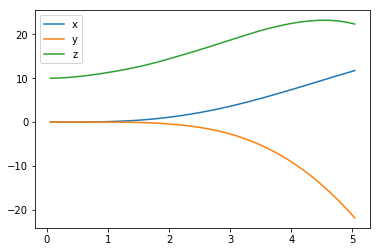

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

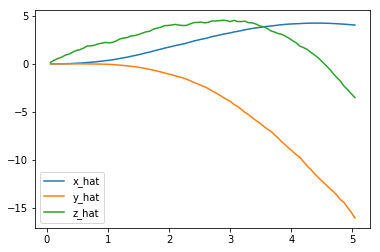

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

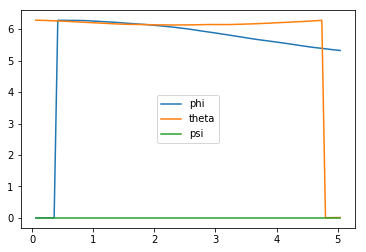

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

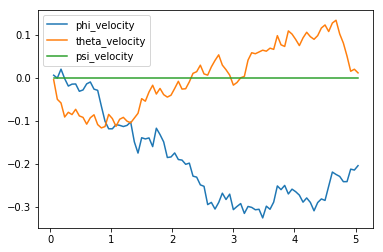

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

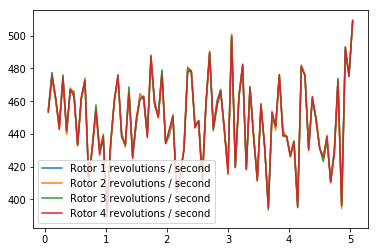

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)
print(task.sim.angular_v.shape)

[ 1.17527434e+01 -2.18933236e+01  2.23737948e+01  5.32189535e+00
  1.22859081e-02  0.00000000e+00]
[  4.05128485 -16.0746736   -3.51840396]
[-0.20421832  0.0114783   0.        ]
(3,)


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 10
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =   10, score =  -2.416 (best =  -2.047), noise_scale = 0.155

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [2]:
## TODO: Train your agent here.
## -100 reward for crashing
## Complex network(Trial 1), critic_lr = 0.0001
import pandas as pd
from agents.actor import Actor
from agents.ddpg import DDPG
import math
import numpy as np

from task import Task

num_episodes = 1000
runtime = 5.0
init_pose = np.array([0.,0., 5., 0., 0., 0.])
target_pos = np.array([0., 0., 10.])

task = Task(target_pos=target_pos, init_pose=init_pose, runtime=runtime)
agent = DDPG(task) 
best_episode_reward = -1e5
best_step_reward = -1e5
episode_reward = 0

labels = ['episode','cummulative']
results = {x : [] for x in labels}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() 
    _ = task.reset()
#     print(state)
    best_step_reward = -1e5
    episode_reward = 0
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        episode_reward += reward
        state = next_state
        best_step_reward = max(best_step_reward, reward)
        print(
            "Episode={:2d}  StepReward={:4f}  EpisodeReward={:4f}".format(i_episode, reward, episode_reward),
            tuple(task.sim.pose[:3])
        )
#         sys.stdout.flush()
        if done:
            best_episode_reward = max(episode_reward, best_episode_reward)
            to_write = [i_episode] + [episode_reward]
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
            end_pos = task.getPose()
            print(
                    "\rEpisode={:4d}  BestStepReward={:3f}  BestEpisodeReward={:3f}  EpisodeReward={:4f} \n".format(
                        i_episode, best_step_reward, best_episode_reward, episode_reward
                    ), 
                    "({:4f}, {:4f}, {:4f}, {:4f}, {:4f}, {:4f})".format(
                        end_pos[0], end_pos[1], end_pos[2], end_pos[3], end_pos[4], end_pos[5]
                    ), 
                    "\n\n\n", 
                    end=""
                 ) 
            break
#         sys.stdout.flush()


Episode= 1  StepReward=2.550342  EpisodeReward=2.550342 (-0.0022723399206367374, 0.000559601274427739, 5.009445207528158)
Episode= 1  StepReward=2.550494  EpisodeReward=5.100836 (-0.02555538975169526, 0.006128481538572395, 5.032796957308546)
Episode= 1  StepReward=2.546875  EpisodeReward=7.647711 (-0.09285803120339249, 0.019688231565100012, 5.051376291996318)
Episode= 1  StepReward=2.536185  EpisodeReward=10.183896 (-0.2150577937579978, 0.034944318427217354, 5.040183667508996)
Episode= 1  StepReward=2.517683  EpisodeReward=12.701578 (-0.3900926941446174, 0.03474694362318796, 4.983226593365015)
Episode= 1  StepReward=2.493414  EpisodeReward=15.194992 (-0.6076171014475983, -0.0014728513210537975, 4.882176765761316)
Episode= 1  StepReward=2.457632  EpisodeReward=17.652624 (-0.851587667718704, -0.08764004074926765, 4.753734780900211)
Episode= 1  StepReward=2.412512  EpisodeReward=20.065137 (-1.0998959954027034, -0.22287436145190967, 4.620971887470455)
Episode= 1  StepReward=2.365764  Episo

Episode= 4  StepReward=2.236583  EpisodeReward=29.267088 (-1.6792521697671166, -0.9525133238112657, 3.981100426069174)
Episode= 4  StepReward=2.187568  EpisodeReward=31.454655 (-1.7299467894777296, -1.2171696058736867, 3.720998340836934)
Episode= 4  StepReward=2.130470  EpisodeReward=33.585125 (-1.8044814375163105, -1.5304259421674102, 3.4518323827028814)
Episode= 4  StepReward=2.071310  EpisodeReward=35.656435 (-1.8976947964239654, -1.8259545325287865, 3.1895743518125275)
Episode= 4  StepReward=2.014064  EpisodeReward=37.670499 (-1.9962741600771798, -2.070683617346958, 2.9038301022584405)
Episode= 4  StepReward=1.958241  EpisodeReward=39.628740 (-2.09795392711716, -2.257886443333456, 2.5751103807362057)
Episode= 4  StepReward=1.902327  EpisodeReward=41.531067 (-2.1997633974519437, -2.394536236021338, 2.1881496490698416)
Episode= 4  StepReward=1.844455  EpisodeReward=43.375522 (-2.298777856487164, -2.4923527245069437, 1.728986576297301)
Episode= 4  StepReward=1.780749  EpisodeReward=45

Episode= 7  StepReward=1.881125  EpisodeReward=35.004028 (-2.8719046076004564, -1.6738731818161527, 1.7432223949032708)
Episode= 7  StepReward=1.780465  EpisodeReward=36.784493 (-3.2287028393637605, -1.9776100912156738, 1.2812874557791174)
Episode= 7  StepReward=1.679006  EpisodeReward=38.463499 (-3.609256011791522, -2.265666364419961, 0.8197296359550118)
Episode= 7  StepReward=-100.000000  EpisodeReward=-61.536501 (-4.010266902964349, -2.5288845790861765, 0.3443278601070949)
Episode= 7  StepReward=-100.000000  EpisodeReward=-161.536501 (-4.43262900599426, -2.7590489467916393, 0.0)
Episode=   7  BestStepReward=2.550961  BestEpisodeReward=-53.061410  EpisodeReward=-161.536501 
 (-4.432629, -2.759049, 0.000000, 1.815184, 0.568649, 0.000000) 


Episode= 8  StepReward=2.550421  EpisodeReward=2.550421 (-0.002287040872121753, 0.0007445196691936312, 5.011285484961829)
Episode= 8  StepReward=2.550947  EpisodeReward=5.101368 (-0.025249428175535583, 0.006766281024791439, 5.040757495250851)
Episo

Episode=10  StepReward=1.972647  EpisodeReward=32.882080 (-2.9290490164417435, -0.7401205582388832, 1.9854110434576915)
Episode=10  StepReward=1.897042  EpisodeReward=34.779121 (-3.219308551110346, -0.8197732404429479, 1.4888621354881937)
Episode=10  StepReward=1.813742  EpisodeReward=36.592863 (-3.5332234230680775, -0.9079863372635159, 0.9348054542055272)
Episode=10  StepReward=-100.000000  EpisodeReward=-63.407137 (-3.8588384588559896, -1.0275528678283905, 0.32278135334536945)
Episode=10  StepReward=-100.000000  EpisodeReward=-163.407137 (-4.184100295329476, -1.195072388670616, 0.0)
Episode=  10  BestStepReward=2.550372  BestEpisodeReward=-53.061410  EpisodeReward=-163.407137 
 (-4.184100, -1.195072, 0.000000, 6.210612, 6.018491, 0.000000) 


Episode=11  StepReward=2.550537  EpisodeReward=2.550537 (-0.0020219185504366014, 0.0007050499876974214, 5.013558161937723)
Episode=11  StepReward=2.551770  EpisodeReward=5.102307 (-0.022154017576182752, 0.006252596333998989, 5.050995642774323)
E

Episode=12  StepReward=-1.075594  EpisodeReward=61.309295 (-19.596423999861106, -19.880855251935767, 3.3581794963531375)
Episode=12  StepReward=-1.303607  EpisodeReward=60.005688 (-20.935483254985535, -20.70105681292063, 2.963094221727528)
Episode=12  StepReward=-1.536098  EpisodeReward=58.469590 (-22.294208982975125, -21.505131801235823, 2.53200229567693)
Episode=12  StepReward=-1.770008  EpisodeReward=56.699582 (-23.648693519895076, -22.294835293707763, 2.0785686650009683)
Episode=12  StepReward=-2.002454  EpisodeReward=54.697128 (-24.983212122447185, -23.064796714092203, 1.6098481999852612)
Episode=12  StepReward=-2.232150  EpisodeReward=52.464978 (-26.292647119141616, -23.80971907126603, 1.1218166854204308)
Episode=12  StepReward=-100.000000  EpisodeReward=-47.535022 (-27.581582043020855, -24.53137327471411, 0.6025465918184688)
Episode=12  StepReward=-100.000000  EpisodeReward=-147.535022 (-28.86265700468557, -25.241351430836314, 0.03955127307841798)
Episode=12  StepReward=-100.000

Episode=16  StepReward=2.549941  EpisodeReward=2.549941 (-0.00022910139909328235, 0.009642733030071024, 5.00509134790987)
Episode=16  StepReward=2.544591  EpisodeReward=5.094532 (-0.0020173297659473234, 0.06359644755945225, 4.96403079455104)
Episode=16  StepReward=2.528865  EpisodeReward=7.623396 (-0.004560822821291137, 0.1344416722988529, 4.82612105963828)
Episode=16  StepReward=2.504580  EpisodeReward=10.127976 (-0.009064185316442954, 0.18843753154093804, 4.591903760503868)
Episode=16  StepReward=2.477463  EpisodeReward=12.605439 (-0.03889892235064178, 0.18490986686637667, 4.319951595223017)
Episode=16  StepReward=2.452385  EpisodeReward=15.057824 (-0.0959679979087752, 0.1178083312489284, 4.043365139282538)
Episode=16  StepReward=2.429942  EpisodeReward=17.487766 (-0.16861907579377458, -0.0187655530936784, 3.758152297497941)
Episode=16  StepReward=2.386241  EpisodeReward=19.874007 (-0.24485219845243697, -0.22867755585722996, 3.446844919497916)
Episode=16  StepReward=2.326121  Episode

Episode=21  StepReward=2.526899  EpisodeReward=7.618949 (-0.11299439269647646, 0.01319112250761206, 4.799629314140781)
Episode=21  StepReward=2.499818  EpisodeReward=10.118766 (-0.2533178708644351, -0.05749721614016768, 4.605995158216236)
Episode=21  StepReward=2.453398  EpisodeReward=12.572164 (-0.44656291131453973, -0.17166728103859227, 4.342317026056909)
Episode=21  StepReward=2.392581  EpisodeReward=14.964745 (-0.6777735210274078, -0.3138275020231218, 3.9903014721114376)
Episode=21  StepReward=2.320045  EpisodeReward=17.284790 (-0.9260983487980919, -0.45456837815077333, 3.5392583995887428)
Episode=21  StepReward=2.241205  EpisodeReward=19.525995 (-1.1673067032453874, -0.5564747224083169, 2.9978964540977264)
Episode=21  StepReward=2.163030  EpisodeReward=21.689026 (-1.3825773541575375, -0.598135806545994, 2.398264765850385)
Episode=21  StepReward=2.087820  EpisodeReward=23.776845 (-1.554209095707267, -0.5963308273694816, 1.7424520263320398)
Episode=21  StepReward=2.015732  EpisodeRe

Episode=25  StepReward=2.111557  EpisodeReward=23.907354 (-2.955026229281855, 0.893088578683777, 3.6515496220362262)
Episode=25  StepReward=2.025267  EpisodeReward=25.932621 (-3.384225927176151, 1.1436145918324827, 3.3847886405525145)
Episode=25  StepReward=1.940995  EpisodeReward=27.873616 (-3.7456874815074386, 1.404296625656758, 3.067290778989647)
Episode=25  StepReward=1.851827  EpisodeReward=29.725443 (-4.071777511688583, 1.7178014105609412, 2.6811158983714)
Episode=25  StepReward=1.752018  EpisodeReward=31.477461 (-4.420086633819911, 2.09807930805847, 2.259077151734976)
Episode=25  StepReward=1.641311  EpisodeReward=33.118773 (-4.832191373864373, 2.50786792651797, 1.8116792624711238)
Episode=25  StepReward=1.519934  EpisodeReward=34.638707 (-5.297072560716142, 2.9233689955548705, 1.3039073909504104)
Episode=25  StepReward=1.388185  EpisodeReward=36.026893 (-5.769384843420491, 3.3688945079692667, 0.7220944330929003)
Episode=25  StepReward=-100.000000  EpisodeReward=-63.973107 (-6.1

Episode=28  StepReward=2.526744  EpisodeReward=12.720887 (0.24171341870210164, -0.06650900634928242, 4.954151998503505)
Episode=28  StepReward=2.496973  EpisodeReward=15.217860 (0.47959481480597616, -0.09867600865180945, 4.862588083489411)
Episode=28  StepReward=2.461714  EpisodeReward=17.679574 (0.7671817030702217, -0.08180533959227007, 4.737488835840571)
Episode=28  StepReward=2.429086  EpisodeReward=20.108659 (1.0570091179077854, -0.017528651831101028, 4.623444124044597)
Episode=28  StepReward=2.397618  EpisodeReward=22.506277 (1.297150613023703, 0.04570870182278113, 4.518285927155935)
Episode=28  StepReward=2.363177  EpisodeReward=24.869454 (1.466770262295655, 0.11899659458534347, 4.38463579727087)
Episode=28  StepReward=2.329452  EpisodeReward=27.198906 (1.5927192870953795, 0.2339701138993611, 4.253271935245916)
Episode=28  StepReward=2.297099  EpisodeReward=29.496005 (1.7370634820398465, 0.3484818216270041, 4.157253865156245)
Episode=28  StepReward=2.262764  EpisodeReward=31.7587

Episode=30  StepReward=1.547981  EpisodeReward=50.201123 (-1.7324321077151663, -6.704270077646825, 2.009848032409254)
Episode=30  StepReward=1.467959  EpisodeReward=51.669082 (-1.929075334243493, -7.023296941845698, 1.6315924092354408)
Episode=30  StepReward=1.387538  EpisodeReward=53.056621 (-2.0915378761620245, -7.314373154986191, 1.1914582361524617)
Episode=30  StepReward=1.307106  EpisodeReward=54.363727 (-2.1979139687670814, -7.618939237558937, 0.7075194377638477)
Episode=30  StepReward=-100.000000  EpisodeReward=-45.636273 (-2.2843856384971373, -7.940250771665082, 0.21402849602650517)
Episode=30  StepReward=-100.000000  EpisodeReward=-145.636273 (-2.3986790982764163, -8.243555789416437, 0.0)
Episode=  30  BestStepReward=2.549879  BestEpisodeReward=-53.061410  EpisodeReward=-145.636273 
 (-2.398679, -8.243556, 0.000000, 4.527966, 1.148266, 0.000000) 


Episode=31  StepReward=2.549901  EpisodeReward=2.549901 (-0.015006999471821502, 0.004016684453765339, 5.010779197879452)
Episode=3

Episode=33  StepReward=1.937461  EpisodeReward=44.106172 (-4.178922627014257, -1.896741988505658, 4.014168191637078)
Episode=33  StepReward=1.869325  EpisodeReward=45.975497 (-4.438019807543282, -1.992112971785903, 3.61890412466731)
Episode=33  StepReward=1.802018  EpisodeReward=47.777515 (-4.655542577350958, -2.0576798366753373, 3.1501296388013658)
Episode=33  StepReward=1.732721  EpisodeReward=49.510236 (-4.892614097452442, -2.074072949984164, 2.6213081388667145)
Episode=33  StepReward=1.657797  EpisodeReward=51.168033 (-5.181476653238978, -2.0778540243559167, 2.0497974872630476)
Episode=33  StepReward=1.573343  EpisodeReward=52.741376 (-5.499557984640462, -2.1067104806809405, 1.4217401728964854)
Episode=33  StepReward=1.480729  EpisodeReward=54.222105 (-5.80436049322618, -2.16053294532476, 0.7364794787366807)
Episode=33  StepReward=-100.000000  EpisodeReward=-45.777895 (-6.060187165916484, -2.2089243229558986, 0.016233736349056612)
Episode=33  StepReward=-100.000000  EpisodeReward=-

Episode=36  StepReward=-100.000000  EpisodeReward=-69.504490 (1.351743235220553, 1.4416573387374032, 0.3643382737926035)
Episode=36  StepReward=-100.000000  EpisodeReward=-169.504490 (1.5677200889856389, 1.6968140526810485, 0.0)
Episode=  36  BestStepReward=2.549638  BestEpisodeReward=-53.061410  EpisodeReward=-169.504490 
 (1.567720, 1.696814, 0.000000, 4.732948, 4.313040, 0.000000) 


Episode=37  StepReward=2.549733  EpisodeReward=2.549733 (-0.011978118525304903, -0.002319133364500587, 5.004302237440466)
Episode=37  StepReward=2.547083  EpisodeReward=5.096816 (-0.005167292891334746, -0.021274392074008792, 4.982486742509532)
Episode=37  StepReward=2.536711  EpisodeReward=7.633527 (0.075006849587137, -0.061124604382236554, 4.915685777614982)
Episode=37  StepReward=2.511138  EpisodeReward=10.144666 (0.22986394435670413, -0.11945898359924031, 4.795078725847528)
Episode=37  StepReward=2.472345  EpisodeReward=12.617011 (0.44851704165769274, -0.18137834526016583, 4.598286067783911)
Episode=

Episode=41  StepReward=2.549537  EpisodeReward=2.549537 (-0.00735329470236345, 0.006116663464203341, 4.998329710189489)
Episode=41  StepReward=2.543744  EpisodeReward=5.093282 (0.007034924916160441, 0.03354539750838256, 4.927362337462396)
Episode=41  StepReward=2.524275  EpisodeReward=7.617556 (0.057360009944481614, 0.08077049017802326, 4.745873336688383)
Episode=41  StepReward=2.488071  EpisodeReward=10.105628 (0.14562237152438537, 0.17691635059114336, 4.46569310602544)
Episode=41  StepReward=2.435356  EpisodeReward=12.540983 (0.28552878031654744, 0.33774747856668225, 4.122306791999677)
Episode=41  StepReward=2.368216  EpisodeReward=14.909199 (0.49971803342193016, 0.5425078955676865, 3.7486176718968176)
Episode=41  StepReward=2.289669  EpisodeReward=17.198868 (0.7959938774707999, 0.7459755039140851, 3.337513965776398)
Episode=41  StepReward=2.201103  EpisodeReward=19.399970 (1.1459140454485988, 0.9272749637266728, 2.8491599129412557)
Episode=41  StepReward=2.103940  EpisodeReward=21.5

Episode=45  StepReward=2.267298  EpisodeReward=24.451859 (-1.5999939625432151, -0.007741894211864303, 3.2829609280169914)
Episode=45  StepReward=2.215572  EpisodeReward=26.667431 (-1.7652756120201105, -0.050466174495577186, 2.904504937817728)
Episode=45  StepReward=2.163842  EpisodeReward=28.831273 (-1.870692363387565, -0.09940767254818639, 2.4929571748003365)
Episode=45  StepReward=2.112908  EpisodeReward=30.944180 (-1.933036059031781, -0.18285673065990535, 2.062760453913579)
Episode=45  StepReward=2.055471  EpisodeReward=32.999651 (-1.9908595846725263, -0.3116033723874121, 1.5734851385885456)
Episode=45  StepReward=1.988008  EpisodeReward=34.987660 (-2.079379240793042, -0.4438937218370645, 1.010847814807166)
Episode=45  StepReward=-100.000000  EpisodeReward=-65.012340 (-2.2178054761575616, -0.5658080230460639, 0.3963787759976383)
Episode=45  StepReward=-100.000000  EpisodeReward=-165.012340 (-2.401078258739475, -0.6926339630833138, 0.0)
Episode=  45  BestStepReward=2.549791  BestEpis

Episode=49  StepReward=2.487994  EpisodeReward=12.636058 (-0.36423903806308, -0.028832467430215086, 4.582595185874265)
Episode=49  StepReward=2.453963  EpisodeReward=15.090021 (-0.5602347384556577, 0.00035152655775482194, 4.365104533375678)
Episode=49  StepReward=2.412664  EpisodeReward=17.502685 (-0.7853231302295756, 0.0481880645347545, 4.137032014235066)
Episode=49  StepReward=2.363625  EpisodeReward=19.866309 (-1.0585156982281874, 0.09360397076350678, 3.8845416943163795)
Episode=49  StepReward=2.307872  EpisodeReward=22.174182 (-1.3846065699900214, 0.1390728580944669, 3.6159728827473727)
Episode=49  StepReward=2.246945  EpisodeReward=24.421127 (-1.756960778704759, 0.1608703284835644, 3.3138917237741445)
Episode=49  StepReward=2.179726  EpisodeReward=26.600853 (-2.1393152206355968, 0.1797038225053873, 2.9401748759424793)
Episode=49  StepReward=2.106989  EpisodeReward=28.707843 (-2.4910021588318085, 0.2260435127292414, 2.523713864386406)
Episode=49  StepReward=2.033933  EpisodeReward=

Episode=53  StepReward=2.549742  EpisodeReward=2.549742 (-0.002179513604413002, 0.0001763271275000821, 4.993399527086597)
Episode=53  StepReward=2.546109  EpisodeReward=5.095851 (-0.0146247367990943, -0.00681468784885836, 4.951306700115195)
Episode=53  StepReward=2.535167  EpisodeReward=7.631019 (-0.07354982244032145, -0.017260502677081936, 4.866857831148266)
Episode=53  StepReward=2.514871  EpisodeReward=10.145890 (-0.18664236957906025, -0.03565975557443302, 4.736333441276314)
Episode=53  StepReward=2.484748  EpisodeReward=12.630638 (-0.3551025714756929, -0.05542467065548597, 4.554632714319734)
Episode=53  StepReward=2.446670  EpisodeReward=15.077308 (-0.5712073379391602, -0.053649947189755826, 4.324048405537096)
Episode=53  StepReward=2.402155  EpisodeReward=17.479463 (-0.8346241458040918, -0.042828388824453396, 4.054176711291817)
Episode=53  StepReward=2.351923  EpisodeReward=19.831386 (-1.1327328363382774, -0.0015788668874873871, 3.7453041759976604)
Episode=53  StepReward=2.295141 

Episode=56  StepReward=2.073914  EpisodeReward=35.496130 (-1.9104143605758392, -0.2459401104012903, 1.6125372955148634)
Episode=56  StepReward=2.005674  EpisodeReward=37.501803 (-2.1156074219626695, -0.2611409148310026, 1.0809704537892835)
Episode=56  StepReward=-100.000000  EpisodeReward=-62.498197 (-2.289894488627177, -0.2670080856345463, 0.5344341256118923)
Episode=56  StepReward=-100.000000  EpisodeReward=-162.498197 (-2.418467233699949, -0.2790210438137094, 0.0)
Episode=  56  BestStepReward=2.549585  BestEpisodeReward=-53.061410  EpisodeReward=-162.498197 
 (-2.418467, -0.279021, 0.000000, 2.913157, 3.967481, 0.000000) 


Episode=57  StepReward=2.549537  EpisodeReward=2.549537 (-0.009865439934147138, -0.0016291896176812573, 4.995563670528481)
Episode=57  StepReward=2.545285  EpisodeReward=5.094822 (-0.00020939027709126817, -0.012880833071796915, 4.943122099149684)
Episode=57  StepReward=2.534845  EpisodeReward=7.629667 (0.054054867154182396, -0.027456008098096334, 4.85672147670243

Episode=60  StepReward=2.254762  EpisodeReward=26.786235 (0.7170382425320432, -0.40847690742439324, 2.683743011088044)
Episode=60  StepReward=2.210176  EpisodeReward=28.996411 (0.7018677172749606, -0.46278430092305545, 2.222228306869238)
Episode=60  StepReward=2.165505  EpisodeReward=31.161916 (0.6946128981186107, -0.48900665805984145, 1.7449788636071057)
Episode=60  StepReward=2.117604  EpisodeReward=33.279520 (0.7184456689026535, -0.5326886379846979, 1.2518564906683063)
Episode=60  StepReward=2.060767  EpisodeReward=35.340287 (0.7891565077247977, -0.5890340918368181, 0.7136469273481433)
Episode=60  StepReward=-100.000000  EpisodeReward=-64.659713 (0.9105168788461039, -0.6556448672430015, 0.14174243003870884)
Episode=60  StepReward=-100.000000  EpisodeReward=-164.659713 (1.0800309668340589, -0.7328561932891855, 0.0)
Episode=  60  BestStepReward=2.549634  BestEpisodeReward=-53.061410  EpisodeReward=-164.659713 
 (1.080031, -0.732856, 0.000000, 4.693512, 4.876916, 0.000000) 


Episode=6

Episode=64  StepReward=2.386808  EpisodeReward=19.936830 (-0.4435672344438897, -0.3693625878328861, 3.822621304557449)
Episode=64  StepReward=2.336636  EpisodeReward=22.273465 (-0.6380176234252568, -0.42706230720877525, 3.4994541349101853)
Episode=64  StepReward=2.282148  EpisodeReward=24.555613 (-0.8674715823329399, -0.48967862384886635, 3.167956372971515)
Episode=64  StepReward=2.220641  EpisodeReward=26.776254 (-1.111561964082628, -0.5875401566815671, 2.7936744439561014)
Episode=64  StepReward=2.152601  EpisodeReward=28.928855 (-1.346754934849102, -0.6755700085490867, 2.3525914879304204)
Episode=64  StepReward=2.085414  EpisodeReward=31.014269 (-1.5517630343886397, -0.740101401981969, 1.8874047985385083)
Episode=64  StepReward=2.020271  EpisodeReward=33.034540 (-1.716242404550101, -0.8125570877925982, 1.4020064785765434)
Episode=64  StepReward=1.955747  EpisodeReward=34.990287 (-1.8351158634230054, -0.8884836403316468, 0.8847939923917886)
Episode=64  StepReward=-100.000000  EpisodeR

Episode=68  StepReward=2.505403  EpisodeReward=12.661403 (0.030335560791559628, -0.15022743964804172, 4.595591246576081)
Episode=68  StepReward=2.478470  EpisodeReward=15.139873 (0.036359128144872487, -0.25664130519373923, 4.388607760445317)
Episode=68  StepReward=2.449173  EpisodeReward=17.589046 (0.01235325310668261, -0.34070785219591837, 4.128328171475019)
Episode=68  StepReward=2.417230  EpisodeReward=20.006276 (-0.05207534318720929, -0.41433988344760997, 3.8456366190113855)
Episode=68  StepReward=2.374871  EpisodeReward=22.381147 (-0.1630274872555065, -0.48689429031780906, 3.5336963791436506)
Episode=68  StepReward=2.326203  EpisodeReward=24.707350 (-0.31795056585811826, -0.5632366137258921, 3.2006733585790954)
Episode=68  StepReward=2.269810  EpisodeReward=26.977160 (-0.5021189223439763, -0.6661711843750155, 2.8273992392099565)
Episode=68  StepReward=2.205913  EpisodeReward=29.183072 (-0.6959136206334537, -0.7586350053276288, 2.388669723771178)
Episode=68  StepReward=2.141324  Ep

Episode=72  StepReward=2.537381  EpisodeReward=7.631310 (-0.005193962693412451, -0.02242773966345185, 4.855948114238126)
Episode=72  StepReward=2.523916  EpisodeReward=10.155226 (0.02952090404897918, -0.06572539115007929, 4.734178990784752)
Episode=72  StepReward=2.501699  EpisodeReward=12.656924 (0.06753748910337601, -0.15175544627768803, 4.585198081409649)
Episode=72  StepReward=2.472510  EpisodeReward=15.129435 (0.09287948199487732, -0.2560477837401281, 4.3697849753295985)
Episode=72  StepReward=2.441033  EpisodeReward=17.570468 (0.08988928071439056, -0.33577076830289193, 4.1030684930024295)
Episode=72  StepReward=2.412074  EpisodeReward=19.982542 (0.0466963501839419, -0.40558432762549274, 3.816884123739461)
Episode=72  StepReward=2.381773  EpisodeReward=22.364316 (-0.04358259962782998, -0.47765927070514247, 3.501947597869818)
Episode=72  StepReward=2.335675  EpisodeReward=24.699990 (-0.18015662808260838, -0.5549279397221397, 3.1632351472643254)
Episode=72  StepReward=2.280052  Epis

Episode=76  StepReward=2.544348  EpisodeReward=5.093963 (-0.025077963925305872, -0.010075802371958962, 4.947631734487067)
Episode=76  StepReward=2.537306  EpisodeReward=7.631269 (-0.012649404038592047, -0.015314966209015462, 4.854788676956275)
Episode=76  StepReward=2.525058  EpisodeReward=10.156327 (0.014674357009898047, -0.055076668037462806, 4.724390369398135)
Episode=76  StepReward=2.502844  EpisodeReward=12.659170 (0.042796356384916516, -0.1376004435208965, 4.5574243889928505)
Episode=76  StepReward=2.473563  EpisodeReward=15.132733 (0.0567062806933816, -0.23126708648444722, 4.322173220185647)
Episode=76  StepReward=2.442898  EpisodeReward=17.575631 (0.041298709493473494, -0.2983694841139367, 4.041990193533101)
Episode=76  StepReward=2.414157  EpisodeReward=19.989788 (-0.01426066901608173, -0.3594649263736864, 3.7458887026801744)
Episode=76  StepReward=2.374242  EpisodeReward=22.364030 (-0.11696010199008294, -0.42766546796099153, 3.4198199886692064)
Episode=76  StepReward=2.324491

Episode=80  StepReward=2.539139  EpisodeReward=7.636840 (-0.12463990526490334, 0.011249260663855369, 4.970590721246999)
Episode=80  StepReward=2.523926  EpisodeReward=10.160766 (-0.25200605979590646, 0.02049033986031865, 4.911151210592267)
Episode=80  StepReward=2.501750  EpisodeReward=12.662517 (-0.4208616854776428, 0.04237852088701745, 4.834045516933391)
Episode=80  StepReward=2.475610  EpisodeReward=15.138127 (-0.6225474455332788, 0.048520069793808886, 4.743705260641922)
Episode=80  StepReward=2.446383  EpisodeReward=17.584510 (-0.8432369980206048, 0.027508326119414804, 4.598302401036863)
Episode=80  StepReward=2.409633  EpisodeReward=19.994143 (-1.0697938119825305, 0.031865227508589895, 4.388790285844505)
Episode=80  StepReward=2.367173  EpisodeReward=22.361317 (-1.292948330371777, 0.06373156068250004, 4.167227123837485)
Episode=80  StepReward=2.325546  EpisodeReward=24.686862 (-1.4994652868258802, 0.07317828709483078, 3.9281961490516593)
Episode=80  StepReward=2.284425  EpisodeRew

Episode=83  StepReward=2.074408  EpisodeReward=38.422092 (1.2723137015749766, 0.6433723988069185, 1.3541086864322887)
Episode=83  StepReward=1.997975  EpisodeReward=40.420067 (1.562700212912083, 0.7065701376499606, 0.8464272449549204)
Episode=83  StepReward=-100.000000  EpisodeReward=-59.579933 (1.86840609054198, 0.7514608987729814, 0.3098688183290035)
Episode=83  StepReward=-100.000000  EpisodeReward=-159.579933 (2.179409797950693, 0.7866452606865398, 0.0)
Episode=  83  BestStepReward=2.550061  BestEpisodeReward=-53.061410  EpisodeReward=-159.579933 
 (2.179410, 0.786645, 0.000000, 5.762479, 3.241978, 0.000000) 


Episode=84  StepReward=2.549921  EpisodeReward=2.549921 (-0.0002910512169270505, -0.005191184128529503, 5.0019461610068365)
Episode=84  StepReward=2.547058  EpisodeReward=5.096980 (-0.0023938931612052803, -0.028116433742661193, 4.980186448638235)
Episode=84  StepReward=2.540153  EpisodeReward=7.637132 (-0.006642956152212143, -0.0554444789333635, 4.918049040178048)
Episode=84

Episode=87  StepReward=2.458511  EpisodeReward=17.619683 (0.019905573907596, 0.03675290091846246, 3.9152058142490866)
Episode=87  StepReward=2.424062  EpisodeReward=20.043744 (0.04474762639691001, 0.07587782962626595, 3.591600513901113)
Episode=87  StepReward=2.388183  EpisodeReward=22.431927 (0.08152957225804014, 0.09096673043060273, 3.2353359628428455)
Episode=87  StepReward=2.347967  EpisodeReward=24.779894 (0.13060834617838946, 0.10073047790429701, 2.824116374013391)
Episode=87  StepReward=2.301131  EpisodeReward=27.081025 (0.19455298272121527, 0.12970036754077516, 2.373236114394244)
Episode=87  StepReward=2.249418  EpisodeReward=29.330443 (0.27346057072815994, 0.16789738843041854, 1.9042141108499147)
Episode=87  StepReward=2.195014  EpisodeReward=31.525457 (0.3686294341639902, 0.19308305818079588, 1.4095250447506686)
Episode=87  StepReward=2.136767  EpisodeReward=33.662224 (0.4804771443076386, 0.20737111156272564, 0.8703583309785956)
Episode=87  StepReward=-100.000000  EpisodeRewa

Episode=91  StepReward=2.546020  EpisodeReward=5.095473 (-0.0035846696519970314, -0.00374383948885979, 4.944729680052529)
Episode=91  StepReward=2.539432  EpisodeReward=7.634905 (-0.008936447586212294, -0.0010098221274496217, 4.857330913999881)
Episode=91  StepReward=2.527093  EpisodeReward=10.161998 (-0.014589621893793826, -0.019339952077247733, 4.720905254081073)
Episode=91  StepReward=2.508386  EpisodeReward=12.670384 (-0.018328496228823092, -0.06355931697356533, 4.536462610981278)
Episode=91  StepReward=2.483067  EpisodeReward=15.153451 (-0.017934818882785232, -0.12913081304497487, 4.296720189058142)
Episode=91  StepReward=2.452380  EpisodeReward=17.605831 (-0.011503952374857298, -0.1904562395654173, 3.9972699472379585)
Episode=91  StepReward=2.419851  EpisodeReward=20.025682 (0.003112024736397008, -0.22712900493427168, 3.661446045891711)
Episode=91  StepReward=2.384708  EpisodeReward=22.410390 (0.02622294731253487, -0.2584165416131323, 3.3101829666465514)
Episode=91  StepReward=2.

Episode=95  StepReward=2.549316  EpisodeReward=2.549316 (-5.376800739817045e-06, 0.0032453036711471697, 4.986677574812546)
Episode=95  StepReward=2.545535  EpisodeReward=5.094851 (-1.6242212510353496e-05, 0.003412965945999852, 4.934889028982013)
Episode=95  StepReward=2.539230  EpisodeReward=7.634080 (-0.00019864004516592285, -0.004349604561580974, 4.853247112270857)
Episode=95  StepReward=2.528883  EpisodeReward=10.162964 (-0.0014204755292963702, -0.017876584051355723, 4.738612675160256)
Episode=95  StepReward=2.514814  EpisodeReward=12.677777 (-0.003831216865484527, -0.034740451571264465, 4.587860006119018)
Episode=95  StepReward=2.497006  EpisodeReward=15.174784 (-0.007760840328974113, -0.054294377052651506, 4.399544128075433)
Episode=95  StepReward=2.475458  EpisodeReward=17.650241 (-0.013466762091438891, -0.07523563011983331, 4.173037868281999)
Episode=95  StepReward=2.450244  EpisodeReward=20.100485 (-0.02132005588571097, -0.09609762329283078, 3.908228862920921)
Episode=95  StepR

Episode=99  StepReward=2.549374  EpisodeReward=2.549374 (-1.2128792412168623e-08, 0.0011562708501328801, 4.987398624549475)
Episode=99  StepReward=2.546022  EpisodeReward=5.095396 (-4.6047076389638263e-07, 0.009061811318399098, 4.9450598553760585)
Episode=99  StepReward=2.539024  EpisodeReward=7.634420 (-2.888911429466722e-06, 0.023653406112478844, 4.86823635785969)
Episode=99  StepReward=2.528401  EpisodeReward=10.162821 (-1.0965013189348942e-05, 0.04338992095383265, 4.7567946861324275)
Episode=99  StepReward=2.514292  EpisodeReward=12.677113 (-3.330640669087098e-05, 0.06799384777230844, 4.612054764088814)
Episode=99  StepReward=2.496866  EpisodeReward=15.173979 (-8.581682889766065e-05, 0.09703919477700365, 4.43567127121786)
Episode=99  StepReward=2.476342  EpisodeReward=17.650321 (-0.00019103486188886657, 0.12934642401006038, 4.229036086536101)
Episode=99  StepReward=2.452946  EpisodeReward=20.103267 (-0.0003758507798270293, 0.16311818897354619, 3.9928498391640166)
Episode=99  StepRe

Episode=102  StepReward=2.171423  EpisodeReward=38.685864 (-0.10377433469366565, 0.17238914636972144, 0.878881278500052)
Episode=102  StepReward=-100.000000  EpisodeReward=-61.314136 (-0.12350086245359865, 0.19277514010377506, 0.3112686554091964)
Episode=102  StepReward=-100.000000  EpisodeReward=-161.314136 (-0.13713211416080562, 0.21411269949624945, 0.0)
Episode= 102  BestStepReward=2.549311  BestEpisodeReward=-53.061410  EpisodeReward=-161.314136 
 (-0.137132, 0.214113, 0.000000, 2.435338, 0.352365, 0.000000) 


Episode=103  StepReward=2.549302  EpisodeReward=2.549302 (-2.2428995950786187e-06, 0.0001389180133929784, 4.985154585576677)
Episode=103  StepReward=2.546102  EpisodeReward=5.095404 (-3.648956943590186e-05, 0.0013607981526647989, 4.940390576380588)
Episode=103  StepReward=2.540031  EpisodeReward=7.635435 (-0.00018361685787323902, 0.004368355546089899, 4.865271445080874)
Episode=103  StepReward=2.531022  EpisodeReward=10.166457 (-0.0005783809860797243, 0.009227297982039074, 4

Episode=106  StepReward=2.376385  EpisodeReward=27.366608 (-0.11068854044047242, 0.035537465395214726, 3.085738759964516)
Episode=106  StepReward=2.339853  EpisodeReward=29.706461 (-0.11822567202796662, 0.05150434347898174, 2.695370874481772)
Episode=106  StepReward=2.301182  EpisodeReward=32.007643 (-0.11714642935182656, 0.06150457743241765, 2.2650144832641175)
Episode=106  StepReward=2.259228  EpisodeReward=34.266870 (-0.12048789098173718, 0.06846875602125083, 1.7942556045461437)
Episode=106  StepReward=2.212958  EpisodeReward=36.479828 (-0.132991518511631, 0.08077600315672984, 1.2883766083684878)
Episode=106  StepReward=2.162611  EpisodeReward=38.642439 (-0.148870632826747, 0.09972743144431336, 0.750735405159883)
Episode=106  StepReward=-100.000000  EpisodeReward=-61.357561 (-0.1608188449836104, 0.12106729768242525, 0.17851782186880324)
Episode=106  StepReward=-100.000000  EpisodeReward=-161.357561 (-0.16161987381264675, 0.1377606639268436, 0.0)
Episode= 106  BestStepReward=2.549298

Episode=110  StepReward=2.457303  EpisodeReward=20.116706 (-0.10400885678247129, 0.040042312665842995, 4.015422504995129)
Episode=110  StepReward=2.428929  EpisodeReward=22.545635 (-0.12003946449217004, 0.053996497926788956, 3.718789834936715)
Episode=110  StepReward=2.399613  EpisodeReward=24.945248 (-0.11680012642528509, 0.05488384270978082, 3.3935272357437003)
Episode=110  StepReward=2.369493  EpisodeReward=27.314741 (-0.1225029665247035, 0.04001486799775607, 3.037154472735757)
Episode=110  StepReward=2.335000  EpisodeReward=29.649742 (-0.13435959849793766, 0.040287497395366974, 2.6496199082124092)
Episode=110  StepReward=2.297557  EpisodeReward=31.947299 (-0.12780960846848555, 0.051811507981486316, 2.2333742216798025)
Episode=110  StepReward=2.258153  EpisodeReward=34.205452 (-0.1073738195850403, 0.06270313587992014, 1.7740261756304647)
Episode=110  StepReward=2.214780  EpisodeReward=36.420232 (-0.09900610530062165, 0.07293099325834979, 1.278490738673241)
Episode=110  StepReward=2.

Episode=117  StepReward=2.481226  EpisodeReward=17.660797 (-0.07815209678277983, 0.027957688126940793, 4.266840389715333)
Episode=117  StepReward=2.458791  EpisodeReward=20.119589 (-0.10816866647785307, 0.03857018053931715, 4.039072421858746)
Episode=117  StepReward=2.430686  EpisodeReward=22.550274 (-0.1420188078607162, 0.057236756483156084, 3.759336162913705)
Episode=117  StepReward=2.399892  EpisodeReward=24.950166 (-0.15420498353872708, 0.07041813824984501, 3.444114562937763)
Episode=117  StepReward=2.368550  EpisodeReward=27.318716 (-0.17408173971808907, 0.06480398194691799, 3.0993324668212727)
Episode=117  StepReward=2.332666  EpisodeReward=29.651382 (-0.2139484143177124, 0.06624117813999551, 2.7211345717077)
Episode=117  StepReward=2.292353  EpisodeReward=31.943735 (-0.25567713461511393, 0.08260704817569817, 2.3219127592956315)
Episode=117  StepReward=2.250437  EpisodeReward=34.194172 (-0.2785524883152439, 0.10273123217000674, 1.894286337902043)
Episode=117  StepReward=2.205838 

Episode=121  StepReward=2.514953  EpisodeReward=12.679133 (-0.05208050504350059, 0.003189071787289072, 4.612423594006958)
Episode=121  StepReward=2.499536  EpisodeReward=15.178669 (-0.06502762276502051, 0.005649081673743172, 4.445736007061343)
Episode=121  StepReward=2.480102  EpisodeReward=17.658772 (-0.09632222324331709, 0.0026524363685925746, 4.241841147062539)
Episode=121  StepReward=2.456044  EpisodeReward=20.114816 (-0.12397265264362554, -0.009375179112230023, 3.9889405438874936)
Episode=121  StepReward=2.428134  EpisodeReward=22.542950 (-0.13396769430991168, -0.02340761560258299, 3.697090081200791)
Episode=121  StepReward=2.398930  EpisodeReward=24.941880 (-0.13280228196618155, -0.04372364882223304, 3.385701428505461)
Episode=121  StepReward=2.366482  EpisodeReward=27.308362 (-0.14670676055331602, -0.07083287227233466, 3.0483052579709957)
Episode=121  StepReward=2.329897  EpisodeReward=29.638259 (-0.17012512226467144, -0.08229494915366146, 2.666723701564472)
Episode=121  StepRew

Episode=125  StepReward=2.549422  EpisodeReward=2.549422 (-0.0020311875687443436, 7.467387786400384e-05, 4.989038010962192)
Episode=125  StepReward=2.545656  EpisodeReward=5.095078 (-0.014858396635052073, 4.546898188368835e-06, 4.9431868647075135)
Episode=125  StepReward=2.538392  EpisodeReward=7.633470 (-0.019947518365521832, -0.00017293029355430685, 4.8609406244636375)
Episode=125  StepReward=2.528380  EpisodeReward=10.161851 (-0.034534792738838055, -6.078961957714399e-05, 4.747264793313415)
Episode=125  StepReward=2.514710  EpisodeReward=12.676560 (-0.037983722935081524, -0.00036831136416332104, 4.592867790824082)
Episode=125  StepReward=2.499783  EpisodeReward=15.176344 (-0.038537996660354554, -0.0019856806686387976, 4.422285415604338)
Episode=125  StepReward=2.480894  EpisodeReward=17.657237 (-0.058811634632227903, -0.0028909490920624456, 4.21196196662124)
Episode=125  StepReward=2.456873  EpisodeReward=20.114110 (-0.07488583501964956, -0.00016609481739643077, 3.944473880931537)
E

Episode=128  StepReward=-100.000000  EpisodeReward=-63.583064 (0.10418641740076284, 0.006432630168180218, 0.5693828880702388)
Episode=128  StepReward=-100.000000  EpisodeReward=-163.583064 (0.10108628435338125, 0.01042005710881445, 0.0)
Episode= 128  BestStepReward=2.549356  BestEpisodeReward=-53.061410  EpisodeReward=-163.583064 
 (0.101086, 0.010420, 0.000000, 5.868547, 4.025801, 0.000000) 


Episode=129  StepReward=2.549374  EpisodeReward=2.549374 (-0.0017246856479063587, -4.4941768949719696e-05, 4.986759843514272)
Episode=129  StepReward=2.546075  EpisodeReward=5.095449 (-0.002150346691988709, -2.632102547755947e-05, 4.940713608802663)
Episode=129  StepReward=2.539723  EpisodeReward=7.635172 (-0.0025587444543527424, -5.753541257450276e-05, 4.859310446590555)
Episode=129  StepReward=2.530160  EpisodeReward=10.165332 (-0.011121590555949712, 0.00012994225976707162, 4.744216235837047)
Episode=129  StepReward=2.516081  EpisodeReward=12.681413 (-0.011072001426079756, 0.000198031867988178

Episode=132  StepReward=2.300214  EpisodeReward=31.979207 (-0.036011972100185384, -0.019396406974806105, 2.130727146607417)
Episode=132  StepReward=2.257872  EpisodeReward=34.237079 (-0.030528006310413212, -0.030934373535208802, 1.6505068445967588)
Episode=132  StepReward=2.212170  EpisodeReward=36.449249 (-0.016166264304779736, -0.04179178869573196, 1.130987143950424)
Episode=132  StepReward=-100.000000  EpisodeReward=-63.550751 (-0.005055928086541375, -0.055297694695247035, 0.5840570116252172)
Episode=132  StepReward=-100.000000  EpisodeReward=-163.550751 (0.0025982265460908916, -0.06764080439955168, 0.0)
Episode= 132  BestStepReward=2.549398  BestEpisodeReward=-53.061410  EpisodeReward=-163.550751 
 (0.002598, -0.067641, 0.000000, 6.087912, 0.731387, 0.000000) 


Episode=133  StepReward=2.549470  EpisodeReward=2.549470 (0.00033751601466851277, -6.618673522078626e-06, 4.987536950263366)
Episode=133  StepReward=2.545889  EpisodeReward=5.095359 (-0.0029006241811719378, -3.0577580753385

Episode=136  StepReward=2.424392  EpisodeReward=22.528797 (0.05569036861468789, 0.0008248816457825577, 3.5496146512581435)
Episode=136  StepReward=2.393272  EpisodeReward=24.922069 (0.07742691498302985, -0.006550121182094784, 3.2223271668250657)
Episode=136  StepReward=2.359667  EpisodeReward=27.281736 (0.08697805316496346, -0.011544082175521884, 2.853056770435069)
Episode=136  StepReward=2.322535  EpisodeReward=29.604271 (0.09917628379056771, -0.011430307118672666, 2.4363679449109754)
Episode=136  StepReward=2.280656  EpisodeReward=31.884927 (0.1283235079058908, -0.011033046671614899, 1.982005927201106)
Episode=136  StepReward=2.235226  EpisodeReward=34.120153 (0.15807000279968086, -0.016803237306498513, 1.5062190593655846)
Episode=136  StepReward=2.187944  EpisodeReward=36.308097 (0.1850213267156008, -0.025838234378443285, 1.0069137815506943)
Episode=136  StepReward=-100.000000  EpisodeReward=-63.691903 (0.2322344236371921, -0.03485129528429686, 0.4783196151448521)
Episode=136  StepR

Episode=140  StepReward=2.539741  EpisodeReward=7.635229 (0.0014935235130574813, -4.283790824450503e-05, 4.861812077523372)
Episode=140  StepReward=2.529791  EpisodeReward=10.165020 (-0.018074003814784943, 4.152021469038153e-06, 4.742522243471064)
Episode=140  StepReward=2.514061  EpisodeReward=12.679080 (-0.031213696315658887, 0.0003289181380959671, 4.56761393671165)
Episode=140  StepReward=2.496752  EpisodeReward=15.175832 (-0.022273628888793393, 0.0005124657932636381, 4.367670435387317)
Episode=140  StepReward=2.478476  EpisodeReward=17.654309 (-0.025356282745822165, 0.0012641098466313694, 4.155633554798172)
Episode=140  StepReward=2.454895  EpisodeReward=20.109204 (-0.05018356535473234, 5.761199347006365e-05, 3.893599653192884)
Episode=140  StepReward=2.426661  EpisodeReward=22.535865 (-0.05394869724167595, -0.0031639267912497403, 3.5802025056230264)
Episode=140  StepReward=2.398113  EpisodeReward=24.933978 (-0.04205702252566124, -0.0035945795249383013, 3.251073381946198)
Episode=1

Episode=143  StepReward=2.162609  EpisodeReward=38.612534 (-0.09209111631242228, -0.04954098604343893, 0.6461276380843487)
Episode=143  StepReward=-100.000000  EpisodeReward=-61.387466 (-0.10796773839734287, -0.06904376169596385, 0.0771010452877628)
Episode=143  StepReward=-100.000000  EpisodeReward=-161.387466 (-0.13479999891059383, -0.09697190058539798, 0.0)
Episode= 143  BestStepReward=2.549425  BestEpisodeReward=-53.061410  EpisodeReward=-161.387466 
 (-0.134800, -0.096972, 0.000000, 1.531486, 4.234056, 0.000000) 


Episode=144  StepReward=2.549464  EpisodeReward=2.549464 (0.0003529659150111839, -4.5640532798261993e-07, 4.98745538348832)
Episode=144  StepReward=2.546081  EpisodeReward=5.095546 (0.004352637836865295, -1.8526334896056236e-06, 4.940703161113755)
Episode=144  StepReward=2.539883  EpisodeReward=7.635429 (0.004389150524221431, -1.3681334491881575e-05, 4.864946452439569)
Episode=144  StepReward=2.530731  EpisodeReward=10.166159 (-0.007492124178194126, -4.3636746793893015e

Episode=147  StepReward=2.461982  EpisodeReward=20.134238 (-0.026762998072517318, 0.00035921051007316486, 3.9586840284650875)
Episode=147  StepReward=2.437404  EpisodeReward=22.571641 (-0.01377524222532766, 0.0009627482635710267, 3.6708529200144833)
Episode=147  StepReward=2.410285  EpisodeReward=24.981927 (-0.01776452684707024, 0.007122037801614944, 3.3614534992118443)
Episode=147  StepReward=2.378186  EpisodeReward=27.360112 (-0.039512223568976185, 0.0019122464375600932, 3.005219043161063)
Episode=147  StepReward=2.341264  EpisodeReward=29.701376 (-0.04831301861585958, -0.017461417311802632, 2.6014221001839744)
Episode=147  StepReward=2.301963  EpisodeReward=32.003339 (-0.04362894267348065, -0.028427628200680535, 2.1663408034009177)
Episode=147  StepReward=2.260367  EpisodeReward=34.263706 (-0.044096505905418644, -0.029389656209668012, 1.696382798477536)
Episode=147  StepReward=2.216255  EpisodeReward=36.479961 (-0.054925794542213156, -0.027028396748895858, 1.2032661502063495)
Episod

Episode=151  StepReward=2.545850  EpisodeReward=5.095186 (-0.0035567168709103756, -5.238359104931754e-05, 4.93784477262373)
Episode=151  StepReward=2.539507  EpisodeReward=7.634693 (-0.0015749996146265524, -5.638411349830272e-06, 4.855292627033821)
Episode=151  StepReward=2.530285  EpisodeReward=10.164977 (-0.0031095737250920303, 0.00038761381250619354, 4.7414663374722705)
Episode=151  StepReward=2.516692  EpisodeReward=12.681669 (0.0028406380339964384, -0.002029660836802917, 4.576839418032386)
Episode=151  StepReward=2.499144  EpisodeReward=15.180813 (0.027794566903317112, 0.003522905771447215, 4.395391413379786)
Episode=151  StepReward=2.479088  EpisodeReward=17.659901 (0.035489709992576515, 0.024295129069670227, 4.195134950755576)
Episode=151  StepReward=2.458460  EpisodeReward=20.118361 (0.019587206095241956, 0.031101441376503156, 3.9573410821430577)
Episode=151  StepReward=2.436919  EpisodeReward=22.555280 (0.015290143734791532, 0.011043635674471771, 3.6829495708790403)
Episode=15

Episode=154  StepReward=2.287705  EpisodeReward=34.295665 (0.011256617852451524, 0.0937550280897516, 2.058651187119633)
Episode=154  StepReward=2.249792  EpisodeReward=36.545457 (0.024687125170812847, 0.08544953538148667, 1.6299946277329118)
Episode=154  StepReward=2.210817  EpisodeReward=38.756274 (0.010697777692454774, 0.08189574171041618, 1.1765625654955691)
Episode=154  StepReward=2.168431  EpisodeReward=40.924704 (-0.00481460669823853, 0.09381187587016393, 0.6886655934894258)
Episode=154  StepReward=-100.000000  EpisodeReward=-59.075296 (-0.022482893486242477, 0.1033950138808437, 0.1677832136167224)
Episode=154  StepReward=-100.000000  EpisodeReward=-159.075296 (-0.03839747430018765, 0.10536087195824806, 0.0)
Episode= 154  BestStepReward=2.549406  BestEpisodeReward=-53.061410  EpisodeReward=-159.075296 
 (-0.038397, 0.105361, 0.000000, 2.167519, 0.191466, 0.000000) 


Episode=155  StepReward=2.549430  EpisodeReward=2.549430 (-0.0007150852930887365, -1.2748990897685503e-05, 4.98713

Episode=158  StepReward=2.455773  EpisodeReward=20.111470 (-0.01965941509686338, 0.050474928702759554, 3.9324652141285146)
Episode=158  StepReward=2.432357  EpisodeReward=22.543826 (-0.022835108013164254, 0.04665883325491968, 3.679549522796494)
Episode=158  StepReward=2.409815  EpisodeReward=24.953641 (-0.004390481181304598, 0.031105700898538122, 3.3907648017525487)
Episode=158  StepReward=2.385083  EpisodeReward=27.338725 (-0.00233332064398887, 0.009171635729280066, 3.084495388335149)
Episode=158  StepReward=2.356645  EpisodeReward=29.695370 (0.022515722638924693, -0.009024220954606667, 2.756358179999281)
Episode=158  StepReward=2.319453  EpisodeReward=32.014823 (0.06094231078493934, -0.045464465151736314, 2.395981302454979)
Episode=158  StepReward=2.276641  EpisodeReward=34.291464 (0.11355809879708711, -0.08416328971739367, 1.9914005018234027)
Episode=158  StepReward=2.229158  EpisodeReward=36.520622 (0.1734525030439466, -0.10477148724502862, 1.5323843362708396)
Episode=158  StepRewa

Episode=162  StepReward=2.528296  EpisodeReward=10.161881 (0.006136841861234426, -0.007538402633983315, 4.723433763612974)
Episode=162  StepReward=2.512226  EpisodeReward=12.674107 (0.03142070865200275, -0.010593970822810403, 4.553076322509119)
Episode=162  StepReward=2.491682  EpisodeReward=15.165789 (0.052526841294725686, 0.002050775061280744, 4.321153886162434)
Episode=162  StepReward=2.467244  EpisodeReward=17.633033 (0.0463098214797512, 0.013457565297571762, 4.040388487977325)
Episode=162  StepReward=2.437921  EpisodeReward=20.070954 (0.05311009257807186, 0.034170214655329954, 3.724486761240639)
Episode=162  StepReward=2.405870  EpisodeReward=22.476824 (0.04026556205184748, 0.06354794962832626, 3.383554415034964)
Episode=162  StepReward=2.372565  EpisodeReward=24.849389 (0.02725138822997957, 0.10607842935770809, 3.0290437590790193)
Episode=162  StepReward=2.334119  EpisodeReward=27.183508 (0.037568923433190016, 0.1587806231428982, 2.648587550560451)
Episode=162  StepReward=2.29417

Episode=165  StepReward=-100.000000  EpisodeReward=-163.725911 (0.5355868837770795, 0.02159957960712767, 0.00652405070448529)
Episode=165  StepReward=-100.000000  EpisodeReward=-263.725911 (0.6154311611352032, 0.013342926829488573, 0.0)
Episode= 165  BestStepReward=2.549411  BestEpisodeReward=-53.061410  EpisodeReward=-263.725911 
 (0.615431, 0.013343, 0.000000, 4.446909, 1.774258, 0.000000) 


Episode=166  StepReward=2.549411  EpisodeReward=2.549411 (0.004803753152713261, -7.430582382166932e-05, 4.9893209553163835)
Episode=166  StepReward=2.545934  EpisodeReward=5.095345 (0.011557731759274959, 0.00015369439137818096, 4.947313377974478)
Episode=166  StepReward=2.539272  EpisodeReward=7.634617 (0.020430886082959097, 7.698314566462727e-05, 4.869233965372331)
Episode=166  StepReward=2.529203  EpisodeReward=10.163820 (0.034190652862678604, 0.0040850107073344645, 4.767687587643313)
Episode=166  StepReward=2.518613  EpisodeReward=12.682433 (0.019065458039501024, 0.003060053659503909, 4.63292

Episode=169  StepReward=2.277676  EpisodeReward=29.486694 (0.22621684319216712, 0.18435694042411796, 2.1949674850085072)
Episode=169  StepReward=2.225633  EpisodeReward=31.712328 (0.26850615905866837, 0.2368879597022321, 1.7054212305053396)
Episode=169  StepReward=2.170904  EpisodeReward=33.883231 (0.3274095962773948, 0.2862433276387599, 1.1916175837086977)
Episode=169  StepReward=2.113295  EpisodeReward=35.996526 (0.3787288545687869, 0.32887385285339743, 0.634125867343761)
Episode=169  StepReward=-100.000000  EpisodeReward=-64.003474 (0.4274685335602499, 0.3719461439066084, 0.04615273751954252)
Episode=169  StepReward=-100.000000  EpisodeReward=-164.003474 (0.476836631821134, 0.41406360679615023, 0.0)
Episode= 169  BestStepReward=2.549509  BestEpisodeReward=-53.061410  EpisodeReward=-164.003474 
 (0.476837, 0.414064, 0.000000, 2.129468, 3.261682, 0.000000) 


Episode=170  StepReward=2.549430  EpisodeReward=2.549430 (0.006111554582527873, -5.5013370458449626e-05, 4.990675838916938)
Epi

Episode=173  StepReward=2.449740  EpisodeReward=20.096604 (0.032634182963256694, 0.17930089806517213, 3.99110840160189)
Episode=173  StepReward=2.420600  EpisodeReward=22.517203 (0.025319369338947927, 0.26574805958148323, 3.7437701916557664)
Episode=173  StepReward=2.388617  EpisodeReward=24.905820 (0.019139770007093423, 0.37946124194908415, 3.4725589144131055)
Episode=173  StepReward=2.350070  EpisodeReward=27.255890 (0.03949123282296064, 0.5034652812034677, 3.1714423571861197)
Episode=173  StepReward=2.309667  EpisodeReward=29.565557 (0.043472425194669144, 0.6255372787484514, 2.850253218836623)
Episode=173  StepReward=2.268955  EpisodeReward=31.834513 (0.05620676211678707, 0.7270118190408349, 2.502127406505688)
Episode=173  StepReward=2.223186  EpisodeReward=34.057699 (0.08778066855491712, 0.8283724702571846, 2.104823987450164)
Episode=173  StepReward=2.171498  EpisodeReward=36.229196 (0.13368588770381903, 0.9394948436806235, 1.6626520217787073)
Episode=173  StepReward=2.113703  Epis

Episode=176  StepReward=2.205484  EpisodeReward=36.399494 (0.22868570354860143, -0.20675880379013645, 1.420985285395561)
Episode=176  StepReward=2.155071  EpisodeReward=38.554565 (0.2563884878829422, -0.23370095038030914, 0.9138774074579308)
Episode=176  StepReward=-100.000000  EpisodeReward=-61.445435 (0.29871253706932427, -0.25613173623413465, 0.37219090038746006)
Episode=176  StepReward=-100.000000  EpisodeReward=-161.445435 (0.34416310572639985, -0.28145876405567405, 0.0)
Episode= 176  BestStepReward=2.549413  BestEpisodeReward=-53.061410  EpisodeReward=-161.445435 
 (0.344163, -0.281459, 0.000000, 2.361261, 1.370598, 0.000000) 


Episode=177  StepReward=2.549420  EpisodeReward=2.549420 (0.0034695517500187693, -0.0002112405116391521, 4.988689931194599)
Episode=177  StepReward=2.545788  EpisodeReward=5.095208 (0.01157165941144644, -0.000600998325802326, 4.943565945649924)
Episode=177  StepReward=2.538572  EpisodeReward=7.633780 (0.01996244890528889, -0.001145346152979538, 4.86232740

Episode=180  StepReward=2.426352  EpisodeReward=22.533033 (0.11326952133062358, 0.03797930575057853, 3.6445064310087387)
Episode=180  StepReward=2.388274  EpisodeReward=24.921307 (0.12773918738977352, 0.0965809027549358, 3.280564409675716)
Episode=180  StepReward=2.347624  EpisodeReward=27.268931 (0.12027297553461538, 0.1577446696793656, 2.8715906184786633)
Episode=180  StepReward=2.302233  EpisodeReward=29.571163 (0.12849939873360808, 0.21601834389797867, 2.410136411177454)
Episode=180  StepReward=2.250500  EpisodeReward=31.821664 (0.1650836938518756, 0.27681547109031623, 1.9141158786879242)
Episode=180  StepReward=2.194947  EpisodeReward=34.016610 (0.20624495920202485, 0.33859690205230875, 1.388795463020297)
Episode=180  StepReward=2.135848  EpisodeReward=36.152458 (0.2471131400259126, 0.4015432122617177, 0.8217699624345841)
Episode=180  StepReward=-100.000000  EpisodeReward=-63.847542 (0.29083309450823247, 0.4648624135516704, 0.22250708792401422)
Episode=180  StepReward=-100.000000 

Episode=184  StepReward=2.531441  EpisodeReward=10.166660 (0.006875674645187323, -0.009387906866727391, 4.778740706757711)
Episode=184  StepReward=2.522286  EpisodeReward=12.688946 (-0.016912653891630058, -0.0012791479998019858, 4.664386897326838)
Episode=184  StepReward=2.508731  EpisodeReward=15.197677 (-0.04916150464832559, 0.008386761884276258, 4.545999323867163)
Episode=184  StepReward=2.494995  EpisodeReward=17.692672 (-0.043706786114057275, 0.025201013022133872, 4.411146841780189)
Episode=184  StepReward=2.480590  EpisodeReward=20.173262 (-0.03443716340444793, 0.06664627067022481, 4.2613408186842685)
Episode=184  StepReward=2.458660  EpisodeReward=22.631923 (-0.0639660328162079, 0.12367703321241982, 4.079299205009089)
Episode=184  StepReward=2.431676  EpisodeReward=25.063599 (-0.10543802626140009, 0.20052076488923953, 3.883516058886372)
Episode=184  StepReward=2.402139  EpisodeReward=27.465738 (-0.12165271408871678, 0.2919634204101115, 3.661588852589496)
Episode=184  StepReward=

Episode=187  StepReward=2.133257  EpisodeReward=33.665169 (0.3865969390171393, 0.8320604047169249, 1.3723671580132883)
Episode=187  StepReward=2.075021  EpisodeReward=35.740190 (0.407130904391262, 0.948819892221882, 0.8625302320086878)
Episode=187  StepReward=-100.000000  EpisodeReward=-64.259810 (0.4146622409754854, 1.0818066231359094, 0.32699085795778016)
Episode=187  StepReward=-100.000000  EpisodeReward=-164.259810 (0.43082939562634837, 1.2279558308726624, 0.0)
Episode= 187  BestStepReward=2.549509  BestEpisodeReward=-53.061410  EpisodeReward=-164.259810 
 (0.430829, 1.227956, 0.000000, 0.166432, 3.830204, 0.000000) 


Episode=188  StepReward=2.549460  EpisodeReward=2.549460 (-0.000760647026605687, -0.0017029654163533542, 4.988920550740193)
Episode=188  StepReward=2.545715  EpisodeReward=5.095175 (-0.006956705351931863, -0.0006735501339601344, 4.938415050388668)
Episode=188  StepReward=2.538962  EpisodeReward=7.634138 (-0.01229539665915421, 0.005511598207387406, 4.8645435913137)
Ep

Episode=191  StepReward=2.490111  EpisodeReward=15.165413 (0.005420224332707751, -0.05296156173290562, 4.297187566210696)
Episode=191  StepReward=2.463206  EpisodeReward=17.628619 (0.005901347444384177, -0.09629147166715027, 4.036588925958062)
Episode=191  StepReward=2.434072  EpisodeReward=20.062691 (-0.00968648161823349, -0.1530116796585413, 3.7574522363563023)
Episode=191  StepReward=2.402223  EpisodeReward=22.464914 (0.003765204625749805, -0.21858927183725702, 3.455393822151475)
Episode=191  StepReward=2.366470  EpisodeReward=24.831383 (0.011934521183401822, -0.30005041848212494, 3.1357913571008695)
Episode=191  StepReward=2.327330  EpisodeReward=27.158713 (0.009647470958935978, -0.40026827964622913, 2.780100569689604)
Episode=191  StepReward=2.282457  EpisodeReward=29.441170 (0.025407457050768634, -0.5127896671626356, 2.389007875492086)
Episode=191  StepReward=2.232563  EpisodeReward=31.673733 (0.041372847248701085, -0.6283322141323197, 1.9449373707444675)
Episode=191  StepReward=

Episode=195  StepReward=2.522363  EpisodeReward=10.154658 (-0.017131934387495905, -0.05422359533825182, 4.69819209661222)
Episode=195  StepReward=2.502160  EpisodeReward=12.656818 (-0.036536766487728155, -0.06926949804422665, 4.489809925170848)
Episode=195  StepReward=2.478912  EpisodeReward=15.135730 (-0.02372565022453349, -0.0878822758313847, 4.2307957057855585)
Episode=195  StepReward=2.451307  EpisodeReward=17.587037 (-0.012724155166871632, -0.11053291066898605, 3.911498457625543)
Episode=195  StepReward=2.418160  EpisodeReward=20.005197 (-0.019250576355226937, -0.12342665986498752, 3.5460272232330783)
Episode=195  StepReward=2.380955  EpisodeReward=22.386152 (-0.00882933539522188, -0.13518414570493087, 3.1217890872166363)
Episode=195  StepReward=2.337881  EpisodeReward=24.724033 (0.04257005813063215, -0.14955873650717982, 2.651151405575129)
Episode=195  StepReward=2.286486  EpisodeReward=27.010519 (0.08856264838167423, -0.15742082588304873, 2.122605400588113)
Episode=195  StepRewa

Episode=199  StepReward=2.436972  EpisodeReward=20.042302 (-0.07724085236996134, -0.02110480678919425, 3.749797725368968)
Episode=199  StepReward=2.408848  EpisodeReward=22.451151 (-0.04593855030258704, 0.003115483977927664, 3.3559709850559396)
Episode=199  StepReward=2.370993  EpisodeReward=24.822144 (-0.040817049093660435, 0.015615292632849389, 2.911600806148469)
Episode=199  StepReward=2.327078  EpisodeReward=27.149222 (-0.03152771309896448, 0.02581805317979382, 2.4135843559656447)
Episode=199  StepReward=2.281322  EpisodeReward=29.430544 (0.010408280585908238, 0.04268172743990086, 1.8858938399712981)
Episode=199  StepReward=2.228021  EpisodeReward=31.658565 (0.053010473188503375, 0.05384682203328141, 1.3213857749068716)
Episode=199  StepReward=2.169529  EpisodeReward=33.828094 (0.09940900521924625, 0.06111619329534401, 0.7072029046166723)
Episode=199  StepReward=-100.000000  EpisodeReward=-66.171906 (0.15487598843918562, 0.07048495897285828, 0.057186475824288596)
Episode=199  StepR

Episode=203  StepReward=2.514258  EpisodeReward=15.207005 (-0.03494791043872865, -0.04492467487401441, 4.650641241975347)
Episode=203  StepReward=2.502401  EpisodeReward=17.709405 (-0.046467351446750155, -0.025236179359880494, 4.485544721267839)
Episode=203  StepReward=2.484277  EpisodeReward=20.193682 (-0.08443329692701267, 0.004141144586858966, 4.27486759587397)
Episode=203  StepReward=2.456906  EpisodeReward=22.650588 (-0.12253474208855045, 0.024970382111363466, 4.001727737239308)
Episode=203  StepReward=2.427247  EpisodeReward=25.077835 (-0.12197605120035009, 0.0365280213329044, 3.6846789368009016)
Episode=203  StepReward=2.395873  EpisodeReward=27.473708 (-0.09555044651590101, 0.05700489828562065, 3.313099879853176)
Episode=203  StepReward=2.361034  EpisodeReward=29.834742 (-0.057366161407744955, 0.08356284781047067, 2.907424403908012)
Episode=203  StepReward=2.323782  EpisodeReward=32.158524 (-0.022784897213520405, 0.09728579833483285, 2.4662847895535442)
Episode=203  StepReward=

Episode=207  StepReward=2.505517  EpisodeReward=15.192459 (0.02234436938784905, -0.04706053646730027, 4.497372386613905)
Episode=207  StepReward=2.480733  EpisodeReward=17.673192 (0.05954617679721768, -0.10736602424487397, 4.29189484165204)
Episode=207  StepReward=2.449045  EpisodeReward=20.122237 (0.11679072887431935, -0.1700352233677099, 4.034482859019794)
Episode=207  StepReward=2.411023  EpisodeReward=22.533260 (0.18713256041738727, -0.21876710783593864, 3.7149583679902105)
Episode=207  StepReward=2.370534  EpisodeReward=24.903793 (0.261882203550093, -0.25226398865616595, 3.366024106245601)
Episode=207  StepReward=2.328018  EpisodeReward=27.231811 (0.32701029345901783, -0.29337956824699724, 2.9880597887942546)
Episode=207  StepReward=2.282425  EpisodeReward=29.514237 (0.38516261667031176, -0.3293944517768607, 2.5708197721499646)
Episode=207  StepReward=2.236197  EpisodeReward=31.750434 (0.41517580728214526, -0.35900459361683107, 2.115326929339771)
Episode=207  StepReward=2.188508  

Episode=211  StepReward=2.531305  EpisodeReward=7.624124 (-0.10670478256261878, 0.032427495311753776, 4.875912423952054)
Episode=211  StepReward=2.513424  EpisodeReward=10.137548 (-0.1843477011368427, 0.05858056238479288, 4.7597522713706395)
Episode=211  StepReward=2.493618  EpisodeReward=12.631167 (-0.23433072059737284, 0.0653045285330961, 4.605597854357735)
Episode=211  StepReward=2.476515  EpisodeReward=15.107681 (-0.23690990184025815, 0.05957172959904654, 4.423414314720087)
Episode=211  StepReward=2.461841  EpisodeReward=17.569522 (-0.23208151678951092, 0.04594346610663138, 4.240275130724431)
Episode=211  StepReward=2.442671  EpisodeReward=20.012193 (-0.25091826168392545, 0.06083190522423478, 4.032152700853409)
Episode=211  StepReward=2.416159  EpisodeReward=22.428353 (-0.30017452479591467, 0.0775288002961088, 3.779068203476978)
Episode=211  StepReward=2.382832  EpisodeReward=24.811185 (-0.3824424316384399, 0.09811476698663357, 3.483323922962551)
Episode=211  StepReward=2.343108  E

Episode=215  StepReward=2.549385  EpisodeReward=2.549385 (-0.0025457390977566257, 0.005538669028734242, 4.991891284618289)
Episode=215  StepReward=2.544098  EpisodeReward=5.093483 (-0.023438676935781784, 0.016603436582483762, 4.944183454428116)
Episode=215  StepReward=2.533487  EpisodeReward=7.626970 (-0.07330572576908322, 0.02834482547963076, 4.867496968483511)
Episode=215  StepReward=2.517137  EpisodeReward=10.144107 (-0.14058559255513542, 0.05566001633505869, 4.757189495847626)
Episode=215  StepReward=2.495766  EpisodeReward=12.639873 (-0.19718862657374864, 0.07709261760594806, 4.589643529630929)
Episode=215  StepReward=2.471342  EpisodeReward=15.111215 (-0.24137987635095445, 0.10203536807824055, 4.365227604666282)
Episode=215  StepReward=2.439753  EpisodeReward=17.550968 (-0.3116393305782834, 0.12869185220714902, 4.084512016090817)
Episode=215  StepReward=2.403571  EpisodeReward=19.954539 (-0.3724015964616397, 0.1383135864301581, 3.7494394101638155)
Episode=215  StepReward=2.367377

Episode=218  StepReward=-100.000000  EpisodeReward=-162.218920 (-1.9616966310122277, -0.043063993122903856, 0.0)
Episode= 218  BestStepReward=2.549538  BestEpisodeReward=-53.061410  EpisodeReward=-162.218920 
 (-1.961697, -0.043064, 0.000000, 4.976038, 3.183486, 0.000000) 


Episode=219  StepReward=2.549512  EpisodeReward=2.549512 (-0.002427207687099026, 0.0032559481745166735, 4.993505786308471)
Episode=219  StepReward=2.545153  EpisodeReward=5.094665 (-0.02280889599879992, 0.017143479892313858, 4.958471534528895)
Episode=219  StepReward=2.535756  EpisodeReward=7.630422 (-0.06337690702787971, 0.03730425544458474, 4.897459504549848)
Episode=219  StepReward=2.521158  EpisodeReward=10.151580 (-0.10354305668361141, 0.06749146471174121, 4.789920607135782)
Episode=219  StepReward=2.505326  EpisodeReward=12.656905 (-0.11100632603345714, 0.09058119375809169, 4.648437735206988)
Episode=219  StepReward=2.490117  EpisodeReward=15.147022 (-0.08291411675827556, 0.12179728936696801, 4.47932664383739

Episode=222  StepReward=2.105640  EpisodeReward=33.525793 (-1.3444364621196083, 0.46074180859305786, 1.6244103098120555)
Episode=222  StepReward=2.040588  EpisodeReward=35.566381 (-1.5300823719187215, 0.45000561502271785, 1.082816487170002)
Episode=222  StepReward=-100.000000  EpisodeReward=-64.433619 (-1.7332292281903987, 0.42495153367418065, 0.5377530353866279)
Episode=222  StepReward=-100.000000  EpisodeReward=-164.433619 (-1.9720310432917587, 0.4084381232092318, 0.0)
Episode= 222  BestStepReward=2.549607  BestEpisodeReward=-53.061410  EpisodeReward=-164.433619 
 (-1.972031, 0.408438, 0.000000, 5.837767, 1.262514, 0.000000) 


Episode=223  StepReward=2.549648  EpisodeReward=2.549648 (-0.0004653878695847428, 0.001669489180266576, 4.99401730316694)
Episode=223  StepReward=2.546980  EpisodeReward=5.096628 (-0.005306542694392892, 0.01664581117816694, 4.9699349551509195)
Episode=223  StepReward=2.539332  EpisodeReward=7.635960 (-0.020232859878999695, 0.050765353788270226, 4.9110068734422

Episode=226  StepReward=2.454410  EpisodeReward=17.600837 (-0.22775700238668858, 0.07973247188015171, 4.140165300199726)
Episode=226  StepReward=2.427246  EpisodeReward=20.028082 (-0.2700186067086931, 0.061477964991538916, 3.8722323970994093)
Episode=226  StepReward=2.401989  EpisodeReward=22.430071 (-0.27212085841967965, 0.05156110931969169, 3.590520179249875)
Episode=226  StepReward=2.377023  EpisodeReward=24.807094 (-0.29355191997618696, 0.023300075741531107, 3.291559474647285)
Episode=226  StepReward=2.345256  EpisodeReward=27.152350 (-0.34513830064553397, -0.02803411238784851, 2.9534153212698993)
Episode=226  StepReward=2.305447  EpisodeReward=29.457798 (-0.39904261103634747, -0.07551696588966594, 2.6126590218128567)
Episode=226  StepReward=2.267208  EpisodeReward=31.725006 (-0.44408672225036183, -0.07646499758157152, 2.23863203236607)
Episode=226  StepReward=2.229014  EpisodeReward=33.954019 (-0.44325012425491134, -0.06358597588315686, 1.7982371809424418)
Episode=226  StepReward=

Episode=230  StepReward=2.524394  EpisodeReward=10.156128 (-0.030958018914790858, 0.0580337764775033, 4.749415779556911)
Episode=230  StepReward=2.506893  EpisodeReward=12.663021 (-0.07564287069985927, 0.07179305585970229, 4.592927781960689)
Episode=230  StepReward=2.483769  EpisodeReward=15.146790 (-0.14973963071336174, 0.08204320342890091, 4.396259069502213)
Episode=230  StepReward=2.455279  EpisodeReward=17.602069 (-0.23607199198987933, 0.07544404250254584, 4.149832031301589)
Episode=230  StepReward=2.425714  EpisodeReward=20.027783 (-0.3293893166184548, 0.054961669220938, 3.891909246166802)
Episode=230  StepReward=2.393223  EpisodeReward=22.421007 (-0.4400775212033013, 0.05771129549146349, 3.621580961231599)
Episode=230  StepReward=2.353948  EpisodeReward=24.774955 (-0.547748674603009, 0.09207109119334267, 3.309248282541202)
Episode=230  StepReward=2.311310  EpisodeReward=27.086265 (-0.6650091133781048, 0.13327491261937052, 2.9781996476427652)
Episode=230  StepReward=2.263017  Epis

Episode=234  StepReward=2.547132  EpisodeReward=5.096799 (-0.0005306742667454469, 0.018683735386094264, 4.969840339545698)
Episode=234  StepReward=2.539936  EpisodeReward=7.636736 (-0.0017963887527811084, 0.05616838412149103, 4.9074489238447025)
Episode=234  StepReward=2.527120  EpisodeReward=10.163856 (-0.00524574982091762, 0.0964142310850605, 4.790624429046634)
Episode=234  StepReward=2.510731  EpisodeReward=12.674587 (-0.020282889437621607, 0.11789530678525541, 4.6353387566155755)
Episode=234  StepReward=2.490456  EpisodeReward=15.165042 (-0.06654456411001462, 0.12775645166511854, 4.449941391388089)
Episode=234  StepReward=2.467485  EpisodeReward=17.632527 (-0.11842004855824546, 0.14367737060202804, 4.254092122707727)
Episode=234  StepReward=2.439995  EpisodeReward=20.072522 (-0.15462224920604875, 0.193751584253532, 4.014180158237201)
Episode=234  StepReward=2.410239  EpisodeReward=22.482761 (-0.14900932491091265, 0.2402173643893425, 3.7294128092203893)
Episode=234  StepReward=2.382

Episode=237  StepReward=2.200086  EpisodeReward=36.376994 (-0.2528706956187787, -0.030168315459261973, 1.1571471331881928)
Episode=237  StepReward=-100.000000  EpisodeReward=-63.623006 (-0.3729509480665837, -0.12121536173502363, 0.5868540622662101)
Episode=237  StepReward=-100.000000  EpisodeReward=-163.623006 (-0.5249711481213944, -0.2152350359776178, 0.008411854267004398)
Episode=237  StepReward=-100.000000  EpisodeReward=-263.623006 (-0.7119880184224942, -0.3217717252821749, 0.0)
Episode= 237  BestStepReward=2.549693  BestEpisodeReward=-53.061410  EpisodeReward=-263.623006 
 (-0.711988, -0.321772, 0.000000, 1.478941, 5.695754, 0.000000) 


Episode=238  StepReward=2.549677  EpisodeReward=2.549677 (-0.0002813612527322886, 0.0005059175918715099, 4.9936687252100125)
Episode=238  StepReward=2.547872  EpisodeReward=5.097549 (-0.0026366393528318936, 0.005727863197223141, 4.973639285687208)
Episode=238  StepReward=2.543637  EpisodeReward=7.641186 (-0.007742557534750243, 0.021637239381929855

Episode=244  StepReward=2.184901  EpisodeReward=36.554590 (-1.499802223841978, -0.1256334474286531, 2.349545955982088)
Episode=244  StepReward=2.122690  EpisodeReward=38.677280 (-1.7482888532997358, -0.1403425411763395, 1.8963554061502104)
Episode=244  StepReward=2.054524  EpisodeReward=40.731804 (-1.9858567417590243, -0.1868662715801286, 1.406882340981941)
Episode=244  StepReward=1.983350  EpisodeReward=42.715155 (-2.2237896109556154, -0.24585536083494888, 0.9070078884058406)
Episode=244  StepReward=-100.000000  EpisodeReward=-57.284845 (-2.4779227933203387, -0.291895971192844, 0.3893089799848453)
Episode=244  StepReward=-100.000000  EpisodeReward=-157.284845 (-2.760122383872634, -0.33306676544423747, 0.0)
Episode= 244  BestStepReward=2.549695  BestEpisodeReward=-53.061410  EpisodeReward=-157.284845 
 (-2.760122, -0.333067, 0.000000, 0.209449, 1.279670, 0.000000) 


Episode=245  StepReward=2.549633  EpisodeReward=2.549633 (-3.2488771895293724e-06, 0.00015942678336031843, 4.99225109632

Episode=248  StepReward=2.549631  EpisodeReward=2.549631 (-4.315892711042985e-05, 1.851108577836741e-05, 4.992139466732196)
Episode=248  StepReward=2.547940  EpisodeReward=5.097571 (-0.0003242617130036755, 0.00026306072031592737, 4.968347688129808)
Episode=248  StepReward=2.544593  EpisodeReward=7.642163 (-0.0006560914298884479, 0.0010863692421131097, 4.925127700474473)
Episode=248  StepReward=2.539897  EpisodeReward=10.182060 (-0.0029618092339931505, -0.0027585685388565352, 4.874526465609259)
Episode=248  StepReward=2.533384  EpisodeReward=12.715444 (-0.012844478190203415, -0.009673965983126363, 4.808341911754252)
Episode=248  StepReward=2.524074  EpisodeReward=15.239518 (-0.04218424881635363, 0.004568684150283014, 4.71332977911084)
Episode=248  StepReward=2.508488  EpisodeReward=17.748007 (-0.07672079384983416, 0.029004507937452358, 4.574349958077276)
Episode=248  StepReward=2.487320  EpisodeReward=20.235327 (-0.11313744855804217, 0.05720441226121972, 4.385092209891159)
Episode=248  

Episode=251  StepReward=2.376989  EpisodeReward=29.947701 (-0.2989116029522127, -0.026126711117359817, 3.258843535871904)
Episode=251  StepReward=2.337040  EpisodeReward=32.284741 (-0.4002054367310839, -0.053016107802835936, 2.932027407597888)
Episode=251  StepReward=2.292219  EpisodeReward=34.576960 (-0.5423555302700351, -0.07415471240364646, 2.5716413390092256)
Episode=251  StepReward=2.239871  EpisodeReward=36.816831 (-0.7290196654301474, -0.09416002679463625, 2.1655818428785287)
Episode=251  StepReward=2.179034  EpisodeReward=38.995864 (-0.945805570238611, -0.12894971076381948, 1.7122794648187838)
Episode=251  StepReward=2.111902  EpisodeReward=41.107767 (-1.1792389360926938, -0.18886377390904682, 1.242895723734074)
Episode=251  StepReward=2.040166  EpisodeReward=43.147932 (-1.4453033788563654, -0.25305500259848124, 0.7555374623159687)
Episode=251  StepReward=-100.000000  EpisodeReward=-56.852068 (-1.7359476800512867, -0.3338232154786849, 0.228384579206497)
Episode=251  StepReward=

Episode=255  StepReward=2.547596  EpisodeReward=5.097160 (-0.000230295891450859, 6.14949401693067e-05, 4.962771506120546)
Episode=255  StepReward=2.543905  EpisodeReward=7.641065 (-0.0009961817028195715, 0.00032824534895657074, 4.916325656708074)
Episode=255  StepReward=2.538442  EpisodeReward=10.179507 (-0.0027829836813895946, 0.0010716654915071235, 4.8514602110801945)
Episode=255  StepReward=2.531135  EpisodeReward=12.710642 (-0.006134619285826422, 0.0026761987593261795, 4.768223695546123)
Episode=255  StepReward=2.521890  EpisodeReward=15.232532 (-0.01166463519068956, 0.005641370556767567, 4.6665958812792105)
Episode=255  StepReward=2.510592  EpisodeReward=17.743124 (-0.02010088229215479, 0.010586700548657891, 4.5465671508606835)
Episode=255  StepReward=2.497101  EpisodeReward=20.240225 (-0.0322772018071179, 0.0182465442003775, 4.408064034584868)
Episode=255  StepReward=2.481251  EpisodeReward=22.721476 (-0.049110159914860035, 0.029459039860919578, 4.250875648498159)
Episode=255  St

Episode=258  StepReward=2.438965  EpisodeReward=25.080909 (-0.023010918079059535, 0.03764653735891822, 3.7411144909131284)
Episode=258  StepReward=2.413243  EpisodeReward=27.494152 (-0.011609132661153378, 0.058061600574100126, 3.4444874677453186)
Episode=258  StepReward=2.382797  EpisodeReward=29.876949 (-0.018516492498796066, 0.07661381545391896, 3.1161406973161614)
Episode=258  StepReward=2.348747  EpisodeReward=32.225696 (-0.044524385089683836, 0.08929313532143328, 2.766238579397251)
Episode=258  StepReward=2.312652  EpisodeReward=34.538348 (-0.07007059148156168, 0.10462954907615156, 2.4029987476212247)
Episode=258  StepReward=2.276580  EpisodeReward=36.814928 (-0.08957358542813565, 0.10143971876399989, 2.018510646194157)
Episode=258  StepReward=2.238448  EpisodeReward=39.053375 (-0.1082704442929898, 0.09260832749505529, 1.592754007377858)
Episode=258  StepReward=2.196127  EpisodeReward=41.249502 (-0.13224212375551864, 0.0868715453928189, 1.1215823153044178)
Episode=258  StepReward=

Episode=261  StepReward=-100.000000  EpisodeReward=-163.573846 (0.05655500491011038, -0.4384617125709049, 0.0)
Episode= 261  BestStepReward=2.549500  BestEpisodeReward=-53.061410  EpisodeReward=-163.573846 
 (0.056555, -0.438462, 0.000000, 2.865664, 0.949217, 0.000000) 


Episode=262  StepReward=2.549474  EpisodeReward=2.549474 (-0.0006547991317093264, 3.7130431720607987e-07, 4.989215063211163)
Episode=262  StepReward=2.546753  EpisodeReward=5.096227 (-0.007916731998158056, 8.355320308792472e-06, 4.955432233822209)
Episode=262  StepReward=2.540316  EpisodeReward=7.636544 (-0.029772884734233188, 1.0710772851105173e-05, 4.888125244115865)
Episode=262  StepReward=2.528973  EpisodeReward=10.165517 (-0.05379328942151155, -0.00011458732852866451, 4.769643849485343)
Episode=262  StepReward=2.514531  EpisodeReward=12.680048 (-0.05780482266856689, -0.0003006747552379475, 4.608349266638522)
Episode=262  StepReward=2.499392  EpisodeReward=15.179440 (-0.04578569670617926, 0.0010944499850536983, 4.

Episode=265  StepReward=2.407390  EpisodeReward=24.969654 (-0.02741224184349524, 0.08123507888201685, 3.4041413628699293)
Episode=265  StepReward=2.373813  EpisodeReward=27.343468 (-0.05747835728228092, 0.10274668163166459, 3.073638175580823)
Episode=265  StepReward=2.338511  EpisodeReward=29.681979 (-0.08826476363894425, 0.12496529688743539, 2.7310851297302103)
Episode=265  StepReward=2.303915  EpisodeReward=31.985895 (-0.08635247606525806, 0.1310902895640409, 2.359092614852875)
Episode=265  StepReward=2.269343  EpisodeReward=34.255238 (-0.08817824887105959, 0.124310033016024, 1.960500313161578)
Episode=265  StepReward=2.232091  EpisodeReward=36.487328 (-0.09159898198148769, 0.11159488101226524, 1.5298513360669335)
Episode=265  StepReward=2.194558  EpisodeReward=38.681886 (-0.0865476525509693, 0.083064258985242, 1.0850626810121955)
Episode=265  StepReward=-100.000000  EpisodeReward=-61.318114 (-0.04665310528285338, 0.046345295405800284, 0.6222730275959458)
Episode=265  StepReward=-100

Episode=269  StepReward=2.545300  EpisodeReward=5.094680 (-0.011934428671336293, -3.395298291854913e-06, 4.938147416721816)
Episode=269  StepReward=2.537800  EpisodeReward=7.632480 (-0.02420268916448165, -2.6697842108674214e-05, 4.851619476383243)
Episode=269  StepReward=2.526833  EpisodeReward=10.159314 (-0.024105557029934145, -7.495328982390759e-05, 4.723632624032131)
Episode=269  StepReward=2.514721  EpisodeReward=12.674034 (-0.017791232461121572, 0.0009286427057092816, 4.57754684730207)
Episode=269  StepReward=2.499331  EpisodeReward=15.173365 (-0.028305310039246148, 0.0011895043890229433, 4.399631041587665)
Episode=269  StepReward=2.479054  EpisodeReward=17.652419 (-0.037610087437930664, -0.007700912752241498, 4.172002428318104)
Episode=269  StepReward=2.455568  EpisodeReward=20.107987 (-0.027368173619780296, -0.016929004688979437, 3.907389369329816)
Episode=269  StepReward=2.431433  EpisodeReward=22.539419 (-0.021941794110943064, -0.008379290723638183, 3.618106600704796)
Episode=

Episode=272  StepReward=2.211503  EpisodeReward=36.428048 (-0.14597298692459396, 0.012592767175186469, 1.2388998342392759)
Episode=272  StepReward=2.164244  EpisodeReward=38.592293 (-0.17422039640173173, -0.02033592897129266, 0.7060249871297545)
Episode=272  StepReward=-100.000000  EpisodeReward=-61.407707 (-0.22644165425109494, -0.03753254867395118, 0.12280878418458989)
Episode=272  StepReward=-100.000000  EpisodeReward=-161.407707 (-0.2806515164420098, -0.049650582322336406, 0.0)
Episode= 272  BestStepReward=2.549380  BestEpisodeReward=-53.061410  EpisodeReward=-161.407707 
 (-0.280652, -0.049651, 0.000000, 0.797293, 2.703391, 0.000000) 


Episode=273  StepReward=2.549363  EpisodeReward=2.549363 (-0.003239740189709457, -2.259932930444183e-08, 4.988291199597188)
Episode=273  StepReward=2.545285  EpisodeReward=5.094649 (-0.010277188547745592, -6.52386261106793e-06, 4.936131820787382)
Episode=273  StepReward=2.538221  EpisodeReward=7.632869 (-0.019458682859943094, -1.0507598232568422e-0

Episode=276  StepReward=2.499547  EpisodeReward=15.174038 (-0.02895362980487214, 0.011922741964007097, 4.414308256006658)
Episode=276  StepReward=2.480057  EpisodeReward=17.654095 (-0.04939385043386198, 0.010178992349302505, 4.204188487673124)
Episode=276  StepReward=2.458239  EpisodeReward=20.112334 (-0.056114324078671056, -0.003786928926232213, 3.953239181933131)
Episode=276  StepReward=2.433594  EpisodeReward=22.545928 (-0.05008308131686121, -0.008394047554271774, 3.6678373871263115)
Episode=276  StepReward=2.406575  EpisodeReward=24.952502 (-0.04616935331841596, -0.005615938118638401, 3.3546771231466757)
Episode=276  StepReward=2.375886  EpisodeReward=27.328389 (-0.04400232572361478, -0.02120980155994877, 3.002027648929644)
Episode=276  StepReward=2.338125  EpisodeReward=29.666514 (-0.06439327381158547, -0.04213535210901955, 2.602915367876107)
Episode=276  StepReward=2.296274  EpisodeReward=31.962789 (-0.0884963246135951, -0.06131468259823216, 2.1697014315501675)
Episode=276  StepR

Episode=279  StepReward=-100.000000  EpisodeReward=-63.602663 (-0.08417932438876125, 0.2151433629602291, 0.6180799322626012)
Episode=279  StepReward=-100.000000  EpisodeReward=-163.602663 (-0.07446960949628817, 0.2733599775822557, 0.030231677266950134)
Episode=279  StepReward=-100.000000  EpisodeReward=-263.602663 (-0.031324867470121975, 0.330082368410784, 0.0)
Episode= 279  BestStepReward=2.549370  BestEpisodeReward=-53.061410  EpisodeReward=-263.602663 
 (-0.031325, 0.330082, 0.000000, 1.034773, 6.071430, 0.000000) 


Episode=280  StepReward=2.549403  EpisodeReward=2.549403 (-0.0022024692649715723, 1.6445844612097488e-05, 4.9886679443588005)
Episode=280  StepReward=2.545521  EpisodeReward=5.094924 (-0.013723627365642607, -0.00011355356552358349, 4.940639640146351)
Episode=280  StepReward=2.538348  EpisodeReward=7.633271 (-0.017452050154148305, 6.746952001059464e-05, 4.857962507784775)
Episode=280  StepReward=2.529073  EpisodeReward=10.162344 (-0.025285016638620355, 0.0029658920762806

Episode=283  StepReward=2.406245  EpisodeReward=22.491452 (-0.17669841516157478, 0.16195246595053212, 3.602474768844117)
Episode=283  StepReward=2.368409  EpisodeReward=24.859861 (-0.19804708530377388, 0.2085149487721309, 3.2456298658101583)
Episode=283  StepReward=2.327832  EpisodeReward=27.187694 (-0.20708050723764568, 0.25720282813082046, 2.8338255524165614)
Episode=283  StepReward=2.282458  EpisodeReward=29.470152 (-0.20868498343740996, 0.31395823452376453, 2.3748331441068475)
Episode=283  StepReward=2.232780  EpisodeReward=31.702931 (-0.2223737149986065, 0.38521825833318407, 1.8902933964641688)
Episode=283  StepReward=2.178582  EpisodeReward=33.881514 (-0.25600017079210063, 0.46033031843315564, 1.3769929307839521)
Episode=283  StepReward=2.118227  EpisodeReward=35.999741 (-0.31430605560967073, 0.5433776871724267, 0.8227521225707739)
Episode=283  StepReward=-100.000000  EpisodeReward=-64.000259 (-0.3837249526355818, 0.6311528845074352, 0.2197723344371474)
Episode=283  StepReward=-1

Episode=287  StepReward=2.495672  EpisodeReward=15.167683 (-0.0354337273677647, -0.05419552563979112, 4.418344503057803)
Episode=287  StepReward=2.475460  EpisodeReward=17.643143 (-0.03606035616937828, -0.07335214177358663, 4.197685800856899)
Episode=287  StepReward=2.451100  EpisodeReward=20.094243 (-0.05281089643155457, -0.08229663166202632, 3.9369882894981885)
Episode=287  StepReward=2.421872  EpisodeReward=22.516115 (-0.06875576627782085, -0.08596663251057786, 3.615801923234904)
Episode=287  StepReward=2.391286  EpisodeReward=24.907401 (-0.07051813349033438, -0.07264967309093476, 3.263272585965036)
Episode=287  StepReward=2.358390  EpisodeReward=27.265791 (-0.0920752989027013, -0.047999679342672935, 2.8845445346769067)
Episode=287  StepReward=2.323162  EpisodeReward=29.588953 (-0.11711901347657873, -0.0012756655941111757, 2.461523901066716)
Episode=287  StepReward=2.278818  EpisodeReward=31.867772 (-0.13030159867188115, 0.04893507108684207, 1.9814200592605171)
Episode=287  StepRewa

Episode=291  StepReward=2.538399  EpisodeReward=7.633455 (-0.0192209521919689, 2.62330362725316e-05, 4.861301905006637)
Episode=291  StepReward=2.528776  EpisodeReward=10.162231 (-0.018074934975724433, 0.01317824250631059, 4.749826242414325)
Episode=291  StepReward=2.514871  EpisodeReward=12.677102 (-0.02205753837780972, 0.02212817088263692, 4.596156826009519)
Episode=291  StepReward=2.497766  EpisodeReward=15.174868 (-0.040896187903112446, 0.025513679343075926, 4.4142020555356325)
Episode=291  StepReward=2.476361  EpisodeReward=17.651229 (-0.07902980666318185, 0.027507031905441473, 4.201290261460043)
Episode=291  StepReward=2.452243  EpisodeReward=20.103472 (-0.12144620972160866, 0.022760138788971623, 3.9667526751945084)
Episode=291  StepReward=2.427385  EpisodeReward=22.530857 (-0.14637065159767712, 0.020874328506457648, 3.7114033709357246)
Episode=291  StepReward=2.401960  EpisodeReward=24.932817 (-0.14125067781390827, 0.027261086073115476, 3.426514164365318)
Episode=291  StepReward

Episode=294  StepReward=2.307941  EpisodeReward=29.546421 (-0.12510297349872973, 0.07874610463302265, 2.379834976815376)
Episode=294  StepReward=2.270807  EpisodeReward=31.817227 (-0.09807277876913123, 0.06560731085519816, 1.9230721479351063)
Episode=294  StepReward=2.230484  EpisodeReward=34.047711 (-0.0829635497560839, 0.042412737058404947, 1.409303344485946)
Episode=294  StepReward=2.181824  EpisodeReward=36.229535 (-0.1160872018033246, 0.022739664963875812, 0.8516301734735967)
Episode=294  StepReward=-100.000000  EpisodeReward=-63.770465 (-0.17381117671463805, 0.006029030959742197, 0.26045414434895386)
Episode=294  StepReward=-100.000000  EpisodeReward=-163.770465 (-0.2289247077382939, -0.02560769144966109, 0.0)
Episode= 294  BestStepReward=2.549443  BestEpisodeReward=-53.061410  EpisodeReward=-163.770465 
 (-0.228925, -0.025608, 0.000000, 0.312925, 5.204657, 0.000000) 


Episode=295  StepReward=2.549439  EpisodeReward=2.549439 (-0.0025308097353214888, 0.00016705587273753731, 4.989

Episode=298  StepReward=2.456933  EpisodeReward=20.111371 (-0.010062004222348295, -0.010379551264694847, 3.8924295778257485)
Episode=298  StepReward=2.431320  EpisodeReward=22.542691 (0.0009678638970683328, -0.02860452662527078, 3.6152750932062228)
Episode=298  StepReward=2.401408  EpisodeReward=24.944099 (0.04178509719652568, -0.03944399912815799, 3.3102659743083143)
Episode=298  StepReward=2.368838  EpisodeReward=27.312937 (0.07239573121188869, -0.03616885748501943, 2.9727091648217434)
Episode=298  StepReward=2.335270  EpisodeReward=29.648207 (0.08114508462785769, -0.027009423264955874, 2.5965054124726485)
Episode=298  StepReward=2.299622  EpisodeReward=31.947829 (0.07945407227579962, -0.010774181122565351, 2.164222044826131)
Episode=298  StepReward=2.257555  EpisodeReward=34.205384 (0.09720269086554556, 0.021189845600254255, 1.69395628879617)
Episode=298  StepReward=2.208314  EpisodeReward=36.413699 (0.10810958986869926, 0.06250664215816232, 1.1813163290519373)
Episode=298  StepRewa

Episode=305  StepReward=-100.000000  EpisodeReward=-163.766406 (-0.324149235351252, -0.03034638905702888, 0.0)
Episode= 305  BestStepReward=2.549463  BestEpisodeReward=-53.061410  EpisodeReward=-163.766406 
 (-0.324149, -0.030346, 0.000000, 5.451832, 5.801652, 0.000000) 


Episode=306  StepReward=2.549449  EpisodeReward=2.549449 (-0.001046012429706584, 0.00035729878186716854, 4.989224810568769)
Episode=306  StepReward=2.546263  EpisodeReward=5.095713 (-0.011500655461225326, 0.0027375532207218954, 4.952795975896407)
Episode=306  StepReward=2.538916  EpisodeReward=7.634628 (-0.03445630364962931, 0.0007247373668209315, 4.876574586069021)
Episode=306  StepReward=2.527125  EpisodeReward=10.161754 (-0.05077324313762066, -0.012503412050280563, 4.757161027288896)
Episode=306  StepReward=2.512452  EpisodeReward=12.674206 (-0.04530045893958847, -0.030149101885969625, 4.601155571424228)
Episode=306  StepReward=2.496454  EpisodeReward=15.170660 (-0.012508746255442375, -0.05194074068650397, 4.40707

Episode=309  StepReward=2.162969  EpisodeReward=38.631572 (0.4083133062465944, -0.32702032228343914, 1.2466695833192218)
Episode=309  StepReward=2.111235  EpisodeReward=40.742808 (0.5149765674588582, -0.36682118774824046, 0.811864560405877)
Episode=309  StepReward=-100.000000  EpisodeReward=-59.257192 (0.6559081048463634, -0.37696191717374866, 0.34634579378574576)
Episode=309  StepReward=-100.000000  EpisodeReward=-159.257192 (0.8082763630577735, -0.3983746587650811, 0.0)
Episode= 309  BestStepReward=2.549421  BestEpisodeReward=-53.061410  EpisodeReward=-159.257192 
 (0.808276, -0.398375, 0.000000, 2.146284, 4.743298, 0.000000) 


Episode=310  StepReward=2.549389  EpisodeReward=2.549389 (-0.0002159251539816861, 0.00020180805272384725, 4.987211903509407)
Episode=310  StepReward=2.546439  EpisodeReward=5.095828 (-0.0025948890509311573, 0.0022653512195233367, 4.948428511575645)
Episode=310  StepReward=2.540373  EpisodeReward=7.636201 (-0.010679512685269552, 0.007951445109443688, 4.8818346

Episode=313  StepReward=2.455022  EpisodeReward=20.119477 (-0.09980765951740554, -0.003125454780699163, 3.9479382051919076)
Episode=313  StepReward=2.426723  EpisodeReward=22.546200 (-0.11648039322168083, -0.007647238181975395, 3.643655513476305)
Episode=313  StepReward=2.396237  EpisodeReward=24.942436 (-0.11693936449171156, -0.009792468238716805, 3.3038960450426944)
Episode=313  StepReward=2.363900  EpisodeReward=27.306336 (-0.11845696693137452, 0.0026465890894440598, 2.9214740091484894)
Episode=313  StepReward=2.324482  EpisodeReward=29.630819 (-0.13914062405533195, 0.026641120813986424, 2.499731826524239)
Episode=313  StepReward=2.280539  EpisodeReward=31.911358 (-0.15598587580393322, 0.039978569282566365, 2.0383293329863905)
Episode=313  StepReward=2.235627  EpisodeReward=34.146985 (-0.1538078344637698, 0.05064727541705619, 1.537860883212372)
Episode=313  StepReward=2.186332  EpisodeReward=36.333317 (-0.1477434780433094, 0.07655664934354664, 0.9857778701768192)
Episode=313  StepRe

Episode=317  StepReward=2.492544  EpisodeReward=15.168297 (-0.05849699587695554, 0.07924952305639953, 4.418135978933515)
Episode=317  StepReward=2.468126  EpisodeReward=17.636423 (-0.10467915142673291, 0.09530978649722517, 4.1901074959067435)
Episode=317  StepReward=2.439268  EpisodeReward=20.075691 (-0.1697675245742681, 0.10143234529037501, 3.925340271906379)
Episode=317  StepReward=2.405946  EpisodeReward=22.481637 (-0.2583473873650211, 0.10657980070515129, 3.634316066677598)
Episode=317  StepReward=2.369228  EpisodeReward=24.850865 (-0.3431976641594429, 0.11417355330670585, 3.3038920644477225)
Episode=317  StepReward=2.328938  EpisodeReward=27.179804 (-0.4167428254066766, 0.11497325900159505, 2.9200719065751217)
Episode=317  StepReward=2.284710  EpisodeReward=29.464514 (-0.5130506716374116, 0.1025758970741623, 2.4964585425966406)
Episode=317  StepReward=2.235407  EpisodeReward=31.699920 (-0.6227204787917654, 0.10273502964553581, 2.031671517060534)
Episode=317  StepReward=2.179514  E

Episode=321  StepReward=2.546204  EpisodeReward=5.095530 (-0.002279330120791946, 5.903057659648127e-05, 4.942742368076131)
Episode=321  StepReward=2.540088  EpisodeReward=7.635618 (-0.009566257697938932, 0.00025016118851810346, 4.870168520011076)
Episode=321  StepReward=2.530377  EpisodeReward=10.165995 (-0.025761652070095686, 0.00048120536857067844, 4.763761103270314)
Episode=321  StepReward=2.516432  EpisodeReward=12.682427 (-0.049472127994888405, 0.00014997922780350542, 4.616115533626076)
Episode=321  StepReward=2.498230  EpisodeReward=15.180657 (-0.07369056810882635, -0.001388088273505029, 4.424138574999481)
Episode=321  StepReward=2.476280  EpisodeReward=17.656937 (-0.09201705663523206, -0.00443029790810148, 4.1894909352011025)
Episode=321  StepReward=2.451558  EpisodeReward=20.108495 (-0.09772896007202757, -0.008178302227231317, 3.916889255005274)
Episode=321  StepReward=2.425641  EpisodeReward=22.534136 (-0.09456084486671988, -0.0005957433878777914, 3.6134087433826934)
Episode=3

Episode=324  StepReward=2.151993  EpisodeReward=38.538436 (-0.25449108721191455, 0.05214728174979999, 0.6994682951498802)
Episode=324  StepReward=-100.000000  EpisodeReward=-61.461564 (-0.27188262348330283, 0.06253368669283255, 0.12984386797501296)
Episode=324  StepReward=-100.000000  EpisodeReward=-161.461564 (-0.3187642456929831, 0.08663962562567724, 0.0)
Episode= 324  BestStepReward=2.549314  BestEpisodeReward=-53.061410  EpisodeReward=-161.461564 
 (-0.318764, 0.086640, 0.000000, 5.635487, 1.588302, 0.000000) 


Episode=325  StepReward=2.549316  EpisodeReward=2.549316 (-0.00017487097737095775, 2.4424171840688347e-06, 4.985467017576469)
Episode=325  StepReward=2.546153  EpisodeReward=5.095469 (-0.0021531333625177613, 3.9421341600743996e-05, 4.941830835167028)
Episode=325  StepReward=2.539978  EpisodeReward=7.635447 (-0.00919501779152405, 0.00017178525616859012, 4.868252349145458)
Episode=325  StepReward=2.530185  EpisodeReward=10.165632 (-0.025005588268636112, 0.00031180606707347674

Episode=328  StepReward=2.373990  EpisodeReward=27.358096 (-0.15860781322878253, 0.0016192226041524618, 3.072763548089287)
Episode=328  StepReward=2.335390  EpisodeReward=29.693486 (-0.202134877143216, -0.0180642631137332, 2.67958774956665)
Episode=328  StepReward=2.291838  EpisodeReward=31.985324 (-0.22870308058674593, -0.05623494418726983, 2.248814149245347)
Episode=328  StepReward=2.243960  EpisodeReward=34.229284 (-0.26523444334179547, -0.10937768082935599, 1.7843439512744692)
Episode=328  StepReward=2.190268  EpisodeReward=36.419553 (-0.3154051839956069, -0.15890327871492094, 1.271439492183248)
Episode=328  StepReward=2.132987  EpisodeReward=38.552540 (-0.3769240803959667, -0.19667843075746144, 0.7199131237662186)
Episode=328  StepReward=-100.000000  EpisodeReward=-61.447460 (-0.46731364387058827, -0.23293430818262195, 0.1341687833131657)
Episode=328  StepReward=-100.000000  EpisodeReward=-161.447460 (-0.5831915822417415, -0.2782318054864878, 0.0)
Episode= 328  BestStepReward=2.54

Episode=332  StepReward=2.425814  EpisodeReward=22.536108 (-0.0821178666885306, -0.02185934324141998, 3.6176758378628713)
Episode=332  StepReward=2.396154  EpisodeReward=24.932263 (-0.0758324853731454, -0.016121254579633502, 3.2706255441549796)
Episode=332  StepReward=2.363943  EpisodeReward=27.296206 (-0.05489087767078015, -0.013420273103675474, 2.868654284668281)
Episode=332  StepReward=2.325029  EpisodeReward=29.621235 (-0.048394672446016584, -0.03564034419121326, 2.4275636517439834)
Episode=332  StepReward=2.281825  EpisodeReward=31.903059 (-0.05324059220301329, -0.06104340514889667, 1.9733356079131972)
Episode=332  StepReward=2.236663  EpisodeReward=34.139723 (-0.05321788222194098, -0.08834000962684589, 1.4846993110333526)
Episode=332  StepReward=2.186344  EpisodeReward=36.326067 (-0.04875670215241755, -0.12068703926216263, 0.9274621290397355)
Episode=332  StepReward=-100.000000  EpisodeReward=-63.673933 (-0.009131757547540763, -0.17000475711337795, 0.31182821229657515)
Episode=33

Episode=336  StepReward=2.546252  EpisodeReward=5.095597 (-0.003485090706267731, 0.00016852990922641584, 4.944508796875677)
Episode=336  StepReward=2.539935  EpisodeReward=7.635532 (-0.014826811159017819, 0.0005305549043038073, 4.8721570350380565)
Episode=336  StepReward=2.529448  EpisodeReward=10.164981 (-0.035005788624005094, 0.0002208301957425317, 4.758812063915012)
Episode=336  StepReward=2.514805  EpisodeReward=12.679786 (-0.05152268715891919, -0.0014706071715781103, 4.60078685304918)
Episode=336  StepReward=2.497246  EpisodeReward=15.177032 (-0.05835045376837596, -0.003389293139554691, 4.406022966112853)
Episode=336  StepReward=2.477739  EpisodeReward=17.654772 (-0.05633995806333122, -0.002902249058083046, 4.181082752854634)
Episode=336  StepReward=2.456034  EpisodeReward=20.110805 (-0.05534895902596176, 0.009982837598650849, 3.9285744093272053)
Episode=336  StepReward=2.428751  EpisodeReward=22.539556 (-0.06996691515873701, 0.030508553193098677, 3.642737766390527)
Episode=336  S

Episode=339  StepReward=2.274383  EpisodeReward=31.862485 (-0.23591979367962598, 0.10073002052272251, 2.114811646212406)
Episode=339  StepReward=2.230381  EpisodeReward=34.092865 (-0.23213099028868184, 0.14299299587362588, 1.6591977327187122)
Episode=339  StepReward=2.185732  EpisodeReward=36.278598 (-0.1959003943175932, 0.1902299992301294, 1.1692507665403453)
Episode=339  StepReward=-100.000000  EpisodeReward=-63.721402 (-0.1535984472923301, 0.22911121166400916, 0.6425798049012559)
Episode=339  StepReward=-100.000000  EpisodeReward=-163.721402 (-0.1059054230351886, 0.2499991396380335, 0.09154519719501662)
Episode=339  StepReward=-100.000000  EpisodeReward=-263.721402 (-0.03794236440678538, 0.28535956570298027, 0.0)
Episode= 339  BestStepReward=2.549384  BestEpisodeReward=-53.061410  EpisodeReward=-263.721402 
 (-0.037942, 0.285360, 0.000000, 3.269031, 1.002488, 0.000000) 


Episode=340  StepReward=2.549371  EpisodeReward=2.549371 (-0.0004927842380582735, 1.1325927102217076e-05, 4.9868

Episode=343  StepReward=2.478637  EpisodeReward=17.650307 (-0.02683987789789653, 0.011718600306296484, 4.1687911332561365)
Episode=343  StepReward=2.456041  EpisodeReward=20.106348 (-0.028582334461256857, 0.02644370815721571, 3.918575938487775)
Episode=343  StepReward=2.429369  EpisodeReward=22.535717 (-0.042545492826087335, 0.038862282761849457, 3.634991538975142)
Episode=343  StepReward=2.399668  EpisodeReward=24.935385 (-0.06520412793101159, 0.040683629704110415, 3.3214042275137174)
Episode=343  StepReward=2.368512  EpisodeReward=27.303897 (-0.08705934876750154, 0.032708986286293824, 2.986459980811733)
Episode=343  StepReward=2.336593  EpisodeReward=29.640490 (-0.0823134834086615, 0.032944418975920105, 2.6249676376748172)
Episode=343  StepReward=2.304058  EpisodeReward=31.944548 (-0.06627732970196007, 0.02866361504778794, 2.2358686990985124)
Episode=343  StepReward=2.268440  EpisodeReward=34.212987 (-0.07538007814432343, 0.0214503337452095, 1.8283246900859018)
Episode=343  StepRewar

Episode=346  StepReward=-100.000000  EpisodeReward=-163.677546 (-0.49126193089803893, -0.3595832400427821, 0.014105818086341471)
Episode=346  StepReward=-100.000000  EpisodeReward=-263.677546 (-0.6342868281621703, -0.39357614905904453, 0.0)
Episode= 346  BestStepReward=2.549390  BestEpisodeReward=-53.061410  EpisodeReward=-263.677546 
 (-0.634287, -0.393576, 0.000000, 4.686674, 4.748697, 0.000000) 


Episode=347  StepReward=2.549384  EpisodeReward=2.549384 (-0.0009848780795743378, 6.678237563752203e-07, 4.987498940377673)
Episode=347  StepReward=2.546027  EpisodeReward=5.095411 (-0.01033354628155745, 4.496739881489943e-06, 4.945587492994921)
Episode=347  StepReward=2.538405  EpisodeReward=7.633816 (-0.026563274893914326, -4.81084224058686e-05, 4.860530100202779)
Episode=347  StepReward=2.526997  EpisodeReward=10.160813 (-0.03642504355641598, -0.0001742748126065116, 4.733111802401795)
Episode=347  StepReward=2.513015  EpisodeReward=12.673828 (-0.03852377192065906, -0.0002617055839340654

Episode=350  StepReward=2.430061  EpisodeReward=22.531940 (-0.04634917026998443, 0.003667471457394484, 3.6156115414197814)
Episode=350  StepReward=2.400646  EpisodeReward=24.932586 (-0.06570648117227115, 0.004506150173340975, 3.2928124177219464)
Episode=350  StepReward=2.366974  EpisodeReward=27.299560 (-0.0915011811412506, 0.0030815830534187804, 2.9279976883963785)
Episode=350  StepReward=2.329342  EpisodeReward=29.628902 (-0.11786229362217951, -0.0020412758794455216, 2.519793659906765)
Episode=350  StepReward=2.288308  EpisodeReward=31.917210 (-0.13278680392076544, -0.005585841480102485, 2.074713404877126)
Episode=350  StepReward=2.245311  EpisodeReward=34.162521 (-0.13767308495298536, -0.012771657198178462, 1.6029210998733303)
Episode=350  StepReward=2.200882  EpisodeReward=36.363403 (-0.1404916398009909, -0.01013341850178654, 1.1003456276405603)
Episode=350  StepReward=-100.000000  EpisodeReward=-63.636597 (-0.16061355904010066, 0.0023262931408869736, 0.5709222463863646)
Episode=35

Episode=354  StepReward=2.527065  EpisodeReward=10.160753 (-0.0335936012860949, -7.72748035902432e-05, 4.731872891033107)
Episode=354  StepReward=2.513356  EpisodeReward=12.674109 (-0.03478292219404583, -8.422093180077925e-05, 4.572191569176007)
Episode=354  StepReward=2.497362  EpisodeReward=15.171470 (-0.032323860447720246, 0.00018964952990610677, 4.383551668377601)
Episode=354  StepReward=2.478754  EpisodeReward=17.650224 (-0.032052274120329655, 0.0011857746825839662, 4.1662564912995155)
Episode=354  StepReward=2.456667  EpisodeReward=20.106891 (-0.04109905934766573, 0.002515127917908491, 3.9160287922622574)
Episode=354  StepReward=2.430328  EpisodeReward=22.537219 (-0.05727320396728274, 0.00189703392247526, 3.6236927499965472)
Episode=354  StepReward=2.400233  EpisodeReward=24.937452 (-0.07134126783687159, -0.0011018053092955921, 3.2893738237560752)
Episode=354  StepReward=2.366928  EpisodeReward=27.304380 (-0.07545002663773971, -0.004653085553774152, 2.918670946118283)
Episode=354

Episode=357  StepReward=-100.000000  EpisodeReward=-63.628608 (-0.18913799280922675, -0.031567912843961966, 0.5912333373060531)
Episode=357  StepReward=-100.000000  EpisodeReward=-163.628608 (-0.201099683756569, -0.04867796247484463, 0.04101782791177301)
Episode=357  StepReward=-100.000000  EpisodeReward=-263.628608 (-0.2124834437170442, -0.06776937853656606, 0.0)
Episode= 357  BestStepReward=2.549377  BestEpisodeReward=-53.061410  EpisodeReward=-263.628608 
 (-0.212483, -0.067769, 0.000000, 0.294020, 0.803732, 0.000000) 


Episode=358  StepReward=2.549358  EpisodeReward=2.549358 (-0.0006093536605517089, 6.608296172109015e-08, 4.98668419389857)
Episode=358  StepReward=2.546120  EpisodeReward=5.095478 (-0.007176914475968256, 1.4553225474487189e-06, 4.944901509504864)
Episode=358  StepReward=2.538981  EpisodeReward=7.634459 (-0.023277166765148415, -3.858208988487616e-06, 4.86505451973475)
Episode=358  StepReward=2.527557  EpisodeReward=10.162016 (-0.03912805142984843, -3.860982876595574e

Episode=361  StepReward=2.297792  EpisodeReward=31.938762 (0.014332862123657506, 0.017757631337861315, 2.073416311636674)
Episode=361  StepReward=2.253320  EpisodeReward=34.192082 (0.03296380880195511, 0.03560341526251023, 1.5971727368210344)
Episode=361  StepReward=2.205134  EpisodeReward=36.397216 (0.04607479462768498, 0.04600641933676498, 1.078868527449832)
Episode=361  StepReward=-100.000000  EpisodeReward=-63.602784 (0.08150674893000262, 0.048842743129998735, 0.5374456355153574)
Episode=361  StepReward=-100.000000  EpisodeReward=-163.602784 (0.15634035959582707, 0.049563977163903955, 0.0)
Episode= 361  BestStepReward=2.549384  BestEpisodeReward=-53.061410  EpisodeReward=-163.602784 
 (0.156340, 0.049564, 0.000000, 2.295211, 4.617592, 0.000000) 


Episode=362  StepReward=2.549381  EpisodeReward=2.549381 (-0.0011805043733759122, 3.1951321686946135e-08, 4.987554626493818)
Episode=362  StepReward=2.545892  EpisodeReward=5.095273 (-0.011426653790490788, -1.2716475292330592e-07, 4.94419

Episode=365  StepReward=2.399502  EpisodeReward=24.934103 (-0.061660757282324584, -0.0033865069071443046, 3.2714162877299207)
Episode=365  StepReward=2.365391  EpisodeReward=27.299494 (-0.0628064844149041, -0.011764021353342669, 2.893061946149281)
Episode=365  StepReward=2.330423  EpisodeReward=29.629917 (-0.052175387380735905, 0.011506324605414538, 2.486327589467723)
Episode=365  StepReward=2.288477  EpisodeReward=31.918394 (-0.03768587167018202, 0.07420460773339152, 2.037682012709255)
Episode=365  StepReward=2.242802  EpisodeReward=34.161195 (0.003060630693895361, 0.12572726263034456, 1.54170289108517)
Episode=365  StepReward=2.191980  EpisodeReward=36.353176 (0.023593652494445963, 0.1625676239061898, 1.0123836119039418)
Episode=365  StepReward=-100.000000  EpisodeReward=-63.646824 (0.02326546083668896, 0.20537007459750775, 0.45127633347863444)
Episode=365  StepReward=-100.000000  EpisodeReward=-163.646824 (0.015052258095217555, 0.23821379456729347, 0.0)
Episode= 365  BestStepReward=

Episode=373  StepReward=2.549382  EpisodeReward=2.549382 (-0.001277017470780351, 1.7988923229922963e-08, 4.987652266566126)
Episode=373  StepReward=2.545849  EpisodeReward=5.095231 (-0.011889929783166837, -1.9374362646429178e-07, 4.9438322167357205)
Episode=373  StepReward=2.538001  EpisodeReward=7.633232 (-0.024977778266438655, -5.616115261225591e-06, 4.854835276418134)
Episode=373  StepReward=2.526975  EpisodeReward=10.160207 (-0.02939702141873199, -1.1700188085446314e-05, 4.727860753254481)
Episode=373  StepReward=2.513639  EpisodeReward=12.673846 (-0.02838296526147305, 1.2066127510415142e-05, 4.5703608173970185)
Episode=373  StepReward=2.497981  EpisodeReward=15.171827 (-0.0281413377761199, 0.0003264126004381688, 4.386704067071468)
Episode=373  StepReward=2.478888  EpisodeReward=17.650715 (-0.038063489451015176, 0.0003674526901886755, 4.168749585486931)
Episode=373  StepReward=2.455517  EpisodeReward=20.106232 (-0.051109039628472644, -0.0016636614900685392, 3.90754867083858)
Episod

Episode=376  StepReward=-100.000000  EpisodeReward=-63.632133 (0.17584036252856677, -0.05187972135618952, 0.35206827753655406)
Episode=376  StepReward=-100.000000  EpisodeReward=-163.632133 (0.2642096965894504, -0.04567171102978069, 0.0)
Episode= 376  BestStepReward=2.549382  BestEpisodeReward=-53.061410  EpisodeReward=-163.632133 
 (0.264210, -0.045672, 0.000000, 2.960398, 3.469933, 0.000000) 


Episode=377  StepReward=2.549385  EpisodeReward=2.549385 (-0.0016815646400441839, 5.507990326273396e-08, 4.987947144723012)
Episode=377  StepReward=2.545662  EpisodeReward=5.095047 (-0.013231219445991278, -1.603754140320587e-06, 4.941900206581816)
Episode=377  StepReward=2.537734  EpisodeReward=7.632781 (-0.023244186872585934, -1.5166679683128458e-05, 4.851002389550322)
Episode=377  StepReward=2.526958  EpisodeReward=10.159738 (-0.02482324093157387, -2.3848626273105037e-05, 4.723977168004424)
Episode=377  StepReward=2.513851  EpisodeReward=12.673590 (-0.021232319584500437, 0.000106438749827989

Episode=384  StepReward=2.499359  EpisodeReward=15.173933 (-0.008407237435356676, 0.00021102231790164525, 4.382698131759528)
Episode=384  StepReward=2.480725  EpisodeReward=17.654658 (-0.012834581706102414, 0.0005553909881208925, 4.166491756589143)
Episode=384  StepReward=2.457879  EpisodeReward=20.112538 (-0.025415119590762977, 0.00040083704305698644, 3.9088032630078575)
Episode=384  StepReward=2.431081  EpisodeReward=22.543619 (-0.03598144919546276, -0.00041223807464483306, 3.6088811456787906)
Episode=384  StepReward=2.401280  EpisodeReward=24.944899 (-0.038971751142089645, -0.001308147524852689, 3.2728308437512177)
Episode=384  StepReward=2.369300  EpisodeReward=27.314199 (-0.040561876364312154, -0.00343422180358689, 2.910366746845237)
Episode=384  StepReward=2.334004  EpisodeReward=29.648202 (-0.036202425947409134, -0.009365660937631623, 2.509423109732631)
Episode=384  StepReward=2.294725  EpisodeReward=31.942928 (-0.026317835897742097, -0.02449192844808181, 2.0585736332103273)
Epi

Episode=391  StepReward=2.530205  EpisodeReward=10.163841 (-0.001572976318684526, 0.00010985870033351986, 4.743187124121634)
Episode=391  StepReward=2.517813  EpisodeReward=12.681654 (-0.011665875158574025, 0.00015001473192267895, 4.598450549365261)
Episode=391  StepReward=2.501459  EpisodeReward=15.183113 (-0.01599042437328799, -4.1141322609182056e-05, 4.411160615636471)
Episode=391  StepReward=2.482865  EpisodeReward=17.665978 (-0.013286971272350833, 7.410614483470479e-05, 4.193992447192669)
Episode=391  StepReward=2.461637  EpisodeReward=20.127615 (-0.014240259146621612, 0.0006504663796444192, 3.9474001070269167)
Episode=391  StepReward=2.436490  EpisodeReward=22.564106 (-0.027156508239166138, 0.0009158729835751815, 3.663774565599144)
Episode=391  StepReward=2.406878  EpisodeReward=24.970983 (-0.042133932728382666, -0.0003897126597768666, 3.335032875229068)
Episode=391  StepReward=2.374047  EpisodeReward=27.345030 (-0.04780458210031107, -0.00207498251143329, 2.9688425618313214)
Epis

Episode=394  StepReward=-100.000000  EpisodeReward=-163.603843 (-0.06426386584727048, 0.04350573447614334, 0.0)
Episode= 394  BestStepReward=2.549346  BestEpisodeReward=-53.061410  EpisodeReward=-163.603843 
 (-0.064264, 0.043506, 0.000000, 0.295487, 2.640917, 0.000000) 


Episode=395  StepReward=2.549364  EpisodeReward=2.549364 (-0.003067335249269794, -1.2480908377102392e-09, 4.98823138268272)
Episode=395  StepReward=2.545259  EpisodeReward=5.094624 (-0.011386562588717798, -1.2678886660704445e-07, 4.935616085746142)
Episode=395  StepReward=2.538012  EpisodeReward=7.632635 (-0.012040497678774208, 3.0848297650915165e-08, 4.847023253765985)
Episode=395  StepReward=2.528266  EpisodeReward=10.160901 (-0.011311992988809989, 4.536777090744372e-06, 4.728251301645193)
Episode=395  StepReward=2.515702  EpisodeReward=12.676604 (-0.016206907290087842, 3.856427884244229e-05, 4.581205987470178)
Episode=395  StepReward=2.499024  EpisodeReward=15.175628 (-0.029050476193361385, -2.4898580740913506e-05

Episode=398  StepReward=2.427266  EpisodeReward=22.522069 (-0.044130605458240386, 0.00019178729924686601, 3.578425763408578)
Episode=398  StepReward=2.397806  EpisodeReward=24.919876 (-0.05528387280382138, 0.00021323179207089155, 3.246698214809868)
Episode=398  StepReward=2.364276  EpisodeReward=27.284151 (-0.07047252373048717, -1.6457385067397607e-05, 2.874952512754767)
Episode=398  StepReward=2.327038  EpisodeReward=29.611189 (-0.08644020724814766, -0.0004973444942848216, 2.4643745269607704)
Episode=398  StepReward=2.286596  EpisodeReward=31.897785 (-0.09561420263334794, -0.0010457748558186705, 2.016001527501506)
Episode=398  StepReward=2.243749  EpisodeReward=34.141534 (-0.10325899318353028, -0.0012512865301831258, 1.535905618272685)
Episode=398  StepReward=2.196991  EpisodeReward=36.338525 (-0.12140381141649714, -0.0028229910406626034, 1.018622889043999)
Episode=398  StepReward=-100.000000  EpisodeReward=-63.661475 (-0.1499605267639005, -0.010956559700174005, 0.45745665164940086)
E

Episode=402  StepReward=2.517992  EpisodeReward=12.681620 (-0.0054532683989058145, 1.1765962608043387e-05, 4.596323341231275)
Episode=402  StepReward=2.501681  EpisodeReward=15.183302 (-0.012538545537831307, -6.9040033715769005e-06, 4.408123575271424)
Episode=402  StepReward=2.482372  EpisodeReward=17.665673 (-0.010060434997850882, -3.145659603776665e-05, 4.182407604379789)
Episode=402  StepReward=2.460757  EpisodeReward=20.126431 (-0.004527497478265763, -2.2465755913766317e-05, 3.927358750048683)
Episode=402  StepReward=2.435710  EpisodeReward=22.562141 (-0.00683956572039889, -5.308791186263568e-05, 3.6350770301262965)
Episode=402  StepReward=2.406477  EpisodeReward=24.968618 (-0.010486363883474277, -0.00021309061843244662, 3.3002951649549837)
Episode=402  StepReward=2.373925  EpisodeReward=27.342544 (-0.008128557602573215, -0.00046821609296044005, 2.926466607147204)
Episode=402  StepReward=2.339175  EpisodeReward=29.681718 (-0.00032648863661445906, -0.0005551883910089985, 2.523646910

Episode=406  StepReward=2.549403  EpisodeReward=2.549403 (-0.002062032537949644, 1.2205252129598974e-09, 4.988570759864854)
Episode=406  StepReward=2.545598  EpisodeReward=5.095001 (-0.014665909267817466, -9.213887527007052e-08, 4.942038123874359)
Episode=406  StepReward=2.537595  EpisodeReward=7.632595 (-0.023844588241554762, -6.944765198884364e-07, 4.850095669519119)
Episode=406  StepReward=2.526915  EpisodeReward=10.159510 (-0.022211413935957942, -1.1998085874632231e-06, 4.721795660566186)
Episode=406  StepReward=2.514230  EpisodeReward=12.673741 (-0.012529917322048676, 2.476827586187034e-06, 4.564263141587474)
Episode=406  StepReward=2.499410  EpisodeReward=15.173151 (-0.002031120196203807, 1.9055929332056615e-05, 4.379547791672175)
Episode=406  StepReward=2.481394  EpisodeReward=17.654544 (0.0029296031397137187, 6.341122100308807e-05, 4.166734665472122)
Episode=406  StepReward=2.460222  EpisodeReward=20.114766 (-0.0037739763647239534, 0.00010439552564835353, 3.918973992191431)
Epi

Episode=409  StepReward=2.284186  EpisodeReward=31.889311 (-0.15698142106257984, -0.000368958420991492, 2.043609788125671)
Episode=409  StepReward=2.239032  EpisodeReward=34.128343 (-0.1863704516262197, -0.0011779397405605495, 1.5567498013062617)
Episode=409  StepReward=2.189996  EpisodeReward=36.318338 (-0.21380977756416325, -0.0028138696667686413, 1.028521203352994)
Episode=409  StepReward=-100.000000  EpisodeReward=-63.681662 (-0.23157823886439538, 0.00019863177442300305, 0.4758277392638543)
Episode=409  StepReward=-100.000000  EpisodeReward=-163.681662 (-0.23375065846977605, 0.02156295716436152, 0.0)
Episode= 409  BestStepReward=2.549339  BestEpisodeReward=-53.061410  EpisodeReward=-163.681662 
 (-0.233751, 0.021563, 0.000000, 0.623706, 5.028555, 0.000000) 


Episode=410  StepReward=2.549314  EpisodeReward=2.549314 (-0.00017496217476659372, 5.839896168448144e-10, 4.985439239870098)
Episode=410  StepReward=2.546147  EpisodeReward=5.095462 (-0.0021241845480902554, 2.843302054955336e-

Episode=413  StepReward=2.530658  EpisodeReward=10.165590 (-0.0006045327839392659, 2.0501733615370825e-07, 4.746092106946645)
Episode=413  StepReward=2.518667  EpisodeReward=12.684257 (-0.0013543409454346326, 5.440975976459722e-07, 4.602772091396268)
Episode=413  StepReward=2.503737  EpisodeReward=15.187994 (-0.0026033480605630096, 1.1831906445967803e-06, 4.42717626178932)
Episode=413  StepReward=2.485832  EpisodeReward=17.673826 (-0.00450074620590861, 2.2392206070760674e-06, 4.21904534902353)
Episode=413  StepReward=2.464914  EpisodeReward=20.138741 (-0.007209384244095261, 3.83018691560312e-06, 3.9780836901753385)
Episode=413  StepReward=2.440940  EpisodeReward=22.579681 (-0.010931879187836654, 6.093711676968332e-06, 3.7040164830040943)
Episode=413  StepReward=2.413865  EpisodeReward=24.993546 (-0.015952153510420373, 9.223686482691489e-06, 3.396633338488324)
Episode=413  StepReward=2.383643  EpisodeReward=27.377188 (-0.02267814277030263, 1.3510994380149608e-05, 3.0557905697539187)
Epi

Episode=416  StepReward=-100.000000  EpisodeReward=-63.566185 (-0.03549380740075719, -0.01729408228733409, 0.5305331878338696)
Episode=416  StepReward=-100.000000  EpisodeReward=-163.566185 (-0.06014452178903961, -0.0259172793187992, 0.0)
Episode= 416  BestStepReward=2.549421  BestEpisodeReward=-53.061410  EpisodeReward=-163.566185 
 (-0.060145, -0.025917, 0.000000, 1.676240, 1.330264, 0.000000) 


Episode=417  StepReward=2.549401  EpisodeReward=2.549401 (-0.002385027049706534, 1.0299861813511208e-10, 4.988727437643992)
Episode=417  StepReward=2.545499  EpisodeReward=5.094900 (-0.014900375017968818, -1.4875049497690614e-08, 4.940853108085239)
Episode=417  StepReward=2.537559  EpisodeReward=7.632459 (-0.02188982592300083, -8.206274245838107e-08, 4.8487539543752)
Episode=417  StepReward=2.527229  EpisodeReward=10.159688 (-0.01938216888556458, -4.45544791761318e-08, 4.723771793903218)
Episode=417  StepReward=2.514738  EpisodeReward=12.674426 (-0.01299490797121189, 6.716440096041326e-07, 4

Episode=420  StepReward=2.241259  EpisodeReward=34.136233 (-0.18577867121554434, -4.4365935864750346e-05, 1.5868267094415052)
Episode=420  StepReward=2.193835  EpisodeReward=36.330069 (-0.2135833328744266, -0.0001755886913106498, 1.0715012503535701)
Episode=420  StepReward=-100.000000  EpisodeReward=-63.669931 (-0.24933272493491146, -0.0007506496322255877, 0.5136132408563489)
Episode=420  StepReward=-100.000000  EpisodeReward=-163.669931 (-0.2739728071701442, 0.0016016492205937634, 0.0)
Episode= 420  BestStepReward=2.549320  BestEpisodeReward=-53.061410  EpisodeReward=-163.669931 
 (-0.273973, 0.001602, 0.000000, 3.207090, 1.440549, 0.000000) 


Episode=421  StepReward=2.549335  EpisodeReward=2.549335 (-0.0003243625970157333, 7.896946651128334e-11, 4.985981476210276)
Episode=421  StepReward=2.546175  EpisodeReward=5.095510 (-0.003858644731310155, 3.5036257524268347e-09, 4.943420507880914)
Episode=421  StepReward=2.539753  EpisodeReward=7.635263 (-0.014437064417209306, 1.369101337823863

Episode=424  StepReward=2.473958  EpisodeReward=17.644370 (-0.07436587176348816, -5.185460665613545e-07, 4.146767976306)
Episode=424  StepReward=2.450439  EpisodeReward=20.094808 (-0.07795110828267782, 7.007548523814344e-08, 3.8789336368517358)
Episode=424  StepReward=2.424010  EpisodeReward=22.518819 (-0.0810559038139168, 8.523374652332035e-07, 3.576742975864971)
Episode=424  StepReward=2.394423  EpisodeReward=24.913242 (-0.08560228069388176, 6.847723545886805e-06, 3.240939825928342)
Episode=424  StepReward=2.361529  EpisodeReward=27.274771 (-0.09608125630395363, 2.255524957200203e-05, 2.8725430447210556)
Episode=424  StepReward=2.324743  EpisodeReward=29.599514 (-0.11495453969629663, 2.7456209832066337e-05, 2.4672152595312293)
Episode=424  StepReward=2.283781  EpisodeReward=31.883295 (-0.13949608794151083, -6.041870759811546e-06, 2.0216204764849093)
Episode=424  StepReward=2.239032  EpisodeReward=34.122327 (-0.16520051939125108, -7.393310765069818e-05, 1.537355552349639)
Episode=424 

Episode=428  StepReward=2.545827  EpisodeReward=5.095205 (-0.011664545708962606, -7.877324766060439e-10, 4.943458592219835)
Episode=428  StepReward=2.537987  EpisodeReward=7.633192 (-0.026178845349783535, -2.598757191103331e-08, 4.855309951073819)
Episode=428  StepReward=2.526566  EpisodeReward=10.159758 (-0.03451434521604965, -8.499755283744781e-08, 4.726142122167356)
Episode=428  StepReward=2.512450  EpisodeReward=12.672208 (-0.03735083749483728, -1.1410412598111673e-07, 4.56240294993411)
Episode=428  StepReward=2.495598  EpisodeReward=15.167806 (-0.0381210761193137, -2.2002140887965698e-08, 4.365183202901771)
Episode=428  StepReward=2.475715  EpisodeReward=17.643521 (-0.038678292687221165, 9.458451964456025e-08, 4.133097977917151)
Episode=428  StepReward=2.452636  EpisodeReward=20.096157 (-0.039436121729644134, 1.292537041617469e-07, 3.865509919502178)
Episode=428  StepReward=2.426255  EpisodeReward=22.522412 (-0.04433180449107358, 4.3778852489395305e-06, 3.5642847597053544)
Episode

Episode=431  StepReward=2.195841  EpisodeReward=36.336094 (-0.13733111287344973, -0.009501774605829962, 1.0301334984785138)
Episode=431  StepReward=-100.000000  EpisodeReward=-63.663906 (-0.1450110449812948, -0.011060563324018457, 0.4852549218048635)
Episode=431  StepReward=-100.000000  EpisodeReward=-163.663906 (-0.14963835956191984, -0.009184531730483496, 0.0)
Episode= 431  BestStepReward=2.549384  BestEpisodeReward=-53.061410  EpisodeReward=-163.663906 
 (-0.149638, -0.009185, 0.000000, 1.062556, 3.067912, 0.000000) 


Episode=432  StepReward=2.549344  EpisodeReward=2.549344 (-0.00354684595369263, -1.2261563733665328e-10, 4.987952001197552)
Episode=432  StepReward=2.545272  EpisodeReward=5.094616 (-0.008637508500035649, -2.945277777906058e-09, 4.934610825097626)
Episode=432  StepReward=2.538514  EpisodeReward=7.633130 (-0.006392456075033834, 1.4308119273264556e-08, 4.848638611554954)
Episode=432  StepReward=2.529141  EpisodeReward=10.162271 (-0.004746786028240692, 2.1913714229669526

Episode=435  StepReward=2.403737  EpisodeReward=24.960372 (-0.06437184928127343, -5.218007230779998e-05, 3.3226977744693293)
Episode=435  StepReward=2.371076  EpisodeReward=27.331448 (-0.07146510597022604, -0.00015404420356486686, 2.956544073547371)
Episode=435  StepReward=2.335001  EpisodeReward=29.666449 (-0.08524428374306733, -0.00029522092240312064, 2.5541004958422433)
Episode=435  StepReward=2.294647  EpisodeReward=31.961096 (-0.10535965039779216, -0.0006375404178131865, 2.11133086085844)
Episode=435  StepReward=2.250726  EpisodeReward=34.211822 (-0.12501086469347777, -0.0010559699515272918, 1.631886958418834)
Episode=435  StepReward=2.204454  EpisodeReward=36.416276 (-0.13488610029057027, 0.0006733056261006747, 1.1215993683235816)
Episode=435  StepReward=-100.000000  EpisodeReward=-63.583724 (-0.14951069337789438, 0.007202731810368102, 0.5852284600521476)
Episode=435  StepReward=-100.000000  EpisodeReward=-163.583724 (-0.17460422076560353, 0.009422361680023597, 0.0231820406628174

Episode=439  StepReward=2.539055  EpisodeReward=7.633746 (-0.0015194051398963106, 7.172377176495646e-05, 4.852595275498993)
Episode=439  StepReward=2.530183  EpisodeReward=10.163929 (0.0035115740370339427, 0.00031771140401694076, 4.743686343458551)
Episode=439  StepReward=2.518556  EpisodeReward=12.682485 (-0.0013556783717345478, 0.000690996585664285, 4.603956207456368)
Episode=439  StepReward=2.502852  EpisodeReward=15.185336 (-0.0071563788193936195, 0.0005173924605156665, 4.41738532409303)
Episode=439  StepReward=2.483941  EpisodeReward=17.669277 (-0.00230932719053849, 0.00027607756340299977, 4.193879787050618)
Episode=439  StepReward=2.462099  EpisodeReward=20.131376 (0.004618306777701282, 0.00024617923652418426, 3.938207509281705)
Episode=439  StepReward=2.436735  EpisodeReward=22.568111 (0.00415323543271915, 0.0001751926502556281, 3.647025833045085)
Episode=439  StepReward=2.408312  EpisodeReward=24.976423 (-0.004302153243778545, -0.0005498596848492587, 3.314319108448108)
Episode=

Episode=442  StepReward=-100.000000  EpisodeReward=-61.351842 (0.03229349497791262, 0.08550746884883528, 0.2012099069194894)
Episode=442  StepReward=-100.000000  EpisodeReward=-161.351842 (0.06672883976356406, 0.08918641489574186, 0.0)
Episode= 442  BestStepReward=2.549205  BestEpisodeReward=-53.061410  EpisodeReward=-161.351842 
 (0.066729, 0.089186, 0.000000, 5.469443, 4.783403, 0.000000) 


Episode=443  StepReward=2.549200  EpisodeReward=2.549200 (2.0994276990155287e-09, 7.997301010414934e-07, 4.98284832318002)
Episode=443  StepReward=2.545637  EpisodeReward=5.094836 (-1.7759043110726324e-05, 6.366028981743585e-06, 4.932248311387712)
Episode=443  StepReward=2.539223  EpisodeReward=7.634060 (-0.0040856167148519175, -0.0003312735253011811, 4.85320095499101)
Episode=443  StepReward=2.529231  EpisodeReward=10.163291 (-0.005725965349316593, -0.0014175511263323545, 4.732707897278325)
Episode=443  StepReward=2.516016  EpisodeReward=12.679306 (-0.007319451302891086, -0.0025735117431922977, 

Episode=446  StepReward=2.210156  EpisodeReward=31.604589 (0.3775350418969813, -0.31256408955022924, 1.6972855750784703)
Episode=446  StepReward=2.148002  EpisodeReward=33.752591 (0.5389889002222844, -0.3312154302866107, 1.154651690055146)
Episode=446  StepReward=-100.000000  EpisodeReward=-66.247409 (0.745434072727389, -0.34376030714238476, 0.5721681036281284)
Episode=446  StepReward=-100.000000  EpisodeReward=-166.247409 (0.9737754951547617, -0.3347674017048011, 0.0)
Episode= 446  BestStepReward=2.549324  BestEpisodeReward=-53.061410  EpisodeReward=-166.247409 
 (0.973775, -0.334767, 0.000000, 2.424871, 5.146962, 0.000000) 


Episode=447  StepReward=2.549441  EpisodeReward=2.549441 (-4.3491140475735527e-07, -0.0012535420298878056, 4.987735489989145)
Episode=447  StepReward=2.545784  EpisodeReward=5.095225 (-0.000799505100439308, -0.0073036232039633345, 4.937081333844419)
Episode=447  StepReward=2.536698  EpisodeReward=7.631923 (-0.00941596321391616, -0.02582843118543032, 4.8446399690

Episode=450  StepReward=2.168912  EpisodeReward=33.943070 (0.5556961859205473, -0.24511431298633543, 1.3517666160934882)
Episode=450  StepReward=2.109182  EpisodeReward=36.052252 (0.6533926418029059, -0.27078387230555206, 0.7966322470933597)
Episode=450  StepReward=-100.000000  EpisodeReward=-63.947748 (0.7377142529102538, -0.30824404914740144, 0.19930732258417813)
Episode=450  StepReward=-100.000000  EpisodeReward=-163.947748 (0.7965903350119816, -0.35054204220902146, 0.0)
Episode= 450  BestStepReward=2.550063  BestEpisodeReward=-53.061410  EpisodeReward=-163.947748 
 (0.796590, -0.350542, 0.000000, 3.263111, 0.695875, 0.000000) 


Episode=451  StepReward=2.549979  EpisodeReward=2.549979 (3.711434566556271e-08, 0.004530336861099647, 5.002888288440699)
Episode=451  StepReward=2.548882  EpisodeReward=5.098861 (-3.179320464320484e-06, 0.017101735477287043, 4.996437295154191)
Episode=451  StepReward=2.544849  EpisodeReward=7.643710 (2.118623620756256e-05, 0.03228007949723837, 4.9514891613

Episode=454  StepReward=2.377406  EpisodeReward=27.426336 (0.3230412282710114, -0.18312773905063898, 3.4638791579538384)
Episode=454  StepReward=2.344282  EpisodeReward=29.770617 (0.42137960077595343, -0.14106404062592784, 3.1560798922793514)
Episode=454  StepReward=2.311849  EpisodeReward=32.082466 (0.4956255243983245, -0.09513862853168974, 2.8244391970672122)
Episode=454  StepReward=2.278843  EpisodeReward=34.361309 (0.5448026300358904, -0.045630351410175615, 2.4518196913739776)
Episode=454  StepReward=2.242552  EpisodeReward=36.603861 (0.5873798164472517, 0.018247991226198048, 2.0285679368386704)
Episode=454  StepReward=2.191201  EpisodeReward=38.795062 (0.6402872047899474, 0.10921698409937793, 1.5497907366498753)
Episode=454  StepReward=2.133973  EpisodeReward=40.929036 (0.6484033764368083, 0.21030087517943152, 1.0250989357662499)
Episode=454  StepReward=-100.000000  EpisodeReward=-59.070964 (0.6331792119704241, 0.3161753038359955, 0.464212427224153)
Episode=454  StepReward=-100.00

Episode=457  StepReward=2.001003  EpisodeReward=47.662453 (2.229527006200206, 0.035622092049358636, 0.8997274397958612)
Episode=457  StepReward=-100.000000  EpisodeReward=-52.337547 (2.5542856777011695, 0.04817508922695376, 0.3979830422076955)
Episode=457  StepReward=-100.000000  EpisodeReward=-152.337547 (2.89942184144577, 0.06342158226278678, 0.0)
Episode= 457  BestStepReward=2.549909  BestEpisodeReward=-53.061410  EpisodeReward=-152.337547 
 (2.899422, 0.063422, 0.000000, 4.110378, 3.046079, 0.000000) 


Episode=458  StepReward=2.549900  EpisodeReward=2.549900 (3.243788743065094e-11, 0.006012833474802808, 5.002096104075918)
Episode=458  StepReward=2.548189  EpisodeReward=5.098089 (9.814502846041313e-08, 0.02639725806432079, 4.995914426007698)
Episode=458  StepReward=2.543985  EpisodeReward=7.642074 (-6.987782069296317e-05, 0.031725977629612497, 4.947703096823605)
Episode=458  StepReward=2.540040  EpisodeReward=10.182113 (-0.0007838240410902926, -0.004872933462577427, 4.8793413824201

Episode=461  StepReward=2.505850  EpisodeReward=15.207581 (0.0003900296810084536, 0.2742570575064986, 4.7285473711885135)
Episode=461  StepReward=2.490979  EpisodeReward=17.698561 (-0.010080842451081292, 0.32118827852892967, 4.617063453275992)
Episode=461  StepReward=2.472913  EpisodeReward=20.171474 (-0.04996839703645112, 0.35060395374332065, 4.4724570966493795)
Episode=461  StepReward=2.451614  EpisodeReward=22.623088 (-0.10179778426635037, 0.3669168384414901, 4.284126541623568)
Episode=461  StepReward=2.423929  EpisodeReward=25.047017 (-0.1950164402012897, 0.3795494275362376, 4.05934132892003)
Episode=461  StepReward=2.390568  EpisodeReward=27.437585 (-0.3250242120154795, 0.3996335323355311, 3.8181178809265717)
Episode=461  StepReward=2.352459  EpisodeReward=29.790043 (-0.48198111894925566, 0.43036719936001616, 3.5710884133277117)
Episode=461  StepReward=2.313503  EpisodeReward=32.103546 (-0.6537024814210906, 0.4383489033686472, 3.323739459809626)
Episode=461  StepReward=2.274724  E

Episode=464  StepReward=2.197128  EpisodeReward=36.491256 (-1.847866856813878, 0.4148505695229385, 3.1414568423383877)
Episode=464  StepReward=2.139509  EpisodeReward=38.630764 (-2.228703212806346, 0.36223490389102614, 2.7992647121341867)
Episode=464  StepReward=2.074076  EpisodeReward=40.704840 (-2.619855862866535, 0.34201648537774576, 2.420448823358562)
Episode=464  StepReward=2.005301  EpisodeReward=42.710142 (-3.02562109027704, 0.31953375104199516, 2.0373010549571937)
Episode=464  StepReward=1.934966  EpisodeReward=44.645107 (-3.4510170498917536, 0.27148675480887785, 1.6192978752938458)
Episode=464  StepReward=1.858883  EpisodeReward=46.503990 (-3.8963880043312593, 0.229060230562799, 1.1478583337912236)
Episode=464  StepReward=-100.000000  EpisodeReward=-53.496010 (-4.365197619915991, 0.21064301735084193, 0.6521720102710873)
Episode=464  StepReward=-100.000000  EpisodeReward=-153.496010 (-4.857727806175787, 0.18002915017635093, 0.14745721321868469)
Episode=464  StepReward=-100.0000

Episode=467  StepReward=-100.000000  EpisodeReward=-58.354306 (-1.9242769364384047, 0.7737181137960362, 0.05193417441174469)
Episode=467  StepReward=-100.000000  EpisodeReward=-158.354306 (-1.8662738047438743, 0.792879970082263, 0.0)
Episode= 467  BestStepReward=2.549969  BestEpisodeReward=-53.061410  EpisodeReward=-158.354306 
 (-1.866274, 0.792880, 0.000000, 4.414344, 5.632740, 0.000000) 


Episode=468  StepReward=2.549521  EpisodeReward=2.549521 (-0.006174965440187041, -0.004553894714423498, 4.995276863038684)
Episode=468  StepReward=2.546258  EpisodeReward=5.095780 (-0.01571992497233091, -0.00987351601568638, 4.967446150078424)
Episode=468  StepReward=2.542202  EpisodeReward=7.637982 (-0.00834019271016505, -0.020673405192066188, 4.932157701514314)
Episode=468  StepReward=2.539939  EpisodeReward=10.177921 (0.006173243910683475, -0.011004725109445147, 4.895478937568076)
Episode=468  StepReward=2.536378  EpisodeReward=12.714298 (-0.00026162014575508135, 0.018571354030362645, 4.8368543

Episode=471  StepReward=2.308606  EpisodeReward=34.418372 (0.43351228681685405, -0.2648291542323464, 2.924409377904141)
Episode=471  StepReward=2.285508  EpisodeReward=36.703880 (0.3810412832761289, -0.22348182840102745, 2.5800744902469965)
Episode=471  StepReward=2.260764  EpisodeReward=38.964644 (0.329640716324053, -0.1877288872655087, 2.2043245581620265)
Episode=471  StepReward=2.232177  EpisodeReward=41.196821 (0.26727284227850784, -0.16138120762836433, 1.787295503864581)
Episode=471  StepReward=2.201383  EpisodeReward=43.398204 (0.1858992701729418, -0.12477825886389932, 1.3167550169025724)
Episode=471  StepReward=2.167395  EpisodeReward=45.565599 (0.09510144801715471, -0.08543429472599527, 0.7968382281048306)
Episode=471  StepReward=-100.000000  EpisodeReward=-54.434401 (-0.00286352632322076, -0.04446106062615081, 0.23393472021993364)
Episode=471  StepReward=-100.000000  EpisodeReward=-154.434401 (-0.10693543849922114, -0.0018331925091909789, 0.0)
Episode= 471  BestStepReward=2.54

Episode=475  StepReward=2.545820  EpisodeReward=5.096532 (-0.11380949852393817, 0.05608575784796107, 5.0814158165817656)
Episode=475  StepReward=2.528517  EpisodeReward=7.625050 (-0.32008183677733515, 0.09882360675042363, 5.08935358524559)
Episode=475  StepReward=2.501105  EpisodeReward=10.126155 (-0.5858065087629786, 0.10009852687841114, 5.0394083571157395)
Episode=475  StepReward=2.475066  EpisodeReward=12.601220 (-0.7958905902304368, 0.10419409693579786, 4.97914209765031)
Episode=475  StepReward=2.453570  EpisodeReward=15.054790 (-0.9905764266603304, 0.10379891160135399, 4.951596476262667)
Episode=475  StepReward=2.433172  EpisodeReward=17.487962 (-1.2256151339234993, 0.03739506051273566, 4.879077406076113)
Episode=475  StepReward=2.400038  EpisodeReward=19.888000 (-1.52395343314654, -0.07194711173743837, 4.748414232302719)
Episode=475  StepReward=2.351980  EpisodeReward=22.239980 (-1.8061709781161923, -0.1753409750138223, 4.606202392904346)
Episode=475  StepReward=2.301952  Episode

Episode=477  StepReward=0.669543  EpisodeReward=50.304586 (-16.25106158451461, 2.57109258248012, 2.411717700256785)
Episode=477  StepReward=0.527793  EpisodeReward=50.832379 (-17.13580297172958, 2.5198582348557297, 1.6536261714894955)
Episode=477  StepReward=0.384334  EpisodeReward=51.216713 (-18.014148588028686, 2.427860922895362, 0.8509764717839403)
Episode=477  StepReward=-100.000000  EpisodeReward=-48.783287 (-18.857700530413798, 2.326843118797988, 6.694192368556233e-05)
Episode=477  StepReward=-100.000000  EpisodeReward=-148.783287 (-19.70086040455362, 2.2377709455666883, 0.0)
Episode= 477  BestStepReward=2.555944  BestEpisodeReward=-53.061410  EpisodeReward=-148.783287 
 (-19.700860, 2.237771, 0.000000, 2.103200, 3.090220, 0.000000) 


Episode=478  StepReward=2.551356  EpisodeReward=2.551356 (-1.6343359785616997e-07, 0.017193174755777606, 5.041256600623054)
Episode=478  StepReward=2.554210  EpisodeReward=5.105566 (-3.6052660697764544e-05, 0.0725149970575211, 5.133622385069414)
Ep

Episode=480  StepReward=2.398302  EpisodeReward=24.977048 (0.20378022256623096, 0.9282970463209246, 4.378403188475129)
Episode=480  StepReward=2.375900  EpisodeReward=27.352948 (0.2768981035711528, 0.9994881765025748, 4.230715142603486)
Episode=480  StepReward=2.343544  EpisodeReward=29.696492 (0.423174308928939, 1.0400451388558625, 4.048644493692116)
Episode=480  StepReward=2.303181  EpisodeReward=31.999673 (0.6017740778051986, 1.1299029500418714, 3.804554592219731)
Episode=480  StepReward=2.255241  EpisodeReward=34.254914 (0.8498147343175373, 1.1327342418398112, 3.5536625001030124)
Episode=480  StepReward=2.218782  EpisodeReward=36.473695 (0.9721445635551262, 1.1077999669832577, 3.279709842744999)
Episode=480  StepReward=2.185936  EpisodeReward=38.659631 (0.9847474096905517, 1.1875064246621252, 2.999369952201687)
Episode=480  StepReward=2.148291  EpisodeReward=40.807922 (0.9947332777333766, 1.3956162657134636, 2.7709662991294475)
Episode=480  StepReward=2.101193  EpisodeReward=42.909

Episode=483  StepReward=2.002790  EpisodeReward=35.511463 (-1.729867515914339, 1.6387247158090512, 1.970923426488852)
Episode=483  StepReward=1.912161  EpisodeReward=37.423624 (-1.8860692471433673, 2.0399573032509375, 1.4792324524611304)
Episode=483  StepReward=1.810206  EpisodeReward=39.233830 (-2.054451900312447, 2.482405994915042, 0.9243490947344613)
Episode=483  StepReward=-100.000000  EpisodeReward=-60.766170 (-2.172279744283206, 2.9532570200473662, 0.31754677547590376)
Episode=483  StepReward=-100.000000  EpisodeReward=-160.766170 (-2.3248237422329767, 3.3776103002973827, 0.0)
Episode= 483  BestStepReward=2.550386  BestEpisodeReward=48.707380  EpisodeReward=-160.766170 
 (-2.324824, 3.377610, 0.000000, 0.064432, 4.294341, 0.000000) 


Episode=484  StepReward=2.549814  EpisodeReward=2.549814 (-0.0178306237939439, -0.004676044765545211, 5.008058420673417)
Episode=484  StepReward=2.543621  EpisodeReward=5.093435 (-0.03665751339233506, -0.04385217666592917, 4.973741703222776)
Episode

Episode=486  StepReward=2.525715  EpisodeReward=7.619350 (0.2663937581807488, 0.041548451515839954, 4.960967576441101)
Episode=486  StepReward=2.500733  EpisodeReward=10.120083 (0.420465704070212, 0.11824627120229529, 4.8845430742556095)
Episode=486  StepReward=2.472293  EpisodeReward=12.592376 (0.5654657647960026, 0.1664669202124984, 4.766711895011003)
Episode=486  StepReward=2.441433  EpisodeReward=15.033810 (0.7764680475672496, 0.16874024209361604, 4.617958440701498)
Episode=486  StepReward=2.413796  EpisodeReward=17.447606 (0.9491507216168811, 0.13784827735080135, 4.489125040039087)
Episode=486  StepReward=2.392313  EpisodeReward=19.839919 (1.0999385366750842, 0.12908311450801124, 4.402593688975779)
Episode=486  StepReward=2.369236  EpisodeReward=22.209155 (1.3493506641930892, 0.0874540563914878, 4.321677632250459)
Episode=486  StepReward=2.338029  EpisodeReward=24.547184 (1.6976884163216224, 0.03096463003564988, 4.257832946142265)
Episode=486  StepReward=2.297769  EpisodeReward=26

Episode=489  StepReward=1.842590  EpisodeReward=34.306644 (-0.5675616166685871, -3.984924021746172, 1.3564594358510185)
Episode=489  StepReward=1.745073  EpisodeReward=36.051717 (-0.522130593534786, -4.592174114169706, 0.7755058262438157)
Episode=489  StepReward=-100.000000  EpisodeReward=-63.948283 (-0.4959876180372127, -5.241581701490584, 0.09608120325007787)
Episode=489  StepReward=-100.000000  EpisodeReward=-163.948283 (-0.38293343270516456, -5.852591008928252, 0.0)
Episode= 489  BestStepReward=2.549708  BestEpisodeReward=48.707380  EpisodeReward=-163.948283 
 (-0.382933, -5.852591, 0.000000, 3.161960, 4.995864, 0.000000) 


Episode=490  StepReward=2.550151  EpisodeReward=2.550151 (-0.02190227020604451, 0.0009496898546337467, 5.017504151348332)
Episode=490  StepReward=2.543378  EpisodeReward=5.093529 (-0.05677415424036928, -0.02426681102930087, 4.969301342445959)
Episode=490  StepReward=2.528178  EpisodeReward=7.621707 (-0.1357151586887818, -0.05036836615854569, 4.860197283297302)


Episode=493  StepReward=2.475398  EpisodeReward=15.182667 (-0.41896025253776725, -0.4326686643907649, 4.892611849757952)
Episode=493  StepReward=2.436462  EpisodeReward=17.619128 (-0.4900309650847647, -0.6522892256062208, 4.726668652871597)
Episode=493  StepReward=2.394221  EpisodeReward=20.013349 (-0.6082666643848138, -0.897426706577988, 4.608739214593728)
Episode=493  StepReward=2.344834  EpisodeReward=22.358182 (-0.6881942495944605, -1.2259017967075099, 4.43577505097053)
Episode=493  StepReward=2.290982  EpisodeReward=24.649165 (-0.7038503281544453, -1.5720832366421469, 4.189855078132706)
Episode=493  StepReward=2.235939  EpisodeReward=26.885104 (-0.7252146089968673, -1.9076075504460832, 3.9560871992240374)
Episode=493  StepReward=2.190164  EpisodeReward=29.075268 (-0.6475679238564254, -2.2106805377943974, 3.715419846093506)
Episode=493  StepReward=2.155871  EpisodeReward=31.231140 (-0.535676361010168, -2.4739179476592734, 3.514659033251038)
Episode=493  StepReward=2.118580  Episode

Episode=496  StepReward=1.847218  EpisodeReward=32.236860 (-3.887929333518324, -2.041536588759788, 2.7980062211085004)
Episode=496  StepReward=1.752399  EpisodeReward=33.989259 (-4.42053472577675, -2.214833922147285, 2.3897785842693238)
Episode=496  StepReward=1.642411  EpisodeReward=35.631670 (-5.058366969600715, -2.4161112741178745, 1.9497819550962052)
Episode=496  StepReward=1.516403  EpisodeReward=37.148074 (-5.757714951659128, -2.636812350143082, 1.4166948978498486)
Episode=496  StepReward=1.384741  EpisodeReward=38.532815 (-6.4650144967031755, -2.7703560371801728, 0.8173342588021218)
Episode=496  StepReward=-100.000000  EpisodeReward=-61.467185 (-7.128270937481177, -2.883677094857345, 0.25084881059794284)
Episode=496  StepReward=-100.000000  EpisodeReward=-161.467185 (-7.695664253154908, -3.047389046166194, 0.0)
Episode= 496  BestStepReward=2.550627  BestEpisodeReward=48.707380  EpisodeReward=-161.467185 
 (-7.695664, -3.047389, 0.000000, 5.831524, 4.572044, 0.000000) 


Episode=

Episode=500  StepReward=2.234855  EpisodeReward=31.758831 (-3.1323440108154292, 1.9191468175469382, 6.235126665989421)
Episode=500  StepReward=2.143309  EpisodeReward=33.902141 (-4.043260194316055, 2.0390400106040674, 6.195814598319167)
Episode=500  StepReward=2.038494  EpisodeReward=35.940634 (-5.064188158215013, 2.1630877966395228, 6.130148452923269)
Episode=500  StepReward=1.921118  EpisodeReward=37.861752 (-6.187925913148033, 2.2901668036738054, 6.029377303582027)
Episode=500  StepReward=1.791044  EpisodeReward=39.652796 (-7.408465631218136, 2.429699692053745, 5.898294164357251)
Episode=500  StepReward=1.649322  EpisodeReward=41.302117 (-8.721113149505499, 2.5849919233383636, 5.752728619282049)
Episode=500  StepReward=1.498646  EpisodeReward=42.800763 (-10.120979436460201, 2.744078476004861, 5.612382539656933)
Episode=500  StepReward=1.343105  EpisodeReward=44.143869 (-11.601148036108423, 2.8726876072909797, 5.482816002828962)
Episode=500  StepReward=1.185473  EpisodeReward=45.3293

Episode=502  StepReward=2.518699  EpisodeReward=12.694622 (-0.029047142412342616, 0.7819409810870953, 5.387256438711068)
Episode=502  StepReward=2.498629  EpisodeReward=15.193251 (-0.05943182128163664, 1.2049485146207564, 5.6288747497547424)
Episode=502  StepReward=2.485432  EpisodeReward=17.678684 (-0.10811627371911892, 1.6211947274270369, 5.9755906079290355)
Episode=502  StepReward=2.473310  EpisodeReward=20.151994 (-0.18984864757687248, 2.110930778993695, 6.39263448953767)
Episode=502  StepReward=2.458157  EpisodeReward=22.610151 (-0.3210529578722132, 2.6520606213707465, 6.900304339732876)
Episode=502  StepReward=2.446736  EpisodeReward=25.056887 (-0.5147807518893642, 3.1637553662883473, 7.503408064746165)
Episode=502  StepReward=2.441844  EpisodeReward=27.498731 (-0.787804527493512, 3.5600489712038215, 8.135646245265955)
Episode=502  StepReward=2.436839  EpisodeReward=29.935570 (-1.1576543814262403, 3.8334530688494377, 8.698839183447115)
Episode=502  StepReward=2.419947  EpisodeRew

 (-4.210554, 5.727025, 0.000000, 4.326714, 1.884381, 0.000000) 


Episode=509  StepReward=2.551604  EpisodeReward=2.551604 (-1.50204654957427e-05, 0.025110137488101286, 5.050940018440372)
Episode=509  StepReward=2.547910  EpisodeReward=5.099514 (-0.0004011419104188042, 0.13189396418872573, 5.076329137102016)
Episode=509  StepReward=2.542468  EpisodeReward=7.641982 (-0.0029983473792198055, 0.21972013204944582, 5.128169832289562)
Episode=509  StepReward=2.536746  EpisodeReward=10.178728 (-0.010483115099140754, 0.42020055865506534, 5.245203120848836)
Episode=509  StepReward=2.522474  EpisodeReward=12.701202 (-0.025894805873241427, 0.7525548739332333, 5.405296803485488)
Episode=509  StepReward=2.505153  EpisodeReward=15.206355 (-0.05328908218091974, 1.1569652483677384, 5.659265395875043)
Episode=509  StepReward=2.495419  EpisodeReward=17.701775 (-0.09769974443546693, 1.5489858530757978, 6.017485493178957)
Episode=509  StepReward=2.486951  EpisodeReward=20.188726 (-0.1748296813348675, 2.013

Episode=510  StepReward=1.031091  EpisodeReward=46.416699 (-10.441996297477685, 5.4848651217961155, 3.7545492367716173)
Episode=510  StepReward=0.954945  EpisodeReward=47.371644 (-10.562014219240227, 5.777624625932195, 3.3500187015808383)
Episode=510  StepReward=0.884686  EpisodeReward=48.256330 (-10.554633952560648, 6.088560376043567, 2.8870805478583077)
Episode=510  StepReward=0.820037  EpisodeReward=49.076367 (-10.427991028300967, 6.43026215075145, 2.418578005456419)
Episode=510  StepReward=0.768568  EpisodeReward=49.844935 (-10.190156019777595, 6.7287471187971, 1.9702335784666738)
Episode=510  StepReward=0.732703  EpisodeReward=50.577639 (-9.850310448388155, 6.9415503658350355, 1.4863533412286933)
Episode=510  StepReward=0.700646  EpisodeReward=51.278284 (-9.433044437139019, 7.138166986598797, 0.8915484517558293)
Episode=510  StepReward=-100.000000  EpisodeReward=-48.721716 (-8.956321278720203, 7.41599148934818, 0.24421929806063705)
Episode=510  StepReward=-100.000000  EpisodeRewar

Episode=513  StepReward=0.017845  EpisodeReward=44.819831 (-19.532016285342355, 9.40641689405271, 5.133226043618343)
Episode=513  StepReward=-0.165316  EpisodeReward=44.654515 (-20.782005085171487, 9.804435749227547, 4.73828051797099)
Episode=513  StepReward=-0.343841  EpisodeReward=44.310674 (-21.977771416357513, 10.192032743247053, 4.376331683043748)
Episode=513  StepReward=-0.514219  EpisodeReward=43.796455 (-23.106529992340814, 10.515665316996914, 3.947246960989424)
Episode=513  StepReward=-0.686229  EpisodeReward=43.110227 (-24.14502362980127, 10.878804317840935, 3.4191112371032446)
Episode=513  StepReward=-0.859709  EpisodeReward=42.250518 (-25.11012329661414, 11.29542616932841, 2.8871933158559004)
Episode=513  StepReward=-1.027068  EpisodeReward=41.223450 (-26.018173193211158, 11.678060884811382, 2.34742001712858)
Episode=513  StepReward=-1.188445  EpisodeReward=40.035005 (-26.830259483042738, 12.032166751909275, 1.7298830226674782)
Episode=513  StepReward=-1.348748  EpisodeRewa

Episode=516  StepReward=0.464034  EpisodeReward=44.167789 (-12.10196199643411, 8.522622785805094, 1.6476862020253484)
Episode=516  StepReward=0.245831  EpisodeReward=44.413620 (-13.524944930615625, 9.067239202047645, 1.1791824970485276)
Episode=516  StepReward=0.029920  EpisodeReward=44.443540 (-14.998445215741672, 9.54648138308517, 0.7600870312906908)
Episode=516  StepReward=-100.000000  EpisodeReward=-55.556460 (-16.505888488642597, 9.91853842548943, 0.31262433191958566)
Episode=516  StepReward=-100.000000  EpisodeReward=-155.556460 (-18.027628004926342, 10.263729521446253, 0.0)
Episode= 516  BestStepReward=2.556376  BestEpisodeReward=48.707380  EpisodeReward=-155.556460 
 (-18.027628, 10.263730, 0.000000, 4.624951, 2.740790, 0.000000) 


Episode=517  StepReward=2.552533  EpisodeReward=2.552533 (-1.971550059045524e-05, 0.012232523952393819, 5.063150763355785)
Episode=517  StepReward=2.557437  EpisodeReward=5.109970 (-0.00041478833030609625, 0.12143331482929809, 5.205396753276099)
Epi

Episode=518  StepReward=0.182673  EpisodeReward=65.196476 (-21.31035388485401, 2.236080038436007, 1.6551081518766109)
Episode=518  StepReward=0.026199  EpisodeReward=65.222675 (-22.344272887358855, 2.3174559079900368, 1.0434440489281218)
Episode=518  StepReward=-100.000000  EpisodeReward=-34.777325 (-23.27997680334213, 2.4400829220500535, 0.35262825036992057)
Episode=518  StepReward=-100.000000  EpisodeReward=-134.777325 (-24.148191288453813, 2.590213133042922, 0.0)
Episode= 518  BestStepReward=2.660703  BestEpisodeReward=48.707380  EpisodeReward=-134.777325 
 (-24.148191, 2.590213, 0.000000, 1.651344, 4.181333, 0.000000) 


Episode=519  StepReward=2.552619  EpisodeReward=2.552619 (-1.5656550394813785e-05, 0.010711989538574307, 5.063968266307681)
Episode=519  StepReward=2.558873  EpisodeReward=5.111492 (-0.00034364414031249474, 0.10930351210837691, 5.220398583205439)
Episode=519  StepReward=2.554134  EpisodeReward=7.665626 (-0.0020802594207657427, 0.346130654997791, 5.3346683341124015)

Episode=522  StepReward=2.175140  EpisodeReward=22.060515 (-0.2152819996667636, 3.289129136185667, 3.9029180577243006)
Episode=522  StepReward=2.058303  EpisodeReward=24.118818 (-0.3390190805712284, 4.082047968279161, 3.53448694892503)
Episode=522  StepReward=1.947594  EpisodeReward=26.066412 (-0.5162407788567324, 4.833288708036971, 3.2619638204971646)
Episode=522  StepReward=1.842744  EpisodeReward=27.909156 (-0.7766716816037535, 5.483092283887419, 3.0157945523961898)
Episode=522  StepReward=1.735488  EpisodeReward=29.644645 (-1.147795723771537, 6.027764645911773, 2.7067319239681376)
Episode=522  StepReward=1.614193  EpisodeReward=31.258838 (-1.641066974144147, 6.52859923883474, 2.2814329501232415)
Episode=522  StepReward=1.472679  EpisodeReward=32.731516 (-2.253434670176931, 7.0431870202341615, 1.7615862090523446)
Episode=522  StepReward=1.312708  EpisodeReward=34.044224 (-2.9820739361292894, 7.577075921883023, 1.1866206782590643)
Episode=522  StepReward=-100.000000  EpisodeReward=-6

Episode=526  StepReward=2.289820  EpisodeReward=19.907831 (-0.11664673461145932, 2.9908620971891815, 4.819990043034953)
Episode=526  StepReward=2.180491  EpisodeReward=22.088322 (-0.19365243191674616, 3.8579154270795577, 4.538006407446115)
Episode=526  StepReward=2.073634  EpisodeReward=24.161956 (-0.30667319901224643, 4.737347300206279, 4.374022851534834)
Episode=526  StepReward=1.976519  EpisodeReward=26.138476 (-0.4651023593470973, 5.539142777142221, 4.293037107575991)
Episode=526  StepReward=1.887842  EpisodeReward=28.026317 (-0.6798983299485032, 6.221291503043678, 4.2251807160784605)
Episode=526  StepReward=1.800445  EpisodeReward=29.826762 (-0.9678762779149772, 6.7824556027386285, 4.084923034895899)
Episode=526  StepReward=1.702090  EpisodeReward=31.528852 (-1.3452833609832313, 7.283543977476969, 3.804145734140512)
Episode=526  StepReward=1.583317  EpisodeReward=33.112169 (-1.8167085326407209, 7.801690831530336, 3.3926267013372207)
Episode=526  StepReward=1.443570  EpisodeReward=

Episode=528  StepReward=-0.350395  EpisodeReward=48.006893 (-12.034465108417104, 18.765992452461962, 2.6126554339671593)
Episode=528  StepReward=-0.614475  EpisodeReward=47.392418 (-13.352374315283749, 19.72382839911817, 1.9161255030340183)
Episode=528  StepReward=-0.888517  EpisodeReward=46.503902 (-14.71796303701934, 20.70146564085074, 1.1832207963713357)
Episode=528  StepReward=-100.000000  EpisodeReward=-53.496098 (-16.14052475028732, 21.648006584158846, 0.44235893288827977)
Episode=528  StepReward=-100.000000  EpisodeReward=-153.496098 (-17.586731378016918, 22.565176655635494, 0.0)
Episode= 528  BestStepReward=2.572093  BestEpisodeReward=48.707380  EpisodeReward=-153.496098 
 (-17.586731, 22.565177, 0.000000, 4.763406, 1.995980, 0.000000) 


Episode=529  StepReward=2.552904  EpisodeReward=2.552904 (-1.4762142426077968e-05, 0.005625928789349224, 5.066466521665304)
Episode=529  StepReward=2.563456  EpisodeReward=5.116360 (-0.0003247701739900381, 0.058574484520531295, 5.2569580063437

Episode=530  StepReward=2.418297  EpisodeReward=43.453136 (-1.0932838805664453, 3.0795819038169143, 12.35440794548214)
Episode=530  StepReward=2.395901  EpisodeReward=45.849038 (-1.3394790358126056, 3.3267862398336394, 12.156199306313331)
Episode=530  StepReward=2.358367  EpisodeReward=48.207405 (-1.6199823031280876, 3.733426281555133, 11.952921225899216)
Episode=530  StepReward=2.301443  EpisodeReward=50.508848 (-1.9371508665539698, 4.2717523572703024, 11.806338021696167)
Episode=530  StepReward=2.224015  EpisodeReward=52.732864 (-2.294168685803165, 4.8916265155123595, 11.76326516014066)
Episode=530  StepReward=2.128450  EpisodeReward=54.861314 (-2.694992515041646, 5.527163270467929, 11.846262332321771)
Episode=530  StepReward=2.020335  EpisodeReward=56.881648 (-3.1434553824680047, 6.111818255863299, 12.046984252509137)
Episode=530  StepReward=1.905944  EpisodeReward=58.787592 (-3.6427145738205544, 6.603154359757391, 12.340278726782413)
Episode=530  StepReward=1.789474  EpisodeReward=

Episode=531  StepReward=2.594817  EpisodeReward=10.291960 (-0.006090175138800427, 0.4012075114046627, 5.953153696046238)
Episode=531  StepReward=2.605725  EpisodeReward=12.897685 (-0.015279333642720263, 0.7464848193245851, 6.412755763700714)
Episode=531  StepReward=2.613657  EpisodeReward=15.511342 (-0.03176722179944486, 1.1858290864786185, 6.954210476376633)
Episode=531  StepReward=2.623825  EpisodeReward=18.135167 (-0.05829691848050378, 1.6694167595181533, 7.599782586439569)
Episode=531  StepReward=2.642627  EpisodeReward=20.777794 (-0.09785483474289769, 2.136358667636009, 8.355832605303934)
Episode=531  StepReward=2.672868  EpisodeReward=23.450662 (-0.15369878127336534, 2.5569545191163776, 9.214256185657506)
Episode=531  StepReward=2.708116  EpisodeReward=26.158778 (-0.2314413955094141, 2.866734607718629, 10.146469825205006)
Episode=531  StepReward=2.635421  EpisodeReward=28.794199 (-0.3371313707835021, 3.0149431124952737, 11.08221595037329)
Episode=531  StepReward=2.540244  Episode

Episode=532  StepReward=1.869560  EpisodeReward=64.673770 (-3.7657271628683104, 2.762072853921746, 16.451207101137612)
Episode=532  StepReward=1.759441  EpisodeReward=66.433210 (-4.175571769812446, 2.9359207641305933, 17.06457461455197)
Episode=532  StepReward=1.658744  EpisodeReward=68.091955 (-4.602837930145507, 2.9846637801750564, 17.65954868954831)
Episode=532  StepReward=1.572792  EpisodeReward=69.664746 (-5.046805438377843, 2.9653197116973367, 18.13669160658321)
Episode=532  StepReward=1.493873  EpisodeReward=71.158620 (-5.506561037137749, 3.021254886256492, 18.512006579388917)
Episode=532  StepReward=1.406421  EpisodeReward=72.565041 (-5.98049972730128, 3.139296592592353, 18.92780935476029)
Episode=532  StepReward=1.317538  EpisodeReward=73.882579 (-6.468308341353176, 3.1721495886268016, 19.357752326211926)
Episode=532  StepReward=1.241687  EpisodeReward=75.124266 (-6.969997440468784, 3.1640084451822093, 19.66329964952365)
Episode=532  StepReward=1.168480  EpisodeReward=76.29274

Episode=533  StepReward=1.956068  EpisodeReward=51.426074 (-4.240333846686549, 3.9742551524428777, 13.72171150687164)
Episode=533  StepReward=1.867526  EpisodeReward=53.293600 (-4.990595576988526, 4.396842023722467, 13.524754143457187)
Episode=533  StepReward=1.772711  EpisodeReward=55.066311 (-5.819068458467824, 4.814309614405948, 13.383129635259287)
Episode=533  StepReward=1.664825  EpisodeReward=56.731136 (-6.727574540283209, 5.2296574759234336, 13.297402411400526)
Episode=533  StepReward=1.551537  EpisodeReward=58.282673 (-7.726214936680301, 5.574729730017109, 13.20708794328671)
Episode=533  StepReward=1.441468  EpisodeReward=59.724141 (-8.804186660535402, 5.892560540815877, 13.024714655848811)
Episode=533  StepReward=1.329258  EpisodeReward=61.053399 (-9.947557127638946, 6.256798397935757, 12.794112748845837)
Episode=533  StepReward=1.207351  EpisodeReward=62.260750 (-11.17897328044877, 6.624938754527505, 12.582121495925739)
Episode=533  StepReward=1.081104  EpisodeReward=63.34185

Episode=534  StepReward=-0.449743  EpisodeReward=81.450088 (-27.528868206666118, 7.1923661562687595, 5.480679084916136)
Episode=534  StepReward=-0.695495  EpisodeReward=80.754593 (-29.22160344098144, 7.448250016701849, 4.695498041054638)
Episode=534  StepReward=-0.945312  EpisodeReward=79.809281 (-30.944996330436485, 7.699932639990271, 3.8654395065160583)
Episode=534  StepReward=-1.202565  EpisodeReward=78.606716 (-32.67912243639858, 7.962400507740068, 2.9847488359448393)
Episode=534  StepReward=-1.461958  EpisodeReward=77.144759 (-34.38362095594501, 8.22845958462528, 2.075601737413351)
Episode=534  StepReward=-1.721326  EpisodeReward=75.423432 (-36.07801086860834, 8.487170712965824, 1.1406871760498298)
Episode=534  StepReward=-100.000000  EpisodeReward=-24.576568 (-37.77881047358379, 8.746746097919104, 0.15196513375145376)
Episode=534  StepReward=-100.000000  EpisodeReward=-124.576568 (-39.47128827746292, 9.01538682933864, 0.0)
Episode= 534  BestStepReward=2.800850  BestEpisodeReward=

Episode=535  StepReward=-7.770430  EpisodeReward=-54.936633 (-93.44803653976452, 27.328031861716962, 9.76089074727456)
Episode=535  StepReward=-8.141265  EpisodeReward=-63.077898 (-96.7836638135131, 27.64196715622316, 9.28294038762265)
Episode=535  StepReward=-8.503270  EpisodeReward=-71.581168 (-100.10967081064524, 27.81026830685945, 8.752500780737819)
Episode=535  StepReward=-8.881115  EpisodeReward=-80.462283 (-103.51431916694305, 28.02861759555944, 8.074967706449225)
Episode=535  StepReward=-9.274845  EpisodeReward=-89.737128 (-106.89753069147417, 28.37649490736799, 7.454616000317209)
Episode=535  StepReward=-9.648204  EpisodeReward=-99.385332 (-110.19588693370513, 28.61648382010316, 6.940235517462329)
Episode=535  StepReward=-10.013940  EpisodeReward=-109.399273 (-113.53271554181566, 28.765537046867934, 6.3028494661399925)
Episode=535  StepReward=-10.402331  EpisodeReward=-119.801604 (-116.92863166553181, 29.030680553723204, 5.568426931441323)
Episode=535  StepReward=-10.792700  E

Episode=536  StepReward=-1.110289  EpisodeReward=76.502924 (-27.56040156676484, 14.862752723451491, 6.112293601691819)
Episode=536  StepReward=-1.289341  EpisodeReward=75.213584 (-28.276440983237684, 15.215316513616322, 5.145796174988602)
Episode=536  StepReward=-1.474096  EpisodeReward=73.739488 (-28.95771358085347, 15.62791715006654, 4.19679437773084)
Episode=536  StepReward=-1.653751  EpisodeReward=72.085737 (-29.604775290660474, 15.989538841344244, 3.23286673643331)
Episode=536  StepReward=-1.832582  EpisodeReward=70.253155 (-30.21159639273775, 16.3141869161611, 2.1486235677821175)
Episode=536  StepReward=-2.020220  EpisodeReward=68.232935 (-30.774191843862226, 16.71839290057542, 1.0115457790600266)
Episode=536  StepReward=-100.000000  EpisodeReward=-31.767065 (-31.29716545505385, 17.136307541666863, 0.0)
Episode= 536  BestStepReward=2.770072  BestEpisodeReward=48.707380  EpisodeReward=-31.767065 
 (-31.297165, 17.136308, 0.000000, 4.471399, 5.707788, 0.000000) 


Episode=537  Step

Episode=538  StepReward=1.497535  EpisodeReward=61.597695 (-6.194289011877497, 7.4909279335168915, 13.62510809793139)
Episode=538  StepReward=1.326789  EpisodeReward=62.924484 (-6.99953594571483, 8.143542002837854, 14.09925522141978)
Episode=538  StepReward=1.149294  EpisodeReward=64.073778 (-7.872975769427897, 8.742888597408179, 14.606951090717809)
Episode=538  StepReward=0.973539  EpisodeReward=65.047317 (-8.836857488797419, 9.26198840336845, 15.057136540506972)
Episode=538  StepReward=0.800673  EpisodeReward=65.847991 (-9.883906674913577, 9.796906502281493, 15.403131767610391)
Episode=538  StepReward=0.622763  EpisodeReward=66.470754 (-10.98430215705578, 10.37691219280536, 15.727009951922597)
Episode=538  StepReward=0.438690  EpisodeReward=66.909444 (-12.161674758686534, 10.920934240550922, 16.062056970718523)
Episode=538  StepReward=0.254581  EpisodeReward=67.164025 (-13.441540302446272, 11.4151084725864, 16.32688497556197)
Episode=538  StepReward=0.069844  EpisodeReward=67.233870 

Episode=539  StepReward=2.152698  EpisodeReward=62.616569 (-5.171966314031983, 2.7899539419787733, 11.653344689267431)
Episode=539  StepReward=2.101744  EpisodeReward=64.718313 (-5.8524821270758896, 3.1180993010406524, 11.192766321932664)
Episode=539  StepReward=2.047443  EpisodeReward=66.765756 (-6.5831491565511415, 3.5248066519973404, 10.705421047183888)
Episode=539  StepReward=1.981721  EpisodeReward=68.747477 (-7.379555682427118, 3.9160851494386826, 10.268839036183449)
Episode=539  StepReward=1.901251  EpisodeReward=70.648727 (-8.24057810193334, 4.229531143915539, 9.771590737253101)
Episode=539  StepReward=1.747839  EpisodeReward=72.396566 (-9.15190928355235, 4.570755389730223, 9.183000883780569)
Episode=539  StepReward=1.574692  EpisodeReward=73.971258 (-10.134089439630477, 4.966742572653289, 8.612138129196257)
Episode=539  StepReward=1.398321  EpisodeReward=75.369579 (-11.205978404988224, 5.308161952649769, 8.05901049257859)
Episode=539  StepReward=1.215721  EpisodeReward=76.5853

Episode=541  StepReward=2.782513  EpisodeReward=23.768592 (-0.08966093794543013, 1.7044613637165273, 9.626021207535043)
Episode=541  StepReward=2.806431  EpisodeReward=26.575022 (-0.13494693303187855, 1.7328994077856041, 10.572113722807114)
Episode=541  StepReward=2.729489  EpisodeReward=29.304512 (-0.1947370548467944, 1.5921045491089476, 11.476219699622796)
Episode=541  StepReward=2.669952  EpisodeReward=31.974463 (-0.2709548497176282, 1.2992201070488205, 12.270699504087283)
Episode=541  StepReward=2.633096  EpisodeReward=34.607559 (-0.3651965521607636, 0.8976956786066657, 12.904911806955102)
Episode=541  StepReward=2.617180  EpisodeReward=37.224739 (-0.4789919213301204, 0.44549563939645365, 13.350291894616777)
Episode=541  StepReward=2.617632  EpisodeReward=39.842372 (-0.6139673537054955, 0.006615186786817669, 13.601248792113646)
Episode=541  StepReward=2.583867  EpisodeReward=42.426238 (-0.77174180376535, -0.3566492891374325, 13.676252128555479)
Episode=541  StepReward=2.544493  Epi

Episode=544  StepReward=2.718478  EpisodeReward=32.426053 (-0.23076575416325923, 0.20984784123658168, 12.859263925553623)
Episode=544  StepReward=2.657032  EpisodeReward=35.083085 (-0.3148827480443509, -0.2995775799857965, 13.603596509970549)
Episode=544  StepReward=2.545895  EpisodeReward=37.628979 (-0.41838126159599437, -0.8625615698870974, 14.161534361846451)
Episode=544  StepReward=2.446198  EpisodeReward=40.075178 (-0.5431067261348067, -1.412422193429561, 14.530402057542595)
Episode=544  StepReward=2.365232  EpisodeReward=42.440410 (-0.6912415634953946, -1.8897740123332722, 14.730339441479046)
Episode=544  StepReward=2.304499  EpisodeReward=44.744909 (-0.8652401016161433, -2.2600943609695556, 14.785644884237112)
Episode=544  StepReward=2.263193  EpisodeReward=47.008102 (-1.0667947781013503, -2.5512206446156194, 14.690201843609955)
Episode=544  StepReward=2.230877  EpisodeReward=49.238978 (-1.2952864294026882, -2.881135439445627, 14.494909206950256)
Episode=544  StepReward=2.201253

Episode=545  StepReward=0.449782  EpisodeReward=74.654082 (-13.75337862366656, -10.453954855104483, 5.08266429394428)
Episode=545  StepReward=0.234613  EpisodeReward=74.888695 (-15.038035669526854, -10.762542911980988, 4.262894348620333)
Episode=545  StepReward=0.009939  EpisodeReward=74.898634 (-16.409248149922522, -11.10568101574371, 3.4359412110340557)
Episode=545  StepReward=-0.223555  EpisodeReward=74.675079 (-17.804876321938828, -11.453707590763832, 2.566190155372444)
Episode=545  StepReward=-0.462618  EpisodeReward=74.212461 (-19.273495955676676, -11.768925634059762, 1.6678616525856504)
Episode=545  StepReward=-0.711190  EpisodeReward=73.501272 (-20.859714356738603, -12.079375129719512, 0.7572328537749545)
Episode=545  StepReward=-100.000000  EpisodeReward=-26.498728 (-22.481618345147908, -12.395892668127834, 0.0)
Episode= 545  BestStepReward=2.904925  BestEpisodeReward=48.707380  EpisodeReward=-26.498728 
 (-22.481618, -12.395893, 0.000000, 2.737929, 0.960720, 0.000000) 


Epis

Episode=547  StepReward=2.889744  EpisodeReward=24.114247 (-0.06312615882405485, 0.8129114404805013, 9.9674515667083)
Episode=547  StepReward=2.864518  EpisodeReward=26.978766 (-0.09566349869864171, 0.7318882637855848, 10.995560077268404)
Episode=547  StepReward=2.785720  EpisodeReward=29.764486 (-0.14025190671756088, 0.4898184798905478, 12.00637064860633)
Episode=547  StepReward=2.726409  EpisodeReward=32.490895 (-0.19935223876293034, 0.0893237013168957, 12.924518997152049)
Episode=547  StepReward=2.644892  EpisodeReward=35.135787 (-0.27481420309397003, -0.42927667828980925, 13.689535705210096)
Episode=547  StepReward=2.528681  EpisodeReward=37.664468 (-0.3679466624842846, -1.0045313994032363, 14.269265529246285)
Episode=547  StepReward=2.426806  EpisodeReward=40.091273 (-0.47981214342571865, -1.569342743710627, 14.660342906710323)
Episode=547  StepReward=2.343716  EpisodeReward=42.434990 (-0.6115593414031966, -2.0638858155901043, 14.882419346351572)
Episode=547  StepReward=2.281139  

Episode=548  StepReward=1.824019  EpisodeReward=68.696502 (-5.602208819654471, -4.852864430557796, 12.720181537715792)
Episode=548  StepReward=1.788948  EpisodeReward=70.485450 (-6.270762292180425, -4.972084036482303, 12.372522013073505)
Episode=548  StepReward=1.743189  EpisodeReward=72.228639 (-6.9929095127274135, -5.171364167610092, 11.97200888196862)
Episode=548  StepReward=1.700665  EpisodeReward=73.929305 (-7.772280371561149, -5.33642332182087, 11.469249196171818)
Episode=548  StepReward=1.661191  EpisodeReward=75.590496 (-8.628533286445478, -5.433733660366962, 10.976643386051423)
Episode=548  StepReward=1.610709  EpisodeReward=77.201205 (-9.564825372047622, -5.578796292658619, 10.504158771720723)
Episode=548  StepReward=1.550916  EpisodeReward=78.752120 (-10.56150209527681, -5.760629903110726, 9.956833658950542)
Episode=548  StepReward=1.418970  EpisodeReward=80.171090 (-11.634120844430084, -5.892342395129159, 9.354097839516529)
Episode=548  StepReward=1.252600  EpisodeReward=81

Episode=549  StepReward=-0.089640  EpisodeReward=83.574411 (-20.809970018954644, -5.785281113109116, 18.11539409331574)
Episode=549  StepReward=-0.192385  EpisodeReward=83.382025 (-22.280074337523565, -5.877669423784205, 17.701021859374872)
Episode=549  StepReward=-0.302649  EpisodeReward=83.079377 (-23.851039281433394, -5.9716254686777095, 17.307056529028078)
Episode=549  StepReward=-0.421839  EpisodeReward=82.657538 (-25.49117728977882, -6.098024629861239, 16.87721432514413)
Episode=549  StepReward=-0.541997  EpisodeReward=82.115541 (-27.1879281656503, -6.214417256290197, 16.39865327562416)
Episode=549  StepReward=-0.664790  EpisodeReward=81.450751 (-28.9796180817423, -6.3097477362476715, 15.900241866440679)
Episode=549  StepReward=-0.794016  EpisodeReward=80.656735 (-30.85312459989994, -6.408707764212124, 15.377820925434795)
Episode=549  StepReward=-0.923827  EpisodeReward=79.732908 (-32.740997958632896, -6.501898585901143, 14.833061028996585)
Episode=549  StepReward=-1.053419  Epis

Episode=550  StepReward=-100.000000  EpisodeReward=-11.637196 (-8.138639534021909, -12.68121389152359, 0.0)
Episode= 550  BestStepReward=2.816689  BestEpisodeReward=48.707380  EpisodeReward=-11.637196 
 (-8.138640, -12.681214, 0.000000, 3.157810, 0.267031, 0.000000) 


Episode=551  StepReward=2.553125  EpisodeReward=2.553125 (-5.342840749544875e-06, 0.0016600652915475752, 5.068241579117714)
Episode=551  StepReward=2.566547  EpisodeReward=5.119672 (-0.00014021319623043038, 0.016331534866710157, 5.271646233665838)
Episode=551  StepReward=2.590110  EpisodeReward=7.709782 (-0.0007795894269412369, 0.05349219311679995, 5.606799683214111)
Episode=551  StepReward=2.623125  EpisodeReward=10.332907 (-0.0024708734040597797, 0.1130779201943178, 6.069791831170825)
Episode=551  StepReward=2.665884  EpisodeReward=12.998791 (-0.005849150357312744, 0.18332130451862683, 6.656618816188062)
Episode=551  StepReward=2.718012  EpisodeReward=15.716803 (-0.011492866987278593, 0.2695738212100699, 7.347232758488

Episode=552  StepReward=1.931713  EpisodeReward=52.258808 (-1.1664218322500863, -4.476834825196064, 16.28461848748214)
Episode=552  StepReward=1.910787  EpisodeReward=54.169595 (-1.3530088013740869, -4.761548759004595, 16.08881778180543)
Episode=552  StepReward=1.877876  EpisodeReward=56.047471 (-1.5552812026622298, -5.0703154501072145, 15.9879135164658)
Episode=552  StepReward=1.834032  EpisodeReward=57.881503 (-1.7730690024783178, -5.3907680028338385, 15.977905711113134)
Episode=552  StepReward=1.778357  EpisodeReward=59.659860 (-2.0059425529827535, -5.799716803958968, 15.992809674996638)
Episode=552  StepReward=1.720436  EpisodeReward=61.380296 (-2.2541426736597696, -6.2636753167395165, 15.890838321470437)
Episode=552  StepReward=1.675219  EpisodeReward=63.055515 (-2.5184711149443557, -6.642036681493412, 15.704956760451685)
Episode=552  StepReward=1.633351  EpisodeReward=64.688866 (-2.799252994564803, -6.986947972771719, 15.574395123064793)
Episode=552  StepReward=1.582084  EpisodeR

Episode=553  StepReward=1.433894  EpisodeReward=83.809226 (-13.776250579216104, 1.4303880208798185, 7.098316768191215)
Episode=553  StepReward=1.240084  EpisodeReward=85.049310 (-15.027263544871436, 1.425123219774274, 6.166437568243452)
Episode=553  StepReward=1.038663  EpisodeReward=86.087973 (-16.313848724807414, 1.4378102579408791, 5.190507944869961)
Episode=553  StepReward=0.825738  EpisodeReward=86.913711 (-17.703806456462978, 1.4815633717155803, 4.2147990458332885)
Episode=553  StepReward=0.602617  EpisodeReward=87.516328 (-19.199598040313006, 1.5028706943011771, 3.2216552643105363)
Episode=553  StepReward=0.373476  EpisodeReward=87.889805 (-20.708870662795356, 1.5201192941569412, 2.19291364622923)
Episode=553  StepReward=0.140602  EpisodeReward=88.030407 (-22.24931298341673, 1.5480013905995873, 1.1465830465586109)
Episode=553  StepReward=-100.000000  EpisodeReward=-11.969593 (-23.898985030955227, 1.5777363179049437, 0.07498174122370559)
Episode=553  StepReward=-100.000000  Episo

Episode=555  StepReward=2.724793  EpisodeReward=29.533579 (-0.17985056894179233, 2.826729302320243, 10.557479164793744)
Episode=555  StepReward=2.583998  EpisodeReward=32.117577 (-0.24988687274123778, 3.5034165185140087, 11.406369197445905)
Episode=555  StepReward=2.437827  EpisodeReward=34.555405 (-0.3387819774953227, 4.096809296453548, 12.352988430385988)
Episode=555  StepReward=2.293888  EpisodeReward=36.849293 (-0.449795249434471, 4.552463142575311, 13.3612582784964)
Episode=555  StepReward=2.159635  EpisodeReward=39.008928 (-0.585412224771538, 4.84119663144494, 14.379318981797944)
Episode=555  StepReward=2.040900  EpisodeReward=41.049828 (-0.7474251305814574, 4.957791793201941, 15.353394854757914)
Episode=555  StepReward=1.941440  EpisodeReward=42.991268 (-0.9372281527742737, 4.914337881157675, 16.23569864082551)
Episode=555  StepReward=1.863183  EpisodeReward=44.854451 (-1.156099928279886, 4.733801956610616, 16.986495371238963)
Episode=555  StepReward=1.806594  EpisodeReward=46.6

Episode=556  StepReward=1.927239  EpisodeReward=84.901408 (-6.6075809083952635, 2.258739967891101, 6.3013902522345875)
Episode=556  StepReward=1.753099  EpisodeReward=86.654506 (-7.338806128323059, 2.3164094770645445, 5.1541593758617)
Episode=556  StepReward=1.575259  EpisodeReward=88.229766 (-8.113669444900315, 2.327262170869134, 3.9351706710476875)
Episode=556  StepReward=1.386509  EpisodeReward=89.616275 (-8.927024134743272, 2.3847968009504807, 2.6530011490727636)
Episode=556  StepReward=1.181698  EpisodeReward=90.797973 (-9.799184840230748, 2.5244897544327727, 1.3271365215627655)
Episode=556  StepReward=-100.000000  EpisodeReward=-9.202027 (-10.768163708311587, 2.743791483794272, 0.02113360964309943)
Episode=556  StepReward=-100.000000  EpisodeReward=-109.202027 (-11.867183959655002, 2.9669455731996983, 0.0)
Episode= 556  BestStepReward=2.814062  BestEpisodeReward=48.707380  EpisodeReward=-109.202027 
 (-11.867184, 2.966946, 0.000000, 5.010061, 0.746585, 0.000000) 


Episode=557  S

Episode=558  StepReward=2.722260  EpisodeReward=29.563721 (-0.15678338901826308, 2.7674493375413745, 10.671122346094792)
Episode=558  StepReward=2.580799  EpisodeReward=32.144520 (-0.22523964689058693, 3.4230098133683127, 11.548580297164253)
Episode=558  StepReward=2.434373  EpisodeReward=34.578893 (-0.31413678183523913, 3.9919894764888917, 12.5209738202101)
Episode=558  StepReward=2.290556  EpisodeReward=36.869448 (-0.42730329716429166, 4.421068341346383, 13.551009224517708)
Episode=558  StepReward=2.156742  EpisodeReward=39.026191 (-0.5678754123744381, 4.682373828299169, 14.585692268066438)
Episode=558  StepReward=2.038615  EpisodeReward=41.064806 (-0.7384083654772378, 4.772450081104015, 15.570875712829022)
Episode=558  StepReward=1.939670  EpisodeReward=43.004476 (-0.941214191293188, 4.705156732688397, 16.45926739837207)
Episode=558  StepReward=1.861513  EpisodeReward=44.865989 (-1.178731955542329, 4.504975876658798, 17.212207062155887)
Episode=558  StepReward=1.804244  EpisodeRewar

Episode=559  StepReward=2.118549  EpisodeReward=75.781872 (-7.545185187932566, -1.133411096518612, 11.062329592190448)
Episode=559  StepReward=2.135569  EpisodeReward=77.917441 (-8.194816446890588, -1.3147794883791486, 10.02973368214063)
Episode=559  StepReward=2.034051  EpisodeReward=79.951492 (-8.893520625092892, -1.5150589391266498, 9.033384532576427)
Episode=559  StepReward=1.853534  EpisodeReward=81.805026 (-9.632497760488457, -1.7851464078489412, 7.983094430921511)
Episode=559  StepReward=1.663202  EpisodeReward=83.468228 (-10.41202642488928, -2.0143123954177526, 6.8636739886155205)
Episode=559  StepReward=1.471652  EpisodeReward=84.939880 (-11.27319489197361, -2.1839532531979167, 5.760610576521458)
Episode=559  StepReward=1.272492  EpisodeReward=86.212372 (-12.219394795744664, -2.404704533881646, 4.660002943750968)
Episode=559  StepReward=1.060755  EpisodeReward=87.273127 (-13.200047602184846, -2.6470342912188696, 3.501520511190111)
Episode=559  StepReward=0.843587  EpisodeRewar

Episode=561  StepReward=2.553140  EpisodeReward=2.553140 (-2.6820099965171345e-06, 0.0014501145526012852, 5.0683944940892145)
Episode=561  StepReward=2.566713  EpisodeReward=5.119853 (-8.467019923600825e-05, 0.014126516299427815, 5.272352001707873)
Episode=561  StepReward=2.590767  EpisodeReward=7.710620 (-0.0005405537418624217, 0.0455895923067494, 5.608743555161342)
Episode=561  StepReward=2.624788  EpisodeReward=10.335408 (-0.0019105115202928315, 0.09428576557973807, 6.073852091902431)
Episode=561  StepReward=2.669118  EpisodeReward=13.004527 (-0.004911237671246367, 0.14818277239507416, 6.663327065603657)
Episode=561  StepReward=2.724378  EpisodeReward=15.728905 (-0.010265547867926583, 0.19465336837718927, 7.367545747012345)
Episode=561  StepReward=2.788289  EpisodeReward=18.517194 (-0.018684941395972564, 0.25993388138882073, 8.17789519210389)
Episode=561  StepReward=2.860331  EpisodeReward=21.377525 (-0.030767847390359485, 0.32369914526074606, 9.089749866489377)
Episode=561  StepRew

Episode=562  StepReward=2.443867  EpisodeReward=37.688797 (-0.4009107814848202, -1.192198111160419, 15.083077799305826)
Episode=562  StepReward=2.314503  EpisodeReward=40.003300 (-0.5228304264705965, -1.8453131572215717, 15.702332683752704)
Episode=562  StepReward=2.198988  EpisodeReward=42.202288 (-0.6669213497046216, -2.4921013003833727, 16.134736221929487)
Episode=562  StepReward=2.100848  EpisodeReward=44.303135 (-0.8345407349383664, -3.089759450435003, 16.391647583344287)
Episode=562  StepReward=2.020604  EpisodeReward=46.323740 (-1.0271093442838686, -3.6458155028824937, 16.47706631349473)
Episode=562  StepReward=1.948940  EpisodeReward=48.272680 (-1.2438805831188329, -4.246046720071962, 16.458955120741166)
Episode=562  StepReward=1.880369  EpisodeReward=50.153049 (-1.4858793275654645, -4.76561496103604, 16.416711690104982)
Episode=562  StepReward=1.822949  EpisodeReward=51.975998 (-1.7551764350371422, -5.1628796373057275, 16.357487763001032)
Episode=562  StepReward=1.769784  Epis

Episode=563  StepReward=1.594177  EpisodeReward=64.837225 (-4.736661043351376, -4.995672090792691, 15.975090493546803)
Episode=563  StepReward=1.572116  EpisodeReward=66.409341 (-5.381735298631469, -5.223130116616921, 15.328277942969535)
Episode=563  StepReward=1.556630  EpisodeReward=67.965970 (-6.089776204531071, -5.370881466443648, 14.630178767298363)
Episode=563  StepReward=1.536975  EpisodeReward=69.502945 (-6.875780425820142, -5.50676352407873, 13.975439772414143)
Episode=563  StepReward=1.505587  EpisodeReward=71.008533 (-7.726190605228106, -5.7142457174267935, 13.288268162733948)
Episode=563  StepReward=1.474548  EpisodeReward=72.483081 (-8.62912911370839, -5.907277149380665, 12.515694888214828)
Episode=563  StepReward=1.445739  EpisodeReward=73.928820 (-9.619391107019915, -6.034052717410133, 11.737388232416604)
Episode=563  StepReward=1.406587  EpisodeReward=75.335406 (-10.705979737591795, -6.190356724922635, 10.978876712962773)
Episode=563  StepReward=1.359949  EpisodeReward=

Episode=565  StepReward=2.727692  EpisodeReward=15.737151 (-0.013451488890506732, 0.1582975474810067, 7.372039420556316)
Episode=565  StepReward=2.791798  EpisodeReward=18.528949 (-0.02434924362930582, 0.21941733179021344, 8.182846782787648)
Episode=565  StepReward=2.864126  EpisodeReward=21.393075 (-0.040331009019229494, 0.27610965811529775, 9.095322059511568)
Episode=565  StepReward=2.941516  EpisodeReward=24.334592 (-0.06262729465848563, 0.2857095169565628, 10.09711358105353)
Episode=565  StepReward=2.898518  EpisodeReward=27.233110 (-0.092990109951645, 0.20341011850235727, 11.166090907373153)
Episode=565  StepReward=2.811483  EpisodeReward=30.044592 (-0.1336951474678178, -0.014449683260389519, 12.261113398861333)
Episode=565  StepReward=2.694325  EpisodeReward=32.738918 (-0.1872667679310574, -0.3931822108425354, 13.321749846547574)
Episode=565  StepReward=2.555226  EpisodeReward=35.294144 (-0.25620012804229864, -0.927085998557925, 14.281395059782838)
Episode=565  StepReward=2.41523

Episode=566  StepReward=2.469190  EpisodeReward=37.730728 (-0.2096723721219648, -0.4067916141004936, 15.807585523539382)
Episode=566  StepReward=2.327812  EpisodeReward=40.058540 (-0.2644803252789043, -0.9730925495033462, 16.7474977968972)
Episode=566  StepReward=2.192439  EpisodeReward=42.250979 (-0.32869537007104765, -1.6180438528824046, 17.505555796736495)
Episode=566  StepReward=2.069619  EpisodeReward=44.320598 (-0.4029434512344258, -2.2854369289070986, 18.07103207441899)
Episode=566  StepReward=1.964156  EpisodeReward=46.284754 (-0.48804658764921094, -2.920699461084775, 18.450623659245974)
Episode=566  StepReward=1.879141  EpisodeReward=48.163895 (-0.5851273570491179, -3.473112182508533, 18.666160574087524)
Episode=566  StepReward=1.815717  EpisodeReward=49.979612 (-0.6957086148166653, -3.900086684907291, 18.75410274249785)
Episode=566  StepReward=1.772670  EpisodeReward=51.752282 (-0.8216779740237935, -4.173403555358847, 18.76354288067324)
Episode=566  StepReward=1.746422  Episo

Episode=567  StepReward=1.633694  EpisodeReward=53.004785 (-1.9694017423675492, -4.6443036206722645, 18.77810824881986)
Episode=567  StepReward=1.576961  EpisodeReward=54.581746 (-2.2968748085985156, -5.0838067332852885, 18.65042247238508)
Episode=567  StepReward=1.514939  EpisodeReward=56.096685 (-2.6508667994145423, -5.629299898245247, 18.45707131416906)
Episode=567  StepReward=1.454911  EpisodeReward=57.551596 (-3.0343381665784688, -6.1970390555436285, 18.133594097663437)
Episode=567  StepReward=1.406549  EpisodeReward=58.958145 (-3.4526359039182104, -6.67207079453397, 17.745921719792605)
Episode=567  StepReward=1.357783  EpisodeReward=60.315928 (-3.907910466986703, -7.132087817459244, 17.412884839489028)
Episode=567  StepReward=1.298682  EpisodeReward=61.614610 (-4.3967769450453495, -7.678445689548481, 17.052740055074864)
Episode=567  StepReward=1.242974  EpisodeReward=62.857584 (-4.9226081260877805, -8.20739924535498, 16.57340532338082)
Episode=567  StepReward=1.195822  EpisodeRew

Episode=568  StepReward=1.428766  EpisodeReward=85.835525 (-12.512950591164063, -4.566267858566293, 9.022096050492511)
Episode=568  StepReward=1.261340  EpisodeReward=87.096865 (-13.590334454673547, -4.594949248931244, 8.225680784374918)
Episode=568  StepReward=1.086694  EpisodeReward=88.183559 (-14.737528303951088, -4.568139244442913, 7.394388304488799)
Episode=568  StepReward=0.907178  EpisodeReward=89.090737 (-15.993725413421618, -4.5345039073292215, 6.5871542876971185)
Episode=568  StepReward=0.715206  EpisodeReward=89.805943 (-17.324120977735426, -4.542802041497937, 5.745758359446857)
Episode=568  StepReward=0.514491  EpisodeReward=90.320434 (-18.68454577464119, -4.544248999645213, 4.858530012945421)
Episode=568  StepReward=0.308111  EpisodeReward=90.628545 (-20.13388857388809, -4.517187083137654, 3.9591584328305793)
Episode=568  StepReward=0.091150  EpisodeReward=90.719696 (-21.691484777484185, -4.501778131131889, 3.043011754941822)
Episode=568  StepReward=-0.134623  EpisodeRewar

Episode=570  StepReward=2.287306  EpisodeReward=40.068475 (-0.3366340705800308, -1.3207279996903165, 16.803330833799098)
Episode=570  StepReward=2.144643  EpisodeReward=42.213118 (-0.43802331979847425, -1.995851260206605, 17.57823045836902)
Episode=570  StepReward=2.013683  EpisodeReward=44.226801 (-0.5588305747345311, -2.6917638914553006, 18.162329716942942)
Episode=570  StepReward=1.899075  EpisodeReward=46.125876 (-0.7005805154341478, -3.353338990174147, 18.565019796599536)
Episode=570  StepReward=1.803493  EpisodeReward=47.929369 (-0.8654180962356424, -3.9334079416025407, 18.808800069625164)
Episode=570  StepReward=1.727825  EpisodeReward=49.657194 (-1.0560396636512825, -4.40268561410602, 18.91566940261317)
Episode=570  StepReward=1.671828  EpisodeReward=51.329022 (-1.274807127294846, -4.774872546557695, 18.877996435816964)
Episode=570  StepReward=1.629102  EpisodeReward=52.958124 (-1.521712072059614, -5.146499210348317, 18.720704116965237)
Episode=570  StepReward=1.591896  Episode

Episode=571  StepReward=0.267712  EpisodeReward=70.215464 (-8.369479811187935, -18.77447123650834, 6.107656894766304)
Episode=571  StepReward=0.080161  EpisodeReward=70.295625 (-9.0032143195253, -19.4288416985067, 5.268353269479199)
Episode=571  StepReward=-0.119575  EpisodeReward=70.176049 (-9.659017041205777, -20.103945791595198, 4.342656701244391)
Episode=571  StepReward=-0.323447  EpisodeReward=69.852602 (-10.350697104001918, -20.689935741110546, 3.365580798335124)
Episode=571  StepReward=-0.525590  EpisodeReward=69.327012 (-11.083431059215469, -21.272819369742784, 2.4239459333498545)
Episode=571  StepReward=-0.736694  EpisodeReward=68.590318 (-11.847810271496233, -21.9309699103698, 1.4525156384699796)
Episode=571  StepReward=-0.957776  EpisodeReward=67.632542 (-12.641107504406499, -22.55729081317473, 0.39764078220295007)
Episode=571  StepReward=-100.000000  EpisodeReward=-32.367458 (-13.484756902733448, -23.104316191263162, 0.0)
Episode= 571  BestStepReward=2.956205  BestEpisodeRe

Episode=573  StepReward=2.747896  EpisodeReward=18.476969 (-0.026674819558411524, 0.6104803627330823, 7.934478133230533)
Episode=573  StepReward=2.772705  EpisodeReward=21.249675 (-0.04929102922911024, 1.0398904370872692, 8.650582590020727)
Episode=573  StepReward=2.797104  EpisodeReward=24.046778 (-0.08262523450701881, 1.5280940105416356, 9.453929321989664)
Episode=573  StepReward=2.802704  EpisodeReward=26.849482 (-0.12923106091145212, 2.024232114684195, 10.35704045193367)
Episode=573  StepReward=2.683354  EpisodeReward=29.532836 (-0.1923343756082617, 2.474995839179985, 11.35921053165113)
Episode=573  StepReward=2.546233  EpisodeReward=32.079069 (-0.27570040731844125, 2.827559081950578, 12.442497368751765)
Episode=573  StepReward=2.413266  EpisodeReward=34.492335 (-0.38329042142534353, 3.0391164873525023, 13.571751207903299)
Episode=573  StepReward=2.290788  EpisodeReward=36.783123 (-0.5187786766654665, 3.0849196147878524, 14.70086366751715)
Episode=573  StepReward=2.183925  EpisodeR

Episode=574  StepReward=1.692632  EpisodeReward=54.693468 (-3.900462533340317, -2.1505163492073742, 18.895845121951965)
Episode=574  StepReward=1.573490  EpisodeReward=56.266958 (-4.538743113981231, -2.9082091774499794, 18.86959880665798)
Episode=574  StepReward=1.442218  EpisodeReward=57.709176 (-5.239027330809611, -3.6649467268016847, 18.917357257044905)
Episode=574  StepReward=1.299275  EpisodeReward=59.008451 (-5.986198722349139, -4.476435087473051, 18.97949522566367)
Episode=574  StepReward=1.152948  EpisodeReward=60.161399 (-6.785948550115025, -5.3196523261880415, 18.94816978587693)
Episode=574  StepReward=1.012389  EpisodeReward=61.173788 (-7.66681471640517, -6.093645577621565, 18.83837827754011)
Episode=574  StepReward=0.869438  EpisodeReward=62.043226 (-8.62814401877516, -6.837478545133939, 18.759564581920973)
Episode=574  StepReward=0.717512  EpisodeReward=62.760738 (-9.63869416916945, -7.627586452146535, 18.664462583214924)
Episode=574  StepReward=0.565536  EpisodeReward=63.

Episode=575  StepReward=1.031106  EpisodeReward=64.556893 (-5.798035729150553, -9.739034325475275, 16.736755756325476)
Episode=575  StepReward=0.926140  EpisodeReward=65.483033 (-6.39587492979876, -10.695822693912712, 16.32041589644704)
Episode=575  StepReward=0.830942  EpisodeReward=66.313975 (-7.037894936056074, -11.571019918820022, 15.831806984963075)
Episode=575  StepReward=0.735174  EpisodeReward=67.049149 (-7.727590314642687, -12.431074432255626, 15.385686135385464)
Episode=575  StepReward=0.629864  EpisodeReward=67.679013 (-8.450776977816322, -13.356726777578162, 14.921596169711457)
Episode=575  StepReward=0.527599  EpisodeReward=68.206612 (-9.214537147708581, -14.259554147896132, 14.35379099712015)
Episode=575  StepReward=0.432466  EpisodeReward=68.639078 (-10.039606665530101, -15.081822179298213, 13.7642666178357)
Episode=575  StepReward=0.329971  EpisodeReward=68.969049 (-10.922795683135515, -15.935049586069061, 13.212267299983427)
Episode=575  StepReward=0.221109  EpisodeRew

Episode=576  StepReward=-1.857565  EpisodeReward=65.499803 (-27.365067458236123, -18.669318162521716, 0.9863045050143432)
Episode=576  StepReward=-100.000000  EpisodeReward=-34.500197 (-29.175928719071038, -19.13739824939841, 0.0)
Episode= 576  BestStepReward=2.828948  BestEpisodeReward=48.707380  EpisodeReward=-34.500197 
 (-29.175929, -19.137398, 0.000000, 6.162599, 0.537750, 0.000000) 


Episode=577  StepReward=2.553170  EpisodeReward=2.553170 (-3.886684795008865e-06, 0.0009786229791546757, 5.0686875328027)
Episode=577  StepReward=2.567063  EpisodeReward=5.120233 (-0.00011406497409245834, 0.009274484904300495, 5.273757267689335)
Episode=577  StepReward=2.592109  EpisodeReward=7.712343 (-0.0007206757058155956, 0.028810425947515556, 5.612530515016075)
Episode=577  StepReward=2.628033  EpisodeReward=10.340376 (-0.0025224944261504787, 0.056037994653324756, 6.081261600206883)
Episode=577  StepReward=2.674094  EpisodeReward=13.014470 (-0.006468852617311452, 0.0980850169436101, 6.665878238

Episode=578  StepReward=2.677959  EpisodeReward=13.020742 (-0.005489668974894136, 0.04839040076727823, 6.67761652059047)
Episode=578  StepReward=2.737163  EpisodeReward=15.757905 (-0.010881987248411653, 0.05634675875624691, 7.388145846682599)
Episode=578  StepReward=2.807423  EpisodeReward=18.565328 (-0.018925120405565682, 0.04411025921894462, 8.20730626891034)
Episode=578  StepReward=2.889049  EpisodeReward=21.454378 (-0.029909754891635554, -0.005523275145365629, 9.123677783878883)
Episode=578  StepReward=2.963040  EpisodeReward=24.417417 (-0.04412081288662298, -0.11660650623052801, 10.123806575455205)
Episode=578  StepReward=2.898367  EpisodeReward=27.315785 (-0.06183464145385801, -0.3219207792824482, 11.185945576121048)
Episode=578  StepReward=2.773084  EpisodeReward=30.088868 (-0.08330996544622196, -0.6544790241727925, 12.276259534923234)
Episode=578  StepReward=2.634660  EpisodeReward=32.723528 (-0.108749200877466, -1.1381258550551931, 13.348088150970096)
Episode=578  StepReward=2

Episode=579  StepReward=0.457305  EpisodeReward=64.033740 (-1.6164666638566099, -24.93003546252435, 11.91572498343264)
Episode=579  StepReward=0.397149  EpisodeReward=64.430890 (-1.629071059958882, -26.10259944773731, 11.42115146015766)
Episode=579  StepReward=0.338216  EpisodeReward=64.769106 (-1.6269437815769654, -27.29772768589309, 10.839836551089839)
Episode=579  StepReward=0.294060  EpisodeReward=65.063166 (-1.605581210179644, -28.418673875403986, 10.182570087868648)
Episode=579  StepReward=0.211687  EpisodeReward=65.274853 (-1.5658272355341454, -29.537068221384853, 9.552384337807176)
Episode=579  StepReward=0.054740  EpisodeReward=65.329593 (-1.5056347250084978, -30.72551382939463, 8.908162962031613)
Episode=579  StepReward=-0.108764  EpisodeReward=65.220829 (-1.422125212784785, -31.887954431824724, 8.162447576176167)
Episode=579  StepReward=-0.269769  EpisodeReward=64.951060 (-1.3179467432088983, -32.9819109283294, 7.384268085834834)
Episode=579  StepReward=-0.427163  EpisodeRew

Episode=581  StepReward=2.567181  EpisodeReward=5.120362 (-9.429992802660904e-05, 0.007730101465088001, 5.274316609788682)
Episode=581  StepReward=2.592585  EpisodeReward=7.712947 (-0.0005090852935813341, 0.02324133449760421, 5.614058522118515)
Episode=581  StepReward=2.629234  EpisodeReward=10.342181 (-0.0015195951700828986, 0.04309092751041319, 6.08418904151865)
Episode=581  StepReward=2.677337  EpisodeReward=13.019518 (-0.003391631605023278, 0.05830383773624443, 6.678035547991752)
Episode=581  StepReward=2.736515  EpisodeReward=15.756033 (-0.006363328381845529, 0.06778235568352842, 7.3876660447130975)
Episode=581  StepReward=2.806435  EpisodeReward=18.562468 (-0.010562983484556154, 0.06382347131974535, 8.205348384961324)
Episode=581  StepReward=2.887809  EpisodeReward=21.450277 (-0.016059574417048667, 0.02474513721461323, 9.121048252835298)
Episode=581  StepReward=2.967683  EpisodeReward=24.417960 (-0.022980021966631636, -0.08240786285921001, 10.118956489344932)
Episode=581  StepRew

Episode=582  StepReward=0.889517  EpisodeReward=58.437328 (-6.373008319469365, -8.909914296232332, 18.625709548687684)
Episode=582  StepReward=0.768774  EpisodeReward=59.206102 (-7.250451487998701, -9.607517267724402, 18.368276766504678)
Episode=582  StepReward=0.649399  EpisodeReward=59.855501 (-8.219597609998173, -10.244037697847062, 18.114311789525054)
Episode=582  StepReward=0.520323  EpisodeReward=60.375824 (-9.255611209808489, -10.917176787344042, 17.87330298968229)
Episode=582  StepReward=0.387323  EpisodeReward=60.763147 (-10.344384479092176, -11.61142061197623, 17.560005922391404)
Episode=582  StepReward=0.257160  EpisodeReward=61.020307 (-11.52733132907209, -12.247058036790026, 17.18518799611911)
Episode=582  StepReward=0.122048  EpisodeReward=61.142355 (-12.811643689118945, -12.862481271525914, 16.825947110743993)
Episode=582  StepReward=-0.020908  EpisodeReward=61.121447 (-14.146534600977601, -13.507936955003247, 16.443639075458073)
Episode=582  StepReward=-0.163625  Episod

Episode=583  StepReward=-0.401539  EpisodeReward=57.489483 (-2.5167125301386326, -28.287750027628107, 17.257996132361132)
Episode=583  StepReward=-0.466646  EpisodeReward=57.022838 (-2.551337347943322, -29.317864404894415, 16.86464566033188)
Episode=583  StepReward=-0.525484  EpisodeReward=56.497353 (-2.5793491829430537, -30.321721723862975, 16.501997746656777)
Episode=583  StepReward=-0.590657  EpisodeReward=55.906696 (-2.6009447310107787, -31.398428934042148, 16.142616269638864)
Episode=583  StepReward=-0.651296  EpisodeReward=55.255401 (-2.616577597056622, -32.47438287831633, 15.670138719328948)
Episode=583  StepReward=-0.698176  EpisodeReward=54.557225 (-2.627132925619278, -33.47524658426003, 15.149490212986475)
Episode=583  StepReward=-0.745145  EpisodeReward=53.812079 (-2.6329632312063915, -34.49943187863271, 14.673034670267429)
Episode=583  StepReward=-0.797283  EpisodeReward=53.014797 (-2.6355664257200497, -35.5886552528066, 14.151135580899396)
Episode=583  StepReward=-0.839351

Episode=584  StepReward=-0.819594  EpisodeReward=53.757932 (1.2619895944970523, -31.865799058343445, 19.5657521866244)
Episode=584  StepReward=-0.882538  EpisodeReward=52.875393 (1.4164493370106743, -32.80362353865641, 19.135060449215427)
Episode=584  StepReward=-0.943853  EpisodeReward=51.931541 (1.58598403374877, -33.73447791052202, 18.748798277542214)
Episode=584  StepReward=-1.013451  EpisodeReward=50.918089 (1.7718224855625466, -34.74020090019184, 18.3413670626878)
Episode=584  StepReward=-1.077728  EpisodeReward=49.840362 (1.9770192495345147, -35.72190464307022, 17.817820272810625)
Episode=584  StepReward=-1.131350  EpisodeReward=48.709012 (2.1987792574333502, -36.62937459263615, 17.272406383777362)
Episode=584  StepReward=-1.189708  EpisodeReward=47.519304 (2.4427353171220356, -37.579181752175714, 16.768454150707882)
Episode=584  StepReward=-1.253518  EpisodeReward=46.265786 (2.7072768807081857, -38.5809257549186, 16.197026610744153)
Episode=584  StepReward=-1.307799  EpisodeRew

Episode=585  StepReward=-0.118418  EpisodeReward=60.890540 (-0.28902361663386056, -30.368373138430297, 14.129702579994026)
Episode=585  StepReward=-0.149149  EpisodeReward=60.741392 (-0.15025687417513253, -31.335786422752403, 13.59730750128653)
Episode=585  StepReward=-0.176590  EpisodeReward=60.564801 (0.011611280661910169, -32.304852560853696, 13.106941833942466)
Episode=585  StepReward=-0.230805  EpisodeReward=60.333997 (0.19713740502934565, -33.34524029212613, 12.589406073174413)
Episode=585  StepReward=-0.288505  EpisodeReward=60.045492 (0.41090384446882583, -34.352698976447726, 11.96207503307627)
Episode=585  StepReward=-0.336844  EpisodeReward=59.708647 (0.6483570349319796, -35.28893760458983, 11.318798148426369)
Episode=585  StepReward=-0.391040  EpisodeReward=59.317607 (0.9176681917786891, -36.2726469397636, 10.71066683150581)
Episode=585  StepReward=-0.450601  EpisodeReward=58.867006 (1.214514712622014, -37.29951896304212, 10.034649340688107)
Episode=585  StepReward=-0.586241

Episode=586  StepReward=-3.277184  EpisodeReward=29.370710 (-26.712183876471038, -40.83336049590944, 6.620146342676951)
Episode=586  StepReward=-3.601122  EpisodeReward=25.769588 (-28.372278171536845, -41.90272424886768, 5.707671971009131)
Episode=586  StepReward=-3.931325  EpisodeReward=21.838263 (-30.011343031672148, -42.968938223994556, 4.7465657167047945)
Episode=586  StepReward=-4.259463  EpisodeReward=17.578800 (-31.63426537632137, -44.011423750032066, 3.770833973582528)
Episode=586  StepReward=-4.591857  EpisodeReward=12.986943 (-33.294744442807364, -45.0746681822208, 2.7592324296384425)
Episode=586  StepReward=-4.935240  EpisodeReward=8.051704 (-34.96999185327942, -46.1630954257369, 1.6781073391982677)
Episode=586  StepReward=-5.281085  EpisodeReward=2.770618 (-36.61843540097288, -47.23195666080645, 0.5645587915806657)
Episode=586  StepReward=-100.000000  EpisodeReward=-97.229382 (-38.26525823972896, -48.28495011961942, 0.0)
Episode= 586  BestStepReward=2.956761  BestEpisodeRew

Episode=587  StepReward=-3.576104  EpisodeReward=-10.364208 (-12.573055568363593, -49.040492950390785, 21.685092666976317)
Episode=587  StepReward=-3.641391  EpisodeReward=-14.005599 (-12.975319904804715, -50.00706077771879, 21.07015121467233)
Episode=587  StepReward=-3.711649  EpisodeReward=-17.717248 (-13.369517377476505, -51.04567550495371, 20.409548192036482)
Episode=587  StepReward=-3.771579  EpisodeReward=-21.488827 (-13.750083277123744, -52.035538767306626, 19.642571559795545)
Episode=587  StepReward=-3.820321  EpisodeReward=-25.309148 (-14.117486020671977, -52.97654688179611, 18.867032457097874)
Episode=587  StepReward=-3.872376  EpisodeReward=-29.181524 (-14.467447726124329, -53.985832127783105, 18.110705174226023)
Episode=587  StepReward=-3.924430  EpisodeReward=-33.105954 (-14.805602265450622, -55.02876904768371, 17.270428317380116)
Episode=587  StepReward=-3.962278  EpisodeReward=-37.068233 (-15.123476896822982, -55.99517855894866, 16.35655249393679)
Episode=587  StepReward

Episode=588  StepReward=-0.947462  EpisodeReward=58.397878 (9.917912444603799, -3.4459393583731583, 40.53883665217346)
Episode=588  StepReward=-0.951882  EpisodeReward=57.445996 (10.826384226270143, -3.287987129215982, 39.780970042996046)
Episode=588  StepReward=-0.942150  EpisodeReward=56.503845 (11.782699383245415, -2.9851154102372854, 38.97220471043165)
Episode=588  StepReward=-0.920898  EpisodeReward=55.582947 (12.787290754577937, -2.540549903222257, 38.139133806883876)
Episode=588  StepReward=-0.890980  EpisodeReward=54.691968 (13.840747353391514, -1.9611868295739758, 37.3065944617799)
Episode=588  StepReward=-0.855379  EpisodeReward=53.836589 (14.943791570314016, -1.257084305003144, 36.4972936350069)
Episode=588  StepReward=-0.817142  EpisodeReward=53.019446 (16.097341430180204, -0.44097843761908406, 35.731518839801566)
Episode=588  StepReward=-0.817116  EpisodeReward=52.202330 (17.30237867026329, 0.4722011095648278, 35.0268277856684)
Episode=588  StepReward=-0.948074  EpisodeRew

Episode=589  StepReward=-0.757153  EpisodeReward=50.124908 (-0.5983475701545156, -23.89928798377282, 27.743822181754755)
Episode=589  StepReward=-0.892524  EpisodeReward=49.232385 (-0.6902562294859502, -24.97555985839219, 28.08486366693792)
Episode=589  StepReward=-1.021849  EpisodeReward=48.210536 (-0.7954137846164723, -26.044998779755588, 28.29844915515385)
Episode=589  StepReward=-1.141229  EpisodeReward=47.069306 (-0.9134552530105923, -27.047642408506476, 28.493759838016796)
Episode=589  StepReward=-1.264708  EpisodeReward=45.804599 (-1.0459170376916438, -28.07555240256087, 28.738756277431893)
Episode=589  StepReward=-1.392008  EpisodeReward=44.412591 (-1.1924997396014654, -29.15990549665535, 28.904087340513016)
Episode=589  StepReward=-1.509200  EpisodeReward=42.903390 (-1.3560797586843552, -30.194908288572215, 28.96209108102198)
Episode=589  StepReward=-1.620875  EpisodeReward=41.282515 (-1.53747134232837, -31.1841185372534, 29.049280501641764)
Episode=589  StepReward=-1.740125  

Episode=590  StepReward=1.822176  EpisodeReward=45.788561 (-0.35127842078157795, -5.8067289569188985, 17.417412538544284)
Episode=590  StepReward=1.684692  EpisodeReward=47.473254 (-0.40864434761311047, -6.9574194333187656, 17.784583951765256)
Episode=590  StepReward=1.537261  EpisodeReward=49.010515 (-0.46858397389204137, -8.13684607551274, 18.19067406591273)
Episode=590  StepReward=1.395767  EpisodeReward=50.406282 (-0.5311681270636771, -9.31412832066894, 18.485676803943132)
Episode=590  StepReward=1.261846  EpisodeReward=51.668129 (-0.5965766989794856, -10.54748149070774, 18.646961311450898)
Episode=590  StepReward=1.139930  EpisodeReward=52.808059 (-0.6652194872984354, -11.756768053966134, 18.664344955912966)
Episode=590  StepReward=1.030540  EpisodeReward=53.838599 (-0.736528999128529, -12.900020737635561, 18.642556587558353)
Episode=590  StepReward=0.919699  EpisodeReward=54.758297 (-0.8114893333304389, -14.05547110088838, 18.676503668667042)
Episode=590  StepReward=0.803533  Epi

Episode=591  StepReward=-0.227352  EpisodeReward=53.530500 (-3.0480017132767077, -16.83731419737081, 26.519429911363382)
Episode=591  StepReward=-0.377665  EpisodeReward=53.152836 (-3.4839078302023267, -17.60607935186415, 27.00341551868549)
Episode=591  StepReward=-0.526301  EpisodeReward=52.626535 (-3.974341528327006, -18.37520834614772, 27.36283763307663)
Episode=591  StepReward=-0.668283  EpisodeReward=51.958252 (-4.525738343863408, -19.065164472756358, 27.6974290681313)
Episode=591  StepReward=-0.815988  EpisodeReward=51.142264 (-5.127341028041449, -19.76885089382537, 28.07110504204233)
Episode=591  StepReward=-0.970363  EpisodeReward=50.171901 (-5.781171701900061, -20.52987812404604, 28.37275996036336)
Episode=591  StepReward=-1.120497  EpisodeReward=49.051404 (-6.511216919016903, -21.245426739960752, 28.569978175147842)
Episode=591  StepReward=-1.269350  EpisodeReward=47.782054 (-7.318071087429797, -21.904985572362367, 28.7827009180842)
Episode=591  StepReward=-1.426817  EpisodeR

Episode=593  StepReward=0.110860  EpisodeReward=50.845056 (-1.7775738982949891, -12.320385248016983, 28.6640849513435)
Episode=593  StepReward=-0.069479  EpisodeReward=50.775577 (-1.9863694193867967, -13.03963373760138, 29.756657756829576)
Episode=593  StepReward=-0.251427  EpisodeReward=50.524150 (-2.2138969239392585, -13.8210354774801, 30.753262967761685)
Episode=593  StepReward=-0.425649  EpisodeReward=50.098501 (-2.4607952691463186, -14.564347260538854, 31.66486619061628)
Episode=593  StepReward=-0.595781  EpisodeReward=49.502720 (-2.7296016874695352, -15.252988491071692, 32.609616621586284)
Episode=593  StepReward=-0.770743  EpisodeReward=48.731977 (-3.0159639969457084, -15.99278722576603, 33.54435719801347)
Episode=593  StepReward=-0.944680  EpisodeReward=47.787297 (-3.3291302218948107, -16.766305158203124, 34.35948090047728)
Episode=593  StepReward=-1.109857  EpisodeReward=46.677440 (-3.6705854971955696, -17.469682360012605, 35.127832351277384)
Episode=593  StepReward=-1.275573 

Episode=594  StepReward=2.894480  EpisodeReward=27.290809 (-0.01083713038645754, -0.5096268059833607, 11.10829912577648)
Episode=594  StepReward=2.766075  EpisodeReward=30.056884 (-0.012779914671138112, -0.923706407243847, 12.158138406955532)
Episode=594  StepReward=2.631789  EpisodeReward=32.688673 (-0.014404608989065112, -1.2898407273223311, 13.281676982103553)
Episode=594  StepReward=2.499973  EpisodeReward=35.188645 (-0.01553529786233772, -1.5403253178045597, 14.478975554789095)
Episode=594  StepReward=2.372794  EpisodeReward=37.561440 (-0.015994371109001943, -1.673811328535459, 15.741647438888386)
Episode=594  StepReward=2.248284  EpisodeReward=39.809723 (-0.0156505969157978, -1.7294353819527946, 17.069392862277333)
Episode=594  StepReward=2.122827  EpisodeReward=41.932551 (-0.014468818652871522, -1.756776982344084, 18.44044742186816)
Episode=594  StepReward=2.000105  EpisodeReward=43.932656 (-0.011285146208487286, -1.6782695794198252, 19.85981772843597)
Episode=594  StepReward=1.

Episode=594  StepReward=-6.632372  EpisodeReward=-118.785073 (72.87289048000031, -11.951788926587545, 32.42293601744578)
Episode=594  StepReward=-6.691701  EpisodeReward=-125.476774 (75.03526186010893, -11.601775962085881, 31.266634171449912)
Episode= 594  BestStepReward=2.960464  BestEpisodeReward=48.707380  EpisodeReward=-125.476774 
 (75.035262, -11.601776, 31.266634, 1.009974, 5.354114, 0.000000) 


Episode=595  StepReward=2.553171  EpisodeReward=2.553171 (-4.78643642629952e-06, 0.0009099221075467697, 5.068654957392745)
Episode=595  StepReward=2.567096  EpisodeReward=5.120268 (-0.00013111352094580679, 0.008545773355902958, 5.273691499036964)
Episode=595  StepReward=2.592272  EpisodeReward=7.712540 (-0.0007745491327820224, 0.02620022950706466, 5.612526039523181)
Episode=595  StepReward=2.628438  EpisodeReward=10.340978 (-0.002601771903162175, 0.050488489404390643, 6.081327487809605)
Episode=595  StepReward=2.675613  EpisodeReward=13.016590 (-0.006485707574571421, 0.07447321837384888

Episode=596  StepReward=2.960116  EpisodeReward=24.394619 (-0.007535126535142833, -0.20591966682087154, 10.083973094596569)
Episode=596  StepReward=2.894260  EpisodeReward=27.288878 (-0.008760900017537487, -0.5104454358218669, 11.11105364502089)
Episode=596  StepReward=2.766034  EpisodeReward=30.054912 (-0.009535974254974204, -0.9069389396481672, 12.179991288764228)
Episode=596  StepReward=2.628914  EpisodeReward=32.683826 (-0.00986076471645494, -1.3210403152441188, 13.310508657690274)
Episode=596  StepReward=2.490101  EpisodeReward=35.173927 (-0.009650487903517503, -1.645174233597061, 14.516652186149676)
Episode=596  StepReward=2.355122  EpisodeReward=37.529049 (-0.009177689320720986, -1.8558735691812986, 15.792898493252446)
Episode=596  StepReward=2.223156  EpisodeReward=39.752204 (-0.0089844329207225, -1.9683123115728545, 17.140946531425875)
Episode=596  StepReward=2.090817  EpisodeReward=41.843022 (-0.009524116068909802, -2.035572277258182, 18.55208768579972)
Episode=596  StepRewar

Episode=596  StepReward=-10.154778  EpisodeReward=-101.227382 (-108.00059488464038, -5.385368059413922, 46.700008187159554)
Episode=596  StepReward=-11.359197  EpisodeReward=-112.586579 (-121.62138269263556, -6.097112003582436, 47.05222838443624)
Episode=596  StepReward=-13.019891  EpisodeReward=-125.606470 (-140.44976330247624, -7.442298089184353, 47.61669003443381)
Episode=596  StepReward=-14.702306  EpisodeReward=-140.308776 (-150.0, -10.242537972822623, 48.13856835048393)
Episode= 596  BestStepReward=2.960116  BestEpisodeReward=48.707380  EpisodeReward=-140.308776 
 (-150.000000, -10.242538, 48.138568, 4.368056, 6.143221, 0.000000) 


Episode=597  StepReward=2.553175  EpisodeReward=2.553175 (-1.187036030401988e-06, 0.0008682452895760944, 5.068707902363573)
Episode=597  StepReward=2.567140  EpisodeReward=5.120315 (-4.376196681313698e-05, 0.008086601145988229, 5.273930163096307)
Episode=597  StepReward=2.592456  EpisodeReward=7.712771 (-0.00028529410612237446, 0.024406043575959213, 5

Episode=597  StepReward=-6.294709  EpisodeReward=-71.107187 (-32.741647657742696, -41.17343466595983, 40.07344919402057)
Episode=597  StepReward=-6.489224  EpisodeReward=-77.596412 (-34.79013020310862, -41.70671167150486, 39.67248868999385)
Episode=597  StepReward=-6.691608  EpisodeReward=-84.288020 (-36.96237911876333, -42.22929760140924, 39.25768041451064)
Episode=597  StepReward=-6.897480  EpisodeReward=-91.185500 (-39.18437722620582, -42.730760303100006, 38.816766872065344)
Episode=597  StepReward=-7.104313  EpisodeReward=-98.289813 (-41.460374944189354, -43.219926597167536, 38.36688111453773)
Episode=597  StepReward=-7.318081  EpisodeReward=-105.607894 (-43.8627609215543, -43.70817697372185, 37.88437427782883)
Episode=597  StepReward=-7.537018  EpisodeReward=-113.144912 (-46.3557244248689, -44.17757724946603, 37.34702590503405)
Episode=597  StepReward=-7.751344  EpisodeReward=-120.896257 (-48.84504151035499, -44.590448011637584, 36.81565943355072)
Episode=597  StepReward=-7.968694

Episode=598  StepReward=-2.588106  EpisodeReward=18.366676 (-9.173578785690681, -36.537795656416776, 26.71349985484173)
Episode=598  StepReward=-2.671854  EpisodeReward=15.694822 (-9.632246184824618, -37.39036843722957, 26.277746803836376)
Episode=598  StepReward=-2.745576  EpisodeReward=12.949246 (-10.105262615250131, -38.17183252043486, 25.83892714343712)
Episode=598  StepReward=-2.825284  EpisodeReward=10.123962 (-10.592154817341465, -39.0083218829401, 25.43909233906652)
Episode=598  StepReward=-2.908297  EpisodeReward=7.215665 (-11.090716421153822, -39.89306955164613, 24.95166933488235)
Episode=598  StepReward=-2.979510  EpisodeReward=4.236155 (-11.603467338544222, -40.70112949355552, 24.37563522994296)
Episode=598  StepReward=-3.046238  EpisodeReward=1.189917 (-12.13046783475863, -41.480406205480826, 23.83422999657867)
Episode=598  StepReward=-3.121349  EpisodeReward=-1.931432 (-12.670350315359736, -42.340358216391834, 23.289972320970968)
Episode=598  StepReward=-3.193536  Episode

Episode=599  StepReward=-1.088150  EpisodeReward=46.707759 (0.0568628399364725, -21.75321850713098, 34.068992230329535)
Episode=599  StepReward=-1.208236  EpisodeReward=45.499523 (0.14061555178080612, -22.514616319078815, 34.54589205999666)
Episode=599  StepReward=-1.331846  EpisodeReward=44.167676 (0.2391941869011052, -23.29705329618162, 35.070693328503914)
Episode=599  StepReward=-1.459705  EpisodeReward=42.707971 (0.35423251109147963, -24.14762549981907, 35.51049165833491)
Episode=599  StepReward=-1.578006  EpisodeReward=41.129966 (0.48532096080048537, -24.951431187351005, 35.84409133301937)
Episode=599  StepReward=-1.690406  EpisodeReward=39.439560 (0.6352003818981607, -25.69834497268589, 36.21122366881018)
Episode=599  StepReward=-1.810229  EpisodeReward=37.629331 (0.8041119692925845, -26.507008758829873, 36.592154022760425)
Episode=599  StepReward=-1.929827  EpisodeReward=35.699504 (0.994839200431991, -27.348475471025086, 36.851282673280274)
Episode=599  StepReward=-2.038103  Epi

Episode=600  StepReward=1.393146  EpisodeReward=46.214983 (-0.6634441379501372, -7.444292651136144, 20.449962745615583)
Episode=600  StepReward=1.202666  EpisodeReward=47.417649 (-0.7576590394149513, -8.216511495361663, 21.69427602632812)
Episode=600  StepReward=1.018339  EpisodeReward=48.435988 (-0.855327981334499, -8.994112281053422, 22.833270802387528)
Episode=600  StepReward=0.843492  EpisodeReward=49.279480 (-0.9569655023728054, -9.805781226360583, 23.82335385432873)
Episode=600  StepReward=0.679604  EpisodeReward=49.959084 (-1.0611906420879198, -10.579278600292183, 24.72692493881423)
Episode=600  StepReward=0.522393  EpisodeReward=50.481477 (-1.1684732140404175, -11.28713246780023, 25.660108056374995)
Episode=600  StepReward=0.361653  EpisodeReward=50.843130 (-1.2780010390500445, -12.03512996018772, 26.606209390838384)
Episode=600  StepReward=0.201238  EpisodeReward=51.044367 (-1.390315331302915, -12.839198290442363, 27.44210937136659)
Episode=600  StepReward=0.051235  EpisodeRew

Episode=601  StepReward=2.592061  EpisodeReward=7.712257 (-0.000305200799487152, 0.029062172325304805, 5.611871158479008)
Episode=601  StepReward=2.628029  EpisodeReward=10.340286 (-0.0009598296251477893, 0.056213631156085395, 6.080149499119025)
Episode=601  StepReward=2.675264  EpisodeReward=13.015550 (-0.0021898074701701973, 0.07996212193153494, 6.673022074337345)
Episode=601  StepReward=2.734566  EpisodeReward=15.750116 (-0.004126996756875389, 0.08277011055037461, 7.383659653569813)
Episode=601  StepReward=2.807048  EpisodeReward=18.557164 (-0.006916548778412418, 0.04162379557886536, 8.201523919985235)
Episode=601  StepReward=2.888315  EpisodeReward=21.445479 (-0.010656034116698396, -0.06587846435992441, 9.111934666251273)
Episode=601  StepReward=2.954758  EpisodeReward=24.400237 (-0.015420743755207484, -0.259751453650862, 10.09758439064248)
Episode=601  StepReward=2.886811  EpisodeReward=27.287047 (-0.02131655781557108, -0.5577050125270024, 11.138665587811058)
Episode=601  StepRewa

Episode=601  StepReward=-4.713421  EpisodeReward=-81.504421 (2.3172916992594708, -53.738065842319955, 39.86519324153289)
Episode=601  StepReward=-4.775364  EpisodeReward=-86.279786 (2.7642099048927666, -54.52148600792915, 39.359560577344226)
Episode=601  StepReward=-4.845478  EpisodeReward=-91.125264 (3.2279525465798637, -55.38136157749172, 38.82142691393925)
Episode=601  StepReward=-4.909146  EpisodeReward=-96.034411 (3.7075911421659575, -56.205896418917426, 38.17120048454965)
Episode=601  StepReward=-4.962064  EpisodeReward=-100.996474 (4.196845934460899, -56.95358273148038, 37.51239455401503)
Episode=601  StepReward=-5.019830  EpisodeReward=-106.016305 (4.697604862027387, -57.75390521088236, 36.89117475238393)
Episode=601  StepReward=-5.081471  EpisodeReward=-111.097776 (5.207860309596657, -58.60371587330808, 36.193748047867764)
Episode=601  StepReward=-5.131656  EpisodeReward=-116.229432 (5.7264130753431095, -59.37610218178151, 35.40973585302169)
Episode=601  StepReward=-5.175522  

Episode=602  StepReward=-4.451942  EpisodeReward=-23.983810 (-7.140963846687486, -39.70498836039701, 46.3824368436065)
Episode=602  StepReward=-4.564929  EpisodeReward=-28.548739 (-7.397660442991455, -40.61802458415677, 46.43397058908061)
Episode=602  StepReward=-4.665610  EpisodeReward=-33.214348 (-7.6651231877391455, -41.45939621548232, 46.401509100163025)
Episode=602  StepReward=-4.763190  EpisodeReward=-37.977538 (-7.944437378124333, -42.273852111485226, 46.41952876664543)
Episode=602  StepReward=-4.868707  EpisodeReward=-42.846245 (-8.234573731337546, -43.165293775410326, 46.42505138885695)
Episode=602  StepReward=-4.969591  EpisodeReward=-47.815836 (-8.537954068339591, -44.053955750662006, 46.3025235926347)
Episode=602  StepReward=-5.058770  EpisodeReward=-52.874607 (-8.85544490643941, -44.861620573098655, 46.14974324919314)
Episode=602  StepReward=-5.151259  EpisodeReward=-58.025866 (-9.18767246586075, -45.69424026493152, 46.05180578865415)
Episode=602  StepReward=-5.249643  Epi

Episode=603  StepReward=-2.543344  EpisodeReward=32.004774 (-8.60147180008046, -21.740542303959355, 42.004791948614056)
Episode=603  StepReward=-2.745595  EpisodeReward=29.259180 (-9.525607834397741, -22.44822501748939, 42.61470261290101)
Episode=603  StepReward=-2.950567  EpisodeReward=26.308613 (-10.51263097056156, -23.132878955605843, 43.24274518795595)
Episode=603  StepReward=-3.160290  EpisodeReward=23.148323 (-11.545009990087035, -23.853701067039136, 43.83087332876995)
Episode=603  StepReward=-3.370722  EpisodeReward=19.777601 (-12.674089411140848, -24.568515969435673, 44.319204105763866)
Episode=603  StepReward=-3.581432  EpisodeReward=16.196169 (-13.906313240559594, -25.23150494311601, 44.779410459590984)
Episode=603  StepReward=-3.796462  EpisodeReward=12.399707 (-15.185086368364802, -25.897936610721704, 45.234685817218335)
Episode=603  StepReward=-4.013378  EpisodeReward=8.386329 (-16.518127995170495, -26.582715471723347, 45.63043002955336)
Episode=603  StepReward=-4.231297  

Episode=604  StepReward=0.908150  EpisodeReward=47.946208 (-0.527208708065107, -9.169879196418242, 24.32322499928574)
Episode=604  StepReward=0.697492  EpisodeReward=48.643701 (-0.6080949162016055, -10.021707001858122, 25.730029764363405)
Episode=604  StepReward=0.488744  EpisodeReward=49.132445 (-0.6943403797426532, -10.906619591425843, 27.07562376704137)
Episode=604  StepReward=0.277489  EpisodeReward=49.409934 (-0.7890510962896229, -11.778033409369892, 28.473188787036044)
Episode=604  StepReward=0.064585  EpisodeReward=49.474519 (-0.8981209152724043, -12.553010267341635, 29.956137366070877)
Episode=604  StepReward=-0.151035  EpisodeReward=49.323484 (-1.0155717652724483, -13.313760627473185, 31.486801649237304)
Episode=604  StepReward=-0.367124  EpisodeReward=48.956360 (-1.136760058893212, -14.061161295405363, 33.006454522384665)
Episode=604  StepReward=-0.578080  EpisodeReward=48.378280 (-1.264122682823535, -14.784965257058381, 34.47371416462081)
Episode=604  StepReward=-0.782327  E

Episode=605  StepReward=2.631561  EpisodeReward=10.345349 (0.0003238957530106595, 0.016920176663369785, 6.090699111614751)
Episode=605  StepReward=2.682296  EpisodeReward=13.027645 (0.0008880396183124248, 0.006491491632665872, 6.6911195403379)
Episode=605  StepReward=2.743263  EpisodeReward=15.770908 (0.002045652161063511, -0.02549291430999535, 7.410009534844574)
Episode=605  StepReward=2.809874  EpisodeReward=18.580781 (0.004088414466600051, -0.08632210845294845, 8.238329315178627)
Episode=605  StepReward=2.882659  EpisodeReward=21.463440 (0.007324791942513014, -0.18246838598626564, 9.166247733608309)
Episode=605  StepReward=2.949131  EpisodeReward=24.412571 (0.012092270514471405, -0.31963882088599394, 10.183544063201778)
Episode=605  StepReward=2.877284  EpisodeReward=27.289855 (0.01870584441435382, -0.5028346292751672, 11.279890794601618)
Episode=605  StepReward=2.754214  EpisodeReward=30.044069 (0.027398829299676217, -0.7365097585390361, 12.444963754414731)
Episode=605  StepReward=

Episode=605  StepReward=-2.877331  EpisodeReward=-27.283767 (-37.26540655672641, 0.6611863571073685, 37.88996632270277)
Episode=605  StepReward=-3.014392  EpisodeReward=-30.298158 (-39.142860244660596, 1.0376720286671648, 37.145600301742775)
Episode=605  StepReward=-3.147014  EpisodeReward=-33.445172 (-40.99712690632291, 1.4085485187246187, 36.37679681342189)
Episode=605  StepReward=-3.276183  EpisodeReward=-36.721355 (-42.85208948312375, 1.7877629727159583, 35.569578811776545)
Episode=605  StepReward=-3.403332  EpisodeReward=-40.124687 (-44.72407284317521, 2.177462931300151, 34.71335925958893)
Episode=605  StepReward=-3.528232  EpisodeReward=-43.652919 (-46.60242486505015, 2.5805751449239813, 33.809875188314706)
Episode=605  StepReward=-3.650157  EpisodeReward=-47.303075 (-48.46881173747638, 2.99847466593204, 32.867830548127074)
Episode=605  StepReward=-3.768403  EpisodeReward=-51.071478 (-50.31006472061986, 3.4256792609214375, 31.898110658044402)
Episode=605  StepReward=-3.882256  Ep

Episode=606  StepReward=-6.503918  EpisodeReward=-62.235439 (-20.41571764062044, -38.7179614579842, 57.23707367624706)
Episode=606  StepReward=-6.712287  EpisodeReward=-68.947727 (-21.94585714208598, -39.38100351926398, 57.36057062562399)
Episode=606  StepReward=-6.922997  EpisodeReward=-75.870723 (-23.58353016108393, -40.01241484496611, 57.45096999674224)
Episode=606  StepReward=-7.137323  EpisodeReward=-83.008046 (-25.26872358409203, -40.64231113146137, 57.51772882150644)
Episode=606  StepReward=-7.350192  EpisodeReward=-90.358238 (-26.97716551409398, -41.26611820988922, 57.5451255990833)
Episode=606  StepReward=-7.563732  EpisodeReward=-97.921970 (-28.76511702066369, -41.8792493665425, 57.52950295012145)
Episode=606  StepReward=-7.781129  EpisodeReward=-105.703099 (-30.629979174368273, -42.490399023849214, 57.47834575620693)
Episode=606  StepReward=-7.996693  EpisodeReward=-113.699792 (-32.497119355039445, -43.08845778851068, 57.384567000476615)
Episode=606  StepReward=-8.207368  Ep

Episode=607  StepReward=-2.987782  EpisodeReward=18.529518 (-2.374756883206816, -31.769706109683515, 42.86365686037162)
Episode=607  StepReward=-3.113439  EpisodeReward=15.416079 (-2.3248841964793456, -32.83416401442142, 43.20773947148755)
Episode=607  StepReward=-3.225370  EpisodeReward=12.190709 (-2.255387541277957, -33.84619407805413, 43.45754550226864)
Episode=607  StepReward=-3.330108  EpisodeReward=8.860602 (-2.1626253491828593, -34.81997648210562, 43.747569114394786)
Episode=607  StepReward=-3.438504  EpisodeReward=5.422098 (-2.0480517624620487, -35.85476806754008, 44.03762727574279)
Episode=607  StepReward=-3.540404  EpisodeReward=1.881693 (-1.9073238166878115, -36.902651242328645, 44.20388631339891)
Episode=607  StepReward=-3.627566  EpisodeReward=-1.745873 (-1.744622847611082, -37.878028965923505, 44.32363387411724)
Episode=607  StepReward=-3.712553  EpisodeReward=-5.458426 (-1.5543880846574287, -38.85826447214377, 44.49758032773497)
Episode=607  StepReward=-3.799845  Episode

Episode=608  StepReward=-0.785195  EpisodeReward=47.362321 (-1.171061479501567, -17.110260821490332, 34.49236887263714)
Episode=608  StepReward=-0.980696  EpisodeReward=46.381626 (-1.2522345175110903, -18.01365743981367, 35.70091112151262)
Episode=608  StepReward=-1.181344  EpisodeReward=45.200281 (-1.3342741547732564, -18.92743162676118, 36.94873572879162)
Episode=608  StepReward=-1.385584  EpisodeReward=43.814698 (-1.4167545586574475, -19.85659605017045, 38.21474616736426)
Episode=608  StepReward=-1.590463  EpisodeReward=42.224235 (-1.4993817786682297, -20.824980225880548, 39.437198746797904)
Episode=608  StepReward=-1.790383  EpisodeReward=40.433852 (-1.5819049169772486, -21.82451893427708, 40.54075860045462)
Episode=608  StepReward=-1.981944  EpisodeReward=38.451908 (-1.6641241311812343, -22.778775110472104, 41.61163339828233)
Episode=608  StepReward=-2.172439  EpisodeReward=36.279468 (-1.7457330992747229, -23.711848631889232, 42.72566432960419)
Episode=608  StepReward=-2.364657  E

Episode=609  StepReward=2.595934  EpisodeReward=32.601250 (-0.1802931806606756, -1.3052156908098083, 13.558210786681665)
Episode=609  StepReward=2.440994  EpisodeReward=35.042244 (-0.2446560027634502, -1.7816696328261075, 14.783123730427297)
Episode=609  StepReward=2.274376  EpisodeReward=37.316620 (-0.3227217668290253, -2.347762959344686, 16.032343338037997)
Episode=609  StepReward=2.096688  EpisodeReward=39.413308 (-0.415810075168424, -3.007586831551111, 17.293352864925012)
Episode=609  StepReward=1.908672  EpisodeReward=41.321980 (-0.5251405518282768, -3.763350362336332, 18.55370963078977)
Episode=609  StepReward=1.711391  EpisodeReward=43.033371 (-0.6509615071170861, -4.609622451686818, 19.804878894493655)
Episode=609  StepReward=1.506817  EpisodeReward=44.540188 (-0.7904275241595837, -5.51840030941173, 21.05028395816341)
Episode=609  StepReward=1.297128  EpisodeReward=45.837316 (-0.944336989086458, -6.445946557884513, 22.321041730985193)
Episode=609  StepReward=1.081379  EpisodeRe

Episode=609  StepReward=-14.783606  EpisodeReward=-326.039124 (-121.92736965980215, -39.7675099529571, 47.489884076325495)
Episode=609  StepReward=-15.236602  EpisodeReward=-341.275727 (-126.7733078653605, -40.40057398192608, 47.24462674167817)
Episode=609  StepReward=-15.745820  EpisodeReward=-357.021547 (-131.74356121739018, -41.25451504290911, 47.299979963857936)
Episode=609  StepReward=-16.319248  EpisodeReward=-373.340795 (-136.9317562873043, -42.40576492159505, 47.59066033229039)
Episode=609  StepReward=-16.966550  EpisodeReward=-390.307345 (-142.43164478442054, -43.96384634131591, 48.01503741197329)
Episode= 609  BestStepReward=2.942430  BestEpisodeReward=48.707380  EpisodeReward=-390.307345 
 (-142.431645, -43.963846, 48.015037, 1.557780, 0.736443, 0.000000) 


Episode=610  StepReward=2.553198  EpisodeReward=2.553198 (-1.0213003132238175e-06, 0.0005210528121053913, 5.068924320019093)
Episode=610  StepReward=2.567394  EpisodeReward=5.120592 (-3.792003966528834e-05, 0.00457831253

Episode=610  StepReward=-7.736806  EpisodeReward=-119.569106 (-6.103808783434738, -23.46288402599363, 100.26194358583592)
Episode=610  StepReward=-7.873588  EpisodeReward=-127.442694 (-6.759444043529083, -23.71151837640686, 100.82276298220958)
Episode=610  StepReward=-7.995632  EpisodeReward=-135.438326 (-7.498591352325241, -23.84508953338299, 101.25257890295377)
Episode=610  StepReward=-8.104029  EpisodeReward=-143.542356 (-8.32492549701476, -23.846315556172502, 101.58323833327778)
Episode=610  StepReward=-8.201062  EpisodeReward=-151.743418 (-9.238565061690382, -23.715348116616624, 101.84116863361744)
Episode=610  StepReward=-8.288376  EpisodeReward=-160.031794 (-10.238444736311406, -23.475036304529684, 102.01697088672877)
Episode=610  StepReward=-8.368669  EpisodeReward=-168.400463 (-11.323819048291542, -23.19880922547959, 102.09246094153806)
Episode=610  StepReward=-8.450776  EpisodeReward=-176.851240 (-12.490154148525196, -22.92575318520423, 102.12721572048545)
Episode=610  StepRe

Episode=611  StepReward=-3.890210  EpisodeReward=-0.886523 (-0.5618792408985706, -37.5404013288094, 48.98892979797055)
Episode=611  StepReward=-4.037615  EpisodeReward=-4.924138 (-0.5735036230686563, -38.401476844283174, 49.78199733438055)
Episode=611  StepReward=-4.192721  EpisodeReward=-9.116858 (-0.5876681538275079, -39.257621753291005, 50.66450681724821)
Episode=611  StepReward=-4.355515  EpisodeReward=-13.472373 (-0.6050910880870062, -40.10222557451209, 51.63873429785286)
Episode=611  StepReward=-4.524549  EpisodeReward=-17.996922 (-0.6248301933314687, -40.976596040347886, 52.64013814182512)
Episode=611  StepReward=-4.698227  EpisodeReward=-22.695149 (-0.6471388070704954, -41.87429046878125, 53.66568152162239)
Episode=611  StepReward=-4.875114  EpisodeReward=-27.570262 (-0.6726989262639685, -42.8221107790147, 54.663831071524726)
Episode=611  StepReward=-5.048488  EpisodeReward=-32.618750 (-0.7044154316977748, -43.80437634691771, 55.539066368898254)
Episode=611  StepReward=-5.21160

Episode=612  StepReward=-1.834638  EpisodeReward=41.065334 (-3.8526877322732234, -19.39654346113686, 41.305639201816184)
Episode=612  StepReward=-2.061044  EpisodeReward=39.004290 (-4.267032615270353, -20.42689991769426, 42.37709880040424)
Episode=612  StepReward=-2.283652  EpisodeReward=36.720638 (-4.726445991623401, -21.465822465800525, 43.32374688314008)
Episode=612  StepReward=-2.500525  EpisodeReward=34.220113 (-5.233430398769811, -22.444101079644863, 44.24417156930563)
Episode=612  StepReward=-2.720403  EpisodeReward=31.499710 (-5.772771114171401, -23.415540826350075, 45.19395398062063)
Episode=612  StepReward=-2.942610  EpisodeReward=28.557101 (-6.34500637898723, -24.43129352832911, 46.070615416545195)
Episode=612  StepReward=-3.160144  EpisodeReward=25.396957 (-6.977125831145314, -25.42420391263691, 46.836754321202406)
Episode=612  StepReward=-3.374872  EpisodeReward=22.022085 (-7.669303802932834, -26.35805039519595, 47.61103772292361)
Episode=612  StepReward=-3.594508  Episode

Episode=613  StepReward=1.746380  EpisodeReward=43.168284 (-0.2643570979056546, -4.4780214586055935, 19.909472226092845)
Episode=613  StepReward=1.547973  EpisodeReward=44.716257 (-0.3202468976541458, -5.393488239138814, 21.169119349515924)
Episode=613  StepReward=1.343233  EpisodeReward=46.059490 (-0.3824872582018328, -6.380854941536488, 22.413130190737355)
Episode=613  StepReward=1.134656  EpisodeReward=47.194146 (-0.44941585086486485, -7.402616153390954, 23.6527559081416)
Episode=613  StepReward=0.921385  EpisodeReward=48.115531 (-0.5248192914195662, -8.444895683930056, 24.932811852989246)
Episode=613  StepReward=0.699007  EpisodeReward=48.814538 (-0.6153999587993385, -9.484794947105543, 26.310763629099867)
Episode=613  StepReward=0.468414  EpisodeReward=49.282952 (-0.719283968965655, -10.519695454934606, 27.751819896540514)
Episode=613  StepReward=0.238434  EpisodeReward=49.521386 (-0.8391193206583084, -11.473024216844111, 29.208863226627958)
Episode=613  StepReward=0.013003  Episo

Episode=614  StepReward=2.743069  EpisodeReward=15.770756 (-0.0021713624317432913, -0.021582600755623713, 7.404974998732029)
Episode=614  StepReward=2.809316  EpisodeReward=18.580072 (-0.003857203931929233, -0.08820580402555332, 8.230334121222626)
Episode=614  StepReward=2.880750  EpisodeReward=21.460822 (-0.005915569543339154, -0.1994223128808727, 9.153506248197921)
Episode=614  StepReward=2.946007  EpisodeReward=24.406829 (-0.007930508337896363, -0.36323087658688835, 10.163383069165166)
Episode=614  StepReward=2.874173  EpisodeReward=27.281002 (-0.009348157066625385, -0.5863854733824425, 11.248688965933626)
Episode=614  StepReward=2.748560  EpisodeReward=30.029562 (-0.009556667120674526, -0.8745319721493202, 12.398229606277793)
Episode=614  StepReward=2.611826  EpisodeReward=32.641388 (-0.007935222742307083, -1.232460801381807, 13.601102302810315)
Episode=614  StepReward=2.464597  EpisodeReward=35.105985 (-0.0039250975668755185, -1.6643171094028442, 14.84668915087942)
Episode=614  St

Episode=614  StepReward=-8.145354  EpisodeReward=-197.052311 (50.350503431181956, -26.01132860323037, 57.91485461510743)
Episode=614  StepReward=-8.268732  EpisodeReward=-205.321043 (52.43856771622782, -25.325037293849707, 57.92337583660103)
Episode=614  StepReward=-8.402713  EpisodeReward=-213.723756 (54.5473053019847, -24.682210317154958, 57.985156731080274)
Episode=614  StepReward=-8.547121  EpisodeReward=-222.270877 (56.67461965236868, -24.08944684654737, 58.09319183641219)
Episode=614  StepReward=-8.701640  EpisodeReward=-230.972518 (58.81841045876846, -23.552235022172486, 58.240121322041745)
Episode=614  StepReward=-8.865826  EpisodeReward=-239.838344 (60.97657191472001, -23.07490731273763, 58.418261263089555)
Episode=614  StepReward=-9.039097  EpisodeReward=-248.877440 (63.14696469021152, -22.660603748921265, 58.61968768018593)
Episode=614  StepReward=-9.220750  EpisodeReward=-258.098190 (65.32745851003158, -22.311242638574164, 58.83637581461932)
Episode=614  StepReward=-9.40997

Episode=615  StepReward=-7.821972  EpisodeReward=-93.807730 (-10.078744377083082, -27.150697347462174, 93.6978884140384)
Episode=615  StepReward=-8.000648  EpisodeReward=-101.808378 (-10.681105413013855, -27.264953660333457, 94.91851117639878)
Episode=615  StepReward=-8.168334  EpisodeReward=-109.976713 (-11.347544241270894, -27.2358550852548, 96.11798157495745)
Episode=615  StepReward=-8.332985  EpisodeReward=-118.309697 (-12.061866090064893, -27.118555295257558, 97.35510426229001)
Episode=615  StepReward=-8.500272  EpisodeReward=-126.809970 (-12.805788542938025, -26.980630506299573, 98.62345278019305)
Episode=615  StepReward=-8.672104  EpisodeReward=-135.482073 (-13.58121503595433, -26.86133711634375, 99.88795648860166)
Episode=615  StepReward=-8.843095  EpisodeReward=-144.325169 (-14.404957265502468, -26.685933620653966, 101.12326247789173)
Episode=615  StepReward=-9.011873  EpisodeReward=-153.337042 (-15.267258055036963, -26.454988549730057, 102.3707898304923)
Episode=615  StepRewa

Episode=616  StepReward=-5.538882  EpisodeReward=-7.849983 (-7.370907204077929, -36.03811419915605, 62.45906298434208)
Episode=616  StepReward=-5.804292  EpisodeReward=-13.654275 (-7.894723778549043, -37.247870441766956, 63.65027964381227)
Episode=616  StepReward=-6.063054  EpisodeReward=-19.717329 (-8.456777963807236, -38.429696437704216, 64.76409065431828)
Episode=616  StepReward=-6.321662  EpisodeReward=-26.038991 (-9.057044484092938, -39.572986659218245, 65.91346574750933)
Episode=616  StepReward=-6.582567  EpisodeReward=-32.621558 (-9.66745215216021, -40.72905868759512, 67.03882561719894)
Episode=616  StepReward=-6.839892  EpisodeReward=-39.461450 (-10.313973800103089, -41.9092233968142, 68.0466591294864)
Episode=616  StepReward=-7.090799  EpisodeReward=-46.552250 (-11.00857405240538, -43.04575492326166, 68.98876092320477)
Episode=616  StepReward=-7.342679  EpisodeReward=-53.894929 (-11.742955054462255, -44.15248525612292, 69.96535150645767)
Episode=616  StepReward=-7.596571  Epis

Episode=617  StepReward=-1.490741  EpisodeReward=44.278296 (-1.480365343183925, -21.636680722754797, 37.35567892172737)
Episode=617  StepReward=-1.641378  EpisodeReward=42.636918 (-1.7336232638411655, -22.834964729835132, 37.53951906680244)
Episode=617  StepReward=-1.783390  EpisodeReward=40.853527 (-2.022076197575313, -23.91958166305489, 37.722235589638395)
Episode=617  StepReward=-1.922760  EpisodeReward=38.930767 (-2.35366449745775, -24.897344687387953, 37.96860999742784)
Episode=617  StepReward=-2.068068  EpisodeReward=36.862699 (-2.7333971607418572, -25.81159202492979, 38.32884159421606)
Episode=617  StepReward=-2.226636  EpisodeReward=34.636063 (-3.1601909365995744, -26.723647721085793, 38.809834267869796)
Episode=617  StepReward=-2.399130  EpisodeReward=32.236932 (-3.621788576939829, -27.67495389933494, 39.34826681068858)
Episode=617  StepReward=-2.574539  EpisodeReward=29.662394 (-4.126089710365917, -28.595225990603648, 39.86359583776774)
Episode=617  StepReward=-2.752627  Epis

Episode=618  StepReward=1.936225  EpisodeReward=43.915097 (0.16305332057470162, -1.4663414111981643, 20.772445125485852)
Episode=618  StepReward=1.776996  EpisodeReward=45.692093 (0.19465766510276544, -1.7155966928187627, 22.27776590990578)
Episode=618  StepReward=1.613331  EpisodeReward=47.305424 (0.22868221960281554, -1.98701009526538, 23.806620134320166)
Episode=618  StepReward=1.445519  EpisodeReward=48.750943 (0.26496436154637387, -2.2815218825434993, 25.355241293756492)
Episode=618  StepReward=1.273780  EpisodeReward=50.024723 (0.3033882875818484, -2.600378290650662, 26.920393720968033)
Episode=618  StepReward=1.098251  EpisodeReward=51.122975 (0.3438415986996674, -2.9451836131541085, 28.49929054803127)
Episode=618  StepReward=0.919014  EpisodeReward=52.041988 (0.38616662326134554, -3.317908525257386, 30.089411554552928)
Episode=618  StepReward=0.736095  EpisodeReward=52.778083 (0.4301579404216096, -3.7209638671786753, 31.68845670921367)
Episode=618  StepReward=0.549464  EpisodeR

Episode=619  StepReward=2.807962  EpisodeReward=18.580253 (-0.0062149150219722666, -0.10682289918407235, 8.239781614433241)
Episode=619  StepReward=2.880881  EpisodeReward=21.461134 (-0.010345827434708153, -0.20004711240909845, 9.1681579238276)
Episode=619  StepReward=2.947612  EpisodeReward=24.408746 (-0.01623988551290254, -0.33097779072759975, 10.186597310659133)
Episode=619  StepReward=2.876007  EpisodeReward=27.284753 (-0.024301328689384536, -0.5037279825017981, 11.28506236464835)
Episode=619  StepReward=2.753750  EpisodeReward=30.038504 (-0.034968394278548615, -0.7216382645089073, 12.453779052135548)
Episode=619  StepReward=2.621241  EpisodeReward=32.659745 (-0.04871782000832979, -0.9874234489446694, 13.683407443272879)
Episode=619  StepReward=2.479027  EpisodeReward=35.138772 (-0.0660774410470905, -1.3033271530743373, 14.965132628163113)
Episode=619  StepReward=2.327639  EpisodeReward=37.466411 (-0.08762639060147868, -1.6712263974052628, 16.290689135202935)
Episode=619  StepRewar

Episode=619  StepReward=-4.998181  EpisodeReward=-111.389702 (-60.76697698802114, -28.2187697364121, 10.55118613093808)
Episode=619  StepReward=-5.234692  EpisodeReward=-116.624394 (-64.08363637961442, -28.203175547642044, 9.40642310444856)
Episode=619  StepReward=-5.637730  EpisodeReward=-122.262124 (-67.61115556839884, -28.194182052535886, 8.25629487652408)
Episode=619  StepReward=-6.073643  EpisodeReward=-128.335767 (-71.40366361971427, -28.18084448556113, 7.098915751742987)
Episode= 619  BestStepReward=2.947612  BestEpisodeReward=48.707380  EpisodeReward=-128.335767 
 (-71.403664, -28.180844, 7.098916, 1.469942, 0.315143, 0.000000) 


Episode=620  StepReward=2.553223  EpisodeReward=2.553223 (3.7216462142612073e-07, 0.0002331232776015799, 5.069245362904432)
Episode=620  StepReward=2.567663  EpisodeReward=5.120887 (2.855033189411784e-05, 0.0015705727446574664, 5.276712569655068)
Episode=620  StepReward=2.594452  EpisodeReward=7.715338 (0.00019116596816137798, 0.0018213637643403873, 5

Episode=620  StepReward=-8.543470  EpisodeReward=-114.059937 (-7.5639030455830465, -64.61318976848966, 66.69192465413434)
Episode=620  StepReward=-8.704012  EpisodeReward=-122.763949 (-8.165444883250178, -66.57611166234099, 65.88176188700007)
Episode=620  StepReward=-8.857401  EpisodeReward=-131.621351 (-8.762783016073785, -68.50844309743132, 65.03209051298286)
Episode=620  StepReward=-9.005362  EpisodeReward=-140.626712 (-9.357000547869102, -70.43050482838956, 64.16085023205903)
Episode=620  StepReward=-9.164638  EpisodeReward=-149.791350 (-10.032151888218335, -72.4292502733204, 63.335762718848606)
Episode=620  StepReward=-9.344702  EpisodeReward=-159.136053 (-10.8012029842645, -74.49235554496866, 62.5589102036122)
Episode=620  StepReward=-9.526491  EpisodeReward=-168.662543 (-11.607585360508693, -76.49946651653588, 61.73026925817461)
Episode=620  StepReward=-9.698095  EpisodeReward=-178.360638 (-12.432259989742912, -78.44375941915243, 60.82577653620013)
Episode=620  StepReward=-9.857

Episode=621  StepReward=-3.581730  EpisodeReward=-7.069621 (4.001776071886608, -40.40631301466125, 38.53131708706249)
Episode=621  StepReward=-3.524063  EpisodeReward=-10.593684 (4.522352658906892, -40.659840224518405, 37.06673598035491)
Episode=621  StepReward=-3.454065  EpisodeReward=-14.047749 (5.082136595515455, -40.74059167246421, 35.60792925153656)
Episode=621  StepReward=-3.374275  EpisodeReward=-17.422025 (5.682060655927143, -40.65556215052733, 34.17557138558688)
Episode=621  StepReward=-3.287319  EpisodeReward=-20.709343 (6.323219041019725, -40.41394477952518, 32.78877918896255)
Episode=621  StepReward=-3.195863  EpisodeReward=-23.905207 (7.0068227200718125, -40.02684497054895, 31.464943729536408)
Episode=621  StepReward=-3.102574  EpisodeReward=-27.007781 (7.7341216254917295, -39.50695032977786, 30.21964242927222)
Episode=621  StepReward=-3.010078  EpisodeReward=-30.017859 (8.506307224669271, -38.868339767373676, 29.0665969666986)
Episode=621  StepReward=-2.920932  EpisodeRew

Episode=622  StepReward=-2.355215  EpisodeReward=39.246238 (-1.3475482562548844, -19.595805457156654, 49.443488860284)
Episode=622  StepReward=-2.592576  EpisodeReward=36.653662 (-1.4056132225803712, -21.214042538620053, 50.39104298661977)
Episode=622  StepReward=-2.824829  EpisodeReward=33.828833 (-1.460819799418366, -22.91220863019465, 51.19188515590109)
Episode=622  StepReward=-3.047919  EpisodeReward=30.780914 (-1.511915483611919, -24.672806351362617, 51.815003545229644)
Episode=622  StepReward=-3.256732  EpisodeReward=27.524182 (-1.5575033563756449, -26.464851041662005, 52.2334397897385)
Episode=622  StepReward=-3.446012  EpisodeReward=24.078170 (-1.5963240269404426, -28.24689964991953, 52.4336475113876)
Episode=622  StepReward=-3.611593  EpisodeReward=20.466577 (-1.627436305666643, -29.975393471634526, 52.41989513311942)
Episode=622  StepReward=-3.751164  EpisodeReward=16.715413 (-1.6502610578253945, -31.612853840900865, 52.212096608301714)
Episode=622  StepReward=-3.864378  Epis

Episode=623  StepReward=0.578776  EpisodeReward=53.547306 (0.09682134323354044, -4.190701614062416, 33.30372029552563)
Episode=623  StepReward=0.391228  EpisodeReward=53.938534 (0.11637543768195036, -4.6580929767862065, 34.91387658022409)
Episode=623  StepReward=0.200072  EpisodeReward=54.138606 (0.1392433464160382, -5.159829274757339, 36.52675302200729)
Episode=623  StepReward=0.005223  EpisodeReward=54.143829 (0.16583073137924711, -5.69842720971337, 38.140440857321494)
Episode=623  StepReward=-0.193418  EpisodeReward=53.950411 (0.19655430958368977, -6.2765836405215785, 39.752921151097404)
Episode=623  StepReward=-0.395944  EpisodeReward=53.554467 (0.23181625743427287, -6.897087778849635, 41.36202847413757)
Episode=623  StepReward=-0.602438  EpisodeReward=52.952029 (0.27196832361807183, -7.562752141360355, 42.965397604588155)
Episode=623  StepReward=-0.812951  EpisodeReward=52.139078 (0.31729644995801654, -8.276411492396441, 44.560417519467386)
Episode=623  StepReward=-1.027510  Episo

Episode=624  StepReward=2.881765  EpisodeReward=27.298353 (-0.05146282959825153, -0.3742712997592538, 11.310625463535027)
Episode=624  StepReward=2.763420  EpisodeReward=30.061773 (-0.07578574273315955, -0.518425568534005, 12.49203627102041)
Episode=624  StepReward=2.635917  EpisodeReward=32.697690 (-0.10748779483049352, -0.6893580785543688, 13.738740861466583)
Episode=624  StepReward=2.499874  EpisodeReward=35.197565 (-0.1475382986274944, -0.8873460886573838, 15.042670498342343)
Episode=624  StepReward=2.355893  EpisodeReward=37.553458 (-0.19677466695901286, -1.1124612695138607, 16.39631019452337)
Episode=624  StepReward=2.204542  EpisodeReward=39.757999 (-0.2559295762833399, -1.3646948686086424, 17.79279975072067)
Episode=624  StepReward=2.046332  EpisodeReward=41.804331 (-0.32568230289964156, -1.6440556582314907, 19.226018748102067)
Episode=624  StepReward=1.881713  EpisodeReward=43.686044 (-0.4066622033825485, -1.9505790299447379, 20.690477801454648)
Episode=624  StepReward=1.71109

Episode=624  StepReward=-12.590947  EpisodeReward=-343.630822 (-87.43476504677221, -65.09130429859118, 31.151209572947668)
Episode=624  StepReward=-12.711972  EpisodeReward=-356.342794 (-89.44426063465541, -65.89393840911502, 29.695160914415034)
Episode= 624  BestStepReward=2.952060  BestEpisodeReward=48.707380  EpisodeReward=-356.342794 
 (-89.444261, -65.893938, 29.695161, 3.494315, 1.924714, 0.000000) 


Episode=625  StepReward=2.553233  EpisodeReward=2.553233 (-4.651576852744521e-07, 0.00016831910013240784, 5.0694069485451685)
Episode=625  StepReward=2.567709  EpisodeReward=5.120942 (-2.0710073721393292e-05, 0.001193365614056143, 5.2768894108967475)
Episode=625  StepReward=2.594468  EpisodeReward=7.715410 (-0.00016192631961308622, 0.0017529736449306457, 5.620411484455375)
Episode=625  StepReward=2.633357  EpisodeReward=10.348767 (-0.0006401575904081771, -0.0026793921395917774, 6.096188350922619)
Episode=625  StepReward=2.682808  EpisodeReward=13.031575 (-0.0016842642830970109, -0.0

Episode=625  StepReward=-6.958937  EpisodeReward=-154.330842 (34.533938062303584, -69.68399425110265, 16.441295212837346)
Episode=625  StepReward=-6.959190  EpisodeReward=-161.290033 (36.11342450974407, -69.95131057859665, 14.589881713873226)
Episode=625  StepReward=-6.957695  EpisodeReward=-168.247728 (37.71998928035026, -70.1630954426654, 12.749614942560067)
Episode=625  StepReward=-6.955013  EpisodeReward=-175.202741 (39.35272702940269, -70.32350496205618, 10.923391529867702)
Episode=625  StepReward=-7.021958  EpisodeReward=-182.224699 (41.010788858603185, -70.43672783128228, 9.113726016886604)
Episode=625  StepReward=-7.322911  EpisodeReward=-189.547610 (42.69330814524388, -70.50703194590908, 7.322763324842676)
Episode=625  StepReward=-7.639705  EpisodeReward=-197.187315 (44.399219170784306, -70.53883575545595, 5.552289000734707)
Episode=625  StepReward=-7.953405  EpisodeReward=-205.140720 (46.127363551120666, -70.53657833810095, 3.803707767987619)
Episode=625  StepReward=-8.264199

Episode=626  StepReward=-8.820397  EpisodeReward=-95.991112 (20.292632048182618, -50.500425836864366, 71.4713554558926)
Episode=626  StepReward=-9.068223  EpisodeReward=-105.059335 (21.329365582568816, -52.348129274616255, 71.32059247785098)
Episode=626  StepReward=-9.310527  EpisodeReward=-114.369863 (22.400468576661254, -54.18367731172324, 71.08514999614499)
Episode=626  StepReward=-9.547025  EpisodeReward=-123.916888 (23.5060828444664, -56.002539935070615, 70.76637920024763)
Episode=626  StepReward=-9.777468  EpisodeReward=-133.694356 (24.64634308426522, -57.8002647500536, 70.3659970291286)
Episode=626  StepReward=-10.001653  EpisodeReward=-143.696009 (25.821395424908022, -59.57255130481389, 69.88607575446233)
Episode=626  StepReward=-10.219425  EpisodeReward=-153.915434 (27.031322401106312, -61.31529356291377, 69.32908213615488)
Episode=626  StepReward=-10.430676  EpisodeReward=-164.346110 (28.27612499090606, -63.02465513685127, 68.69786112117009)
Episode=626  StepReward=-10.635355

Episode=627  StepReward=-3.063259  EpisodeReward=26.822154 (-2.154700486697651, -3.407500618919509, 72.43757857591103)
Episode=627  StepReward=-3.233596  EpisodeReward=23.588558 (-2.279947069897654, -3.4496178336070256, 74.16432930758432)
Episode=627  StepReward=-3.404361  EpisodeReward=20.184197 (-2.412167219450598, -3.4872312424430336, 75.89360030167578)
Episode=627  StepReward=-3.575625  EpisodeReward=16.608571 (-2.5522004722164344, -3.5201605622844685, 77.6255999793838)
Episode=627  StepReward=-3.747476  EpisodeReward=12.861095 (-2.7009432600878975, -3.5481956063801205, 79.36064073516394)
Episode=627  StepReward=-3.920005  EpisodeReward=8.941090 (-2.8592911687925326, -3.571122614047256, 81.09903951876962)
Episode=627  StepReward=-4.093297  EpisodeReward=4.847793 (-3.0281003621952776, -3.5887421760716323, 82.84106869048294)
Episode=627  StepReward=-4.267428  EpisodeReward=0.580365 (-3.208147904194834, -3.6008835764538523, 84.58692307481328)
Episode=627  StepReward=-4.442463  Episode

Episode=628  StepReward=-1.235149  EpisodeReward=49.121844 (-1.0577946367911337, -11.262144610894964, 45.58749658201499)
Episode=628  StepReward=-1.466412  EpisodeReward=47.655433 (-1.2132368080823683, -12.175859111492532, 47.10205540284772)
Episode=628  StepReward=-1.701442  EpisodeReward=45.953990 (-1.3839927035414892, -13.133560790261797, 48.598778183084995)
Episode=628  StepReward=-1.940123  EpisodeReward=44.013868 (-1.5706480560626181, -14.135474320469925, 50.075461642045326)
Episode=628  StepReward=-2.182317  EpisodeReward=41.831550 (-1.7737446570197146, -15.181713553144212, 51.529895368693616)
Episode=628  StepReward=-2.427882  EpisodeReward=39.403668 (-1.9938064490481866, -16.272359164473635, 52.95986418133312)
Episode=628  StepReward=-2.676670  EpisodeReward=36.726998 (-2.231355770975796, -17.407503627815515, 54.36312283295503)
Episode=628  StepReward=-2.928530  EpisodeReward=33.798468 (-2.4869135437459056, -18.587225753925466, 55.73732852185907)
Episode=628  StepReward=-3.183

Episode=629  StepReward=1.891800  EpisodeReward=43.741090 (-0.13024285250894263, -2.1160487831871237, 20.685825539400792)
Episode=629  StepReward=1.722036  EpisodeReward=45.463126 (-0.15964045772985627, -2.510887315651123, 22.170160137639566)
Episode=629  StepReward=1.546360  EpisodeReward=47.009486 (-0.19314496700949302, -2.9465744019382267, 23.674334472665834)
Episode=629  StepReward=1.364984  EpisodeReward=48.374470 (-0.2310835799027354, -3.4250737212669735, 25.193945741756913)
Episode=629  StepReward=1.178067  EpisodeReward=49.552538 (-0.27382671359025146, -3.948567193943983, 26.724800306238052)
Episode=629  StepReward=0.985734  EpisodeReward=50.538272 (-0.3217958786221291, -4.519440638723313, 28.262854475406126)
Episode=629  StepReward=0.788073  EpisodeReward=51.326345 (-0.37547102011480515, -5.1402696327133635, 29.804164491393063)
Episode=629  StepReward=0.585158  EpisodeReward=51.911503 (-0.4353808070470935, -5.813687120779972, 31.34475146572653)
Episode=629  StepReward=0.377060

Episode=630  StepReward=2.633344  EpisodeReward=10.349017 (-0.0004617364107983976, -0.005007110976687671, 6.097586973388537)
Episode=630  StepReward=2.682857  EpisodeReward=13.031874 (-0.0011649381679246442, -0.018475112626092614, 6.700349808514932)
Episode=630  StepReward=2.742311  EpisodeReward=15.774185 (-0.0023501466546685915, -0.043896630635452565, 7.422309383147249)
Episode=630  StepReward=2.810697  EpisodeReward=18.584881 (-0.004059138792327092, -0.08420625920482376, 8.255156584748935)
Episode=630  StepReward=2.887001  EpisodeReward=21.471882 (-0.006267803864805798, -0.1417461538275863, 9.189997484719742)
Episode=630  StepReward=2.957173  EpisodeReward=24.429055 (-0.008916702636315473, -0.21828786920054144, 10.21768008992199)
Episode=630  StepReward=2.887960  EpisodeReward=27.317015 (-0.011913043476361905, -0.31508832975776874, 11.329017135708712)
Episode=630  StepReward=2.773143  EpisodeReward=30.090158 (-0.015141372926270697, -0.4329513232760961, 12.515051733640124)
Episode=63

Episode=630  StepReward=-10.003640  EpisodeReward=-179.801875 (-0.3065907218338555, -50.96625305252331, 104.05475131903124)
Episode=630  StepReward=-10.231260  EpisodeReward=-190.033134 (-0.3658174970417025, -52.398379512118225, 105.09324532662119)
Episode=630  StepReward=-10.459078  EpisodeReward=-200.492212 (-0.4296830776596841, -53.85094244919441, 106.1088607897492)
Episode=630  StepReward=-10.687097  EpisodeReward=-211.179308 (-0.4987645401260181, -55.323877618791286, 107.10114893735361)
Episode=630  StepReward=-10.915329  EpisodeReward=-222.094638 (-0.5737166226967486, -56.81712734400749, 108.06969553321463)
Episode=630  StepReward=-11.143793  EpisodeReward=-233.238431 (-0.6552440344125974, -58.33059222750753, 109.01408583133298)
Episode=630  StepReward=-11.372508  EpisodeReward=-244.610939 (-0.744089561510564, -59.864160251443955, 109.93392714301427)
Episode=630  StepReward=-11.601501  EpisodeReward=-256.212440 (-0.8410358387404749, -61.41773284413863, 110.82887422306464)
Episode

Episode=631  StepReward=-8.643184  EpisodeReward=-91.628207 (-14.127227221655538, -53.972875025821544, 72.22539763954005)
Episode=631  StepReward=-8.899903  EpisodeReward=-100.528110 (-14.96914727541506, -55.85342834013968, 72.34176066918921)
Episode=631  StepReward=-9.152824  EpisodeReward=-109.680934 (-15.831366326677465, -57.736995615170976, 72.39154899345351)
Episode=631  StepReward=-9.401665  EpisodeReward=-119.082599 (-16.713053008248842, -59.621342384330234, 72.37475283028353)
Episode=631  StepReward=-9.646158  EpisodeReward=-128.728757 (-17.613619143442833, -61.50434483941109, 72.29111350750838)
Episode=631  StepReward=-9.886032  EpisodeReward=-138.614789 (-18.532579734829046, -63.38384101870105, 72.14025673287077)
Episode=631  StepReward=-10.121015  EpisodeReward=-148.735804 (-19.469569064561615, -65.2576085298395, 71.92174843308273)
Episode=631  StepReward=-10.350839  EpisodeReward=-159.086643 (-20.424365045492824, -67.12336742734107, 71.63515148038816)
Episode=631  StepRewar

Episode=632  StepReward=-3.293246  EpisodeReward=23.208724 (3.608641639419239, -3.0933148270129758, 73.89018433030368)
Episode=632  StepReward=-3.473992  EpisodeReward=19.734732 (3.8223547597048877, -3.191033180830513, 75.59212309243227)
Episode=632  StepReward=-3.656144  EpisodeReward=16.078588 (4.046124960163774, -3.2932146353546434, 77.29544353324762)
Episode=632  StepReward=-3.839777  EpisodeReward=12.238812 (4.280263963724551, -3.4004133011046833, 79.00011781062096)
Episode=632  StepReward=-4.024972  EpisodeReward=8.213840 (4.525105912024628, -3.51322088856612, 80.70615789848596)
Episode=632  StepReward=-4.211817  EpisodeReward=4.002023 (4.780995935682565, -3.6322511495548855, 82.41357919414496)
Episode=632  StepReward=-4.400396  EpisodeReward=-0.398373 (5.048272593809152, -3.758124790534152, 84.12235453039638)
Episode=632  StepReward=-4.590793  EpisodeReward=-4.989166 (5.327274515901887, -3.891472722061023, 85.83242814220502)
Episode=632  StepReward=-4.783090  EpisodeReward=-9.77

Episode=633  StepReward=-1.389436  EpisodeReward=48.453455 (-1.7110951116846471, -6.2722575316495215, 51.48442176449546)
Episode=633  StepReward=-1.577939  EpisodeReward=46.875516 (-1.841485459332791, -6.578327751721187, 53.14673261724284)
Episode=633  StepReward=-1.767637  EpisodeReward=45.107880 (-1.9803486374560322, -6.887969760516673, 54.810585491454475)
Episode=633  StepReward=-1.958618  EpisodeReward=43.149262 (-2.128708710301734, -7.201106308566945, 56.4760411176256)
Episode=633  StepReward=-2.150977  EpisodeReward=40.998285 (-2.2876868652936677, -7.517651195191115, 58.143160378259196)
Episode=633  StepReward=-2.344821  EpisodeReward=38.653464 (-2.458517557739464, -7.837517430040761, 59.81201462520735)
Episode=633  StepReward=-2.540262  EpisodeReward=36.113202 (-2.6425237847485206, -8.16061165215551, 61.482636139350426)
Episode=633  StepReward=-2.737421  EpisodeReward=33.375781 (-2.841136323919436, -8.48683958084674, 63.15507264080946)
Episode=633  StepReward=-2.936432  EpisodeR

Episode=634  StepReward=0.953254  EpisodeReward=52.332883 (0.46678623139020287, -2.770006480203594, 30.170357791920676)
Episode=634  StepReward=0.771920  EpisodeReward=53.104803 (0.5471766327571621, -3.1066239545532635, 31.781816273181786)
Episode=634  StepReward=0.586923  EpisodeReward=53.691726 (0.6357679860365096, -3.467193248313745, 33.40166987755073)
Episode=634  StepReward=0.398294  EpisodeReward=54.090020 (0.7329623868039752, -3.8527435169705777, 35.02820768629836)
Episode=634  StepReward=0.206041  EpisodeReward=54.296061 (0.8392306418755194, -4.264369362532198, 36.65991858089196)
Episode=634  StepReward=0.010141  EpisodeReward=54.306202 (0.9551058381173086, -4.70320668485919, 38.29544671530314)
Episode=634  StepReward=-0.189440  EpisodeReward=54.116762 (1.0811501923461115, -5.170399095072617, 39.933496648228605)
Episode=634  StepReward=-0.392753  EpisodeReward=53.724009 (1.2179804379541426, -5.667172670194912, 41.57288384313372)
Episode=634  StepReward=-0.599875  EpisodeReward=

Episode=635  StepReward=2.886639  EpisodeReward=27.315553 (-0.058910274824196744, -0.2809463565493197, 11.333550442604274)
Episode=635  StepReward=2.770914  EpisodeReward=30.086467 (-0.08606904856147234, -0.3855680700672743, 12.520509860560757)
Episode=635  StepReward=2.646586  EpisodeReward=32.733053 (-0.1206772278074219, -0.509802365582027, 13.773662074188513)
Episode=635  StepReward=2.514271  EpisodeReward=35.247324 (-0.16344255436178365, -0.6542303399796305, 15.084994642085832)
Episode=635  StepReward=2.374544  EpisodeReward=37.621869 (-0.21495341888259065, -0.8193622579750736, 16.447211650255284)
Episode=635  StepReward=2.227936  EpisodeReward=39.849804 (-0.2757147076108583, -1.0056261358591452, 17.8536124934289)
Episode=635  StepReward=2.074941  EpisodeReward=41.924746 (-0.3461565472095338, -1.2133581519540964, 19.298060318830494)
Episode=635  StepReward=1.916010  EpisodeReward=43.840756 (-0.42662361299336565, -1.4429014761003836, 20.77509924437459)
Episode=635  StepReward=1.7515

Episode=635  StepReward=-12.826172  EpisodeReward=-284.825401 (-19.081999473827242, -71.25565488073259, 96.38364459481097)
Episode=635  StepReward=-13.061925  EpisodeReward=-297.887326 (-19.511711716918832, -73.06994652123414, 96.75511173081648)
Episode=635  StepReward=-13.296605  EpisodeReward=-311.183930 (-19.94719883772472, -74.89841512577068, 97.09476829010208)
Episode=635  StepReward=-13.530228  EpisodeReward=-324.714158 (-20.3889056831653, -76.74109827426, 97.40231517166188)
Episode=635  StepReward=-13.762815  EpisodeReward=-338.476973 (-20.837317555924482, -78.59807065382219, 97.67744542550057)
Episode= 635  BestStepReward=2.956808  BestEpisodeReward=48.707380  EpisodeReward=-338.476973 
 (-20.837318, -78.598071, 97.677445, 4.986691, 6.193239, 0.000000) 


Episode=636  StepReward=2.553242  EpisodeReward=2.553242 (-8.172723894374607e-07, 8.695633298442458e-05, 5.069524937528288)
Episode=636  StepReward=2.567779  EpisodeReward=5.121021 (-3.168222912043047e-05, 0.000475698879123251

Episode=636  StepReward=-9.514302  EpisodeReward=-141.579017 (-9.78402895420495, -64.27071159366737, 75.77937246439981)
Episode=636  StepReward=-9.725059  EpisodeReward=-151.304076 (-10.084503099190067, -66.19883842504427, 75.87957788832361)
Episode=636  StepReward=-9.932299  EpisodeReward=-161.236374 (-10.38610188450916, -68.13149145529204, 75.93487354828898)
Episode=636  StepReward=-10.135978  EpisodeReward=-171.372352 (-10.688822761247394, -70.0675542560403, 75.94591561732068)
Episode=636  StepReward=-10.336061  EpisodeReward=-181.708413 (-10.992713941167537, -72.00599435399877, 75.91336955476227)
Episode=636  StepReward=-10.532532  EpisodeReward=-192.240945 (-11.297892700134351, -73.94592119152513, 75.83788901147538)
Episode=636  StepReward=-10.725391  EpisodeReward=-202.966336 (-11.604554206704666, -75.88654522626713, 75.72011797533688)
Episode=636  StepReward=-10.914654  EpisodeReward=-213.880990 (-11.91298917264183, -77.82725789281417, 75.56063116683977)
Episode=636  StepReward=

Episode=638  StepReward=-0.611978  EpisodeReward=52.875435 (0.49725178132372133, -7.446215552012194, 42.95578521033106)
Episode=638  StepReward=-0.820208  EpisodeReward=52.055226 (0.5696230327820877, -8.097648347314133, 44.55702396466482)
Episode=638  StepReward=-1.031496  EpisodeReward=51.023730 (0.6471573993385367, -8.784695903893992, 46.15134542974067)
Episode=638  StepReward=-1.245810  EpisodeReward=49.777921 (0.7298250083596711, -9.508662756395745, 47.73710401213738)
Episode=638  StepReward=-1.463113  EpisodeReward=48.314807 (0.8175586362549597, -10.270916542300348, 49.3126033414187)
Episode=638  StepReward=-1.683365  EpisodeReward=46.631442 (0.9102273462272031, -11.072838183006409, 50.87605821332688)
Episode=638  StepReward=-1.906507  EpisodeReward=44.724936 (1.0076363638787358, -11.915830088596648, 52.42558635510698)
Episode=638  StepReward=-2.132473  EpisodeReward=42.592462 (1.109535576245176, -12.801345616349884, 53.95922801770827)
Episode=638  StepReward=-2.361189  EpisodeRew

Episode=639  StepReward=2.404081  EpisodeReward=37.721313 (-0.03227666399184624, -0.62838509122106, 16.464089641913155)
Episode=639  StepReward=2.265770  EpisodeReward=39.987082 (-0.041844756725985324, -0.7633039516176024, 17.875976758714838)
Episode=639  StepReward=2.122421  EpisodeReward=42.109503 (-0.05272395013221361, -0.9119832680632194, 19.32670835879539)
Episode=639  StepReward=1.974568  EpisodeReward=44.084071 (-0.06464004686593933, -1.074369677521287, 20.810872228724172)
Episode=639  StepReward=1.822694  EpisodeReward=45.906765 (-0.07721306116340515, -1.2503958975782647, 22.323714186147857)
Episode=639  StepReward=1.667241  EpisodeReward=47.574006 (-0.08999450640583863, -1.4399544570886538, 23.86104009620931)
Episode=639  StepReward=1.508606  EpisodeReward=49.082612 (-0.10252838845089556, -1.6429192410478308, 25.419181151840466)
Episode=639  StepReward=1.347139  EpisodeReward=50.429751 (-0.11437643586246726, -1.8591741339299892, 26.995000523659744)
Episode=639  StepReward=1.18

Episode=639  StepReward=-12.326216  EpisodeReward=-252.971735 (11.224548129350579, -38.896071683923815, 131.33864279074194)
Episode=639  StepReward=-12.644047  EpisodeReward=-265.615782 (11.694698406301947, -40.05209709831603, 133.26466818072373)
Episode= 639  BestStepReward=2.962071  BestEpisodeReward=48.707380  EpisodeReward=-265.615782 
 (11.694698, -40.052097, 133.264668, 5.808441, 5.303310, 0.000000) 


Episode=640  StepReward=2.553248  EpisodeReward=2.553248 (2.8212503346253513e-08, 5.143590055904557e-05, 5.069622122493656)
Episode=640  StepReward=2.567838  EpisodeReward=5.121086 (1.7687520482079138e-06, 0.00013625993348661823, 5.278049899643603)
Episode=640  StepReward=2.594785  EpisodeReward=7.715870 (4.6885340829069336e-05, -0.0010156097231937599, 5.623115920620088)
Episode=640  StepReward=2.633530  EpisodeReward=10.349400 (0.00030992291269341826, -0.005188289983193301, 6.100587395400681)
Episode=640  StepReward=2.683435  EpisodeReward=13.032836 (0.0011529943018059124, -0.0141

Episode=640  StepReward=-8.098119  EpisodeReward=-100.238123 (7.675567879082807, -26.259328593021497, 100.21903411585363)
Episode=640  StepReward=-8.325615  EpisodeReward=-108.563738 (7.86011672878093, -27.130611505461363, 101.69335922931806)
Episode=640  StepReward=-8.553762  EpisodeReward=-117.117500 (8.04457105638889, -28.017303215337094, 103.15957488020895)
Episode=640  StepReward=-8.782557  EpisodeReward=-125.900057 (8.229110505621147, -28.919518029112567, 104.6174025214701)
Episode=640  StepReward=-9.012002  EpisodeReward=-134.912059 (8.413923508010361, -29.837352673561064, 106.06654140651146)
Episode=640  StepReward=-9.242089  EpisodeReward=-144.154148 (8.599182411438877, -30.770867763069965, 107.5066436145644)
Episode=640  StepReward=-9.472810  EpisodeReward=-153.626958 (8.785043603909228, -31.72014260951444, 108.93740771699375)
Episode=640  StepReward=-9.704165  EpisodeReward=-163.331124 (8.97167031676652, -32.68530417466406, 110.35861603007623)
Episode=640  StepReward=-9.9361

Episode=641  StepReward=-4.509600  EpisodeReward=0.950387 (0.01926440860168825, -17.299727950309677, 76.88676984921717)
Episode=641  StepReward=-4.716763  EpisodeReward=-3.766376 (0.034948016920405174, -18.045086672649255, 78.43093523937439)
Episode=641  StepReward=-4.924844  EpisodeReward=-8.691220 (0.0495912394049823, -18.80949686301229, 79.96729702830028)
Episode=641  StepReward=-5.133845  EpisodeReward=-13.825065 (0.06286001320597408, -19.59358688325736, 81.49557545669583)
Episode=641  StepReward=-5.343758  EpisodeReward=-19.168823 (0.0744257953471963, -20.397919157019835, 83.01538428531552)
Episode=641  StepReward=-5.554563  EpisodeReward=-24.723386 (0.08397077539951225, -21.223013404761364, 84.52627453562613)
Episode=641  StepReward=-5.766235  EpisodeReward=-30.489621 (0.09118986170764087, -22.069371763768373, 86.02776806503968)
Episode=641  StepReward=-5.978751  EpisodeReward=-36.468371 (0.09578975970759902, -22.937513221670365, 87.51939675861395)
Episode=641  StepReward=-6.1920

Episode=642  StepReward=-1.827518  EpisodeReward=45.188366 (-1.1868710786534693, -8.54112564627248, 54.65990531973134)
Episode=642  StepReward=-2.030647  EpisodeReward=43.157719 (-1.2888134375776092, -9.077856062353769, 56.28615978436975)
Episode=642  StepReward=-2.235943  EpisodeReward=40.921776 (-1.4000022873895244, -9.633305815151795, 57.908730497469726)
Episode=642  StepReward=-2.443457  EpisodeReward=38.478318 (-1.5211310242794382, -10.207701858596648, 59.527218015575876)
Episode=642  StepReward=-2.653228  EpisodeReward=35.825090 (-1.6528145961352247, -10.80128422608938, 61.14116873828431)
Episode=642  StepReward=-2.865288  EpisodeReward=32.959801 (-1.795619123970879, -11.414304082930958, 62.75010710341496)
Episode=642  StepReward=-3.079664  EpisodeReward=29.880138 (-1.9500772568978553, -12.046979956045684, 64.35353019933649)
Episode=642  StepReward=-3.296364  EpisodeReward=26.583774 (-2.1166735282534095, -12.699425701022838, 65.95086583112601)
Episode=642  StepReward=-3.515376  E

Episode=643  StepReward=1.301241  EpisodeReward=50.211041 (0.1379006693510684, -2.432354644463309, 26.9379688573473)
Episode=643  StepReward=1.128815  EpisodeReward=51.339857 (0.16512144821743593, -2.7513865034076113, 28.519802338961288)
Episode=643  StepReward=0.953177  EpisodeReward=52.293034 (0.1949466196429299, -3.091408014768159, 30.112954827816296)
Episode=643  StepReward=0.774525  EpisodeReward=53.067559 (0.22730661088430779, -3.4526652450675077, 31.71516665165726)
Episode=643  StepReward=0.593032  EpisodeReward=53.660591 (0.2621125176729128, -3.8353458843824257, 33.324447487216965)
Episode=643  StepReward=0.408862  EpisodeReward=54.069452 (0.29926722268535083, -4.239564191374798, 34.93899623446828)
Episode=643  StepReward=0.222168  EpisodeReward=54.291620 (0.33868009200131194, -4.665369697899982, 36.55720461257907)
Episode=643  StepReward=0.033093  EpisodeReward=54.324714 (0.38025815945208635, -5.1127273427092295, 38.17762652659972)
Episode=643  StepReward=-0.158222  EpisodeRew

Episode=644  StepReward=2.963953  EpisodeReward=24.444099 (-0.006049591447418569, -0.13567809932890387, 10.2258147454501)
Episode=644  StepReward=2.897352  EpisodeReward=27.341451 (-0.005765094632990794, -0.1908507222362489, 11.340320965955195)
Episode=644  StepReward=2.786976  EpisodeReward=30.128427 (-0.0034867199117184877, -0.2568243438696767, 12.5304733343909)
Episode=644  StepReward=2.669462  EpisodeReward=32.797889 (0.0017312177354852451, -0.33361613841333226, 13.78778422171324)
Episode=644  StepReward=2.544598  EpisodeReward=35.342487 (0.01084268535109142, -0.42112720348062793, 15.104324246719287)
Episode=644  StepReward=2.413337  EpisodeReward=37.755825 (0.024725623568410758, -0.5191668796851515, 16.472798215110608)
Episode=644  StepReward=2.276395  EpisodeReward=40.032220 (0.04419091170530775, -0.6274534308483863, 17.88655164757948)
Episode=644  StepReward=2.134291  EpisodeReward=42.166511 (0.06997336294490103, -0.7456263179436451, 19.339675231316992)
Episode=644  StepReward=1

Episode=644  StepReward=-13.442180  EpisodeReward=-237.920239 (34.92076949350263, -16.422223058941114, 143.0835754300484)
Episode=644  StepReward=-13.920371  EpisodeReward=-251.840610 (36.41881084676555, -17.275634019393067, 146.12625553972853)
Episode=644  StepReward=-14.421561  EpisodeReward=-266.262170 (37.97349392894806, -18.21258872288696, 149.29415556979342)
Episode=644  StepReward=-14.948620  EpisodeReward=-281.210790 (39.58940316118983, -19.244601561446515, 152.60485840646334)
Episode=644  StepReward=-15.504963  EpisodeReward=-296.715753 (41.271508303022344, -20.385876991005677, 156.07945381006857)
Episode=644  StepReward=-16.094720  EpisodeReward=-312.810473 (43.02539965676584, -21.654146390688677, 159.74359341838723)
Episode= 644  BestStepReward=2.963953  BestEpisodeReward=48.707380  EpisodeReward=-312.810473 
 (43.025400, -21.654146, 159.743593, 0.783827, 4.553101, 0.000000) 


Episode=645  StepReward=2.553249  EpisodeReward=2.553249 (-3.055540582247841e-08, 3.73834671798111

Episode=645  StepReward=-7.775188  EpisodeReward=-72.500848 (6.7884882992230065, -28.476808159699694, 95.49845684301663)
Episode=645  StepReward=-8.057407  EpisodeReward=-80.558255 (7.165995529433474, -29.67160099083119, 97.0749816258983)
Episode=645  StepReward=-8.343127  EpisodeReward=-88.901382 (7.551892129752413, -30.903091103962208, 98.64509956498395)
Episode=645  StepReward=-8.632282  EpisodeReward=-97.533664 (7.9452093389008285, -32.17188216542653, 100.20840341520304)
Episode=645  StepReward=-8.924804  EpisodeReward=-106.458468 (8.344907533144795, -33.478607607208154, 101.76457200309964)
Episode=645  StepReward=-9.220643  EpisodeReward=-115.679111 (8.749927827364807, -34.82399477835662, 103.31347093121708)
Episode=645  StepReward=-9.519762  EpisodeReward=-125.198873 (9.159110490284844, -36.20880507623658, 104.85510291557819)
Episode=645  StepReward=-9.822133  EpisodeReward=-135.021006 (9.571229394398124, -37.63389489850299, 106.38960331159521)
Episode=645  StepReward=-10.127766 

Episode=646  StepReward=-4.111063  EpisodeReward=12.126553 (-3.9613607629993917, -11.013138097329866, 74.84501987866257)
Episode=646  StepReward=-4.329975  EpisodeReward=7.796578 (-4.144719528306089, -11.661073028555304, 76.45298816447752)
Episode=646  StepReward=-4.550739  EpisodeReward=3.245839 (-4.330555396737628, -12.335978667323252, 78.05199060231506)
Episode=646  StepReward=-4.773331  EpisodeReward=-1.527492 (-4.518687029061347, -13.038449812315994, 79.64136439723337)
Episode=646  StepReward=-4.997740  EpisodeReward=-6.525233 (-4.708938915118401, -13.769243927135802, 81.22048412925272)
Episode=646  StepReward=-5.223967  EpisodeReward=-11.749200 (-4.901121674962407, -14.529198772996406, 82.78870213847527)
Episode=646  StepReward=-5.452008  EpisodeReward=-17.201208 (-5.095043367782914, -15.319164899359395, 84.34531504706842)
Episode=646  StepReward=-5.681854  EpisodeReward=-22.883061 (-5.29052565939553, -16.1399277063111, 85.88954749454888)
Episode=646  StepReward=-5.913475  Episod

Episode=647  StepReward=-1.528150  EpisodeReward=47.883809 (-0.6983215021547902, -9.07115394300781, 51.30871274409366)
Episode=647  StepReward=-1.735752  EpisodeReward=46.148057 (-0.7010593662664361, -9.779183428714665, 52.91246487235364)
Episode=647  StepReward=-1.945454  EpisodeReward=44.202603 (-0.6990382321523406, -10.524617153832882, 54.50677965885549)
Episode=647  StepReward=-2.157214  EpisodeReward=42.045389 (-0.691948941907451, -11.308731089321178, 56.09015022622045)
Episode=647  StepReward=-2.370970  EpisodeReward=39.674419 (-0.6794969024449089, -12.132661304996255, 57.66097927183781)
Episode=647  StepReward=-2.586638  EpisodeReward=37.087781 (-0.6614047607671164, -12.99735762614361, 59.21755210633953)
Episode=647  StepReward=-2.804114  EpisodeReward=34.283667 (-0.6374039019665988, -13.903660169075714, 60.758132618363675)
Episode=647  StepReward=-3.023287  EpisodeReward=31.260380 (-0.6072476526798563, -14.852239885009647, 62.28099777693795)
Episode=647  StepReward=-3.244029  E

Episode=648  StepReward=1.334990  EpisodeReward=50.414705 (0.34590796857405526, -1.7682809206834917, 27.004675349343778)
Episode=648  StepReward=1.166468  EpisodeReward=51.581174 (0.4036066857988083, -2.0017260431134796, 28.598071283122582)
Episode=648  StepReward=0.994747  EpisodeReward=52.575920 (0.4669045710024811, -2.2518168167395167, 30.204286941799225)
Episode=648  StepReward=0.819943  EpisodeReward=53.395863 (0.5361640183835286, -2.5190412409979483, 31.82128930056934)
Episode=648  StepReward=0.642140  EpisodeReward=54.038003 (0.6117876680335089, -2.803933585237596, 33.44735078000992)
Episode=648  StepReward=0.461391  EpisodeReward=54.499394 (0.6942023860933119, -3.107072982227062, 35.08093911641024)
Episode=648  StepReward=0.277728  EpisodeReward=54.777121 (0.7838467348113358, -3.4291085017765384, 36.72073454456426)
Episode=648  StepReward=0.091149  EpisodeReward=54.868270 (0.8811766032538135, -3.7707935109125064, 38.36566864561303)
Episode=648  StepReward=-0.098376  EpisodeRewa

Episode=649  StepReward=2.683090  EpisodeReward=13.032202 (-0.0016663877894969885, -0.015594388851252885, 6.70201038987877)
Episode=649  StepReward=2.743115  EpisodeReward=15.775317 (-0.0028138795137290134, -0.03362626668973568, 7.424451027668858)
Episode=649  StepReward=2.812551  EpisodeReward=18.587868 (-0.004078808528583535, -0.06141775499119238, 8.258034590870976)
Episode=649  StepReward=2.890493  EpisodeReward=21.478361 (-0.005241028628594152, -0.10063211936230958, 9.194037093672872)
Episode=649  StepReward=2.962612  EpisodeReward=24.440973 (-0.006038009649917915, -0.15275773592125064, 10.22344157393181)
Episode=649  StepReward=2.895414  EpisodeReward=27.336387 (-0.0061833409125994195, -0.21909515141640168, 11.337123096393919)
Episode=649  StepReward=2.783763  EpisodeReward=30.120150 (-0.005390658273917719, -0.30072729862634473, 12.526148469729876)
Episode=649  StepReward=2.664517  EpisodeReward=32.784667 (-0.0033513404674161817, -0.3985697940709604, 13.78199038216389)
Episode=649

Episode=649  StepReward=-13.319444  EpisodeReward=-245.476164 (17.644891611411147, -66.227952077239, 109.0474847891084)
Episode=649  StepReward=-13.759375  EpisodeReward=-259.235539 (18.519930242288936, -69.1902137519645, 110.18143439173726)
Episode=649  StepReward=-14.223316  EpisodeReward=-273.458855 (19.452751354938936, -72.36799222988279, 111.32230948488365)
Episode=649  StepReward=-14.715285  EpisodeReward=-288.174140 (20.45247155384831, -75.79611836660236, 112.47416711548186)
Episode=649  StepReward=-15.240327  EpisodeReward=-303.414467 (21.531102127515403, -79.5183536575566, 113.64169053463277)
Episode=649  StepReward=-15.804850  EpisodeReward=-319.219317 (22.70469605301403, -83.59057181321604, 114.83011301742758)
Episode=649  StepReward=-16.417148  EpisodeReward=-335.636465 (23.994938819438968, -88.0855047615305, 116.04553946887059)
Episode= 649  BestStepReward=2.962612  BestEpisodeReward=48.707380  EpisodeReward=-335.636465 
 (23.994939, -88.085505, 116.045539, 4.856559, 4.653

Episode=650  StepReward=-8.611043  EpisodeReward=-108.118048 (5.3828954809599345, -47.35974837615158, 87.10249744598879)
Episode=650  StepReward=-8.835265  EpisodeReward=-116.953312 (5.378875083064491, -49.011226823080655, 87.9393697866586)
Episode=650  StepReward=-9.057550  EpisodeReward=-126.010862 (5.3649075574828595, -50.681948374399944, 88.74508557700068)
Episode=650  StepReward=-9.277801  EpisodeReward=-135.288663 (5.340654389846038, -52.3716337551614, 89.51913343907508)
Episode=650  StepReward=-9.495912  EpisodeReward=-144.784575 (5.305786040961657, -54.07996579605593, 90.26098642157493)
Episode=650  StepReward=-9.711777  EpisodeReward=-154.496352 (5.259977364342115, -55.80659344633475, 90.97011359022382)
Episode=650  StepReward=-9.925284  EpisodeReward=-164.421636 (5.202930114843279, -57.55111942677167, 91.64598855441686)
Episode=650  StepReward=-10.136326  EpisodeReward=-174.557961 (5.134396497293407, -59.313081264519326, 92.28810618153521)
Episode=650  StepReward=-10.344788  

Episode=651  StepReward=-3.763934  EpisodeReward=17.833195 (9.110383923018196, -1.834067953932386, 74.97879277262676)
Episode=651  StepReward=-3.972235  EpisodeReward=13.860961 (9.645506485363281, -1.809208568195616, 76.78989697365797)
Episode=651  StepReward=-4.182423  EpisodeReward=9.678538 (10.201086315800666, -1.7772147558974558, 78.60881489109707)
Episode=651  StepReward=-4.394548  EpisodeReward=5.283990 (10.777612669430551, -1.7378046370020077, 80.43593461765063)
Episode=651  StepReward=-4.608666  EpisodeReward=0.675324 (11.375574797700946, -1.6906860020067092, 82.27168154766102)
Episode=651  StepReward=-4.824830  EpisodeReward=-4.149506 (11.99539576609712, -1.6355722007150093, 84.11646961178873)
Episode=651  StepReward=-5.043087  EpisodeReward=-9.192593 (12.637472882792734, -1.572168690327571, 85.97073376099473)
Episode=651  StepReward=-5.263489  EpisodeReward=-14.456082 (13.302211296630643, -1.5001647709905865, 87.83495249983753)
Episode=651  StepReward=-5.486085  EpisodeReward

Episode=652  StepReward=-1.415796  EpisodeReward=50.238415 (-4.465397783977776, -3.4440635630985463, 51.95352276733139)
Episode=652  StepReward=-1.633112  EpisodeReward=48.605303 (-4.971725907632117, -3.6993148686252626, 53.62069435192904)
Episode=652  StepReward=-1.854231  EpisodeReward=46.751072 (-5.5165526509776734, -3.9650154623424947, 55.28108672462145)
Episode=652  StepReward=-2.079120  EpisodeReward=44.671952 (-6.101114720325549, -4.240974668356468, 56.933170069110275)
Episode=652  StepReward=-2.307714  EpisodeReward=42.364238 (-6.726469698534422, -4.526965977951593, 58.575338304431966)
Episode=652  StepReward=-2.539936  EpisodeReward=39.824302 (-7.393567470638359, -4.822737809261076, 60.205954871083)
Episode=652  StepReward=-2.775688  EpisodeReward=37.048614 (-8.103265287409224, -5.127980608762717, 61.82333157031272)
Episode=652  StepReward=-3.014863  EpisodeReward=34.033751 (-8.856416596441337, -5.442366271928061, 63.425766358051156)
Episode=652  StepReward=-3.257356  EpisodeR

Episode=653  StepReward=1.244246  EpisodeReward=52.029485 (0.013772960091317827, -1.4379158645819745, 28.650479122773252)
Episode=653  StepReward=1.082792  EpisodeReward=53.112276 (0.01532416717748711, -1.6275973712700638, 30.26254980705176)
Episode=653  StepReward=0.918856  EpisodeReward=54.031132 (0.017899614948694364, -1.8321602385830207, 31.885913796602154)
Episode=653  StepReward=0.752526  EpisodeReward=54.783658 (0.021871306561913516, -2.0521763350189337, 33.51874673750664)
Episode=653  StepReward=0.583859  EpisodeReward=55.367517 (0.027632543674425865, -2.288306596884895, 35.15953956044753)
Episode=653  StepReward=0.412872  EpisodeReward=55.780389 (0.035588534472369183, -2.541314374514369, 36.80701533648663)
Episode=653  StepReward=0.239567  EpisodeReward=56.019956 (0.04614447314799251, -2.811999308997972, 38.45998472193545)
Episode=653  StepReward=0.063929  EpisodeReward=56.083885 (0.05969703828138969, -3.1012358474797086, 40.11744026201309)
Episode=653  StepReward=-0.114084  E

Episode=654  StepReward=2.897019  EpisodeReward=27.345591 (-0.07105131976017973, -0.12552696365707428, 11.347104373765449)
Episode=654  StepReward=2.785540  EpisodeReward=30.131131 (-0.10373253597517174, -0.17048083959088178, 12.538013135564526)
Episode=654  StepReward=2.666281  EpisodeReward=32.797412 (-0.14458649034025486, -0.22412031327502407, 13.796104748157317)
Episode=654  StepReward=2.539875  EpisodeReward=35.337287 (-0.1941828812361218, -0.2869656727199245, 15.113407666452513)
Episode=654  StepReward=2.406910  EpisodeReward=37.744196 (-0.2530589405664264, -0.35949922959716535, 16.48253581140752)
Episode=654  StepReward=2.267922  EpisodeReward=40.012119 (-0.32171502535002794, -0.4421718927412807, 17.896793246291764)
Episode=654  StepReward=2.123386  EpisodeReward=42.135504 (-0.40063687568171447, -0.5354623343853989, 19.350219709165547)
Episode=654  StepReward=1.973704  EpisodeReward=44.109209 (-0.49030879994968796, -0.6398971947542927, 20.837545529946365)
Episode=654  StepReward

Episode=654  StepReward=-13.474628  EpisodeReward=-289.447081 (-50.36021147454539, -35.98675801207212, 107.70523524339409)
Episode=654  StepReward=-13.744223  EpisodeReward=-303.191304 (-51.91166172107332, -36.808331369707254, 108.32253026252057)
Episode=654  StepReward=-14.012375  EpisodeReward=-317.203679 (-53.48037739342137, -37.63116334399722, 108.90490148977565)
Episode=654  StepReward=-14.278988  EpisodeReward=-331.482667 (-55.06578856223606, -38.455105244490476, 109.45201143505244)
Episode= 654  BestStepReward=2.964838  BestEpisodeReward=48.707380  EpisodeReward=-331.482667 
 (-55.065789, -38.455105, 109.452011, 5.488490, 1.267569, 0.000000) 


Episode=655  StepReward=2.553255  EpisodeReward=2.553255 (2.6691439119281047e-07, 1.0046349945370431e-05, 5.069744155736459)
Episode=655  StepReward=2.567873  EpisodeReward=5.121128 (1.5983025844346532e-05, -8.520198618008066e-05, 5.278431909658524)
Episode=655  StepReward=2.594824  EpisodeReward=7.715951 (0.0001535331137389628, -0.000883

Episode=655  StepReward=-6.442854  EpisodeReward=-46.391872 (12.636246097458491, -2.2612602850519026, 100.96125237255433)
Episode=655  StepReward=-6.698726  EpisodeReward=-53.090598 (13.312044785187616, -2.627589916757438, 102.78363681002509)
Episode=655  StepReward=-6.960467  EpisodeReward=-60.051065 (14.016957620766933, -3.026883776556677, 104.6097059923927)
Episode=655  StepReward=-7.228219  EpisodeReward=-67.279284 (14.751535499722822, -3.460358576294721, 106.43919615172358)
Episode=655  StepReward=-7.502106  EpisodeReward=-74.781390 (15.516197537030617, -3.929226270273247, 108.27183080255175)
Episode=655  StepReward=-7.782257  EpisodeReward=-82.563647 (16.311356449225965, -4.434732988807366, 110.10745542552642)
Episode=655  StepReward=-8.068827  EpisodeReward=-90.632474 (17.13747935000987, -4.97816956590678, 111.94614352767846)
Episode=655  StepReward=-8.361999  EpisodeReward=-98.994473 (17.995032614394166, -5.560889661419084, 113.78818548965296)
Episode=655  StepReward=-8.661976 

Episode=656  StepReward=-3.075770  EpisodeReward=29.659188 (-6.613006622927837, -1.2325833726336721, 70.38318971507304)
Episode=656  StepReward=-3.270926  EpisodeReward=26.388262 (-7.079659118016981, -1.271124387740957, 72.05216773444437)
Episode=656  StepReward=-3.467618  EpisodeReward=22.920644 (-7.569264872348723, -1.3077117489488546, 73.71702132278315)
Episode=656  StepReward=-3.665794  EpisodeReward=19.254850 (-8.081900703194085, -1.342177898488088, 75.37728209457313)
Episode=656  StepReward=-3.865414  EpisodeReward=15.389436 (-8.617713946031872, -1.3743588332167453, 77.03256496099543)
Episode=656  StepReward=-4.066447  EpisodeReward=11.322989 (-9.17691367218587, -1.4041038149546028, 78.68248645690265)
Episode=656  StepReward=-4.268862  EpisodeReward=7.054127 (-9.759724845659013, -1.431285884829823, 80.32662004313295)
Episode=656  StepReward=-4.472638  EpisodeReward=2.581489 (-10.36645356299839, -1.4557922028233503, 81.96457645913299)
Episode=656  StepReward=-4.677766  EpisodeRewa

Episode=657  StepReward=-0.733159  EpisodeReward=54.514122 (0.9095929960989472, -2.7173157784968325, 48.497446295294544)
Episode=657  StepReward=-0.907799  EpisodeReward=53.606323 (1.0001519724647592, -2.8937185142390986, 50.17545178048238)
Episode=657  StepReward=-1.083671  EpisodeReward=52.522652 (1.0965587445519762, -3.0763480606344737, 51.85516096969251)
Episode=657  StepReward=-1.260798  EpisodeReward=51.261854 (1.1990326464504053, -3.26547513124943, 53.53633378962509)
Episode=657  StepReward=-1.439205  EpisodeReward=49.822649 (1.3078027799109253, -3.461383802269209, 55.21875857496747)
Episode=657  StepReward=-1.618924  EpisodeReward=48.203725 (1.4231118185284577, -3.6643621168303797, 56.902272629414924)
Episode=657  StepReward=-1.799986  EpisodeReward=46.403739 (1.5452038044584742, -3.874677064646565, 58.58670141138888)
Episode=657  StepReward=-1.982421  EpisodeReward=44.421318 (1.6743361066289841, -4.092575167156868, 60.271878508330865)
Episode=657  StepReward=-2.166264  Episode

Episode=658  StepReward=1.856187  EpisodeReward=46.089968 (0.11226699085942003, -0.7933984727728275, 22.357631337895327)
Episode=658  StepReward=1.705045  EpisodeReward=47.795014 (0.12495691097857434, -0.9295551466966664, 23.900392134338674)
Episode=658  StepReward=1.550727  EpisodeReward=49.345741 (0.1367275744382591, -1.0791733591581245, 25.464831217637915)
Episode=658  StepReward=1.393503  EpisodeReward=50.739244 (0.1471364636474412, -1.2429428273678946, 27.047847246892516)
Episode=658  StepReward=1.233602  EpisodeReward=51.972845 (0.15575502109627312, -1.4216012315530084, 28.646761550237102)
Episode=658  StepReward=1.071211  EpisodeReward=53.044056 (0.16217581260173827, -1.6159035658343637, 30.25924875146757)
Episode=658  StepReward=0.906489  EpisodeReward=53.950545 (0.1660087672074581, -1.8266171124790067, 31.883309595753246)
Episode=658  StepReward=0.739566  EpisodeReward=54.690111 (0.16687803154855899, -2.0544873674943243, 33.51715700543247)
Episode=658  StepReward=0.570564  Epi

Episode=659  StepReward=2.594810  EpisodeReward=7.715931 (-0.00016167039706655709, -0.0009678684675329518, 5.623656534232989)
Episode=659  StepReward=2.633665  EpisodeReward=10.349596 (-0.0005488244595101472, -0.003448389309343592, 6.1013061932316015)
Episode=659  StepReward=2.683877  EpisodeReward=13.033472 (-0.0013541800933962562, -0.008136717067774031, 6.705472239787045)
Episode=659  StepReward=2.744784  EpisodeReward=15.778257 (-0.00271804425991736, -0.015452731017502169, 7.429046573449627)
Episode=659  StepReward=2.815653  EpisodeReward=18.593910 (-0.004694140173103782, -0.025675887510768595, 8.263990584924294)
Episode=659  StepReward=2.895704  EpisodeReward=21.489614 (-0.007289991146541735, -0.03895459971310433, 9.20168209091201)
Episode=659  StepReward=2.970141  EpisodeReward=24.459756 (-0.010515064341107166, -0.05535426224669781, 10.23315001567291)
Episode=659  StepReward=2.905264  EpisodeReward=27.365019 (-0.014426979446540299, -0.07496248435549514, 11.34941684487653)
Episode=

Episode=659  StepReward=-7.255428  EpisodeReward=-84.630073 (1.6294123982409003, 2.720894055844578, 120.52796310709493)
Episode=659  StepReward=-7.508854  EpisodeReward=-92.138927 (1.7524656929246856, 3.002838277205232, 122.96039558843998)
Episode=659  StepReward=-7.768204  EpisodeReward=-99.907131 (1.872936600067734, 3.288642696685339, 125.45817697728388)
Episode=659  StepReward=-8.033700  EpisodeReward=-107.940831 (1.9897069339862863, 3.5759956230561754, 128.02725664644387)
Episode=659  StepReward=-8.305593  EpisodeReward=-116.246425 (2.101639252719415, 3.8622096522590526, 130.6744206694737)
Episode=659  StepReward=-8.584194  EpisodeReward=-124.830619 (2.20758179328383, 4.144298488382345, 133.4075628484725)
Episode=659  StepReward=-8.869915  EpisodeReward=-133.700534 (2.306355904527771, 4.419106510730135, 136.23606043268876)
Episode=659  StepReward=-9.163299  EpisodeReward=-142.863833 (2.3967629921446805, 4.683200195847804, 139.17105467421905)
Episode=659  StepReward=-9.465028  Episo

Episode=661  StepReward=-1.780935  EpisodeReward=46.427990 (-0.012954189264528628, -1.6845709854557265, 62.00978594146469)
Episode=661  StepReward=-1.939404  EpisodeReward=44.488586 (0.001920462297338419, -1.77325897047783, 63.69702514382304)
Episode=661  StepReward=-2.100184  EpisodeReward=42.388402 (0.016438160568102635, -1.8662366901039495, 65.38478491244939)
Episode=661  StepReward=-2.262023  EpisodeReward=40.126379 (0.030213129293121883, -1.9638537902999051, 67.07307446992412)
Episode=661  StepReward=-2.424256  EpisodeReward=37.702123 (0.042812967835680935, -2.0664855565675055, 68.7618769865334)
Episode=661  StepReward=-2.586874  EpisodeReward=35.115249 (0.05374546895567953, -2.1745293563522603, 70.45117692585913)
Episode=661  StepReward=-2.749874  EpisodeReward=32.365375 (0.062477478858863546, -2.288429267595143, 72.14107711765837)
Episode=661  StepReward=-2.913258  EpisodeReward=29.452117 (0.06845042039475424, -2.4086537825312604, 73.83167700313942)
Episode=661  StepReward=-3.07

Episode=662  StepReward=0.391896  EpisodeReward=56.950009 (-0.7243152554943366, -0.2872166569949068, 38.53359081642384)
Episode=662  StepReward=0.238987  EpisodeReward=57.188996 (-0.7769834143057833, -0.26195424976914666, 40.20543923983892)
Episode=662  StepReward=0.086050  EpisodeReward=57.275046 (-0.8295098390213834, -0.23123316524432982, 41.88283122620538)
Episode=662  StepReward=-0.066820  EpisodeReward=57.208226 (-0.881683563594456, -0.19494052683392082, 43.56508747144605)
Episode=662  StepReward=-0.219541  EpisodeReward=56.988685 (-0.933275844919028, -0.1529612836987413, 45.25166517249156)
Episode=662  StepReward=-0.372037  EpisodeReward=56.616648 (-0.9840360486568397, -0.10519463653226488, 46.94207408592201)
Episode=662  StepReward=-0.524233  EpisodeReward=56.092415 (-1.0336756073457156, -0.05154250124991902, 48.63591705358565)
Episode=662  StepReward=-0.676555  EpisodeReward=55.415860 (-1.0818595262459474, 0.008113276402391992, 50.332974807293475)
Episode=662  StepReward=-0.836

Episode=663  StepReward=2.440353  EpisodeReward=37.858220 (-0.04390912922452469, -0.15341580443265562, 16.49435477427602)
Episode=663  StepReward=2.310560  EpisodeReward=40.168781 (-0.058697273071949725, -0.1792462099765671, 17.912090216446835)
Episode=663  StepReward=2.176628  EpisodeReward=42.345409 (-0.07642193709318269, -0.20652838648404376, 19.36947364373511)
Episode=663  StepReward=2.039061  EpisodeReward=44.384470 (-0.0972448176021063, -0.235123143963006, 20.861081498449053)
Episode=663  StepReward=1.898305  EpisodeReward=46.282775 (-0.12133405005772535, -0.26490314755204325, 22.38215553986403)
Episode=663  StepReward=1.754743  EpisodeReward=48.037518 (-0.14886557402245904, -0.29576872117188846, 23.928573906443113)
Episode=663  StepReward=1.608706  EpisodeReward=49.646224 (-0.18001903116631465, -0.3276484484227075, 25.496701926685297)
Episode=663  StepReward=1.460485  EpisodeReward=51.106709 (-0.2149646923075498, -0.3605088223585838, 27.083361065630427)
Episode=663  StepReward=1

Episode=663  StepReward=-9.902782  EpisodeReward=-189.445426 (-14.155179782742454, -11.853944262624111, 128.17930194759035)
Episode=663  StepReward=-10.125815  EpisodeReward=-199.571241 (-14.58832436489566, -12.316758026832657, 129.765698387257)
Episode=663  StepReward=-10.349990  EpisodeReward=-209.921231 (-15.02896504572196, -12.789912684549366, 131.3469888545886)
Episode= 663  BestStepReward=2.970914  BestEpisodeReward=48.707380  EpisodeReward=-209.921231 
 (-15.028965, -12.789913, 131.346989, 5.952452, 0.242731, 0.000000) 


Episode=664  StepReward=2.553254  EpisodeReward=2.553254 (-3.608301025154747e-07, 1.4226706293081972e-05, 5.069738923030826)
Episode=664  StepReward=2.567871  EpisodeReward=5.121125 (-1.638813412485639e-05, -7.328490138803738e-05, 5.27839557175531)
Episode=664  StepReward=2.594813  EpisodeReward=7.715939 (-0.00012505274060738134, -0.001008325007253972, 5.6236849883816555)
Episode=664  StepReward=2.633657  EpisodeReward=10.349595 (-0.0004493193328965549, -0.0037

Episode=664  StepReward=-6.343527  EpisodeReward=-57.808800 (-7.736337045339703, -1.8954677608963941, 104.88516778971037)
Episode=664  StepReward=-6.532869  EpisodeReward=-64.341669 (-8.073189975370157, -1.8123473741118938, 106.73806658576102)
Episode=664  StepReward=-6.722970  EpisodeReward=-71.064639 (-8.419524291483006, -1.7261802762322944, 108.59291620568627)
Episode=664  StepReward=-6.913816  EpisodeReward=-77.978455 (-8.775643816434505, -1.637314818642532, 110.448905654785)
Episode=664  StepReward=-7.105391  EpisodeReward=-85.083846 (-9.141838815841796, -1.5460706317257111, 112.30521006056256)
Episode=664  StepReward=-7.297669  EpisodeReward=-92.381515 (-9.518367178864663, -1.4527596752052112, 114.1609668747761)
Episode=664  StepReward=-7.490627  EpisodeReward=-99.872142 (-9.905518376240904, -1.3576100753620237, 116.0154352647057)
Episode=664  StepReward=-7.684250  EpisodeReward=-107.556392 (-10.303601326082296, -1.260783345332714, 117.8679726711811)
Episode=664  StepReward=-7.87

Episode=665  StepReward=-5.000780  EpisodeReward=-4.747573 (12.819618327228143, -1.0338464989998624, 85.96788720687363)
Episode=665  StepReward=-5.252842  EpisodeReward=-10.000416 (13.67760902030965, -0.871688310302698, 88.09493589967211)
Episode=665  StepReward=-5.511081  EpisodeReward=-15.511497 (14.587328882312107, -0.6914807954357209, 90.25849496507897)
Episode=665  StepReward=-5.775941  EpisodeReward=-21.287437 (15.551949321124814, -0.4927999505428269, 92.46095084103406)
Episode=665  StepReward=-6.047917  EpisodeReward=-27.335354 (16.574795632470064, -0.2753606376147055, 94.70493251743125)
Episode=665  StepReward=-6.327544  EpisodeReward=-33.662898 (17.659185191501734, -0.03901372685394491, 96.99335363928184)
Episode=665  StepReward=-6.638762  EpisodeReward=-40.301660 (18.808504521334328, 0.2162716000274221, 99.329512775302)
Episode=665  StepReward=-6.983705  EpisodeReward=-47.285365 (20.026182869940808, 0.4903907627551485, 101.71717694018955)
Episode=665  StepReward=-7.341575  Ep

Episode=666  StepReward=-1.771561  EpisodeReward=46.185431 (-3.772151110641368, -4.9780330813232405, 54.99857605826248)
Episode=666  StepReward=-1.969628  EpisodeReward=44.215803 (-4.049405367980468, -5.25183342558055, 56.65313427261899)
Episode=666  StepReward=-2.169001  EpisodeReward=42.046802 (-4.337671588782374, -5.530581534058733, 58.3061738300601)
Episode=666  StepReward=-2.369661  EpisodeReward=39.677141 (-4.637091797932655, -5.814135141707925, 59.95747944057396)
Episode=666  StepReward=-2.571589  EpisodeReward=37.105552 (-4.947788329373276, -6.102380046647771, 61.606845607858546)
Episode=666  StepReward=-2.774769  EpisodeReward=34.330783 (-5.269865864764648, -6.39523405180883, 63.254074021346796)
Episode=666  StepReward=-2.979187  EpisodeReward=31.351595 (-5.603418890261902, -6.69264040420062, 64.89898958912619)
Episode=666  StepReward=-3.184833  EpisodeReward=28.166762 (-5.948542980114971, -6.994554054767419, 66.54144176352969)
Episode=666  StepReward=-3.391699  EpisodeReward=

Episode=667  StepReward=1.471473  EpisodeReward=51.151357 (-0.38381965200740026, -0.06447521417014869, 27.079591864883003)
Episode=667  StepReward=1.323836  EpisodeReward=52.475193 (-0.4396707605001401, -0.05164611417500818, 28.682630248661898)
Episode=667  StepReward=1.174758  EpisodeReward=53.649951 (-0.5006049008014365, -0.03510603427655837, 30.299606859665538)
Episode=667  StepReward=1.024417  EpisodeReward=54.674368 (-0.5668982443201556, -0.014607460175019953, 31.92861216960114)
Episode=667  StepReward=0.872277  EpisodeReward=55.546645 (-0.6388117877317078, 0.010109359273214845, 33.568025715859214)
Episode=667  StepReward=0.715279  EpisodeReward=56.261924 (-0.716571741217242, 0.039294222010406214, 35.21644215749807)
Episode=667  StepReward=0.556178  EpisodeReward=56.818102 (-0.8003901693690615, 0.07317857573257652, 36.872675214400616)
Episode=667  StepReward=0.395439  EpisodeReward=57.213541 (-0.8904886304740445, 0.11198530940616405, 38.535727586247205)
Episode=667  StepReward=0.2

Episode=668  StepReward=2.683972  EpisodeReward=13.033658 (-0.0008002564022267524, -0.00752713187100011, 6.705513427978124)
Episode=668  StepReward=2.744902  EpisodeReward=15.778560 (-0.0021166794520481205, -0.014748513986588878, 7.429016221574618)
Episode=668  StepReward=2.815714  EpisodeReward=18.594274 (-0.004586274646488163, -0.025470575454952658, 8.263878552703888)
Episode=668  StepReward=2.895551  EpisodeReward=21.489826 (-0.008599480648628663, -0.040308465254716534, 9.201417123661862)
Episode=668  StepReward=2.969568  EpisodeReward=24.459393 (-0.014535734932816782, -0.05979079382212429, 10.232664468900069)
Episode=668  StepReward=2.904030  EpisodeReward=27.363423 (-0.022770725782895754, -0.08438390162278757, 11.348644965197217)
Episode=668  StepReward=2.795536  EpisodeReward=30.158959 (-0.03370131603098809, -0.1144978828849041, 12.54055126828088)
Episode=668  StepReward=2.679935  EpisodeReward=32.838894 (-0.047737695987342586, -0.15047676341320246, 13.799902217352905)
Episode=66

Episode=668  StepReward=-10.702283  EpisodeReward=-158.696247 (-30.25242126965218, -27.9719048095292, 105.1213051920642)
Episode=668  StepReward=-10.998063  EpisodeReward=-169.694310 (-31.840258007101113, -28.846809597416584, 105.93907368566717)
Episode=668  StepReward=-11.292098  EpisodeReward=-180.986408 (-33.468733044857025, -29.706936386630314, 106.71040642523873)
Episode=668  StepReward=-11.584066  EpisodeReward=-192.570474 (-35.136800213132126, -30.549526952888275, 107.43551428010248)
Episode=668  StepReward=-11.873648  EpisodeReward=-204.444121 (-36.84330758656821, -31.371871679248244, 108.11476816661097)
Episode=668  StepReward=-12.160540  EpisodeReward=-216.604661 (-38.58694748423994, -32.17140104800484, 108.74871447855965)
Episode=668  StepReward=-12.444452  EpisodeReward=-229.049112 (-40.36620830131481, -32.945749446994824, 109.33807767203598)
Episode=668  StepReward=-12.725113  EpisodeReward=-241.774225 (-42.17940898214198, -33.692767699554935, 109.88374484350484)
Episode=6

Episode=670  StepReward=-1.954909  EpisodeReward=45.042173 (-5.157833529435383, -3.8557787352166595, 56.79637414791032)
Episode=670  StepReward=-2.159583  EpisodeReward=42.882590 (-5.555064217438119, -4.086549447990004, 58.44838052457313)
Episode=670  StepReward=-2.365815  EpisodeReward=40.516775 (-5.96850575880213, -4.32208624208591, 60.09653162351566)
Episode=670  StepReward=-2.573554  EpisodeReward=37.943221 (-6.398176219185735, -4.562122883993496, 61.740517288436195)
Episode=670  StepReward=-2.782755  EpisodeReward=35.160465 (-6.844101001044704, -4.806422106328128, 63.380095255896485)
Episode=670  StepReward=-2.993386  EpisodeReward=32.167079 (-7.306330079663509, -5.054786547031596, 65.01508245601877)
Episode=670  StepReward=-3.205420  EpisodeReward=28.961659 (-7.784938686314222, -5.307041803140356, 66.64528700009697)
Episode=670  StepReward=-3.418833  EpisodeReward=25.542826 (-8.280058992356707, -5.563027739035011, 68.2705255244658)
Episode=670  StepReward=-3.633614  EpisodeReward

Episode=671  StepReward=1.243989  EpisodeReward=52.101811 (-0.5890695743803196, -0.8443087936372454, 28.679371486291213)
Episode=671  StepReward=1.080345  EpisodeReward=53.182156 (-0.6909273472464441, -0.9548950784444177, 30.295405103475986)
Episode=671  StepReward=0.914006  EpisodeReward=54.096162 (-0.8033765421161269, -1.0727322400248374, 31.92303070731744)
Episode=671  StepReward=0.745100  EpisodeReward=54.841262 (-0.9270215687857191, -1.1976668950157991, 33.56046080498579)
Episode=671  StepReward=0.573732  EpisodeReward=55.414994 (-1.0625273991981865, -1.3295038436341684, 35.206148023398804)
Episode=671  StepReward=0.399979  EpisodeReward=55.814973 (-1.2106347085045066, -1.468032048832472, 36.858819498433384)
Episode=671  StepReward=0.223889  EpisodeReward=56.038862 (-1.372170576346781, -1.6130405042743607, 38.51742535729727)
Episode=671  StepReward=0.045488  EpisodeReward=56.084350 (-1.5480294924581632, -1.7643272072099987, 40.18102570420088)
Episode=671  StepReward=-0.135207  Epi

Episode=672  StepReward=2.683936  EpisodeReward=13.033604 (-0.0012085507019351628, -0.007760124018844144, 6.705655056125392)
Episode=672  StepReward=2.744836  EpisodeReward=15.778440 (-0.0027483524872042057, -0.015190313098659869, 7.429238615041528)
Episode=672  StepReward=2.815617  EpisodeReward=18.594057 (-0.005405042334754998, -0.0261171047256243, 8.264152325981504)
Episode=672  StepReward=2.895429  EpisodeReward=21.489487 (-0.009540536912628527, -0.04104067509365196, 9.201676797664007)
Episode=672  StepReward=2.969434  EpisodeReward=24.458921 (-0.015439398018438768, -0.06034095211842899, 10.23286963972824)
Episode=672  StepReward=2.903945  EpisodeReward=27.362866 (-0.023240578090636413, -0.08431106906891951, 11.348686430671137)
Episode=672  StepReward=2.795653  EpisodeReward=30.158518 (-0.03289580994689314, -0.11320366922680292, 12.540273091883464)
Episode=672  StepReward=2.680432  EpisodeReward=32.838950 (-0.04422502664281968, -0.1472641661791621, 13.799267867905163)
Episode=672  

Episode=672  StepReward=-7.715891  EpisodeReward=-130.819258 (2.2288493674268395, -4.089651368192254, 123.35954177185413)
Episode=672  StepReward=-7.881715  EpisodeReward=-138.700973 (2.3473058740792947, -4.120727691474815, 125.05608579689456)
Episode=672  StepReward=-8.048549  EpisodeReward=-146.749521 (2.4723102064314175, -4.155735447091686, 126.75371413490234)
Episode=672  StepReward=-8.216490  EpisodeReward=-154.966011 (2.6041664981442527, -4.195406306995051, 128.4525310774835)
Episode=672  StepReward=-8.385654  EpisodeReward=-163.351665 (2.7432104465729927, -4.24056592934922, 130.1527026217749)
Episode=672  StepReward=-8.556165  EpisodeReward=-171.907830 (2.8897929910261975, -4.292135888527923, 131.85437509967346)
Episode=672  StepReward=-8.728158  EpisodeReward=-180.635987 (3.0442881131186956, -4.35114462897481, 133.55769192870702)
Episode= 672  BestStepReward=2.969434  BestEpisodeReward=48.707380  EpisodeReward=-180.635987 
 (3.044288, -4.351145, 133.557692, 6.091837, 6.019571, 

Episode=673  StepReward=-8.109178  EpisodeReward=-80.234527 (12.65060327933327, -24.920525234622218, 96.88229325910028)
Episode=673  StepReward=-8.384657  EpisodeReward=-88.619183 (13.213501912848661, -26.22893133204252, 98.0766554706035)
Episode=673  StepReward=-8.661333  EpisodeReward=-97.280517 (13.791718816275724, -27.57523258161868, 99.2303111741375)
Episode=673  StepReward=-8.938989  EpisodeReward=-106.219505 (14.385320058530958, -28.958719129378455, 100.34145624520696)
Episode=673  StepReward=-9.217400  EpisodeReward=-115.436905 (14.994400082577176, -30.378562924790142, 101.4083147671578)
Episode=673  StepReward=-9.496337  EpisodeReward=-124.933242 (15.619063749072529, -31.833816523198532, 102.4291690078626)
Episode=673  StepReward=-9.775562  EpisodeReward=-134.708804 (16.25936590985802, -33.32335598090905, 103.40238865492734)
Episode=673  StepReward=-10.054825  EpisodeReward=-144.763629 (16.915316209832877, -34.84591924592861, 104.32641833968117)
Episode=673  StepReward=-10.333

Episode=674  StepReward=-2.893734  EpisodeReward=31.516729 (3.024758664546506, 0.8582284820531606, 72.25424159213247)
Episode=674  StepReward=-3.070239  EpisodeReward=28.446491 (3.1836508389822784, 0.9573640476351445, 73.9628982814112)
Episode=674  StepReward=-3.248286  EpisodeReward=25.198204 (3.347098494636099, 1.0651100526970358, 75.67597057779587)
Episode=674  StepReward=-3.428003  EpisodeReward=21.770201 (3.515285653214111, 1.182035448549527, 77.3941808790961)
Episode=674  StepReward=-3.609536  EpisodeReward=18.160666 (3.6884617089672975, 1.3087465417766813, 79.11837976338126)
Episode=674  StepReward=-3.793054  EpisodeReward=14.367611 (3.8669509935381132, 1.445904258244484, 80.84957338572765)
Episode=674  StepReward=-3.978751  EpisodeReward=10.388860 (4.0511319153470975, 1.5941970458272858, 82.58885843931363)
Episode=674  StepReward=-4.166823  EpisodeReward=6.222037 (4.241431598650842, 1.7543146894744666, 84.33736666963212)
Episode=674  StepReward=-4.357482  EpisodeReward=1.864555

Episode=675  StepReward=-0.677985  EpisodeReward=55.614907 (-2.04196962241057, 0.8505923573828311, 48.62348644030519)
Episode=675  StepReward=-0.853843  EpisodeReward=54.761063 (-2.202663619902625, 0.9593093575944971, 50.31203730088449)
Episode=675  StepReward=-1.030765  EpisodeReward=53.730298 (-2.365128130049855, 1.075381884407399, 52.00320308339763)
Episode=675  StepReward=-1.208741  EpisodeReward=52.521557 (-2.528711085324725, 1.1991803176190314, 53.697255841836395)
Episode=675  StepReward=-1.387783  EpisodeReward=51.133773 (-2.692799957323558, 1.331109160660028, 55.39457117036914)
Episode=675  StepReward=-1.567912  EpisodeReward=49.565862 (-2.856803544694016, 1.4715978845423874, 57.09559505656666)
Episode=675  StepReward=-1.749158  EpisodeReward=47.816704 (-3.0201534399111787, 1.6210882520349965, 58.800805089837176)
Episode=675  StepReward=-1.931556  EpisodeReward=45.885147 (-3.1822896063573163, 1.780041134300444, 60.51071884507203)
Episode=675  StepReward=-2.115160  EpisodeReward

Episode=676  StepReward=1.416084  EpisodeReward=50.877583 (-0.451560723728886, -0.6579132536575533, 27.068206350309055)
Episode=676  StepReward=1.258747  EpisodeReward=52.136330 (-0.5214344366658673, -0.7445461621437954, 28.66907146194822)
Episode=676  StepReward=1.099000  EpisodeReward=53.235330 (-0.5971581596273757, -0.8379862852899747, 30.283479727570754)
Episode=676  StepReward=0.936979  EpisodeReward=54.172309 (-0.6790065434710048, -0.9385884798326296, 31.90949184878082)
Episode=676  StepReward=0.772774  EpisodeReward=54.945083 (-0.767287343731632, -1.0467574085716216, 33.5454718649476)
Episode=676  StepReward=0.606454  EpisodeReward=55.551537 (-0.8623372443370914, -1.1629400307775284, 35.18996303887672)
Episode=676  StepReward=0.438062  EpisodeReward=55.989598 (-0.9645354125141143, -1.2876421345010487, 36.8417111015817)
Episode=676  StepReward=0.267614  EpisodeReward=56.257212 (-1.0742962263380773, -1.4214209974725043, 38.49964099342829)
Episode=676  StepReward=0.095109  EpisodeR

Episode=677  StepReward=2.896612  EpisodeReward=21.491960 (0.004509047796766406, -0.030619702145777403, 9.201493227387832)
Episode=677  StepReward=2.971266  EpisodeReward=24.463225 (0.005975093637254506, -0.04676047736989205, 10.232696280590991)
Episode=677  StepReward=2.906552  EpisodeReward=27.369777 (0.007490503030129582, -0.06823441518274447, 11.348582349404607)
Episode=677  StepReward=2.799081  EpisodeReward=30.168858 (0.008989123442345384, -0.09587128287418727, 12.540310382346272)
Episode=677  StepReward=2.684694  EpisodeReward=32.853551 (0.010418061720969929, -0.13049799267123519, 13.799457185731828)
Episode=677  StepReward=2.564046  EpisodeReward=35.417597 (0.011734744992414045, -0.17292010552661113, 15.118164065730586)
Episode=677  StepReward=2.437742  EpisodeReward=37.855339 (0.01294648073511439, -0.2238877478830791, 16.489120995806733)
Episode=677  StepReward=2.306337  EpisodeReward=40.161676 (0.014121280851900753, -0.28408295444059534, 17.905656437398953)
Episode=677  StepR

Episode=677  StepReward=-12.743880  EpisodeReward=-225.501873 (14.455697478329476, -50.097980271775114, 121.87107382702511)
Episode=677  StepReward=-13.155098  EpisodeReward=-238.656971 (15.086223312590853, -52.387186372236684, 123.58993802314497)
Episode=677  StepReward=-13.586345  EpisodeReward=-252.243317 (15.752392038647924, -54.823241940398425, 125.35962181571395)
Episode=677  StepReward=-14.040758  EpisodeReward=-266.284075 (16.460390051325138, -57.42742711504262, 127.18947731972263)
Episode=677  StepReward=-14.522069  EpisodeReward=-280.806144 (17.217486718587555, -60.22546725545962, 129.09054450634181)
Episode=677  StepReward=-15.034804  EpisodeReward=-295.840947 (18.032453912887746, -63.24886558585793, 131.07627668645304)
Episode= 677  BestStepReward=2.971266  BestEpisodeReward=48.707380  EpisodeReward=-295.840947 
 (18.032454, -63.248866, 131.076277, 5.195752, 4.815207, 0.000000) 


Episode=678  StepReward=2.553255  EpisodeReward=2.553255 (-9.428324520758667e-07, 9.9833197469

Episode=678  StepReward=-7.237299  EpisodeReward=-56.304046 (-16.385363783820374, -14.786761506971102, 93.59732777555374)
Episode=678  StepReward=-7.514277  EpisodeReward=-63.818322 (-17.268679511469692, -15.60478240581769, 94.98277743350077)
Episode=678  StepReward=-7.793671  EpisodeReward=-71.611993 (-18.178471173281544, -16.452318092099315, 96.33839059931633)
Episode=678  StepReward=-8.075284  EpisodeReward=-79.687277 (-19.114220141565028, -17.328965666173296, 97.66280174691843)
Episode=678  StepReward=-8.358891  EpisodeReward=-88.046168 (-20.07521868758931, -18.234107739739162, 98.95474801214283)
Episode=678  StepReward=-8.644251  EpisodeReward=-96.690419 (-21.06068496216372, -19.16697974818911, 100.21306201536196)
Episode=678  StepReward=-8.931120  EpisodeReward=-105.621540 (-22.069857048272286, -20.126719066241, 101.4366862476082)
Episode=678  StepReward=-9.219259  EpisodeReward=-114.840799 (-23.101984001401295, -21.112364575126925, 102.62464993029629)
Episode=678  StepReward=-9.

Episode=679  StepReward=-4.248158  EpisodeReward=14.011301 (5.947446125647098, -10.654218523904053, 74.89651260595586)
Episode=679  StepReward=-4.511108  EpisodeReward=9.500193 (6.386777497162445, -11.300703820163058, 76.75682656047903)
Episode=679  StepReward=-4.780812  EpisodeReward=4.719381 (6.849613483395105, -11.979657915436986, 78.63746269567093)
Episode=679  StepReward=-5.057620  EpisodeReward=-0.338239 (7.336412691239205, -12.69270477803456, 80.54033743194046)
Episode=679  StepReward=-5.341911  EpisodeReward=-5.680150 (7.847571925561339, -13.441543381065717, 82.46766271655508)
Episode=679  StepReward=-5.634090  EpisodeReward=-11.314240 (8.383368963331606, -14.227957914039115, 84.42195932819061)
Episode=679  StepReward=-5.934582  EpisodeReward=-17.248823 (8.943883422204326, -15.053869078861082, 86.40602485787896)
Episode=679  StepReward=-6.243844  EpisodeReward=-23.492666 (9.529078635822469, -15.921445190391344, 88.42300018082022)
Episode=679  StepReward=-6.562403  EpisodeReward

Episode=680  StepReward=-1.289995  EpisodeReward=51.243347 (1.2628009594279017, -5.276783258389252, 51.88113109696383)
Episode=680  StepReward=-1.495177  EpisodeReward=49.748170 (1.3712824232557441, -5.794309952814309, 53.548053444477425)
Episode=680  StepReward=-1.703924  EpisodeReward=48.044246 (1.487906144717413, -6.348555846519502, 55.20990154386163)
Episode=680  StepReward=-1.916276  EpisodeReward=46.127969 (1.6131739039024169, -6.940742405898404, 56.86531942930582)
Episode=680  StepReward=-2.132253  EpisodeReward=43.995716 (1.747567629662747, -7.571988898873021, 58.51286211751239)
Episode=680  StepReward=-2.351856  EpisodeReward=41.643860 (1.8915535180998766, -8.243324397550944, 60.15098694652319)
Episode=680  StepReward=-2.575077  EpisodeReward=39.068782 (2.045603650682661, -8.955764324902365, 61.77810810434656)
Episode=680  StepReward=-2.801898  EpisodeReward=36.266885 (2.2101702621325034, -9.710225484251302, 63.392561629941945)
Episode=680  StepReward=-3.032274  EpisodeReward=

Episode=681  StepReward=1.273137  EpisodeReward=52.319545 (-0.8351808565889185, -0.25483031641433723, 28.694510135425947)
Episode=681  StepReward=1.110463  EpisodeReward=53.430009 (-0.9978511992702468, -0.2911362358191612, 30.314985318926617)
Episode=681  StepReward=0.944600  EpisodeReward=54.374609 (-1.179844589392785, -0.33103343739962166, 31.947638977924587)
Episode=681  StepReward=0.775634  EpisodeReward=55.150244 (-1.3820412906707937, -0.37463609997776615, 33.59057875689333)
Episode=681  StepReward=0.603639  EpisodeReward=55.753883 (-1.6052234279883775, -0.42206853877473854, 35.24208974280818)
Episode=681  StepReward=0.428691  EpisodeReward=56.182574 (-1.8500244476313927, -0.47346602901768714, 36.900539525063856)
Episode=681  StepReward=0.250863  EpisodeReward=56.433436 (-2.116998088712512, -0.5289917028063569, 38.56444189388065)
Episode=681  StepReward=0.070215  EpisodeReward=56.503651 (-2.4066668369590274, -0.5888193070770917, 40.23248151214462)
Episode=681  StepReward=-0.113200

Episode=682  StepReward=2.971628  EpisodeReward=24.463753 (-0.004887130917605431, -0.04307574674913243, 10.235419156062322)
Episode=682  StepReward=2.907041  EpisodeReward=27.370795 (-0.006077541373752389, -0.058585694252094964, 11.352190526615068)
Episode=682  StepReward=2.800247  EpisodeReward=30.171041 (-0.007016740235364294, -0.07715405205572291, 12.544893061864022)
Episode=682  StepReward=2.686878  EpisodeReward=32.857920 (-0.007461449697282497, -0.09902523754095963, 13.805025185289146)
Episode=682  StepReward=2.567670  EpisodeReward=35.425590 (-0.007187755551665062, -0.12440341381485749, 15.124644207880554)
Episode=682  StepReward=2.443302  EpisodeReward=37.868892 (-0.0059999639031005645, -0.15344738673097064, 16.4964530896748)
Episode=682  StepReward=2.314394  EpisodeReward=40.183286 (-0.003748987508069805, -0.1863005680854073, 17.913783836574332)
Episode=682  StepReward=2.181505  EpisodeReward=42.364791 (-0.0003345143843215332, -0.2230900307812335, 19.37064043447887)
Episode=68

Episode=682  StepReward=-8.381808  EpisodeReward=-146.131138 (3.382330085191048, -8.073222521022233, 125.71264256301131)
Episode=682  StepReward=-8.572572  EpisodeReward=-154.703710 (3.579874019592614, -8.164378949414992, 127.5500661875425)
Episode=682  StepReward=-8.765156  EpisodeReward=-163.468866 (3.789501304268117, -8.25143977558917, 129.40023747726266)
Episode=682  StepReward=-8.959712  EpisodeReward=-172.428578 (4.0118677479517135, -8.334405797135917, 131.26428296156953)
Episode=682  StepReward=-9.156410  EpisodeReward=-181.584988 (4.247663195569009, -8.413325327079002, 133.14339041338982)
Episode=682  StepReward=-9.355429  EpisodeReward=-190.940417 (4.497596172846033, -8.48832087904467, 135.03876836088074)
Episode= 682  BestStepReward=2.971628  BestEpisodeReward=48.707380  EpisodeReward=-190.940417 
 (4.497596, -8.488321, 135.038768, 0.527843, 5.936978, 0.000000) 


Episode=683  StepReward=2.553258  EpisodeReward=2.553258 (3.4292468372734645e-07, 4.904359780621592e-06, 5.069797

Episode=683  StepReward=-6.033423  EpisodeReward=-31.118290 (3.3628492467998905, 7.7207019971201944, 100.2556316952442)
Episode=683  StepReward=-6.297756  EpisodeReward=-37.416046 (3.6994377694466665, 8.216815605257828, 102.38522001852294)
Episode=683  StepReward=-6.568965  EpisodeReward=-43.985010 (4.061979290933062, 8.729437637424276, 104.54920284825516)
Episode=683  StepReward=-6.847167  EpisodeReward=-50.832177 (4.450938084288051, 9.257459405734508, 106.74949424432269)
Episode=683  StepReward=-7.132472  EpisodeReward=-57.964649 (4.866626402601882, 9.7996092949729, 108.98821957537267)
Episode=683  StepReward=-7.424979  EpisodeReward=-65.389629 (5.3092156380032085, 10.35446003761098, 111.26775666908301)
Episode=683  StepReward=-7.724799  EpisodeReward=-73.114428 (5.778796817513459, 10.920465654526764, 113.59083228903769)
Episode=683  StepReward=-8.032059  EpisodeReward=-81.146488 (6.275402322845811, 11.495959382191653, 115.9605827909501)
Episode=683  StepReward=-8.346905  EpisodeRewa

Episode=684  StepReward=-3.060362  EpisodeReward=30.393488 (-5.409705574853974, -4.048132272975818, 68.62678971324718)
Episode=684  StepReward=-3.263053  EpisodeReward=27.130435 (-5.753571998236045, -4.299366634778743, 70.29156919258187)
Episode=684  StepReward=-3.467860  EpisodeReward=23.662575 (-6.110968878510865, -4.563729864976373, 71.95337831067503)
Episode=684  StepReward=-3.674832  EpisodeReward=19.987744 (-6.482189918522237, -4.841826320213267, 73.61186029449159)
Episode=684  StepReward=-3.884020  EpisodeReward=16.103724 (-6.8676075692477765, -5.134251288022882, 75.26665944883288)
Episode=684  StepReward=-4.095483  EpisodeReward=12.008241 (-7.267667313473846, -5.441569081174475, 76.91741987712473)
Episode=684  StepReward=-4.309273  EpisodeReward=7.698968 (-7.682826232701337, -5.764276096763706, 78.56370545781802)
Episode=684  StepReward=-4.525429  EpisodeReward=3.173539 (-8.113527582472807, -6.102814458835033, 80.20502797427275)
Episode=684  StepReward=-4.743987  EpisodeReward=

Episode=685  StepReward=-0.444417  EpisodeReward=57.405959 (0.20318797176622957, 0.07162004142848674, 48.573864543685275)
Episode=685  StepReward=-0.600502  EpisodeReward=56.805457 (0.24263924317109672, 0.08257122558063881, 50.25934179172918)
Episode=685  StepReward=-0.757004  EpisodeReward=56.048453 (0.28633845483650244, 0.09130191546727368, 51.94730471465025)
Episode=685  StepReward=-0.913891  EpisodeReward=55.134561 (0.33457769219813976, 0.09716816974862989, 53.637747111478134)
Episode=685  StepReward=-1.071130  EpisodeReward=54.063431 (0.38766115712601334, 0.09952542155796672, 55.33063987899527)
Episode=685  StepReward=-1.228690  EpisodeReward=52.834741 (0.4459006950258287, 0.0977328645395565, 57.02598307558089)
Episode=685  StepReward=-1.386541  EpisodeReward=51.448200 (0.5096063411280064, 0.09114662866674955, 58.72379423067424)
Episode=685  StepReward=-1.544655  EpisodeReward=49.903544 (0.5790770631133928, 0.07913965640097388, 60.42405793690462)
Episode=685  StepReward=-1.703003 

Episode=686  StepReward=1.723319  EpisodeReward=47.879183 (-0.3372419934676099, -0.4796507365241994, 23.9224919986408)
Episode=686  StepReward=1.572530  EpisodeReward=49.451713 (-0.40251779082390476, -0.5319668362529633, 25.49017822498591)
Episode=686  StepReward=1.419201  EpisodeReward=50.870914 (-0.47591926039404897, -0.5845101945364314, 27.07676934113936)
Episode=686  StepReward=1.263579  EpisodeReward=52.134492 (-0.557852419952086, -0.6368597635900681, 28.679644703778504)
Episode=686  StepReward=1.105885  EpisodeReward=53.240378 (-0.6486463918701346, -0.6885944614618547, 30.296500901330614)
Episode=686  StepReward=0.946319  EpisodeReward=54.186697 (-0.748584526937844, -0.7393174933577239, 31.925373354674793)
Episode=686  StepReward=0.785043  EpisodeReward=54.971740 (-0.8579688875555561, -0.7886686283745146, 33.56465276142169)
Episode=686  StepReward=0.622184  EpisodeReward=55.593924 (-0.9771575584145211, -0.8363260249973754, 35.21299210787946)
Episode=686  StepReward=0.457843  Epis

Episode=687  StepReward=2.633772  EpisodeReward=10.349746 (-0.00012995113343973913, -0.002418444688670447, 6.10149145526722)
Episode=687  StepReward=2.684146  EpisodeReward=13.033892 (-0.0006401106437656916, -0.0052690741701142225, 6.705689821532138)
Episode=687  StepReward=2.745319  EpisodeReward=15.779211 (-0.002025095915283288, -0.009266555153223463, 7.429305239398824)
Episode=687  StepReward=2.816559  EpisodeReward=18.595770 (-0.0049028319748108985, -0.014102106944074379, 8.264292202454797)
Episode=687  StepReward=2.897094  EpisodeReward=21.492864 (-0.009867832500762598, -0.019214915607037652, 9.201995055730366)
Episode=687  StepReward=2.972127  EpisodeReward=24.464991 (-0.017479641535350875, -0.02385001582691558, 10.233415394301563)
Episode=687  StepReward=2.908000  EpisodeReward=27.372991 (-0.028367001804221224, -0.02719489124735527, 11.349521042820443)
Episode=687  StepReward=2.801545  EpisodeReward=30.174536 (-0.04325289272132889, -0.028444575297447025, 12.541514357560944)
Epis

Episode=687  StepReward=-13.747843  EpisodeReward=-221.888394 (-38.84172310547131, 18.806130292691215, 140.42026378119508)
Episode=687  StepReward=-14.298289  EpisodeReward=-236.186683 (-40.40795410327371, 19.384869355466066, 144.52448530660968)
Episode=687  StepReward=-14.887776  EpisodeReward=-251.074459 (-42.02575328268195, 20.00442205764417, 148.9968996837032)
Episode=687  StepReward=-15.524505  EpisodeReward=-266.598964 (-43.699183397443434, 20.680058125435476, 153.91781164501953)
Episode=687  StepReward=-16.219414  EpisodeReward=-282.818378 (-45.43321399922823, 21.4335307750991, 159.39444946566562)
Episode=687  StepReward=-16.987527  EpisodeReward=-299.805905 (-47.23403636274623, 22.29685113145943, 165.57454309786922)
Episode=687  StepReward=-17.850265  EpisodeReward=-317.656171 (-49.109635198314955, 23.319023639988508, 172.66963330874066)
Episode=687  StepReward=-18.839632  EpisodeReward=-336.495803 (-51.07071022965166, 24.578850700631314, 180.9978406969035)
Episode=687  StepRew

Episode=688  StepReward=-5.120669  EpisodeReward=-17.673216 (2.531581851408002, -7.9245848466343904, 90.47370991269887)
Episode=688  StepReward=-5.310071  EpisodeReward=-22.983287 (2.67736339886537, -8.223082595711764, 92.1367488099729)
Episode=688  StepReward=-5.500240  EpisodeReward=-28.483527 (2.8272209389571734, -8.527540038274271, 93.79825748255232)
Episode=688  StepReward=-5.691170  EpisodeReward=-34.174698 (2.9810946825099354, -8.837894960961586, 95.45827262745172)
Episode=688  StepReward=-5.882853  EpisodeReward=-40.057550 (3.1389233672716776, -9.15407707734592, 97.11683590833172)
Episode=688  StepReward=-6.075280  EpisodeReward=-46.132830 (3.300652086183987, -9.476010384572467, 98.77398799962673)
Episode=688  StepReward=-6.268443  EpisodeReward=-52.401272 (3.4662294047346984, -9.80362698655478, 100.42976371147965)
Episode=688  StepReward=-6.462336  EpisodeReward=-58.863608 (3.635597228481646, -10.136873548610524, 102.08420902725082)
Episode=688  StepReward=-6.656955  EpisodeRe

Episode=689  StepReward=-1.942426  EpisodeReward=45.575944 (-0.452658757187157, 1.025989971720606, 64.05708890103199)
Episode=689  StepReward=-2.110227  EpisodeReward=43.465716 (-0.4436345350616404, 1.1626020582615681, 65.79756036411439)
Episode=689  StepReward=-2.279018  EpisodeReward=41.186699 (-0.42900578990179766, 1.3094679434684737, 67.54451312978313)
Episode=689  StepReward=-2.448833  EpisodeReward=38.737866 (-0.40823381863760727, 1.467020700852499, 69.29842901996811)
Episode=689  StepReward=-2.619703  EpisodeReward=36.118163 (-0.3807872327899945, 1.6356672449722909, 71.05974585328192)
Episode=689  StepReward=-2.791654  EpisodeReward=33.326509 (-0.34613699499525086, 1.815801197069453, 72.8288912244881)
Episode=689  StepReward=-2.964714  EpisodeReward=30.361795 (-0.303745624148179, 2.0078171849094617, 74.60631503227195)
Episode=689  StepReward=-3.138907  EpisodeReward=27.222889 (-0.2530817927896352, 2.2120775234360597, 76.39242440554472)
Episode=689  StepReward=-3.314246  EpisodeR

Episode=690  StepReward=0.014711  EpisodeReward=56.955036 (0.2008030493089799, -1.743502690205128, 41.83778877406091)
Episode=690  StepReward=-0.151168  EpisodeReward=56.803867 (0.21529974242431676, -1.906953550635117, 43.5077850815646)
Episode=690  StepReward=-0.318354  EpisodeReward=56.485513 (0.23142430780750808, -2.080313923464276, 45.18075490344124)
Episode=690  StepReward=-0.486847  EpisodeReward=55.998667 (0.24934657710262842, -2.263952160342894, 46.85618546514099)
Episode=690  StepReward=-0.656653  EpisodeReward=55.342013 (0.2692509857046164, -2.4582575565666898, 48.533603247323576)
Episode=690  StepReward=-0.827788  EpisodeReward=54.514225 (0.29131938177057687, -2.6636625016986004, 50.21259808471313)
Episode=690  StepReward=-1.000274  EpisodeReward=53.513951 (0.3157186792755307, -2.8806311235306215, 51.892785942455255)
Episode=690  StepReward=-1.174135  EpisodeReward=52.339816 (0.34258648001770925, -3.109676807493679, 53.573814183062076)
Episode=690  StepReward=-1.349406  Epis

Episode=691  StepReward=2.436147  EpisodeReward=37.849875 (-0.0626304959242431, -0.18977882678451333, 16.49219112031229)
Episode=691  StepReward=2.304489  EpisodeReward=40.154364 (-0.07971612933589789, -0.23659993700241622, 17.90901476550511)
Episode=691  StepReward=2.168219  EpisodeReward=42.322583 (-0.09978631334972331, -0.290404271745002, 19.36538386801894)
Episode=691  StepReward=2.027774  EpisodeReward=44.350358 (-0.12310196716712908, -0.35173694029870806, 20.855904771524163)
Episode=691  StepReward=1.883517  EpisodeReward=46.233874 (-0.1499020172761055, -0.42125540905581116, 22.375911971113574)
Episode=691  StepReward=1.735748  EpisodeReward=47.969622 (-0.18038856873006429, -0.49969188716643953, 23.921324947061763)
Episode=691  StepReward=1.584716  EpisodeReward=49.554338 (-0.21473964348932623, -0.587834685210519, 25.488593843584184)
Episode=691  StepReward=1.430623  EpisodeReward=50.984962 (-0.2531212629738543, -0.6864935283217278, 27.07469232175676)
Episode=691  StepReward=1.27

Episode=691  StepReward=-12.726938  EpisodeReward=-272.670456 (-16.80917279223966, -60.02400273132267, 108.81070822059513)
Episode=691  StepReward=-12.969195  EpisodeReward=-285.639651 (-17.262974069587383, -61.87848477639526, 109.18769281635124)
Episode= 691  BestStepReward=2.971008  BestEpisodeReward=48.707380  EpisodeReward=-285.639651 
 (-17.262974, -61.878485, 109.187693, 4.629838, 6.223944, 0.000000) 


Episode=692  StepReward=2.553259  EpisodeReward=2.553259 (-3.335270131096699e-08, 3.3711549153694428e-06, 5.069826472541071)
Episode=692  StepReward=2.567890  EpisodeReward=5.121149 (-1.6143081645226444e-06, -9.047256428785438e-05, 5.278663422689564)
Episode=692  StepReward=2.594864  EpisodeReward=7.716013 (-1.0161992118006916e-05, -0.0007465580424257922, 5.624080515084397)
Episode=692  StepReward=2.633795  EpisodeReward=10.349807 (-4.276789654549923e-05, -0.0026010409296215718, 6.101789135915648)
Episode=692  StepReward=2.684140  EpisodeReward=13.033948 (-0.00015959491762069757, 

Episode=692  StepReward=-6.745180  EpisodeReward=-65.110666 (-12.203022418937813, -1.96656545820013, 104.86421096176728)
Episode=692  StepReward=-6.949207  EpisodeReward=-72.059874 (-12.825990960256775, -1.9041812421530233, 106.57426004340329)
Episode=692  StepReward=-7.154211  EpisodeReward=-79.214084 (-13.464399136807728, -1.8365617343069351, 108.28484146243741)
Episode=692  StepReward=-7.360160  EpisodeReward=-86.574244 (-14.118070537547755, -1.763869521182152, 109.99562597380269)
Episode=692  StepReward=-7.567022  EpisodeReward=-94.141266 (-14.786840402386622, -1.686296997840345, 111.70620202456354)
Episode=692  StepReward=-7.774759  EpisodeReward=-101.916025 (-15.470540690797991, -1.6040654141058732, 113.41607539075608)
Episode=692  StepReward=-7.983330  EpisodeReward=-109.899355 (-16.169032067104354, -1.5173900830697107, 115.12473503054424)
Episode=692  StepReward=-8.192697  EpisodeReward=-118.092053 (-16.882195140140478, -1.4264947983450407, 116.83162452144526)
Episode=692  Step

Episode=693  StepReward=-3.853731  EpisodeReward=14.407707 (-6.958115796359815, -0.4878941392638338, 79.43759867130427)
Episode=693  StepReward=-4.052251  EpisodeReward=10.355456 (-7.528769696931794, -0.4131945176364901, 81.15694283863277)
Episode=693  StepReward=-4.253365  EpisodeReward=6.102091 (-8.137439711435825, -0.33383754049039704, 82.8719344422276)
Episode=693  StepReward=-4.457121  EpisodeReward=1.644970 (-8.78530640447471, -0.2502581397957983, 84.58149326249986)
Episode=693  StepReward=-4.663564  EpisodeReward=-3.018594 (-9.473476459998523, -0.1629696520968039, 86.28444723782782)
Episode=693  StepReward=-4.872725  EpisodeReward=-7.891319 (-10.202920517780589, -0.07256110111310608, 87.97952847966005)
Episode=693  StepReward=-5.085838  EpisodeReward=-12.977158 (-10.974452971442616, 0.02031457965347728, 89.66539521297271)
Episode=693  StepReward=-5.314244  EpisodeReward=-18.291402 (-11.788726742568567, 0.11494700308394448, 91.34066325104858)
Episode=693  StepReward=-5.548768  Ep

Episode=694  StepReward=-1.281745  EpisodeReward=50.994444 (3.2532141820928375, -1.2624229066006876, 53.7187851053536)
Episode=694  StepReward=-1.460288  EpisodeReward=49.534156 (3.5025922493783486, -1.29194563218314, 55.42774355497955)
Episode=694  StepReward=-1.639940  EpisodeReward=47.894215 (3.7644341300112285, -1.3170336935613298, 57.141141515597305)
Episode=694  StepReward=-1.820745  EpisodeReward=46.073470 (4.0393283061403045, -1.3373081583703772, 58.85928806558329)
Episode=694  StepReward=-2.002757  EpisodeReward=44.070714 (4.327918310114695, -1.3523885716176072, 60.58255590745275)
Episode=694  StepReward=-2.186029  EpisodeReward=41.884685 (4.630827299374627, -1.3619221818611307, 62.311235569615796)
Episode=694  StepReward=-2.370609  EpisodeReward=39.514076 (4.948673596090488, -1.365577009711383, 64.04557754950757)
Episode=694  StepReward=-2.556554  EpisodeReward=36.957522 (5.28214084027382, -1.3630069922242196, 65.78592324555713)
Episode=694  StepReward=-2.743930  EpisodeRewar

Episode=695  StepReward=1.476799  EpisodeReward=51.228791 (0.3055268822688895, -0.08244420437334461, 27.08569724712863)
Episode=695  StepReward=1.327651  EpisodeReward=52.556442 (0.3515841493050828, -0.09751712796491854, 28.68883914297595)
Episode=695  StepReward=1.176676  EpisodeReward=53.733119 (0.40072285033444055, -0.11554440670393215, 30.305561318020683)
Episode=695  StepReward=1.024041  EpisodeReward=54.757160 (0.4528069256853816, -0.13696360361399496, 31.933881512552258)
Episode=695  StepReward=0.869872  EpisodeReward=55.627031 (0.5077410186106637, -0.16219698412548536, 33.57215749396294)
Episode=695  StepReward=0.714272  EpisodeReward=56.341304 (0.565464057524728, -0.19163982686949368, 35.21898742555788)
Episode=695  StepReward=0.557329  EpisodeReward=56.898633 (0.6259245282503562, -0.22564520620561307, 36.873133278488616)
Episode=695  StepReward=0.399125  EpisodeReward=57.297758 (0.689074551518262, -0.26451642998736985, 38.53346524665832)
Episode=695  StepReward=0.239727  Epis

Episode=696  StepReward=2.633823  EpisodeReward=10.349854 (-0.0007693661695492271, -0.002023443402308764, 6.102337284276941)
Episode=696  StepReward=2.684193  EpisodeReward=13.034047 (-0.002138682542957541, -0.004520535415669293, 6.706868590743543)
Episode=696  StepReward=2.745312  EpisodeReward=15.779359 (-0.00488342990856559, -0.008337257638533421, 7.430811580020667)
Episode=696  StepReward=2.816405  EpisodeReward=18.595764 (-0.009738931670618633, -0.01364562347349263, 8.266113980862233)
Episode=696  StepReward=2.896622  EpisodeReward=21.492385 (-0.01750770444901072, -0.020511757246034185, 9.204043802902405)
Episode=696  StepReward=2.970951  EpisodeReward=24.463337 (-0.02893488168912325, -0.02894220322670774, 10.235601961857308)
Episode=696  StepReward=2.905646  EpisodeReward=27.368983 (-0.04464515417185936, -0.03896622927380201, 11.351805519975926)
Episode=696  StepReward=2.797880  EpisodeReward=30.166863 (-0.06513078377288399, -0.05066862598099775, 12.543854970897032)
Episode=696  

Episode=696  StepReward=-9.791410  EpisodeReward=-139.145026 (-28.114037461255784, -17.89719698558659, 107.1620763556059)
Episode=696  StepReward=-10.074322  EpisodeReward=-149.219348 (-29.453094579875625, -18.55773897287195, 108.30863850003199)
Episode=696  StepReward=-10.357784  EpisodeReward=-159.577132 (-30.843272312756195, -19.21426758775999, 109.41271598899559)
Episode=696  StepReward=-10.641377  EpisodeReward=-170.218509 (-32.28498238576019, -19.864035262303524, 110.47182920535148)
Episode=696  StepReward=-10.924644  EpisodeReward=-181.143153 (-33.778480771298625, -20.50413704063231, 111.48346484074186)
Episode=696  StepReward=-11.207097  EpisodeReward=-192.350250 (-35.32374129977763, -21.131518982428833, 112.44509719418005)
Episode=696  StepReward=-11.488202  EpisodeReward=-203.838452 (-36.920386073502456, -21.743006151201914, 113.35422033987928)
Episode=696  StepReward=-11.767392  EpisodeReward=-215.605843 (-38.56767443499008, -22.33534523110499, 114.20838785100256)
Episode=69

Episode=697  StepReward=-6.533888  EpisodeReward=-34.203438 (-8.429360664367653, -25.101727272279827, 83.3969642509203)
Episode=697  StepReward=-6.803907  EpisodeReward=-41.007345 (-8.973512692521194, -26.270524630633556, 84.69341981415783)
Episode=697  StepReward=-7.076370  EpisodeReward=-48.083715 (-9.54575153536174, -27.46407202847242, 85.96387419623049)
Episode=697  StepReward=-7.351181  EpisodeReward=-55.434896 (-10.146709066098545, -28.68180572580696, 87.2071039804734)
Episode=697  StepReward=-7.628228  EpisodeReward=-63.063125 (-10.77696911973649, -29.923112852410416, 88.42189553726782)
Episode=697  StepReward=-7.907400  EpisodeReward=-70.970525 (-11.437077918018241, -31.187351723737756, 89.60707358695802)
Episode=697  StepReward=-8.188563  EpisodeReward=-79.159088 (-12.127430748308, -32.47370795884236, 90.76145841555164)
Episode=697  StepReward=-8.471561  EpisodeReward=-87.630649 (-12.848356555258727, -33.78124963283588, 91.88388117273357)
Episode=697  StepReward=-8.756244  Epi

Episode=698  StepReward=-2.147214  EpisodeReward=43.437525 (-4.712537871693121, -2.9064703487110544, 60.31914284001232)
Episode=698  StepReward=-2.349957  EpisodeReward=41.087568 (-5.104329094926012, -3.1027218235691514, 61.99283323967019)
Episode=698  StepReward=-2.555135  EpisodeReward=38.532433 (-5.5187460475698495, -3.3068438892894805, 63.66303816816812)
Episode=698  StepReward=-2.762728  EpisodeReward=35.769706 (-5.956085323343024, -3.5189232577337277, 65.32908473238042)
Episode=698  StepReward=-2.972701  EpisodeReward=32.797004 (-6.416554728557281, -3.7390524200299096, 66.99027684287734)
Episode=698  StepReward=-3.185026  EpisodeReward=29.611978 (-6.900374882328871, -3.9673545035390205, 68.64598372367102)
Episode=698  StepReward=-3.399680  EpisodeReward=26.212297 (-7.407774900128581, -4.2039775629298095, 70.29558235659705)
Episode=698  StepReward=-3.616647  EpisodeReward=22.595650 (-7.939043761403983, -4.449117912623195, 71.93848607593111)
Episode=698  StepReward=-3.835925  Episo

Episode=699  StepReward=0.605830  EpisodeReward=57.178518 (-0.21921133399915604, 0.083323934504382, 36.86960831972913)
Episode=699  StepReward=0.451385  EpisodeReward=57.629903 (-0.24589052736170589, 0.11668250514008884, 38.529561798367716)
Episode=699  StepReward=0.295901  EpisodeReward=57.925805 (-0.2757182427506266, 0.15294733384212125, 40.194815824722454)
Episode=699  StepReward=0.139427  EpisodeReward=58.065231 (-0.30910926649930376, 0.19194363502157583, 41.864599441162746)
Episode=699  StepReward=-0.017990  EpisodeReward=58.047242 (-0.346488214450792, 0.2334505579373949, 43.538175727091286)
Episode=699  StepReward=-0.176307  EpisodeReward=57.870935 (-0.3882858037193805, 0.2772124445848616, 45.21497161342961)
Episode=699  StepReward=-0.335497  EpisodeReward=57.535438 (-0.43494796270433556, 0.3229381132537571, 46.89454310932854)
Episode=699  StepReward=-0.495535  EpisodeReward=57.039903 (-0.4869443152368599, 0.3702912864396759, 48.576496789198046)
Episode=699  StepReward=-0.656404 

Episode=700  StepReward=-12.233491  EpisodeReward=-210.884453 (29.824016063413655, -35.50435005448247, 115.11936815402102)
Episode=700  StepReward=-12.553835  EpisodeReward=-223.438288 (30.9398337556, -37.07819461887771, 115.98836922921707)
Episode=700  StepReward=-12.873888  EpisodeReward=-236.312176 (32.06791575794038, -38.68122259372472, 116.81187401809414)
Episode=700  StepReward=-13.193432  EpisodeReward=-249.505608 (33.20701311522648, -40.31290446143105, 117.58926370712486)
Episode=700  StepReward=-13.512257  EpisodeReward=-263.017865 (34.35599934144839, -41.972795950418366, 118.31981594818023)
Episode=700  StepReward=-13.830175  EpisodeReward=-276.848040 (35.514036352050105, -43.66062144055959, 119.0026662089961)
Episode=700  StepReward=-14.147018  EpisodeReward=-290.995058 (36.68045557766533, -45.37619084385952, 119.63681294866781)
Episode= 700  BestStepReward=2.970738  BestEpisodeReward=48.707380  EpisodeReward=-290.995058 
 (36.680456, -45.376191, 119.636813, 4.632993, 5.1640

Episode=701  StepReward=-7.670151  EpisodeReward=-65.955681 (8.710939636913643, -21.917112381347156, 99.0266800143166)
Episode=701  StepReward=-7.968544  EpisodeReward=-73.924224 (9.211762644215847, -23.088989274918998, 100.68671944922825)
Episode=701  StepReward=-8.271627  EpisodeReward=-82.195852 (9.722908107173609, -24.299530925829014, 102.35015429756379)
Episode=701  StepReward=-8.579490  EpisodeReward=-90.775342 (10.243173821829908, -25.549290050204856, 104.01876641895355)
Episode=701  StepReward=-8.892257  EpisodeReward=-99.667599 (10.771326400535349, -26.838997578663523, 105.69454501709035)
Episode=701  StepReward=-9.210097  EpisodeReward=-108.877696 (11.306242351166938, -28.169659936115007, 107.37979819197807)
Episode=701  StepReward=-9.533267  EpisodeReward=-118.410963 (11.84697747733022, -29.54263690996355, 109.07721991277751)
Episode=701  StepReward=-9.862077  EpisodeReward=-128.273040 (12.392536026007708, -30.959514484151246, 110.78978944462975)
Episode=701  StepReward=-10.

Episode=702  StepReward=-3.258682  EpisodeReward=26.469113 (0.06212050584135892, -6.208560955185353, 73.97696695484757)
Episode=702  StepReward=-3.450291  EpisodeReward=23.018822 (0.009129147511474095, -6.721393614893231, 75.65266425344633)
Episode=702  StepReward=-3.648927  EpisodeReward=19.369896 (-0.049201303114834095, -7.265205306084714, 77.32184891837603)
Episode=702  StepReward=-3.855099  EpisodeReward=15.514797 (-0.11293635483929945, -7.840234194444816, 78.98354498239551)
Episode=702  StepReward=-4.063844  EpisodeReward=11.450953 (-0.18209961191991542, -8.446557261420917, 80.63680950424343)
Episode=702  StepReward=-4.275074  EpisodeReward=7.175879 (-0.2566718673833639, -9.084080360421135, 82.28069952386117)
Episode=702  StepReward=-4.488682  EpisodeReward=2.687197 (-0.3365904930467784, -9.752596805788055, 83.91428464866658)
Episode=702  StepReward=-4.704564  EpisodeReward=-2.017367 (-0.42177657202298113, -10.451894145217679, 85.53669149174414)
Episode=702  StepReward=-4.922616  

Episode=703  StepReward=-0.449667  EpisodeReward=56.690560 (1.068754856381881, -0.9456043286249102, 46.948276384476046)
Episode=703  StepReward=-0.621326  EpisodeReward=56.069234 (1.1828637675001827, -1.051836543310107, 48.64151054237534)
Episode=703  StepReward=-0.794682  EpisodeReward=55.274552 (1.3049254800455492, -1.1657465666240894, 50.338040786066465)
Episode=703  StepReward=-0.969759  EpisodeReward=54.304793 (1.4352546265728185, -1.2875536233830334, 52.03765228737107)
Episode=703  StepReward=-1.146592  EpisodeReward=53.158200 (1.5741771228084063, -1.4174612470294137, 53.74020779610594)
Episode=703  StepReward=-1.325215  EpisodeReward=51.832985 (1.722014110397823, -1.5556354461405588, 55.44558303876296)
Episode=703  StepReward=-1.505663  EpisodeReward=50.327322 (1.8791107827881666, -1.7022276485644963, 57.15373438049586)
Episode=703  StepReward=-1.687986  EpisodeReward=48.639336 (2.0458451715994332, -1.8573732668942096, 58.86472384513892)
Episode=703  StepReward=-1.872241  Episod

Episode=704  StepReward=2.025403  EpisodeReward=44.346715 (-0.2841919947147925, -0.2255278119209893, 20.850221181852934)
Episode=704  StepReward=1.880350  EpisodeReward=46.227064 (-0.347848378630204, -0.26727360585274607, 22.370194292472494)
Episode=704  StepReward=1.731744  EpisodeReward=47.958808 (-0.4203937213813514, -0.31291933763611085, 23.91570293254946)
Episode=704  StepReward=1.579879  EpisodeReward=49.538687 (-0.502402121422465, -0.3623764872008359, 25.483157997717132)
Episode=704  StepReward=1.425012  EpisodeReward=50.963699 (-0.5943715871757773, -0.4155174989873099, 27.06940731760161)
Episode=704  StepReward=1.267377  EpisodeReward=52.231076 (-0.6967390553148447, -0.4721830556717401, 28.671682431410336)
Episode=704  StepReward=1.107180  EpisodeReward=53.338256 (-0.8099037994953016, -0.5321748885358603, 30.287587013147657)
Episode=704  StepReward=0.944602  EpisodeReward=54.282857 (-0.9342380642955082, -0.5952531684386784, 31.91509360493433)
Episode=704  StepReward=0.779795  E

Episode=705  StepReward=2.567892  EpisodeReward=5.121151 (-5.340932224934537e-05, -7.330122268326778e-05, 5.278734429059084)
Episode=705  StepReward=2.594871  EpisodeReward=7.716022 (-0.00035589470824841157, -0.0005192178259846083, 5.624296281598364)
Episode=705  StepReward=2.633805  EpisodeReward=10.349827 (-0.0013043739864444521, -0.0017135709221611055, 6.102275844020955)
Episode=705  StepReward=2.684137  EpisodeReward=13.033965 (-0.0034791620468484553, -0.004023808453101608, 6.706868977367449)
Episode=705  StepReward=2.745171  EpisodeReward=15.779135 (-0.00761019689915133, -0.007774493530144468, 7.430958987131652)
Episode=705  StepReward=2.816112  EpisodeReward=18.595247 (-0.014525054555157048, -0.01318385218264015, 8.266473477807773)
Episode=705  StepReward=2.896105  EpisodeReward=21.491352 (-0.025056540666862567, -0.020318119643892685, 9.204691304683513)
Episode=705  StepReward=2.970081  EpisodeReward=24.461434 (-0.03997662636314961, -0.02911792537498863, 10.236642962422074)
Episo

Episode=705  StepReward=-8.354396  EpisodeReward=-129.381745 (-8.912115535524329, -5.224284559211665, 122.80574958695284)
Episode=705  StepReward=-8.566613  EpisodeReward=-137.948358 (-8.990734401901834, -5.297552126033326, 125.02044779766494)
Episode=705  StepReward=-8.781233  EpisodeReward=-146.729591 (-9.064403260017103, -5.358998517585379, 127.27926295653342)
Episode=705  StepReward=-8.998439  EpisodeReward=-155.728030 (-9.13358196676154, -5.407579742848869, 129.58489212081193)
Episode=705  StepReward=-9.218438  EpisodeReward=-164.946468 (-9.199009997749856, -5.442281444979352, 131.9400001202795)
Episode=705  StepReward=-9.441464  EpisodeReward=-174.387932 (-9.26169043898472, -5.4621159693055965, 134.3472779372509)
Episode=705  StepReward=-9.667779  EpisodeReward=-184.055711 (-9.32271178466003, -5.466054848226671, 136.80969711397898)
Episode=705  StepReward=-9.897678  EpisodeReward=-193.953389 (-9.383192732319158, -5.452996764599976, 139.33062739879492)
Episode=705  StepReward=-10.

Episode=706  StepReward=-5.360588  EpisodeReward=-18.628450 (-12.035968975175576, -1.0201352431215878, 90.62308097304053)
Episode=706  StepReward=-5.572850  EpisodeReward=-24.201301 (-12.835520563381763, -0.9849339089567811, 92.22255308764096)
Episode=706  StepReward=-5.786534  EpisodeReward=-29.987834 (-13.666821979917334, -0.9471247922193761, 93.80847904717841)
Episode=706  StepReward=-6.001591  EpisodeReward=-35.989425 (-14.530107374279275, -0.9068236487054364, 95.38001813817593)
Episode=706  StepReward=-6.217983  EpisodeReward=-42.207407 (-15.4256947732624, -0.864151860088265, 96.93633643093273)
Episode=706  StepReward=-6.435676  EpisodeReward=-48.643084 (-16.35392626541893, -0.8192433499921231, 98.47658260336596)
Episode=706  StepReward=-6.654636  EpisodeReward=-55.297720 (-17.31512527619271, -0.7722516979016412, 99.99986980432023)
Episode=706  StepReward=-6.874826  EpisodeReward=-62.172545 (-18.30965646169779, -0.7233492155633181, 101.50528933614925)
Episode=706  StepReward=-7.09

Episode=707  StepReward=-2.210424  EpisodeReward=43.074060 (-3.005318450813225, -1.7135465135294135, 63.89017542254258)
Episode=707  StepReward=-2.405156  EpisodeReward=40.668904 (-3.3054185949398533, -1.885613984675415, 65.59482953754106)
Episode=707  StepReward=-2.603522  EpisodeReward=38.065383 (-3.6307030705565624, -2.073762513817553, 67.29930809389016)
Episode=707  StepReward=-2.805702  EpisodeReward=35.259680 (-3.982727977563276, -2.279143459028602, 69.00281949609601)
Episode=707  StepReward=-3.011861  EpisodeReward=32.247820 (-4.36303658566239, -2.5029192243572123, 70.70445875437181)
Episode=707  StepReward=-3.222156  EpisodeReward=29.025664 (-4.773163163106743, -2.7462588044949565, 72.4032136407348)
Episode=707  StepReward=-3.436721  EpisodeReward=25.588943 (-5.214544429670875, -3.0102874990128283, 74.0979277042001)
Episode=707  StepReward=-3.655662  EpisodeReward=21.933281 (-5.688431876419191, -3.2960608879554547, 75.78729339201104)
Episode=707  StepReward=-3.879041  EpisodeRe

Episode=708  StepReward=0.741997  EpisodeReward=56.552538 (0.31056504901397625, 0.11848519506967801, 35.24170838065717)
Episode=708  StepReward=0.584141  EpisodeReward=57.136679 (0.3599914628216049, 0.16761298418032636, 36.9034057975178)
Episode=708  StepReward=0.424611  EpisodeReward=57.561290 (0.4138586503163797, 0.22322787475511643, 38.57257020737508)
Episode=708  StepReward=0.263456  EpisodeReward=57.824746 (0.4722893876647226, 0.2855257251597602, 40.248387821055864)
Episode=708  StepReward=0.100713  EpisodeReward=57.925459 (0.5354230197562875, 0.354693729275474, 41.93016361418286)
Episode=708  StepReward=-0.063593  EpisodeReward=57.861866 (0.6034212248823327, 0.43092097824028897, 43.61732422640722)
Episode=708  StepReward=-0.229451  EpisodeReward=57.632414 (0.6764717811292583, 0.5144009480665429, 45.30939365770969)
Episode=708  StepReward=-0.396857  EpisodeReward=57.235558 (0.754785976089007, 0.605325332182913, 47.005950284743655)
Episode=708  StepReward=-0.565815  EpisodeReward=5

Episode=709  StepReward=2.797291  EpisodeReward=30.164664 (0.05274225624873104, -0.07066233643420693, 12.543411864358053)
Episode=709  StepReward=2.682422  EpisodeReward=32.847086 (0.0715533982083368, -0.09274735339536602, 13.80310121051569)
Episode=709  StepReward=2.561305  EpisodeReward=35.408392 (0.09400303921592461, -0.11854594369107366, 15.122359480702759)
Episode=709  StepReward=2.434595  EpisodeReward=37.842987 (0.12005184408855331, -0.14830787777704169, 16.49387327581505)
Episode=709  StepReward=2.302896  EpisodeReward=40.145883 (0.14957904174178557, -0.18229925607912015, 17.910984969915567)
Episode=709  StepReward=2.166759  EpisodeReward=42.312642 (0.18242249507554417, -0.22074844149910247, 19.36770351519055)
Episode=709  StepReward=2.026679  EpisodeReward=44.339321 (0.21841753602137706, -0.26387157312953013, 20.858700740229768)
Episode=709  StepReward=1.883092  EpisodeReward=46.222413 (0.257399112798427, -0.3119099979056916, 22.379249052247502)
Episode=709  StepReward=1.73638

Episode=709  StepReward=-10.635094  EpisodeReward=-220.721130 (0.3126916145593944, -34.55391707324525, 127.51796378688422)
Episode= 709  BestStepReward=2.970568  BestEpisodeReward=48.707380  EpisodeReward=-220.721130 
 (0.312692, -34.553917, 127.517964, 5.106549, 5.917925, 0.000000) 


Episode=710  StepReward=2.553257  EpisodeReward=2.553257 (-8.687780992260107e-07, 1.4785783833066113e-06, 5.069789764216401)
Episode=710  StepReward=2.567879  EpisodeReward=5.121136 (-3.2397698185804176e-05, -8.072877221973112e-05, 5.278520435105748)
Episode=710  StepReward=2.594842  EpisodeReward=7.715979 (-0.00016012350897898773, -0.0005576200361524689, 5.62377894003361)
Episode=710  StepReward=2.633787  EpisodeReward=10.349766 (-0.00042049907469373336, -0.0017049969459234395, 6.101363230797945)
Episode=710  StepReward=2.684222  EpisodeReward=13.033988 (-0.0008663816001025467, -0.003651652344521408, 6.705506075014174)
Episode=710  StepReward=2.745535  EpisodeReward=15.779523 (-0.0015413156832219854, -0

Episode=710  StepReward=-9.802442  EpisodeReward=-118.606512 (14.147582331045864, 15.399586916561024, 124.10643062843783)
Episode=710  StepReward=-10.188509  EpisodeReward=-128.795021 (14.993318136211887, 15.98451964112864, 127.02416651486593)
Episode=710  StepReward=-10.591476  EpisodeReward=-139.386497 (15.87873519825089, 16.582652683363722, 130.08566858565467)
Episode=710  StepReward=-11.013992  EpisodeReward=-150.400488 (16.80635053249624, 17.1990530247462, 133.31496079977927)
Episode=710  StepReward=-11.459334  EpisodeReward=-161.859822 (17.778887585827064, 17.84081539909051, 136.7411351701531)
Episode=710  StepReward=-11.931514  EpisodeReward=-173.791336 (18.79911808390672, 18.517391012194505, 140.39964687664036)
Episode=710  StepReward=-12.435487  EpisodeReward=-186.226823 (19.86980280158656, 19.241258776288497, 144.33425368968838)
Episode=710  StepReward=-12.977400  EpisodeReward=-199.204223 (20.99344620170518, 20.02848063432907, 148.5997933993569)
Episode=710  StepReward=-13.5

Episode=711  StepReward=-4.752342  EpisodeReward=-8.805168 (2.1821346882569683, -3.9505747389947183, 90.73782200857862)
Episode=711  StepReward=-4.951724  EpisodeReward=-13.756891 (2.4415726725384, -3.997017635489501, 92.65872777553409)
Episode=711  StepReward=-5.154251  EpisodeReward=-18.911142 (2.719806227416222, -4.036017764372523, 94.60372172986277)
Episode=711  StepReward=-5.360067  EpisodeReward=-24.271210 (3.0176716624967463, -4.0667565398567636, 96.5744870031335)
Episode=711  StepReward=-5.569341  EpisodeReward=-29.840551 (3.336107078146167, -4.088343199016283, 98.57289613771628)
Episode=711  StepReward=-5.782245  EpisodeReward=-35.622796 (3.676014287440687, -4.0998498751795385, 100.60086588182247)
Episode=711  StepReward=-5.998944  EpisodeReward=-41.621740 (4.038212037324608, -4.100326107019998, 102.66035741166299)
Episode=711  StepReward=-6.219610  EpisodeReward=-47.841351 (4.42354102446536, -4.0887608244852105, 104.75351293981888)
Episode=711  StepReward=-6.444436  EpisodeRe

Episode=712  StepReward=-3.546020  EpisodeReward=26.159637 (5.129854585897754, -9.408308670302834, 69.10471912505642)
Episode=712  StepReward=-3.793614  EpisodeReward=22.366023 (5.516109201960499, -10.091820585638722, 70.80332415961445)
Episode=712  StepReward=-4.045916  EpisodeReward=18.320108 (5.9226269064345995, -10.81183690910285, 72.49770972103917)
Episode=712  StepReward=-4.302975  EpisodeReward=14.017133 (6.349766631030798, -11.569319073734498, 74.1869701875068)
Episode=712  StepReward=-4.564808  EpisodeReward=9.452325 (6.7977287318942246, -12.36503443071473, 75.87023920601399)
Episode=712  StepReward=-4.831409  EpisodeReward=4.620915 (7.266550820224296, -13.199582237032912, 77.54671438924277)
Episode=712  StepReward=-5.102751  EpisodeReward=-0.481836 (7.756127860245921, -14.073456219136585, 79.21565503775992)
Episode=712  StepReward=-5.378800  EpisodeReward=-5.860635 (8.266276646700987, -14.987130776016507, 80.87641311532711)
Episode=712  StepReward=-5.659523  EpisodeReward=-11

Episode=713  StepReward=-0.552732  EpisodeReward=55.576417 (-2.440645073378446, -0.7469666371465965, 46.94759182456447)
Episode=713  StepReward=-0.732076  EpisodeReward=54.844341 (-2.7308989611405674, -0.762878061195987, 48.642789281256086)
Episode=713  StepReward=-0.913777  EpisodeReward=53.930564 (-3.0487323811575653, -0.7749101581371892, 50.34064037401769)
Episode=713  StepReward=-1.097876  EpisodeReward=52.832688 (-3.395592308134972, -0.782923287596395, 52.04026784850443)
Episode=713  StepReward=-1.284406  EpisodeReward=51.548282 (-3.7728731024701685, -0.7868344631344383, 53.74070658310051)
Episode=713  StepReward=-1.473401  EpisodeReward=50.074881 (-4.181968388161411, -0.7865878033686851, 55.44100768197691)
Episode=713  StepReward=-1.664895  EpisodeReward=48.409985 (-4.624221556697125, -0.7821515534100193, 57.14021497916756)
Episode=713  StepReward=-1.858911  EpisodeReward=46.551074 (-5.100856162488899, -0.7735328562437895, 58.837301075821095)
Episode=713  StepReward=-2.055469  Ep

Episode=714  StepReward=1.624906  EpisodeReward=49.756301 (-0.10046850289352834, -0.22005163316568732, 25.49999630797459)
Episode=714  StepReward=1.477652  EpisodeReward=51.233953 (-0.11576658592824127, -0.2618957261102066, 27.087199878113843)
Episode=714  StepReward=1.328283  EpisodeReward=52.562236 (-0.13156009937989846, -0.3098299013426206, 28.6905270497485)
Episode=714  StepReward=1.176991  EpisodeReward=53.739227 (-0.14762383668617127, -0.36439622079869916, 30.30772195550013)
Episode=714  StepReward=1.023922  EpisodeReward=54.763149 (-0.16375288187220302, -0.4261870591984962, 31.936888601866922)
Episode=714  StepReward=0.869196  EpisodeReward=55.632345 (-0.17975848109645434, -0.495794432536094, 33.57637605072869)
Episode=714  StepReward=0.712915  EpisodeReward=56.345260 (-0.19544894925656295, -0.573765095159653, 35.22473183242227)
Episode=714  StepReward=0.555168  EpisodeReward=56.900428 (-0.2106064642460731, -0.6606298672273104, 36.880719160147464)
Episode=714  StepReward=0.39602

Episode=715  StepReward=2.594824  EpisodeReward=7.715955 (0.00015509365344817903, -0.0007068009883840743, 5.623619453106963)
Episode=715  StepReward=2.633714  EpisodeReward=10.349670 (0.0006043695148017419, -0.002364709349502234, 6.101039062843322)
Episode=715  StepReward=2.684004  EpisodeReward=13.033673 (0.0016278034214193308, -0.005518799707265217, 6.704920236734977)
Episode=715  StepReward=2.745035  EpisodeReward=15.778708 (0.0034866663775297204, -0.010536152992453906, 7.428230586104285)
Episode=715  StepReward=2.816059  EpisodeReward=18.594768 (0.006520495535084679, -0.01771014962639735, 8.262942909233642)
Episode=715  StepReward=2.896252  EpisodeReward=21.491019 (0.011147477094725368, -0.02728860374881525, 9.200386039265705)
Episode=715  StepReward=2.970859  EpisodeReward=24.461879 (0.017778533686857716, -0.03951966125683713, 10.231579942105643)
Episode=715  StepReward=2.906164  EpisodeReward=27.368043 (0.02680991940821754, -0.054756988327518664, 11.34748726423696)
Episode=715  S

Episode=715  StepReward=-9.401355  EpisodeReward=-145.753892 (-5.5901330081215, -29.30929384670546, 113.86725507916576)
Episode=715  StepReward=-9.665504  EpisodeReward=-155.419397 (-6.15585161301998, -30.28815294431649, 115.26779752057732)
Episode=715  StepReward=-9.932426  EpisodeReward=-165.351823 (-6.754039568032231, -31.27938326122651, 116.65462511686613)
Episode=715  StepReward=-10.202212  EpisodeReward=-175.554034 (-7.38640128023944, -32.282929247395266, 118.0271432778879)
Episode=715  StepReward=-10.474955  EpisodeReward=-186.028989 (-8.054714857602377, -33.29874884001106, 119.38460617089355)
Episode=715  StepReward=-10.750731  EpisodeReward=-196.779719 (-8.76073153279725, -34.32680567243211, 120.72607960388976)
Episode=715  StepReward=-11.029597  EpisodeReward=-207.809317 (-9.506069097951013, -35.36710058773619, 122.05049377106316)
Episode=715  StepReward=-11.311586  EpisodeReward=-219.120902 (-10.292129179461522, -36.41968488243979, 123.35665510112591)
Episode=715  StepReward

Episode=716  StepReward=-6.642552  EpisodeReward=-38.594914 (8.669467972702604, -23.7797813004502, 85.68174183495258)
Episode=716  StepReward=-6.911239  EpisodeReward=-45.506153 (9.11771893597542, -25.008745868422867, 86.99798664736326)
Episode=716  StepReward=-7.182022  EpisodeReward=-52.688175 (9.581708171042916, -26.274821161710427, 88.2840052187567)
Episode=716  StepReward=-7.454716  EpisodeReward=-60.142891 (10.061380205941962, -27.577576430146618, 89.53820795347796)
Episode=716  StepReward=-7.729127  EpisodeReward=-67.872018 (10.556621490123684, -28.9164664362631, 90.7590212165981)
Episode=716  StepReward=-8.005041  EpisodeReward=-75.877059 (11.06724157259467, -30.29080282175435, 91.94486459955603)
Episode=716  StepReward=-8.282231  EpisodeReward=-84.159290 (11.593046389784696, -31.699861866544726, 93.09416000795932)
Episode=716  StepReward=-8.560470  EpisodeReward=-92.719760 (12.133823037649778, -33.14285374173424, 94.20534348295348)
Episode=716  StepReward=-8.839520  EpisodeRew

Episode=717  StepReward=-3.670473  EpisodeReward=21.212301 (7.050124092821761, -7.726594211028243, 70.15687404074082)
Episode=717  StepReward=-3.892088  EpisodeReward=17.320213 (7.446801426442581, -8.148478205336914, 71.80874627784789)
Episode=717  StepReward=-4.115891  EpisodeReward=13.204322 (7.8571306921064465, -8.58458925082207, 73.45719355935054)
Episode=717  StepReward=-4.341920  EpisodeReward=8.862402 (8.281397351180473, -9.035332378170079, 75.1019383604747)
Episode=717  StepReward=-4.570210  EpisodeReward=4.292191 (8.719867871209747, -9.501155387562614, 76.74263309999105)
Episode=717  StepReward=-4.800791  EpisodeReward=-0.508600 (9.172800009191327, -9.982531615502944, 78.37888716031253)
Episode=717  StepReward=-5.033696  EpisodeReward=-5.542296 (9.640464333964617, -10.479952517340289, 80.010311308462)
Episode=717  StepReward=-5.268960  EpisodeReward=-10.811256 (10.123145654687521, -10.993931993917135, 81.63651441449831)
Episode=717  StepReward=-5.506620  EpisodeReward=-16.3178

Episode=718  StepReward=-0.633934  EpisodeReward=55.767536 (0.33924629158772235, -2.0667016429865934, 48.6132987223671)
Episode=718  StepReward=-0.808209  EpisodeReward=54.959327 (0.41148150690539004, -2.242133736963, 50.30941202763994)
Episode=718  StepReward=-0.984524  EpisodeReward=53.974803 (0.4917379875810523, -2.4281707559417414, 52.00993388047392)
Episode=718  StepReward=-1.162985  EpisodeReward=52.811818 (0.5805075253452178, -2.625425085506895, 53.71500248188647)
Episode=718  StepReward=-1.343708  EpisodeReward=51.468110 (0.6782843072352259, -2.8344867255091755, 55.42479987490935)
Episode=718  StepReward=-1.526804  EpisodeReward=49.941306 (0.7855538922103816, -3.0559136141990417, 57.13952828439352)
Episode=718  StepReward=-1.712388  EpisodeReward=48.228918 (0.9028077766643862, -3.2902377027020404, 58.859453425027624)
Episode=718  StepReward=-1.900581  EpisodeReward=46.328337 (1.0305500143147517, -3.5379784514652455, 60.58491408198256)
Episode=718  StepReward=-2.091513  EpisodeR

Episode=719  StepReward=1.368986  EpisodeReward=50.633883 (-0.9551192598956731, -0.6954950097101211, 27.077696026387542)
Episode=719  StepReward=1.203967  EpisodeReward=51.837850 (-1.0988951642422091, -0.7967121827508709, 28.67797559398483)
Episode=719  StepReward=1.035847  EpisodeReward=52.873697 (-1.2544322840225348, -0.9068270730304574, 30.291535524224905)
Episode=719  StepReward=0.864751  EpisodeReward=53.738447 (-1.4220504324724035, -1.026226890636859, 31.91638160546674)
Episode=719  StepReward=0.690779  EpisodeReward=54.429226 (-1.6020993593669486, -1.1553134700955903, 33.55074487931956)
Episode=719  StepReward=0.514007  EpisodeReward=54.943234 (-1.7949463781417272, -1.294499967013827, 35.19307628687759)
Episode=719  StepReward=0.334497  EpisodeReward=55.277730 (-2.0009418765559452, -1.444181635610752, 36.84199993428681)
Episode=719  StepReward=0.152296  EpisodeReward=55.430027 (-2.220411480038019, -1.6047348374534327, 38.496294590691356)
Episode=719  StepReward=-0.032551  Episod

Episode=720  StepReward=-7.611403  EpisodeReward=-122.699144 (-1.3782733612547182, -4.409362365142979, 122.70700133239)
Episode=720  StepReward=-7.770553  EpisodeReward=-130.469697 (-1.1674327360824852, -4.3501396714421015, 124.74380535912266)
Episode=720  StepReward=-7.929294  EpisodeReward=-138.398991 (-0.9351316986722359, -4.281364127013901, 126.80726849326088)
Episode=720  StepReward=-8.087684  EpisodeReward=-146.486675 (-0.6800805463377058, -4.203310957588585, 128.89910955560669)
Episode=720  StepReward=-8.245801  EpisodeReward=-154.732477 (-0.40095988727209986, -4.11639731569193, 131.02117230288525)
Episode=720  StepReward=-8.403743  EpisodeReward=-163.136220 (-0.09635429047938762, -4.021150478508832, 133.17552144974354)
Episode=720  StepReward=-8.583709  EpisodeReward=-171.719929 (0.23521983947591663, -3.9182513857436136, 135.3644439053027)
Episode=720  StepReward=-8.804786  EpisodeReward=-180.524715 (0.5952705213166837, -3.8085800578586477, 137.59044499407008)
Episode=720  Step

Episode=721  StepReward=-10.752349  EpisodeReward=-100.428434 (20.89131730124399, -41.079671076872636, 102.892337130096)
Episode=721  StepReward=-11.325052  EpisodeReward=-111.753486 (22.027040972809427, -43.92132435591098, 105.42054219857353)
Episode=721  StepReward=-11.939427  EpisodeReward=-123.692913 (23.221070136002297, -47.021591417552024, 108.12315752689881)
Episode=721  StepReward=-12.604111  EpisodeReward=-136.297024 (24.486383730446903, -50.42949139400046, 111.04283108842232)
Episode=721  StepReward=-13.330482  EpisodeReward=-149.627506 (25.840820608495655, -54.20926932895919, 114.23610022824164)
Episode=721  StepReward=-14.133834  EpisodeReward=-163.761340 (27.308809224714214, -58.44751015217574, 117.77963661351434)
Episode=721  StepReward=-15.035316  EpisodeReward=-178.796656 (28.92471320659962, -63.264985404321216, 121.78071363256444)
Episode=721  StepReward=-16.065404  EpisodeReward=-194.862060 (30.739857084786316, -68.8373694556687, 126.395882441728)
Episode=721  StepRew

Episode=722  StepReward=-6.535985  EpisodeReward=-40.055707 (2.788547474078406, -27.926289357342604, 86.10762984146423)
Episode=722  StepReward=-6.769373  EpisodeReward=-46.825080 (2.721813213818633, -29.41628710893137, 87.27137930688349)
Episode=722  StepReward=-7.000949  EpisodeReward=-53.826030 (2.6339107273410343, -30.944294517019358, 88.39698426887009)
Episode=722  StepReward=-7.230400  EpisodeReward=-61.056429 (2.523840553439823, -32.508905226042714, 89.4833794942074)
Episode=722  StepReward=-7.457416  EpisodeReward=-68.513846 (2.390723622825283, -34.10859327421037, 90.52957760393811)
Episode=722  StepReward=-7.681699  EpisodeReward=-76.195545 (2.2337999449406163, -35.74173599821844, 91.53465663982098)
Episode=722  StepReward=-7.902957  EpisodeReward=-84.098502 (2.052421696521448, -37.40667212305896, 92.49774473391795)
Episode=722  StepReward=-8.120914  EpisodeReward=-92.219417 (1.846042813006146, -39.10173657044788, 93.41802596933894)
Episode=722  StepReward=-8.335306  EpisodeRe

Episode=723  StepReward=-2.853205  EpisodeReward=33.417845 (-4.412737141100719, -2.558380155149922, 68.78332670461273)
Episode=723  StepReward=-3.048351  EpisodeReward=30.369493 (-4.717665536900498, -2.746939015022414, 70.46700030570709)
Episode=723  StepReward=-3.245913  EpisodeReward=27.123580 (-5.0373927645688035, -2.9493245925881477, 72.1490681600116)
Episode=723  StepReward=-3.445935  EpisodeReward=23.677645 (-5.372124934073705, -3.1662669629468354, 73.82903807898654)
Episode=723  StepReward=-3.648450  EpisodeReward=20.029195 (-5.722045690063946, -3.398435624564109, 75.50641626025815)
Episode=723  StepReward=-3.853490  EpisodeReward=16.175705 (-6.0873523948698915, -3.6464304773112954, 77.18073868707076)
Episode=723  StepReward=-4.061073  EpisodeReward=12.114632 (-6.4682147275999915, -3.910747896535193, 78.85147439585187)
Episode=723  StepReward=-4.271205  EpisodeReward=7.843427 (-6.864788014127272, -4.191818239216416, 80.51806890939764)
Episode=723  StepReward=-4.483885  EpisodeRe

Episode=724  StepReward=-0.466922  EpisodeReward=55.513208 (1.5675106744126042, -2.3556447500076736, 45.29021569246289)
Episode=724  StepReward=-0.655182  EpisodeReward=54.858026 (1.7378091692111197, -2.5882358495866002, 46.990996896640866)
Episode=724  StepReward=-0.846733  EpisodeReward=54.011293 (1.9213196531952286, -2.8381378314377907, 48.69849194641394)
Episode=724  StepReward=-1.041765  EpisodeReward=52.969528 (2.1188817401087983, -3.1064782197349605, 50.41291496358471)
Episode=724  StepReward=-1.240480  EpisodeReward=51.729048 (2.331354679595291, -3.3944497561575426, 52.134492845930836)
Episode=724  StepReward=-1.443089  EpisodeReward=50.285959 (2.559614724064622, -3.703260995719796, 53.863485033381934)
Episode=724  StepReward=-1.649809  EpisodeReward=48.636150 (2.8045842565528214, -4.034097629789052, 55.60027230971639)
Episode=724  StepReward=-1.860870  EpisodeReward=46.775279 (3.0671982102960342, -4.388099768468176, 57.345320638644374)
Episode=724  StepReward=-2.076503  Episod

Episode=725  StepReward=1.776066  EpisodeReward=48.151819 (0.15527333918106434, -0.03741957309931162, 23.930893797293212)
Episode=725  StepReward=1.633625  EpisodeReward=49.785444 (0.19477626302959783, -0.017213892118277133, 25.501409209322095)
Episode=725  StepReward=1.488858  EpisodeReward=51.274302 (0.23962680309699538, 0.00862373140483629, 27.091353041604876)
Episode=725  StepReward=1.338289  EpisodeReward=52.612591 (0.29007229100582715, 0.040225627457282156, 28.698102685938316)
Episode=725  StepReward=1.184706  EpisodeReward=53.797297 (0.34637523016171384, 0.07771022724036228, 30.319452745332697)
Episode=725  StepReward=1.028846  EpisodeReward=54.826143 (0.4087776811112378, 0.12118737934390171, 31.9535110764322)
Episode=725  StepReward=0.870835  EpisodeReward=55.696978 (0.4774945069130007, 0.1707496400332664, 33.598639285465595)
Episode=725  StepReward=0.710782  EpisodeReward=56.407760 (0.552721196310177, 0.22646834773932398, 35.253412358707614)
Episode=725  StepReward=0.548784  E

Episode=726  StepReward=2.745401  EpisodeReward=15.779614 (-0.0018243920687130454, -0.011320936218212918, 7.4318240896050245)
Episode=726  StepReward=2.816543  EpisodeReward=18.596156 (-0.0028938167863015005, -0.019989641381106305, 8.267467499275405)
Episode=726  StepReward=2.896901  EpisodeReward=21.493057 (-0.004086223055515991, -0.03181937390414638, 9.20584714220222)
Episode=726  StepReward=2.971394  EpisodeReward=24.464451 (-0.005349861124627416, -0.04683471281463822, 10.237978037865847)
Episode=726  StepReward=2.906261  EpisodeReward=27.370712 (-0.006709586010094515, -0.06494136230760515, 11.354861282266558)
Episode=726  StepReward=2.799188  EpisodeReward=30.169899 (-0.008249494620010452, -0.08599060932302555, 12.54767954842413)
Episode=726  StepReward=2.685513  EpisodeReward=32.855412 (-0.010083298315613713, -0.1098023371868374, 13.807990316273598)
Episode=726  StepReward=2.565972  EpisodeReward=35.421384 (-0.01232873203799458, -0.13618126271296427, 15.127870108847718)
Episode=72

Episode=726  StepReward=-11.575773  EpisodeReward=-172.530391 (-26.927355255665706, 2.161781080562943, 144.56200515539635)
Episode=726  StepReward=-12.045677  EpisodeReward=-184.576068 (-28.31741732928743, 1.9600882178465233, 148.69229054359315)
Episode=726  StepReward=-12.544183  EpisodeReward=-197.120251 (-29.75296730244034, 1.6951112927476863, 153.17794197248097)
Episode=726  StepReward=-13.077405  EpisodeReward=-210.197656 (-31.235549753141676, 1.3603284601459418, 158.09868435028056)
Episode=726  StepReward=-13.653667  EpisodeReward=-223.851323 (-32.76716910254588, 0.9494211366635705, 163.56146206118223)
Episode=726  StepReward=-14.284640  EpisodeReward=-238.135963 (-34.35056415003592, 0.4571611210015506, 169.7140242983829)
Episode=726  StepReward=-14.994372  EpisodeReward=-253.130335 (-35.989424592858676, -0.11899377969042252, 176.76801297496493)
Episode= 726  BestStepReward=2.971394  BestEpisodeReward=48.707380  EpisodeReward=-253.130335 
 (-35.989425, -0.118994, 176.768013, 1.49

Episode=728  StepReward=-2.299109  EpisodeReward=41.349992 (1.288654946325068, -4.51667328340181, 63.76228455368944)
Episode=728  StepReward=-2.485511  EpisodeReward=38.864481 (1.4129373054140208, -4.783774976191977, 65.44596953519253)
Episode=728  StepReward=-2.672970  EpisodeReward=36.191511 (1.5439065775890182, -5.056394510225612, 67.12915358013709)
Episode=728  StepReward=-2.861477  EpisodeReward=33.330034 (1.681782491916305, -5.3340987347652336, 68.81196696752079)
Episode=728  StepReward=-3.051028  EpisodeReward=30.279006 (1.8268025196890159, -5.616461786868944, 70.49457297654975)
Episode=728  StepReward=-3.241627  EpisodeReward=27.037379 (1.9792314678537737, -5.903057300478845, 72.17721026816615)
Episode=728  StepReward=-3.433284  EpisodeReward=23.604095 (2.139350996351303, -6.193458645041703, 73.8601601878721)
Episode=728  StepReward=-3.626012  EpisodeReward=19.978083 (2.3074431167908114, -6.4872427436773705, 75.5437013003734)
Episode=728  StepReward=-3.819830  EpisodeReward=16.

Episode=729  StepReward=-0.493656  EpisodeReward=55.105237 (1.4233689777310072, -2.900885952149741, 45.18498616050395)
Episode=729  StepReward=-0.681530  EpisodeReward=54.423707 (1.5536390480205495, -3.1895107350178487, 46.86486542073609)
Episode=729  StepReward=-0.872506  EpisodeReward=53.551201 (1.69254914256805, -3.5021233296066425, 48.54703553561098)
Episode=729  StepReward=-1.066702  EpisodeReward=52.484499 (1.8406160203155444, -3.840247147919054, 50.23073565934002)
Episode=729  StepReward=-1.264228  EpisodeReward=51.220271 (1.9983786752201127, -4.205351155429156, 51.915162099980336)
Episode=729  StepReward=-1.465188  EpisodeReward=49.755083 (2.166400976261013, -4.598835226186778, 53.599444345425184)
Episode=729  StepReward=-1.669672  EpisodeReward=48.085411 (2.3452705499912683, -5.022039497169448, 55.28266471464812)
Episode=729  StepReward=-1.877769  EpisodeReward=46.207643 (2.535591649642709, -5.476257504335545, 56.96384663041349)
Episode=729  StepReward=-2.089555  EpisodeReward

Episode=730  StepReward=1.580013  EpisodeReward=49.530157 (0.07717475237580021, -0.778461802182037, 25.491413046750193)
Episode=730  StepReward=1.424931  EpisodeReward=50.955088 (0.1052752962644529, -0.8979995946076371, 27.077986442906788)
Episode=730  StepReward=1.266932  EpisodeReward=52.222020 (0.13843990665702613, -1.0280684571583354, 28.68077655272412)
Episode=730  StepReward=1.106161  EpisodeReward=53.328181 (0.1769676043949475, -1.1691372435499687, 30.297538448092098)
Episode=730  StepReward=0.942731  EpisodeReward=54.270912 (0.22112611422033518, -1.3217348786979244, 31.926320332812278)
Episode=730  StepReward=0.776728  EpisodeReward=55.047639 (0.27114855599816845, -1.4864585664962078, 33.565453593198264)
Episode=730  StepReward=0.608208  EpisodeReward=55.655848 (0.3272260441645797, -1.663989345594944, 35.21351600315934)
Episode=730  StepReward=0.437210  EpisodeReward=56.093058 (0.38949889996033416, -1.8550766851692688, 36.86924694975004)
Episode=730  StepReward=0.263764  Episod

Episode=731  StepReward=2.594881  EpisodeReward=7.716037 (0.00012220077549256886, -0.0005895824880207474, 5.624301378477649)
Episode=731  StepReward=2.633842  EpisodeReward=10.349879 (0.00037675096454470466, -0.0020096914278605847, 6.102223065627218)
Episode=731  StepReward=2.684245  EpisodeReward=13.034124 (0.000769149238659873, -0.00499656487692532, 6.7067274860378445)
Episode=731  StepReward=2.745427  EpisodeReward=15.779552 (0.0011884015039084134, -0.010374089774532852, 7.430742498999681)
Episode=731  StepReward=2.816627  EpisodeReward=18.596178 (0.0014029062842604964, -0.0190833184875403, 8.26619704059494)
Episode=731  StepReward=2.897016  EpisodeReward=21.493194 (0.0010748400985540845, -0.032124306001709395, 9.204411973822923)
Episode=731  StepReward=2.971544  EpisodeReward=24.464738 (-0.00018630514464511823, -0.050488528186730504, 10.236340726216115)
Episode=731  StepReward=2.906131  EpisodeReward=27.370869 (-0.0027984564856535035, -0.07512368899009754, 11.352875767945434)
Episo

Episode=731  StepReward=-8.733892  EpisodeReward=-142.843048 (-2.2887958733573988, -22.048561363046577, 116.78579173586608)
Episode=731  StepReward=-8.935603  EpisodeReward=-151.778651 (-2.221911834708219, -22.655958653477956, 118.48764320389841)
Episode=731  StepReward=-9.137613  EpisodeReward=-160.916263 (-2.1478944798887447, -23.271412363322458, 120.19183859290868)
Episode=731  StepReward=-9.339904  EpisodeReward=-170.256168 (-2.066708082925165, -23.895083843844443, 121.89802791755842)
Episode=731  StepReward=-9.542452  EpisodeReward=-179.798620 (-1.9783534828242708, -24.527131914653825, 123.60577023097724)
Episode=731  StepReward=-9.745231  EpisodeReward=-189.543851 (-1.8828572296051502, -25.16771297736767, 125.31456348137037)
Episode=731  StepReward=-9.948208  EpisodeReward=-199.492058 (-1.7802647798823612, -25.81698200392853, 127.02385820494996)
Episode=731  StepReward=-10.151354  EpisodeReward=-209.643412 (-1.6706058050908634, -26.475099681385537, 128.73315335579971)
Episode=731

Episode=732  StepReward=-4.587068  EpisodeReward=-6.772267 (2.8724793913754536, 2.900611257128317, 89.17400942218154)
Episode=732  StepReward=-4.761874  EpisodeReward=-11.534141 (2.9171764055161016, 3.0843269648956704, 90.89033645473434)
Episode=732  StepReward=-4.937349  EpisodeReward=-16.471490 (2.9555733444088945, 3.2781958481835014, 92.61031064171209)
Episode=732  StepReward=-5.113516  EpisodeReward=-21.585006 (2.987217129475914, 3.4826677059260733, 94.33422398807441)
Episode=732  StepReward=-5.290406  EpisodeReward=-26.875412 (3.0116323854960982, 3.6982253513088734, 96.06245848852137)
Episode=732  StepReward=-5.468059  EpisodeReward=-32.343471 (3.0283346194210323, 3.9253637421292784, 97.79543508839508)
Episode=732  StepReward=-5.646512  EpisodeReward=-37.989984 (3.0368353930465357, 4.16457736583062, 99.53359166039452)
Episode=732  StepReward=-5.825810  EpisodeReward=-43.815794 (3.0366273605672487, 4.416374347150673, 101.27742129394673)
Episode=732  StepReward=-6.006001  EpisodeRew

Episode=733  StepReward=-3.225898  EpisodeReward=29.183705 (-6.216414598490852, -5.107925580727116, 68.65131268905625)
Episode=733  StepReward=-3.442672  EpisodeReward=25.741033 (-6.655183636895983, -5.437924024967849, 70.29983301433118)
Episode=733  StepReward=-3.661796  EpisodeReward=22.079237 (-7.109064576259177, -5.785113006055629, 71.9421995148434)
Episode=733  StepReward=-3.883288  EpisodeReward=18.195949 (-7.577912465976299, -6.150328003842587, 73.57798336456364)
Episode=733  StepReward=-4.107171  EpisodeReward=14.088778 (-8.061618076834504, -6.5343671595751225, 75.20672440334425)
Episode=733  StepReward=-4.333462  EpisodeReward=9.755316 (-8.560095026055475, -6.937972205952542, 76.82793502460851)
Episode=733  StepReward=-4.562173  EpisodeReward=5.193143 (-9.073279547163253, -7.361800889570676, 78.44111587855117)
Episode=733  StepReward=-4.793302  EpisodeReward=0.399841 (-9.601109000967824, -7.806406611605533, 80.04573564331741)
Episode=733  StepReward=-5.026840  EpisodeReward=-4

Episode=734  StepReward=-0.077745  EpisodeReward=57.534547 (-0.7346825061573111, -0.5311732253949701, 43.525710758282)
Episode=734  StepReward=-0.238602  EpisodeReward=57.295945 (-0.8133860396991115, -0.5676360959874442, 45.20091786017409)
Episode=734  StepReward=-0.400291  EpisodeReward=56.895654 (-0.8981953703271819, -0.6042946563738794, 46.879103183342245)
Episode=734  StepReward=-0.562826  EpisodeReward=56.332828 (-0.9897230754565283, -0.6410145748319556, 48.55995193892)
Episode=734  StepReward=-0.726221  EpisodeReward=55.606608 (-1.0885853905383096, -0.6776679917375001, 50.243155962294644)
Episode=734  StepReward=-0.890495  EpisodeReward=54.716113 (-1.1953970711449553, -0.7141317809316016, 51.92846070044489)
Episode=734  StepReward=-1.055673  EpisodeReward=53.660440 (-1.3107472326917167, -0.7502897728432124, 53.615646356769574)
Episode=734  StepReward=-1.221773  EpisodeReward=52.438667 (-1.4351892608854495, -0.7860219697438204, 55.30448950624605)
Episode=734  StepReward=-1.388815 

Episode=735  StepReward=1.886030  EpisodeReward=46.247079 (-0.36419992528103495, -0.1738872894406068, 22.378202793715005)
Episode=735  StepReward=1.739161  EpisodeReward=47.986240 (-0.4417803684942985, -0.19328627033622886, 23.924440325495294)
Episode=735  StepReward=1.589365  EpisodeReward=49.575605 (-0.5288550417516817, -0.21276809580560296, 25.49251678068017)
Episode=735  StepReward=1.436920  EpisodeReward=51.012525 (-0.6257593284917277, -0.23229916575444642, 27.079236286467832)
Episode=735  StepReward=1.282049  EpisodeReward=52.294574 (-0.7328623024654838, -0.2519009345669013, 28.681917011153296)
Episode=735  StepReward=1.124931  EpisodeReward=53.419505 (-0.8505490130477527, -0.27164496389386217, 30.29822242522137)
Episode=735  StepReward=0.965714  EpisodeReward=54.385219 (-0.9792387400782188, -0.29164149529300926, 31.926150510241808)
Episode=735  StepReward=0.804508  EpisodeReward=55.189728 (-1.1193644649471741, -0.3120304794166455, 33.563972050164715)
Episode=735  StepReward=0.64

Episode=736  StepReward=2.633934  EpisodeReward=10.350019 (6.100385976045158e-06, -0.0010985064618026135, 6.102298002365349)
Episode=736  StepReward=2.684453  EpisodeReward=13.034472 (-0.0001995402781355663, -0.002507336290255898, 6.706542515217606)
Episode=736  StepReward=2.745821  EpisodeReward=15.780293 (-0.0009484846729741831, -0.004793397686809227, 7.43015119418701)
Episode=736  StepReward=2.817283  EpisodeReward=18.597576 (-0.002736050056873625, -0.008272675177541586, 8.26512067379361)
Episode=736  StepReward=2.897993  EpisodeReward=21.495569 (-0.00612711745975031, -0.013352407395488555, 9.202819059303456)
Episode=736  StepReward=2.973005  EpisodeReward=24.468574 (-0.011726472449101785, -0.02048522707345222, 10.234261999987158)
Episode=736  StepReward=2.908539  EpisodeReward=27.377113 (-0.020167695854340008, -0.030114758683227567, 11.350392060416292)
Episode=736  StepReward=2.801476  EpisodeReward=30.178590 (-0.03207121693461569, -0.042644698727683165, 12.542387347651655)
Episode

Episode=736  StepReward=-9.319097  EpisodeReward=-152.869670 (-23.258694685438943, -6.024298266814076, 118.468196494904)
Episode=736  StepReward=-9.555027  EpisodeReward=-162.424697 (-24.198646622732475, -6.262423116012926, 119.91486428043211)
Episode=736  StepReward=-9.791828  EpisodeReward=-172.216524 (-25.156548729230902, -6.5060443782111, 121.34759565702093)
Episode=736  StepReward=-10.029453  EpisodeReward=-182.245977 (-26.13212206861526, -6.755003532152211, 122.76630490041437)
Episode=736  StepReward=-10.267859  EpisodeReward=-192.513837 (-27.12512929517812, -7.009141510436816, 124.17093142288923)
Episode=736  StepReward=-10.507012  EpisodeReward=-203.020849 (-28.135415070359574, -7.268293417053266, 125.56145177628055)
Episode=736  StepReward=-10.746884  EpisodeReward=-213.767733 (-29.162886520531583, -7.532276011448297, 126.93784782941796)
Episode=736  StepReward=-10.987450  EpisodeReward=-224.755183 (-30.207497687842803, -7.800892532470149, 128.30011023094764)
Episode= 736  Bes

Episode=737  StepReward=-6.739637  EpisodeReward=-51.870903 (-12.629327816768804, 6.39564838761937, 100.08556541414328)
Episode=737  StepReward=-6.981761  EpisodeReward=-58.852664 (-13.291765592823378, 6.724977832918131, 101.79402594071188)
Episode=737  StepReward=-7.226613  EpisodeReward=-66.079277 (-13.974775771873434, 7.063925494941693, 103.50292309402133)
Episode=737  StepReward=-7.474281  EpisodeReward=-73.553558 (-14.678694556542702, 7.412597049149202, 105.21281788460075)
Episode=737  StepReward=-7.724857  EpisodeReward=-81.278416 (-15.403910547980395, 7.771059787486669, 106.92427585726159)
Episode=737  StepReward=-7.978426  EpisodeReward=-89.256842 (-16.15082174489687, 8.13929394751888, 108.63779971094891)
Episode=737  StepReward=-8.235056  EpisodeReward=-97.491897 (-16.919806219835493, 8.51717573690416, 110.35382375183727)
Episode=737  StepReward=-8.494809  EpisodeReward=-105.986707 (-17.711287720718758, 8.904568081100681, 112.07283416185012)
Episode=737  StepReward=-8.757762  

Episode=738  StepReward=-2.426109  EpisodeReward=37.661033 (-1.2444990951228696, -0.8477135299312204, 68.79427167672722)
Episode=738  StepReward=-2.587502  EpisodeReward=35.073531 (-1.3205678895491808, -0.8761671106619587, 70.48612098113557)
Episode=738  StepReward=-2.749777  EpisodeReward=32.323755 (-1.4023857796995653, -0.908158708099635, 72.17882670994325)
Episode=738  StepReward=-2.913029  EpisodeReward=29.410726 (-1.4903629453051228, -0.9442556423792989, 73.87248745163092)
Episode=738  StepReward=-3.077355  EpisodeReward=26.333371 (-1.584865724580553, -0.9850793715073308, 75.56716733246336)
Episode=738  StepReward=-3.242842  EpisodeReward=23.090529 (-1.6861628201826633, -1.0313095796322322, 77.26284674475397)
Episode=738  StepReward=-3.409567  EpisodeReward=19.680962 (-1.7944016548948505, -1.083713942449102, 78.95945322787148)
Episode=738  StepReward=-3.577605  EpisodeReward=16.103357 (-1.9096157088200374, -1.1431446808377614, 80.6568941635148)
Episode=738  StepReward=-3.747027  E

Episode=740  StepReward=2.907020  EpisodeReward=27.371932 (-0.03840973777559594, -0.031415147899681084, 11.34887142686698)
Episode=740  StepReward=2.799669  EpisodeReward=30.171601 (-0.05131695355395574, -0.04649409794246585, 12.540342960177426)
Episode=740  StepReward=2.685426  EpisodeReward=32.857027 (-0.06637876579094641, -0.06600329087788578, 13.799245509334433)
Episode=740  StepReward=2.564964  EpisodeReward=35.421991 (-0.0837833698523879, -0.09035642638059217, 15.117679357810653)
Episode=740  StepReward=2.438904  EpisodeReward=37.860895 (-0.10373693357440854, -0.11989981707098389, 16.488357922449588)
Episode=740  StepReward=2.307818  EpisodeReward=40.168713 (-0.12645974646969138, -0.15490673007247643, 17.904676664669754)
Episode=740  StepReward=2.172216  EpisodeReward=42.340929 (-0.15217567995551273, -0.19558628380225035, 19.360698380089353)
Episode=740  StepReward=2.032566  EpisodeReward=44.373495 (-0.18111932702569253, -0.24206879281277222, 20.851035066218888)
Episode=740  Step

Episode=740  StepReward=-12.314350  EpisodeReward=-245.162579 (-30.234975779751025, -28.1122020261204, 122.87144162339477)
Episode=740  StepReward=-12.600411  EpisodeReward=-257.762990 (-31.47513179095478, -29.011673799103985, 123.91090046873333)
Episode= 740  BestStepReward=2.971704  BestEpisodeReward=48.707380  EpisodeReward=-257.762990 
 (-31.475132, -29.011674, 123.910900, 5.601507, 1.112376, 0.000000) 


Episode=741  StepReward=2.553263  EpisodeReward=2.553263 (-6.586297454579555e-08, -3.229692087147825e-07, 5.069913763795829)
Episode=741  StepReward=2.567912  EpisodeReward=5.121175 (-3.811824924603468e-06, -2.063758453699925e-05, 5.278959275355942)
Episode=741  StepReward=2.594943  EpisodeReward=7.716119 (-4.5033697142876e-05, -0.00010980563929870765, 5.624718262324151)
Episode=741  StepReward=2.634022  EpisodeReward=10.350140 (-0.0002051130339256275, -0.0002780369657862387, 6.102966008547512)
Episode=741  StepReward=2.684661  EpisodeReward=13.034801 (-0.0005629944923056167, -0.0

Episode=742  StepReward=-3.772688  EpisodeReward=16.184501 (3.495874633909766, 5.04085084741526, 77.40776528693276)
Episode=742  StepReward=-3.959750  EpisodeReward=12.224751 (3.5940513538895935, 5.330896880334519, 79.09892887696458)
Episode=742  StepReward=-4.147026  EpisodeReward=8.077724 (3.68635334446872, 5.629743192800797, 80.7892509394205)
Episode=742  StepReward=-4.334436  EpisodeReward=3.743288 (3.7719677766536224, 5.937280694014322, 82.47876314237583)
Episode=742  StepReward=-4.521904  EpisodeReward=-0.778616 (3.849992410300679, 6.253423685588341, 84.1676401466093)
Episode=742  StepReward=-4.709357  EpisodeReward=-5.487973 (3.919452350793343, 6.5780927402919165, 85.85611360228165)
Episode=742  StepReward=-4.896720  EpisodeReward=-10.384693 (3.9793341307422407, 6.911213168496592, 87.54444306759682)
Episode=742  StepReward=-5.083916  EpisodeReward=-15.468609 (4.028620919502684, 7.252693492753099, 89.23282051223228)
Episode=742  StepReward=-5.270851  EpisodeReward=-20.739460 (4.0

Episode=743  StepReward=-1.158259  EpisodeReward=53.385386 (1.284214843316976, -0.10934500751209168, 55.433602874682045)
Episode=743  StepReward=-1.327656  EpisodeReward=52.057730 (1.4160617652229122, -0.15274923222677925, 57.14761376808789)
Episode=743  StepReward=-1.499017  EpisodeReward=50.558713 (1.5573375004484087, -0.20485772686280063, 58.86576112062069)
Episode=743  StepReward=-1.672465  EpisodeReward=48.886248 (1.7084712875603816, -0.26656935683348365, 60.588107274635476)
Episode=743  StepReward=-1.848123  EpisodeReward=47.038125 (1.8698910366187647, -0.3387574343624241, 62.31466137054509)
Episode=743  StepReward=-2.026104  EpisodeReward=45.012021 (2.042041321414991, -0.42226869466935185, 64.04543314589424)
Episode=743  StepReward=-2.206532  EpisodeReward=42.805489 (2.225393602948668, -0.51793687428641, 65.78048034840427)
Episode=743  StepReward=-2.389523  EpisodeReward=40.415966 (2.4203971884507594, -0.6265350696205746, 67.51980547362281)
Episode=743  StepReward=-2.575176  Epi

Episode=744  StepReward=1.175292  EpisodeReward=53.757961 (0.07500824889604717, 0.47804508372203686, 30.288107658311223)
Episode=744  StepReward=1.021537  EpisodeReward=54.779498 (0.10120038817803231, 0.538513985876399, 31.916149742992097)
Episode=744  StepReward=0.866137  EpisodeReward=55.645635 (0.13227331425379976, 0.6016010996642925, 33.55448110224074)
Episode=744  StepReward=0.709212  EpisodeReward=56.354847 (0.1685086076930324, 0.6671369398347771, 35.20174926185801)
Episode=744  StepReward=0.550861  EpisodeReward=56.905708 (0.21016648316431225, 0.7349527819484392, 36.85683571364388)
Episode=744  StepReward=0.391165  EpisodeReward=57.296874 (0.2574947692023749, 0.8048785374803863, 38.5188128368066)
Episode=744  StepReward=0.230192  EpisodeReward=57.527065 (0.31072542892897126, 0.8767461273797971, 40.18692464999056)
Episode=744  StepReward=0.067997  EpisodeReward=57.595063 (0.37006654896236874, 0.950389007190974, 41.8605070194541)
Episode=744  StepReward=-0.095363  EpisodeReward=57

Episode=745  StepReward=2.905847  EpisodeReward=27.370098 (0.07687181412739622, -0.009046142015468677, 11.349025000521111)
Episode=745  StepReward=2.797436  EpisodeReward=30.167535 (0.10955504900753665, -0.01766356842673748, 12.540595744895297)
Episode=745  StepReward=2.681648  EpisodeReward=32.849183 (0.15061707376512823, -0.030411210469033518, 13.799439119849398)
Episode=745  StepReward=2.559061  EpisodeReward=35.408244 (0.20088675878514334, -0.04802118933027101, 15.117652146681493)
Episode=745  StepReward=2.430227  EpisodeReward=37.838471 (0.26105060217780435, -0.07109184422752463, 16.48798140197511)
Episode=745  StepReward=2.295654  EpisodeReward=40.134125 (0.33164278069958286, -0.10008494957670702, 17.903893575055136)
Episode=745  StepReward=2.155820  EpisodeReward=42.289945 (0.413056463213614, -0.13534255480191992, 19.35949239810508)
Episode=745  StepReward=2.011161  EpisodeReward=44.301106 (0.5055812060280692, -0.1771164604674616, 20.84955088560893)
Episode=745  StepReward=1.862

Episode=745  StepReward=-15.059629  EpisodeReward=-291.045802 (41.04271287072181, -21.360128635245168, 150.37752902490095)
Episode=745  StepReward=-15.653009  EpisodeReward=-306.698811 (42.6668156704307, -22.555261419760892, 154.336178816347)
Episode= 745  BestStepReward=2.971189  BestEpisodeReward=48.707380  EpisodeReward=-306.698811 
 (42.666816, -22.555261, 154.336179, 5.935387, 4.609275, 0.000000) 


Episode=746  StepReward=2.553262  EpisodeReward=2.553262 (-1.8253018430811913e-08, -3.733596443943205e-07, 5.069896181937528)
Episode=746  StepReward=2.567909  EpisodeReward=5.121171 (-9.067945164192614e-07, -2.8249290953479002e-05, 5.278919639319523)
Episode=746  StepReward=2.594935  EpisodeReward=7.716106 (-5.925193933297378e-06, -0.00018452588521672604, 5.624627748930901)
Episode=746  StepReward=2.633997  EpisodeReward=10.350103 (5.592623207346562e-06, -0.0006220160501505688, 6.102728428017987)
Episode=746  StepReward=2.684589  EpisodeReward=13.034692 (0.00014375370439703044, -0.001

Episode=746  StepReward=-6.490384  EpisodeReward=-60.073212 (2.9806008254488003, -9.1798302555651, 104.05157124399382)
Episode=746  StepReward=-6.697756  EpisodeReward=-66.770967 (3.049541616422253, -9.758199741055826, 105.71907830997866)
Episode=746  StepReward=-6.908001  EpisodeReward=-73.678969 (3.112071273272934, -10.382250784891161, 107.3791257912609)
Episode=746  StepReward=-7.121066  EpisodeReward=-80.800035 (3.1672114728102345, -11.054199060500078, 109.02968399360454)
Episode=746  StepReward=-7.336846  EpisodeReward=-88.136881 (3.213921739679458, -11.775927166893235, 110.66858248927676)
Episode=746  StepReward=-7.555190  EpisodeReward=-95.692072 (3.2511027567289994, -12.548956488318012, 112.29353586534275)
Episode=746  StepReward=-7.775901  EpisodeReward=-103.467973 (3.2776166276922165, -13.374479937015286, 113.90215453218713)
Episode=746  StepReward=-7.998750  EpisodeReward=-111.466724 (3.292299116676272, -14.253485749377173, 115.49198234248406)
Episode=746  StepReward=-8.2234

Episode=747  StepReward=-4.842621  EpisodeReward=-4.282959 (-12.551708819605881, 2.1153534576757727, 83.25089487912038)
Episode=747  StepReward=-5.053153  EpisodeReward=-9.336112 (-13.183069175064322, 2.2340190115384417, 84.84468792235516)
Episode=747  StepReward=-5.264931  EpisodeReward=-14.601043 (-13.832158167086689, 2.355772270301402, 86.4315840521518)
Episode=747  StepReward=-5.477968  EpisodeReward=-20.079011 (-14.499369688515857, 2.4805766685195283, 88.0113199613596)
Episode=747  StepReward=-5.692266  EpisodeReward=-25.771277 (-15.185073956747134, 2.608370675353168, 89.58356752593696)
Episode=747  StepReward=-5.907822  EpisodeReward=-31.679098 (-15.889674756339335, 2.7390857698770783, 91.14798205895002)
Episode=747  StepReward=-6.124641  EpisodeReward=-37.803739 (-16.613670779174814, 2.8726525068887785, 92.70422397773918)
Episode=747  StepReward=-6.342741  EpisodeReward=-44.146480 (-17.357707893121432, 3.0089968675781877, 94.25198196577229)
Episode=747  StepReward=-6.562151  Epi

Episode=748  StepReward=-1.779046  EpisodeReward=46.750574 (-4.364164567391646, 2.592606138914464, 56.8461085854993)
Episode=748  StepReward=-1.969184  EpisodeReward=44.781390 (-4.640687624031945, 2.7652150430539555, 58.51376454049973)
Episode=748  StepReward=-2.160428  EpisodeReward=42.620962 (-4.924036460750457, 2.9442975429213107, 60.18028981873419)
Episode=748  StepReward=-2.352745  EpisodeReward=40.268217 (-5.2141640803085485, 3.1298150726293295, 61.84541387399933)
Episode=748  StepReward=-2.546102  EpisodeReward=37.722116 (-5.511026968949318, 3.3216965680897483, 63.50885795279043)
Episode=748  StepReward=-2.740465  EpisodeReward=34.981650 (-5.814612644221494, 3.5198530293918044, 65.17038229937394)
Episode=748  StepReward=-2.935815  EpisodeReward=32.045836 (-6.124952405772953, 3.7242110075335835, 66.82986486157728)
Episode=748  StepReward=-3.132138  EpisodeReward=28.913698 (-6.442086196984693, 3.934699614752477, 68.48717564010371)
Episode=748  StepReward=-3.329417  EpisodeReward=2

Episode=749  StepReward=1.048616  EpisodeReward=54.960697 (-0.07464422474772697, -0.23334790445998477, 31.936727372718767)
Episode=749  StepReward=0.896053  EpisodeReward=55.856750 (-0.09020791885844447, -0.2795462671846307, 33.57538341349417)
Episode=749  StepReward=0.742124  EpisodeReward=56.598873 (-0.10710410270771999, -0.3306731294805814, 35.222480955535794)
Episode=749  StepReward=0.586950  EpisodeReward=57.185823 (-0.1252685219601849, -0.386820176118757, 36.87671014919759)
Episode=749  StepReward=0.430636  EpisodeReward=57.616459 (-0.14463667382266374, -0.44807126049242, 38.536945068061485)
Episode=749  StepReward=0.273271  EpisodeReward=57.889730 (-0.1651151608550571, -0.5145320516999435, 40.202223861340876)
Episode=749  StepReward=0.114931  EpisodeReward=58.004661 (-0.18659037562634298, -0.5863408684250341, 41.87176084933)
Episode=749  StepReward=-0.044328  EpisodeReward=57.960333 (-0.20894809738388131, -0.6636637719072597, 43.544921523696374)
Episode=749  StepReward=-0.204456

Episode=750  StepReward=2.801382  EpisodeReward=30.179670 (0.012692231899492725, -0.06216371747545617, 12.54406149045305)
Episode=750  StepReward=2.687086  EpisodeReward=32.866756 (0.020268963284374962, -0.0901372075106404, 13.803512278416045)
Episode=750  StepReward=2.566280  EpisodeReward=35.433036 (0.030613351490202747, -0.12608671408302055, 15.122478873302397)
Episode=750  StepReward=2.439505  EpisodeReward=37.872541 (0.044000465561151746, -0.17111945437426165, 16.493715927475414)
Episode=750  StepReward=2.307261  EpisodeReward=40.179802 (0.060593702655597576, -0.22629787932807127, 17.91062224450489)
Episode=750  StepReward=2.170001  EpisodeReward=42.349803 (0.080467873104106, -0.29265484770302125, 19.367207436134994)
Episode=750  StepReward=2.028124  EpisodeReward=44.377927 (0.10364037591941765, -0.3712424292132427, 20.858236241281915)
Episode=750  StepReward=1.881966  EpisodeReward=46.259892 (0.1300980020455077, -0.463113519313273, 22.37910652640754)
Episode=750  StepReward=1.731

Episode=750  StepReward=-10.943318  EpisodeReward=-236.675296 (-12.101625901037288, -74.15404711356997, 79.22878018431805)
Episode=750  StepReward=-11.091969  EpisodeReward=-247.767266 (-13.259850838798295, -75.8025890136145, 78.05556800210464)
Episode=750  StepReward=-11.235889  EpisodeReward=-259.003155 (-14.46802458116846, -77.39854058867974, 76.83380439380325)
Episode=750  StepReward=-11.375463  EpisodeReward=-270.378618 (-15.725662733445903, -78.94125924216877, 75.56899339510353)
Episode= 750  BestStepReward=2.973255  BestEpisodeReward=48.707380  EpisodeReward=-270.378618 
 (-15.725663, -78.941259, 75.568993, 3.122090, 1.241599, 0.000000) 


Episode=751  StepReward=2.553264  EpisodeReward=2.553264 (3.112613069592628e-07, -3.3949248207148967e-07, 5.069923323967795)
Episode=751  StepReward=2.567912  EpisodeReward=5.121175 (1.9026325466589352e-05, -2.2649984611674395e-05, 5.2789565790880655)
Episode=751  StepReward=2.594929  EpisodeReward=7.716104 (0.00019051679696319604, -0.00012509

Episode=751  StepReward=-7.897795  EpisodeReward=-71.231940 (20.650212476740148, -2.449320011028843, 109.17672607897248)
Episode=751  StepReward=-8.222875  EpisodeReward=-79.454815 (21.527834698679072, -2.7995758258258476, 111.59333291936434)
Episode=751  StepReward=-8.556907  EpisodeReward=-88.011722 (22.41536306158868, -3.1853777775345296, 114.06551122235093)
Episode=751  StepReward=-8.900350  EpisodeReward=-96.912072 (23.31039881437448, -3.609421732917935, 116.59838484010406)
Episode=751  StepReward=-9.253767  EpisodeReward=-106.165838 (24.21058431301691, -4.074761005749585, 119.19800736753479)
Episode=751  StepReward=-9.617870  EpisodeReward=-115.783708 (25.113707844740738, -4.584872158809767, 121.8716312899567)
Episode=751  StepReward=-9.993533  EpisodeReward=-125.777241 (26.017520775939214, -5.143722186448703, 124.62783517874524)
Episode=751  StepReward=-10.381796  EpisodeReward=-136.159037 (26.919604701172908, -5.755956005792418, 127.47660812033435)
Episode=751  StepReward=-10.7

Episode=752  StepReward=-4.847083  EpisodeReward=1.909089 (-11.695347022362492, 7.890338463698554, 78.52200518854212)
Episode=752  StepReward=-5.095953  EpisodeReward=-3.186864 (-12.552832725213685, 8.248676143866733, 80.08002984992531)
Episode=752  StepReward=-5.347093  EpisodeReward=-8.533957 (-13.44858328233684, 8.612184314332609, 81.61935463806374)
Episode=752  StepReward=-5.600371  EpisodeReward=-14.134329 (-14.382696245229948, 8.980475980862726, 83.13878639912313)
Episode=752  StepReward=-5.855647  EpisodeReward=-19.989975 (-15.355130508939984, 9.353155289024572, 84.63715547452504)
Episode=752  StepReward=-6.112765  EpisodeReward=-26.102740 (-16.365656651775417, 9.729820863982008, 86.11332228519213)
Episode=752  StepReward=-6.371558  EpisodeReward=-32.474298 (-17.41385869600506, 10.110069293528964, 87.5661884228618)
Episode=752  StepReward=-6.631850  EpisodeReward=-39.106148 (-18.499216605019328, 10.493505483667635, 88.99471935555385)
Episode=752  StepReward=-6.893469  EpisodeRew

Episode=753  StepReward=-1.428042  EpisodeReward=50.571465 (-3.2303690394332474, 1.290709855606981, 55.3618977751594)
Episode=753  StepReward=-1.613161  EpisodeReward=48.958304 (-3.453051739314212, 1.4252163057190255, 57.068606230892)
Episode=753  StepReward=-1.800190  EpisodeReward=47.158114 (-3.682986138791656, 1.5693727332444607, 58.77976110238078)
Episode=753  StepReward=-1.989164  EpisodeReward=45.168950 (-3.9200618279566424, 1.7235044967835964, 60.49554598645244)
Episode=753  StepReward=-2.180118  EpisodeReward=42.988832 (-4.164184686084647, 1.8879069339818257, 62.21612286159253)
Episode=753  StepReward=-2.373084  EpisodeReward=40.615748 (-4.415267506019534, 2.0628725771562, 63.941688933444425)
Episode=753  StepReward=-2.568107  EpisodeReward=38.047641 (-4.67324044389288, 2.2487078799455102, 65.67251153569407)
Episode=753  StepReward=-2.765231  EpisodeReward=35.282410 (-4.938033348397261, 2.4457004969305562, 67.40885672179542)
Episode=753  StepReward=-2.964498  EpisodeReward=32.3

Episode=754  StepReward=0.923408  EpisodeReward=54.122222 (-0.7668266654340543, -0.9900297773266439, 31.93112714735578)
Episode=754  StepReward=0.756388  EpisodeReward=54.878611 (-0.8685625424468177, -1.1151300148591339, 33.56866419912846)
Episode=754  StepReward=0.587101  EpisodeReward=55.465711 (-0.9780781731882264, -1.2490200760743357, 35.21439397169333)
Episode=754  StepReward=0.415658  EpisodeReward=55.881369 (-1.0953506114326377, -1.3919094914358798, 36.86691733210879)
Episode=754  StepReward=0.242159  EpisodeReward=56.123528 (-1.2202689193891474, -1.544078423674942, 38.52502720047737)
Episode=754  StepReward=0.066690  EpisodeReward=56.190219 (-1.3526202792405313, -1.7058732860471486, 40.18766092254742)
Episode=754  StepReward=-0.110666  EpisodeReward=56.079552 (-1.4920816266723662, -1.8777062616087974, 41.853826344859314)
Episode=754  StepReward=-0.289840  EpisodeReward=55.789712 (-1.638259378910331, -2.0600927600582164, 43.52269614900302)
Episode=754  StepReward=-0.470780  Epis

Episode=755  StepReward=-8.016236  EpisodeReward=-102.978206 (-19.75413945217504, -0.806679268033883, 112.69646724185094)
Episode=755  StepReward=-8.247613  EpisodeReward=-111.225819 (-20.907795334305852, -0.8204845297186808, 114.10493467805173)
Episode=755  StepReward=-8.480286  EpisodeReward=-119.706105 (-22.10459671690113, -0.8341617448351591, 115.48415425164501)
Episode=755  StepReward=-8.714082  EpisodeReward=-128.420187 (-23.34410308371423, -0.8478460497842414, 116.83250297417611)
Episode=755  StepReward=-8.948825  EpisodeReward=-137.369012 (-24.625735203205565, -0.8616815174930026, 118.1484213098031)
Episode=755  StepReward=-9.184330  EpisodeReward=-146.553342 (-25.948770201395007, -0.8758143620442039, 119.43040902794807)
Episode=755  StepReward=-9.420403  EpisodeReward=-155.973745 (-27.31233627693381, -0.8903878794966696, 120.6769921192185)
Episode=755  StepReward=-9.656842  EpisodeReward=-165.630588 (-28.715507299852945, -0.9055420476422048, 121.88671175479342)
Episode=755  St

Episode=756  StepReward=-5.245641  EpisodeReward=-11.679316 (-6.434990743932568, -8.78480935432766, 87.23117935330214)
Episode=756  StepReward=-5.471295  EpisodeReward=-17.150611 (-6.692198646645882, -9.427442507194883, 88.84534543398028)
Episode=756  StepReward=-5.698737  EpisodeReward=-22.849349 (-6.951991064444194, -10.09673536341834, 90.44986531166764)
Episode=756  StepReward=-5.927892  EpisodeReward=-28.777240 (-7.2142359583665145, -10.792462082886532, 92.04423075421091)
Episode=756  StepReward=-6.158674  EpisodeReward=-34.935915 (-7.478804213616637, -11.514256510735972, 93.62796047410731)
Episode=756  StepReward=-6.390990  EpisodeReward=-41.326904 (-7.745575629897161, -12.261614947175282, 95.2005834960734)
Episode=756  StepReward=-6.624739  EpisodeReward=-47.951644 (-8.014445761407174, -13.033989407946686, 96.76167438803216)
Episode=756  StepReward=-6.859830  EpisodeReward=-54.811474 (-8.285326723211261, -13.830841216541232, 98.31084174287356)
Episode=756  StepReward=-7.096171  E

Episode=757  StepReward=-2.334901  EpisodeReward=40.892117 (-2.757594728316698, -5.364106577908212, 61.888431354532216)
Episode=757  StepReward=-2.533720  EpisodeReward=38.358397 (-2.9771041454506535, -5.694680527023806, 63.553983879767436)
Episode=757  StepReward=-2.734289  EpisodeReward=35.624108 (-3.2081040563116305, -6.035745389743361, 65.21687467293843)
Episode=757  StepReward=-2.936574  EpisodeReward=32.687534 (-3.450659171387218, -6.3872221383294425, 66.87673460286167)
Episode=757  StepReward=-3.140542  EpisodeReward=29.546992 (-3.7048293002829435, -6.749014690587244, 68.53327195878398)
Episode=757  StepReward=-3.346164  EpisodeReward=26.200828 (-3.9706484819604633, -7.120992906212225, 70.18619014713592)
Episode=757  StepReward=-3.553396  EpisodeReward=22.647433 (-4.248111647884096, -7.502995897919182, 71.83518286262036)
Episode=757  StepReward=-3.762198  EpisodeReward=18.885235 (-4.537210024636181, -7.894865776665207, 73.47997252807704)
Episode=757  StepReward=-3.972532  Episod

Episode=758  StepReward=0.162182  EpisodeReward=56.858259 (1.1440374273207092, -0.8071997873573254, 40.19695407586081)
Episode=758  StepReward=-0.005098  EpisodeReward=56.853161 (1.263359072081903, -0.8799389660836795, 41.869580421564)
Episode=758  StepReward=-0.174007  EpisodeReward=56.679155 (1.3908086650239226, -0.9576337727852634, 43.5472502396857)
Episode=758  StepReward=-0.344558  EpisodeReward=56.334597 (1.5267291225417519, -1.040532389325974, 45.229578340931766)
Episode=758  StepReward=-0.516778  EpisodeReward=55.817819 (1.6714563686068473, -1.1289187336266944, 46.91626046940111)
Episode=758  StepReward=-0.690701  EpisodeReward=55.127118 (1.8253356468133215, -1.223109358332924, 48.60707959198219)
Episode=758  StepReward=-0.866375  EpisodeReward=54.260743 (1.9887229499281038, -1.3234386923266315, 50.30186949230231)
Episode=758  StepReward=-1.043848  EpisodeReward=53.216895 (2.161978545472277, -1.43025615424667, 52.00049377635461)
Episode=758  StepReward=-1.223180  EpisodeReward=

Episode=759  StepReward=2.184249  EpisodeReward=42.395530 (0.018042326844451135, -0.17812074976331546, 19.369302608829205)
Episode=759  StepReward=2.047333  EpisodeReward=44.442863 (0.02060191050480265, -0.21795783721505316, 20.86038930456052)
Episode=759  StepReward=1.907333  EpisodeReward=46.350196 (0.02302430820166452, -0.26097825741579034, 22.380983010768517)
Episode=759  StepReward=1.764687  EpisodeReward=48.114883 (0.025262172671126085, -0.30673659970636863, 23.926913609162796)
Episode=759  StepReward=1.619780  EpisodeReward=49.734664 (0.02727320235301123, -0.3548474125147559, 25.494520258326553)
Episode=759  StepReward=1.472946  EpisodeReward=51.207610 (0.029044715671993848, -0.40501210662124276, 27.080606478098737)
Episode=759  StepReward=1.324463  EpisodeReward=52.532073 (0.030608353902017747, -0.4570312365745368, 28.682432112693576)
Episode=759  StepReward=1.174562  EpisodeReward=53.706635 (0.032029615898315704, -0.5107867017235218, 30.29765710782788)
Episode=759  StepReward=

Episode=760  StepReward=2.633979  EpisodeReward=10.350101 (0.00023219821148434767, -0.0008584287958631352, 6.102820313747944)
Episode=760  StepReward=2.684501  EpisodeReward=13.034602 (0.000886640482084842, -0.0022124183007604355, 6.707436548296269)
Episode=760  StepReward=2.745841  EpisodeReward=15.780442 (0.0023491414489572615, -0.004770313839530949, 7.431528628394492)
Episode=760  StepReward=2.817214  EpisodeReward=18.597657 (0.0050479097751582255, -0.00912213193212253, 8.267043907996694)
Episode=760  StepReward=2.897755  EpisodeReward=21.495412 (0.0093925308481488, -0.01598770479089929, 9.20525267562479)
Episode=760  StepReward=2.972331  EpisodeReward=24.467743 (0.015672600700309083, -0.02614606436629333, 10.237122325898595)
Episode=760  StepReward=2.907126  EpisodeReward=27.374869 (0.024043258662607668, -0.04042971362205632, 11.353607203391759)
Episode=760  StepReward=2.799578  EpisodeReward=30.174447 (0.03455963904922221, -0.05967222430424374, 12.545872212242337)
Episode=760  Ste

Episode=760  StepReward=-9.800652  EpisodeReward=-167.474883 (2.788843782842609, -39.009341047631885, 111.27720914668676)
Episode=760  StepReward=-10.029321  EpisodeReward=-177.504204 (2.8582255814918014, -40.27636570205724, 112.48383626317269)
Episode=760  StepReward=-10.258627  EpisodeReward=-187.762831 (2.931167711085506, -41.56257400870578, 113.67501699339128)
Episode=760  StepReward=-10.488631  EpisodeReward=-198.251462 (3.007937320013673, -42.86828310657622, 114.85083152111501)
Episode=760  StepReward=-10.719390  EpisodeReward=-208.970852 (3.08877595291099, -44.19384143990017, 116.01135418231755)
Episode=760  StepReward=-10.950967  EpisodeReward=-219.921819 (3.1739026351378063, -45.53963010468175, 117.15666515553632)
Episode=760  StepReward=-11.183417  EpisodeReward=-231.105235 (3.2634953909824898, -46.906012698320495, 118.28679002142468)
Episode=760  StepReward=-11.416782  EpisodeReward=-242.522017 (3.357686795464047, -48.29333878864397, 119.40169052890256)
Episode=760  StepRewa

Episode=761  StepReward=-7.257159  EpisodeReward=-53.667798 (13.273535466094739, -4.821479059860725, 107.03564855790184)
Episode=761  StepReward=-7.575027  EpisodeReward=-61.242825 (13.954770770893248, -5.395087583030285, 109.34683402425169)
Episode=761  StepReward=-7.902367  EpisodeReward=-69.145192 (14.652289591738922, -6.017466470244736, 111.70031039926204)
Episode=761  StepReward=-8.239788  EpisodeReward=-77.384980 (15.365333617219097, -6.69203878954823, 114.10056030383524)
Episode=761  StepReward=-8.588010  EpisodeReward=-85.972991 (16.09314142807208, -7.422707019350115, 116.55285443435893)
Episode=761  StepReward=-8.947866  EpisodeReward=-94.920856 (16.834837949052606, -8.21394449189118, 119.06328583367416)
Episode=761  StepReward=-9.320319  EpisodeReward=-104.241175 (17.58944360218973, -9.070968287638555, 121.63887474397198)
Episode=761  StepReward=-9.706501  EpisodeReward=-113.947676 (18.3559526965229, -9.99993671630869, 124.28775906600995)
Episode=761  StepReward=-10.107757  E

Episode=762  StepReward=-4.054469  EpisodeReward=15.044874 (-4.300902874272651, 5.945421709196833, 78.97620567303332)
Episode=762  StepReward=-4.282925  EpisodeReward=10.761949 (-4.584190779096766, 6.336038374435257, 80.85562313363836)
Episode=762  StepReward=-4.515479  EpisodeReward=6.246469 (-4.88278090380545, 6.74167427317328, 82.75082121300804)
Episode=762  StepReward=-4.752283  EpisodeReward=1.494186 (-5.1976073214975544, 7.1621501990635155, 84.66273204088733)
Episode=762  StepReward=-4.993508  EpisodeReward=-3.499321 (-5.529775309796178, 7.597303876503785, 86.59248301690316)
Episode=762  StepReward=-5.239370  EpisodeReward=-8.738692 (-5.880589515786416, 8.047001499757377, 88.54143419900016)
Episode=762  StepReward=-5.490118  EpisodeReward=-14.228809 (-6.251521834856418, 8.511091727554687, 90.51115649525138)
Episode=762  StepReward=-5.746038  EpisodeReward=-19.974847 (-6.644205544551262, 8.98942597737344, 92.50347841205621)
Episode=762  StepReward=-6.007442  EpisodeReward=-25.9822

Episode=763  StepReward=-1.387777  EpisodeReward=51.323173 (2.5629029871102444, 1.2452493162165081, 55.62931683688773)
Episode=763  StepReward=-1.573399  EpisodeReward=49.749773 (2.747602073944508, 1.3975720012045598, 57.361749017294485)
Episode=763  StepReward=-1.760916  EpisodeReward=47.988857 (2.9377420821756366, 1.5601891917812154, 59.09957395974204)
Episode=763  StepReward=-1.950345  EpisodeReward=46.038512 (3.1330749249265644, 1.7333377940492034, 60.84295847164595)
Episode=763  StepReward=-2.141697  EpisodeReward=43.896815 (3.3333200872765425, 1.9172434815594641, 62.59208083936807)
Episode=763  StepReward=-2.334984  EpisodeReward=41.561831 (3.538145311759244, 2.112150970498847, 64.34718991722698)
Episode=763  StepReward=-2.530219  EpisodeReward=39.031612 (3.747128259945967, 2.3182976107642275, 66.10854762098128)
Episode=763  StepReward=-2.727403  EpisodeReward=36.304209 (3.9597572723706405, 2.535930519321286, 67.87646266470011)
Episode=763  StepReward=-2.926549  EpisodeReward=33.

Episode=764  StepReward=0.707356  EpisodeReward=56.299488 (0.06080789502114, 0.7938184134120924, 35.19901045209287)
Episode=764  StepReward=0.550276  EpisodeReward=56.849765 (0.07409796651749144, 0.8783601826765536, 36.85088811162945)
Episode=764  StepReward=0.392034  EpisodeReward=57.241799 (0.08982405192671113, 0.9671366478230384, 38.5088593959695)
Episode=764  StepReward=0.232663  EpisodeReward=57.474462 (0.10834178249305548, 1.0602083427301974, 40.17219219305251)
Episode=764  StepReward=0.072190  EpisodeReward=57.546652 (0.12997003133636442, 1.1576284646924035, 41.84019118309777)
Episode=764  StepReward=-0.089356  EpisodeReward=57.457296 (0.15498782813533854, 1.2594678511699369, 43.51223048909649)
Episode=764  StepReward=-0.251959  EpisodeReward=57.205337 (0.18363771743572313, 1.3658260282583803, 45.18780069103613)
Episode=764  StepReward=-0.415605  EpisodeReward=56.789732 (0.21612631033860946, 1.4768173347577513, 46.86644260940401)
Episode=764  StepReward=-0.580285  EpisodeReward=

Episode=765  StepReward=2.562382  EpisodeReward=35.416928 (0.12229659663224608, -0.07988373564205421, 15.122303308367428)
Episode=765  StepReward=2.435096  EpisodeReward=37.852024 (0.15941772005802937, -0.10708257527265638, 16.493098635712002)
Episode=765  StepReward=2.302405  EpisodeReward=40.154429 (0.20329228868200722, -0.1402626231865339, 17.909416036676916)
Episode=765  StepReward=2.164768  EpisodeReward=42.319197 (0.25434526758697534, -0.18002108228578026, 19.36536062517706)
Episode=765  StepReward=2.022586  EpisodeReward=44.341783 (0.31294979206007956, -0.22694549271911627, 20.855711329231887)
Episode=765  StepReward=1.876208  EpisodeReward=46.217991 (0.37944003958784384, -0.28164068714496143, 22.375848522345837)
Episode=765  StepReward=1.725926  EpisodeReward=47.943918 (0.45413386767446645, -0.34477047622158075, 23.92176169357681)
Episode=765  StepReward=1.571973  EpisodeReward=49.515891 (0.5373465893761801, -0.4170725285034447, 25.490035343793096)
Episode=765  StepReward=1.414

Episode=765  StepReward=-14.740976  EpisodeReward=-321.143877 (33.56322389453563, -54.82702721241359, 119.94837110392149)
Episode= 765  BestStepReward=2.971679  BestEpisodeReward=48.707380  EpisodeReward=-321.143877 
 (33.563224, -54.827027, 119.948371, 5.437528, 5.258876, 0.000000) 


Episode=766  StepReward=2.553263  EpisodeReward=2.553263 (3.8098935848500394e-07, -3.8604627272826783e-07, 5.06990729742182)
Episode=766  StepReward=2.567907  EpisodeReward=5.121170 (2.9701107280526445e-05, -3.204084264949591e-05, 5.278896379818282)
Episode=766  StepReward=2.594916  EpisodeReward=7.716086 (0.0001739093333933253, -0.00020618354169438854, 5.624496421819837)
Episode=766  StepReward=2.633940  EpisodeReward=10.350026 (0.0004999105362912304, -0.0006945814131665257, 6.102489980865232)
Episode=766  StepReward=2.684485  EpisodeReward=13.034511 (0.000964698488543284, -0.0017386185589605965, 6.707086343080392)
Episode=766  StepReward=2.745940  EpisodeReward=15.780451 (0.0013319903584616932, -0.0036

Episode=766  StepReward=-8.205100  EpisodeReward=-98.306638 (-22.34528107860116, -6.337377972922575, 106.74087610366128)
Episode=766  StepReward=-8.454571  EpisodeReward=-106.761209 (-23.563179842684125, -6.553079736298406, 108.08257340666842)
Episode=766  StepReward=-8.704895  EpisodeReward=-115.466104 (-24.819708762920545, -6.769458259719088, 109.39389695545583)
Episode=766  StepReward=-8.955922  EpisodeReward=-124.422026 (-26.1146896355385, -6.986359383148431, 110.67349002062365)
Episode=766  StepReward=-9.207498  EpisodeReward=-133.629523 (-27.447846798669904, -7.2036962623456615, 111.92000372721976)
Episode=766  StepReward=-9.459470  EpisodeReward=-143.088993 (-28.818838100833158, -7.421443612814781, 113.13210853434441)
Episode=766  StepReward=-9.711686  EpisodeReward=-152.800679 (-30.22724106691207, -7.639629894303064, 114.30851415369177)
Episode=766  StepReward=-9.963994  EpisodeReward=-162.764673 (-31.672564599445646, -7.8583307033063505, 115.44793469677195)
Episode=766  StepRe

Episode=767  StepReward=-3.605297  EpisodeReward=17.481500 (1.5121302603863016, -1.7458656298156336, 80.77708062342901)
Episode=767  StepReward=-3.779292  EpisodeReward=13.702208 (1.647280773631948, -1.8408251073470843, 82.48370723581917)
Episode=767  StepReward=-3.954224  EpisodeReward=9.747985 (1.7903353838400669, -1.9370294132823969, 84.19161642338484)
Episode=767  StepReward=-4.130102  EpisodeReward=5.617883 (1.9415777215458572, -2.0342414898359586, 85.90091494144008)
Episode=767  StepReward=-4.306944  EpisodeReward=1.310939 (2.1012864683885217, -2.1322404180146677, 87.61170574002307)
Episode=767  StepReward=-4.484757  EpisodeReward=-3.173818 (2.269708507085682, -2.230815356271005, 89.32401519805998)
Episode=767  StepReward=-4.663543  EpisodeReward=-7.837362 (2.447063066566811, -2.329780213948441, 91.03780752736897)
Episode=767  StepReward=-4.843300  EpisodeReward=-12.680662 (2.633549704931325, -2.428983526007143, 92.75299866175003)
Episode=767  StepReward=-5.024023  EpisodeReward=

Episode=768  StepReward=-1.715307  EpisodeReward=47.647330 (-1.0490622668802263, -5.160777873223535, 56.90263849561068)
Episode=768  StepReward=-1.911122  EpisodeReward=45.736208 (-1.163503616440883, -5.555992611358117, 58.58018562814473)
Episode=768  StepReward=-2.110118  EpisodeReward=43.626090 (-1.291999311119009, -5.974115822444963, 60.25678720739559)
Episode=768  StepReward=-2.312472  EpisodeReward=41.313619 (-1.4358397267590624, -6.416420589481067, 61.93179713237888)
Episode=768  StepReward=-2.518342  EpisodeReward=38.795277 (-1.5962867358062067, -6.8840979773022015, 63.60443915403903)
Episode=768  StepReward=-2.727863  EpisodeReward=36.067413 (-1.774521470296843, -7.378232468431422, 65.27384488786376)
Episode=768  StepReward=-2.941145  EpisodeReward=33.126269 (-1.9716560684479596, -7.899803181240716, 66.93905523669659)
Episode=768  StepReward=-3.158272  EpisodeReward=29.967997 (-2.188772663707494, -8.449655445300431, 68.5989957516545)
Episode=768  StepReward=-3.379308  EpisodeRe

Episode=769  StepReward=1.494456  EpisodeReward=51.321826 (0.17265749162995367, -0.017130531049065076, 27.08569413045121)
Episode=769  StepReward=1.345690  EpisodeReward=52.667516 (0.20844677392049718, -0.03872403116140256, 28.68968725634036)
Episode=769  StepReward=1.194704  EpisodeReward=53.862219 (0.24895854265521902, -0.0656637967922963, 30.307847485175067)
Episode=769  StepReward=1.041600  EpisodeReward=54.903819 (0.2945277018734323, -0.09847638137833625, 31.938306334305043)
Episode=769  StepReward=0.886447  EpisodeReward=55.790266 (0.345475855365571, -0.13769903427161462, 33.579522202942705)
Episode=769  StepReward=0.729293  EpisodeReward=56.519560 (0.4021106953651588, -0.18391346009061016, 35.23018667135983)
Episode=769  StepReward=0.570152  EpisodeReward=57.089712 (0.4647601282381425, -0.23777002681261322, 36.889297023232594)
Episode=769  StepReward=0.409008  EpisodeReward=57.498720 (0.533772586582994, -0.29996894281248565, 38.556036714946934)
Episode=769  StepReward=0.245831  

Episode=770  StepReward=2.898361  EpisodeReward=21.496228 (0.006214333220756454, 0.007165011710672702, 9.201926515012328)
Episode=770  StepReward=2.973852  EpisodeReward=24.470079 (0.009498209675341648, 0.01083881662402423, 10.233176036843691)
Episode=770  StepReward=2.910262  EpisodeReward=27.380341 (0.013580672984997865, 0.015105875161517793, 11.349267157632108)
Episode=770  StepReward=2.804379  EpisodeReward=30.184720 (0.018341182194158052, 0.019628630629486585, 12.541452229025683)
Episode=770  StepReward=2.692105  EpisodeReward=32.876825 (0.02363753390440608, 0.024005333964632326, 13.801317093225435)
Episode=770  StepReward=2.574217  EpisodeReward=35.451041 (0.02933597229104465, 0.027809354815332598, 15.120931493850117)
Episode=770  StepReward=2.451441  EpisodeReward=37.902482 (0.03535770273869075, 0.030636108734704938, 16.49296994421011)
Episode=770  StepReward=2.324433  EpisodeReward=40.226915 (0.04166641200040365, 0.03213161164323387, 17.91076372657451)
Episode=770  StepReward=2

Episode=770  StepReward=-7.266287  EpisodeReward=-111.865959 (1.779345773067449, 1.346416093600131, 121.50234578545773)
Episode=770  StepReward=-7.416138  EpisodeReward=-119.282097 (1.6440003788613886, 1.4114308449259008, 123.23029267544862)
Episode=770  StepReward=-7.563913  EpisodeReward=-126.846011 (1.485578611431835, 1.4737919261102788, 124.96024357578226)
Episode=770  StepReward=-7.709433  EpisodeReward=-134.555443 (1.3029588741624, 1.5330227500356428, 126.69178041211994)
Episode=770  StepReward=-7.852512  EpisodeReward=-142.407955 (1.0949938639914853, 1.5886282915546468, 128.4244885757086)
Episode=770  StepReward=-7.992962  EpisodeReward=-150.400917 (0.8605119034178665, 1.6401281335365878, 130.15788356289372)
Episode=770  StepReward=-8.130586  EpisodeReward=-158.531503 (0.5983431592479241, 1.6870864380337556, 131.8913826231809)
Episode=770  StepReward=-8.265188  EpisodeReward=-166.796691 (0.3073079521194968, 1.7291125853725096, 133.62437553539587)
Episode= 770  BestStepReward=2.9

Episode=771  StepReward=-8.154589  EpisodeReward=-77.448223 (21.195335154557597, 3.177768881361609, 110.83827661822609)
Episode=771  StepReward=-8.503785  EpisodeReward=-85.952008 (22.234058919354027, 3.5933212849903886, 113.31375788881904)
Episode=771  StepReward=-8.867091  EpisodeReward=-94.819099 (23.316820038109903, 4.05065480589252, 115.86587186880017)
Episode=771  StepReward=-9.246168  EpisodeReward=-104.065268 (24.44797494817451, 4.555387198208815, 118.50419452922795)
Episode=771  StepReward=-9.642976  EpisodeReward=-113.708243 (25.632658273814137, 5.11419354720043, 121.23978960826638)
Episode=771  StepReward=-10.059788  EpisodeReward=-123.768031 (26.876706422790097, 5.7350134778229185, 124.08541652569227)
Episode=771  StepReward=-10.499236  EpisodeReward=-134.267267 (28.18647217104536, 6.427335399708793, 127.05586789976797)
Episode=771  StepReward=-10.964377  EpisodeReward=-145.231644 (29.568951055509306, 7.202619043480645, 130.16853378518738)
Episode=771  StepReward=-11.458860

Episode=772  StepReward=-4.446587  EpisodeReward=7.145344 (1.8765180956913854, 7.957515078782661, 83.76515214255166)
Episode=772  StepReward=-4.680543  EpisodeReward=2.464801 (1.9635773327674508, 8.45265755313507, 85.79866504410151)
Episode=772  StepReward=-4.918925  EpisodeReward=-2.454124 (2.055518391678806, 8.964131721993104, 87.86055654237838)
Episode=772  StepReward=-5.161841  EpisodeReward=-7.615965 (2.152854881438158, 9.491011521472622, 89.9524153099629)
Episode=772  StepReward=-5.409406  EpisodeReward=-13.025371 (2.256102127055171, 10.032332375837132, 92.07607586255143)
Episode=772  StepReward=-5.661768  EpisodeReward=-18.687139 (2.3657808108362643, 10.587152767411776, 94.2337096293438)
Episode=772  StepReward=-5.919103  EpisodeReward=-24.606242 (2.482416984721784, 11.154494737417918, 96.42783250235468)
Episode=772  StepReward=-6.181632  EpisodeReward=-30.787874 (2.606591007814191, 11.73348080456178, 98.6614643915816)
Episode=772  StepReward=-6.449655  EpisodeReward=-37.237529 

Episode=773  StepReward=-1.686694  EpisodeReward=49.025039 (-6.663428154980651, 0.8881775874323986, 55.32693725650577)
Episode=773  StepReward=-1.905427  EpisodeReward=47.119612 (-7.379215157165793, 0.971082915897028, 56.97190315714745)
Episode=773  StepReward=-2.127649  EpisodeReward=44.991964 (-8.142929215882914, 1.0571846557137552, 58.60365284548658)
Episode=773  StepReward=-2.353115  EpisodeReward=42.638849 (-8.953902386594073, 1.1461012333431404, 60.22042588402883)
Episode=773  StepReward=-2.581565  EpisodeReward=40.057284 (-9.811165490114005, 1.2374525879924, 61.820662626553)
Episode=773  StepReward=-2.812736  EpisodeReward=37.244548 (-10.713542214772108, 1.330860306063851, 63.40297694674773)
Episode=773  StepReward=-3.046363  EpisodeReward=34.198185 (-11.659712025507512, 1.425946679615731, 64.9661251972868)
Episode=773  StepReward=-3.282184  EpisodeReward=30.916001 (-12.64829654688402, 1.5223381340279927, 66.50899515537824)
Episode=773  StepReward=-3.519950  EpisodeReward=27.396

Episode=774  StepReward=0.988789  EpisodeReward=54.582452 (-0.9153600590318277, -0.0928512050706401, 31.929169127320392)
Episode=774  StepReward=0.828336  EpisodeReward=55.410788 (-1.0474343187084265, -0.11262722716942726, 33.568395516565985)
Episode=774  StepReward=0.665664  EpisodeReward=56.076452 (-1.1921754533387872, -0.13530524783883421, 35.21660292334995)
Episode=774  StepReward=0.500798  EpisodeReward=56.577250 (-1.350453612966446, -0.16107387156340314, 36.87249813609628)
Episode=774  StepReward=0.333750  EpisodeReward=56.910999 (-1.5231756441120003, -0.190076585058846, 38.534932673326935)
Episode=774  StepReward=0.164518  EpisodeReward=57.075517 (-1.7112925859972707, -0.22242945455271054, 40.20294239601394)
Episode=774  StepReward=-0.006917  EpisodeReward=57.068600 (-1.9157929507025095, -0.2582234836281313, 41.875680388229846)
Episode=774  StepReward=-0.180581  EpisodeReward=56.888018 (-2.1377186197581204, -0.29754946961497175, 43.552367275448184)
Episode=774  StepReward=-0.356

Episode=775  StepReward=-7.715398  EpisodeReward=-125.212013 (7.3142768368202224, -0.9610923262777649, 121.3990328982076)
Episode=775  StepReward=-7.881348  EpisodeReward=-133.093361 (7.4780635752871865, -0.9391686765558972, 123.10154744126025)
Episode=775  StepReward=-8.047453  EpisodeReward=-141.140814 (7.635515294546706, -0.9223222620515626, 124.80723876688599)
Episode=775  StepReward=-8.213769  EpisodeReward=-149.354582 (7.785940346774242, -0.9115828604851017, 126.51639879482074)
Episode=775  StepReward=-8.380351  EpisodeReward=-157.734934 (7.928643748479245, -0.9080522596901024, 128.22925422948006)
Episode=775  StepReward=-8.547263  EpisodeReward=-166.282196 (8.062943950369505, -0.9129085910251065, 129.9460287088349)
Episode=775  StepReward=-8.714571  EpisodeReward=-174.996767 (8.188217660290036, -0.9273819413628657, 131.66686089616812)
Episode=775  StepReward=-8.882342  EpisodeReward=-183.879109 (8.303943082119572, -0.9527371447882436, 133.39177512562853)
Episode= 775  BestStepRe

Episode=776  StepReward=-5.514676  EpisodeReward=-28.580901 (4.051380394459021, -5.158857468593761, 96.1126909882235)
Episode=776  StepReward=-5.708387  EpisodeReward=-34.289287 (4.305065574965002, -5.363579010708294, 97.81120161493523)
Episode=776  StepReward=-5.903341  EpisodeReward=-40.192628 (4.569104020043093, -5.571966017837198, 99.50956607901017)
Episode=776  StepReward=-6.099550  EpisodeReward=-46.292178 (4.843743061083073, -5.78388643974237, 101.20778291122828)
Episode=776  StepReward=-6.297021  EpisodeReward=-52.589200 (5.129208982812148, -5.999199356395084, 102.90579805510724)
Episode=776  StepReward=-6.495754  EpisodeReward=-59.084953 (5.425713798436692, -6.217790377912907, 104.60351624843598)
Episode=776  StepReward=-6.695752  EpisodeReward=-65.780706 (5.733486333491523, -6.439581387406903, 106.30086760918334)
Episode=776  StepReward=-6.897032  EpisodeReward=-72.677738 (6.052795037107953, -6.664518906578914, 107.99785646678633)
Episode=776  StepReward=-7.099611  EpisodeRew

Episode=777  StepReward=-4.302183  EpisodeReward=12.400065 (7.66647894289971, -8.863016871561873, 75.5087286456307)
Episode=777  StepReward=-4.547537  EpisodeReward=7.852528 (8.119898043697367, -9.519518635092055, 77.13814174261678)
Episode=777  StepReward=-4.796441  EpisodeReward=3.056087 (8.59162756912038, -10.206904779634405, 78.75774404834371)
Episode=777  StepReward=-5.048876  EpisodeReward=-1.992789 (9.08188739231392, -10.925134857820517, 80.36709701497254)
Episode=777  StepReward=-5.304807  EpisodeReward=-7.297596 (9.590790535601979, -11.67409523319491, 81.9657715557986)
Episode=777  StepReward=-5.564192  EpisodeReward=-12.861788 (10.118388184516414, -12.453652901196602, 83.55339416175127)
Episode=777  StepReward=-5.826995  EpisodeReward=-18.688782 (10.664687050416179, -13.26367962078878, 85.12967097475067)
Episode=777  StepReward=-6.093183  EpisodeReward=-24.781966 (11.229685439034682, -14.104083311522034, 86.69443763062216)
Episode=777  StepReward=-6.362746  EpisodeReward=-31.

Episode=778  StepReward=-1.186633  EpisodeReward=52.792222 (-0.748462050062549, 1.031334895637123, 55.34229277482776)
Episode=778  StepReward=-1.349917  EpisodeReward=51.442305 (-0.7684133467579529, 1.13274698725779, 57.03702362589949)
Episode=778  StepReward=-1.513692  EpisodeReward=49.928612 (-0.7860561860720262, 1.2402518372748614, 58.733408571258984)
Episode=778  StepReward=-1.677957  EpisodeReward=48.250656 (-0.801160700458705, 1.35409319350829, 60.431436120696766)
Episode=778  StepReward=-1.842712  EpisodeReward=46.407944 (-0.8134686161683381, 1.474541940847492, 62.13111566792056)
Episode=778  StepReward=-2.007967  EpisodeReward=44.399977 (-0.8226805862856563, 1.6019246498289383, 63.83259490448194)
Episode=778  StepReward=-2.173752  EpisodeReward=42.226226 (-0.8284507114696403, 1.7366428838693957, 65.53619199418046)
Episode=778  StepReward=-2.340102  EpisodeReward=39.886124 (-0.83041011815277, 1.8791386984632863, 67.24224455024017)
Episode=778  StepReward=-2.507058  EpisodeReward

Episode=779  StepReward=0.772467  EpisodeReward=56.658809 (-0.038447989058999495, 0.04190352688718231, 35.2146085729823)
Episode=779  StepReward=0.625328  EpisodeReward=57.284137 (-0.03893618582301927, 0.022138689299775888, 36.86950544656213)
Episode=779  StepReward=0.477811  EpisodeReward=57.761949 (-0.03983147496173398, -0.004049182195452744, 38.531373482845574)
Episode=779  StepReward=0.326139  EpisodeReward=58.088087 (-0.0412591813130415, -0.03759202648866169, 40.19947606829499)
Episode=779  StepReward=0.171982  EpisodeReward=58.260070 (-0.0433713332790966, -0.07953830035797571, 41.87323568703626)
Episode=779  StepReward=0.016450  EpisodeReward=58.276520 (-0.04636456871606638, -0.13103679395602108, 43.55213977690039)
Episode=779  StepReward=-0.140547  EpisodeReward=58.135973 (-0.0504769584658934, -0.1933444731937547, 45.23578296258984)
Episode=779  StepReward=-0.299125  EpisodeReward=57.836848 (-0.05598445095987923, -0.26783229698105876, 46.923880224101836)
Episode=779  StepReward=

Episode=780  StepReward=2.685675  EpisodeReward=32.862165 (0.0706024893726996, 0.05566947014165083, 13.804461708435595)
Episode=780  StepReward=2.564569  EpisodeReward=35.426734 (0.10401581529689499, 0.07139380769474948, 15.123849561954096)
Episode=780  StepReward=2.437520  EpisodeReward=37.864254 (0.14712674428542014, 0.0891094528634712, 16.495600958738898)
Episode=780  StepReward=2.305038  EpisodeReward=40.169293 (0.201031167679029, 0.10880922821160552, 17.913165114281824)
Episode=780  StepReward=2.167576  EpisodeReward=42.336869 (0.266699482095976, 0.13052242350287496, 19.370740595871933)
Episode=780  StepReward=2.025523  EpisodeReward=44.362392 (0.3450089628218089, 0.15432678195689825, 20.863275260336348)
Episode=780  StepReward=1.879207  EpisodeReward=46.241599 (0.43677502196482615, 0.18034087792236764, 22.386445966985956)
Episode=780  StepReward=1.728886  EpisodeReward=47.970485 (0.5427918657490107, 0.20870763089615263, 23.936689759043507)
Episode=780  StepReward=1.574758  Episod

Episode=780  StepReward=-17.776327  EpisodeReward=-328.683401 (23.901277163852093, -33.07140458910874, 186.92634787917842)
Episode=780  StepReward=-18.653940  EpisodeReward=-347.337341 (22.080384764848905, -37.85729091645619, 194.18522736698606)
Episode= 780  BestStepReward=2.972717  BestEpisodeReward=48.707380  EpisodeReward=-347.337341 
 (22.080385, -37.857291, 194.185227, 5.585446, 5.083198, 0.000000) 


Episode=781  StepReward=2.553265  EpisodeReward=2.553265 (-3.1011619867077656e-07, -2.8112280867714756e-07, 5.069944318246107)
Episode=781  StepReward=2.567917  EpisodeReward=5.121182 (-1.4672364894953916e-05, -1.7452131386887486e-05, 5.27903511684002)
Episode=781  StepReward=2.594945  EpisodeReward=7.716126 (-0.00012407872329764846, -0.0001413627801265151, 5.6247808971014)
Episode=781  StepReward=2.633982  EpisodeReward=10.350109 (-0.0005532874339191674, -0.0006023901438294745, 6.102902155175454)
Episode=781  StepReward=2.684487  EpisodeReward=13.034596 (-0.0016933661492316964, -0.

Episode=782  StepReward=-4.730944  EpisodeReward=3.993290 (-16.049171289410104, 3.188375218475797, 77.56629186517982)
Episode=782  StepReward=-4.975903  EpisodeReward=-0.982612 (-17.266330255704865, 3.3030976261842544, 78.96230464124618)
Episode=782  StepReward=-5.222380  EpisodeReward=-6.204992 (-18.540882698259626, 3.4171443825280345, 80.31731141465295)
Episode=782  StepReward=-5.470050  EpisodeReward=-11.675042 (-19.87277226445821, 3.5301379618310333, 81.62804639040054)
Episode=782  StepReward=-5.718564  EpisodeReward=-17.393606 (-21.261734721125507, 3.6416677617105058, 82.89117900519875)
Episode=782  StepReward=-5.967540  EpisodeReward=-23.361147 (-22.707251711297488, 3.751291162984347, 84.10332819234253)
Episode=782  StepReward=-6.216571  EpisodeReward=-29.577717 (-24.20852933229991, 3.858543548384747, 85.26112998985325)
Episode=782  StepReward=-6.465223  EpisodeReward=-36.042941 (-25.76447780387488, 3.9629457565709276, 86.36126384138123)
Episode=782  StepReward=-6.713043  Episode

Episode=783  StepReward=-0.834237  EpisodeReward=55.369938 (0.6242089461992367, 0.6169959084362344, 51.96086601524715)
Episode=783  StepReward=-0.996369  EpisodeReward=54.373569 (0.6717422304530174, 0.6868148897438753, 53.64734424076714)
Episode=783  StepReward=-1.159136  EpisodeReward=53.214433 (0.7226987816992475, 0.7593503743240462, 55.334704816926404)
Episode=783  StepReward=-1.322533  EpisodeReward=51.891901 (0.7773771863474708, 0.8343756258021869, 57.02286028529594)
Episode=783  StepReward=-1.486560  EpisodeReward=50.405341 (0.8360822047939365, 0.9116224399394939, 58.711766035783015)
Episode=783  StepReward=-1.651218  EpisodeReward=48.754123 (0.8991135589634408, 0.9907916703862939, 60.401434507069126)
Episode=783  StepReward=-1.816509  EpisodeReward=46.937614 (0.9667666726695444, 1.0715500202780768, 62.09195087520624)
Episode=783  StepReward=-1.982438  EpisodeReward=44.955176 (1.0393286915681466, 1.1535168785927585, 63.783444489165284)
Episode=783  StepReward=-2.149003  EpisodeRe

Episode=784  StepReward=1.742786  EpisodeReward=48.004805 (-0.10978895190267829, -0.48120429918750107, 23.925630496755563)
Episode=784  StepReward=1.593764  EpisodeReward=49.598568 (-0.126974919716102, -0.5623900360334435, 25.492706594866448)
Episode=784  StepReward=1.442270  EpisodeReward=51.040839 (-0.14568049409308179, -0.6499758440339248, 27.078224565619642)
Episode=784  StepReward=1.288579  EpisodeReward=52.329418 (-0.16594105454500527, -0.7438703792012356, 28.679412219019223)
Episode=784  StepReward=1.132912  EpisodeReward=53.462330 (-0.18781402246454307, -0.8440378407910114, 30.29390677408046)
Episode=784  StepReward=0.975456  EpisodeReward=54.437786 (-0.21136163942240238, -0.9505267995665663, 31.91968561826997)
Episode=784  StepReward=0.816356  EpisodeReward=55.254142 (-0.23665487253961068, -1.0634848070996121, 33.55504910174969)
Episode=784  StepReward=0.655724  EpisodeReward=55.909866 (-0.26377095127774597, -1.1831785458788935, 35.19852196689758)
Episode=784  StepReward=0.493

Episode=785  StepReward=-11.004577  EpisodeReward=-176.330675 (13.931323588415092, 28.23486116538534, 124.65175477429361)
Episode=785  StepReward=-11.335337  EpisodeReward=-187.666011 (14.059530399753662, 29.311977546530212, 127.15245773328424)
Episode=785  StepReward=-11.674931  EpisodeReward=-199.340942 (14.1662998089617, 30.424310600679572, 129.74169751684124)
Episode=785  StepReward=-12.024566  EpisodeReward=-211.365508 (14.250546426698968, 31.574582760731346, 132.43194779624648)
Episode=785  StepReward=-12.385662  EpisodeReward=-223.751170 (14.31117053969774, 32.76594777169007, 135.23788710555272)
Episode=785  StepReward=-12.759932  EpisodeReward=-236.511103 (14.346986576736807, 34.0023497899641, 138.1770236680065)
Episode=785  StepReward=-13.149471  EpisodeReward=-249.660573 (14.35669170874971, 35.288886833402245, 141.2704795322795)
Episode=785  StepReward=-13.556868  EpisodeReward=-263.217442 (14.338834431963306, 36.63218083219293, 144.54396932406354)
Episode=785  StepReward=-13

Episode=786  StepReward=-5.573896  EpisodeReward=-20.049013 (8.800935821671608, 3.3837355817648103, 93.94189355694625)
Episode=786  StepReward=-5.807613  EpisodeReward=-25.856626 (9.273765574766452, 3.5598601207922895, 95.90005555937572)
Episode=786  StepReward=-6.044096  EpisodeReward=-31.900722 (9.757742405803318, 3.739998071431238, 97.87375479506099)
Episode=786  StepReward=-6.283329  EpisodeReward=-38.184051 (10.252299992036708, 3.9237482762702314, 99.86371956033993)
Episode=786  StepReward=-6.525282  EpisodeReward=-44.709333 (10.756786902123302, 4.110672139055813, 101.87068426543009)
Episode=786  StepReward=-6.769926  EpisodeReward=-51.479259 (11.270557017175838, 4.300302049423264, 103.89548066148527)
Episode=786  StepReward=-7.017248  EpisodeReward=-58.496507 (11.793005235910732, 4.49214352993006, 105.93911004920821)
Episode=786  StepReward=-7.267245  EpisodeReward=-65.763752 (12.32351611694099, 4.685682663856824, 108.00272712169446)
Episode=786  StepReward=-7.519931  EpisodeRewa

Episode=787  StepReward=-3.073897  EpisodeReward=33.417016 (8.043962429913021, 2.9822803238841886, 67.34712178593875)
Episode=787  StepReward=-3.315066  EpisodeReward=30.101951 (8.587568774957425, 3.22645728985993, 69.25620452882556)
Episode=787  StepReward=-3.560992  EpisodeReward=26.540959 (9.152390845883824, 3.483091343968475, 71.18540857937883)
Episode=787  StepReward=-3.811945  EpisodeReward=22.729014 (9.738987379389897, 3.7525432398795524, 73.13695230196983)
Episode=787  StepReward=-4.068234  EpisodeReward=18.660780 (10.34802496038288, 4.035179522988362, 75.11340170267756)
Episode=787  StepReward=-4.330211  EpisodeReward=14.330569 (10.980254947462257, 4.331368951653966, 77.11766229871992)
Episode=787  StepReward=-4.598253  EpisodeReward=9.732315 (11.636413756801911, 4.641462292361185, 79.15293096038864)
Episode=787  StepReward=-4.872759  EpisodeReward=4.859556 (12.317169236358216, 4.96579188927539, 81.22269603842282)
Episode=787  StepReward=-5.154146  EpisodeReward=-0.294590 (13.

Episode=788  StepReward=-0.215068  EpisodeReward=56.317461 (-1.459495659131482, -1.4066383249628225, 43.49416912465497)
Episode=788  StepReward=-0.387836  EpisodeReward=55.929625 (-1.5915050999177172, -1.5283217899568777, 45.1658895219499)
Episode=788  StepReward=-0.562171  EpisodeReward=55.367454 (-1.7308722230274483, -1.6575820881529832, 46.84016695380382)
Episode=788  StepReward=-0.738097  EpisodeReward=54.629356 (-1.8778368220791477, -1.7948946040043363, 48.51657280741727)
Episode=788  StepReward=-0.915640  EpisodeReward=53.713716 (-2.0325706268509975, -1.9407522213690642, 50.19470750613008)
Episode=788  StepReward=-1.094819  EpisodeReward=52.618897 (-2.1951718667417066, -2.095653019359576, 51.87418800083545)
Episode=788  StepReward=-1.275651  EpisodeReward=51.343246 (-2.3656630333340725, -2.2601096124859117, 53.55462009779667)
Episode=788  StepReward=-1.458143  EpisodeReward=49.885103 (-2.5439921790999707, -2.4346550657741, 55.235584891496295)
Episode=788  StepReward=-1.642297  Ep

Episode=789  StepReward=1.912999  EpisodeReward=46.357244 (-0.04569093313125969, -0.16845355438087853, 22.38247784458992)
Episode=789  StepReward=1.771802  EpisodeReward=48.129046 (-0.04451674882422623, -0.20150933033193355, 23.928554445902698)
Episode=789  StepReward=1.628283  EpisodeReward=49.757329 (-0.041249872487742416, -0.2393661490871524, 25.496623526101754)
Episode=789  StepReward=1.482717  EpisodeReward=51.240046 (-0.03555673317876886, -0.28251492611773, 27.083645645731625)
Episode=789  StepReward=1.335336  EpisodeReward=52.575382 (-0.02710013836189537, -0.33147524724418315, 28.686996340596735)
Episode=789  StepReward=1.186339  EpisodeReward=53.761720 (-0.015523906295680652, -0.3867657818523267, 30.304429842020866)
Episode=789  StepReward=1.035890  EpisodeReward=54.797611 (-0.00044330312788347186, -0.44890973651612714, 31.934095354548198)
Episode=789  StepReward=0.881982  EpisodeReward=55.679593 (0.018548146766399102, -0.5184204869151012, 33.57446278827323)
Episode=789  StepRe

Episode=790  StepReward=2.553265  EpisodeReward=2.553265 (3.543427225823447e-07, -3.777667684860515e-07, 5.069947994531022)
Episode=790  StepReward=2.567916  EpisodeReward=5.121181 (2.5114150854764834e-05, -2.7638164182337263e-05, 5.279018085107557)
Episode=790  StepReward=2.594935  EpisodeReward=7.716116 (0.00018292132595033015, -0.0001292316660842261, 5.62468894564758)
Episode=790  StepReward=2.633975  EpisodeReward=10.350090 (0.000719830857050571, -0.00026090036374238696, 6.10272527178522)
Episode=790  StepReward=2.684536  EpisodeReward=13.034627 (0.0019994251214875505, -0.0003357595696896271, 6.707337151324187)
Episode=790  StepReward=2.745991  EpisodeReward=15.780618 (0.004362860959208115, -0.00036672821374511306, 7.4314513566461065)
Episode=790  StepReward=2.817595  EpisodeReward=18.598213 (0.008178352095397598, -0.000575997691544438, 8.266991478868832)
Episode=790  StepReward=2.898513  EpisodeReward=21.496725 (0.013826699965936263, -0.0014023029776330973, 9.205254064581474)
Epis

Episode=790  StepReward=-8.958080  EpisodeReward=-107.935454 (-9.987839730302323, -29.71431400073611, 104.2188411508602)
Episode=790  StepReward=-9.243044  EpisodeReward=-117.178498 (-10.685709556861175, -31.075113957202873, 105.33080798917162)
Episode=790  StepReward=-9.529114  EpisodeReward=-126.707612 (-11.409802420785466, -32.45923833792068, 106.40490691424033)
Episode=790  StepReward=-9.816121  EpisodeReward=-136.523733 (-12.16014200868708, -33.865637047653045, 107.44024037248526)
Episode=790  StepReward=-10.103883  EpisodeReward=-146.627617 (-12.936626551260401, -35.29328793083749, 108.43586694776275)
Episode=790  StepReward=-10.392208  EpisodeReward=-157.019825 (-13.739048357202826, -36.74119199653723, 109.39083069245493)
Episode=790  StepReward=-10.680898  EpisodeReward=-167.700723 (-14.567091091854671, -38.20842943310086, 110.30416236314356)
Episode=790  StepReward=-10.969746  EpisodeReward=-178.670470 (-15.420232773424448, -39.694088956393166, 111.174898142189)
Episode=790  S

Episode=791  StepReward=-4.853882  EpisodeReward=0.356873 (-3.0205816400556627, -13.46412938635059, 81.63661599739358)
Episode=791  StepReward=-5.085525  EpisodeReward=-4.728652 (-3.2077837646509857, -14.321237212564327, 83.17046327964411)
Episode=791  StepReward=-5.318279  EpisodeReward=-10.046930 (-3.398978129051797, -15.201665566157768, 84.68881214415944)
Episode=791  StepReward=-5.552001  EpisodeReward=-15.598931 (-3.5938102757981016, -16.104486648995586, 86.1913835450398)
Episode=791  StepReward=-5.786566  EpisodeReward=-21.385497 (-3.7919388036451784, -17.028878536818358, 87.67803608649957)
Episode=791  StepReward=-6.021866  EpisodeReward=-27.407363 (-3.993032797395341, -17.974080235941663, 89.14868900216395)
Episode=791  StepReward=-6.257800  EpisodeReward=-33.665163 (-4.196780817576827, -18.939385034723358, 90.60329793317567)
Episode=791  StepReward=-6.494288  EpisodeReward=-40.159451 (-4.402912218577388, -19.92419922142278, 92.04190609146403)
Episode=791  StepReward=-6.731268 

Episode=792  StepReward=-1.448566  EpisodeReward=50.926539 (1.7708274052623292, -1.1676076679602503, 57.144094794346984)
Episode=792  StepReward=-1.625762  EpisodeReward=49.300777 (1.9269617416636284, -1.2772500681384822, 58.852244174629085)
Episode=792  StepReward=-1.804329  EpisodeReward=47.496448 (2.0920826584660372, -1.3910598453962266, 60.56247985392667)
Episode=792  StepReward=-1.984271  EpisodeReward=45.512177 (2.2664067192001274, -1.5089390782724097, 62.27471947452074)
Episode=792  StepReward=-2.165585  EpisodeReward=43.346592 (2.450121035302128, -1.6308035220775865, 63.98881931142993)
Episode=792  StepReward=-2.348268  EpisodeReward=40.998324 (2.64339705737341, -1.7565946354007467, 65.70461621593311)
Episode=792  StepReward=-2.532313  EpisodeReward=38.466011 (2.846387438368816, -1.8862793559875657, 67.42192267547665)
Episode=792  StepReward=-2.717709  EpisodeReward=35.748302 (3.0591987563631196, -2.019846930016215, 69.14045320421526)
Episode=792  StepReward=-2.904432  EpisodeR

Episode=793  StepReward=1.292737  EpisodeReward=52.342562 (-0.017216103691128797, 0.8373673511343753, 28.691610461985082)
Episode=793  StepReward=1.136001  EpisodeReward=53.478563 (-0.03207594829706519, 0.9545032516557304, 30.30984272176846)
Episode=793  StepReward=0.976955  EpisodeReward=54.455518 (-0.050113917166790777, 1.0812302447078312, 31.94062918701843)
Episode=793  StepReward=0.815678  EpisodeReward=55.271196 (-0.07166544587941456, 1.217889293700779, 33.58252540960664)
Episode=793  StepReward=0.652219  EpisodeReward=55.923415 (-0.09711083164891358, 1.36481757804744, 35.234388933288564)
Episode=793  StepReward=0.486599  EpisodeReward=56.410014 (-0.1268920721367858, 1.5223395307487193, 36.89527962918125)
Episode=793  StepReward=0.318819  EpisodeReward=56.728833 (-0.16152269152185275, 1.6907974538763482, 38.56447606548411)
Episode=793  StepReward=0.148842  EpisodeReward=56.877675 (-0.20158394412177236, 1.870578058626384, 40.241506566138916)
Episode=793  StepReward=-0.023387  Episo

Episode=794  StepReward=2.817021  EpisodeReward=18.597246 (0.0033881516385474175, -0.012806296928020648, 8.266641999117583)
Episode=794  StepReward=2.897497  EpisodeReward=21.494743 (0.007772867237466627, -0.020073879290641944, 9.204665733566072)
Episode=794  StepReward=2.972091  EpisodeReward=24.466834 (0.015102780371302223, -0.029098940608434737, 10.2364210578393)
Episode=794  StepReward=2.907028  EpisodeReward=27.373863 (0.026188051637869237, -0.03968485596508607, 11.352874586493197)
Episode=794  StepReward=2.799640  EpisodeReward=30.173503 (0.041808022932258014, -0.051535396611161306, 12.54523899929417)
Episode=794  StepReward=2.685381  EpisodeReward=32.858885 (0.06269992043377362, -0.06428609000297712, 13.80511856051398)
Episode=794  StepReward=2.564954  EpisodeReward=35.423839 (0.08951400837356392, -0.07754748136454681, 15.12456607121465)
Episode=794  StepReward=2.439025  EpisodeReward=37.862864 (0.1227685526184976, -0.0908974808444828, 16.496244520496727)
Episode=794  StepReward

Episode=794  StepReward=-9.898319  EpisodeReward=-156.541833 (16.8483292985434, 10.86670201748915, 126.71198066773741)
Episode=794  StepReward=-10.201793  EpisodeReward=-166.743626 (17.442476216288956, 11.414121242945109, 128.96866066509506)
Episode=794  StepReward=-10.512516  EpisodeReward=-177.256142 (18.0581151768107, 11.970772291389252, 131.2763830003383)
Episode=794  StepReward=-10.830844  EpisodeReward=-188.086986 (18.696322895500042, 12.534933624866552, 133.63999308952103)
Episode=794  StepReward=-11.157216  EpisodeReward=-199.244202 (19.358288411243652, 13.104942882124597, 136.06520706149857)
Episode=794  StepReward=-11.492173  EpisodeReward=-210.736375 (20.045328153705935, 13.679178123281256, 138.5587360990551)
Episode=794  StepReward=-11.836371  EpisodeReward=-222.572747 (20.75893163009957, 14.25605817963346, 141.12844759224024)
Episode=794  StepReward=-12.190612  EpisodeReward=-234.763358 (21.500799021071117, 14.834065246171702, 143.78362419853005)
Episode= 794  BestStepRewa

Episode=795  StepReward=-7.037937  EpisodeReward=-58.583031 (2.910097382186044, -22.656811738392513, 96.89681309356928)
Episode=795  StepReward=-7.290463  EpisodeReward=-65.873493 (3.1307516755239124, -23.830067559856385, 98.31816858318518)
Episode=795  StepReward=-7.545530  EpisodeReward=-73.419024 (3.362627195662124, -25.041030080451684, 99.71882720976491)
Episode=795  StepReward=-7.803137  EpisodeReward=-81.222161 (3.60582941791723, -26.29011021171249, 101.09823412975177)
Episode=795  StepReward=-8.063275  EpisodeReward=-89.285436 (3.8604064365912505, -27.577747494497913, 102.4557972431106)
Episode=795  StepReward=-8.325937  EpisodeReward=-97.611373 (4.1263807760340665, -28.904463939828837, 103.79090640621497)
Episode=795  StepReward=-8.591118  EpisodeReward=-106.202492 (4.403740745039824, -30.27086127383716, 105.10293205666049)
Episode=795  StepReward=-8.858818  EpisodeReward=-115.061309 (4.69244269731925, -31.677625233254464, 106.39124242377879)
Episode=795  StepReward=-9.129036  

Episode=796  StepReward=-3.391575  EpisodeReward=21.969854 (-2.6148599868857634, 1.6315485606611921, 77.41479258956724)
Episode=796  StepReward=-3.565741  EpisodeReward=18.404113 (-2.695444874282684, 1.767205344671988, 79.1368035618597)
Episode=796  StepReward=-3.740747  EpisodeReward=14.663365 (-2.7726196638272502, 1.9116614347055696, 80.86283443134049)
Episode=796  StepReward=-3.916614  EpisodeReward=10.746752 (-2.846117024838943, 2.065250040496617, 82.59305319645004)
Episode=796  StepReward=-4.093363  EpisodeReward=6.653389 (-2.915679408392896, 2.22830887516999, 84.32763546619516)
Episode=796  StepReward=-4.271015  EpisodeReward=2.382374 (-2.9810703836361587, 2.401146574567058, 86.06667675728112)
Episode=796  StepReward=-4.449577  EpisodeReward=-2.067203 (-3.0420747153809615, 2.584036750424358, 87.81019048248113)
Episode=796  StepReward=-4.629055  EpisodeReward=-6.696259 (-3.098484142600199, 2.7772441169808713, 89.55818114364617)
Episode=796  StepReward=-4.809456  EpisodeReward=-11.

Episode=798  StepReward=1.903605  EpisodeReward=46.340906 (-0.15619170069677019, 0.17202076775365166, 22.383738572913593)
Episode=798  StepReward=1.759274  EpisodeReward=48.100180 (-0.18407392137095596, 0.21194619438883266, 23.930179162227354)
Episode=798  StepReward=1.612234  EpisodeReward=49.712414 (-0.21426709153347923, 0.25662930821495955, 25.498468163785653)
Episode=798  StepReward=1.462792  EpisodeReward=51.175206 (-0.24665492582142398, 0.30602882320037156, 27.085431255336044)
Episode=798  StepReward=1.311234  EpisodeReward=52.486440 (-0.2811075101520114, 0.3600214383043929, 28.688268761725432)
Episode=798  StepReward=1.157812  EpisodeReward=53.644252 (-0.3175018381714319, 0.4184220596112055, 30.304567537880427)
Episode=798  StepReward=1.002756  EpisodeReward=54.647008 (-0.3557274204018635, 0.48100823015548055, 31.932219325839053)
Episode=798  StepReward=0.846271  EpisodeReward=55.493279 (-0.3956820802537111, 0.5475315860571307, 33.56936472636772)
Episode=798  StepReward=0.688541

Episode=799  StepReward=2.633982  EpisodeReward=10.350119 (0.0006894530804324786, -0.0008950379466166744, 6.103319203169189)
Episode=799  StepReward=2.684499  EpisodeReward=13.034618 (0.001862606778918952, -0.002080722682196821, 6.708264697987419)
Episode=799  StepReward=2.745858  EpisodeReward=15.780477 (0.003954970012547043, -0.004029596543023861, 7.432774651661914)
Episode=799  StepReward=2.817327  EpisodeReward=18.597804 (0.0071216034905198225, -0.00692148004135429, 8.268774338902857)
Episode=799  StepReward=2.898119  EpisodeReward=21.495922 (0.01134149582206874, -0.010908288430020445, 9.207545842633072)
Episode=799  StepReward=2.973024  EpisodeReward=24.468947 (0.016470593142135975, -0.01607997761986202, 10.24009471391198)
Episode=799  StepReward=2.908235  EpisodeReward=27.377182 (0.022335289725083272, -0.022478807653932138, 11.357417803454178)
Episode=799  StepReward=2.801846  EpisodeReward=30.179027 (0.028763121211420682, -0.03017157782464699, 12.550682541643889)
Episode=799  St

Episode=799  StepReward=-9.764419  EpisodeReward=-140.590208 (-23.17621504419021, 5.0483898561408616, 124.73074243780938)
Episode=799  StepReward=-10.071799  EpisodeReward=-150.662007 (-24.312459123556437, 5.231997464975515, 126.84893122302205)
Episode=799  StepReward=-10.385545  EpisodeReward=-161.047553 (-25.47985847174392, 5.41175152985961, 129.01254475180806)
Episode=799  StepReward=-10.706218  EpisodeReward=-171.753771 (-26.679126063282514, 5.587435069820763, 131.2275004859264)
Episode=799  StepReward=-11.034419  EpisodeReward=-182.788190 (-27.910928288659154, 5.758657823685131, 133.50029871085175)
Episode=799  StepReward=-11.370783  EpisodeReward=-194.158973 (-29.175890688184207, 5.924845263958835, 135.83814783258498)
Episode=799  StepReward=-11.716010  EpisodeReward=-205.874983 (-30.474659512290295, 6.085305317904167, 138.24916751799574)
Episode=799  StepReward=-12.070906  EpisodeReward=-217.945889 (-31.80803595834666, 6.2393829137471055, 140.74267739108703)
Episode=799  StepRew

Episode=801  StepReward=-1.911587  EpisodeReward=45.950171 (-0.12259561490310751, -1.2528910428187838, 63.822789114867426)
Episode=801  StepReward=-2.080962  EpisodeReward=43.869210 (-0.16583485297339284, -1.3996124237617764, 65.51980229143206)
Episode=801  StepReward=-2.251713  EpisodeReward=41.617497 (-0.2145144317615719, -1.5560026009868084, 67.2171458872954)
Episode=801  StepReward=-2.423879  EpisodeReward=39.193618 (-0.26904022802608224, -1.722277117637918, 68.91461876850737)
Episode=801  StepReward=-2.597504  EpisodeReward=36.596114 (-0.3298406464010648, -1.898657084965203, 70.61212340265364)
Episode=801  StepReward=-2.772641  EpisodeReward=33.823473 (-0.3973481530688737, -2.0853741771753143, 72.30955858469318)
Episode=801  StepReward=-2.949337  EpisodeReward=30.874136 (-0.4719922553718339, -2.2826846966787033, 74.00678716938168)
Episode=801  StepReward=-3.127650  EpisodeReward=27.746486 (-0.5541996020347034, -2.4909063893650343, 75.70371532022982)
Episode=801  StepReward=-3.3076

Episode=802  StepReward=-0.116239  EpisodeReward=56.935382 (1.477542578061917, 0.20231897320730485, 43.53062949427091)
Episode=802  StepReward=-0.274350  EpisodeReward=56.661032 (1.5796087215640593, 0.1819306022046851, 45.20565423100792)
Episode=802  StepReward=-0.432402  EpisodeReward=56.228631 (1.6825975402223041, 0.15656574436081636, 46.883779841587575)
Episode=802  StepReward=-0.590314  EpisodeReward=55.638316 (1.7863202304662233, 0.12588199859422872, 48.56464863836767)
Episode=802  StepReward=-0.748011  EpisodeReward=54.890305 (1.8906318693042032, 0.08952737107429201, 50.24792846344036)
Episode=802  StepReward=-0.905420  EpisodeReward=53.984885 (1.9954243393909978, 0.04715403044024715, 51.93327879639639)
Episode=802  StepReward=-1.062567  EpisodeReward=52.922318 (2.100609042639361, -0.0015504724222760355, 53.620420608388926)
Episode=802  StepReward=-1.225946  EpisodeReward=51.696372 (2.2061165753040277, -0.056839816664523736, 55.30912250012283)
Episode=802  StepReward=-1.392906  E

Episode=803  StepReward=1.900116  EpisodeReward=46.310233 (-0.07735944102856865, -0.2963705428314573, 22.377304457429172)
Episode=803  StepReward=1.755681  EpisodeReward=48.065914 (-0.09095182070369376, -0.3522233730300033, 23.923442051230086)
Episode=803  StepReward=1.608469  EpisodeReward=49.674383 (-0.10632347964867282, -0.4142452375396147, 25.491462357469818)
Episode=803  StepReward=1.458738  EpisodeReward=51.133121 (-0.12366993466362704, -0.48264535688805155, 27.07823786122708)
Episode=803  StepReward=1.306710  EpisodeReward=52.439832 (-0.14319196567777298, -0.557640120778021, 28.681023189613274)
Episode=803  StepReward=1.152569  EpisodeReward=53.592401 (-0.1651161567919159, -0.6394613266053971, 30.29745268097366)
Episode=803  StepReward=0.996463  EpisodeReward=54.588864 (-0.18972918136109995, -0.7283442280521245, 31.925506549144906)
Episode=803  StepReward=0.838499  EpisodeReward=55.427363 (-0.21739361208503646, -0.8245415688994898, 33.563494994834365)
Episode=803  StepReward=0.6

Episode=804  StepReward=2.567921  EpisodeReward=5.121186 (3.406586366704798e-05, -5.893242420379962e-07, 5.279081343911557)
Episode=804  StepReward=2.594947  EpisodeReward=7.716133 (0.0002652947132855527, 3.7246665683336183e-07, 5.624798340421218)
Episode=804  StepReward=2.633981  EpisodeReward=10.350114 (0.001048282737866849, 2.0471127148095994e-05, 6.102796615992704)
Episode=804  StepReward=2.684499  EpisodeReward=13.034613 (0.0028600193205214827, 8.135612863064507e-05, 6.707261410165312)
Episode=804  StepReward=2.745853  EpisodeReward=15.780466 (0.006235538858605779, 0.00016284967380547264, 7.431078776034956)
Episode=804  StepReward=2.817296  EpisodeReward=18.597762 (0.011755585999586397, 0.000186655740493494, 8.26616921646098)
Episode=804  StepReward=2.898020  EpisodeReward=21.495782 (0.02002608653909897, 2.437167974592677e-05, 9.203864288880947)
Episode=804  StepReward=2.973023  EpisodeReward=24.468806 (0.031616248210381406, -0.00046980788956182837, 10.235192507054265)
Episode=804

Episode=804  StepReward=-8.782826  EpisodeReward=-116.562758 (22.433908497980823, -0.4350768292638961, 119.06344081021227)
Episode=804  StepReward=-9.058099  EpisodeReward=-125.620858 (23.32095517135316, -0.38317388491200316, 121.30361932910283)
Episode=804  StepReward=-9.337973  EpisodeReward=-134.958831 (24.22226694700648, -0.32314167609240235, 123.58949030222797)
Episode=804  StepReward=-9.622656  EpisodeReward=-144.581487 (25.136585705190175, -0.254403179728031, 125.92535556299838)
Episode=804  StepReward=-9.912400  EpisodeReward=-154.493887 (26.062607672981468, -0.17629326811802176, 128.31613822524182)
Episode=804  StepReward=-10.207507  EpisodeReward=-164.701394 (26.999046049617746, -0.0880423495276646, 130.76748862420956)
Episode=804  StepReward=-10.509006  EpisodeReward=-175.210400 (27.944469157311435, 0.011205149590795953, 133.2857987253249)
Episode=804  StepReward=-10.830461  EpisodeReward=-186.040861 (28.89706798845318, 0.12236853621246699, 135.87824172234366)
Episode=804  S

Episode=805  StepReward=-5.096133  EpisodeReward=-6.963887 (10.498000761599183, 2.90618711305943, 87.45336007476547)
Episode=805  StepReward=-5.341554  EpisodeReward=-12.305440 (11.117999965790332, 3.156878283351304, 89.32867462985116)
Episode=805  StepReward=-5.592212  EpisodeReward=-17.897652 (11.769391456145833, 3.4189089455791106, 91.22010298310235)
Episode=805  StepReward=-5.848290  EpisodeReward=-23.745942 (12.453464045555117, 3.6917352591749872, 93.12898462602288)
Episode=805  StepReward=-6.109980  EpisodeReward=-29.855922 (13.171465390311768, 3.9746689603478425, 95.05689480369907)
Episode=805  StepReward=-6.377471  EpisodeReward=-36.233393 (13.924531150855232, 4.266856754335961, 97.0056355595572)
Episode=805  StepReward=-6.650946  EpisodeReward=-42.884339 (14.713632270688986, 4.567279701273367, 98.97724370913774)
Episode=805  StepReward=-6.930577  EpisodeReward=-49.814916 (15.539542109984103, 4.874764505297245, 100.97400531023622)
Episode=805  StepReward=-7.216539  EpisodeRewar

Episode=806  StepReward=-1.648590  EpisodeReward=48.893274 (1.7145704691136014, -1.7030413828552167, 58.90174974281706)
Episode=806  StepReward=-1.829930  EpisodeReward=47.063344 (1.8822689818194596, -1.8316520527964861, 60.62770366464684)
Episode=806  StepReward=-2.013280  EpisodeReward=45.050064 (2.0605972637264114, -1.9677118651312406, 62.35805741793)
Episode=806  StepReward=-2.198674  EpisodeReward=42.851391 (2.2497923214082305, -2.111360285408103, 64.09277632057785)
Episode=806  StepReward=-2.386136  EpisodeReward=40.465255 (2.450052708853484, -2.2626878095981646, 65.83179084107002)
Episode=806  StepReward=-2.575683  EpisodeReward=37.889572 (2.6615691751578474, -2.4217589970749898, 67.5750576948743)
Episode=806  StepReward=-2.767339  EpisodeReward=35.122233 (2.8845380645735013, -2.5886357896555587, 69.32258038574271)
Episode=806  StepReward=-2.961127  EpisodeReward=32.161106 (3.1191450639476055, -2.763377065492192, 71.07437799466626)
Episode=806  StepReward=-3.157074  EpisodeRewar

Episode=807  StepReward=1.147707  EpisodeReward=53.541205 (0.014984145862240634, -0.8406204606372414, 30.298263558887502)
Episode=807  StepReward=0.992379  EpisodeReward=54.533584 (0.01748846772708235, -0.9431684000492071, 31.924509900266376)
Episode=807  StepReward=0.835653  EpisodeReward=55.369237 (0.019720023852437065, -1.051436458611, 33.56029606976555)
Episode=807  StepReward=0.677662  EpisodeReward=56.046899 (0.021734557331465645, -1.1654971087419388, 35.2041159722168)
Episode=807  StepReward=0.518517  EpisodeReward=56.565416 (0.023604219390614665, -1.2854477054855065, 36.854656320589626)
Episode=807  StepReward=0.358307  EpisodeReward=56.923723 (0.025429647534924472, -1.4114032850416474, 38.51076758400719)
Episode=807  StepReward=0.197101  EpisodeReward=57.120824 (0.02735810253980115, -1.5434868393733268, 40.171505790013434)
Episode=807  StepReward=0.034945  EpisodeReward=57.155769 (0.02959017454530657, -1.6818057529851886, 41.83615633921376)
Episode=807  StepReward=-0.128136  E

Episode=808  StepReward=2.817700  EpisodeReward=18.598501 (-0.005777073926227982, -0.0019005902904820312, 8.267179267257298)
Episode=808  StepReward=2.898653  EpisodeReward=21.497154 (-0.01136751931307928, -0.002400301947989579, 9.205537862543755)
Episode=808  StepReward=2.973813  EpisodeReward=24.470968 (-0.01998121819204856, -0.002808268709015036, 10.237602390454354)
Episode=808  StepReward=2.909361  EpisodeReward=27.380329 (-0.032383670264961306, -0.0030828551014780957, 11.35434446781824)
Episode=808  StepReward=2.802843  EpisodeReward=30.183172 (-0.04939263045733162, -0.0031793796188402767, 12.546962212306143)
Episode=808  StepReward=2.689563  EpisodeReward=32.872735 (-0.07187889609863936, -0.002967524962515372, 13.806987922277512)
Episode=808  StepReward=2.570191  EpisodeReward=35.442925 (-0.10075033833975258, -0.0021816942963025407, 15.126515587675696)
Episode=808  StepReward=2.445346  EpisodeReward=37.888271 (-0.13693673246528715, -0.000432157321143495, 16.498307537604827)
Episo

Episode=809  StepReward=-6.857943  EpisodeReward=-52.431749 (-25.331647189851214, 2.8111894676778206, 92.2568307063892)
Episode=809  StepReward=-7.092306  EpisodeReward=-59.524055 (-26.452993960678043, 2.9434880403262476, 93.60955483820804)
Episode=809  StepReward=-7.327287  EpisodeReward=-66.851342 (-27.596195154294342, 3.0789692448608466, 94.94400602641876)
Episode=809  StepReward=-7.562856  EpisodeReward=-74.414198 (-28.761250681426013, 3.2176428114532674, 96.25979958325445)
Episode=809  StepReward=-7.798970  EpisodeReward=-82.213168 (-29.948108648656778, 3.3595043919839145, 97.5564997899392)
Episode=809  StepReward=-8.035588  EpisodeReward=-90.248756 (-31.15673473030663, 3.504556666877126, 98.8337015991732)
Episode=809  StepReward=-8.272674  EpisodeReward=-98.521430 (-32.38710318695676, 3.6528106463985206, 100.0910318807351)
Episode=809  StepReward=-8.510182  EpisodeReward=-107.031612 (-33.6390491496055, 3.804259546172532, 101.32804258049784)
Episode=809  StepReward=-8.748053  Epis

Episode=811  StepReward=0.757264  EpisodeReward=56.592779 (-0.10983720390005261, -0.15519109238512846, 35.20864481946997)
Episode=811  StepReward=0.607355  EpisodeReward=57.200134 (-0.11656008932781814, -0.16366328419612144, 36.860919796365586)
Episode=811  StepReward=0.457005  EpisodeReward=57.657139 (-0.12199051687508403, -0.17179629901391788, 38.519323017172624)
Episode=811  StepReward=0.306320  EpisodeReward=57.963459 (-0.12586588776832816, -0.17955999489619456, 40.18300452782626)
Episode=811  StepReward=0.155394  EpisodeReward=58.118853 (-0.12793871208356342, -0.18690878995941382, 41.851240315702725)
Episode=811  StepReward=0.004311  EpisodeReward=58.123164 (-0.12797120652304067, -0.19380128907126562, 43.52345214248437)
Episode=811  StepReward=-0.146858  EpisodeReward=57.976306 (-0.12573155346856213, -0.2002047394729602, 45.199123767310944)
Episode=811  StepReward=-0.298049  EpisodeReward=57.678257 (-0.12099341161743102, -0.2061027654709749, 46.87783035212194)
Episode=811  StepRew

Episode=812  StepReward=2.972608  EpisodeReward=24.467953 (0.00684629169358591, -0.030854221001649994, 10.235980427813217)
Episode=812  StepReward=2.907751  EpisodeReward=27.375704 (0.010931953333433454, -0.04671606557961934, 11.352534727211491)
Episode=812  StepReward=2.800503  EpisodeReward=30.176207 (0.016183064916670802, -0.0673288556858522, 12.544995459132442)
Episode=812  StepReward=2.686373  EpisodeReward=32.862580 (0.02254046184574937, -0.09318775830758899, 13.80489669959308)
Episode=812  StepReward=2.566064  EpisodeReward=35.428644 (0.02992590801988177, -0.12471690873611004, 15.12425212336638)
Episode=812  StepReward=2.440225  EpisodeReward=37.868870 (0.03827463728057162, -0.16232209813407292, 16.4957494260568)
Episode=812  StepReward=2.309441  EpisodeReward=40.178310 (0.04753815988687376, -0.20643014273063579, 17.91273530763847)
Episode=812  StepReward=2.174235  EpisodeReward=42.352545 (0.0576711430259152, -0.2575222950348308, 19.36918335556199)
Episode=812  StepReward=2.0350

Episode=812  StepReward=-11.426356  EpisodeReward=-223.868972 (6.363175724658516, -46.110059267941686, 118.74582838673626)
Episode=812  StepReward=-11.676105  EpisodeReward=-235.545076 (6.644889957897512, -47.68401365914763, 119.66234548110194)
Episode=812  StepReward=-11.925054  EpisodeReward=-247.470130 (6.93123275455067, -49.278836009799534, 120.54410577667949)
Episode= 812  BestStepReward=2.972608  BestEpisodeReward=48.707380  EpisodeReward=-247.470130 
 (6.931233, -49.278836, 120.544106, 4.947710, 6.030496, 0.000000) 


Episode=813  StepReward=2.553264  EpisodeReward=2.553264 (2.3578384439851715e-07, -3.3666356653785323e-07, 5.069940104436095)
Episode=813  StepReward=2.567918  EpisodeReward=5.121183 (1.2921473579439241e-05, -2.2502980899246216e-05, 5.2790668816995465)
Episode=813  StepReward=2.594958  EpisodeReward=7.716141 (5.2886807107430845e-05, -0.00013464680895653155, 5.6249514998597565)
Episode=813  StepReward=2.634051  EpisodeReward=10.350192 (5.473006666593415e-05, -0.0004

Episode=814  StepReward=-3.065404  EpisodeReward=29.980359 (4.954255757338759, -4.201716845184395, 68.96327663576666)
Episode=814  StepReward=-3.261878  EpisodeReward=26.718481 (5.265958464753763, -4.371384155295767, 70.66901216197596)
Episode=814  StepReward=-3.459438  EpisodeReward=23.259043 (5.589484020809711, -4.541029258304694, 72.37493091089299)
Episode=814  StepReward=-3.658062  EpisodeReward=19.600981 (5.924984246822744, -4.710497333692546, 74.08077656484585)
Episode=814  StepReward=-3.857725  EpisodeReward=15.743257 (6.272611240584937, -4.8796362365184285, 75.78629314861749)
Episode=814  StepReward=-4.058412  EpisodeReward=11.684844 (6.632570923342464, -5.048291889193262, 77.49133707268393)
Episode=814  StepReward=-4.260125  EpisodeReward=7.424720 (7.005099209897932, -5.21631821597483, 79.19582302695584)
Episode=814  StepReward=-4.462862  EpisodeReward=2.961857 (7.390439630239297, -5.3835829746492605, 80.89967100300012)
Episode=814  StepReward=-4.666633  EpisodeReward=-1.70477

Episode=815  StepReward=-1.030681  EpisodeReward=53.298179 (2.9767770029371836, 1.947045573836743, 50.58892899958213)
Episode=815  StepReward=-1.228499  EpisodeReward=52.069681 (3.248619885283205, 2.140382909418768, 52.33357736349483)
Episode=815  StepReward=-1.429549  EpisodeReward=50.640131 (3.5366065272706013, 2.3454998600490633, 54.08649173348242)
Episode=815  StepReward=-1.633905  EpisodeReward=49.006226 (3.841169375302955, 2.5627041922628506, 55.847744804966844)
Episode=815  StepReward=-1.841640  EpisodeReward=47.164586 (4.16270197070226, 2.792306050920831, 57.617421061163654)
Episode=815  StepReward=-2.052820  EpisodeReward=45.111765 (4.501556066811985, 3.0346167255716057, 59.395614171306306)
Episode=815  StepReward=-2.267514  EpisodeReward=42.844252 (4.858029519144063, 3.289948284664881, 61.182417817107996)
Episode=815  StepReward=-2.485784  EpisodeReward=40.358467 (5.232413838620054, 3.558642208274453, 62.977983329369124)
Episode=815  StepReward=-2.707711  EpisodeReward=37.650

Episode=816  StepReward=1.148638  EpisodeReward=53.583656 (0.5387548862547128, -0.30237796506080244, 30.30730166571278)
Episode=816  StepReward=0.991826  EpisodeReward=54.575482 (0.6067758601945288, -0.3552930368643419, 31.935457549474677)
Episode=816  StepReward=0.833276  EpisodeReward=55.408759 (0.6789309154658093, -0.412968050144755, 33.57336085802197)
Episode=816  StepReward=0.673165  EpisodeReward=56.081924 (0.7551311795321856, -0.47516955131048766, 35.21940393170489)
Episode=816  StepReward=0.511658  EpisodeReward=56.593581 (0.8352994805322916, -0.5415958298110505, 36.8721973188775)
Episode=816  StepReward=0.348901  EpisodeReward=56.942482 (0.9193798649338903, -0.611890030493402, 38.530561692906)
Episode=816  StepReward=0.185031  EpisodeReward=57.127514 (1.0073378517388538, -0.6856518836154477, 40.193487545486484)
Episode=816  StepReward=0.020166  EpisodeReward=57.147680 (1.0991687742500886, -0.7624549664637866, 41.86015655995764)
Episode=816  StepReward=-0.145594  EpisodeReward=

Episode=817  StepReward=2.746133  EpisodeReward=15.780985 (-0.0016663615538965839, 0.0019906820628040607, 7.432073186072815)
Episode=817  StepReward=2.817789  EpisodeReward=18.598774 (-0.0029484351897305808, 0.0038884573595434776, 8.267553032385283)
Episode=817  StepReward=2.898850  EpisodeReward=21.497624 (-0.004339681662700356, 0.006765463673172897, 9.205717613056153)
Episode=817  StepReward=2.974270  EpisodeReward=24.471894 (-0.0054749740007943885, 0.010849688895420987, 10.237590498507968)
Episode=817  StepReward=2.910331  EpisodeReward=27.382225 (-0.005908800794577028, 0.016433617014265385, 11.354185553716233)
Episode=817  StepReward=2.804642  EpisodeReward=30.186868 (-0.00515012138622326, 0.02386812696772825, 12.546700226159532)
Episode=817  StepReward=2.692580  EpisodeReward=32.879448 (-0.002667695863469771, 0.03352658369569761, 13.806697973759563)
Episode=817  StepReward=2.574755  EpisodeReward=35.454203 (0.0020208215020396615, 0.04576639747497982, 15.126250176441381)
Episode=81

Episode=817  StepReward=-8.741265  EpisodeReward=-151.051075 (12.411575997318998, 4.055660710084605, 124.75898702900794)
Episode=817  StepReward=-8.949399  EpisodeReward=-160.000474 (12.947648987725403, 4.120070482905716, 126.47820647080812)
Episode=817  StepReward=-9.159480  EpisodeReward=-169.159954 (13.501828395260695, 4.184995172859824, 128.2006870962685)
Episode=817  StepReward=-9.371564  EpisodeReward=-178.531518 (14.074349079805822, 4.250604014436732, 129.92653780549324)
Episode=817  StepReward=-9.585683  EpisodeReward=-188.117201 (14.665343939559731, 4.317056098378921, 131.65576540201963)
Episode=817  StepReward=-9.801857  EpisodeReward=-197.919058 (15.274900961605452, 4.3845142372402925, 133.3883379473691)
Episode= 817  BestStepReward=2.974270  BestEpisodeReward=48.707380  EpisodeReward=-197.919058 
 (15.274901, 4.384514, 133.388338, 0.031330, 5.493067, 0.000000) 


Episode=818  StepReward=2.553264  EpisodeReward=2.553264 (-4.382850197225776e-07, -3.65410601378603e-07, 5.06993

Episode=818  StepReward=-6.808542  EpisodeReward=-57.990024 (8.505660264773702, -0.8413289357644994, 110.54591719666439)
Episode=818  StepReward=-7.056208  EpisodeReward=-65.046231 (9.013686807390096, -0.685815842158704, 112.96381616241665)
Episode=818  StepReward=-7.309054  EpisodeReward=-72.355286 (9.537372372050465, -0.5101383669157645, 115.4452171542944)
Episode=818  StepReward=-7.567509  EpisodeReward=-79.922795 (10.076805454847179, -0.312142947997974, 117.99729599692563)
Episode=818  StepReward=-7.832109  EpisodeReward=-87.754905 (10.63242352207134, -0.08928017046001631, 120.6285745348759)
Episode=818  StepReward=-8.117695  EpisodeReward=-95.872599 (11.205190007182246, 0.16148530860458019, 123.34925730623625)
Episode=818  StepReward=-8.445131  EpisodeReward=-104.317730 (11.79683760880863, 0.4438002080049115, 126.17160222798833)
Episode=818  StepReward=-8.788068  EpisodeReward=-113.105799 (12.409980096977097, 0.7620546871943791, 129.11031291681843)
Episode=818  StepReward=-9.14817

Episode=819  StepReward=-3.693016  EpisodeReward=19.477823 (-0.7950957069505455, 7.042299432995931, 77.28353644728581)
Episode=819  StepReward=-3.897651  EpisodeReward=15.580172 (-0.7104033299216895, 7.507410217744615, 79.18548400376514)
Episode=819  StepReward=-4.104672  EpisodeReward=11.475500 (-0.6108276459052063, 7.994207976550195, 81.10759834020078)
Episode=819  StepReward=-4.314207  EpisodeReward=7.161293 (-0.49510852021068014, 8.503505586881309, 83.05174754418226)
Episode=819  StepReward=-4.526383  EpisodeReward=2.634910 (-0.36192907207832076, 9.036062511650057, 85.01994024013268)
Episode=819  StepReward=-4.741338  EpisodeReward=-2.106428 (-0.20988360501321607, 9.59262711287641, 87.01441277797939)
Episode=819  StepReward=-4.959229  EpisodeReward=-7.065656 (-0.037441354630045616, 10.173976115426239, 89.03773213787971)
Episode=819  StepReward=-5.196525  EpisodeReward=-12.262181 (0.1570387092966287, 10.780886887780701, 91.09281881592698)
Episode=819  StepReward=-5.458674  EpisodeRe

Episode=820  StepReward=-0.562608  EpisodeReward=55.584216 (2.157285510876557, 1.0540901752407272, 47.03515955820383)
Episode=820  StepReward=-0.742206  EpisodeReward=54.842009 (2.370357307056467, 1.1312647346419362, 48.74759201551704)
Episode=820  StepReward=-0.923725  EpisodeReward=53.918284 (2.5956027021727848, 1.2119995320761987, 50.465554526298895)
Episode=820  StepReward=-1.107145  EpisodeReward=52.811139 (2.833119731247151, 1.2964093437105946, 52.18864898327099)
Episode=820  StepReward=-1.292456  EpisodeReward=51.518683 (3.08302071120223, 1.3845996412473889, 53.91655040182952)
Episode=820  StepReward=-1.479656  EpisodeReward=50.039027 (3.345456630794669, 1.4766876374846472, 55.64904640653758)
Episode=820  StepReward=-1.668755  EpisodeReward=48.370273 (3.620579576239237, 1.5727949294211978, 57.385963109249964)
Episode=820  StepReward=-1.859771  EpisodeReward=46.510502 (3.908602829577503, 1.6730360281620802, 59.12728345749736)
Episode=820  StepReward=-2.052755  EpisodeReward=44.45

Episode=821  StepReward=1.468054  EpisodeReward=51.213911 (-0.012966166530788697, 0.4847368871719075, 27.085622042937143)
Episode=821  StepReward=1.315258  EpisodeReward=52.529168 (-0.023318566523245113, 0.575661113193177, 28.691474604630113)
Episode=821  StepReward=1.159991  EpisodeReward=53.689159 (-0.03604558073517623, 0.6761741686556794, 30.312274035375307)
Episode=821  StepReward=1.002392  EpisodeReward=54.691551 (-0.05132412048408842, 0.7864871210061652, 31.946161651316952)
Episode=821  StepReward=0.842582  EpisodeReward=55.534133 (-0.06929722527837615, 0.9067803280724406, 33.59153133814358)
Episode=821  StepReward=0.680662  EpisodeReward=56.214795 (-0.09006517402001502, 1.037226407379292, 35.247057249412116)
Episode=821  StepReward=0.516717  EpisodeReward=56.731511 (-0.11368923838653416, 1.1779860373108486, 36.91162771714536)
Episode=821  StepReward=0.350819  EpisodeReward=57.082330 (-0.1402156702570983, 1.329208674462835, 38.58428742259766)
Episode=821  StepReward=0.183034  Epi

Episode=822  StepReward=2.972868  EpisodeReward=24.468411 (-0.015854876330747707, -0.018258149539657844, 10.2357997028587)
Episode=822  StepReward=2.908280  EpisodeReward=27.376691 (-0.024780496145166926, -0.026201325425423767, 11.352138907731936)
Episode=822  StepReward=2.801409  EpisodeReward=30.178099 (-0.0363838694795774, -0.03599261532068165, 12.544394645820606)
Episode=822  StepReward=2.687793  EpisodeReward=32.865892 (-0.050865462229769134, -0.04763141682876203, 13.804145640560298)
Episode=822  StepReward=2.568151  EpisodeReward=35.434043 (-0.06833662137438144, -0.06104663631799857, 15.123512256846979)
Episode=822  StepReward=2.443160  EpisodeReward=37.877204 (-0.08886401971827357, -0.07614376857476053, 16.495150214358762)
Episode=822  StepReward=2.313449  EpisodeReward=40.190652 (-0.11248538868370625, -0.09285040239043423, 17.91234011584131)
Episode=822  StepReward=2.179580  EpisodeReward=42.370232 (-0.13922362961865625, -0.11113219202523643, 19.36908773563307)
Episode=822  Ste

Episode=822  StepReward=-11.624171  EpisodeReward=-213.844367 (-30.353693438873943, -22.278721922754446, 120.9254307963017)
Episode=822  StepReward=-11.912143  EpisodeReward=-225.756510 (-31.817469792925277, -23.00128226099344, 121.93748974091974)
Episode=822  StepReward=-12.199606  EpisodeReward=-237.956116 (-33.325995812601604, -23.71689534470456, 122.90473991266178)
Episode=822  StepReward=-12.486188  EpisodeReward=-250.442304 (-34.87855346559254, -24.42321486727986, 123.82607958288693)
Episode= 822  BestStepReward=2.972868  BestEpisodeReward=48.707380  EpisodeReward=-250.442304 
 (-34.878553, -24.423215, 123.826080, 5.247286, 1.492982, 0.000000) 


Episode=823  StepReward=2.553265  EpisodeReward=2.553265 (-4.388365812086224e-07, 3.4078879177265454e-07, 5.069960136289864)
Episode=823  StepReward=2.567922  EpisodeReward=5.121187 (-1.918835280216442e-05, 1.4420402786299e-05, 5.279115386218647)
Episode=823  StepReward=2.594961  EpisodeReward=7.716148 (-0.000138879278744641, 7.607218671

Episode=823  StepReward=-6.896037  EpisodeReward=-58.742966 (-14.105398719889465, 8.582785989533306, 98.1157516751637)
Episode=823  StepReward=-7.125598  EpisodeReward=-65.868564 (-14.744446687124167, 8.936871909776697, 99.6783489569253)
Episode=823  StepReward=-7.356512  EpisodeReward=-73.225075 (-15.399979159663614, 9.298142682654102, 101.23221528621016)
Episode=823  StepReward=-7.588753  EpisodeReward=-80.813829 (-16.072160559586806, 9.666381425499118, 102.77712752289749)
Episode=823  StepReward=-7.822300  EpisodeReward=-88.636128 (-16.761163890047538, 10.04135959357276, 104.31288742656038)
Episode=823  StepReward=-8.057127  EpisodeReward=-96.693256 (-17.46715978220356, 10.422837605473362, 105.83931399082289)
Episode=823  StepReward=-8.293215  EpisodeReward=-104.986471 (-18.190308720857416, 10.810571655968111, 107.35625092809138)
Episode=823  StepReward=-8.530543  EpisodeReward=-113.517014 (-18.930765283744556, 11.20432867888272, 108.86357649298479)
Episode=823  StepReward=-8.769096

Episode=824  StepReward=-2.479212  EpisodeReward=37.055447 (0.03302714387834271, -0.9352400156722662, 70.4951309462363)
Episode=824  StepReward=-2.636858  EpisodeReward=34.418590 (0.05261855859194381, -0.9759091379274862, 72.18785540405999)
Episode=824  StepReward=-2.794870  EpisodeReward=31.623720 (0.07526643653902858, -1.0170404588229423, 73.88111042287586)
Episode=824  StepReward=-2.953244  EpisodeReward=28.670476 (0.1010878077044104, -1.058544270614699, 75.5748356593343)
Episode=824  StepReward=-3.111979  EpisodeReward=25.558497 (0.13019506385192464, -1.100334997398799, 77.26900315419837)
Episode=824  StepReward=-3.271078  EpisodeReward=22.287418 (0.16269509081083333, -1.1423311971929149, 78.96363455815649)
Episode=824  StepReward=-3.430543  EpisodeReward=18.856876 (0.19866652539426605, -1.1844661512150194, 80.65868890791802)
Episode=824  StepReward=-3.590364  EpisodeReward=15.266512 (0.23815271043284514, -1.2266940483238262, 82.3540673207661)
Episode=824  StepReward=-3.750530  Epi

Episode=825  StepReward=0.092174  EpisodeReward=57.731882 (-0.13287439762325767, 0.8932391055394663, 41.87275571919454)
Episode=825  StepReward=-0.067400  EpisodeReward=57.664482 (-0.15031534068227215, 0.9802624771127975, 43.544289715009484)
Episode=825  StepReward=-0.227759  EpisodeReward=57.436723 (-0.1696047055377631, 1.0711580523486317, 45.21873977503972)
Episode=825  StepReward=-0.388884  EpisodeReward=57.047839 (-0.1909253657209555, 1.1659833181950585, 46.895673467062075)
Episode=825  StepReward=-0.550763  EpisodeReward=56.497076 (-0.21445984435117074, 1.2648249191826615, 48.57473878136083)
Episode=825  StepReward=-0.713394  EpisodeReward=55.783681 (-0.24039674393622487, 1.3677991424830631, 50.255629212180246)
Episode=825  StepReward=-0.876780  EpisodeReward=54.906901 (-0.2689310556567037, 1.4750433927413453, 51.93805034373249)
Episode=825  StepReward=-1.040928  EpisodeReward=53.865973 (-0.3002647177603876, 1.5867300345314956, 53.62176162149216)
Episode=825  StepReward=-1.205858 

Episode=826  StepReward=2.560421  EpisodeReward=35.411981 (-0.09993603254808113, -0.1257414630692163, 15.123344267439258)
Episode=826  StepReward=2.432319  EpisodeReward=37.844300 (-0.12869364400025224, -0.1703697086539655, 16.494749133799814)
Episode=826  StepReward=2.298647  EpisodeReward=40.142947 (-0.16213508437576785, -0.22483049302041536, 17.911732040368175)
Episode=826  StepReward=2.159863  EpisodeReward=42.302810 (-0.200472722604388, -0.28998114111815737, 19.368377305830574)
Episode=826  StepReward=2.016364  EpisodeReward=44.319173 (-0.24391503538588255, -0.3666442447984876, 20.85941984098238)
Episode=826  StepReward=1.868492  EpisodeReward=46.187666 (-0.29272573070177055, -0.4556683140506481, 22.380177969732006)
Episode=826  StepReward=1.716524  EpisodeReward=47.904189 (-0.3472543770126537, -0.557968754241875, 23.92660163534034)
Episode=826  StepReward=1.560665  EpisodeReward=49.464854 (-0.40791738158897867, -0.6745543883294841, 25.495166466162928)
Episode=826  StepReward=1.40

Episode=827  StepReward=2.594891  EpisodeReward=7.716055 (0.00013641985690590882, -0.00046587145643782387, 5.624288534169045)
Episode=827  StepReward=2.633841  EpisodeReward=10.349896 (0.00047145069278381566, -0.001787478154147124, 6.101988413302014)
Episode=827  StepReward=2.684197  EpisodeReward=13.034093 (0.0011504728616748964, -0.0048368045126577445, 6.706131968867728)
Episode=827  StepReward=2.745264  EpisodeReward=15.779357 (0.0023295463690522944, -0.010571823841301436, 7.429643823080743)
Episode=827  StepReward=2.816236  EpisodeReward=18.595593 (0.0041952686962389504, -0.02009476459127906, 8.264510670094927)
Episode=827  StepReward=2.896222  EpisodeReward=21.491815 (0.006933183798976846, -0.03466112079786406, 9.202019280911072)
Episode=827  StepReward=2.970293  EpisodeReward=24.462108 (0.010694793058003523, -0.05564624137696441, 10.233152011618852)
Episode=827  StepReward=2.904678  EpisodeReward=27.366786 (0.015559166186535304, -0.08446506589270496, 11.348913081289346)
Episode=8

Episode=827  StepReward=-10.228501  EpisodeReward=-179.848579 (3.5683197282644477, -66.46631935043642, 87.69558778039936)
Episode=827  StepReward=-10.428750  EpisodeReward=-190.277329 (3.6924419169616427, -68.41810485320805, 87.8328704278385)
Episode=827  StepReward=-10.625760  EpisodeReward=-200.903090 (3.8161630366118517, -70.37932219612286, 87.92468953293428)
Episode=827  StepReward=-10.819409  EpisodeReward=-211.722498 (3.9392501311542683, -72.34915055787692, 87.97070577540488)
Episode=827  StepReward=-11.009564  EpisodeReward=-222.732063 (4.061455361992684, -74.32665455755223, 87.97062912686147)
Episode=827  StepReward=-11.196094  EpisodeReward=-233.928157 (4.182527400043873, -76.3108113236177, 87.92424282974793)
Episode=827  StepReward=-11.378862  EpisodeReward=-245.307019 (4.302208271534806, -78.30049175820004, 87.83142966046935)
Episode=827  StepReward=-11.557736  EpisodeReward=-256.864755 (4.420237521851751, -80.29450037345583, 87.6921909741974)
Episode=827  StepReward=-11.732

Episode=828  StepReward=-7.876284  EpisodeReward=-65.585547 (-27.3975058513461, -13.797776671734006, 90.69915936215457)
Episode=828  StepReward=-8.159009  EpisodeReward=-73.744555 (-28.71948310100658, -14.498470647067958, 91.81839563049886)
Episode=828  StepReward=-8.441773  EpisodeReward=-82.186328 (-30.06490674814883, -15.210386544024082, 92.90256972522698)
Episode=828  StepReward=-8.724356  EpisodeReward=-90.910685 (-31.432368828273198, -15.932666681425768, 93.95152938620784)
Episode=828  StepReward=-9.006551  EpisodeReward=-99.917236 (-32.82053432425324, -16.6645136321517, 94.9651844322454)
Episode=828  StepReward=-9.288168  EpisodeReward=-109.205404 (-34.228115780584766, -17.405188150523582, 95.9434826053016)
Episode=828  StepReward=-9.569030  EpisodeReward=-118.774435 (-35.6539158131837, -18.154025280878102, 96.8864170294514)
Episode=828  StepReward=-9.848988  EpisodeReward=-128.623423 (-37.09688373795669, -18.910444220442166, 97.79403615299907)
Episode=828  StepReward=-10.127906

Episode=829  StepReward=-3.179027  EpisodeReward=26.559552 (0.6589971129492073, 2.81631476363841, 75.84737685340805)
Episode=829  StepReward=-3.359888  EpisodeReward=23.199664 (0.7624369368845124, 3.00571261474678, 77.57096092801186)
Episode=829  StepReward=-3.542643  EpisodeReward=19.657021 (0.8747515153367849, 3.2036343432987455, 79.29853661646875)
Episode=829  StepReward=-3.727386  EpisodeReward=15.929634 (0.996369356365701, 3.4103299435747765, 81.03050793024217)
Episode=829  StepReward=-3.914228  EpisodeReward=12.015406 (1.1277582142014684, 3.6260811970353894, 82.76741582489556)
Episode=829  StepReward=-4.103295  EpisodeReward=7.912111 (1.2694114007284238, 3.85118870589887, 84.50990435585614)
Episode=829  StepReward=-4.294720  EpisodeReward=3.617391 (1.421828256918234, 4.085960861576771, 86.25868154161836)
Episode=829  StepReward=-4.488650  EpisodeReward=-0.871259 (1.5855435523415633, 4.330729273374012, 88.0145846655298)
Episode=829  StepReward=-4.685248  EpisodeReward=-5.556507 (1

Episode=830  StepReward=-1.618434  EpisodeReward=48.593582 (-5.658562295895639, 1.1629492759980704, 55.23238496074719)
Episode=830  StepReward=-1.818919  EpisodeReward=46.774663 (-6.165175640504732, 1.2300290665317684, 56.89662861370774)
Episode=830  StepReward=-2.022226  EpisodeReward=44.752437 (-6.706168864362327, 1.2993590542890918, 58.55588915064802)
Episode=830  StepReward=-2.228426  EpisodeReward=42.524011 (-7.283389575392872, 1.371012137926716, 60.20894798913762)
Episode=830  StepReward=-2.437568  EpisodeReward=40.086442 (-7.898659219946403, 1.4450280971778011, 61.85444924331984)
Episode=830  StepReward=-2.649690  EpisodeReward=37.436752 (-8.553789315032546, 1.5214068118773383, 63.490934500978376)
Episode=830  StepReward=-2.864812  EpisodeReward=34.571941 (-9.250580140388555, 1.6001040943209641, 65.11682128357)
Episode=830  StepReward=-3.082933  EpisodeReward=31.489008 (-9.990786744862083, 1.6810213149024036, 66.73032961730749)
Episode=830  StepReward=-3.304028  EpisodeReward=28

Episode=831  StepReward=1.497910  EpisodeReward=51.353596 (0.12380335689798326, -0.016164897161396616, 27.088809545688942)
Episode=831  StepReward=1.351652  EpisodeReward=52.705248 (0.15165481997229582, -0.01650177852090474, 28.69190367839377)
Episode=831  StepReward=1.203817  EpisodeReward=53.909065 (0.18276275952005772, -0.016777576709489594, 30.308552247325615)
Episode=831  StepReward=1.054604  EpisodeReward=54.963669 (0.21709974164202436, -0.016931878082642664, 31.93669962038785)
Episode=831  StepReward=0.904190  EpisodeReward=55.867859 (0.25459354318535027, -0.016916332935208507, 33.57460566846854)
Episode=831  StepReward=0.752730  EpisodeReward=56.620590 (0.29511453520618675, -0.016708387504406837, 35.22076009277232)
Episode=831  StepReward=0.600362  EpisodeReward=57.220952 (0.3384747094426499, -0.016326672669351457, 36.87386568686558)
Episode=831  StepReward=0.447203  EpisodeReward=57.668155 (0.38443702242789995, -0.015836952112180204, 38.53288007089571)
Episode=831  StepReward=

Episode=832  StepReward=2.972615  EpisodeReward=24.467953 (-0.025101728306901744, 0.012418749308200932, 10.236880330223658)
Episode=832  StepReward=2.907753  EpisodeReward=27.375707 (-0.03699308826904218, 0.018891223216099363, 11.353819054814172)
Episode=832  StepReward=2.800660  EpisodeReward=30.176367 (-0.0520188075876919, 0.027222798324595447, 12.546790061892333)
Episode=832  StepReward=2.686757  EpisodeReward=32.863124 (-0.07039379637462251, 0.03764469376253791, 13.807334373616763)
Episode=832  StepReward=2.566742  EpisodeReward=35.429866 (-0.09225819945578585, 0.05041015011856625, 15.127489915794133)
Episode=832  StepReward=2.441259  EpisodeReward=37.871124 (-0.11769562893652186, 0.0657830329042308, 16.499928384793517)
Episode=832  StepReward=2.310897  EpisodeReward=40.182022 (-0.14673856121081427, 0.08409059326241831, 17.91797905492268)
Episode=832  StepReward=2.176185  EpisodeReward=42.358206 (-0.17939090400058802, 0.10571381276153954, 19.375625981384133)
Episode=832  StepReward

Episode=832  StepReward=-10.554737  EpisodeReward=-213.402358 (-7.669085201123274, 22.358922805680685, 131.42672903062933)
Episode=832  StepReward=-10.783577  EpisodeReward=-224.185935 (-7.822299073002947, 23.14760362399399, 133.02974765080762)
Episode= 832  BestStepReward=2.972615  BestEpisodeReward=48.707380  EpisodeReward=-224.185935 
 (-7.822299, 23.147604, 133.029748, 0.713549, 6.246523, 0.000000) 


Episode=833  StepReward=2.553265  EpisodeReward=2.553265 (-3.0680158516684093e-07, -3.868474430767642e-07, 5.069947620376426)
Episode=833  StepReward=2.567916  EpisodeReward=5.121181 (-1.4466511110770416e-05, -3.556322319585635e-05, 5.279022670837577)
Episode=833  StepReward=2.594937  EpisodeReward=7.716118 (-0.00012117865785542916, -0.00021470376938339077, 5.624737643136316)
Episode=833  StepReward=2.633972  EpisodeReward=10.350090 (-0.0005362025780228879, -0.0006551984936500942, 6.102862105507074)
Episode=833  StepReward=2.684509  EpisodeReward=13.034599 (-0.0015828460293706038, -0.

Episode=833  StepReward=-7.002076  EpisodeReward=-56.993744 (5.694453864592735, -13.875749990142749, 102.52993597727752)
Episode=833  StepReward=-7.264206  EpisodeReward=-64.257951 (6.1010200555342875, -14.894605194738388, 104.0279870093304)
Episode=833  StepReward=-7.529202  EpisodeReward=-71.787152 (6.524596638107358, -15.956596673865308, 105.49704904134369)
Episode=833  StepReward=-7.796878  EpisodeReward=-79.584031 (6.965297375987798, -17.061480382666243, 106.93518863332346)
Episode=833  StepReward=-8.067049  EpisodeReward=-87.651080 (7.423258159527695, -18.2089832150962, 108.34048098861938)
Episode=833  StepReward=-8.339519  EpisodeReward=-95.990599 (7.898566103725834, -19.39867343433357, 109.71099387717925)
Episode=833  StepReward=-8.614070  EpisodeReward=-104.604669 (8.39127423645364, -20.630004782117744, 111.04479047248222)
Episode=833  StepReward=-8.890486  EpisodeReward=-113.495155 (8.90144175454672, -21.902404326941266, 112.33995591841673)
Episode=833  StepReward=-9.168538  

Episode=834  StepReward=-4.231510  EpisodeReward=7.563561 (-1.3004435922088384, -9.538833795298679, 80.25707142349285)
Episode=834  StepReward=-4.433897  EpisodeReward=3.129664 (-1.3976641462503985, -10.058318278103474, 81.8966724177829)
Episode=834  StepReward=-4.638359  EpisodeReward=-1.508695 (-1.5046418462018831, -10.595381076203324, 83.53226628025917)
Episode=834  StepReward=-4.844968  EpisodeReward=-6.353663 (-1.6220185116117263, -11.150530247343685, 85.16350321247597)
Episode=834  StepReward=-5.053803  EpisodeReward=-11.407466 (-1.7505002620695593, -11.724320608281642, 86.79004038493717)
Episode=834  StepReward=-5.264950  EpisodeReward=-16.672416 (-1.8908695825510666, -12.317303028127203, 88.4114998144861)
Episode=834  StepReward=-5.478497  EpisodeReward=-22.150912 (-2.04401913016369, -12.930006583010718, 90.02747921198784)
Episode=834  StepReward=-5.694545  EpisodeReward=-27.845458 (-2.2109681768137, -13.562958887922417, 91.63761187422048)
Episode=834  StepReward=-5.913204  Epi

Episode=835  StepReward=-1.298893  EpisodeReward=52.069335 (-0.8041535247044197, 0.5144575797887199, 57.04247036419186)
Episode=835  StepReward=-1.459935  EpisodeReward=50.609400 (-0.8289376154880959, 0.5803690349308782, 58.74303630778658)
Episode=835  StepReward=-1.621499  EpisodeReward=48.987901 (-0.8508309856991217, 0.6523369991930281, 60.44631701104522)
Episode=835  StepReward=-1.783607  EpisodeReward=47.204293 (-0.8697769782137452, 0.7306640852381922, 62.152295683698206)
Episode=835  StepReward=-1.946279  EpisodeReward=45.258015 (-0.8857441642588336, 0.815647326672905, 63.86094029099415)
Episode=835  StepReward=-2.109537  EpisodeReward=43.148477 (-0.8987143239654032, 0.9075879253757169, 65.57223815438408)
Episode=835  StepReward=-2.273408  EpisodeReward=40.875069 (-0.9086814758263863, 1.0067845084954858, 67.28617880395184)
Episode=835  StepReward=-2.437920  EpisodeReward=38.437150 (-0.9156448198391656, 1.1135434562826543, 69.00281156225643)
Episode=835  StepReward=-2.603108  Episo

Episode=836  StepReward=1.165411  EpisodeReward=53.631977 (0.46299709582596305, -0.17481731870526093, 30.310415177002284)
Episode=836  StepReward=1.012489  EpisodeReward=54.644466 (0.5217664762966562, -0.19242174443743712, 31.938655366841875)
Episode=836  StepReward=0.858145  EpisodeReward=55.502611 (0.5844929805510205, -0.21156248617905304, 33.576743036591424)
Episode=836  StepReward=0.702490  EpisodeReward=56.205101 (0.6512820363232329, -0.23244342575384142, 35.22322951637336)
Episode=836  StepReward=0.545611  EpisodeReward=56.750713 (0.7222730125880946, -0.2553162339562867, 36.87684862743454)
Episode=836  StepReward=0.387572  EpisodeReward=57.138284 (0.7976374930426727, -0.2804724862319119, 38.53653404787612)
Episode=836  StepReward=0.228406  EpisodeReward=57.366691 (0.8775815994778613, -0.3082311863169217, 40.20146577973)
Episode=836  StepReward=0.068127  EpisodeReward=57.434818 (0.9623354881823106, -0.338957961238532, 41.87099927767468)
Episode=836  StepReward=-0.093274  EpisodeRe

Episode=837  StepReward=2.897898  EpisodeReward=21.495641 (-0.007236463157097475, 0.015953304297896785, 9.205023825640664)
Episode=837  StepReward=2.972600  EpisodeReward=24.468241 (-0.011622867769979546, 0.02667837252957479, 10.236907616378259)
Episode=837  StepReward=2.907534  EpisodeReward=27.375775 (-0.018091965834985662, 0.041584091950163556, 11.353501507608073)
Episode=837  StepReward=2.800061  EpisodeReward=30.175836 (-0.02737283817282563, 0.06120246610213229, 12.546008863744868)
Episode=837  StepReward=2.685515  EpisodeReward=32.861352 (-0.04023964884757691, 0.08596001407799421, 13.80599866659196)
Episode=837  StepReward=2.564522  EpisodeReward=35.425874 (-0.0574473772219494, 0.11621126645057091, 15.125562805045217)
Episode=837  StepReward=2.437660  EpisodeReward=37.863534 (-0.07973825666139142, 0.15227148550129865, 16.497402432781712)
Episode=837  StepReward=2.305456  EpisodeReward=40.168990 (-0.10784492897141347, 0.1944277956912289, 17.914851101312404)
Episode=837  StepReward

Episode=837  StepReward=-12.197851  EpisodeReward=-222.609648 (-28.160158409588583, 24.411942045124196, 127.51739277447389)
Episode=837  StepReward=-12.531069  EpisodeReward=-235.140716 (-29.08941680452925, 25.223148723560428, 129.5013124526533)
Episode=837  StepReward=-12.870430  EpisodeReward=-248.011147 (-30.036376618679167, 26.053286905970413, 131.51867569265187)
Episode=837  StepReward=-13.216450  EpisodeReward=-261.227597 (-31.001732181123923, 26.90354510809664, 133.57352145160237)
Episode=837  StepReward=-13.569700  EpisodeReward=-274.797297 (-31.986233668492154, 27.77524380999836, 135.67034602177478)
Episode=837  StepReward=-13.930809  EpisodeReward=-288.728106 (-32.99068714046324, 28.669812129934957, 137.81415035411797)
Episode= 837  BestStepReward=2.972600  BestEpisodeReward=48.707380  EpisodeReward=-288.728106 
 (-32.990687, 28.669812, 137.814150, 1.328913, 0.247474, 0.000000) 


Episode=838  StepReward=2.553265  EpisodeReward=2.553265 (2.6777563187485185e-07, 2.435667097958

Episode=838  StepReward=-6.402847  EpisodeReward=-42.436813 (15.07731094526417, -1.55623676667526, 98.78607968439422)
Episode=838  StepReward=-6.659286  EpisodeReward=-49.096099 (15.783774857858884, -1.8744602821919205, 100.62469542583618)
Episode=838  StepReward=-6.919465  EpisodeReward=-56.015564 (16.508853642097197, -2.2183540763228407, 102.46025191836391)
Episode=838  StepReward=-7.183274  EpisodeReward=-63.198838 (17.25192885716673, -2.587930538759899, 104.29197486397005)
Episode=838  StepReward=-7.450553  EpisodeReward=-70.649391 (18.012103639844863, -2.982956445830685, 106.11897809049566)
Episode=838  StepReward=-7.721081  EpisodeReward=-78.370472 (18.788200417948847, -3.4029617887857695, 107.940241702682)
Episode=838  StepReward=-7.994598  EpisodeReward=-86.365070 (19.578959668449013, -3.8473399804456423, 109.75473084105911)
Episode=838  StepReward=-8.270845  EpisodeReward=-94.635915 (20.383133387459146, -4.315405175129929, 111.56144741539825)
Episode=838  StepReward=-8.549550 

Episode=839  StepReward=-2.385670  EpisodeReward=40.245712 (1.1815474804843922, 1.7849512889846084, 67.54239386505878)
Episode=839  StepReward=-2.567026  EpisodeReward=37.678687 (1.2677186158151728, 1.964602487055697, 69.29972151713774)
Episode=839  StepReward=-2.750608  EpisodeReward=34.928079 (1.3598126711247187, 2.155851696250073, 71.06463898417476)
Episode=839  StepReward=-2.936521  EpisodeReward=31.991558 (1.4580815525695672, 2.359067782031538, 72.83770416755915)
Episode=839  StepReward=-3.124881  EpisodeReward=28.866677 (1.562802057678068, 2.574662355102847, 74.61962515918852)
Episode=839  StepReward=-3.315835  EpisodeReward=25.550842 (1.6743032892657335, 2.80312787580627, 76.41131668306603)
Episode=839  StepReward=-3.509547  EpisodeReward=22.041295 (1.792936454606295, 3.04495394502797, 78.21374597912849)
Episode=839  StepReward=-3.706164  EpisodeReward=18.335131 (1.9190353937824882, 3.300515908799956, 80.02774734602656)
Episode=839  StepReward=-3.905807  EpisodeReward=14.429324 

Episode=840  StepReward=-0.221064  EpisodeReward=57.356463 (-0.6138172277312945, -0.5792907614133388, 45.18100653456368)
Episode=840  StepReward=-0.379043  EpisodeReward=56.977420 (-0.6571456926553612, -0.6174355802141205, 46.85617108843503)
Episode=840  StepReward=-0.537362  EpisodeReward=56.440058 (-0.7013330799446444, -0.6563162131002063, 48.533401918921754)
Episode=840  StepReward=-0.695998  EpisodeReward=55.744060 (-0.7463446004864266, -0.6960352899772367, 50.212449169586485)
Episode=840  StepReward=-0.854942  EpisodeReward=54.889118 (-0.7921542252299622, -0.7367379079381104, 51.89309608105624)
Episode=840  StepReward=-1.014184  EpisodeReward=53.874934 (-0.8387493377268354, -0.7785855596907357, 53.57509969507288)
Episode=840  StepReward=-1.173717  EpisodeReward=52.701217 (-0.8861137127727223, -0.8217378468672087, 55.2582383770162)
Episode=840  StepReward=-1.333537  EpisodeReward=51.367679 (-0.9342112941190743, -0.866336490437463, 56.94238709988689)
Episode=840  StepReward=-1.49364

Episode=841  StepReward=2.309091  EpisodeReward=40.176760 (0.11429725271244788, -0.1365564738282322, 17.919192957375973)
Episode=841  StepReward=2.174098  EpisodeReward=42.350858 (0.13934990398718444, -0.16867441446764975, 19.37674889595332)
Episode=841  StepReward=2.035321  EpisodeReward=44.386179 (0.1670944677328835, -0.20424586678504186, 20.868448342194124)
Episode=841  StepReward=1.893212  EpisodeReward=46.279391 (0.19758434916642895, -0.24317475430354368, 22.38951635782705)
Episode=841  StepReward=1.748164  EpisodeReward=48.027555 (0.23091448927374575, -0.28533111475040446, 23.935818929225036)
Episode=841  StepReward=1.600519  EpisodeReward=49.628074 (0.26722706621144465, -0.33054849529908054, 25.50375835377708)
Episode=841  StepReward=1.450578  EpisodeReward=51.078652 (0.30668244170448167, -0.37861993400425015, 27.090187725306127)
Episode=841  StepReward=1.298602  EpisodeReward=52.377254 (0.349454151644937, -0.4293297412878646, 28.69237360700621)
Episode=841  StepReward=1.144816 

Episode=842  StepReward=2.594947  EpisodeReward=7.716131 (-6.335161481501244e-05, 8.138246013380198e-05, 5.624707481712701)
Episode=842  StepReward=2.634007  EpisodeReward=10.350137 (-0.00017709104295920614, 0.00033994283506736376, 6.102717150888504)
Episode=842  StepReward=2.684604  EpisodeReward=13.034741 (-0.00034294395821018715, 0.000989125623675008, 6.707258811819479)
Episode=842  StepReward=2.746113  EpisodeReward=15.780854 (-0.0006091395609963636, 0.0023353122994193604, 7.431255710350794)
Episode=842  StepReward=2.817786  EpisodeReward=18.598641 (-0.0011642759570876051, 0.004827695385664492, 8.266644126441703)
Episode=842  StepReward=2.898788  EpisodeReward=21.497429 (-0.0023127884059731567, 0.008972008690813913, 9.204704587942773)
Episode=842  StepReward=2.974054  EpisodeReward=24.471483 (-0.004396007992543774, 0.015211141546049215, 10.236447461736859)
Episode=842  StepReward=2.909814  EpisodeReward=27.381296 (-0.0077686206137348585, 0.02379691469997886, 11.352851118063152)
Epi

Episode=842  StepReward=-8.051093  EpisodeReward=-122.105875 (-11.260394064376403, 3.3263314564631665, 118.9752275919311)
Episode=842  StepReward=-8.260748  EpisodeReward=-130.366623 (-11.836587806111766, 3.449387285897735, 120.61556163965088)
Episode=842  StepReward=-8.473160  EpisodeReward=-138.839783 (-12.445830165533069, 3.5768751797627485, 122.24934338731421)
Episode=842  StepReward=-8.688401  EpisodeReward=-147.528184 (-13.090011269532525, 3.7087498317801355, 123.87544232263265)
Episode=842  StepReward=-8.906521  EpisodeReward=-156.434705 (-13.770997186173286, 3.844934507775742, 125.49258053691734)
Episode=842  StepReward=-9.127558  EpisodeReward=-165.562262 (-14.490620556031985, 3.985325294322462, 127.09938588366147)
Episode=842  StepReward=-9.351530  EpisodeReward=-174.913792 (-15.250646985166512, 4.129775473725516, 128.69436340573236)
Episode=842  StepReward=-9.578429  EpisodeReward=-184.492221 (-16.052741953367846, 4.278076447341969, 130.27585447680497)
Episode=842  StepRewar

Episode=843  StepReward=-5.121226  EpisodeReward=-13.518422 (5.65493694979196, 3.410518071006544, 91.92221748250068)
Episode=843  StepReward=-5.324687  EpisodeReward=-18.843109 (5.978660020414773, 3.6315830911920584, 93.64199273377747)
Episode=843  StepReward=-5.529186  EpisodeReward=-24.372295 (6.312180447984827, 3.859357418818429, 95.35670680042217)
Episode=843  StepReward=-5.734701  EpisodeReward=-30.106996 (6.655565590634673, 4.093794250845115, 97.06609065234711)
Episode=843  StepReward=-5.941202  EpisodeReward=-36.048198 (7.008851718088948, 4.334815636222533, 98.76982347326026)
Episode=843  StepReward=-6.148654  EpisodeReward=-42.196852 (7.372062224313788, 4.582327740089825, 100.46757704207785)
Episode=843  StepReward=-6.357025  EpisodeReward=-48.553877 (7.745226925517698, 4.836245067361845, 102.15905995446812)
Episode=843  StepReward=-6.566289  EpisodeReward=-55.120166 (8.128400074777415, 5.096518916279031, 103.84406249374548)
Episode=843  StepReward=-6.776432  EpisodeReward=-61.

Episode=844  StepReward=-2.065569  EpisodeReward=43.973387 (-3.551321606308538, 1.3495775785826487, 62.060520062515266)
Episode=844  StepReward=-2.249214  EpisodeReward=41.724173 (-3.776407338703359, 1.472338198895909, 63.75959308434132)
Episode=844  StepReward=-2.434602  EpisodeReward=39.289572 (-4.011571760652709, 1.602978304907055, 65.46014300208)
Episode=844  StepReward=-2.621749  EpisodeReward=36.667823 (-4.257035845326449, 1.7416628929698952, 67.1619591052083)
Episode=844  StepReward=-2.810667  EpisodeReward=33.857155 (-4.512962750109172, 1.888543530316888, 68.86480786798852)
Episode=844  StepReward=-3.001359  EpisodeReward=30.855797 (-4.7794594198135645, 2.043762308657568, 70.56845648753325)
Episode=844  StepReward=-3.193821  EpisodeReward=27.661976 (-5.0565720766715225, 2.207447397774695, 72.27265790316221)
Episode=844  StepReward=-3.388036  EpisodeReward=24.273940 (-5.344288382518122, 2.3796909576856335, 73.97708127935695)
Episode=844  StepReward=-3.583978  EpisodeReward=20.68

Episode=845  StepReward=0.799453  EpisodeReward=55.301702 (-0.878397907450543, -0.6068302465206936, 33.58988485883479)
Episode=845  StepReward=0.629294  EpisodeReward=55.930996 (-1.0261048706881875, -0.7074757081113504, 35.244905712972)
Episode=845  StepReward=0.455665  EpisodeReward=56.386661 (-1.1912663576787763, -0.8206640399090749, 36.90877585594228)
Episode=845  StepReward=0.278491  EpisodeReward=56.665152 (-1.3750486014799328, -0.9472973174621772, 38.58022865241167)
Episode=845  StepReward=0.097698  EpisodeReward=56.762850 (-1.5786345099067831, -1.0882378853755643, 40.25809181175165)
Episode=845  StepReward=-0.086799  EpisodeReward=56.676052 (-1.8032570800453074, -1.2443026639640418, 41.94125907705128)
Episode=845  StepReward=-0.275081  EpisodeReward=56.400971 (-2.0501716682255053, -1.4162345070150417, 43.62862363904335)
Episode=845  StepReward=-0.467226  EpisodeReward=55.933744 (-2.3206296444400363, -1.6047154691514987, 45.31908952738465)
Episode=845  StepReward=-0.663302  Episo

Episode=846  StepReward=2.692739  EpisodeReward=32.878352 (0.0022379216114385876, -0.036197820929193256, 13.802171878371183)
Episode=846  StepReward=2.575127  EpisodeReward=35.453480 (-0.0016511463487770485, -0.04553486135898255, 15.121298707458449)
Episode=846  StepReward=2.451962  EpisodeReward=37.905442 (-0.007292444070203167, -0.05542517153392903, 16.492655274072636)
Episode=846  StepReward=2.324246  EpisodeReward=40.229688 (-0.014666799743476825, -0.06556229453571798, 17.90956822596165)
Episode=846  StepReward=2.192639  EpisodeReward=42.422327 (-0.02366964727489382, -0.07561275995614905, 19.36607091773114)
Episode=846  StepReward=2.057685  EpisodeReward=44.480012 (-0.034145375381316526, -0.08522559066123273, 20.856815250997204)
Episode=846  StepReward=1.919875  EpisodeReward=46.399887 (-0.04592217320202995, -0.09405160590684546, 22.37709258091322)
Episode=846  StepReward=1.779641  EpisodeReward=48.179528 (-0.058828653269106995, -0.10174846562164128, 23.92278337383974)
Episode=846 

Episode=847  StepReward=2.553266  EpisodeReward=2.553266 (-1.043468959842423e-06, -2.867138449823756e-07, 5.069981858795049)
Episode=847  StepReward=2.567924  EpisodeReward=5.121190 (-3.927610111961314e-05, -1.763343552951385e-05, 5.279140966597761)
Episode=847  StepReward=2.594949  EpisodeReward=7.716140 (-0.00025421676383233417, -0.00016037506687745443, 5.624955171943061)
Episode=847  StepReward=2.633974  EpisodeReward=10.350113 (-0.0008920374887757533, -0.0007421251086185763, 6.103209921177156)
Episode=847  StepReward=2.684451  EpisodeReward=13.034564 (-0.002247637325098284, -0.0023000392872208853, 6.708066493943669)
Episode=847  StepReward=2.745690  EpisodeReward=15.780254 (-0.004591446291564451, -0.005567364746902743, 7.432377057139698)
Episode=847  StepReward=2.816893  EpisodeReward=18.597147 (-0.008125263067233972, -0.011480805672204593, 8.268136345228257)
Episode=847  StepReward=2.897201  EpisodeReward=21.494348 (-0.012901115485384418, -0.021059296310995543, 9.206713467435037)


Episode=847  StepReward=-7.641176  EpisodeReward=-111.933279 (-1.4813914079195007, -11.055895090287832, 116.47690646324371)
Episode=847  StepReward=-7.852932  EpisodeReward=-119.786211 (-1.8284240971421768, -11.307786628282994, 118.24305397018163)
Episode=847  StepReward=-8.068110  EpisodeReward=-127.854321 (-2.2040629836177335, -11.559310190720874, 120.02000736048977)
Episode=847  StepReward=-8.286998  EpisodeReward=-136.141318 (-2.610194090576873, -11.810661659720505, 121.80898403190382)
Episode=847  StepReward=-8.509913  EpisodeReward=-144.651231 (-3.0488862102346492, -12.062129649034864, 123.61126901963385)
Episode=847  StepReward=-8.737194  EpisodeReward=-153.388426 (-3.5222587575841424, -12.314154410761066, 125.42808762886959)
Episode=847  StepReward=-8.969186  EpisodeReward=-162.357611 (-4.032397469315704, -12.567352930355293, 127.2606142456173)
Episode=847  StepReward=-9.206251  EpisodeReward=-171.563863 (-4.581396360646978, -12.822501672393914, 129.11010281235758)
Episode=847 

Episode=848  StepReward=-4.755729  EpisodeReward=-7.689040 (7.731685415844252, 1.8236949515263805, 87.31014528664512)
Episode=848  StepReward=-4.942389  EpisodeReward=-12.631429 (8.107480556743251, 1.8330228046357768, 89.00027759003551)
Episode=848  StepReward=-5.129354  EpisodeReward=-17.760783 (8.49771322096601, 1.8299145688089955, 90.69150225480662)
Episode=848  StepReward=-5.316538  EpisodeReward=-23.077321 (8.902997516393018, 1.8129055897242594, 92.38366871252535)
Episode=848  StepReward=-5.503845  EpisodeReward=-28.581166 (9.32397242120008, 1.780468968549727, 94.07657369645607)
Episode=848  StepReward=-5.691170  EpisodeReward=-34.272336 (9.761269557563478, 1.731060512693552, 95.76989833113986)
Episode=848  StepReward=-5.878394  EpisodeReward=-40.150730 (10.21548454705118, 1.66321435423142, 97.46317404220481)
Episode=848  StepReward=-6.065396  EpisodeReward=-46.216126 (10.687194701387495, 1.575573984096802, 99.15583103550766)
Episode=848  StepReward=-6.252053  EpisodeReward=-52.46

Episode=849  StepReward=-2.400458  EpisodeReward=38.903073 (1.2609042010911626, 2.2937877127692854, 67.07178925833276)
Episode=849  StepReward=-2.568378  EpisodeReward=36.334696 (1.3177904828864153, 2.4177792829442373, 68.75788290553011)
Episode=849  StepReward=-2.736621  EpisodeReward=33.598075 (1.373351294559045, 2.546254980618298, 70.44441322408386)
Episode=849  StepReward=-2.905192  EpisodeReward=30.692883 (1.427147061935442, 2.679591421201805, 72.13153168782533)
Episode=849  StepReward=-3.074104  EpisodeReward=27.618779 (1.4786948580593509, 2.8182169732871647, 73.81945706554315)
Episode=849  StepReward=-3.243373  EpisodeReward=24.375406 (1.5274946993694374, 2.962584393941638, 75.50841410124914)
Episode=849  StepReward=-3.413014  EpisodeReward=20.962392 (1.5730541784326406, 3.113140269813178, 77.19859717227494)
Episode=849  StepReward=-3.583037  EpisodeReward=17.379355 (1.6148903729551576, 3.2703166853009433, 78.89016780844442)
Episode=849  StepReward=-3.753452  EpisodeReward=13.62

Episode=850  StepReward=-0.417984  EpisodeReward=56.815964 (-0.39446534227148916, 1.2985998586826453, 46.89659099072252)
Episode=850  StepReward=-0.583782  EpisodeReward=56.232182 (-0.44362805284201673, 1.412255717326743, 48.5805210004688)
Episode=850  StepReward=-0.750832  EpisodeReward=55.481350 (-0.4969026676354706, 1.5328938379904864, 50.267463097613664)
Episode=850  StepReward=-0.919188  EpisodeReward=54.562162 (-0.5546644063725276, 1.6608682485206478, 51.95731186321081)
Episode=850  StepReward=-1.088908  EpisodeReward=53.473254 (-0.6172803148088563, 1.7965174932707153, 53.64998916328123)
Episode=850  StepReward=-1.260044  EpisodeReward=52.213210 (-0.6850913917776041, 1.9401534557768383, 55.34538643329748)
Episode=850  StepReward=-1.432642  EpisodeReward=50.780567 (-0.758443184249188, 2.0920760953967856, 57.0433969696393)
Episode=850  StepReward=-1.606754  EpisodeReward=49.173813 (-0.8376870819290714, 2.252573519242315, 58.743929338751315)
Episode=850  StepReward=-1.782420  Episod

Episode=851  StepReward=2.047151  EpisodeReward=44.437270 (0.07058561919748317, -0.1685822619102238, 20.860895039794087)
Episode=851  StepReward=1.907400  EpisodeReward=46.344669 (0.0781380502280322, -0.20308191027565678, 22.382106635942474)
Episode=851  StepReward=1.764990  EpisodeReward=48.109660 (0.08469383810435882, -0.24136471292457998, 23.928684812123443)
Episode=851  StepReward=1.620271  EpisodeReward=49.729931 (0.0899558281568806, -0.28365178392340473, 25.4970431761024)
Episode=851  StepReward=1.473540  EpisodeReward=51.203470 (0.09361910489869565, -0.3301955938323429, 27.08407169521449)
Episode=851  StepReward=1.325057  EpisodeReward=52.528528 (0.09532508412336584, -0.38127028860887163, 28.687096487970972)
Episode=851  StepReward=1.175049  EpisodeReward=53.703576 (0.09463832761393731, -0.4371735554112785, 30.303873819989803)
Episode=851  StepReward=1.023710  EpisodeReward=54.727287 (0.09105776003151707, -0.49822160501928825, 31.93249677752094)
Episode=851  StepReward=0.871218 

Episode=852  StepReward=2.745651  EpisodeReward=15.780097 (0.007045987069126893, 0.0019994935312653973, 7.430992060982784)
Episode=852  StepReward=2.816925  EpisodeReward=18.597022 (0.012926934075561102, 0.00398660443738882, 8.266218131034599)
Episode=852  StepReward=2.897386  EpisodeReward=21.494408 (0.021528782774136133, 0.007076468427012284, 9.204177903867265)
Episode=852  StepReward=2.972017  EpisodeReward=24.466426 (0.03332429154345972, 0.01145317457523219, 10.235899662141573)
Episode=852  StepReward=2.907056  EpisodeReward=27.373482 (0.048674268527752064, 0.01719528244578764, 11.35232868690055)
Episode=852  StepReward=2.799767  EpisodeReward=30.173249 (0.0677910682466173, 0.02422097171757513, 12.544611299500078)
Episode=852  StepReward=2.685711  EpisodeReward=32.858960 (0.09077444323609384, 0.032299481792152834, 13.804346141024466)
Episode=852  StepReward=2.565636  EpisodeReward=35.424596 (0.11760475397140713, 0.04112949301387838, 15.12364167505644)
Episode=852  StepReward=2.4402

Episode=852  StepReward=-9.126606  EpisodeReward=-153.234172 (12.073329561338255, -9.570362866821428, 123.94131901692718)
Episode=852  StepReward=-9.355349  EpisodeReward=-162.589521 (12.462916625222128, -10.131300051534694, 125.53743608645864)
Episode=852  StepReward=-9.585450  EpisodeReward=-172.174971 (12.854717531644425, -10.711422436163279, 127.12719691996656)
Episode=852  StepReward=-9.816896  EpisodeReward=-181.991867 (13.248449753036997, -11.311069405537785, 128.7103974705263)
Episode=852  StepReward=-10.049675  EpisodeReward=-192.041542 (13.643886874157879, -11.930587842548562, 130.28677417486824)
Episode=852  StepReward=-10.283773  EpisodeReward=-202.325315 (14.04083685782073, -12.570364196300966, 131.8560211641511)
Episode= 852  BestStepReward=2.972017  BestEpisodeReward=48.707380  EpisodeReward=-202.325315 
 (14.040837, -12.570364, 131.856021, 5.703950, 6.202013, 0.000000) 


Episode=853  StepReward=2.553264  EpisodeReward=2.553264 (-1.5686902502321265e-06, -1.2841466824321

Episode=853  StepReward=-7.419452  EpisodeReward=-75.757750 (-18.149208289361802, 5.8782794787911765, 102.63284316272767)
Episode=853  StepReward=-7.660309  EpisodeReward=-83.418059 (-19.126961706203907, 6.099570306310704, 104.11762961208063)
Episode=853  StepReward=-7.903173  EpisodeReward=-91.321232 (-20.145178794174196, 6.3236465282381085, 105.5809931437413)
Episode=853  StepReward=-8.147908  EpisodeReward=-99.469140 (-21.204146439362805, 6.550203194038121, 107.02135045889487)
Episode=853  StepReward=-8.394352  EpisodeReward=-107.863492 (-22.303920544472227, 6.778929398635434, 108.43710284217129)
Episode=853  StepReward=-8.642332  EpisodeReward=-116.505824 (-23.444398926052788, 7.009514141310978, 109.82667941040118)
Episode=853  StepReward=-8.891660  EpisodeReward=-125.397484 (-24.625301929732164, 7.241647781315239, 111.18854593394126)
Episode=853  StepReward=-9.142137  EpisodeReward=-134.539621 (-25.846122990778643, 7.475033514659266, 112.52124824909961)
Episode=853  StepReward=-9.

Episode=854  StepReward=-5.459560  EpisodeReward=-10.431742 (6.7756778501933175, -14.147993555591896, 84.00573280511834)
Episode=854  StepReward=-5.712668  EpisodeReward=-16.144410 (7.182401858209138, -15.00631541975777, 85.56001652764742)
Episode=854  StepReward=-5.967633  EpisodeReward=-22.112042 (7.600846287354266, -15.892811084555166, 87.09472683160978)
Episode=854  StepReward=-6.224373  EpisodeReward=-28.336415 (8.030998376200346, -16.807353868390585, 88.6091180670825)
Episode=854  StepReward=-6.482816  EpisodeReward=-34.819231 (8.472882597009717, -17.749873048590047, 90.10247705396351)
Episode=854  StepReward=-6.742900  EpisodeReward=-41.562131 (8.926550410325612, -18.720335990455773, 91.57412447186638)
Episode=854  StepReward=-7.004562  EpisodeReward=-48.566692 (9.392028931700855, -19.718655660313793, 93.0233735678139)
Episode=854  StepReward=-7.267722  EpisodeReward=-55.834414 (9.8692861467357, -20.744630526711983, 94.44950163609425)
Episode=854  StepReward=-7.532287  EpisodeRe

Episode=855  StepReward=-1.448904  EpisodeReward=50.582517 (3.29422932198813, 1.2914607884118896, 55.54220184417418)
Episode=855  StepReward=-1.637585  EpisodeReward=48.944932 (3.5507453186226137, 1.4220981556028598, 57.25869493122552)
Episode=855  StepReward=-1.828202  EpisodeReward=47.116730 (3.8189472722493063, 1.5604821512716918, 58.97720443238665)
Episode=855  StepReward=-2.020736  EpisodeReward=45.095994 (4.098990053202948, 1.7066529974271176, 60.69732112541323)
Episode=855  StepReward=-2.215171  EpisodeReward=42.880823 (4.3910320594498, 1.86066673147836, 62.41867860941221)
Episode=855  StepReward=-2.411498  EpisodeReward=40.469324 (4.6952329822761705, 2.0225953249151636, 64.14094465155216)
Episode=855  StepReward=-2.609703  EpisodeReward=37.859621 (5.0117190710329655, 2.1925022789691413, 65.8637357609258)
Episode=855  StepReward=-2.809763  EpisodeReward=35.049859 (5.340592543028598, 2.370440391302402, 67.58663348211553)
Episode=855  StepReward=-3.011656  EpisodeReward=32.038202 

Episode=856  StepReward=0.721762  EpisodeReward=56.442588 (0.5855614137103697, -0.07930425771368335, 35.23020713441071)
Episode=856  StepReward=0.564142  EpisodeReward=57.006730 (0.6698258160614884, -0.09377504282851527, 36.8883167902639)
Episode=856  StepReward=0.405059  EpisodeReward=57.411790 (0.7610818758353327, -0.1104287879778068, 38.5532873468462)
Episode=856  StepReward=0.244571  EpisodeReward=57.656361 (0.8593843120576777, -0.1295555960934394, 40.22414854105442)
Episode=856  StepReward=0.082731  EpisodeReward=57.739092 (0.9647855694827789, -0.1513832578208344, 41.90005135502508)
Episode=856  StepReward=-0.080416  EpisodeReward=57.658676 (1.0773603027109206, -0.17608463561820298, 43.580292581649275)
Episode=856  StepReward=-0.244837  EpisodeReward=57.413840 (1.1972087377672382, -0.2038050220295141, 45.264268150889066)
Episode=856  StepReward=-0.410505  EpisodeReward=57.003335 (1.3244652340998677, -0.23469168308008242, 46.9514762845917)
Episode=856  StepReward=-0.577411  Episode

Episode=857  StepReward=2.575773  EpisodeReward=35.459339 (0.007817863201518175, 0.029880258211488955, 15.12348984160122)
Episode=857  StepReward=2.452776  EpisodeReward=37.912115 (0.007454507299928573, 0.042722594056227796, 16.495316110866465)
Episode=857  StepReward=2.325273  EpisodeReward=40.237388 (0.006383785332274452, 0.058415481616804966, 17.912864282722616)
Episode=857  StepReward=2.193832  EpisodeReward=42.431220 (0.004428452688542918, 0.07707037735908782, 19.37014463298128)
Episode=857  StepReward=2.058956  EpisodeReward=44.490176 (0.00141063201646745, 0.09880734789348243, 20.861782105364412)
Episode=857  StepReward=1.920857  EpisodeReward=46.411033 (-0.002810146928729015, 0.12373851209579902, 22.382984535956194)
Episode=857  StepReward=1.779511  EpisodeReward=48.190544 (-0.008304691711090422, 0.15193405785354416, 23.92960046986239)
Episode=857  StepReward=1.635676  EpisodeReward=49.826219 (-0.015088675147056176, 0.18344736893695807, 25.498040666331203)
Episode=857  StepRewar

Episode=857  StepReward=-8.737276  EpisodeReward=-159.447592 (0.9119059709902273, 11.851338054061952, 128.40695189540884)
Episode=857  StepReward=-8.942512  EpisodeReward=-168.390104 (1.0847094804959831, 12.165764729816583, 130.20946036898664)
Episode=857  StepReward=-9.150327  EpisodeReward=-177.540432 (1.2723371047691279, 12.477694457065445, 132.028774479234)
Episode=857  StepReward=-9.360858  EpisodeReward=-186.901290 (1.4756760992931783, 12.786263401626215, 133.86647037629123)
Episode= 857  BestStepReward=2.974906  BestEpisodeReward=48.707380  EpisodeReward=-186.901290 
 (1.475676, 12.786263, 133.866470, 6.255827, 5.612041, 0.000000) 


Episode=858  StepReward=2.553265  EpisodeReward=2.553265 (1.0948275460741497e-07, 4.5315999630296165e-08, 5.069949302616331)
Episode=858  StepReward=2.567918  EpisodeReward=5.121183 (6.019031960817857e-06, 1.8963306288738929e-06, 5.279026398941892)
Episode=858  StepReward=2.594951  EpisodeReward=7.716134 (5.58974574606179e-05, -2.8483980465781203e-0

Episode=858  StepReward=-5.955018  EpisodeReward=-60.836207 (-0.2887456729789711, 1.692500973215538, 108.07250119730685)
Episode=858  StepReward=-6.104024  EpisodeReward=-66.940231 (-0.33682032882672425, 1.5868176303666301, 109.78195773793746)
Episode=858  StepReward=-6.251995  EpisodeReward=-73.192226 (-0.38199889029430034, 1.4716343242229417, 111.49217262269833)
Episode=858  StepReward=-6.398893  EpisodeReward=-79.591119 (-0.423741900289855, 1.3464625856365782, 113.20373185080884)
Episode=858  StepReward=-6.544672  EpisodeReward=-86.135791 (-0.461496039688056, 1.2106927401445495, 114.91727578858693)
Episode=858  StepReward=-6.689284  EpisodeReward=-92.825075 (-0.49468205907857227, 1.0636359123902883, 116.63352887182586)
Episode=858  StepReward=-6.832680  EpisodeReward=-99.657755 (-0.52270823929425, 0.9045845833904081, 118.35323342545165)
Episode=858  StepReward=-6.974810  EpisodeReward=-106.632565 (-0.5449735095679357, 0.7328391849999663, 120.07714761875123)
Episode=858  StepReward=-

Episode=859  StepReward=-5.277849  EpisodeReward=-14.346462 (10.715848725560539, -4.173298253139066, 87.89581497880619)
Episode=859  StepReward=-5.497042  EpisodeReward=-19.843505 (11.237772039471144, -4.3794054249263485, 89.60994971096386)
Episode=859  StepReward=-5.718047  EpisodeReward=-25.561552 (11.775845116603442, -4.588638165799525, 91.32499406469643)
Episode=859  StepReward=-5.940878  EpisodeReward=-31.502430 (12.330314513172688, -4.800841368012447, 93.04101446122199)
Episode=859  StepReward=-6.165553  EpisodeReward=-37.667983 (12.901445486372397, -5.015866049941578, 94.75811771059337)
Episode=859  StepReward=-6.392095  EpisodeReward=-44.060078 (13.489514307670058, -5.2335852086952634, 96.47644353241829)
Episode=859  StepReward=-6.620543  EpisodeReward=-50.680621 (14.094871772292791, -5.453902617246119, 98.19624533080338)
Episode=859  StepReward=-6.850961  EpisodeReward=-57.531582 (14.717980419908816, -5.676763793326279, 99.91793954736566)
Episode=859  StepReward=-7.083423  Epi

Episode=860  StepReward=-1.458321  EpisodeReward=50.540031 (0.26230930052977147, -1.206431533709028, 58.65764390803605)
Episode=860  StepReward=-1.617533  EpisodeReward=48.922498 (0.25669498005608676, -1.2925469662437588, 60.34658123127102)
Episode=860  StepReward=-1.776852  EpisodeReward=47.145647 (0.24728950638814953, -1.3827380171983668, 62.036379136674746)
Episode=860  StepReward=-1.936271  EpisodeReward=45.209376 (0.2338834122988233, -1.4772756356250378, 63.72694395541814)
Episode=860  StepReward=-2.095795  EpisodeReward=43.113581 (0.2163109705969771, -1.576491040087387, 65.41820106042435)
Episode=860  StepReward=-2.255436  EpisodeReward=40.858145 (0.1944665366158716, -1.680736806060491, 67.11005232541493)
Episode=860  StepReward=-2.415209  EpisodeReward=38.442937 (0.16832266276720442, -1.790362852773178, 68.80234320989238)
Episode=860  StepReward=-2.575132  EpisodeReward=35.867804 (0.13794347518410388, -1.9057077660921904, 70.49491900447433)
Episode=860  StepReward=-2.735236  Epi

Episode=861  StepReward=0.888493  EpisodeReward=55.766580 (-0.2693943023294138, -0.1903978085314131, 33.56685829976312)
Episode=861  StepReward=0.735346  EpisodeReward=56.501927 (-0.3122855479383934, -0.20739535434673537, 35.212461794215756)
Episode=861  StepReward=0.581220  EpisodeReward=57.083147 (-0.35846685783496035, -0.22440158716274844, 36.86512557867758)
Episode=861  StepReward=0.426251  EpisodeReward=57.509398 (-0.40771298489351776, -0.24129057662097556, 38.523713873991426)
Episode=861  StepReward=0.270568  EpisodeReward=57.779966 (-0.4597363909303529, -0.2579591407857869, 40.187235789683314)
Episode=861  StepReward=0.114284  EpisodeReward=57.894250 (-0.5142080105671403, -0.2743255197539038, 41.854905286361806)
Episode=861  StepReward=-0.042502  EpisodeReward=57.851748 (-0.570765078222848, -0.29032065910657856, 43.52608497648929)
Episode=861  StepReward=-0.199696  EpisodeReward=57.652052 (-0.629000269749733, -0.3058926989658566, 45.20019995239869)
Episode=861  StepReward=-0.357

Episode=862  StepReward=2.908412  EpisodeReward=27.378826 (0.016064147895146468, 0.032513072429651096, 11.353960885575)
Episode=862  StepReward=2.801204  EpisodeReward=30.180030 (0.024840394057599816, 0.049547359085201303, 12.546384492320108)
Episode=862  StepReward=2.687002  EpisodeReward=32.867032 (0.036063828703747226, 0.07178896564269541, 13.80634083485625)
Episode=862  StepReward=2.566478  EpisodeReward=35.433510 (0.04973565020261698, 0.0997116400422755, 15.125960038323054)
Episode=862  StepReward=2.440279  EpisodeReward=37.873789 (0.06574566549697909, 0.13367925463777855, 16.497917330540933)
Episode=862  StepReward=2.309014  EpisodeReward=40.182803 (0.08389323606210339, 0.17399099478992008, 17.91554635894203)
Episode=862  StepReward=2.173238  EpisodeReward=42.356041 (0.10393315851736985, 0.22091918789762063, 19.372844077937167)
Episode=862  StepReward=2.033451  EpisodeReward=44.389492 (0.1256109186267238, 0.27469476243457597, 20.864479909305622)
Episode=862  StepReward=1.890099  

Episode=862  StepReward=-10.140826  EpisodeReward=-191.913466 (4.434427322098275, 24.68118651625672, 127.7707356891)
Episode=862  StepReward=-10.378470  EpisodeReward=-202.291936 (4.507322460663173, 25.57256642880222, 129.4536672886869)
Episode=862  StepReward=-10.617924  EpisodeReward=-212.909859 (4.57850803172118, 26.484991879124028, 131.13734303085246)
Episode=862  StepReward=-10.859174  EpisodeReward=-223.769033 (4.648135998397204, 27.418190556243967, 132.8216684435697)
Episode= 862  BestStepReward=2.973325  BestEpisodeReward=48.707380  EpisodeReward=-223.769033 
 (4.648136, 27.418191, 132.821668, 1.017471, 0.028667, 0.000000) 


Episode=863  StepReward=2.553264  EpisodeReward=2.553264 (-1.0389932521301549e-06, 7.214104095391959e-07, 5.069929992800445)
Episode=863  StepReward=2.567912  EpisodeReward=5.121176 (-3.9397367623081325e-05, 2.917159379803289e-05, 5.278987528135786)
Episode=863  StepReward=2.594925  EpisodeReward=7.716102 (-0.0002613342788733351, 0.0001993863144762695, 5.6

Episode=863  StepReward=-8.053456  EpisodeReward=-76.670769 (-27.1074758598567, -12.134061125453847, 94.56920075383069)
Episode=863  StepReward=-8.322483  EpisodeReward=-84.993252 (-28.220195705206912, -12.76642888646477, 95.81741840359213)
Episode=863  StepReward=-8.592605  EpisodeReward=-93.585857 (-29.356622411734573, -13.411251769837547, 97.04150460980415)
Episode=863  StepReward=-8.863782  EpisodeReward=-102.449639 (-30.517432114459048, -14.068180316557681, 98.24065466560849)
Episode=863  StepReward=-9.135963  EpisodeReward=-111.585602 (-31.703297554240415, -14.736793072769167, 99.41399999683416)
Episode=863  StepReward=-9.409079  EpisodeReward=-120.994681 (-32.914851940127804, -15.416555105336634, 100.56059767548867)
Episode=863  StepReward=-9.683046  EpisodeReward=-130.677727 (-34.15272229054376, -16.106856495285488, 101.67948533704298)
Episode=863  StepReward=-9.957779  EpisodeReward=-140.635506 (-35.41757248730228, -16.80703495736403, 102.76969145354047)
Episode=863  StepRewar

Episode=864  StepReward=-2.848224  EpisodeReward=33.766516 (1.2647198455082012, -5.496707091273423, 68.93062074929747)
Episode=864  StepReward=-3.040869  EpisodeReward=30.725647 (1.2401283434097734, -5.9719806731301395, 70.62421566241653)
Episode=864  StepReward=-3.234454  EpisodeReward=27.491194 (1.1991115729144397, -6.476201021413512, 72.31506275909634)
Episode=864  StepReward=-3.428794  EpisodeReward=24.062399 (1.1398791747206478, -7.009804900750744, 74.00243688898767)
Episode=864  StepReward=-3.623695  EpisodeReward=20.438704 (1.0607085071888505, -7.573142992112022, 75.68547880348653)
Episode=864  StepReward=-3.818946  EpisodeReward=16.619758 (0.9599146794414787, -8.166492230462024, 77.36323563009302)
Episode=864  StepReward=-4.014328  EpisodeReward=12.605431 (0.8358552744300507, -8.790005378904983, 79.03470270353411)
Episode=864  StepReward=-4.209607  EpisodeReward=8.395824 (0.6869867952573139, -9.443682890375666, 80.69879693339102)
Episode=864  StepReward=-4.404544  EpisodeReward

Episode=865  StepReward=0.325606  EpisodeReward=58.180889 (-0.06706860823745094, -0.022179316625849464, 40.18782804808761)
Episode=865  StepReward=0.173722  EpisodeReward=58.354611 (-0.08454974994522947, -0.026673973750920545, 41.855561480457055)
Episode=865  StepReward=0.021288  EpisodeReward=58.375899 (-0.10368028261146715, -0.03190913236120066, 43.52686299836792)
Episode=865  StepReward=-0.131659  EpisodeReward=58.244240 (-0.12456343204575517, -0.03790945953046541, 45.20122258561499)
Episode=865  StepReward=-0.285091  EpisodeReward=57.959149 (-0.14736673744779236, -0.04469659869272085, 46.878183356152135)
Episode=865  StepReward=-0.438992  EpisodeReward=57.520157 (-0.17233780882429012, -0.05228750235105278, 48.55736205746328)
Episode=865  StepReward=-0.593361  EpisodeReward=56.926795 (-0.1997891184897226, -0.060700805540569024, 50.238455944632015)
Episode=865  StepReward=-0.748211  EpisodeReward=56.178585 (-0.23009881533617904, -0.06996880302482346, 51.921260261750305)
Episode=865  

Episode=866  StepReward=2.688681  EpisodeReward=32.867629 (-0.018267993218453748, 0.062268861503517785, 13.809488584490184)
Episode=866  StepReward=2.569933  EpisodeReward=35.437562 (-0.019177824083881304, 0.08024434890100103, 15.129619647954227)
Episode=866  StepReward=2.446225  EpisodeReward=37.883787 (-0.018420644966692528, 0.099925026369726, 16.50209608482466)
Episode=866  StepReward=2.318272  EpisodeReward=40.202059 (-0.015541942099790183, 0.12068395264137463, 17.92024225132914)
Episode=866  StepReward=2.186736  EpisodeReward=42.388795 (-0.01009402263322138, 0.14183749744840532, 19.37802613906273)
Episode=866  StepReward=2.052222  EpisodeReward=44.441017 (-0.001635461543623382, 0.16267742531423543, 20.87010798871384)
Episode=866  StepReward=1.914190  EpisodeReward=46.355207 (0.010247801715926647, 0.1824752518725764, 22.391840198834394)
Episode=866  StepReward=1.772696  EpisodeReward=48.127903 (0.025932017153738485, 0.20048614615111837, 23.939207638047375)
Episode=866  StepReward=1

Episode=866  StepReward=-14.811983  EpisodeReward=-253.894722 (29.173269905397813, -31.161206190812386, 150.1506695855356)
Episode=866  StepReward=-15.538412  EpisodeReward=-269.433134 (30.979569360762007, -33.59001708780795, 154.25642505919535)
Episode= 866  BestStepReward=2.973000  BestEpisodeReward=48.707380  EpisodeReward=-269.433134 
 (30.979569, -33.590017, 154.256425, 5.638924, 4.566101, 0.000000) 


Episode=867  StepReward=2.553265  EpisodeReward=2.553265 (-6.715331882389566e-07, -3.310302244000417e-07, 5.069947530805778)
Episode=867  StepReward=2.567916  EpisodeReward=5.121181 (-2.6166528768482667e-05, -2.1952227246619392e-05, 5.279014676249279)
Episode=867  StepReward=2.594937  EpisodeReward=7.716118 (-0.0001398103215752312, -0.000136782573513481, 5.62470412768552)
Episode=867  StepReward=2.633986  EpisodeReward=10.350104 (-0.0003827097990926305, -0.00046686269580995513, 6.102766612014879)
Episode=867  StepReward=2.684564  EpisodeReward=13.034668 (-0.0007750398411727473, -0.0

Episode=867  StepReward=-7.003389  EpisodeReward=-73.727295 (-3.506272128881547, -14.261836776541633, 104.12851796954878)
Episode=867  StepReward=-7.205626  EpisodeReward=-80.932922 (-3.5075566392538313, -14.805913318045262, 105.8328605610952)
Episode=867  StepReward=-7.408569  EpisodeReward=-88.341490 (-3.5040864318810723, -15.361937514477827, 107.53781940864252)
Episode=867  StepReward=-7.612211  EpisodeReward=-95.953701 (-3.4958856459544663, -15.929954357954102, 109.24327291210052)
Episode=867  StepReward=-7.816546  EpisodeReward=-103.770247 (-3.483003028536041, -16.510010050871426, 110.94904796648748)
Episode=867  StepReward=-8.021566  EpisodeReward=-111.791813 (-3.4655154166528988, -17.102146278587963, 112.65490110112816)
Episode=867  StepReward=-8.227258  EpisodeReward=-120.019071 (-3.4434975768347265, -17.706432276813054, 114.36057934667016)
Episode=867  StepReward=-8.433616  EpisodeReward=-128.452687 (-3.4170180717342773, -18.32297077945352, 116.06583719220234)
Episode=867  Ste

Episode=869  StepReward=-0.834735  EpisodeReward=55.467104 (0.9951541753011458, -0.23126196095164686, 51.9976709452904)
Episode=869  StepReward=-1.001803  EpisodeReward=54.465301 (1.0846154487203787, -0.30876316961533024, 53.69348185931886)
Episode=869  StepReward=-1.170666  EpisodeReward=53.294634 (1.1787637492850525, -0.39928437537450145, 55.391964283157385)
Episode=869  StepReward=-1.341445  EpisodeReward=51.953189 (1.2778512251471936, -0.5040369389461529, 57.09302464293653)
Episode=869  StepReward=-1.514261  EpisodeReward=50.438928 (1.3821435898230434, -0.6242383145893791, 58.79646675720303)
Episode=869  StepReward=-1.689224  EpisodeReward=48.749704 (1.491926144641203, -0.7611168068775793, 60.50204295348925)
Episode=869  StepReward=-1.866454  EpisodeReward=46.883250 (1.6075094655613609, -0.915900334626493, 62.20953077116109)
Episode=869  StepReward=-2.046065  EpisodeReward=44.837185 (1.7292093002128655, -1.0898039068544019, 63.91865660828112)
Episode=869  StepReward=-2.228161  Epis

Episode=870  StepReward=1.037364  EpisodeReward=54.883683 (-0.2850862015028326, 0.16571786089295953, 31.920330661804915)
Episode=870  StepReward=0.884520  EpisodeReward=55.768203 (-0.32981403721717045, 0.18639950668756283, 33.55764494637901)
Episode=870  StepReward=0.730542  EpisodeReward=56.498745 (-0.3786892452847131, 0.20662445864679516, 35.20330925021668)
Episode=870  StepReward=0.575569  EpisodeReward=57.074315 (-0.43190989754023895, 0.2259085246662665, 36.85615273533741)
Episode=870  StepReward=0.419722  EpisodeReward=57.494037 (-0.48965158386317503, 0.24371069779996934, 38.515244416757774)
Episode=870  StepReward=0.263118  EpisodeReward=57.757154 (-0.5520417383038688, 0.259410602474193, 40.17976192476772)
Episode=870  StepReward=0.105875  EpisodeReward=57.863029 (-0.6191840705891171, 0.2723095719995389, 41.84898960718871)
Episode=870  StepReward=-0.051896  EpisodeReward=57.811133 (-0.691176379373931, 0.28167952338582924, 43.52237992310282)
Episode=870  StepReward=-0.210095  Epis

Episode=871  StepReward=2.818231  EpisodeReward=18.599387 (0.0010823903562658854, -0.00014115767207307123, 8.268065451547521)
Episode=871  StepReward=2.899658  EpisodeReward=21.499044 (0.0002566568930855658, -0.0008224955962228273, 9.206242325146784)
Episode=871  StepReward=2.975389  EpisodeReward=24.474433 (-0.0014257442391147305, -0.0018408857450120965, 10.23803853355145)
Episode=871  StepReward=2.911594  EpisodeReward=27.386027 (-0.004058390393736718, -0.0033187759085460374, 11.35449779264714)
Episode=871  StepReward=2.806033  EpisodeReward=30.192060 (-0.007619159453907256, -0.005462150528798769, 12.546912729664031)
Episode=871  StepReward=2.693990  EpisodeReward=32.886050 (-0.012002093352213692, -0.008490121616518484, 13.806933059367642)
Episode=871  StepReward=2.576182  EpisodeReward=35.462232 (-0.017079983666709972, -0.012591539033122618, 15.12666758873292)
Episode=871  StepReward=2.453281  EpisodeReward=37.915513 (-0.022734919412977433, -0.017924915257447837, 16.49880004990955)


Episode=871  StepReward=-9.416341  EpisodeReward=-157.196721 (-9.90118541964543, -13.39855289146313, 125.57440144336258)
Episode=871  StepReward=-9.664152  EpisodeReward=-166.860873 (-10.602722950457627, -13.91732965448084, 127.11433519790853)
Episode=871  StepReward=-9.913788  EpisodeReward=-176.774661 (-11.331639973112196, -14.44228881821276, 128.640913571648)
Episode=871  StepReward=-10.165229  EpisodeReward=-186.939891 (-12.088256511088002, -14.973192774131093, 130.1538199162318)
Episode=871  StepReward=-10.418447  EpisodeReward=-197.358337 (-12.872740025028971, -15.50984790074189, 131.65270257524472)
Episode= 871  BestStepReward=2.975389  BestEpisodeReward=48.707380  EpisodeReward=-197.358337 
 (-12.872740, -15.509848, 131.652703, 6.065100, 0.755457, 0.000000) 


Episode=872  StepReward=2.553264  EpisodeReward=2.553264 (3.870955821451633e-07, -3.2353110598905266e-07, 5.069933061215944)
Episode=872  StepReward=2.567913  EpisodeReward=5.121177 (3.574023103726749e-05, -2.119730434960

Episode=872  StepReward=-8.930418  EpisodeReward=-110.148251 (12.283903686252845, -31.901584674407452, 99.3220966115977)
Episode=872  StepReward=-9.186250  EpisodeReward=-119.334501 (12.667375409589626, -33.20574511424345, 100.47732101230469)
Episode=872  StepReward=-9.442125  EpisodeReward=-128.776625 (13.049863604220908, -34.53278701445148, 101.61084975916172)
Episode=872  StepReward=-9.697971  EpisodeReward=-138.474597 (13.430470053231003, -35.88290323463125, 102.72263198633767)
Episode=872  StepReward=-9.953721  EpisodeReward=-148.428318 (13.808196459018081, -37.25634234477929, 103.81261340273203)
Episode=872  StepReward=-10.209297  EpisodeReward=-158.637615 (14.181936826805181, -38.6534111858198, 104.88073325875548)
Episode=872  StepReward=-10.464623  EpisodeReward=-169.102238 (14.550486943419166, -40.07449563748111, 105.9269620102852)
Episode=872  StepReward=-10.719611  EpisodeReward=-179.821849 (14.91256606261894, -41.519909180826005, 106.95121014594741)
Episode=872  StepReward=

Episode=873  StepReward=-4.234530  EpisodeReward=9.256782 (9.817252425150214, 2.6144235382426046, 78.71310763720777)
Episode=873  StepReward=-4.440016  EpisodeReward=4.816766 (10.402608190004845, 2.509178442655699, 80.51595116526448)
Episode=873  StepReward=-4.645368  EpisodeReward=0.171398 (11.014421089472487, 2.3748082709499863, 82.3193727282411)
Episode=873  StepReward=-4.850425  EpisodeReward=-4.679027 (11.653958966486758, 2.209389888331905, 84.12222984110146)
Episode=873  StepReward=-5.055028  EpisodeReward=-9.734055 (12.322530515664768, 2.0111163830131433, 85.92331518373818)
Episode=873  StepReward=-5.259028  EpisodeReward=-14.993083 (13.021342106848486, 1.7784110608328838, 87.72132771016625)
Episode=873  StepReward=-5.462273  EpisodeReward=-20.455355 (13.7513738009507, 1.510004982679503, 89.51486942160035)
Episode=873  StepReward=-5.664608  EpisodeReward=-26.119964 (14.513293802752669, 1.2049685741147456, 91.30246852202684)
Episode=873  StepReward=-5.865880  EpisodeReward=-31.98

Episode=874  StepReward=-1.103383  EpisodeReward=52.765122 (-3.451825268713789, -0.91929451516301, 51.9037901099685)
Episode=874  StepReward=-1.288473  EpisodeReward=51.476649 (-3.757700647377185, -0.9961966151777808, 53.58606205448911)
Episode=874  StepReward=-1.475894  EpisodeReward=50.000755 (-4.084395252384729, -1.0783329287799004, 55.2684877853707)
Episode=874  StepReward=-1.665726  EpisodeReward=48.335029 (-4.433111746834553, -1.1659383587514898, 56.95050720982529)
Episode=874  StepReward=-1.858053  EpisodeReward=46.476976 (-4.805116377871164, -1.2592560268924218, 58.6315678787742)
Episode=874  StepReward=-2.052957  EpisodeReward=44.424018 (-5.201690903270559, -1.3585242382523288, 60.31103055175386)
Episode=874  StepReward=-2.250516  EpisodeReward=42.173502 (-5.624154792803677, -1.4639776835964189, 61.98819847708245)
Episode=874  StepReward=-2.450805  EpisodeReward=39.722697 (-6.073823185315681, -1.5758574910632146, 63.662350890111846)
Episode=874  StepReward=-2.653892  EpisodeRe

Episode=875  StepReward=1.612632  EpisodeReward=49.725006 (-0.0491834243575535, 0.4172694004350062, 25.50086843578209)
Episode=875  StepReward=1.462465  EpisodeReward=51.187471 (-0.06298016067456753, 0.49333183132607217, 27.08852577094082)
Episode=875  StepReward=1.309981  EpisodeReward=52.497452 (-0.07802269600755397, 0.5768337818280911, 28.692324903006636)
Episode=875  StepReward=1.155413  EpisodeReward=53.652865 (-0.09407845966974457, 0.6678757363467203, 30.30992028583101)
Episode=875  StepReward=0.998963  EpisodeReward=54.651828 (-0.11090209547277056, 0.7665778857164512, 31.939347607475494)
Episode=875  StepReward=0.840792  EpisodeReward=55.492620 (-0.12822946775936503, 0.8730999977136799, 33.57903590169759)
Episode=875  StepReward=0.681034  EpisodeReward=56.173655 (-0.1457909200398362, 0.9876173934429128, 35.22767760320129)
Episode=875  StepReward=0.519804  EpisodeReward=56.693459 (-0.1633101431587551, 1.110303973290253, 36.88415423710433)
Episode=875  StepReward=0.357205  Episode

Episode=876  StepReward=2.745553  EpisodeReward=15.779945 (-0.0037185279093752068, -0.007084487568304437, 7.431295644366747)
Episode=876  StepReward=2.816692  EpisodeReward=18.596637 (-0.007442863854451767, -0.013213209798215447, 8.266687763533126)
Episode=876  StepReward=2.896922  EpisodeReward=21.493559 (-0.013201763823494844, -0.022268408543731938, 9.20481054135556)
Episode=876  StepReward=2.971168  EpisodeReward=24.464727 (-0.02125702787420013, -0.034694979198751204, 10.236679661084601)
Episode=876  StepReward=2.905643  EpisodeReward=27.370370 (-0.03179405584921896, -0.0508605401025016, 11.35328809591032)
Episode=876  StepReward=2.797729  EpisodeReward=30.168099 (-0.04499650311863784, -0.07113209464843019, 12.545828949959104)
Episode=876  StepReward=2.682849  EpisodeReward=32.850947 (-0.06100398790423914, -0.09586680197516474, 13.805886926166409)
Episode=876  StepReward=2.561695  EpisodeReward=35.412643 (-0.07989798784115247, -0.1253599172803894, 15.125504137206487)
Episode=876  St

Episode=876  StepReward=-10.326483  EpisodeReward=-145.545141 (5.427174099652071, -24.519127145328483, 129.58816574660304)
Episode=876  StepReward=-10.729977  EpisodeReward=-156.275117 (5.72455628856637, -25.92347477761364, 132.44308732252057)
Episode=876  StepReward=-11.154605  EpisodeReward=-167.429723 (6.02281924832259, -27.438360263977042, 135.43276081672118)
Episode=876  StepReward=-11.603748  EpisodeReward=-179.033471 (6.322633835909131, -29.0817330957533, 138.578842012688)
Episode=876  StepReward=-12.081582  EpisodeReward=-191.115053 (6.624967778301934, -30.875575393448184, 141.90802279468747)
Episode=876  StepReward=-12.593233  EpisodeReward=-203.708286 (6.930477772385014, -32.8469664567364, 145.45345824986916)
Episode=876  StepReward=-13.145032  EpisodeReward=-216.853319 (7.238983508285339, -35.02988349262122, 149.25687051276924)
Episode=876  StepReward=-13.744929  EpisodeReward=-230.598248 (7.548879993577353, -37.46773470033084, 153.3719857691775)
Episode=876  StepReward=-14.

Episode=877  StepReward=-5.946096  EpisodeReward=-38.105934 (-2.112634400095874, 10.435375650012391, 97.66163215054956)
Episode=877  StepReward=-6.165775  EpisodeReward=-44.271709 (-2.4271523240095365, 10.891817855137573, 99.34292587670657)
Episode=877  StepReward=-6.388540  EpisodeReward=-50.660249 (-2.768526353393082, 11.360520350019288, 101.01951731778642)
Episode=877  StepReward=-6.614419  EpisodeReward=-57.274669 (-3.137410557358318, 11.841599191180789, 102.69088835176001)
Episode=877  StepReward=-6.843422  EpisodeReward=-64.118091 (-3.5343141886732026, 12.335134584327339, 104.35648392278526)
Episode=877  StepReward=-7.075544  EpisodeReward=-71.193634 (-3.959646036021483, 12.841195002292238, 106.01577584516404)
Episode=877  StepReward=-7.310785  EpisodeReward=-78.504419 (-4.413755056209051, 13.359866876327695, 107.66832616354229)
Episode=877  StepReward=-7.549137  EpisodeReward=-86.053556 (-4.896854180688616, 13.891215265719769, 109.31372659215485)
Episode=877  StepReward=-7.79057

Episode=878  StepReward=-2.589044  EpisodeReward=35.835714 (2.7243163739189318, 1.2056857818001092, 68.78390006302723)
Episode=878  StepReward=-2.754575  EpisodeReward=33.081139 (2.869985898691034, 1.2038018268742634, 70.4785778023805)
Episode=878  StepReward=-2.919879  EpisodeReward=30.161260 (3.020078551622787, 1.1936790112614124, 72.17438502675085)
Episode=878  StepReward=-3.084913  EpisodeReward=27.076347 (3.1746729363167514, 1.174977797908054, 73.87112813142811)
Episode=878  StepReward=-3.249639  EpisodeReward=23.826708 (3.3338459210139186, 1.1473707289473067, 75.56862757099113)
Episode=878  StepReward=-3.414019  EpisodeReward=20.412688 (3.4976787002652068, 1.1105331310322883, 77.26672528325311)
Episode=878  StepReward=-3.578019  EpisodeReward=16.834669 (3.666260483246293, 1.0641262761623655, 78.96529276176521)
Episode=878  StepReward=-3.741603  EpisodeReward=13.093066 (3.8396829538389063, 1.0077689275188246, 80.6641991015577)
Episode=878  StepReward=-3.904729  EpisodeReward=9.188

Episode=879  StepReward=-0.460142  EpisodeReward=55.707833 (1.9855466603030874, -1.79878398820308, 45.36260688237801)
Episode=879  StepReward=-0.651012  EpisodeReward=55.056821 (2.196820870796494, -2.0113311788814077, 47.073158010287635)
Episode=879  StepReward=-0.845617  EpisodeReward=54.211204 (2.4229550389318053, -2.2453212618304272, 48.789443793924924)
Episode=879  StepReward=-1.044097  EpisodeReward=53.167107 (2.6645898293160744, -2.502245475923091, 50.51083419444652)
Episode=879  StepReward=-1.246574  EpisodeReward=51.920533 (2.922326682993445, -2.783545005579422, 52.236577941186205)
Episode=879  StepReward=-1.453155  EpisodeReward=50.467378 (3.196736359815983, -3.090637581648638, 53.96581534219358)
Episode=879  StepReward=-1.663939  EpisodeReward=48.803439 (3.488407826022142, -3.424972526412588, 55.6976320055911)
Episode=879  StepReward=-1.879029  EpisodeReward=46.924410 (3.797964957092694, -3.7880374086381576, 57.43105776452251)
Episode=879  StepReward=-2.098523  EpisodeReward=

Episode=880  StepReward=1.495518  EpisodeReward=51.340144 (0.13751427876560693, 0.031916333052283065, 27.087421072034704)
Episode=880  StepReward=1.348810  EpisodeReward=52.688955 (0.16497619732313856, 0.03821704169473018, 28.69034701546614)
Episode=880  StepReward=1.200397  EpisodeReward=53.889352 (0.1959719815337038, 0.0456248511049249, 30.30695433705375)
Episode=880  StepReward=1.050436  EpisodeReward=54.939788 (0.23066691275526996, 0.054298713911580775, 31.935258831585944)
Episode=880  StepReward=0.899060  EpisodeReward=55.838848 (0.26921736039747324, 0.06440264267073623, 33.57356145944322)
Episode=880  StepReward=0.746377  EpisodeReward=56.585225 (0.3117847919951838, 0.07609218845742172, 35.220438699469696)
Episode=880  StepReward=0.592473  EpisodeReward=57.177698 (0.35853711584560377, 0.0895007294437775, 36.87468731895076)
Episode=880  StepReward=0.437422  EpisodeReward=57.615119 (0.40964741248836034, 0.10472680839195127, 38.53525218316532)
Episode=880  StepReward=0.281283  Episo

Episode=881  StepReward=2.745846  EpisodeReward=15.780490 (-0.0033899178226596553, -0.003841097693427341, 7.4316388786287595)
Episode=881  StepReward=2.817197  EpisodeReward=18.597687 (-0.006375014082616923, -0.008202853524653825, 8.26714358578945)
Episode=881  StepReward=2.897699  EpisodeReward=21.495386 (-0.010900089398846883, -0.01542674975736418, 9.205382152273344)
Episode=881  StepReward=2.972186  EpisodeReward=24.467573 (-0.017536457839221732, -0.026369895005330296, 10.237365836880917)
Episode=881  StepReward=2.906778  EpisodeReward=27.374350 (-0.02697142435295517, -0.04186386182344244, 11.354045395069265)
Episode=881  StepReward=2.798902  EpisodeReward=30.173252 (-0.03995537002731912, -0.0626689894396943, 12.546594229391959)
Episode=881  StepReward=2.683821  EpisodeReward=32.857073 (-0.057221925956298575, -0.08947724066780242, 13.806594787972918)
Episode=881  StepReward=2.562146  EpisodeReward=35.419219 (-0.07941830963508774, -0.12289459459566883, 15.126151348380239)
Episode=881

Episode=881  StepReward=-10.717362  EpisodeReward=-171.454501 (-33.185159246763796, -22.696410028767502, 107.56250192735162)
Episode=881  StepReward=-10.995052  EpisodeReward=-182.449553 (-34.624301402185935, -23.338970655406456, 108.56510362940251)
Episode=881  StepReward=-11.272336  EpisodeReward=-193.721889 (-36.0983467653554, -23.979655643282282, 109.52934014540999)
Episode=881  StepReward=-11.548985  EpisodeReward=-205.270874 (-37.60705756852625, -24.617295005621116, 110.45403463092308)
Episode=881  StepReward=-11.824764  EpisodeReward=-217.095638 (-39.15022167572805, -25.25063987508093, 111.33801729790403)
Episode=881  StepReward=-12.099426  EpisodeReward=-229.195064 (-40.72754161699856, -25.878353909062415, 112.18012285650623)
Episode=881  StepReward=-12.372711  EpisodeReward=-241.567775 (-42.33863066088253, -26.49901955747099, 112.97920673743549)
Episode=881  StepReward=-12.644347  EpisodeReward=-254.212121 (-43.98306617852201, -27.11114125743965, 113.7341581820915)
Episode=881

Episode=882  StepReward=-6.112150  EpisodeReward=-33.546080 (-1.0855371785314885, -20.62835323072067, 90.43367534728691)
Episode=882  StepReward=-6.356732  EpisodeReward=-39.902812 (-1.330075173676555, -21.65092154181036, 91.89403590490828)
Episode=882  StepReward=-6.603967  EpisodeReward=-46.506779 (-1.5974024522029213, -22.696040354334396, 93.33839664593152)
Episode=882  StepReward=-6.853814  EpisodeReward=-53.360593 (-1.8882332343854276, -23.76306832924716, 94.76617488970743)
Episode=882  StepReward=-7.106218  EpisodeReward=-60.466810 (-2.2031965268280853, -24.851386493740094, 96.17673435126991)
Episode=882  StepReward=-7.361117  EpisodeReward=-67.827928 (-2.5428449155458055, -25.960378120328713, 97.5694179825433)
Episode=882  StepReward=-7.618441  EpisodeReward=-75.446368 (-2.9076332753679335, -27.089406814381753, 98.9435609633857)
Episode=882  StepReward=-7.878105  EpisodeReward=-83.324473 (-3.2979390627461456, -28.237813613233165, 100.29849027269297)
Episode=882  StepReward=-8.14

Episode=883  StepReward=-2.555198  EpisodeReward=37.039023 (4.623860725431702, 0.6664917707040127, 67.08624656071609)
Episode=883  StepReward=-2.731423  EpisodeReward=34.307600 (4.879965408249032, 0.6922377195345475, 68.76357666477183)
Episode=883  StepReward=-2.907930  EpisodeReward=31.399670 (5.142041273628445, 0.7158303208816109, 70.44002824364179)
Episode=883  StepReward=-3.084666  EpisodeReward=28.315005 (5.40986856946843, 0.7368717307075905, 72.11563285283395)
Episode=883  StepReward=-3.261583  EpisodeReward=25.053422 (5.683251004907349, 0.7549265171558518, 73.790539108114)
Episode=883  StepReward=-3.438643  EpisodeReward=21.614779 (5.962003738238185, 0.7695217858745715, 75.46496449230865)
Episode=883  StepReward=-3.615799  EpisodeReward=17.998980 (6.245914468051915, 0.7801636361207172, 77.1390557842459)
Episode=883  StepReward=-3.792998  EpisodeReward=14.205982 (6.534740599724786, 0.786349860487339, 78.81296801590483)
Episode=883  StepReward=-3.970185  EpisodeReward=10.235797 (6

Episode=884  StepReward=0.252472  EpisodeReward=57.677143 (-0.486045667617012, 0.41205935250330716, 40.22353805168114)
Episode=884  StepReward=0.091539  EpisodeReward=57.768682 (-0.5356859547772884, 0.4781630076313124, 41.90156428475417)
Episode=884  StepReward=-0.070928  EpisodeReward=57.697754 (-0.5884971023763726, 0.5519033179862475, 43.58595172613435)
Episode=884  StepReward=-0.234966  EpisodeReward=57.462789 (-0.6447054558595106, 0.6336886777672365, 45.276508030519956)
Episode=884  StepReward=-0.400622  EpisodeReward=57.062167 (-0.7045600961932886, 0.7239160526438487, 46.973157832386256)
Episode=884  StepReward=-0.567948  EpisodeReward=56.494219 (-0.7683094978758415, 0.8229405537425625, 48.67583341282775)
Episode=884  StepReward=-0.736985  EpisodeReward=55.757234 (-0.8361882300835038, 0.9310722806526078, 50.38444427154686)
Episode=884  StepReward=-0.907776  EpisodeReward=54.849458 (-0.9084131074722948, 1.048601517723018, 52.098938794945965)
Episode=884  StepReward=-1.080355  Episo

Episode=885  StepReward=2.321524  EpisodeReward=40.218900 (-0.03316636103259551, -0.0734123896188788, 17.91452362971107)
Episode=885  StepReward=2.189592  EpisodeReward=42.408492 (-0.041845660543044644, -0.08677233135108482, 19.37199947956837)
Episode=885  StepReward=2.054200  EpisodeReward=44.462692 (-0.05248573617523044, -0.10053861308221383, 20.863801512550232)
Episode=885  StepReward=1.915797  EpisodeReward=46.378488 (-0.06533315715082406, -0.1144691980487463, 22.38514054160782)
Episode=885  StepReward=1.774776  EpisodeReward=48.153265 (-0.0806112372996916, -0.12832427722777764, 23.931855248856145)
Episode=885  StepReward=1.631481  EpisodeReward=49.784746 (-0.09852254796249574, -0.14188165799173966, 25.500345806296526)
Episode=885  StepReward=1.486209  EpisodeReward=51.270955 (-0.1192368482790157, -0.15494287558641118, 27.087459418402393)
Episode=885  StepReward=1.339221  EpisodeReward=52.610176 (-0.14289668172064718, -0.16731926165621286, 28.690494341492347)
Episode=885  StepRewar

Episode=886  StepReward=2.594973  EpisodeReward=7.716165 (1.2643052966869271e-05, -5.4745551545018694e-05, 5.62503311323687)
Episode=886  StepReward=2.634068  EpisodeReward=10.350233 (-2.6986842513982756e-05, -0.0002333200724156366, 6.103289241966263)
Episode=886  StepReward=2.684700  EpisodeReward=13.034933 (-0.0002793206486373787, -0.0006731316942630802, 6.70805042512373)
Episode=886  StepReward=2.746233  EpisodeReward=15.781166 (-0.0010283183898529924, -0.001520732036419602, 7.432262985147169)
Episode=886  StepReward=2.817923  EpisodeReward=18.599089 (-0.0026808950144000016, -0.00299797436526368, 8.267891752285603)
Episode=886  StepReward=2.898937  EpisodeReward=21.498026 (-0.005775043635337991, -0.0053737084757323845, 9.206276000168376)
Episode=886  StepReward=2.974095  EpisodeReward=24.472120 (-0.010893426085780297, -0.008919368128385752, 10.238408940017852)
Episode=886  StepReward=2.909557  EpisodeReward=27.381677 (-0.01857666109211622, -0.013885948919467239, 11.355199021110476)


Episode=886  StepReward=-9.853580  EpisodeReward=-150.794761 (-24.133451756151015, -13.746995073914585, 115.9812151606601)
Episode=886  StepReward=-10.136416  EpisodeReward=-160.931177 (-25.253962893383285, -14.503268641245544, 117.25466712085523)
Episode=886  StepReward=-10.421203  EpisodeReward=-171.352380 (-26.410512399246993, -15.279072915439947, 118.4933399535775)
Episode=886  StepReward=-10.707691  EpisodeReward=-182.060071 (-27.60299570035373, -16.073074820717444, 119.69580545235061)
Episode=886  StepReward=-10.995612  EpisodeReward=-193.055683 (-28.831157317086014, -16.88381887664204, 120.86077548636956)
Episode=886  StepReward=-11.284690  EpisodeReward=-204.340374 (-30.094625947746298, -17.709706829894138, 121.98709589125917)
Episode=886  StepReward=-11.574639  EpisodeReward=-215.915013 (-31.392929569349356, -18.549020110644804, 123.0737685337539)
Episode=886  StepReward=-11.865176  EpisodeReward=-227.780188 (-32.72554576806626, -19.39998573243002, 124.11997401333716)
Episode=

Episode=887  StepReward=-5.551708  EpisodeReward=-21.513826 (-1.7989211122377213, -14.082251953354488, 89.9418851191673)
Episode=887  StepReward=-5.769387  EpisodeReward=-27.283213 (-1.8756655992252307, -14.87237639079956, 91.49844596167783)
Episode=887  StepReward=-5.988324  EpisodeReward=-33.271537 (-1.9549473161874795, -15.685833801491281, 93.042854162521)
Episode=887  StepReward=-6.208452  EpisodeReward=-39.479989 (-2.037049953646126, -16.52202278216562, 94.57471883126877)
Episode=887  StepReward=-6.429715  EpisodeReward=-45.909704 (-2.1222988546269854, -17.380347690012293, 96.09373077969774)
Episode=887  StepReward=-6.652071  EpisodeReward=-52.561775 (-2.211085195628624, -18.260256143012025, 97.59965056764277)
Episode=887  StepReward=-6.875501  EpisodeReward=-59.437276 (-2.3038645397547954, -19.1613003466686, 99.09233908995375)
Episode=887  StepReward=-7.099999  EpisodeReward=-66.537274 (-2.401128124809878, -20.08305813119488, 100.57168616683315)
Episode=887  StepReward=-7.325564 

Episode=888  StepReward=-2.192810  EpisodeReward=42.605355 (-2.8078750383992195, 3.499414970360635, 62.09843727376498)
Episode=888  StepReward=-2.384610  EpisodeReward=40.220745 (-3.092645373040736, 3.661696134191586, 63.78817868651199)
Episode=888  StepReward=-2.577925  EpisodeReward=37.642820 (-3.3948198588450436, 3.824871277649195, 65.47629152073192)
Episode=888  StepReward=-2.772704  EpisodeReward=34.870116 (-3.714418800881962, 3.988618294848174, 67.16244281971532)
Episode=888  StepReward=-2.968877  EpisodeReward=31.901238 (-4.051360999077323, 4.152562912301014, 68.8462665165908)
Episode=888  StepReward=-3.166368  EpisodeReward=28.734870 (-4.40548852249852, 4.316306246203911, 70.52746411448956)
Episode=888  StepReward=-3.365094  EpisodeReward=25.369776 (-4.776543022122562, 4.479426972048492, 72.20571996331743)
Episode=888  StepReward=-3.564962  EpisodeReward=21.804814 (-5.16424456200387, 4.6414756279186955, 73.88079405194351)
Episode=888  StepReward=-3.765893  EpisodeReward=18.0389

Episode=889  StepReward=0.011722  EpisodeReward=57.172936 (0.9752297801768608, 0.9476612415619046, 41.90751848001546)
Episode=889  StepReward=-0.158457  EpisodeReward=57.014478 (1.078540999230738, 1.0584324453974028, 43.591021659345174)
Episode=889  StepReward=-0.330464  EpisodeReward=56.684015 (1.1890646809708578, 1.1772485647681996, 45.27971789908171)
Episode=889  StepReward=-0.504342  EpisodeReward=56.179672 (1.3072203224123398, 1.3044133815130396, 46.97341884240692)
Episode=889  StepReward=-0.680144  EpisodeReward=55.499528 (1.4334346179805464, 1.4402255073563035, 48.67197276846385)
Episode=889  StepReward=-0.857922  EpisodeReward=54.641607 (1.568139558496934, 1.5849823431601409, 50.3752616274134)
Episode=889  StepReward=-1.037739  EpisodeReward=53.603868 (1.7117896912298527, 1.7389969449087164, 52.08325472790206)
Episode=889  StepReward=-1.219665  EpisodeReward=52.384203 (1.8648567427909306, 1.9025914849896974, 53.795967111572956)
Episode=889  StepReward=-1.403774  EpisodeReward=5

Episode=890  StepReward=2.431276  EpisodeReward=37.837569 (-0.1589620858819907, -0.1448456850550891, 16.499451631695365)
Episode=890  StepReward=2.298396  EpisodeReward=40.135964 (-0.1999433565143218, -0.18052332366864274, 17.91705810519583)
Episode=890  StepReward=2.160945  EpisodeReward=42.296909 (-0.24647588398532197, -0.2200075178925907, 19.374113030365688)
Episode=890  StepReward=2.019432  EpisodeReward=44.316341 (-0.29865847082098923, -0.2631021583126128, 20.86527304449997)
Episode=890  StepReward=1.874311  EpisodeReward=46.190652 (-0.356540300271173, -0.3096236872364141, 22.385832867263815)
Episode=890  StepReward=1.725979  EpisodeReward=47.916632 (-0.4201554631406272, -0.3594227050065924, 23.93170786517426)
Episode=890  StepReward=1.574778  EpisodeReward=49.491410 (-0.4895813532087082, -0.41237440686430643, 25.49932607819967)
Episode=890  StepReward=1.421010  EpisodeReward=50.912420 (-0.5649531970406934, -0.46833644218110937, 27.08545725490625)
Episode=890  StepReward=1.264939 

Episode=891  StepReward=2.553266  EpisodeReward=2.553266 (2.1213301629273675e-07, 6.37024991323792e-07, 5.069976401714916)
Episode=891  StepReward=2.567924  EpisodeReward=5.121190 (1.230287542076822e-05, 2.482683475166563e-05, 5.279133871773362)
Episode=891  StepReward=2.594957  EpisodeReward=7.716147 (0.00010917929430181304, 0.00012038198552513482, 5.624914884453408)
Episode=891  StepReward=2.634015  EpisodeReward=10.350162 (0.0004511906851070672, 0.000309838893394259, 6.103032433617345)
Episode=891  StepReward=2.684603  EpisodeReward=13.034765 (0.0011563756995883361, 0.0006313150741955936, 6.707657083462136)
Episode=891  StepReward=2.746111  EpisodeReward=15.780876 (0.0022025034141686705, 0.0011277781317003827, 7.431689602849394)
Episode=891  StepReward=2.817848  EpisodeReward=18.598724 (0.0034489180507197665, 0.0018284014842970884, 8.267107695189367)
Episode=891  StepReward=2.899072  EpisodeReward=21.497796 (0.004669307983862707, 0.002731269215555643, 9.205261738032288)
Episode=891 

Episode=891  StepReward=-8.340232  EpisodeReward=-107.547005 (-16.37187160151727, 6.941780864341014, 113.60924910032504)
Episode=891  StepReward=-8.589571  EpisodeReward=-116.136576 (-17.356344377891155, 7.222575860596114, 115.12146473172103)
Episode=891  StepReward=-8.840766  EpisodeReward=-124.977342 (-18.37362685695192, 7.5074844635404, 116.61697256407155)
Episode=891  StepReward=-9.093708  EpisodeReward=-134.071050 (-19.42327002606203, 7.796221495774421, 118.09531790151041)
Episode=891  StepReward=-9.348287  EpisodeReward=-143.419338 (-20.50474350612282, 8.088490877606972, 119.55603917276508)
Episode=891  StepReward=-9.604374  EpisodeReward=-153.023712 (-21.61737218448592, 8.38397170899354, 120.99864370887255)
Episode=891  StepReward=-9.861826  EpisodeReward=-162.885539 (-22.760338062973982, 8.682338417195183, 122.42263305652915)
Episode=891  StepReward=-10.120492  EpisodeReward=-173.006031 (-23.93272040525334, 8.983292955838715, 123.82754594015574)
Episode=891  StepReward=-10.3802

Episode=892  StepReward=-8.222348  EpisodeReward=-57.355153 (14.254946515940054, 15.522851691716689, 106.4503119012211)
Episode=892  StepReward=-8.645073  EpisodeReward=-66.000226 (15.241495925062887, 16.242289526463374, 109.51048545484929)
Episode=892  StepReward=-9.087471  EpisodeReward=-75.087697 (16.27617374326821, 16.972793597377844, 112.73850726921417)
Episode=892  StepReward=-9.552060  EpisodeReward=-84.639757 (17.360022425554313, 17.715435363374723, 116.1622781680197)
Episode=892  StepReward=-10.041987  EpisodeReward=-94.681744 (18.494134744191257, 18.47247257498042, 119.81614387930276)
Episode=892  StepReward=-10.561240  EpisodeReward=-105.242984 (19.67970104865482, 19.247856695615194, 123.74291593400655)
Episode=892  StepReward=-11.114937  EpisodeReward=-116.357921 (20.91800991335723, 20.047904463654817, 127.99676703095226)
Episode=892  StepReward=-11.709724  EpisodeReward=-128.067644 (22.210319563242024, 20.882103853969475, 132.6474790979755)
Episode=892  StepReward=-12.3543

Episode=893  StepReward=-3.904466  EpisodeReward=15.577871 (-9.495938405700318, 0.9257405186955047, 77.04669187975098)
Episode=893  StepReward=-4.108113  EpisodeReward=11.469758 (-10.137627428863185, 0.9277951693265182, 78.67053350158581)
Episode=893  StepReward=-4.313037  EpisodeReward=7.156721 (-10.804561194887636, 0.9275336972194752, 80.28538743230561)
Episode=893  StepReward=-4.519172  EpisodeReward=2.637549 (-11.496679128933991, 0.9248634498208935, 81.89067585456822)
Episode=893  StepReward=-4.726457  EpisodeReward=-2.088907 (-12.21394830181523, 0.9197065702735038, 83.4858783462177)
Episode=893  StepReward=-4.934838  EpisodeReward=-7.023745 (-12.956349848682798, 0.9119995909450918, 85.07048185177294)
Episode=893  StepReward=-5.144265  EpisodeReward=-12.168010 (-13.723935002183477, 0.9016851458625191, 86.64396321348401)
Episode=893  StepReward=-5.354698  EpisodeReward=-17.522708 (-14.516870765955147, 0.888717555862991, 88.20579525347426)
Episode=893  StepReward=-5.566109  EpisodeRe

Episode=894  StepReward=-0.825067  EpisodeReward=54.618711 (-1.8525838495724032, -2.6925858272164995, 48.686695872791375)
Episode=894  StepReward=-1.024309  EpisodeReward=53.594402 (-2.078704149718646, -3.0012550233004323, 50.38110597156168)
Episode=894  StepReward=-1.227773  EpisodeReward=52.366630 (-2.326301782285437, -3.335836418999211, 52.07555441708741)
Episode=894  StepReward=-1.435584  EpisodeReward=50.931046 (-2.5968191012277817, -3.697361608101141, 53.768843039663494)
Episode=894  StepReward=-1.647841  EpisodeReward=49.283205 (-2.891649229834962, -4.0867343801251685, 55.45969347682297)
Episode=894  StepReward=-1.864623  EpisodeReward=47.418582 (-3.212149558118896, -4.504755210100288, 57.14676220371651)
Episode=894  StepReward=-2.085986  EpisodeReward=45.332595 (-3.559613613460912, -4.952087888285523, 58.82859539247839)
Episode=894  StepReward=-2.311961  EpisodeReward=43.020635 (-3.935301308679212, -5.429273499877472, 60.50366248104646)
Episode=894  StepReward=-2.542558  Episod

Episode=895  StepReward=2.042122  EpisodeReward=44.436743 (0.1544810393744283, -0.1519553588134665, 20.860981474300164)
Episode=895  StepReward=1.898832  EpisodeReward=46.335574 (0.18752506920792453, -0.20292957256313776, 22.38328422664031)
Episode=895  StepReward=1.751825  EpisodeReward=48.087399 (0.2246069094378686, -0.2642388694920819, 23.931530799889657)
Episode=895  StepReward=1.601346  EpisodeReward=49.688745 (0.26589290408577315, -0.3367271920508923, 25.50216438542625)
Episode=895  StepReward=1.447589  EpisodeReward=51.136334 (0.3115414953090536, -0.4212879429685879, 27.092180114537186)
Episode=895  StepReward=1.290702  EpisodeReward=52.427037 (0.3617069772598578, -0.5188538165186714, 28.69896886331157)
Episode=895  StepReward=1.130802  EpisodeReward=53.557838 (0.4165616646795805, -0.6303628854842169, 30.320244804982615)
Episode=895  StepReward=0.967975  EpisodeReward=54.525813 (0.4762940490306916, -0.7567516946633883, 31.953998226691493)
Episode=895  StepReward=0.802284  Episod

Episode=896  StepReward=2.745804  EpisodeReward=15.780384 (0.005574316048565136, -0.0020829763413177027, 7.431630406885115)
Episode=896  StepReward=2.817188  EpisodeReward=18.597571 (0.01006349709037767, -0.004356838319787025, 8.26714283760939)
Episode=896  StepReward=2.897812  EpisodeReward=21.495383 (0.016491596684159556, -0.00782229339040172, 9.20536222910176)
Episode=896  StepReward=2.972598  EpisodeReward=24.467982 (0.025085263535436365, -0.012620838811390304, 10.237322169927348)
Episode=896  StepReward=2.907780  EpisodeReward=27.375761 (0.035990005759262735, -0.018785321225599463, 11.354051371751346)
Episode=896  StepReward=2.800903  EpisodeReward=30.176665 (0.04924306234209321, -0.026221204815121076, 12.546761527294821)
Episode=896  StepReward=2.687382  EpisodeReward=32.864047 (0.06483583643605828, -0.034759499139051624, 13.807008846732472)
Episode=896  StepReward=2.567965  EpisodeReward=35.432012 (0.08279269114155553, -0.04423828868491903, 15.12681149242667)
Episode=896  StepRe

Episode=896  StepReward=-8.397613  EpisodeReward=-152.672274 (8.89396045516746, -1.7123726312369725, 126.67188010813767)
Episode=896  StepReward=-8.569891  EpisodeReward=-161.242164 (9.110320463752206, -1.6310702033666877, 128.4510165458863)
Episode=896  StepReward=-8.742170  EpisodeReward=-169.984335 (9.325889090492314, -1.53996257104458, 130.24079118753446)
Episode=896  StepReward=-8.914458  EpisodeReward=-178.898793 (9.540152902513679, -1.4386114983100902, 132.04223560814404)
Episode=896  StepReward=-9.086764  EpisodeReward=-187.985557 (9.752583508164312, -1.3265798464067848, 133.85643976104978)
Episode= 896  BestStepReward=2.972598  BestEpisodeReward=48.707380  EpisodeReward=-187.985557 
 (9.752584, -1.326580, 133.856440, 0.547566, 0.021953, 0.000000) 


Episode=897  StepReward=2.553266  EpisodeReward=2.553266 (-1.048761444687543e-06, 3.886668528374312e-07, 5.069982043549004)
Episode=897  StepReward=2.567923  EpisodeReward=5.121190 (-3.844522578346545e-05, 1.650512096471186e-05, 5.

Episode=898  StepReward=-2.556594  EpisodeReward=38.224939 (-3.5806248755429766, 3.3286041027872, 65.55772364411473)
Episode=898  StepReward=-2.753893  EpisodeReward=35.471046 (-3.850584425391616, 3.5551749588672683, 67.26178743879173)
Episode=898  StepReward=-2.953472  EpisodeReward=32.517574 (-4.135145578696829, 3.7919336772983656, 68.96653465950645)
Episode=898  StepReward=-3.155364  EpisodeReward=29.362210 (-4.43467695685623, 4.039049225810781, 70.67175311317207)
Episode=898  StepReward=-3.359591  EpisodeReward=26.002619 (-4.749458087733354, 4.296668285876033, 72.377202986855)
Episode=898  StepReward=-3.566162  EpisodeReward=22.436457 (-5.079725250102584, 4.564918279462536, 74.08262782068662)
Episode=898  StepReward=-3.775082  EpisodeReward=18.661375 (-5.4256611141892, 4.843893228869074, 75.7877264323245)
Episode=898  StepReward=-3.986336  EpisodeReward=14.675039 (-5.787374541536788, 5.13364506929894, 77.49213612285341)
Episode=898  StepReward=-4.199906  EpisodeReward=10.475133 (-6

Episode=899  StepReward=0.398769  EpisodeReward=57.417998 (0.7345118528066802, 0.20272856364447006, 38.56423429944447)
Episode=899  StepReward=0.236339  EpisodeReward=57.654336 (0.8335774487933978, 0.24148986603278116, 40.237227159378904)
Episode=899  StepReward=0.072279  EpisodeReward=57.726615 (0.9405996231309316, 0.2843331238869074, 41.916288449517445)
Episode=899  StepReward=-0.093417  EpisodeReward=57.633198 (1.0559211438442022, 0.33146658967833487, 43.600991794901)
Episode=899  StepReward=-0.260772  EpisodeReward=57.372426 (1.1799193467815066, 0.3831165406086068, 45.2910737089318)
Episode=899  StepReward=-0.429830  EpisodeReward=56.942595 (1.3130025655799042, 0.43952641975320356, 46.986407365983325)
Episode=899  StepReward=-0.600642  EpisodeReward=56.341954 (1.4555889278666079, 0.5009304152268708, 48.686932457778056)
Episode=899  StepReward=-0.773266  EpisodeReward=55.568688 (1.6081137194527324, 0.5675541556303615, 50.392672291824006)
Episode=899  StepReward=-0.947769  EpisodeRew

Episode=900  StepReward=2.801647  EpisodeReward=30.178887 (0.035664813422869986, -0.030221044196883644, 12.547009147885051)
Episode=900  StepReward=2.688490  EpisodeReward=32.867377 (0.044814055540594665, -0.0404558384841384, 13.807283591559452)
Episode=900  StepReward=2.569653  EpisodeReward=35.437030 (0.053437727691701915, -0.051788821219177966, 15.127157825948407)
Episode=900  StepReward=2.445908  EpisodeReward=37.882938 (0.060827682933529456, -0.06382498222514393, 16.49932627902565)
Episode=900  StepReward=2.317971  EpisodeReward=40.200909 (0.06632954819863061, -0.07617797281160515, 17.91716485302773)
Episode=900  StepReward=2.186480  EpisodeReward=42.387388 (0.06936706505737221, -0.08853442098717307, 19.374723992904546)
Episode=900  StepReward=2.052004  EpisodeReward=44.439392 (0.06944063744905073, -0.10066537192899375, 20.86667399762546)
Episode=900  StepReward=1.915043  EpisodeReward=46.354436 (0.06614502987302813, -0.11239989715166065, 22.388279700742796)
Episode=900  StepRewar

Episode=900  StepReward=-12.510096  EpisodeReward=-230.787792 (-33.39866500457619, 7.631055705300121, 142.70489757663802)
Episode= 900  BestStepReward=2.972984  BestEpisodeReward=48.707380  EpisodeReward=-230.787792 
 (-33.398665, 7.631056, 142.704898, 1.334529, 1.232274, 0.000000) 


Episode=901  StepReward=2.553267  EpisodeReward=2.553267 (3.585386298499386e-07, -3.774532498207507e-07, 5.069985590650489)
Episode=901  StepReward=2.567925  EpisodeReward=5.121192 (4.216363399769039e-05, -3.9239310639118766e-05, 5.279184482449464)
Episode=901  StepReward=2.594950  EpisodeReward=7.716142 (0.0002703409485336174, -0.0002665385915565739, 5.625073870372879)
Episode=901  StepReward=2.633972  EpisodeReward=10.350113 (0.0008995069270068405, -0.0009382125912486706, 6.103392533913541)
Episode=901  StepReward=2.684458  EpisodeReward=13.034572 (0.002256433124919078, -0.0023968001514745895, 6.708336561757325)
Episode=901  StepReward=2.745745  EpisodeReward=15.780317 (0.004708258964118324, -0.00496518

Episode=901  StepReward=-6.969664  EpisodeReward=-75.732573 (2.97548824448678, -11.399520091761293, 107.13220605120081)
Episode=901  StepReward=-7.167938  EpisodeReward=-82.900511 (3.1144712345370547, -11.825143985815897, 108.77329392870158)
Episode=901  StepReward=-7.366933  EpisodeReward=-90.267443 (3.256577481259652, -12.256981767514278, 110.41309895117415)
Episode=901  StepReward=-7.566661  EpisodeReward=-97.834105 (3.401776981437484, -12.694964048038285, 112.05187001241369)
Episode=901  StepReward=-7.767135  EpisodeReward=-105.601239 (3.550037061033673, -13.139017739365652, 113.68980939838877)
Episode=901  StepReward=-7.968359  EpisodeReward=-113.569599 (3.7013452746195363, -13.589064809022412, 115.32708392762011)
Episode=901  StepReward=-8.170346  EpisodeReward=-121.739944 (3.8557154970447858, -14.045039758870812, 116.9638800047225)
Episode=901  StepReward=-8.373109  EpisodeReward=-130.113053 (4.013195878048999, -14.506893857766439, 118.60038487710278)
Episode=901  StepReward=-8.

Episode=902  StepReward=-4.904820  EpisodeReward=2.134981 (-7.530910626226771, -13.15066990000164, 78.08715775740939)
Episode=902  StepReward=-5.158941  EpisodeReward=-3.023959 (-8.07389940141521, -13.91370636171497, 79.6131359262978)
Episode=902  StepReward=-5.415278  EpisodeReward=-8.439238 (-8.63472501191426, -14.700936461234523, 81.12119742729173)
Episode=902  StepReward=-5.673693  EpisodeReward=-14.112931 (-9.21256138633305, -15.512454723913335, 82.61053152515501)
Episode=902  StepReward=-5.934051  EpisodeReward=-20.046981 (-9.806596260420948, -16.34835677272715, 84.08038570084054)
Episode=902  StepReward=-6.196219  EpisodeReward=-26.243200 (-10.416005641617621, -17.20869948327735, 85.53002910605899)
Episode=902  StepReward=-6.460060  EpisodeReward=-32.703260 (-11.039967682364725, -18.093496642185034, 86.95875963315656)
Episode=902  StepReward=-6.725443  EpisodeReward=-39.428703 (-11.677693336735109, -19.002758065112616, 88.36593909444859)
Episode=902  StepReward=-6.992251  Episod

Episode=903  StepReward=-1.422499  EpisodeReward=50.430072 (-0.5554221672833165, 0.45745371752919506, 58.69839901033521)
Episode=903  StepReward=-1.577025  EpisodeReward=48.853048 (-0.5408686103577863, 0.4925201795392903, 60.39464527735199)
Episode=903  StepReward=-1.731483  EpisodeReward=47.121564 (-0.5218614203561857, 0.5293714163918918, 62.09268569640924)
Episode=903  StepReward=-1.885842  EpisodeReward=45.235722 (-0.49814166653347813, 0.5679554490284056, 63.79249886526893)
Episode=903  StepReward=-2.040077  EpisodeReward=43.195645 (-0.4694493848535781, 0.6082295083296398, 65.49412789209957)
Episode=903  StepReward=-2.194164  EpisodeReward=41.001481 (-0.4355407558417838, 0.6501377116458129, 67.1976049591948)
Episode=903  StepReward=-2.348076  EpisodeReward=38.653406 (-0.39620598645770155, 0.6936143499835932, 68.90288568487384)
Episode=903  StepReward=-2.501782  EpisodeReward=36.151624 (-0.351266410778715, 0.7385858827699424, 70.60987347415588)
Episode=903  StepReward=-2.655252  Epis

Episode=904  StepReward=1.145993  EpisodeReward=53.605322 (0.08552707618444455, -0.7842799455242924, 30.315352562392288)
Episode=904  StepReward=0.986923  EpisodeReward=54.592245 (0.09939184296338417, -0.9170044238897516, 31.945336011046994)
Episode=904  StepReward=0.825406  EpisodeReward=55.417651 (0.11537399737710338, -1.064173274864988, 33.585814459457325)
Episode=904  StepReward=0.661468  EpisodeReward=56.079119 (0.1337197012501338, -1.2267842778496032, 35.23532259649089)
Episode=904  StepReward=0.495111  EpisodeReward=56.574230 (0.15468803273484907, -1.4059346083243196, 36.89262672562663)
Episode=904  StepReward=0.326306  EpisodeReward=56.900536 (0.17855456549766496, -1.6027716713898632, 38.55668293871949)
Episode=904  StepReward=0.155017  EpisodeReward=57.055553 (0.20559296397100207, -1.8184101020542314, 40.226469396821514)
Episode=904  StepReward=-0.018789  EpisodeReward=57.036763 (0.23606932428569635, -2.053966078188657, 41.901045088517705)
Episode=904  StepReward=-0.195164  Ep

Episode=905  StepReward=2.817185  EpisodeReward=18.597518 (-0.0038706886803286655, 0.009346064710398417, 8.26595651842501)
Episode=905  StepReward=2.897823  EpisodeReward=21.495341 (-0.0061735217294581705, 0.01648133014047742, 9.203864724165385)
Episode=905  StepReward=2.972718  EpisodeReward=24.468058 (-0.00918818924484923, 0.026663968449617652, 10.235513843353626)
Episode=905  StepReward=2.908117  EpisodeReward=27.376175 (-0.012965693225062759, 0.04028398284565986, 11.351851542441548)
Episode=905  StepReward=2.801205  EpisodeReward=30.177380 (-0.017500091632317208, 0.05755350687855322, 12.544100302085123)
Episode=905  StepReward=2.687567  EpisodeReward=32.864947 (-0.022757909889169706, 0.07859119340706304, 13.803839086563798)
Episode=905  StepReward=2.567927  EpisodeReward=35.432874 (-0.028726018306056648, 0.10348201651230556, 15.123119228443082)
Episode=905  StepReward=2.442952  EpisodeReward=37.875826 (-0.03544146196704926, 0.132346938519633, 16.49463497919404)
Episode=905  StepRew

Episode=905  StepReward=-10.060353  EpisodeReward=-187.157370 (-0.6790736772429237, 24.278033665815023, 130.98972537222556)
Episode=905  StepReward=-10.285449  EpisodeReward=-197.442820 (-0.6148864980976628, 25.05936676504365, 132.7779586264442)
Episode=905  StepReward=-10.511758  EpisodeReward=-207.954577 (-0.543611142875475, 25.859377063161688, 134.5684773291691)
Episode=905  StepReward=-10.739387  EpisodeReward=-218.693965 (-0.4648509592490323, 26.67902192454474, 136.36192770247152)
Episode=905  StepReward=-10.968446  EpisodeReward=-229.662411 (-0.3782688057331027, 27.519229660280608, 138.15890353657312)
Episode= 905  BestStepReward=2.972718  BestEpisodeReward=48.707380  EpisodeReward=-229.662411 
 (-0.378269, 27.519230, 138.158904, 0.902067, 5.849660, 0.000000) 


Episode=906  StepReward=2.553266  EpisodeReward=2.553266 (2.661692824831152e-08, 3.6510541989284575e-07, 5.069979195088689)
Episode=906  StepReward=2.567927  EpisodeReward=5.121193 (6.504302906733007e-07, 1.57670522576654

Episode=907  StepReward=-3.244933  EpisodeReward=25.809248 (-2.023056821104458, 2.3479792379423867, 75.6950121097365)
Episode=907  StepReward=-3.428653  EpisodeReward=22.380595 (-2.224456184180881, 2.4917971348609496, 77.39684127132496)
Episode=907  StepReward=-3.613909  EpisodeReward=18.766686 (-2.4351690707006153, 2.643229578985276, 79.09875281856968)
Episode=907  StepReward=-3.800687  EpisodeReward=14.965998 (-2.654898875149683, 2.8025105903248795, 80.80066883235955)
Episode=907  StepReward=-3.988971  EpisodeReward=10.977027 (-2.883338885945277, 2.969844772520943, 82.50246629680035)
Episode=907  StepReward=-4.178735  EpisodeReward=6.798292 (-3.1201774117458907, 3.145408884733506, 84.20397616670972)
Episode=907  StepReward=-4.369953  EpisodeReward=2.428339 (-3.365118883238548, 3.329373539525064, 85.90503968602431)
Episode=907  StepReward=-4.562599  EpisodeReward=-2.134260 (-3.617890546349775, 3.521903130579054, 87.60550137970111)
Episode=907  StepReward=-4.756653  EpisodeReward=-6.89

Episode=909  StepReward=2.183972  EpisodeReward=42.394245 (-0.08999697353130562, 0.10565225037775243, 19.37374336983869)
Episode=909  StepReward=2.046731  EpisodeReward=44.440975 (-0.1059808050690478, 0.13599804956193176, 20.865338767181715)
Episode=909  StepReward=1.906159  EpisodeReward=46.347134 (-0.12265924168911735, 0.17140027084757167, 22.386676824944175)
Episode=909  StepReward=1.762644  EpisodeReward=48.109777 (-0.13983930188014115, 0.212048872926879, 23.933621046827383)
Episode=909  StepReward=1.616531  EpisodeReward=49.726309 (-0.15736070976224306, 0.25808906548025073, 25.502492401042304)
Episode=909  StepReward=1.468123  EpisodeReward=51.194432 (-0.17512137752125256, 0.3096398520478504, 27.090111399205007)
Episode=909  StepReward=1.317671  EpisodeReward=52.512103 (-0.19307487004925408, 0.3668174110498554, 28.693779830781246)
Episode=909  StepReward=1.165385  EpisodeReward=53.677489 (-0.21121460157822328, 0.4297466049642557, 30.311200262466755)
Episode=909  StepReward=1.01143

Episode=910  StepReward=2.746097  EpisodeReward=15.780832 (-0.002288294524096415, -0.000644317627398224, 7.430978894877694)
Episode=910  StepReward=2.817747  EpisodeReward=18.598579 (-0.004953845470469186, -0.0012454577389465502, 8.266356092438077)
Episode=910  StepReward=2.898755  EpisodeReward=21.497334 (-0.009217729684621478, -0.002044171559371118, 9.204469122896572)
Episode=910  StepReward=2.974118  EpisodeReward=24.471453 (-0.015340726454838092, -0.00294249380265602, 10.236269493357087)
Episode=910  StepReward=2.910110  EpisodeReward=27.381562 (-0.023497227592998438, -0.003783700670469828, 11.352751627437538)
Episode=910  StepReward=2.804090  EpisodeReward=30.185652 (-0.033780247927382025, -0.0044083419409210525, 12.545118878823034)
Episode=910  StepReward=2.691585  EpisodeReward=32.877237 (-0.04623692407349266, -0.004681190230137944, 13.804919701215319)
Episode=910  StepReward=2.573330  EpisodeReward=35.450567 (-0.06091073635182213, -0.004482388310014785, 15.124233708602919)
Epis

Episode=911  StepReward=-4.827332  EpisodeReward=-8.969533 (3.2665288934566923, -5.2537733601668455, 89.16350846121153)
Episode=911  StepReward=-5.020445  EpisodeReward=-13.989978 (3.4092870694039235, -5.588531025334111, 90.83569572330758)
Episode=911  StepReward=-5.214640  EpisodeReward=-19.204618 (3.558803150350026, -5.9299711789249985, 92.50647753380085)
Episode=911  StepReward=-5.409923  EpisodeReward=-24.614541 (3.7153501496785726, -6.2776657784165195, 94.1760945155897)
Episode=911  StepReward=-5.606308  EpisodeReward=-30.220848 (3.879229590000154, -6.631231766381988, 95.84482640581541)
Episode=911  StepReward=-5.803815  EpisodeReward=-36.024664 (4.050753706500733, -6.990327219837255, 97.5129364726287)
Episode=911  StepReward=-6.002474  EpisodeReward=-42.027138 (4.2302783682260845, -7.354649576947284, 99.18076639066794)
Episode=911  StepReward=-6.202335  EpisodeReward=-48.229473 (4.418229694137922, -7.723923345721467, 100.8488042429464)
Episode=911  StepReward=-6.403464  EpisodeRe

Episode=912  StepReward=-1.769799  EpisodeReward=46.686341 (-3.0334058360073595, -0.1981680937354944, 60.37901015861419)
Episode=912  StepReward=-1.935324  EpisodeReward=44.751017 (-3.218451193128042, -0.1557724235641127, 62.0760520396467)
Episode=912  StepReward=-2.100986  EpisodeReward=42.650031 (-3.4089013445106096, -0.10736681695698495, 63.77517789112742)
Episode=912  StepReward=-2.266769  EpisodeReward=40.383262 (-3.604780311770904, -0.05272527942788562, 65.47637728507219)
Episode=912  StepReward=-2.433153  EpisodeReward=37.950109 (-3.8061077803193872, 0.008362020692158276, 67.17960980947458)
Episode=912  StepReward=-2.608160  EpisodeReward=35.341949 (-4.012920226344091, 0.07610364023894892, 68.88485929013972)
Episode=912  StepReward=-2.787201  EpisodeReward=32.554747 (-4.225260399613432, 0.15068935989076518, 70.59206676844083)
Episode=912  StepReward=-2.967541  EpisodeReward=29.587206 (-4.443174969645933, 0.23229919751083136, 72.30115866320718)
Episode=912  StepReward=-3.149197  

Episode=913  StepReward=0.947298  EpisodeReward=54.338129 (0.906446166004258, 0.5785354610172309, 31.930498851541973)
Episode=913  StepReward=0.782254  EpisodeReward=55.120383 (1.0119804042777278, 0.6740415620287046, 33.5713024499555)
Episode=913  StepReward=0.615097  EpisodeReward=55.735480 (1.123451702547964, 0.7776208867934179, 35.22114132138092)
Episode=913  StepReward=0.445935  EpisodeReward=56.181415 (1.2410264698317774, 0.8892849200498916, 36.87870760564406)
Episode=913  StepReward=0.274852  EpisodeReward=56.456268 (1.3649170527301795, 1.009074026282701, 38.54293622068892)
Episode=913  StepReward=0.101906  EpisodeReward=56.558174 (1.495373002611096, 1.1370478771681793, 40.212928259139254)
Episode=913  StepReward=-0.072861  EpisodeReward=56.485313 (1.632683778915276, 1.273286943675384, 41.88793341451894)
Episode=913  StepReward=-0.249426  EpisodeReward=56.235887 (1.777170548607116, 1.4178867142347222, 43.56729301376881)
Episode=913  StepReward=-0.427775  EpisodeReward=55.808111 (

Episode=914  StepReward=2.907458  EpisodeReward=27.376464 (0.03528508864811859, 0.024089203827610706, 11.355037510867241)
Episode=914  StepReward=2.799860  EpisodeReward=30.176324 (0.05189796480013664, 0.037632840838268705, 12.5478545794425)
Episode=914  StepReward=2.685145  EpisodeReward=32.861469 (0.07278422745737863, 0.05614589841968099, 13.808084883469109)
Episode=914  StepReward=2.563950  EpisodeReward=35.425419 (0.09806469275534459, 0.08053251308272812, 15.127773305336392)
Episode=914  StepReward=2.436869  EpisodeReward=37.862288 (0.12773568427804918, 0.11161957228074369, 16.499674497421392)
Episode=914  StepReward=2.304448  EpisodeReward=40.166736 (0.16174101533459537, 0.15009066700170473, 17.917253790968648)
Episode=914  StepReward=2.167195  EpisodeReward=42.333931 (0.19995768756081433, 0.19646843778776943, 19.374582625319743)
Episode=914  StepReward=2.025585  EpisodeReward=44.359516 (0.24218486565640993, 0.2511263902702659, 20.86635261534496)
Episode=914  StepReward=1.880052  

Episode=915  StepReward=2.553266  EpisodeReward=2.553266 (4.003167209132486e-08, -3.430820984564998e-07, 5.0699815458371456)
Episode=915  StepReward=2.567926  EpisodeReward=5.121192 (2.229630504698361e-06, -2.3126680336474882e-05, 5.27915794573274)
Episode=915  StepReward=2.594963  EpisodeReward=7.716155 (2.5605280141854643e-05, -0.00020142480296654155, 5.6249826850129185)
Episode=915  StepReward=2.634013  EpisodeReward=10.350168 (0.00014874961373171112, -0.000863637378708483, 6.103163235760377)
Episode=915  StepReward=2.684550  EpisodeReward=13.034717 (0.0005255625123513126, -0.002429894565649154, 6.707905467927414)
Episode=915  StepReward=2.745924  EpisodeReward=15.780641 (0.001296258706923111, -0.00531230082544674, 7.4321628709045)
Episode=915  StepReward=2.817395  EpisodeReward=18.598036 (0.002536640320529646, -0.009904739735899832, 8.26788404331865)
Episode=915  StepReward=2.898153  EpisodeReward=21.496189 (0.004308217351366969, -0.01663828728971872, 9.206361253914286)
Episode=915

Episode=915  StepReward=-8.552693  EpisodeReward=-136.708875 (10.62629336643921, -7.689381105059015, 120.8415490014893)
Episode=915  StepReward=-8.768138  EpisodeReward=-145.477013 (11.027821047916428, -7.763686767057061, 122.76856121097337)
Episode=915  StepReward=-8.986083  EpisodeReward=-154.463096 (11.436231594130591, -7.832306752469043, 124.72273291316804)
Episode=915  StepReward=-9.206691  EpisodeReward=-163.669787 (11.850951020980949, -7.895136396625255, 126.70659046745108)
Episode=915  StepReward=-9.430135  EpisodeReward=-173.099922 (12.271248942337385, -7.9520259596993865, 128.72299794240612)
Episode=915  StepReward=-9.656602  EpisodeReward=-182.756524 (12.696226993883236, -8.00284234526732, 130.77508424354744)
Episode=915  StepReward=-9.886288  EpisodeReward=-192.642812 (13.124866667495246, -8.047583660423637, 132.86613507161258)
Episode=915  StepReward=-10.119416  EpisodeReward=-202.762228 (13.556123912337542, -8.086408499228998, 134.9996146686552)
Episode=915  StepReward=-1

Episode=916  StepReward=-5.417262  EpisodeReward=-18.388043 (8.388914121171752, -4.472447699747404, 91.50683977385371)
Episode=916  StepReward=-5.646489  EpisodeReward=-24.034531 (8.849338969748343, -4.83885141076735, 93.24036757306071)
Episode=916  StepReward=-5.879399  EpisodeReward=-29.913931 (9.328691517453983, -5.22941943586559, 94.97230855877578)
Episode=916  StepReward=-6.116155  EpisodeReward=-36.030085 (9.827816418350055, -5.6456923054655705, 96.70210820417498)
Episode=916  StepReward=-6.356921  EpisodeReward=-42.387006 (10.347612476027916, -6.089271508744184, 98.42910782684892)
Episode=916  StepReward=-6.601867  EpisodeReward=-48.988873 (10.889066878231377, -6.561841913030177, 100.1525530124198)
Episode=916  StepReward=-6.851167  EpisodeReward=-55.840040 (11.453235123710902, -7.065142358439988, 101.87156006771342)
Episode=916  StepReward=-7.104985  EpisodeReward=-62.945025 (12.041188829377825, -7.600885564331021, 103.5851055660289)
Episode=916  StepReward=-7.363461  EpisodeRe

Episode=917  StepReward=-2.221610  EpisodeReward=41.796424 (0.7683543366459192, 2.2997003722539358, 65.58596077868934)
Episode=917  StepReward=-2.393784  EpisodeReward=39.402641 (0.7946940474070203, 2.4788394027108103, 67.2970215402527)
Episode=917  StepReward=-2.566908  EpisodeReward=36.835733 (0.8197457843219023, 2.6675633808216768, 69.01040894116073)
Episode=917  StepReward=-2.741004  EpisodeReward=34.094728 (0.843228847020362, 2.866231437501141, 70.72631515017432)
Episode=917  StepReward=-2.916105  EpisodeReward=31.178624 (0.864845892977159, 3.075250373107224, 72.44504314313961)
Episode=917  StepReward=-3.092251  EpisodeReward=28.086373 (0.8842905340095988, 3.295049448181035, 74.16694328216295)
Episode=917  StepReward=-3.269488  EpisodeReward=24.816885 (0.9012914023221489, 3.5260606432908648, 75.89236827070609)
Episode=917  StepReward=-3.447867  EpisodeReward=21.369018 (0.9156234463338422, 3.768729417255759, 77.62170508226366)
Episode=917  StepReward=-3.627442  EpisodeReward=17.741

Episode=918  StepReward=0.409359  EpisodeReward=57.374660 (0.1272579591612665, -0.7015684780072026, 38.53868792695505)
Episode=918  StepReward=0.251644  EpisodeReward=57.626303 (0.15302264019763956, -0.7669793520658423, 40.20328519105548)
Episode=918  StepReward=0.093045  EpisodeReward=57.719348 (0.18218440117895973, -0.8340698391795465, 41.87237516036071)
Episode=918  StepReward=-0.066377  EpisodeReward=57.652971 (0.2149545199140441, -0.9026491734109116, 43.545333232885376)
Episode=918  StepReward=-0.226577  EpisodeReward=57.426394 (0.2515262330096066, -0.972541914849502, 45.2216708217439)
Episode=918  StepReward=-0.387514  EpisodeReward=57.038880 (0.2920766748023554, -1.04356367659409, 46.90092846156621)
Episode=918  StepReward=-0.549152  EpisodeReward=56.489728 (0.33680448469423746, -1.1155250635266873, 48.58276667427506)
Episode=918  StepReward=-0.711472  EpisodeReward=55.778256 (0.38594142436194157, -1.1882281139679267, 50.266970003397674)
Episode=918  StepReward=-0.874461  Episod

Episode=919  StepReward=2.040597  EpisodeReward=44.407170 (0.2638878785005349, 0.05293435194061248, 20.8611465271612)
Episode=919  StepReward=1.899366  EpisodeReward=46.306536 (0.3177741758276561, 0.059203384306664254, 22.381580983879953)
Episode=919  StepReward=1.755240  EpisodeReward=48.061776 (0.3770899427892555, 0.06540229087784696, 23.92742867059023)
Episode=919  StepReward=1.608574  EpisodeReward=49.670350 (0.44177987630009385, 0.07143916221110569, 25.495072600698293)
Episode=919  StepReward=1.459674  EpisodeReward=51.130024 (0.5118071066751119, 0.07724357299407864, 27.081379486251137)
Episode=919  StepReward=1.308809  EpisodeReward=52.438833 (0.5871403524721677, 0.082763509787568, 28.683577310938407)
Episode=919  StepReward=1.156212  EpisodeReward=53.595045 (0.6677645177462095, 0.08792598293349352, 30.299291076862275)
Episode=919  StepReward=1.002084  EpisodeReward=54.597129 (0.7536840101704597, 0.09259686192860801, 31.92654063847073)
Episode=919  StepReward=0.846600  EpisodeRew

Episode=920  StepReward=2.594948  EpisodeReward=7.716132 (-5.0617995359484186e-05, 0.00011295880465196959, 5.624737229073099)
Episode=920  StepReward=2.633999  EpisodeReward=10.350131 (-0.00026395282246773825, 0.0004322794197900323, 6.102738429549585)
Episode=920  StepReward=2.684556  EpisodeReward=13.034687 (-0.0008606817691557522, 0.0011634959253977264, 6.707153585047809)
Episode=920  StepReward=2.745969  EpisodeReward=15.780656 (-0.002124791940810426, 0.0024987166056361443, 7.430871953135688)
Episode=920  StepReward=2.817500  EpisodeReward=18.598156 (-0.004443051433014044, 0.004580183176405206, 8.265903232015411)
Episode=920  StepReward=2.898341  EpisodeReward=21.496497 (-0.008287523591343379, 0.007476997182031851, 9.203637421746695)
Episode=920  StepReward=2.973542  EpisodeReward=24.470039 (-0.014124621852310832, 0.011178152814591811, 10.235163130861466)
Episode=920  StepReward=2.909377  EpisodeReward=27.379416 (-0.022356459942083164, 0.015596376823567036, 11.351479086649174)
Episo

Episode=920  StepReward=-8.265014  EpisodeReward=-124.120078 (1.091362339808069, -13.575749661803856, 121.34012165149737)
Episode=920  StepReward=-8.492590  EpisodeReward=-132.612668 (1.2824751075365939, -14.173211865700017, 123.08567540399352)
Episode=920  StepReward=-8.721627  EpisodeReward=-141.334295 (1.4793253280244891, -14.785052876087914, 124.82713981614407)
Episode=920  StepReward=-8.952071  EpisodeReward=-150.286366 (1.6818166605405513, -15.411547360851236, 126.56373973048082)
Episode=920  StepReward=-9.183861  EpisodeReward=-159.470226 (1.8898376303000868, -16.05292476193424, 128.2946134291276)
Episode=920  StepReward=-9.416923  EpisodeReward=-168.887149 (2.1032812103367897, -16.709395712500335, 130.01884847116955)
Episode=920  StepReward=-9.651193  EpisodeReward=-178.538342 (2.322102493714474, -17.38119951878178, 131.7356005137026)
Episode=920  StepReward=-9.886625  EpisodeReward=-188.424967 (2.5463117550594214, -18.068592227424908, 133.44411336389675)
Episode=920  StepRewar

Episode=921  StepReward=-6.199646  EpisodeReward=-32.649452 (-26.201372928626263, 0.3554291825704098, 86.53707325743923)
Episode=921  StepReward=-6.435919  EpisodeReward=-39.085371 (-27.702005913939697, 0.34598369971187815, 87.66987026955697)
Episode=921  StepReward=-6.671733  EpisodeReward=-45.757104 (-29.241338368455764, 0.3365333402222937, 88.7579093772673)
Episode=921  StepReward=-6.906834  EpisodeReward=-52.663938 (-30.817298825089654, 0.32712203120048267, 89.80046312177879)
Episode=921  StepReward=-7.140986  EpisodeReward=-59.804924 (-32.42787275347354, 0.31780224943606944, 90.79691347227748)
Episode=921  StepReward=-7.373965  EpisodeReward=-67.178889 (-34.07108760190502, 0.3086278419261808, 91.74674016558629)
Episode=921  StepReward=-7.605558  EpisodeReward=-74.784447 (-35.744967952953516, 0.2996456715938308, 92.64952663189331)
Episode=921  StepReward=-7.835558  EpisodeReward=-82.620005 (-37.44753473913824, 0.2908897342948759, 93.50497901954193)
Episode=921  StepReward=-8.063776

Episode=922  StepReward=-1.965466  EpisodeReward=45.001021 (-1.0611990000921656, -0.9599142332587045, 63.762873264228624)
Episode=922  StepReward=-2.131120  EpisodeReward=42.869901 (-1.1007927110535554, -1.0706556814718933, 65.45629971525267)
Episode=922  StepReward=-2.297657  EpisodeReward=40.572244 (-1.1402120554975603, -1.1908354113408635, 67.15051373425673)
Episode=922  StepReward=-2.465145  EpisodeReward=38.107100 (-1.179462642718989, -1.321221631161056, 68.84552647693454)
Episode=922  StepReward=-2.633659  EpisodeReward=35.473441 (-1.218554475905974, -1.4626723196894957, 70.54133885052535)
Episode=922  StepReward=-2.803284  EpisodeReward=32.670157 (-1.2575124495876455, -1.6161455518522359, 72.23791476678366)
Episode=922  StepReward=-2.974111  EpisodeReward=29.696046 (-1.2963825651936243, -1.7827131726573548, 73.93522672388518)
Episode=922  StepReward=-3.146247  EpisodeReward=26.549799 (-1.3352082927986366, -1.9635554955434313, 75.63325574406537)
Episode=922  StepReward=-3.319803 

Episode=923  StepReward=-0.280532  EpisodeReward=56.233368 (0.6672073759493731, 2.634494148998514, 43.845194828723066)
Episode=923  StepReward=-0.470301  EpisodeReward=55.763066 (0.7451391060873489, 2.9217644833995515, 45.602848974011614)
Episode=923  StepReward=-0.664040  EpisodeReward=55.099027 (0.8297872318075343, 3.229611472611134, 47.37820477711794)
Episode=923  StepReward=-0.861994  EpisodeReward=54.237033 (0.9216987274209589, 3.5589725299443273, 49.172553684168236)
Episode=923  StepReward=-1.064414  EpisodeReward=53.172619 (1.0214233086956184, 3.9107269110108005, 50.98723935025967)
Episode=923  StepReward=-1.271554  EpisodeReward=51.901065 (1.129496226367181, 4.285743434486121, 52.823734735399306)
Episode=923  StepReward=-1.483683  EpisodeReward=50.417382 (1.2464347142808545, 4.684894417972817, 54.683671559192945)
Episode=923  StepReward=-1.701076  EpisodeReward=48.716307 (1.372719430084511, 5.109012531050522, 56.56881268375729)
Episode=923  StepReward=-1.924008  EpisodeReward=4

Episode=924  StepReward=0.527564  EpisodeReward=56.639053 (0.37973146265811075, 0.8185195626884183, 36.85920932563254)
Episode=924  StepReward=0.369023  EpisodeReward=57.008076 (0.4065528790716592, 0.898138117256753, 38.51707406695291)
Episode=924  StepReward=0.209785  EpisodeReward=57.217862 (0.4321623882935063, 0.9812715270528832, 40.1800303588339)
Episode=924  StepReward=0.049939  EpisodeReward=57.267800 (0.4564292521385761, 1.067907516665514, 41.84728877501432)
Episode=924  StepReward=-0.110439  EpisodeReward=57.157361 (0.4792536099173813, 1.158028730270673, 43.51813839274501)
Episode=924  StepReward=-0.271280  EpisodeReward=56.886081 (0.5005300908640612, 1.2516124677112894, 45.191997775826174)
Episode=924  StepReward=-0.432525  EpisodeReward=56.453556 (0.5201306319186262, 1.348631047604099, 46.86835872673313)
Episode=924  StepReward=-0.594117  EpisodeReward=55.859439 (0.537922174449812, 1.4490516409170275, 48.54678553615377)
Episode=924  StepReward=-0.756006  EpisodeReward=55.1034

Episode=925  StepReward=2.799654  EpisodeReward=30.173923 (0.05331731366018612, 0.04228032592739226, 12.543893955772932)
Episode=925  StepReward=2.685019  EpisodeReward=32.858942 (0.07816560586913225, 0.05614846053529228, 13.80365961096034)
Episode=925  StepReward=2.563982  EpisodeReward=35.422924 (0.10978946499222704, 0.07244527152420742, 15.123007172099515)
Episode=925  StepReward=2.437160  EpisodeReward=37.860084 (0.1487996874775306, 0.0911702803891353, 16.49462716637958)
Episode=925  StepReward=2.305124  EpisodeReward=40.165207 (0.1957181073302856, 0.11224259576732895, 17.91190296186719)
Episode=925  StepReward=2.168397  EpisodeReward=42.333604 (0.25098171730828456, 0.13552212043103418, 19.368918406409303)
Episode=925  StepReward=2.027451  EpisodeReward=44.361054 (0.31494638637132993, 0.16084391906767134, 20.860411207425898)
Episode=925  StepReward=1.882711  EpisodeReward=46.243766 (0.38790015233495645, 0.18802408067818932, 22.38174094645158)
Episode=925  StepReward=1.734552  Episo

Episode=926  StepReward=2.553264  EpisodeReward=2.553264 (1.845588172115847e-07, 5.352254798393425e-07, 5.069938452759771)
Episode=926  StepReward=2.567914  EpisodeReward=5.121178 (1.0389749444303837e-05, 2.2874750140585084e-05, 5.278969183161732)
Episode=926  StepReward=2.594931  EpisodeReward=7.716109 (7.501784205381768e-05, 0.0001664688549202199, 5.624569507919179)
Episode=926  StepReward=2.633964  EpisodeReward=10.350073 (0.0003013260653846608, 0.000644825917802003, 6.102510530068808)
Episode=926  StepReward=2.684494  EpisodeReward=13.034567 (0.000884232821661776, 0.0017784657941698008, 6.7069825847843205)
Episode=926  StepReward=2.745865  EpisodeReward=15.780432 (0.002045787314666058, 0.003992640633375122, 7.430925817872625)
Episode=926  StepReward=2.817325  EpisodeReward=18.597757 (0.003933436705187879, 0.007819439961308752, 8.26633773355513)
Episode=926  StepReward=2.898047  EpisodeReward=21.495804 (0.006620716301810336, 0.013866226580669513, 9.204530122161788)
Episode=926  Step

Episode=927  StepReward=-4.413503  EpisodeReward=-2.730810 (5.168863459929726, -0.03998345853652383, 87.84657699947925)
Episode=927  StepReward=-4.605029  EpisodeReward=-7.335838 (5.474396669190733, -0.17871225103468655, 89.57239112110064)
Episode=927  StepReward=-4.801809  EpisodeReward=-12.137647 (5.7929455583223906, -0.3276552585562015, 91.29951557445845)
Episode=927  StepReward=-5.000790  EpisodeReward=-17.138437 (6.124698329859798, -0.4866175773009409, 93.02783871388453)
Episode=927  StepReward=-5.201965  EpisodeReward=-22.340402 (6.469841810607495, -0.6554209104631317, 94.75727403346448)
Episode=927  StepReward=-5.405329  EpisodeReward=-27.745732 (6.828571901295774, -0.8339266352944799, 96.48776660015326)
Episode=927  StepReward=-5.610889  EpisodeReward=-33.356620 (7.201085099383008, -1.0220366247894213, 98.21927499869183)
Episode=927  StepReward=-5.818647  EpisodeReward=-39.175267 (7.587560925579521, -1.219647838301774, 99.95175830798003)
Episode=927  StepReward=-6.028610  Episo

Episode=928  StepReward=-1.747506  EpisodeReward=48.344183 (2.023452749210905, -2.588378378851164, 58.84961936444578)
Episode=928  StepReward=-1.940760  EpisodeReward=46.403423 (2.176765330711834, -2.8922792364735965, 60.549519550269906)
Episode=928  StepReward=-2.136683  EpisodeReward=44.266740 (2.337693403769288, -3.2196939389557055, 62.24801753568012)
Episode=928  StepReward=-2.335288  EpisodeReward=41.931453 (2.5064592008496667, -3.571197981337533, 63.944422029904445)
Episode=928  StepReward=-2.536583  EpisodeReward=39.394870 (2.683286172105442, -3.9473462501155914, 65.6380430517319)
Episode=928  StepReward=-2.740576  EpisodeReward=36.654293 (2.8683972825431012, -4.34870147345938, 67.32817116673392)
Episode=928  StepReward=-2.947273  EpisodeReward=33.707020 (3.0620142377668684, -4.775852972499497, 69.01406753897263)
Episode=928  StepReward=-3.156688  EpisodeReward=30.550332 (3.2643838681403765, -5.229477819152212, 70.69502566493524)
Episode=928  StepReward=-3.368849  EpisodeReward=

Episode=929  StepReward=0.976377  EpisodeReward=54.522349 (-1.1001448269443284, -0.04775470154767736, 31.933798403123593)
Episode=929  StepReward=0.814237  EpisodeReward=55.336586 (-1.2581452208038737, -0.06096795227539425, 33.572015190881494)
Episode=929  StepReward=0.650012  EpisodeReward=55.986597 (-1.4295665117890266, -0.07528319212722184, 35.218544602987635)
Episode=929  StepReward=0.483783  EpisodeReward=56.470380 (-1.615025995943644, -0.09056129807771122, 36.8720705021616)
Episode=929  StepReward=0.315615  EpisodeReward=56.785995 (-1.8151788464632332, -0.10666938257810725, 38.53142194833085)
Episode=929  StepReward=0.145550  EpisodeReward=56.931544 (-2.030755114130112, -0.123479808319776, 40.19562493798084)
Episode=929  StepReward=-0.026393  EpisodeReward=56.905152 (-2.262545619315277, -0.14087867943209118, 41.86383298425974)
Episode=929  StepReward=-0.200203  EpisodeReward=56.704949 (-2.5113708710115175, -0.15876653871480398, 43.53524975162259)
Episode=929  StepReward=-0.375881

Episode=930  StepReward=2.898452  EpisodeReward=21.496446 (-0.0027109236415142606, -0.010799556161866019, 9.202978876672164)
Episode=930  StepReward=2.973814  EpisodeReward=24.470260 (-0.00585468231265959, -0.015715645780820006, 10.234272708231236)
Episode=930  StepReward=2.909906  EpisodeReward=27.380165 (-0.010654176674860702, -0.021987193053484975, 11.350292646127338)
Episode=930  StepReward=2.803647  EpisodeReward=30.183812 (-0.017383656028686724, -0.029809435683682873, 12.542270523808751)
Episode=930  StepReward=2.690723  EpisodeReward=32.874535 (-0.026260415966965076, -0.0393455830930965, 13.801781668285917)
Episode=930  StepReward=2.571832  EpisodeReward=35.446367 (-0.037460054907061405, -0.050748294728126704, 15.120919066989122)
Episode=930  StepReward=2.447621  EpisodeReward=37.893987 (-0.05111576802439596, -0.06419858144856, 16.492391995381258)
Episode=930  StepReward=2.318680  EpisodeReward=40.212668 (-0.06730783576041657, -0.07987810846959799, 17.909562217139413)
Episode=93

Episode=930  StepReward=-8.337165  EpisodeReward=-128.167906 (-13.958589429565883, -4.013631308457199, 118.76243113892501)
Episode=930  StepReward=-8.544445  EpisodeReward=-136.712351 (-14.595374811117956, -4.07016489505527, 120.37572117471593)
Episode=930  StepReward=-8.752672  EpisodeReward=-145.465023 (-15.250943941685314, -4.124139908046949, 121.98332713036015)
Episode=930  StepReward=-8.961849  EpisodeReward=-154.426872 (-15.925608058326063, -4.175488367254474, 123.58500962820686)
Episode=930  StepReward=-9.171971  EpisodeReward=-163.598842 (-16.619630787115888, -4.2241484639233615, 125.1805063193512)
Episode=930  StepReward=-9.383035  EpisodeReward=-172.981877 (-17.333291453997255, -4.270053274156862, 126.76959427112992)
Episode=930  StepReward=-9.595041  EpisodeReward=-182.576918 (-18.066850661124825, -4.313141029656297, 128.35204173400075)
Episode=930  StepReward=-9.807981  EpisodeReward=-192.384899 (-18.820520012421945, -4.353353835466362, 129.92760767236373)
Episode=930  Step

Episode=931  StepReward=-5.610821  EpisodeReward=-19.107259 (8.415662897582461, 4.723828458492633, 93.46339547799964)
Episode=931  StepReward=-5.863326  EpisodeReward=-24.970586 (8.954911886500502, 5.060890171664699, 95.41097653971437)
Episode=931  StepReward=-6.120793  EpisodeReward=-31.091378 (9.520637957442384, 5.4106069095488705, 97.3747508926808)
Episode=931  StepReward=-6.383268  EpisodeReward=-37.474646 (10.1132033275839, 5.7726138753171705, 99.35521173255968)
Episode=931  StepReward=-6.650797  EpisodeReward=-44.125443 (10.73292926273312, 6.146521631506019, 101.35293720670704)
Episode=931  StepReward=-6.923436  EpisodeReward=-51.048879 (11.380176526319804, 6.531955645768036, 103.36866385943893)
Episode=931  StepReward=-7.201274  EpisodeReward=-58.250153 (12.055431333462565, 6.928610033735236, 105.4033463999652)
Episode=931  StepReward=-7.484446  EpisodeReward=-65.734599 (12.75935505835079, 7.336280389349481, 107.45818475373987)
Episode=931  StepReward=-7.773116  EpisodeReward=-7

Episode=932  StepReward=-2.653224  EpisodeReward=38.847268 (-5.705167986005535, 3.613908748257363, 64.31927013721598)
Episode=932  StepReward=-2.877317  EpisodeReward=35.969952 (-6.212757366357988, 3.8787988241516484, 66.04842528732947)
Episode=932  StepReward=-3.104536  EpisodeReward=32.865416 (-6.746619731416298, 4.152802379937695, 67.77661937455098)
Episode=932  StepReward=-3.334792  EpisodeReward=29.530623 (-7.306320589256095, 4.435682125654654, 69.50350230787953)
Episode=932  StepReward=-3.567994  EpisodeReward=25.962630 (-7.891306272006809, 4.727219857605811, 71.22883407716941)
Episode=932  StepReward=-3.804059  EpisodeReward=22.158570 (-8.501012302616468, 5.027239855183099, 72.95252347867873)
Episode=932  StepReward=-4.042925  EpisodeReward=18.115645 (-9.134874552156123, 5.335612751024265, 74.67461813608578)
Episode=932  StepReward=-4.284539  EpisodeReward=13.831106 (-9.79230418304217, 5.652219456841175, 76.39524080672837)
Episode=932  StepReward=-4.528845  EpisodeReward=9.30226

Episode=933  StepReward=0.535728  EpisodeReward=56.869851 (0.3941480199598065, -0.6880689158642284, 36.901454115089415)
Episode=933  StepReward=0.372170  EpisodeReward=57.242021 (0.4520213781383702, -0.7900107490408433, 38.56544569867926)
Episode=933  StepReward=0.206885  EpisodeReward=57.448905 (0.5138185964373935, -0.9016686546606997, 40.23476541059513)
Episode=933  StepReward=0.039927  EpisodeReward=57.488832 (0.5794271575047181, -1.0235003087550232, 41.90852357074783)
Episode=933  StepReward=-0.128659  EpisodeReward=57.360173 (0.6487086730258098, -1.1559213531812222, 43.58592382421496)
Episode=933  StepReward=-0.298826  EpisodeReward=57.061347 (0.7215116715784475, -1.2993006257372481, 45.26625657870076)
Episode=933  StepReward=-0.470534  EpisodeReward=56.590813 (0.7976896234677882, -1.4539580217918826, 46.94890847032445)
Episode=933  StepReward=-0.643742  EpisodeReward=55.947071 (0.8770968127153173, -1.6201621367623205, 48.633300649329705)
Episode=933  StepReward=-0.818408  Episode

Episode=934  StepReward=2.164323  EpisodeReward=42.322332 (-0.34643717055322243, 0.08485778639628419, 19.374975767349188)
Episode=934  StepReward=2.021604  EpisodeReward=44.343937 (-0.43696408962359695, 0.10554698474768107, 20.86652132550252)
Episode=934  StepReward=1.874404  EpisodeReward=46.218341 (-0.5427785836243894, 0.12993427434013669, 22.388006888957168)
Episode=934  StepReward=1.722933  EpisodeReward=47.941274 (-0.6651732320410835, 0.15859076732982136, 23.935430466518042)
Episode=934  StepReward=1.567347  EpisodeReward=49.508621 (-0.8054605664012998, 0.19213497556517856, 25.50532256276811)
Episode=934  StepReward=1.407748  EpisodeReward=50.916369 (-0.9650144260343712, 0.2312178133430443, 27.09473067318901)
Episode=934  StepReward=1.244186  EpisodeReward=52.160555 (-1.1453090134935688, 0.2764923913272168, 28.701170427011792)
Episode=934  StepReward=1.076666  EpisodeReward=53.237221 (-1.347886622519414, 0.32858537709855284, 30.322511490352973)
Episode=934  StepReward=0.905165  Ep

Episode=935  StepReward=2.634007  EpisodeReward=10.350140 (-0.00032174640281686974, -0.0002590944059143639, 6.102814056105009)
Episode=935  StepReward=2.684630  EpisodeReward=13.034770 (-0.0003642881582525612, -0.0005565782356809015, 6.707349053791406)
Episode=935  StepReward=2.746240  EpisodeReward=15.781011 (0.00010561351259636938, -0.000964398856902749, 7.431346629965607)
Episode=935  StepReward=2.818025  EpisodeReward=18.599036 (0.0016835234393817193, -0.0013617397149753578, 8.266748197440421)
Episode=935  StepReward=2.899161  EpisodeReward=21.498197 (0.005136339193617739, -0.0015282825762526694, 9.204867311675338)
Episode=935  StepReward=2.974615  EpisodeReward=24.472812 (0.011380503146050243, -0.00118310565172744, 10.236757031019334)
Episode=935  StepReward=2.910586  EpisodeReward=27.383398 (0.021383164891394767, -4.8189319076410125e-05, 11.353432608937945)
Episode=935  StepReward=2.804217  EpisodeReward=30.187615 (0.036097178531354336, 0.0021501579862754383, 12.546094783387286)


Episode=935  StepReward=-9.173103  EpisodeReward=-149.546455 (22.473680859322123, 5.655056442025067, 117.96057158437752)
Episode=935  StepReward=-9.398351  EpisodeReward=-158.944806 (23.243969811925698, 5.864876148376842, 119.48690795157368)
Episode=935  StepReward=-9.624585  EpisodeReward=-168.569391 (24.029599606465236, 6.079318931915071, 121.00414923454213)
Episode=935  StepReward=-9.851777  EpisodeReward=-178.421168 (24.830581985373307, 6.298222061972097, 122.51209650316702)
Episode=935  StepReward=-10.079895  EpisodeReward=-188.501063 (25.646910420996797, 6.5214060022431575, 124.0105953696583)
Episode=935  StepReward=-10.308914  EpisodeReward=-198.809977 (26.47858912933152, 6.7486936074428385, 125.49958516947447)
Episode=935  StepReward=-10.538818  EpisodeReward=-209.348795 (27.325632220821657, 6.9799113194041285, 126.97908365560723)
Episode=935  StepReward=-10.769598  EpisodeReward=-220.118393 (28.188040805939078, 7.214877564896, 128.44912497080077)
Episode=935  StepReward=-11.00

Episode=936  StepReward=-5.398082  EpisodeReward=-22.100471 (-2.633401488320077, 9.015700244043233, 92.43466397229001)
Episode=936  StepReward=-5.607477  EpisodeReward=-27.707948 (-2.9344132476623757, 9.381359574358639, 94.10317574379583)
Episode=936  StepReward=-5.819209  EpisodeReward=-33.527158 (-3.257664573672712, 9.754199737023843, 95.76842072184193)
Episode=936  StepReward=-6.033329  EpisodeReward=-39.560486 (-3.6042045609072764, 10.134111671124836, 97.43002109252517)
Episode=936  StepReward=-6.249886  EpisodeReward=-45.810372 (-3.975113531088749, 10.520978060077951, 99.08756498712462)
Episode=936  StepReward=-6.468921  EpisodeReward=-52.279294 (-4.371442489399636, 10.914640197581624, 100.74053166553922)
Episode=936  StepReward=-6.690464  EpisodeReward=-58.969758 (-4.794264621348933, 11.314910765823429, 102.38837580712264)
Episode=936  StepReward=-6.914545  EpisodeReward=-65.884303 (-5.244670908569668, 11.72158738150364, 104.0305474147518)
Episode=936  StepReward=-7.141187  Episo

Episode=937  StepReward=-4.058367  EpisodeReward=17.450689 (-10.459901246582998, -7.283515361890645, 71.56145287547649)
Episode=937  StepReward=-4.296260  EpisodeReward=13.154429 (-11.14937651087693, -7.6779525043707855, 73.1264007889418)
Episode=937  StepReward=-4.535624  EpisodeReward=8.618805 (-11.861104871719823, -8.078495263917457, 74.67899596922656)
Episode=937  StepReward=-4.776374  EpisodeReward=3.842431 (-12.59484282958653, -8.484707208657285, 76.21902633945122)
Episode=937  StepReward=-5.018441  EpisodeReward=-1.176010 (-13.350401498944436, -8.896201344460023, 77.746352990756)
Episode=937  StepReward=-5.261774  EpisodeReward=-6.437784 (-14.127689845724142, -9.312658572448857, 79.26095131376293)
Episode=937  StepReward=-5.506352  EpisodeReward=-11.944136 (-14.926715210949766, -9.733830677575632, 80.76286973334885)
Episode=937  StepReward=-5.752164  EpisodeReward=-17.696301 (-15.747543966950332, -10.159528480863916, 82.25214281322256)
Episode=937  StepReward=-5.999206  EpisodeR

Episode=938  StepReward=-0.074686  EpisodeReward=57.743811 (-0.5145317494782057, 0.6491965445839601, 43.610326187918986)
Episode=938  StepReward=-0.240422  EpisodeReward=57.503389 (-0.5665748404833378, 0.74611009154765, 45.30957452722688)
Episode=938  StepReward=-0.407991  EpisodeReward=57.095398 (-0.6203652573892406, 0.853307606930789, 47.017364093393155)
Episode=938  StepReward=-0.577451  EpisodeReward=56.517947 (-0.6756344288101372, 0.9713256681053185, 48.734101212787614)
Episode=938  StepReward=-0.748862  EpisodeReward=55.769085 (-0.7320886033429648, 1.1006657985198731, 50.460211862857626)
Episode=938  StepReward=-0.922276  EpisodeReward=54.846810 (-0.7894186372550739, 1.2417766016195018, 52.196099602578556)
Episode=938  StepReward=-1.097737  EpisodeReward=53.749073 (-0.8473064968366298, 1.3950661267368096, 53.94217233684061)
Episode=938  StepReward=-1.275291  EpisodeReward=52.473782 (-0.9054335742181175, 1.5609105998537387, 55.698855638418785)
Episode=938  StepReward=-1.454977  Ep

Episode=939  StepReward=1.770951  EpisodeReward=48.159308 (-0.00855390898149097, -0.25040970619495256, 23.931300290848007)
Episode=939  StepReward=1.625609  EpisodeReward=49.784918 (-0.008999825474291045, -0.30564393128445555, 25.49969663862484)
Episode=939  StepReward=1.477904  EpisodeReward=51.262822 (-0.009167690284815625, -0.36780313422189553, 27.086792175900236)
Episode=939  StepReward=1.328066  EpisodeReward=52.590888 (-0.009048349620632294, -0.4371474376593009, 28.689916376209723)
Episode=939  StepReward=1.176292  EpisodeReward=53.767180 (-0.008624550394384166, -0.513915582043812, 30.306750003634768)
Episode=939  StepReward=1.022753  EpisodeReward=54.789932 (-0.007903329751567214, -0.598333069217442, 31.935266588608915)
Episode=939  StepReward=0.867591  EpisodeReward=55.657523 (-0.006916553547409495, -0.6906375370724488, 33.57373441101708)
Episode=939  StepReward=0.710919  EpisodeReward=56.368442 (-0.005707689103326247, -0.7910719766435904, 35.220696676066844)
Episode=939  StepR

Episode=940  StepReward=2.567918  EpisodeReward=5.121183 (8.592194023007216e-06, -3.9026912641252795e-05, 5.279037838239589)
Episode=940  StepReward=2.594934  EpisodeReward=7.716117 (4.423309010142218e-05, -0.0003178924483385409, 5.624680022661164)
Episode=940  StepReward=2.633944  EpisodeReward=10.350060 (0.00012153301995573702, -0.0013128910762140243, 6.1026222694158285)
Episode=940  StepReward=2.684413  EpisodeReward=13.034473 (0.0002749067355354218, -0.00369286605133382, 6.707070285154939)
Episode=940  StepReward=2.745668  EpisodeReward=15.780141 (0.0005807036850560612, -0.008192062930721855, 7.430884883000142)
Episode=940  StepReward=2.816927  EpisodeReward=18.597069 (0.0011654307094635754, -0.015613711074989696, 8.265992000035054)
Episode=940  StepReward=2.897335  EpisodeReward=21.494404 (0.0021839469200999337, -0.02686833828108096, 9.203741969308078)
Episode=940  StepReward=2.971881  EpisodeReward=24.466285 (0.0038076069575250513, -0.042946424467891806, 10.235181881567186)
Episo

Episode=940  StepReward=-9.675288  EpisodeReward=-155.025554 (4.9475678773988525, -38.71637220804091, 108.06376856578945)
Episode=940  StepReward=-9.916288  EpisodeReward=-164.941841 (5.151799056543822, -39.94989922132224, 109.30696188553569)
Episode=940  StepReward=-10.158141  EpisodeReward=-175.099982 (5.361894499792614, -41.20118913227291, 110.53598411911135)
Episode=940  StepReward=-10.400839  EpisodeReward=-185.500822 (5.577872612510372, -42.470348644079294, 111.75060103714543)
Episode=940  StepReward=-10.644370  EpisodeReward=-196.145192 (5.799732285562777, -43.75749471079705, 112.95054101913814)
Episode=940  StepReward=-10.888714  EpisodeReward=-207.033906 (6.027449875663934, -45.06274379183657, 114.13547359909359)
Episode=940  StepReward=-11.133855  EpisodeReward=-218.167761 (6.261014083235714, -46.38628672548023, 115.30510202337985)
Episode=940  StepReward=-11.379798  EpisodeReward=-229.547560 (6.5004502024954816, -47.72844008886192, 116.45922359330936)
Episode=940  StepReward

Episode=941  StepReward=-6.454870  EpisodeReward=-29.207495 (14.966938080245923, 6.798387970181729, 94.3973665877771)
Episode=941  StepReward=-6.757441  EpisodeReward=-35.964937 (15.742066243868383, 7.283681787489883, 96.52622209733171)
Episode=941  StepReward=-7.067633  EpisodeReward=-43.032569 (16.540099574270783, 7.797517359384889, 98.69023494030863)
Episode=941  StepReward=-7.385999  EpisodeReward=-50.418568 (17.361236056933347, 8.342150065651799, 100.89339376151767)
Episode=941  StepReward=-7.713171  EpisodeReward=-58.131739 (18.20568731629122, 8.920122488453888, 103.14023787947956)
Episode=941  StepReward=-8.049859  EpisodeReward=-66.181598 (19.07363154619554, 9.534304387752863, 105.43590850339304)
Episode=941  StepReward=-8.396865  EpisodeReward=-74.578463 (19.965243268128336, 10.18795458326855, 107.78626900926933)
Episode=941  StepReward=-8.755092  EpisodeReward=-83.333554 (20.8805793506371, 10.884749413406357, 110.19800167203634)
Episode=941  StepReward=-9.125560  EpisodeRewar

Episode=942  StepReward=-2.668673  EpisodeReward=38.222196 (-7.82993360016234, -4.136927545317101, 61.85358182123701)
Episode=942  StepReward=-2.895212  EpisodeReward=35.326984 (-8.44724522066568, -4.423364656199297, 63.475529224530604)
Episode=942  StepReward=-3.124030  EpisodeReward=32.202954 (-9.091661134083761, -4.717920448567784, 65.08722783261096)
Episode=942  StepReward=-3.355036  EpisodeReward=28.847918 (-9.76313727186854, -5.020366215188335, 66.68797410773645)
Episode=942  StepReward=-3.588145  EpisodeReward=25.259773 (-10.461607414853587, -5.330503763655744, 68.27707530242078)
Episode=942  StepReward=-3.823274  EpisodeReward=21.436499 (-11.187032077020884, -5.648179078427987, 69.85385624019604)
Episode=942  StepReward=-4.060352  EpisodeReward=17.376147 (-11.939398543775969, -5.97328036918489, 71.41764632445074)
Episode=942  StepReward=-4.299307  EpisodeReward=13.076840 (-12.718699465827953, -6.305718418277769, 72.96778294579433)
Episode=942  StepReward=-4.540074  EpisodeRewar

Episode=943  StepReward=0.973707  EpisodeReward=54.539912 (-0.6053594570862152, -0.5598614687467824, 31.952741219910056)
Episode=943  StepReward=0.809574  EpisodeReward=55.349486 (-0.7101500182134565, -0.646416378072343, 33.59476408409892)
Episode=943  StepReward=0.642850  EpisodeReward=55.992336 (-0.8260818230467123, -0.7415222177908475, 35.245723837364444)
Episode=943  StepReward=0.473566  EpisodeReward=56.465902 (-0.9536534492871388, -0.8457368545198523, 36.904332510287915)
Episode=943  StepReward=0.301726  EpisodeReward=56.767628 (-1.0933758178371913, -0.9596545870230225, 38.56950181396719)
Episode=943  StepReward=0.127324  EpisodeReward=56.894952 (-1.2457368629741434, -1.0838664252542332, 40.24023339553241)
Episode=943  StepReward=-0.049650  EpisodeReward=56.845302 (-1.4112117480839048, -1.2189427429523285, 41.915609234185126)
Episode=943  StepReward=-0.229213  EpisodeReward=56.616089 (-1.5902959752867443, -1.3654371997146648, 43.59483357023758)
Episode=943  StepReward=-0.411393  

Episode=944  StepReward=2.684264  EpisodeReward=32.856174 (0.04303076095607998, -0.09093635169199205, 13.81169100586984)
Episode=944  StepReward=2.563501  EpisodeReward=35.419674 (0.054072912121695293, -0.12289509305767475, 15.132189482259843)
Episode=944  StepReward=2.437169  EpisodeReward=37.856843 (0.0661102511172416, -0.16119145626408643, 16.50487688811314)
Episode=944  StepReward=2.305875  EpisodeReward=40.162718 (0.0789925733949727, -0.2060593009915695, 17.923160893566937)
Episode=944  StepReward=2.170170  EpisodeReward=42.332888 (0.09254389974029538, -0.25767828873510523, 19.38107822593981)
Episode=944  StepReward=2.030565  EpisodeReward=44.363454 (0.10652847641915138, -0.3161403805873996, 20.873251365258934)
Episode=944  StepReward=1.887529  EpisodeReward=46.250982 (0.12064270097116385, -0.38144307797686117, 22.394930003098665)
Episode=944  StepReward=1.741490  EpisodeReward=47.992472 (0.1345321878120021, -0.4535081336246702, 23.941920407433873)
Episode=944  StepReward=1.592836

Episode=945  StepReward=2.553266  EpisodeReward=2.553266 (-3.200778567408317e-07, 2.0413226136263517e-06, 5.069980885782788)
Episode=945  StepReward=2.567923  EpisodeReward=5.121189 (-1.3394324306920905e-05, 6.772382217779278e-05, 5.2791475166981545)
Episode=945  StepReward=2.594945  EpisodeReward=7.716134 (-5.41062564208942e-05, 0.0004278679000159525, 5.624945996338747)
Episode=945  StepReward=2.633966  EpisodeReward=10.350099 (-5.441979390029837e-05, 0.0015304253151592656, 6.103088789203771)
Episode=945  StepReward=2.684454  EpisodeReward=13.034553 (0.00019552416416720664, 0.003991247740872445, 6.707752624550937)
Episode=945  StepReward=2.745697  EpisodeReward=15.780251 (0.0010424086135908616, 0.008459371454556093, 7.431827009368903)
Episode=945  StepReward=2.816910  EpisodeReward=18.597161 (0.002863323258997481, 0.015612316573916542, 8.267249356442129)
Episode=945  StepReward=2.897235  EpisodeReward=21.494395 (0.005987040222571837, 0.02614847083835049, 9.2053226871535)
Episode=945  

Episode=945  StepReward=-9.380831  EpisodeReward=-143.414531 (15.142674042237573, 9.048897479377484, 124.38244803258844)
Episode=945  StepReward=-9.656170  EpisodeReward=-153.070701 (15.874872899079678, 9.08698670153434, 126.69559424747536)
Episode=945  StepReward=-9.938381  EpisodeReward=-163.009082 (16.634654003145368, 9.115121321253564, 129.0705616598503)
Episode=945  StepReward=-10.228362  EpisodeReward=-173.237444 (17.424037168642563, 9.13356727901015, 131.51556214263758)
Episode=945  StepReward=-10.527164  EpisodeReward=-183.764608 (18.245510574475365, 9.142635235584464, 134.04012197481362)
Episode=945  StepReward=-10.836015  EpisodeReward=-194.600623 (19.101953244004864, 9.142713045075334, 136.65526724906593)
Episode=945  StepReward=-11.156328  EpisodeReward=-205.756951 (19.996482713983227, 9.134396651518895, 139.37374845544275)
Episode=945  StepReward=-11.489755  EpisodeReward=-217.246706 (20.932631602383765, 9.118612216538208, 142.21048970175792)
Episode=945  StepReward=-11.83

Episode=946  StepReward=-5.204195  EpisodeReward=-14.351652 (10.577678104079768, -1.5701544879080278, 89.85218733816448)
Episode=946  StepReward=-5.433436  EpisodeReward=-19.785089 (11.13655842774889, -1.8610993990716411, 91.56469468454107)
Episode=946  StepReward=-5.666808  EpisodeReward=-25.451897 (11.71832714517112, -2.181026247038486, 93.27141272154805)
Episode=946  StepReward=-5.904333  EpisodeReward=-31.356230 (12.323460300569428, -2.5308082364457523, 94.97099770574532)
Episode=946  StepReward=-6.145971  EpisodeReward=-37.502201 (12.95221618561274, -2.910982721623942, 96.66201778237314)
Episode=946  StepReward=-6.391636  EpisodeReward=-43.893837 (13.60467590893783, -3.3217918593408298, 98.34303498523836)
Episode=946  StepReward=-6.641196  EpisodeReward=-50.535033 (14.280711432224592, -3.7631719907098202, 100.01260058387012)
Episode=946  StepReward=-6.894475  EpisodeReward=-57.429508 (14.979997416926134, -4.234781106186906, 101.66928474780853)
Episode=946  StepReward=-7.151271  Ep

Episode=947  StepReward=-2.665570  EpisodeReward=37.020659 (3.3042196794908225, -0.818374991382016, 69.55530071128207)
Episode=947  StepReward=-2.863329  EpisodeReward=34.157330 (3.5793412591486446, -0.9903297495272775, 71.31757135314187)
Episode=947  StepReward=-3.064381  EpisodeReward=31.092948 (3.8691992132135984, -1.181847834359878, 73.08252997983186)
Episode=947  StepReward=-3.268841  EpisodeReward=27.824108 (4.174316512990025, -1.3941132529299287, 74.8498053608668)
Episode=947  StepReward=-3.476845  EpisodeReward=24.347263 (4.495324617185236, -1.6284061232120706, 76.61910632221702)
Episode=947  StepReward=-3.688549  EpisodeReward=20.658713 (4.8329227173510345, -1.8860778505720401, 78.3901367650506)
Episode=947  StepReward=-3.904124  EpisodeReward=16.754590 (5.1879192748314, -2.168573934753646, 80.16264089121404)
Episode=947  StepReward=-4.123754  EpisodeReward=12.630835 (5.5611686254458785, -2.4773782387280714, 81.9363104636612)
Episode=947  StepReward=-4.347611  EpisodeReward=8.

Episode=949  StepReward=2.033528  EpisodeReward=44.381451 (0.318243278077297, -0.06590005079261514, 20.877860937354157)
Episode=949  StepReward=1.890733  EpisodeReward=46.272183 (0.381075588909763, -0.08004926037443372, 22.399552777753232)
Episode=949  StepReward=1.744845  EpisodeReward=48.017028 (0.45005497159052116, -0.09577701979458901, 23.94654139742639)
Episode=949  StepReward=1.596208  EpisodeReward=49.613236 (0.5251602774017037, -0.11304981602325213, 25.515217332012302)
Episode=949  StepReward=1.445126  EpisodeReward=51.058362 (0.6063591858432277, -0.13181488963025595, 27.102411918084005)
Episode=949  StepReward=1.291871  EpisodeReward=52.350233 (0.6936159177206518, -0.15198851444222758, 28.705347737627722)
Episode=949  StepReward=1.136680  EpisodeReward=53.486912 (0.7869264019496045, -0.17345755303861082, 30.321661901952265)
Episode=949  StepReward=0.979752  EpisodeReward=54.466664 (0.8863259127867661, -0.19609943896953727, 31.949307812631123)
Episode=949  StepReward=0.821260  

Episode=950  StepReward=2.817870  EpisodeReward=18.598585 (-0.0004050240455434636, -0.0029499915991547518, 8.26573140942948)
Episode=950  StepReward=2.899182  EpisodeReward=21.497767 (0.0003063957810194109, -0.004138975337845627, 9.203639943041575)
Episode=950  StepReward=2.974974  EpisodeReward=24.472741 (0.0016382711238478998, -0.005180660835189036, 10.2353475912403)
Episode=950  StepReward=2.911595  EpisodeReward=27.384336 (0.0036544492239020984, -0.005730276325704428, 11.351880199969592)
Episode=950  StepReward=2.806269  EpisodeReward=30.190605 (0.006358686733031435, -0.005409504763295569, 12.54436517830769)
Episode=950  StepReward=2.694664  EpisodeReward=32.885269 (0.009648170906089845, -0.0038301088048770643, 13.804322347438129)
Episode=950  StepReward=2.577557  EpisodeReward=35.462826 (0.013340955235455873, -0.0006231105600396279, 15.12389707870926)
Episode=950  StepReward=2.455191  EpisodeReward=37.918017 (0.017197881433864817, 0.004485834634931033, 16.49581183181257)
Episode=9

Episode=950  StepReward=-9.962637  EpisodeReward=-176.563102 (-35.448644575246846, 0.22646357416076246, 119.17070527139474)
Episode=950  StepReward=-10.182667  EpisodeReward=-186.745769 (-36.95886664905296, 0.12928401436528122, 120.1988373330256)
Episode=950  StepReward=-10.401697  EpisodeReward=-197.147466 (-38.491333521928986, 0.030997916248970865, 121.19448967914327)
Episode=950  StepReward=-10.625979  EpisodeReward=-207.773445 (-40.0456280830983, -0.06820810237109205, 122.1572219307052)
Episode=950  StepReward=-10.860776  EpisodeReward=-218.634221 (-41.62132165001829, -0.16816333945075934, 123.0866176492451)
Episode= 950  BestStepReward=2.974974  BestEpisodeReward=48.707380  EpisodeReward=-218.634221 
 (-41.621322, -0.168163, 123.086618, 6.064418, 1.288776, 0.000000) 


Episode=951  StepReward=2.553264  EpisodeReward=2.553264 (-1.039238747461236e-07, -2.320115159865883e-07, 5.06992312324688)
Episode=951  StepReward=2.567911  EpisodeReward=5.121175 (-5.8389949965210985e-06, -5.18340

Episode=951  StepReward=-8.222143  EpisodeReward=-90.916172 (-14.63593953957748, -17.505108914885273, 103.56843404516061)
Episode=951  StepReward=-8.498454  EpisodeReward=-99.414626 (-15.327961053452075, -18.533275770521858, 104.92809538817404)
Episode=951  StepReward=-8.777300  EpisodeReward=-108.191926 (-16.037020555051683, -19.60659231521699, 106.25297609144162)
Episode=951  StepReward=-9.058476  EpisodeReward=-117.250402 (-16.762839897258406, -20.725124070418357, 107.54099519307779)
Episode=951  StepReward=-9.341765  EpisodeReward=-126.592167 (-17.505104964703737, -21.888729670995232, 108.79013650995456)
Episode=951  StepReward=-9.626934  EpisodeReward=-136.219101 (-18.26347525820233, -23.097055639327134, 109.99845516497028)
Episode=951  StepReward=-9.913743  EpisodeReward=-146.132844 (-19.03763190635721, -24.349637873455436, 111.164074587963)
Episode=951  StepReward=-10.201952  EpisodeReward=-156.334796 (-19.82728049207728, -25.645887546486506, 112.28515961507982)
Episode=951  Ste

Episode=952  StepReward=-4.026332  EpisodeReward=6.664164 (-0.4702604126667419, 3.6089653686049297, 84.62363352471183)
Episode=952  StepReward=-4.197524  EpisodeReward=2.466640 (-0.37658870988524756, 3.830707601424005, 86.4012195551142)
Episode=952  StepReward=-4.369709  EpisodeReward=-1.903069 (-0.27171052640955107, 4.064707029231036, 88.18912450825867)
Episode=952  StepReward=-4.542979  EpisodeReward=-6.446048 (-0.15499220530229588, 4.311724613934805, 89.98826611433871)
Episode=952  StepReward=-4.717426  EpisodeReward=-11.163474 (-0.025870792024981864, 4.57249261364798, 91.79945026540413)
Episode=952  StepReward=-4.905335  EpisodeReward=-16.068809 (0.11608821596843147, 4.847678693600659, 93.62329912373306)
Episode=952  StepReward=-5.109495  EpisodeReward=-21.178304 (0.27119542590668855, 5.137886527635293, 95.46029365103497)
Episode=952  StepReward=-5.317445  EpisodeReward=-26.495749 (0.4396607855254059, 5.443680760429909, 97.31083972142234)
Episode=952  StepReward=-5.529283  EpisodeR

Episode=953  StepReward=-1.134005  EpisodeReward=53.429304 (-0.8846923900838537, -0.29461103011793877, 55.37380014530749)
Episode=953  StepReward=-1.302077  EpisodeReward=52.127226 (-0.9592426705440127, -0.3944641407408384, 57.07316323898217)
Episode=953  StepReward=-1.471891  EpisodeReward=50.655335 (-1.0392295858499792, -0.5068406280422836, 58.77426282344929)
Episode=953  StepReward=-1.643551  EpisodeReward=49.011784 (-1.125266673697351, -0.6325393764015877, 60.4769564806994)
Episode=953  StepReward=-1.817187  EpisodeReward=47.194597 (-1.2180151595256707, -0.7724543027968211, 62.18118031887812)
Episode=953  StepReward=-1.992931  EpisodeReward=45.201666 (-1.3181588349364073, -0.9274912180940573, 63.886775913982994)
Episode=953  StepReward=-2.170911  EpisodeReward=43.030754 (-1.4264155733723387, -1.0985910361326836, 65.59353869474843)
Episode=953  StepReward=-2.351265  EpisodeReward=40.679489 (-1.5435424852989936, -1.2867684987547385, 67.30124503960666)
Episode=953  StepReward=-2.53413

Episode=954  StepReward=1.567222  EpisodeReward=49.461941 (-0.588131060603712, -0.4051982987882741, 25.49773318124198)
Episode=954  StepReward=1.411807  EpisodeReward=50.873748 (-0.6806011120506907, -0.4637167549633435, 27.08312737316408)
Episode=954  StepReward=1.253921  EpisodeReward=52.127669 (-0.780791743945606, -0.5254051699988574, 28.684215329044434)
Episode=954  StepReward=1.093782  EpisodeReward=53.221451 (-0.8890057488302027, -0.5900090708245458, 30.298664911461547)
Episode=954  StepReward=0.931574  EpisodeReward=54.153024 (-1.0055973101721445, -0.6572528696000561, 31.924471724129308)
Episode=954  StepReward=0.767449  EpisodeReward=54.920473 (-1.1309648188217194, -0.7268351501833901, 33.55996009398311)
Episode=954  StepReward=0.601535  EpisodeReward=55.522008 (-1.2655125876739988, -0.798428510028164, 35.203690108635676)
Episode=954  StepReward=0.433949  EpisodeReward=55.955956 (-1.40962402011842, -0.8716852023992013, 36.85435062764586)
Episode=954  StepReward=0.264791  Episode

Episode=955  StepReward=2.897705  EpisodeReward=21.495288 (0.006842780505661688, -0.01732169666039555, 9.20336165073891)
Episode=955  StepReward=2.972378  EpisodeReward=24.467666 (0.012357100897971486, -0.028346533421470237, 10.234905333313257)
Episode=955  StepReward=2.907420  EpisodeReward=27.375086 (0.020326620603918415, -0.04334021894702441, 11.351204661752838)
Episode=955  StepReward=2.799846  EpisodeReward=30.174932 (0.03108309522722283, -0.06274941596595139, 12.543423124992298)
Episode=955  StepReward=2.685264  EpisodeReward=32.860197 (0.04483317772832166, -0.0869519969419635, 13.803123403331826)
Episode=955  StepReward=2.564358  EpisodeReward=35.424554 (0.06164759144396017, -0.11631889314330462, 15.122421301771222)
Episode=955  StepReward=2.437772  EpisodeReward=37.862327 (0.08142766614360551, -0.15118550633159872, 16.49402776269632)
Episode=955  StepReward=2.306117  EpisodeReward=40.168443 (0.10396177389828058, -0.19184271490542523, 17.911272576670637)
Episode=955  StepReward=

Episode=955  StepReward=-9.434984  EpisodeReward=-178.614075 (2.4027262086888013, -22.349861518054, 124.15826109497961)
Episode=955  StepReward=-9.636292  EpisodeReward=-188.250367 (2.415020062378514, -22.976088624412807, 125.7592706537796)
Episode=955  StepReward=-9.838360  EpisodeReward=-198.088727 (2.4278659302173735, -23.611200167835772, 127.35937200433013)
Episode=955  StepReward=-10.041211  EpisodeReward=-208.129939 (2.441199110557308, -24.255301681481853, 128.958794820711)
Episode=955  StepReward=-10.244873  EpisodeReward=-218.374811 (2.454918742278216, -24.90851358111438, 130.5578365653889)
Episode= 955  BestStepReward=2.972378  BestEpisodeReward=48.707380  EpisodeReward=-218.374811 
 (2.454919, -24.908514, 130.557837, 6.120993, 6.276613, 0.000000) 


Episode=956  StepReward=2.553265  EpisodeReward=2.553265 (-7.080737474204172e-08, 1.84636211904875e-07, 5.0699556220597835)
Episode=956  StepReward=2.567921  EpisodeReward=5.121186 (-4.723705235430932e-06, 7.998543080713962e-06, 5

Episode=957  StepReward=-3.941169  EpisodeReward=19.181692 (5.479650153819229, -6.664131503930403, 75.853206003379)
Episode=957  StepReward=-4.178215  EpisodeReward=15.003476 (5.809991723690125, -7.354094382327497, 77.47808293925308)
Episode=957  StepReward=-4.418278  EpisodeReward=10.585198 (6.151785571854982, -8.081439582468409, 79.08728685634773)
Episode=957  StepReward=-4.661259  EpisodeReward=5.923939 (6.505123089427057, -8.846150754092044, 80.67961775661976)
Episode=957  StepReward=-4.907052  EpisodeReward=1.016887 (6.870114371579256, -9.6481146031941, 82.25388327529764)
Episode=957  StepReward=-5.155545  EpisodeReward=-4.138659 (7.246892651527362, -10.487110351839107, 83.80891224021401)
Episode=957  StepReward=-5.406624  EpisodeReward=-9.545282 (7.635601754269879, -11.362866589678045, 85.34354814175455)
Episode=957  StepReward=-5.660173  EpisodeReward=-15.205456 (8.036390317432303, -12.27512252627478, 86.8566358202579)
Episode=957  StepReward=-5.916083  EpisodeReward=-21.121539 

Episode=958  StepReward=-0.983549  EpisodeReward=54.527198 (-0.9699861443548521, -1.9224472000447628, 52.046317339696465)
Episode=958  StepReward=-1.167600  EpisodeReward=53.359598 (-1.112014510282807, -2.136637820973613, 53.745465687707906)
Episode=958  StepReward=-1.354494  EpisodeReward=52.005103 (-1.2673142260152057, -2.3683178544820893, 55.445835162001025)
Episode=958  StepReward=-1.544336  EpisodeReward=50.460767 (-1.4366341902064457, -2.6184035690705274, 57.1468958395682)
Episode=958  StepReward=-1.737220  EpisodeReward=48.723547 (-1.6207136970830727, -2.8877741845016534, 58.84806094330766)
Episode=958  StepReward=-1.933228  EpisodeReward=46.790319 (-1.8202126194794324, -3.17722865080486, 60.54867027641899)
Episode=958  StepReward=-2.132414  EpisodeReward=44.657905 (-2.0357023407709116, -3.487440772863212, 62.24799127458072)
Episode=958  StepReward=-2.334810  EpisodeReward=42.323095 (-2.267693967636981, -3.818976676130899, 63.945253171802825)
Episode=958  StepReward=-2.540435  E

Episode=959  StepReward=1.726290  EpisodeReward=47.951524 (0.6122670472396213, -0.18409336433086776, 23.919097509572325)
Episode=959  StepReward=1.572763  EpisodeReward=49.524287 (0.7142599357865143, -0.2331676444161388, 25.486133291119803)
Episode=959  StepReward=1.416032  EpisodeReward=50.940319 (0.8243763738421412, -0.289920126601132, 27.072128277924193)
Episode=959  StepReward=1.256306  EpisodeReward=52.196625 (0.9426185816863779, -0.3548424755964408, 28.67440515217097)
Episode=959  StepReward=1.093758  EpisodeReward=53.290382 (1.0690031685029269, -0.4284270475326181, 30.290678227958555)
Episode=959  StepReward=0.928525  EpisodeReward=54.218908 (1.2035511140741284, -0.5111782097918876, 31.918986964941205)
Episode=959  StepReward=0.760723  EpisodeReward=54.979631 (1.346261257552013, -0.6036370697023559, 33.55759691913805)
Episode=959  StepReward=0.590443  EpisodeReward=55.570073 (1.4971223409504941, -0.7064080761740873, 35.20499900458953)
Episode=959  StepReward=0.417752  EpisodeRew

Episode=960  StepReward=2.899028  EpisodeReward=21.497432 (-0.0020180706049974457, -0.005086594642643805, 9.204760305031652)
Episode=960  StepReward=2.974886  EpisodeReward=24.472318 (-0.0015231142437032925, -0.00582347315248392, 10.23639088589738)
Episode=960  StepReward=2.911683  EpisodeReward=27.384001 (-4.389390836645249e-06, -0.006063172668832475, 11.352734783686735)
Episode=960  StepReward=2.806495  EpisodeReward=30.190496 (0.003078257546371154, -0.005716098888163841, 12.544989381151373)
Episode=960  StepReward=2.694758  EpisodeReward=32.885253 (0.008331717868699687, -0.0046742616552097665, 13.804707025640365)
Episode=960  StepReward=2.577266  EpisodeReward=35.462519 (0.016369642461819427, -0.0027987615301883024, 15.123988018792003)
Episode=960  StepReward=2.454650  EpisodeReward=37.917170 (0.02777241657654072, 1.542151877429899e-05, 16.495524829128797)
Episode=960  StepReward=2.327047  EpisodeReward=40.244217 (0.04307231539455442, 0.0038049350151594767, 17.912630357676257)
Episo

Episode=960  StepReward=-15.259609  EpisodeReward=-224.732590 (38.34781532214671, 12.32777147525422, 166.0777274140769)
Episode=960  StepReward=-16.389206  EpisodeReward=-241.121796 (41.816487652578566, 14.612778799847469, 173.61905663453905)
Episode=960  StepReward=-17.756936  EpisodeReward=-258.878732 (46.0489248986113, 17.573597039350442, 182.70279461112332)
Episode=960  StepReward=-19.483238  EpisodeReward=-278.361971 (51.46501621224309, 21.58942317333721, 194.1463643982479)
Episode= 960  BestStepReward=2.974886  BestEpisodeReward=48.707380  EpisodeReward=-278.361971 
 (51.465016, 21.589423, 194.146364, 0.431339, 4.311468, 0.000000) 


Episode=961  StepReward=2.553267  EpisodeReward=2.553267 (3.0161564778859647e-07, 1.337206207888551e-07, 5.069995257573252)
Episode=961  StepReward=2.567930  EpisodeReward=5.121197 (1.9255089037819907e-05, 8.112234304396204e-06, 5.279227309578296)
Episode=961  StepReward=2.594975  EpisodeReward=7.716172 (0.0001499233669896052, 0.00010025020117813109,

Episode=961  StepReward=-8.555286  EpisodeReward=-103.460269 (15.99229965280122, 10.35460171633246, 113.00888884710828)
Episode=961  StepReward=-8.816240  EpisodeReward=-112.276509 (16.57009848398024, 10.768991308729616, 114.92248368326285)
Episode=961  StepReward=-9.078950  EpisodeReward=-121.355459 (17.15658086712894, 11.194663612628748, 116.83610081570001)
Episode=961  StepReward=-9.343553  EpisodeReward=-130.699011 (17.75268752341459, 11.631758518531809, 118.75025548895945)
Episode=961  StepReward=-9.610212  EpisodeReward=-140.309224 (18.359540538267293, 12.080419626126785, 120.66563765716296)
Episode=961  StepReward=-9.879127  EpisodeReward=-150.188351 (18.978430499408375, 12.540780688582807, 122.58312164918934)
Episode=961  StepReward=-10.150525  EpisodeReward=-160.338876 (19.610826845933655, 13.012967429950475, 124.5037856840186)
Episode=961  StepReward=-10.424672  EpisodeReward=-170.763548 (20.258398360859832, 13.497111183565403, 126.42893871991751)
Episode=961  StepReward=-10.

Episode=962  StepReward=-3.325871  EpisodeReward=21.582363 (-0.5152695877311528, -1.2460386015013372, 79.19807003339585)
Episode=962  StepReward=-3.508500  EpisodeReward=18.073862 (-0.7128927235619799, -1.3658021848927975, 80.92000606940165)
Episode=962  StepReward=-3.693876  EpisodeReward=14.379986 (-0.9311069067940204, -1.4956878451853242, 82.64188957613376)
Episode=962  StepReward=-3.882036  EpisodeReward=10.497950 (-1.1703892348871126, -1.6361979029519327, 84.36313455397935)
Episode=962  StepReward=-4.073011  EpisodeReward=6.424940 (-1.431238529764728, -1.7877788833749466, 86.08314170595992)
Episode=962  StepReward=-4.266832  EpisodeReward=2.158108 (-1.7142223651424164, -1.9507733816823605, 87.80132858831273)
Episode=962  StepReward=-4.463527  EpisodeReward=-2.305419 (-2.0200035181050784, -2.1253958705652916, 89.51712210843947)
Episode=962  StepReward=-4.663119  EpisodeReward=-6.968537 (-2.349338038564323, -2.3117194283546016, 91.22992348913871)
Episode=962  StepReward=-4.865622  E

Episode=963  StepReward=-1.625680  EpisodeReward=48.732157 (4.660316518610766, -0.22867748812799035, 57.19654420664215)
Episode=963  StepReward=-1.812495  EpisodeReward=46.919662 (4.9919479738603245, -0.26005436128188125, 58.915599114279445)
Episode=963  StepReward=-2.001040  EpisodeReward=44.918622 (5.337583479589101, -0.2933604789523238, 60.63810852275955)
Episode=963  StepReward=-2.191362  EpisodeReward=42.727260 (5.697591934937168, -0.3285521689858502, 62.364266572249484)
Episode=963  StepReward=-2.383505  EpisodeReward=40.343755 (6.072308413674107, -0.36562915687167263, 64.09422848734754)
Episode=963  StepReward=-2.577508  EpisodeReward=37.766248 (6.462006004679222, -0.40463466635855516, 65.82806474254903)
Episode=963  StepReward=-2.773400  EpisodeReward=34.992847 (6.866907570339948, -0.4456520916438307, 67.56578608747579)
Episode=963  StepReward=-2.971213  EpisodeReward=32.021635 (7.287230645693674, -0.48880890401609167, 69.30741270310055)
Episode=963  StepReward=-3.170983  Episo

Episode=965  StepReward=2.633957  EpisodeReward=10.350073 (0.0007275244456973416, 0.0005634260949162446, 6.102734000666726)
Episode=965  StepReward=2.684483  EpisodeReward=13.034556 (0.0016089074760497737, 0.0014324779055269765, 6.707291245637164)
Episode=965  StepReward=2.745886  EpisodeReward=15.780442 (0.0029880778929828734, 0.003046688616501813, 7.4313627551238985)
Episode=965  StepReward=2.817431  EpisodeReward=18.597874 (0.004953516603444561, 0.005704748327751579, 8.26689358278535)
Episode=965  StepReward=2.898325  EpisodeReward=21.496198 (0.007497085982349805, 0.009672809773680983, 9.205158951889784)
Episode=965  StepReward=2.973517  EpisodeReward=24.469715 (0.010568971449066225, 0.015131557231033781, 10.237151067580756)
Episode=965  StepReward=2.909252  EpisodeReward=27.378967 (0.014116187828965126, 0.022183759052358764, 11.3538826195425)
Episode=965  StepReward=2.803059  EpisodeReward=30.182027 (0.01802324845507167, 0.030873117964464483, 12.546524360727846)
Episode=965  StepRe

Episode=965  StepReward=-8.143647  EpisodeReward=-115.965138 (-8.024953154783281, 6.425797417928022, 120.21718377549483)
Episode=965  StepReward=-8.374134  EpisodeReward=-124.339272 (-8.60796242751059, 6.738234065295514, 121.89170291374565)
Episode=965  StepReward=-8.607007  EpisodeReward=-132.946279 (-9.218420653511798, 7.05847801704619, 123.55710491148442)
Episode=965  StepReward=-8.842157  EpisodeReward=-141.788435 (-9.856237694494231, 7.38629633400128, 125.21242914656075)
Episode=965  StepReward=-9.079467  EpisodeReward=-150.867903 (-10.521280667141074, 7.721481435379001, 126.85676739490177)
Episode=965  StepReward=-9.318826  EpisodeReward=-160.186729 (-11.213334325131015, 8.063839985257738, 128.48923571303771)
Episode=965  StepReward=-9.560108  EpisodeReward=-169.746837 (-11.932058531711984, 8.413172911412051, 130.1089353813998)
Episode=965  StepReward=-9.803183  EpisodeReward=-179.550020 (-12.677048185918228, 8.769308004027366, 131.71502741653933)
Episode=965  StepReward=-10.0479

Episode=966  StepReward=-5.545474  EpisodeReward=-37.282108 (-4.775813318250567, 1.7123608872196698, 99.09923225306677)
Episode=966  StepReward=-5.717924  EpisodeReward=-43.000032 (-4.962044090358288, 1.763034827465546, 100.78071379323761)
Episode=966  StepReward=-5.890996  EpisodeReward=-48.891028 (-5.153681291438701, 1.8158714455561527, 102.4616067251435)
Episode=966  StepReward=-6.064712  EpisodeReward=-54.955740 (-5.350830745273486, 1.8710425897558758, 104.14189844947724)
Episode=966  StepReward=-6.239101  EpisodeReward=-61.194841 (-5.55362107710743, 1.9287550448478827, 105.82161927741014)
Episode=966  StepReward=-6.414197  EpisodeReward=-67.609038 (-5.7621874247330025, 1.9892373001539967, 107.50076663833069)
Episode=966  StepReward=-6.590034  EpisodeReward=-74.199072 (-5.976662761396086, 2.0527383221500393, 109.17936296971202)
Episode=966  StepReward=-6.766652  EpisodeReward=-80.965723 (-6.19717108586469, 2.119530201960019, 110.85744406527648)
Episode=966  StepReward=-6.944088  Ep

Episode=967  StepReward=-3.422308  EpisodeReward=21.813391 (-4.2177768596379845, 2.330396895497283, 75.47215525353148)
Episode=967  StepReward=-3.601145  EpisodeReward=18.212245 (-4.372815726155411, 2.477427668950821, 77.15944798884641)
Episode=967  StepReward=-3.780606  EpisodeReward=14.431640 (-4.527795622047191, 2.630597021480107, 78.84764370713206)
Episode=967  StepReward=-3.960707  EpisodeReward=10.470932 (-4.682357419653033, 2.790156949154352, 80.53706765843383)
Episode=967  StepReward=-4.141473  EpisodeReward=6.329459 (-4.836133423910855, 2.9563699783804593, 82.22810494440284)
Episode=967  StepReward=-4.322931  EpisodeReward=2.006528 (-4.988760535827089, 3.1295036817192057, 83.9211729211485)
Episode=967  StepReward=-4.505113  EpisodeReward=-2.498585 (-5.139885870045609, 3.3098300201749256, 85.61671735301434)
Episode=967  StepReward=-4.688055  EpisodeReward=-7.186641 (-5.289164983911717, 3.497644249430813, 87.31520965603711)
Episode=967  StepReward=-4.871802  EpisodeReward=-12.05

Episode=968  StepReward=-0.782615  EpisodeReward=55.129072 (2.048957390952837, 0.17902631525956517, 50.42684641233837)
Episode=968  StepReward=-0.952106  EpisodeReward=54.176966 (2.248696880985762, 0.14328558719329934, 52.150536265871004)
Episode=968  StepReward=-1.122825  EpisodeReward=53.054141 (2.462192369596886, 0.09912260979756016, 53.8827483289407)
Episode=968  StepReward=-1.294828  EpisodeReward=51.759313 (2.6902392654081098, 0.04570621797887735, 55.62413870805863)
Episode=968  StepReward=-1.469237  EpisodeReward=50.290075 (2.9336120436117703, -0.01775562898945604, 57.37535040499425)
Episode=968  StepReward=-1.654872  EpisodeReward=48.635204 (3.1930713794005197, -0.0919752511042021, 59.13705476586037)
Episode=968  StepReward=-1.845805  EpisodeReward=46.789399 (3.469335541969699, -0.17757622708480528, 60.90992847889034)
Episode=968  StepReward=-2.040397  EpisodeReward=44.749002 (3.7630932283892453, -0.27512090257136956, 62.694684864211794)
Episode=968  StepReward=-2.238832  Episo

Episode=969  StepReward=0.815453  EpisodeReward=55.233466 (-0.657798729562709, -0.648609731341891, 33.557618927595534)
Episode=969  StepReward=0.655184  EpisodeReward=55.888650 (-0.7337760973211922, -0.7142850156778126, 35.201852973953926)
Episode=969  StepReward=0.493585  EpisodeReward=56.382235 (-0.8145739419468946, -0.7825594282709798, 36.85302771506615)
Episode=969  StepReward=0.330766  EpisodeReward=56.713000 (-0.9002240481411693, -0.8533060858690564, 38.510021324383665)
Episode=969  StepReward=0.166835  EpisodeReward=56.879836 (-0.9907157398980084, -0.9263820647973233, 40.17179998279942)
Episode=969  StepReward=0.001893  EpisodeReward=56.881729 (-1.0860168103388632, -1.0016465052160721, 41.837505133731575)
Episode=969  StepReward=-0.163982  EpisodeReward=56.717747 (-1.1860853463017247, -1.0789848703899134, 43.50645455036728)
Episode=969  StepReward=-0.330723  EpisodeReward=56.387024 (-1.2908810827013526, -1.158309666700748, 45.17811838202393)
Episode=969  StepReward=-0.498280  Ep

Episode=970  StepReward=2.564293  EpisodeReward=35.419954 (0.08868258070999449, 0.08653146862873619, 15.12380378004012)
Episode=970  StepReward=2.438354  EpisodeReward=37.858309 (0.11096402288518206, 0.1111569055112076, 16.495276545162554)
Episode=970  StepReward=2.307534  EpisodeReward=40.165842 (0.13611366647499842, 0.13945125020078508, 17.91227777208159)
Episode=970  StepReward=2.172395  EpisodeReward=42.338238 (0.16409463655935674, 0.17141973998219875, 19.36876860701104)
Episode=970  StepReward=2.033448  EpisodeReward=44.371685 (0.19486413168088407, 0.2070310050079233, 20.859397135353813)
Episode=970  StepReward=1.891140  EpisodeReward=46.262826 (0.22839649855052868, 0.24623493473206298, 22.37945058826983)
Episode=970  StepReward=1.745870  EpisodeReward=48.008696 (0.2646594883683678, 0.28896520911689344, 23.92478133614566)
Episode=970  StepReward=1.597995  EpisodeReward=49.606690 (0.3035835405469292, 0.33513722739662755, 25.49171091503783)
Episode=970  StepReward=1.447830  EpisodeR

Episode=971  StepReward=2.553266  EpisodeReward=2.553266 (2.6409004105894457e-07, 1.021453100998172e-07, 5.069982740660102)
Episode=971  StepReward=2.567927  EpisodeReward=5.121194 (1.6086200686590184e-05, 4.975922004414317e-06, 5.279180012694691)
Episode=971  StepReward=2.594971  EpisodeReward=7.716165 (0.00012415207612448314, 3.7457337196665505e-05, 5.625059653623122)
Episode=971  StepReward=2.634047  EpisodeReward=10.350211 (0.00048422444805793364, 0.00014290930663903018, 6.103318878406931)
Episode=971  StepReward=2.684650  EpisodeReward=13.034861 (0.0013056295228351274, 0.0003943703149269567, 6.708123119266602)
Episode=971  StepReward=2.746147  EpisodeReward=15.781009 (0.0028309942220303805, 0.0009522304964828274, 7.4323968145318)
Episode=971  StepReward=2.817798  EpisodeReward=18.598807 (0.005297226731703118, 0.002099884146675387, 8.2680978351654)
Episode=971  StepReward=2.898791  EpisodeReward=21.497598 (0.008865177009571137, 0.004187631824066614, 9.20656448400232)
Episode=971  S

Episode=971  StepReward=-7.052898  EpisodeReward=-95.675401 (-2.635008220802193, 4.827025411623427, 114.81723477172872)
Episode=971  StepReward=-7.208930  EpisodeReward=-102.884332 (-2.671753057982655, 4.774808613077522, 116.56070811117164)
Episode=971  StepReward=-7.363379  EpisodeReward=-110.247710 (-2.7027377837941313, 4.705859475340814, 118.3086773791824)
Episode=971  StepReward=-7.516135  EpisodeReward=-117.763845 (-2.727578225024707, 4.61934418632007, 120.06115529020921)
Episode=971  StepReward=-7.667088  EpisodeReward=-125.430934 (-2.7459164595670362, 4.514428795556351, 121.8180791910355)
Episode=971  StepReward=-7.816122  EpisodeReward=-133.247056 (-2.7574542125529455, 4.390328305151555, 123.57921785225184)
Episode=971  StepReward=-7.963117  EpisodeReward=-141.210173 (-2.761936284906322, 4.24630236040109, 125.34423719400138)
Episode=971  StepReward=-8.107952  EpisodeReward=-149.318125 (-2.7591327891477864, 4.081626766929691, 127.11274965454052)
Episode=971  StepReward=-8.250509

Episode=972  StepReward=-5.473363  EpisodeReward=-15.527305 (-6.453901462751834, -13.95541902215521, 84.60898165993393)
Episode=972  StepReward=-5.709143  EpisodeReward=-21.236448 (-6.847740282473794, -14.626624278616989, 86.17145223704858)
Episode=972  StepReward=-5.947008  EpisodeReward=-27.183456 (-7.261386345291651, -15.309803909097635, 87.72525693200201)
Episode=972  StepReward=-6.186935  EpisodeReward=-33.370390 (-7.69520319837803, -16.004582821523975, 89.27007785302958)
Episode=972  StepReward=-6.428891  EpisodeReward=-39.799282 (-8.149468549190168, -16.71063748541778, 90.80562532263554)
Episode=972  StepReward=-6.672846  EpisodeReward=-46.472128 (-8.624359330500221, -17.42768933332043, 92.3316149385697)
Episode=972  StepReward=-6.918756  EpisodeReward=-53.390884 (-9.119931022832658, -18.155472768797203, 93.84772451949635)
Episode=972  StepReward=-7.166568  EpisodeReward=-60.557452 (-9.636159386422325, -18.893737974090538, 95.35363823276846)
Episode=972  StepReward=-7.416233  Ep

Episode=973  StepReward=-1.436760  EpisodeReward=50.637059 (1.1827941984465644, -1.726527376722797, 57.01491150442956)
Episode=973  StepReward=-1.606327  EpisodeReward=49.030732 (1.2882453332925246, -1.8133343187808189, 58.70928842295276)
Episode=973  StepReward=-1.776603  EpisodeReward=47.254129 (1.4006023358052797, -1.8981411651539912, 60.40679324307641)
Episode=973  StepReward=-1.947636  EpisodeReward=45.306493 (1.5204130516531318, -1.9805897153728615, 62.107827618271855)
Episode=973  StepReward=-2.119492  EpisodeReward=43.187001 (1.6482969030554846, -2.06030371803756, 63.81295317925653)
Episode=973  StepReward=-2.292254  EpisodeReward=40.894747 (1.7849400732919158, -2.1368856441960538, 65.52284752600691)
Episode=973  StepReward=-2.466014  EpisodeReward=38.428733 (1.9310755388655305, -2.2099155584042034, 67.23822972611482)
Episode=973  StepReward=-2.640867  EpisodeReward=35.787866 (2.0874843650715804, -2.2789456501394163, 68.95987374259373)
Episode=973  StepReward=-2.816921  Episode

Episode=974  StepReward=1.012013  EpisodeReward=54.627553 (0.20222318428618627, 0.5226044090804057, 31.929700435464824)
Episode=974  StepReward=0.858768  EpisodeReward=55.486320 (0.22222498287312842, 0.5726452563612141, 33.56634071181164)
Episode=974  StepReward=0.704517  EpisodeReward=56.190837 (0.24283235960424898, 0.6244711875327417, 35.211246496943296)
Episode=974  StepReward=0.549393  EpisodeReward=56.740230 (0.2639137579264635, 0.6780705730527525, 36.863154726657285)
Episode=974  StepReward=0.393511  EpisodeReward=57.133741 (0.2853446285953862, 0.73338386148697, 38.521001214889296)
Episode=974  StepReward=0.236979  EpisodeReward=57.370720 (0.3070186826942633, 0.7903162781190257, 40.1838513879805)
Episode=974  StepReward=0.079888  EpisodeReward=57.450608 (0.3288533482140049, 0.8487589114159002, 41.85094666933923)
Episode=974  StepReward=-0.077687  EpisodeReward=57.372920 (0.35080816543748056, 0.9085916935958095, 43.521637838378986)
Episode=974  StepReward=-0.235679  EpisodeReward=

Episode=975  StepReward=2.801760  EpisodeReward=30.179733 (-0.023271961969579286, -0.037493154820185316, 12.550994683878638)
Episode=975  StepReward=2.688469  EpisodeReward=32.868202 (-0.030189991376893162, -0.051582675552580295, 13.81206203216632)
Episode=975  StepReward=2.569187  EpisodeReward=35.437389 (-0.03839968366411394, -0.06886616995136202, 15.132762498029223)
Episode=975  StepReward=2.444551  EpisodeReward=37.881940 (-0.04806346235910221, -0.08965848061278342, 16.50575517638584)
Episode=975  StepReward=2.315137  EpisodeReward=40.197077 (-0.05941369711605114, -0.11426125317136566, 17.924316022199317)
Episode=975  StepReward=2.181462  EpisodeReward=42.378540 (-0.07273229988575475, -0.1429653002925058, 19.38239369290636)
Episode=975  StepReward=2.043977  EpisodeReward=44.422516 (-0.08830497681232533, -0.17605037743817936, 20.874596630162138)
Episode=975  StepReward=1.903080  EpisodeReward=46.325597 (-0.10640534070722621, -0.21376721540474625, 22.396202176414672)
Episode=975  Ste

Episode=975  StepReward=-11.707930  EpisodeReward=-226.912801 (-34.66297317403956, -18.07671759572739, 121.66750436941788)
Episode=975  StepReward=-11.974000  EpisodeReward=-238.886802 (-36.04678879981104, -18.588546917839793, 122.72744707121923)
Episode=975  StepReward=-12.239813  EpisodeReward=-251.126615 (-37.454082822965965, -19.103566495245147, 123.75739511560883)
Episode= 975  BestStepReward=2.973229  BestEpisodeReward=48.707380  EpisodeReward=-251.126615 
 (-37.454083, -19.103566, 123.757395, 5.754826, 1.139029, 0.000000) 


Episode=976  StepReward=2.553265  EpisodeReward=2.553265 (-3.4549668364334916e-07, -2.2397895467050095e-07, 5.069950674082126)
Episode=976  StepReward=2.567918  EpisodeReward=5.121183 (-1.43328491638771e-05, -1.2735807606895963e-05, 5.279029462619648)
Episode=976  StepReward=2.594946  EpisodeReward=7.716129 (-4.935838181443421e-05, -7.483655081517377e-05, 5.624695243856316)
Episode=976  StepReward=2.634019  EpisodeReward=10.350148 (-4.6694435872330725e-06, -

Episode=976  StepReward=-7.436971  EpisodeReward=-69.136985 (12.923898255325888, -13.847379302080896, 100.1096964844281)
Episode=976  StepReward=-7.684477  EpisodeReward=-76.821462 (13.468379161555166, -14.53334695468439, 101.63390569071281)
Episode=976  StepReward=-7.933194  EpisodeReward=-84.754655 (14.023894809238024, -15.235618207350825, 103.1439935505599)
Episode=976  StepReward=-8.183063  EpisodeReward=-92.937718 (14.590256017266153, -15.953956933197954, 104.6397960098731)
Episode=976  StepReward=-8.434038  EpisodeReward=-101.371757 (15.16725996815862, -16.688136611951393, 106.12121334853367)
Episode=976  StepReward=-8.686069  EpisodeReward=-110.057826 (15.75466784482089, -17.43793223741723, 107.58817744758879)
Episode=976  StepReward=-8.939111  EpisodeReward=-118.996937 (16.352200563273886, -18.203124554787237, 109.04066455572853)
Episode=976  StepReward=-9.193119  EpisodeReward=-128.190056 (16.959552465729903, -18.983530698918234, 110.47873327557298)
Episode=976  StepReward=-9.

Episode=977  StepReward=-2.985262  EpisodeReward=29.615736 (2.894783856321511, -0.06369489921146512, 74.1785499685367)
Episode=977  StepReward=-3.156893  EpisodeReward=26.458844 (3.106031333172759, -0.02090940774578409, 75.92059975368439)
Episode=977  StepReward=-3.331939  EpisodeReward=23.126905 (3.329550473645829, 0.029261508940001554, 77.66849831175477)
Episode=977  StepReward=-3.515146  EpisodeReward=19.611759 (3.565725241799296, 0.08705320149933854, 79.42225966323498)
Episode=977  StepReward=-3.701035  EpisodeReward=15.910724 (3.8149114596601468, 0.15265205758187453, 81.18182280472233)
Episode=977  StepReward=-3.889346  EpisodeReward=12.021378 (4.077450497953006, 0.22621169054050408, 82.94709865339136)
Episode=977  StepReward=-4.080101  EpisodeReward=7.941276 (4.353624558145744, 0.30782497897700284, 84.71788419975654)
Episode=977  StepReward=-4.273310  EpisodeReward=3.667967 (4.643695294309898, 0.39755660616866445, 86.49394789006973)
Episode=977  StepReward=-4.468981  EpisodeRewar

Episode=979  StepReward=2.434211  EpisodeReward=37.846244 (-0.10015984584608983, -0.16574760770574717, 16.50120128088963)
Episode=979  StepReward=2.302351  EpisodeReward=40.148595 (-0.11595650508079061, -0.2145531255911373, 17.918991880859902)
Episode=979  StepReward=2.166062  EpisodeReward=42.314657 (-0.1309147542710103, -0.2717507574917527, 19.37649324139404)
Episode=979  StepReward=2.025851  EpisodeReward=44.340508 (-0.14452526615563063, -0.3377574046390144, 20.868316055523653)
Episode=979  StepReward=1.882178  EpisodeReward=46.222686 (-0.15631804164034477, -0.412901134435695, 22.38969233582044)
Episode=979  StepReward=1.735449  EpisodeReward=47.958135 (-0.1658644086947336, -0.4974361087148363, 23.936491175593737)
Episode=979  StepReward=1.586017  EpisodeReward=49.544152 (-0.172778320496132, -0.5915605414161114, 25.50516591567897)
Episode=979  StepReward=1.434187  EpisodeReward=50.978339 (-0.17670872877260838, -0.6954286823338575, 27.092659398746704)
Episode=979  StepReward=1.280232

Episode=980  StepReward=2.594955  EpisodeReward=7.716143 (0.0001368723089366029, 0.00010659603327337309, 5.624918583677777)
Episode=980  StepReward=2.634017  EpisodeReward=10.350159 (0.0004339937465312849, 0.0003478585163699706, 6.1030809267613355)
Episode=980  StepReward=2.684604  EpisodeReward=13.034764 (0.0011037326361772396, 0.0008143297395626118, 6.7077833172471415)
Episode=980  StepReward=2.746096  EpisodeReward=15.780860 (0.0023561123300308165, 0.0014764727368523451, 7.4319204994113095)
Episode=980  StepReward=2.817789  EpisodeReward=18.598649 (0.004358574853106478, 0.0021247220174493552, 8.267413777070958)
Episode=980  StepReward=2.898928  EpisodeReward=21.497577 (0.007261291434945209, 0.00246887680810757, 9.205590973111036)
Episode=980  StepReward=2.974481  EpisodeReward=24.472058 (0.011169742939631595, 0.0021906634991889157, 10.237490897391696)
Episode=980  StepReward=2.910734  EpisodeReward=27.382792 (0.016202823858501053, 0.0009687681014735139, 11.354091844645229)
Episode=9

Episode=980  StepReward=-9.272505  EpisodeReward=-146.321009 (5.421875484737075, -25.843309290523493, 115.96041026930914)
Episode=980  StepReward=-9.506369  EpisodeReward=-155.827377 (5.632615393688439, -26.82061754967359, 117.3747269166213)
Episode=980  StepReward=-9.741267  EpisodeReward=-165.568645 (5.849043840391578, -27.81595848695989, 118.77672060298916)
Episode=980  StepReward=-9.977171  EpisodeReward=-175.545816 (6.071139054357326, -28.829395320302396, 120.16599813102343)
Episode=980  StepReward=-10.214046  EpisodeReward=-185.759862 (6.29884713672191, -29.861030457172163, 121.5421190569946)
Episode=980  StepReward=-10.451854  EpisodeReward=-196.211716 (6.532089113662867, -30.910993334146593, 122.90460085082078)
Episode=980  StepReward=-10.690556  EpisodeReward=-206.902272 (6.770779576623617, -31.97943723253114, 124.25294110778098)
Episode=980  StepReward=-10.930115  EpisodeReward=-217.832388 (7.014834373198866, -33.06654130901537, 125.58665348008746)
Episode=980  StepReward=-11

Episode=981  StepReward=-5.426107  EpisodeReward=-33.738386 (-2.7563969257667824, 1.4277168973099839, 100.08487788216856)
Episode=981  StepReward=-5.600884  EpisodeReward=-39.339270 (-2.7356478567950564, 1.5874408667255113, 101.8917946165395)
Episode=981  StepReward=-5.776727  EpisodeReward=-45.115998 (-2.7069304387578113, 1.7581212981424372, 103.70763357402737)
Episode=981  StepReward=-5.953659  EpisodeReward=-51.069657 (-2.6701128736697655, 1.939873169663496, 105.53269884264863)
Episode=981  StepReward=-6.131713  EpisodeReward=-57.201370 (-2.625047424409666, 2.1328185864563154, 107.3674341622677)
Episode=981  StepReward=-6.310935  EpisodeReward=-63.512305 (-2.571555442915849, 2.3371039523237527, 109.2124481018137)
Episode=981  StepReward=-6.491392  EpisodeReward=-70.003697 (-2.5094116263774566, 2.5529362049954307, 111.06857641518886)
Episode=981  StepReward=-6.673171  EpisodeReward=-76.676868 (-2.4383573002722745, 2.780574102524928, 112.93685982004963)
Episode=981  StepReward=-6.8563

Episode=982  StepReward=-3.404362  EpisodeReward=17.834818 (0.7201959104882965, 0.28206291136941447, 80.70610736468866)
Episode=982  StepReward=-3.552192  EpisodeReward=14.282626 (0.6705641085751607, 0.2677496600688827, 82.4097015195128)
Episode=982  StepReward=-3.699205  EpisodeReward=10.583421 (0.6091428892527371, 0.2540727864732292, 84.11511061909626)
Episode=982  StepReward=-3.845330  EpisodeReward=6.738092 (0.5346337527696146, 0.241331155460078, 85.82252976732488)
Episode=982  StepReward=-3.990489  EpisodeReward=2.747602 (0.44561188596717344, 0.22985098182799774, 87.53216667612742)
Episode=982  StepReward=-4.134594  EpisodeReward=-1.386991 (0.3405954986434087, 0.219967834059578, 89.24410553245086)
Episode=982  StepReward=-4.277539  EpisodeReward=-5.664531 (0.2180685339735388, 0.21201503838938512, 90.9583592637875)
Episode=982  StepReward=-4.419218  EpisodeReward=-10.083748 (0.07652065661068964, 0.20631405875368805, 92.67489464615257)
Episode=982  StepReward=-4.566396  EpisodeRewar

Episode=983  StepReward=-1.927417  EpisodeReward=46.006026 (-3.2905966673817204, -3.500339063676094, 58.703332473745505)
Episode=983  StepReward=-2.129948  EpisodeReward=43.876078 (-3.5521982099485254, -3.8164730634085964, 60.3870431380263)
Episode=983  StepReward=-2.335513  EpisodeReward=41.540565 (-3.831059266212658, -4.151643303319788, 62.06850368723728)
Episode=983  StepReward=-2.544207  EpisodeReward=38.996358 (-4.1283103143434525, -4.506343871752758, 63.74716172569438)
Episode=983  StepReward=-2.756122  EpisodeReward=36.240236 (-4.445091067687071, -4.881057919760694, 65.42236623454349)
Episode=983  StepReward=-2.971339  EpisodeReward=33.268897 (-4.782549061151056, -5.276269564553418, 67.09340619661019)
Episode=983  StepReward=-3.189938  EpisodeReward=30.078958 (-5.141840685040329, -5.692445157799431, 68.75948643700137)
Episode=983  StepReward=-3.411991  EpisodeReward=26.666967 (-5.524166226096678, -6.1300636531439405, 70.41975056700565)
Episode=983  StepReward=-3.637578  EpisodeR

Episode=984  StepReward=1.265562  EpisodeReward=52.208389 (-0.7021168103042018, -0.4715274003482237, 28.686189104496336)
Episode=984  StepReward=1.105655  EpisodeReward=53.314044 (-0.7923710126832381, -0.550820297074594, 30.30217679363305)
Episode=984  StepReward=0.943450  EpisodeReward=54.257494 (-0.8884157721913639, -0.6377009617179531, 31.929704705273387)
Episode=984  StepReward=0.779106  EpisodeReward=55.036600 (-0.9904062233106522, -0.7321028380919959, 33.566968600855894)
Episode=984  StepReward=0.612771  EpisodeReward=55.649370 (-1.098516525836541, -0.8338683720068775, 35.212341715226074)
Episode=984  StepReward=0.444579  EpisodeReward=56.093950 (-1.2129594673100452, -0.9427773379991659, 36.8644203813543)
Episode=984  StepReward=0.274643  EpisodeReward=56.368593 (-1.3340066149043917, -1.0585716193903731, 38.52200945252508)
Episode=984  StepReward=0.103057  EpisodeReward=56.471650 (-1.4619869088428306, -1.180964566116955, 40.1840931261021)
Episode=984  StepReward=-0.070101  Episod

Episode=985  StepReward=-9.811049  EpisodeReward=-161.337946 (-7.747105573858116, -28.620178517649155, 116.89029268571626)
Episode=985  StepReward=-10.058005  EpisodeReward=-171.395951 (-7.833112173805577, -29.857814555331537, 118.31524960889396)
Episode=985  StepReward=-10.306225  EpisodeReward=-181.702176 (-7.9184817334140085, -31.126393303487703, 119.72403910840276)
Episode=985  StepReward=-10.555737  EpisodeReward=-192.257913 (-8.003507899118881, -32.42638434519909, 121.11623036353215)
Episode=985  StepReward=-10.806576  EpisodeReward=-203.064489 (-8.088501281703548, -33.758351505897814, 122.49137278281884)
Episode=985  StepReward=-11.058790  EpisodeReward=-214.123279 (-8.173772196717318, -35.123001305531446, 123.84903414847061)
Episode=985  StepReward=-11.312442  EpisodeReward=-225.435721 (-8.259655103272832, -36.521177807752245, 125.1888241973938)
Episode=985  StepReward=-11.567621  EpisodeReward=-237.003342 (-8.346495342193949, -37.95393011805914, 126.510427083058)
Episode=985  

Episode=986  StepReward=-6.545257  EpisodeReward=-39.010684 (-13.391954230423577, 9.88835641167269, 93.758467397893)
Episode=986  StepReward=-6.811189  EpisodeReward=-45.821872 (-14.153095041346416, 10.329216664278064, 95.52148456213577)
Episode=986  StepReward=-7.079836  EpisodeReward=-52.901708 (-14.936836948608963, 10.776271387552068, 97.28550873997044)
Episode=986  StepReward=-7.351110  EpisodeReward=-60.252818 (-15.74266147383642, 11.229039621567564, 99.05065787057816)
Episode=986  StepReward=-7.624940  EpisodeReward=-67.877758 (-16.570084239232504, 11.68705082203085, 100.81710508285363)
Episode=986  StepReward=-7.901251  EpisodeReward=-75.779009 (-17.41859184221172, 12.14977767587224, 102.58500380327156)
Episode=986  StepReward=-8.179968  EpisodeReward=-83.958977 (-18.28771957331324, 12.616728550836433, 104.3545809061677)
Episode=986  StepReward=-8.461050  EpisodeReward=-92.420026 (-19.177117727978946, 13.087527507509716, 106.12624391858218)
Episode=986  StepReward=-8.744487  Epi

Episode=987  StepReward=-3.369377  EpisodeReward=25.509732 (7.476700478996511, 0.8306183070869201, 73.19918071779237)
Episode=987  StepReward=-3.568339  EpisodeReward=21.941393 (7.917926202558815, 0.8372434437858484, 74.96475070455767)
Episode=987  StepReward=-3.767973  EpisodeReward=18.173420 (8.373283545072455, 0.8364791300261182, 76.73050656176676)
Episode=987  StepReward=-3.968136  EpisodeReward=14.205284 (8.84301850437885, 0.8271011226552728, 78.49585232366123)
Episode=987  StepReward=-4.168684  EpisodeReward=10.036600 (9.32745276336962, 0.8077699502105958, 80.26016752003336)
Episode=987  StepReward=-4.369460  EpisodeReward=5.667141 (9.826940038900942, 0.7770615709645408, 82.02274042414325)
Episode=987  StepReward=-4.570298  EpisodeReward=1.096843 (10.341887308279755, 0.7334831763512697, 83.78280312390692)
Episode=987  StepReward=-4.771032  EpisodeReward=-3.674189 (10.872762389100263, 0.6754919044371244, 85.53954771898219)
Episode=987  StepReward=-4.971490  EpisodeReward=-8.645679

Episode=988  StepReward=-0.399279  EpisodeReward=56.992462 (-1.4571201607628048, 0.02741358598439286, 46.88838314634178)
Episode=988  StepReward=-0.562438  EpisodeReward=56.430023 (-1.5796677881592622, 0.04238643141457713, 48.56630368717556)
Episode=988  StepReward=-0.726282  EpisodeReward=55.703741 (-1.704902114823672, 0.06031627085134073, 50.24614512438226)
Episode=988  StepReward=-0.890806  EpisodeReward=54.812935 (-1.8325941267912453, 0.08150762963165525, 51.92782274090568)
Episode=988  StepReward=-1.056016  EpisodeReward=53.756919 (-1.9625519181063018, 0.1062803036505836, 53.61133430897557)
Episode=988  StepReward=-1.221923  EpisodeReward=52.534996 (-2.0945810163368996, 0.13494537541136223, 55.296636569647276)
Episode=988  StepReward=-1.388530  EpisodeReward=51.146466 (-2.2284843846696445, 0.1678011985368164, 56.98367992565336)
Episode=988  StepReward=-1.555847  EpisodeReward=49.590619 (-2.3640799755405757, 0.20514362867936675, 58.67246782948283)
Episode=988  StepReward=-1.723885 

Episode=989  StepReward=1.626163  EpisodeReward=49.762738 (0.2631042222032618, -0.04204555066716296, 25.498193776735448)
Episode=989  StepReward=1.479932  EpisodeReward=51.242670 (0.3122960561641102, -0.03734196803089903, 27.085356461845457)
Episode=989  StepReward=1.331960  EpisodeReward=52.574630 (0.36630590159885773, -0.030158564824002608, 28.688602487849284)
Episode=989  StepReward=1.182480  EpisodeReward=53.757111 (0.42518899574276126, -0.020249090633468535, 30.30566882414856)
Episode=989  StepReward=1.031692  EpisodeReward=54.788803 (0.489009779612589, -0.007392454110479356, 31.934609917414104)
Episode=989  StepReward=0.879073  EpisodeReward=55.667876 (0.5578434434991881, 0.008612020393718514, 33.57376269772637)
Episode=989  StepReward=0.723021  EpisodeReward=56.390897 (0.6317756719337387, 0.02794579004570323, 35.221678194004355)
Episode=989  StepReward=0.565333  EpisodeReward=56.956230 (0.710916015921699, 0.050780238877793996, 36.87714704688157)
Episode=989  StepReward=0.406224 

Episode=990  StepReward=2.684276  EpisodeReward=13.034262 (-0.005147757568885656, -0.000827323671141694, 6.707104999680301)
Episode=990  StepReward=2.745380  EpisodeReward=15.779642 (-0.010326339645215829, -0.002232398308426832, 7.430770138977762)
Episode=990  StepReward=2.816431  EpisodeReward=18.596073 (-0.018022038003245876, -0.004800474611920593, 8.265675148484641)
Episode=990  StepReward=2.896609  EpisodeReward=21.492682 (-0.028496009374229476, -0.008924690742234781, 9.203204580149963)
Episode=990  StepReward=2.970993  EpisodeReward=24.463675 (-0.04196016032546605, -0.01505572002204494, 10.234431090513976)
Episode=990  StepReward=2.905873  EpisodeReward=27.369548 (-0.05863053489752027, -0.02363779724261674, 11.350374478849576)
Episode=990  StepReward=2.798177  EpisodeReward=30.167726 (-0.07876744602115258, -0.0351023365109309, 12.542221096875835)
Episode=990  StepReward=2.683547  EpisodeReward=32.851272 (-0.10269203965374539, -0.049820931477462894, 13.801522698406588)
Episode=990 

Episode=990  StepReward=-8.750106  EpisodeReward=-152.903244 (-14.952953082294501, -3.948658255541784, 122.39146166732871)
Episode=990  StepReward=-8.949532  EpisodeReward=-161.852777 (-15.505956607056739, -3.9325270357933597, 124.0756017863922)
Episode=990  StepReward=-9.150390  EpisodeReward=-171.003167 (-16.07965307142141, -3.9107620767320252, 125.76089274572139)
Episode=990  StepReward=-9.352765  EpisodeReward=-180.355931 (-16.6750392606246, -3.8833779922670475, 127.44730531082092)
Episode=990  StepReward=-9.556742  EpisodeReward=-189.912674 (-17.293087779112, -3.8504621726910417, 129.13468208791056)
Episode=990  StepReward=-9.762391  EpisodeReward=-199.675065 (-17.934673951641898, -3.8122155271491365, 130.8226304673272)
Episode=990  StepReward=-9.969761  EpisodeReward=-209.644826 (-18.600568626211125, -3.7689264625441226, 132.5105893691704)
Episode= 990  BestStepReward=2.970993  BestEpisodeReward=48.707380  EpisodeReward=-209.644826 
 (-18.600569, -3.768926, 132.510589, 0.452429, 

Episode=991  StepReward=-7.419035  EpisodeReward=-58.397305 (13.32563860376531, -13.337258416992919, 100.17966623731142)
Episode=991  StepReward=-7.712036  EpisodeReward=-66.109341 (13.973351564281755, -14.03753751917914, 102.10916115796917)
Episode=991  StepReward=-8.011077  EpisodeReward=-74.120418 (14.640707930717548, -14.758108755374423, 104.06685618203319)
Episode=991  StepReward=-8.316441  EpisodeReward=-82.436859 (15.327530519344979, -15.499493070587741, 106.05559179365409)
Episode=991  StepReward=-8.628418  EpisodeReward=-91.065277 (16.033449699311994, -16.26224613937304, 108.07842454523046)
Episode=991  StepReward=-8.947301  EpisodeReward=-100.012578 (16.75787076823141, -17.04695989263483, 110.13863267790303)
Episode=991  StepReward=-9.273406  EpisodeReward=-109.285984 (17.500117400369316, -17.85433261502202, 112.23986123543293)
Episode=991  StepReward=-9.607104  EpisodeReward=-118.893087 (18.259565875554852, -18.68520622673207, 114.38629086290803)
Episode=991  StepReward=-9.9

Episode=992  StepReward=-2.962589  EpisodeReward=30.700491 (2.5615915546097443, 2.0431576486745597, 72.3048028370638)
Episode=992  StepReward=-3.140866  EpisodeReward=27.559625 (2.7451697956067416, 2.139340088897311, 74.00978396707119)
Episode=992  StepReward=-3.320208  EpisodeReward=24.239417 (2.9386078921520418, 2.234880352498095, 75.71751669402673)
Episode=992  StepReward=-3.500655  EpisodeReward=20.738763 (3.142429288718832, 2.3292565233471443, 77.42846027574929)
Episode=992  StepReward=-3.682243  EpisodeReward=17.056519 (3.3571517709781524, 2.421899984091862, 79.14303682224781)
Episode=992  StepReward=-3.865001  EpisodeReward=13.191518 (3.5832994460290273, 2.512153990525321, 80.86165539935503)
Episode=992  StepReward=-4.048947  EpisodeReward=9.142571 (3.821406187503927, 2.5992582787599163, 82.58471078697347)
Episode=992  StepReward=-4.234086  EpisodeReward=4.908485 (4.0719842273863645, 2.682383971525836, 84.3125138682206)
Episode=992  StepReward=-4.420410  EpisodeReward=0.488074 (

Episode=993  StepReward=-1.187408  EpisodeReward=52.204584 (1.0438314397365624, 3.790734384925793, 52.40399308338563)
Episode=993  StepReward=-1.380667  EpisodeReward=50.823917 (1.103295087261149, 4.119390184292385, 54.17214036414566)
Episode=993  StepReward=-1.576339  EpisodeReward=49.247579 (1.1627983159069037, 4.46449585369373, 55.95055928134628)
Episode=993  StepReward=-1.774396  EpisodeReward=47.473182 (1.2224044137540926, 4.825872981828789, 57.73896811687696)
Episode=993  StepReward=-1.974790  EpisodeReward=45.498392 (1.2822144451947273, 5.203199555209958, 59.53693573251923)
Episode=993  StepReward=-2.177447  EpisodeReward=43.320945 (1.34231585320415, 5.596064217189131, 61.34394764615555)
Episode=993  StepReward=-2.382284  EpisodeReward=40.938661 (1.4027806520570478, 6.003967553021403, 63.159402631041324)
Episode=993  StepReward=-2.589188  EpisodeReward=38.349474 (1.4636565974406566, 6.426275987694244, 64.98253088587934)
Episode=993  StepReward=-2.798022  EpisodeReward=35.551451 

Episode=994  StepReward=1.184721  EpisodeReward=53.781103 (-0.3076892240429507, -0.10663401496668788, 30.313163684410892)
Episode=994  StepReward=1.033522  EpisodeReward=54.814625 (-0.3502652083463579, -0.12111673002218808, 31.941125637395075)
Episode=994  StepReward=0.881036  EpisodeReward=55.695661 (-0.39669873863077404, -0.13566307568710248, 33.5788838967863)
Episode=994  StepReward=0.727416  EpisodeReward=56.423078 (-0.44719593477991276, -0.14986210037541273, 35.22496080866691)
Episode=994  StepReward=0.572804  EpisodeReward=56.995882 (-0.5019741383362808, -0.16326112686369662, 36.87812283141596)
Episode=994  StepReward=0.417311  EpisodeReward=57.413193 (-0.5612877409462068, -0.17537804668850412, 38.53747370690649)
Episode=994  StepReward=0.261022  EpisodeReward=57.674214 (-0.6254210367648616, -0.18571601599241633, 40.202341255260585)
Episode=994  StepReward=0.104010  EpisodeReward=57.778224 (-0.6946738239743335, -0.1937737181303499, 41.872133593632626)
Episode=994  StepReward=-0.0

Episode=995  StepReward=2.803605  EpisodeReward=30.184322 (0.02754862972619141, -0.010663363042406981, 12.549837252030654)
Episode=995  StepReward=2.691310  EpisodeReward=32.875632 (0.034789298400429124, -0.013108723198541665, 13.81005305272201)
Episode=995  StepReward=2.573333  EpisodeReward=35.448966 (0.042652876960568985, -0.015950204117940233, 15.129857794343287)
Episode=995  StepReward=2.450333  EpisodeReward=37.899298 (0.0511477331258325, -0.019327102987532745, 16.501983397575327)
Episode=995  StepReward=2.322911  EpisodeReward=40.222209 (0.06033942456225562, -0.023391487578957613, 17.91974857175862)
Episode=995  StepReward=2.191605  EpisodeReward=42.413815 (0.07035397580359863, -0.028312453771614263, 19.37713255208452)
Episode=995  StepReward=2.056890  EpisodeReward=44.470705 (0.08134938800190707, -0.034223573917942486, 20.868788743326473)
Episode=995  StepReward=1.919187  EpisodeReward=46.389892 (0.09348965172599473, -0.04119946144685669, 22.389975583585553)
Episode=995  StepRe

Episode=995  StepReward=-9.638215  EpisodeReward=-188.515207 (14.669669889894728, 0.6414469013928789, 135.95253255580528)
Episode= 995  BestStepReward=2.973897  BestEpisodeReward=48.707380  EpisodeReward=-188.515207 
 (14.669670, 0.641447, 135.952533, 0.265494, 5.538698, 0.000000) 


Episode=996  StepReward=2.553265  EpisodeReward=2.553265 (-2.2429293383439241e-07, -3.4647707955086487e-07, 5.0699473109326565)
Episode=996  StepReward=2.567916  EpisodeReward=5.121181 (-1.0331985443540149e-05, -2.4011080579424705e-05, 5.27900693771541)
Episode=996  StepReward=2.594936  EpisodeReward=7.716117 (-7.455898888203985e-05, -0.00018488344941331526, 5.624645179800556)
Episode=996  StepReward=2.633966  EpisodeReward=10.350083 (-0.0003100712578266843, -0.000749439980455726, 6.102613483319511)
Episode=996  StepReward=2.684479  EpisodeReward=13.034562 (-0.0009362252993455546, -0.002133755303571742, 6.707127752692592)
Episode=996  StepReward=2.745811  EpisodeReward=15.780373 (-0.0022050554801971434, -0

Episode=996  StepReward=-7.553106  EpisodeReward=-94.727936 (2.3622174433800334, -13.667193464656489, 112.01723961858409)
Episode=996  StepReward=-7.767107  EpisodeReward=-102.495044 (2.4867201846617406, -14.327141655156046, 113.61660251023129)
Episode=996  StepReward=-7.982723  EpisodeReward=-110.477766 (2.617034099129149, -15.00684954425237, 115.20822445324765)
Episode=996  StepReward=-8.199921  EpisodeReward=-118.677687 (2.7532164491821094, -15.706274935678726, 116.79171817144363)
Episode=996  StepReward=-8.418663  EpisodeReward=-127.096350 (2.8953014335516767, -16.425333767777907, 118.36666425845168)
Episode=996  StepReward=-8.638902  EpisodeReward=-135.735252 (3.043303101806266, -17.163927263641025, 119.93261813725076)
Episode=996  StepReward=-8.860596  EpisodeReward=-144.595848 (3.1972415099718696, -17.92200523537125, 121.48919212777326)
Episode=996  StepReward=-9.083713  EpisodeReward=-153.679560 (3.3571378974992188, -18.699549958741606, 123.03602703941581)
Episode=996  StepRewa

Episode=997  StepReward=-4.474838  EpisodeReward=2.228232 (1.7595556264661407, 7.193662368695554, 84.83226159621522)
Episode=997  StepReward=-4.672928  EpisodeReward=-2.444696 (1.8777700504763501, 7.57874887437299, 86.53434595479774)
Episode=997  StepReward=-4.872205  EpisodeReward=-7.316902 (2.0005917208559785, 7.9756086341335735, 88.23326232140418)
Episode=997  StepReward=-5.072669  EpisodeReward=-12.389571 (2.128059857349003, 8.38437799323885, 89.9287628051045)
Episode=997  StepReward=-5.274303  EpisodeReward=-17.663874 (2.260195170165323, 8.805158140849231, 91.62053257601465)
Episode=997  StepReward=-5.477089  EpisodeReward=-23.140964 (2.3969999429787006, 9.238037109228689, 93.30823841982594)
Episode=997  StepReward=-5.680997  EpisodeReward=-28.821961 (2.5384473276459985, 9.683066175711236, 94.99148671886381)
Episode=997  StepReward=-5.885990  EpisodeReward=-34.707951 (2.6844918416409227, 10.140277891146901, 96.66986388042112)
Episode=997  StepReward=-6.092029  EpisodeReward=-40.79

Episode=999  StepReward=0.963152  EpisodeReward=54.462435 (0.777940652247474, -0.5208843447879713, 31.937512974826987)
Episode=999  StepReward=0.798811  EpisodeReward=55.261247 (0.8892329722356762, -0.6018132928375498, 33.580201678815165)
Episode=999  StepReward=0.632098  EpisodeReward=55.893345 (1.0092596816694606, -0.6906789150650535, 35.23234129427499)
Episode=999  StepReward=0.463067  EpisodeReward=56.356412 (1.1381249982899604, -0.7880835471549738, 36.892691086960546)
Episode=999  StepReward=0.291752  EpisodeReward=56.648164 (1.2759269457679248, -0.8947341746292213, 38.560156056753094)
Episode=999  StepReward=0.118165  EpisodeReward=56.766328 (1.4227676160733747, -1.011455056894661, 40.23377469358546)
Episode=999  StepReward=-0.057706  EpisodeReward=56.708622 (1.5787517601077816, -1.1391840144168894, 41.912682076839836)
Episode=999  StepReward=-0.235889  EpisodeReward=56.472733 (1.7439984542451528, -1.2789646560382273, 43.59611237358782)
Episode=999  StepReward=-0.416435  EpisodeR

Episode=1000  StepReward=2.689222  EpisodeReward=32.870754 (0.003467389165019391, 0.06882342759127795, 13.812269959839021)
Episode=1000  StepReward=2.570221  EpisodeReward=35.440976 (0.004693380406180487, 0.09016037969721147, 15.132452678325246)
Episode=1000  StepReward=2.445976  EpisodeReward=37.886951 (0.005978419585929961, 0.11514981226944124, 16.504768949466364)
Episode=1000  StepReward=2.317122  EpisodeReward=40.204073 (0.0070745500878078545, 0.14372718698602133, 17.922621949052996)
Episode=1000  StepReward=2.184255  EpisodeReward=42.388328 (0.007713234701804099, 0.17568848873833495, 19.38001086673524)
Episode=1000  StepReward=2.047926  EpisodeReward=44.436254 (0.007633666388274475, 0.21075746603223675, 20.871570600919583)
Episode=1000  StepReward=1.908621  EpisodeReward=46.344875 (0.006582705845593086, 0.24866302669288495, 22.39263476500447)
Episode=1000  StepReward=1.766776  EpisodeReward=48.111651 (0.004317129104068577, 0.28914903633404193, 23.93906065688762)
Episode=1000  Step

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

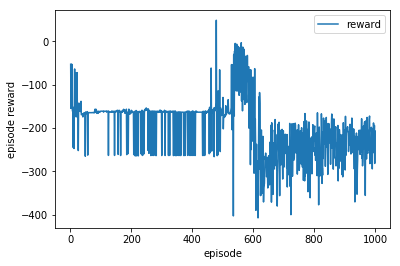

In [3]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['episode'], results['cummulative'], label='reward')
plt.xlabel('episode')
plt.ylabel('episode reward')
plt.legend()

In [4]:
last_mean = np.mean(results['cummulative'][-10:])
print("The mean over the last 10 episodes is: ",last_mean)
first_mean = np.mean(results['cummulative'][:10])
print("The mean over the first 10 episodes is: ",first_mean)

The mean over the last 10 episodes is:  -225.8735167063406
The mean over the first 10 episodes is:  -135.47246652223208


In [1]:
## TODO: Train your agent here.
## -33 reward for crashing
## -2 reward for each time_step it is above (target*1.2) 
## Simpler Network (Trial 2), crtitc_lr = 0.001
import pandas as pd
from agents.actor import Actor
from agents.ddpg import DDPG
import math
import numpy as np

from task import Task

num_episodes = 1000
runtime = 5.0
init_pose = np.array([0.,0., 5., 0., 0., 0.])
target_pos = np.array([0., 0., 20.])

task = Task(target_pos=target_pos, init_pose=init_pose, runtime=runtime)
agent = DDPG(task) 
best_episode_reward = -1e5
best_step_reward = -1e5
episode_reward = 0

labels = ['episode','cummulative']
results1 = {x : [] for x in labels}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() 
    _ = task.reset()
#     print(state)
    best_step_reward = -1e5
    episode_reward = 0
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        episode_reward += reward
        state = next_state
        best_step_reward = max(best_step_reward, reward)
        print(
            "Episode={:2d}  StepReward={:4f}  EpisodeReward={:4f}".format(i_episode, reward, episode_reward),
            tuple(task.sim.pose[:3])
        )
#         sys.stdout.flush()
        if done:
            best_episode_reward = max(episode_reward, best_episode_reward)
            to_write = [i_episode] + [episode_reward]
            for ii in range(len(labels)):
                results1[labels[ii]].append(to_write[ii])
            end_pos = task.getPose()
            print(
                    "\rEpisode={:4d}  BestStepReward={:3f}  BestEpisodeReward={:3f}  EpisodeReward={:4f} \n".format(
                        i_episode, best_step_reward, best_episode_reward, episode_reward
                    ), 
                    "({:4f}, {:4f}, {:4f}, {:4f}, {:4f}, {:4f})".format(
                        end_pos[0], end_pos[1], end_pos[2], end_pos[3], end_pos[4], end_pos[5]
                    ), 
                    "\n\n\n", 
                    end=""
                 ) 
            break
#         sys.stdout.flush()


D:\Programs\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Episode= 1  StepReward=1.650003  EpisodeReward=1.650003 (-0.0029802977158255037, 0.0006304089345854538, 5.002698300795986)
Episode= 1  StepReward=1.648239  EpisodeReward=3.298242 (-0.030100677386980176, 0.005574323174886755, 5.000447322283698)
Episode= 1  StepReward=1.641172  EpisodeReward=4.939414 (-0.09483795212232753, 0.011579509407718552, 4.968784833331618)
Episode= 1  StepReward=1.628079  EpisodeReward=6.567493 (-0.19145431639155294, 0.0020797071631769486, 4.8920149554181105)
Episode= 1  StepReward=1.607538  EpisodeReward=8.175031 (-0.3018467811413203, -0.04048220324500796, 4.775359325294857)
Episode= 1  StepReward=1.580091  EpisodeReward=9.755122 (-0.40271230433977284, -0.11675733492657635, 4.635247803434993)
Episode= 1  StepReward=1.551057  EpisodeReward=11.306179 (-0.4740733936683354, -0.2097630852935348, 4.477924377923916)
Episode= 1  StepReward=1.522548  EpisodeReward=12.828727 (-0.505898847398643, -0.3053789959295725, 4.289703859139592)
Episode= 1  StepReward=1.493054  Episo

Episode= 4  StepReward=-99.000000  EpisodeReward=-107.861348 (-1.1592445987576798, -2.4081546367381206, 0.3907476443749438)
Episode= 4  StepReward=-99.000000  EpisodeReward=-206.861348 (-1.27670127284075, -2.7137781656775566, 0.0)
Episode=   4  BestStepReward=1.650004  BestEpisodeReward=-206.849261  EpisodeReward=-206.861348 
 (-1.276701, -2.713778, 0.000000, 3.654442, 4.452714, 0.000000) 


Episode= 5  StepReward=1.650003  EpisodeReward=1.650003 (-0.003004519061950427, 0.000619120537708428, 5.002712467184325)
Episode= 5  StepReward=1.648233  EpisodeReward=3.298236 (-0.030262815396934498, 0.005459180047125607, 5.000372206814798)
Episode= 5  StepReward=1.641148  EpisodeReward=4.939385 (-0.09513425687452351, 0.01120066091231266, 4.968374543158793)
Episode= 5  StepReward=1.628056  EpisodeReward=6.567440 (-0.19151841333727904, 0.001048862504394481, 4.890913742676205)
Episode= 5  StepReward=1.607292  EpisodeReward=8.174732 (-0.30070216494982716, -0.042503515216316505, 4.7733383397748455)
Ep

Episode= 8  StepReward=1.505744  EpisodeReward=14.333320 (-0.4980007944703777, -0.4007280893208973, 4.204823616293348)
Episode= 8  StepReward=1.479003  EpisodeReward=15.812323 (-0.469121456895582, -0.5303764540431494, 3.9890461021502355)
Episode= 8  StepReward=1.446268  EpisodeReward=17.258591 (-0.46780970468938626, -0.6862174794943823, 3.7565225407197036)
Episode= 8  StepReward=1.407848  EpisodeReward=18.666438 (-0.5052004718493661, -0.8424177348213151, 3.503107034693474)
Episode= 8  StepReward=1.362836  EpisodeReward=20.029274 (-0.5774899974769608, -1.0070297893849947, 3.210494682592214)
Episode= 8  StepReward=1.309804  EpisodeReward=21.339078 (-0.6792002746577264, -1.1945460619676973, 2.8816305900982115)
Episode= 8  StepReward=1.249828  EpisodeReward=22.588906 (-0.8034492119485527, -1.4097800951169854, 2.5339442456528323)
Episode= 8  StepReward=1.185916  EpisodeReward=23.774822 (-0.9357341755525862, -1.6441175316281156, 2.1842130001697933)
Episode= 8  StepReward=1.121887  EpisodeRew

Episode=12  StepReward=1.649740  EpisodeReward=1.649740 (-0.007132283386984237, 0.0005011224309410843, 4.999395361896898)
Episode=12  StepReward=1.645079  EpisodeReward=3.294819 (-0.038889224580088366, -0.00801380978810241, 4.959306631136123)
Episode=12  StepReward=1.635026  EpisodeReward=4.929844 (-0.045428590416895044, -0.03442149497760199, 4.869938894456196)
Episode=12  StepReward=1.619852  EpisodeReward=6.549696 (-0.05783320708168836, -0.08250628781293733, 4.733727902947585)
Episode=12  StepReward=1.597398  EpisodeReward=8.147094 (-0.10311971517848999, -0.12893894142058118, 4.552526038900506)
Episode=12  StepReward=1.572407  EpisodeReward=9.719501 (-0.11777734388912, -0.16583249596664518, 4.334918599811801)
Episode=12  StepReward=1.548383  EpisodeReward=11.267884 (-0.14156151384423768, -0.19879759586776516, 4.112808984440081)
Episode=12  StepReward=1.518965  EpisodeReward=12.786849 (-0.16408799224440457, -0.24978460312044523, 3.8407534153930443)
Episode=12  StepReward=1.487083  Epi

Episode=15  StepReward=1.266808  EpisodeReward=24.174479 (0.26371185457957197, -0.30552226170823965, 1.1153809550015454)
Episode=15  StepReward=-99.000000  EpisodeReward=-74.825521 (0.42111667064041497, -0.33742219145917407, 0.6452012187179441)
Episode=15  StepReward=-99.000000  EpisodeReward=-173.825521 (0.5868451878940265, -0.38003859336838947, 0.1770469233091836)
Episode=15  StepReward=-99.000000  EpisodeReward=-272.825521 (0.7220532776332402, -0.4179064733744115, 0.0)
Episode=  15  BestStepReward=1.649897  BestEpisodeReward=-176.983342  EpisodeReward=-272.825521 
 (0.722053, -0.417906, 0.000000, 1.945095, 2.639743, 0.000000) 


Episode=16  StepReward=1.650198  EpisodeReward=1.650198 (-0.005524336409119212, 0.0015059982433369313, 5.009294253594612)
Episode=16  StepReward=1.647724  EpisodeReward=3.297923 (-0.05194514716758874, 0.007277434020764923, 5.009923137074428)
Episode=16  StepReward=1.638428  EpisodeReward=4.936351 (-0.11596156265860519, 0.00028104149305446726, 4.9468013830147

Episode=19  StepReward=1.661046  EpisodeReward=4.966568 (-0.02480831226007943, 0.003766212198324389, 5.180519630248276)
Episode=19  StepReward=1.669730  EpisodeReward=6.636298 (-0.05038325305138311, 0.009825282139964047, 5.313479068666244)
Episode=19  StepReward=1.678192  EpisodeReward=8.314491 (-0.07761951323481983, 0.049434076746291314, 5.4680324640436915)
Episode=19  StepReward=1.684501  EpisodeReward=9.998991 (-0.09676037560776088, 0.1563498577324211, 5.644956689778504)
Episode=19  StepReward=1.681556  EpisodeReward=11.680547 (-0.09173186188638648, 0.29930379101567883, 5.718509476696936)
Episode=19  StepReward=1.679918  EpisodeReward=13.360466 (-0.05099296677373509, 0.3434878693725805, 5.7466872909584525)
Episode=19  StepReward=1.690989  EpisodeReward=15.051454 (0.006157691733031966, 0.2900099473472831, 5.812601422043919)
Episode=19  StepReward=1.706482  EpisodeReward=16.757936 (0.04742435101839538, 0.14845790756011976, 5.888377101089468)
Episode=19  StepReward=1.723793  EpisodeRew

Episode=22  StepReward=1.571281  EpisodeReward=11.317643 (-0.16358077863849582, 0.04606733127651353, 4.277661993183015)
Episode=22  StepReward=1.551191  EpisodeReward=12.868834 (-0.20250830950103207, 0.08870997127378272, 4.095929956381702)
Episode=22  StepReward=1.520961  EpisodeReward=14.389795 (-0.2297772721405596, 0.1611775000808316, 3.838470073432919)
Episode=22  StepReward=1.486460  EpisodeReward=15.876256 (-0.22469389300669873, 0.23563957290620235, 3.5142231790931833)
Episode=22  StepReward=1.457472  EpisodeReward=17.333728 (-0.16881201602729187, 0.24769591609302213, 3.1935680425112425)
Episode=22  StepReward=1.434166  EpisodeReward=18.767894 (-0.04788667511161603, 0.327097546283469, 2.8792322929552316)
Episode=22  StepReward=1.392088  EpisodeReward=20.159982 (0.1443480064726933, 0.4258245086513516, 2.4557145401613782)
Episode=22  StepReward=1.322112  EpisodeReward=21.482094 (0.4227536172937871, 0.4527242701380921, 1.9642255655104506)
Episode=22  StepReward=1.248824  EpisodeRewar

Episode=25  StepReward=1.224455  EpisodeReward=19.777874 (1.1464738496804723, -0.6118346387314791, 1.622954010682948)
Episode=25  StepReward=1.113050  EpisodeReward=20.890924 (1.5231838695163424, -1.0958597506105194, 1.2351840625964632)
Episode=25  StepReward=-32.320737  EpisodeReward=-11.429813 (1.9689786614687947, -1.60503696374545, 0.9343251868513373)
Episode=25  StepReward=-99.000000  EpisodeReward=-110.429813 (2.485677799518154, -2.1193057685247156, 0.7208312372637058)
Episode=25  StepReward=-99.000000  EpisodeReward=-209.429813 (3.0666539906760857, -2.6158985242658574, 0.5813114341851465)
Episode=25  StepReward=-99.000000  EpisodeReward=-308.429813 (3.707878046117752, -3.0208124502592564, 0.4277806573995095)
Episode=25  StepReward=-99.000000  EpisodeReward=-407.429813 (4.418064646742459, -3.3552887436158794, 0.17170602124042922)
Episode=25  StepReward=-99.000000  EpisodeReward=-506.429813 (5.20292196224302, -3.6524706430590426, 0.0)
Episode=  25  BestStepReward=1.649713  BestEpis

Episode=29  StepReward=1.474739  EpisodeReward=14.318108 (-0.18977196840545138, 0.46226325190865797, 3.5563782919477682)
Episode=29  StepReward=1.436738  EpisodeReward=15.754846 (-0.1604542186156282, 0.4595128216342338, 3.1204337401063658)
Episode=29  StepReward=1.405645  EpisodeReward=17.160491 (-0.09619343794975867, 0.39491542862034135, 2.676225133385557)
Episode=29  StepReward=1.376124  EpisodeReward=18.536615 (-0.07869811733918754, 0.3446224860366152, 2.250704301639714)
Episode=29  StepReward=1.336229  EpisodeReward=19.872844 (-0.13977830689948473, 0.3140527345919908, 1.7979172252445519)
Episode=29  StepReward=1.283854  EpisodeReward=21.156698 (-0.24944935507205035, 0.333082682735722, 1.2894173939420452)
Episode=29  StepReward=-65.585989  EpisodeReward=-44.429292 (-0.33663759882289873, 0.3460267345831211, 0.6821872714538955)
Episode=29  StepReward=-99.000000  EpisodeReward=-143.429292 (-0.34377990480679277, 0.3288620212433274, 0.03585387465855697)
Episode=29  StepReward=-99.000000 

Episode=33  StepReward=1.611203  EpisodeReward=6.540882 (-0.2779635737442903, 0.0153243256932241, 4.752759368592927)
Episode=33  StepReward=1.579409  EpisodeReward=8.120291 (-0.5293093751822222, -0.006175295164210028, 4.614037040035745)
Episode=33  StepReward=1.538108  EpisodeReward=9.658399 (-0.8848477444131199, 0.0074262419473371775, 4.468755940359651)
Episode=33  StepReward=1.482082  EpisodeReward=11.140481 (-1.3457605179029661, 0.03588137678508436, 4.27788915862208)
Episode=33  StepReward=1.411535  EpisodeReward=12.552016 (-1.91801396777524, 0.07617233691517378, 4.0522680179244555)
Episode=33  StepReward=1.324812  EpisodeReward=13.876828 (-2.5942742985228695, 0.13928503223349115, 3.763352793656962)
Episode=33  StepReward=1.223441  EpisodeReward=15.100269 (-3.354843222673363, 0.16698637296322716, 3.3917629109413507)
Episode=33  StepReward=1.119746  EpisodeReward=16.220014 (-4.17186323594718, 0.11355072661322418, 3.0218623856120086)
Episode=33  StepReward=1.020556  EpisodeReward=17.2

Episode=36  StepReward=-99.000000  EpisodeReward=-78.297506 (-9.55003786032285, 0.26447385160315645, 0.5190161350024028)
Episode=36  StepReward=-99.000000  EpisodeReward=-177.297506 (-10.491969818447275, 0.32452464190564934, 0.0)
Episode=  36  BestStepReward=1.650256  BestEpisodeReward=-159.385501  EpisodeReward=-177.297506 
 (-10.491970, 0.324525, 0.000000, 2.202540, 3.868610, 0.000000) 


Episode=37  StepReward=1.650271  EpisodeReward=1.650271 (-0.0015430578274358729, 0.0029880220731423575, 5.003848165739814)
Episode=37  StepReward=1.646131  EpisodeReward=3.296402 (-0.01845169212372886, 0.010622695749002459, 4.953529616858461)
Episode=37  StepReward=1.637397  EpisodeReward=4.933799 (-0.06673303408048332, 0.002682416353935139, 4.884057688062927)
Episode=37  StepReward=1.618755  EpisodeReward=6.552555 (-0.15928464395629055, -0.02559915452196487, 4.741865557327232)
Episode=37  StepReward=1.593106  EpisodeReward=8.145661 (-0.31489266019281, -0.05786510646371326, 4.653298746183766)
Episod

Episode=40  StepReward=1.243552  EpisodeReward=12.120547 (-1.6747720697134563, 1.6201740327974132, 3.3556390801092166)
Episode=40  StepReward=1.124281  EpisodeReward=13.244828 (-2.37693524508589, 1.6981710129626708, 2.7674948262820767)
Episode=40  StepReward=0.992126  EpisodeReward=14.236954 (-3.221899537893909, 1.7610548200862879, 2.153584725346722)
Episode=40  StepReward=0.844944  EpisodeReward=15.081898 (-4.19438882982693, 1.8236268910411126, 1.4963655269358123)
Episode=40  StepReward=-32.525472  EpisodeReward=-17.443574 (-5.256477977063032, 1.879824162272544, 0.7863422268576375)
Episode=40  StepReward=-99.000000  EpisodeReward=-116.443574 (-6.382844026783027, 1.911190515536208, 0.0298292200984369)
Episode=40  StepReward=-99.000000  EpisodeReward=-215.443574 (-7.577659709085737, 1.8833824780263089, 0.0)
Episode=  40  BestStepReward=1.653382  BestEpisodeReward=-159.385501  EpisodeReward=-215.443574 
 (-7.577660, 1.883382, 0.000000, 1.975055, 2.476680, 0.000000) 


Episode=41  StepRew

Episode=45  StepReward=1.652434  EpisodeReward=1.652434 (-0.0007628124169736707, 0.00783347619490474, 5.058503269750819)
Episode=45  StepReward=1.659009  EpisodeReward=3.311443 (-0.009316184448222915, 0.08459743309167295, 5.213765329273371)
Episode=45  StepReward=1.659159  EpisodeReward=4.970602 (-0.03679029439284579, 0.29252061429570064, 5.401851560656997)
Episode=45  StepReward=1.641761  EpisodeReward=6.612364 (-0.0960306280026142, 0.6477405601376789, 5.540459106801968)
Episode=45  StepReward=1.599968  EpisodeReward=8.212331 (-0.2019416075980177, 1.1246728693065304, 5.561222273728072)
Episode=45  StepReward=1.531616  EpisodeReward=9.743947 (-0.37116373361565314, 1.6738121055798993, 5.422790601979529)
Episode=45  StepReward=1.438228  EpisodeReward=11.182175 (-0.6212507173798543, 2.2374371181159365, 5.1131332155612705)
Episode=45  StepReward=1.323798  EpisodeReward=12.505973 (-0.9698589085819054, 2.762410064580597, 4.647589965168979)
Episode=45  StepReward=1.193357  EpisodeReward=13.69

Episode=48  StepReward=0.258445  EpisodeReward=32.911820 (-15.349667019331847, 15.254861809460174, 19.417281848964645)
Episode=48  StepReward=0.060483  EpisodeReward=32.972303 (-16.881610339080687, 16.372383333363832, 19.85299157099568)
Episode=48  StepReward=-0.161601  EpisodeReward=32.810702 (-18.404489924481048, 17.468982738062824, 20.24754992647354)
Episode=48  StepReward=-0.427200  EpisodeReward=32.383502 (-19.9382279344698, 18.532477016151955, 20.58173838757665)
Episode=48  StepReward=-0.686201  EpisodeReward=31.697301 (-21.44906016023285, 19.56986500475307, 20.877235466481366)
Episode=48  StepReward=-0.935545  EpisodeReward=30.761756 (-22.943713937660675, 20.57692586829015, 21.108999692745286)
Episode=48  StepReward=-1.172979  EpisodeReward=29.588778 (-24.44519514134724, 21.49879253805711, 21.278760065109477)
Episode=48  StepReward=-1.403020  EpisodeReward=28.185758 (-25.951884179447664, 22.355830345945066, 21.466376661678293)
Episode=48  StepReward=-1.633355  EpisodeReward=26.5

Episode=49  StepReward=-0.813822  EpisodeReward=32.906251 (-30.953379604983894, -6.254663646066268, 14.19226929905803)
Episode=49  StepReward=-0.990052  EpisodeReward=31.916199 (-32.26333993963379, -6.785707328900504, 14.047331559004538)
Episode=49  StepReward=-1.173288  EpisodeReward=30.742910 (-33.61066743448298, -7.317740750010561, 13.865657351780484)
Episode=49  StepReward=-1.363121  EpisodeReward=29.379789 (-35.00190383039848, -7.837038958436765, 13.643898795488845)
Episode=49  StepReward=-1.559646  EpisodeReward=27.820144 (-36.42043181780689, -8.37450666453237, 13.392718323676155)
Episode=49  StepReward=-1.759229  EpisodeReward=26.060914 (-37.84585666999553, -8.966563605898344, 13.193736584450939)
Episode=49  StepReward=-1.960577  EpisodeReward=24.100338 (-39.2363964455891, -9.650155174894525, 13.009426815703177)
Episode=49  StepReward=-2.169497  EpisodeReward=21.930841 (-40.55253096126595, -10.402588334991778, 12.728339041556973)
Episode=49  StepReward=-2.382352  EpisodeReward=1

Episode=51  StepReward=0.675806  EpisodeReward=34.011223 (4.057287226777577, -5.692479956858344, 3.468337414708408)
Episode=51  StepReward=0.547024  EpisodeReward=34.558248 (4.8867898698878935, -5.806679842502937, 2.937002737685786)
Episode=51  StepReward=0.406940  EpisodeReward=34.965188 (5.690958767959621, -5.971005449482468, 2.3102411382120196)
Episode=51  StepReward=0.257464  EpisodeReward=35.222652 (6.457110756597746, -6.167889826582917, 1.5831224261034047)
Episode=51  StepReward=-32.914820  EpisodeReward=2.307832 (7.173947643770238, -6.379431500051455, 0.7571460316442055)
Episode=51  StepReward=-99.000000  EpisodeReward=-96.692168 (7.831429106863476, -6.588026250183993, 0.0)
Episode=  51  BestStepReward=1.651704  BestEpisodeReward=-96.692168  EpisodeReward=-96.692168 
 (7.831429, -6.588026, 0.000000, 2.785207, 0.646973, 0.000000) 


Episode=52  StepReward=1.650419  EpisodeReward=1.650419 (2.2250381811572362e-07, 0.019124247918160794, 5.0207970978718945)
Episode=52  StepReward=1.6

Episode=54  StepReward=1.655401  EpisodeReward=3.306632 (1.5174958118457505e-05, 0.030048943348712675, 5.10941350756817)
Episode=54  StepReward=1.661595  EpisodeReward=4.968227 (0.00011583379636254772, 0.08128586415337467, 5.238110937205654)
Episode=54  StepReward=1.670445  EpisodeReward=6.638673 (0.0004316744252704193, 0.1493320048659584, 5.416221653883426)
Episode=54  StepReward=1.682688  EpisodeReward=8.321361 (0.0010847117121416106, 0.22653340494483706, 5.644062323018886)
Episode=54  StepReward=1.698968  EpisodeReward=10.020329 (0.0021963364659984778, 0.3054287559207748, 5.921113931868197)
Episode=54  StepReward=1.719747  EpisodeReward=11.740076 (0.000664997841471848, 0.37922832576272253, 6.241973787333322)
Episode=54  StepReward=1.742740  EpisodeReward=13.482816 (-0.013945475190958671, 0.44697372335252483, 6.571989665394192)
Episode=54  StepReward=1.763417  EpisodeReward=15.246233 (-0.042441180031030194, 0.5101910372545483, 6.884200944629491)
Episode=54  StepReward=1.781401  Episo

Episode=55  StepReward=0.912841  EpisodeReward=35.155079 (3.387713440475495, 4.266608932983601, 4.090512161850099)
Episode=55  StepReward=0.808431  EpisodeReward=35.963509 (3.6572389327368278, 4.502648540150453, 3.405601914147861)
Episode=55  StepReward=0.698247  EpisodeReward=36.661756 (3.9025053240116843, 4.758849363475046, 2.675887217944817)
Episode=55  StepReward=0.585437  EpisodeReward=37.247194 (4.169134989434957, 5.011469574584031, 1.921214489357357)
Episode=55  StepReward=0.466251  EpisodeReward=37.713444 (4.4425772987058325, 5.29436639173421, 1.132923387175751)
Episode=55  StepReward=-99.000000  EpisodeReward=-61.286556 (4.6823424655394215, 5.585353429104906, 0.3194363062825785)
Episode=55  StepReward=-99.000000  EpisodeReward=-160.286556 (4.922455117431582, 5.84605425706966, 0.0)
Episode=  55  BestStepReward=1.730073  BestEpisodeReward=-96.692168  EpisodeReward=-160.286556 
 (4.922455, 5.846054, 0.000000, 1.434633, 5.049483, 0.000000) 


Episode=56  StepReward=1.651257  Episo

Episode=57  StepReward=1.101031  EpisodeReward=51.550794 (5.998687745952373, 0.5885540407704744, 5.080758413018132)
Episode=57  StepReward=0.993537  EpisodeReward=52.544331 (6.370382906824604, 0.8293580224995182, 4.5189514677590354)
Episode=57  StepReward=0.890735  EpisodeReward=53.435066 (6.761102063915896, 1.02155225905943, 3.969414078099091)
Episode=57  StepReward=0.786502  EpisodeReward=54.221568 (7.223602337632122, 1.1901768512014588, 3.4167454331484257)
Episode=57  StepReward=0.673125  EpisodeReward=54.894692 (7.738890482714367, 1.355439726028868, 2.8007319969017908)
Episode=57  StepReward=0.552606  EpisodeReward=55.447298 (8.245391667706214, 1.514442002603659, 2.111334450701429)
Episode=57  StepReward=0.428831  EpisodeReward=55.876129 (8.74608642067152, 1.6796873984292235, 1.3944727366188825)
Episode=57  StepReward=-65.885251  EpisodeReward=-10.009122 (9.284742678490282, 1.846711161553717, 0.6406181947213108)
Episode=57  StepReward=-99.000000  EpisodeReward=-109.009122 (9.801102

Episode=61  StepReward=1.401708  EpisodeReward=10.923735 (-0.4289761212928327, 1.4202023902573735, 3.7910649560206)
Episode=61  StepReward=1.316931  EpisodeReward=12.240666 (-0.7094701763789507, 1.7557651292571432, 3.433436916109216)
Episode=61  StepReward=1.224748  EpisodeReward=13.465414 (-1.0463144454270836, 2.0478773932867917, 3.0163201190526117)
Episode=61  StepReward=1.128105  EpisodeReward=14.593519 (-1.3929710085659306, 2.2847526236896596, 2.5164677671450146)
Episode=61  StepReward=1.030551  EpisodeReward=15.624070 (-1.6942595367656474, 2.4832604596580645, 1.9367149081633441)
Episode=61  StepReward=0.935546  EpisodeReward=16.559616 (-1.923685763405868, 2.672053001555123, 1.314045597983901)
Episode=61  StepReward=-65.708528  EpisodeReward=-49.148912 (-2.099651988152795, 2.866471938436546, 0.6908792870317192)
Episode=61  StepReward=-99.000000  EpisodeReward=-148.148912 (-2.2648163210740666, 3.064994523628704, 0.08797593112257794)
Episode=61  StepReward=-99.000000  EpisodeReward=-

Episode=64  StepReward=1.656122  EpisodeReward=3.307377 (-1.7171751924848942e-05, 0.019372526779057632, 5.111744004062282)
Episode=64  StepReward=1.663859  EpisodeReward=4.971236 (-0.00010876360226519362, 0.05917752701370388, 5.24736400439934)
Episode=64  StepReward=1.674400  EpisodeReward=6.645635 (-0.0003936782095292791, 0.1177110224422755, 5.434861709462487)
Episode=64  StepReward=1.688486  EpisodeReward=8.334122 (-0.0010636859754330893, 0.1850614096658361, 5.674666777478328)
Episode=64  StepReward=1.706939  EpisodeReward=10.041061 (-0.0043038594278312, 0.24753765731634644, 5.961719367653739)
Episode=64  StepReward=1.727856  EpisodeReward=11.768917 (-0.02915324263733765, 0.29942397503960266, 6.26201770491681)
Episode=64  StepReward=1.745206  EpisodeReward=13.514122 (-0.024046049775366375, 0.359871184152363, 6.509064099107713)
Episode=64  StepReward=1.761069  EpisodeReward=15.275192 (0.06236706749204061, 0.40823186685273816, 6.731748494814654)
Episode=64  StepReward=1.766572  Episode

Episode=65  StepReward=0.274940  EpisodeReward=46.346570 (9.184914784719712, -4.610860412482371, 3.044920161453746)
Episode=65  StepReward=0.142001  EpisodeReward=46.488571 (9.90429217995257, -5.043971551456978, 2.676912182804121)
Episode=65  StepReward=-0.000346  EpisodeReward=46.488225 (10.728141400838636, -5.447529795961191, 2.2989285337335046)
Episode=65  StepReward=-0.150497  EpisodeReward=46.337729 (11.63551860125009, -5.880812927796632, 1.929512400650933)
Episode=65  StepReward=-0.314015  EpisodeReward=46.023714 (12.593357878955418, -6.35075098729958, 1.48748973372265)
Episode=65  StepReward=-33.305177  EpisodeReward=12.718537 (13.580518413196705, -6.7444011354354405, 0.962282545586422)
Episode=65  StepReward=-99.000000  EpisodeReward=-86.281463 (14.56370934782957, -7.084550742640704, 0.4820347864489276)
Episode=65  StepReward=-99.000000  EpisodeReward=-185.281463 (15.513820194984289, -7.511245394704383, 0.0063190419043968995)
Episode=65  StepReward=-99.000000  EpisodeReward=-28

Episode=67  StepReward=1.251687  EpisodeReward=29.950430 (3.6129684062740224, -0.8312023747397519, 4.708913641547841)
Episode=67  StepReward=1.169792  EpisodeReward=31.120221 (3.9027690876797076, -1.091863387354945, 4.36700819688863)
Episode=67  StepReward=1.094903  EpisodeReward=32.215124 (4.119173704272737, -1.330672541151973, 4.024495100574042)
Episode=67  StepReward=1.030086  EpisodeReward=33.245211 (4.289786456811805, -1.5289104629991566, 3.7126452912494226)
Episode=67  StepReward=0.975227  EpisodeReward=34.220438 (4.461526829313314, -1.6599430711786605, 3.4370443699429267)
Episode=67  StepReward=0.926077  EpisodeReward=35.146515 (4.687430757122146, -1.711726744980148, 3.175507816116368)
Episode=67  StepReward=0.875282  EpisodeReward=36.021797 (5.007535058664451, -1.7073325210428134, 2.905015599955275)
Episode=67  StepReward=0.815619  EpisodeReward=36.837416 (5.438511770298081, -1.6870667352104292, 2.607053690018939)
Episode=67  StepReward=0.742247  EpisodeReward=37.579663 (5.9734

Episode=69  StepReward=0.595830  EpisodeReward=41.981710 (5.752616310575813, -3.1744254058768675, 1.813378943418054)
Episode=69  StepReward=0.480780  EpisodeReward=42.462490 (6.436336615416569, -3.396019495307997, 1.3911872599772033)
Episode=69  StepReward=-32.746443  EpisodeReward=9.716047 (7.1343798286828255, -3.5237096522741203, 0.9107143050674624)
Episode=69  StepReward=-99.000000  EpisodeReward=-89.283953 (7.818587821953028, -3.624509611852998, 0.4815443420721904)
Episode=69  StepReward=-99.000000  EpisodeReward=-188.283953 (8.462249935204179, -3.8127431305023216, 0.04100700536511721)
Episode=69  StepReward=-99.000000  EpisodeReward=-287.283953 (9.041253544326066, -4.032670686835325, 0.0)
Episode=  69  BestStepReward=1.720955  BestEpisodeReward=-96.692168  EpisodeReward=-287.283953 
 (9.041254, -4.032671, 0.000000, 2.146522, 0.725491, 0.000000) 


Episode=70  StepReward=1.651295  EpisodeReward=1.651295 (-5.15567597098866e-06, 0.0004301178922391253, 5.0280948786458834)
Episode=70  

Episode=72  StepReward=1.657030  EpisodeReward=3.308362 (-0.0011157420614727083, 0.006746010038607554, 5.11619218841754)
Episode=72  StepReward=1.667011  EpisodeReward=4.975373 (-0.005429449314493925, 0.020584140810775312, 5.260295960779383)
Episode=72  StepReward=1.680989  EpisodeReward=6.656363 (-0.01665995905005029, 0.03970662538538305, 5.460621210727995)
Episode=72  StepReward=1.697632  EpisodeReward=8.353995 (-0.049866411485836586, 0.05876650507811006, 5.6934293278634795)
Episode=72  StepReward=1.708842  EpisodeReward=10.062837 (-0.11638040714624714, 0.0797706919813319, 5.879994140742309)
Episode=72  StepReward=1.715633  EpisodeReward=11.778470 (-0.18248774302082213, 0.10029218769217937, 6.032059025554126)
Episode=72  StepReward=1.719351  EpisodeReward=13.497821 (-0.2521407872128887, 0.12129847262048925, 6.149173226571133)
Episode=72  StepReward=1.721979  EpisodeReward=15.219800 (-0.3115643543133044, 0.1239486307898183, 6.249534854374058)
Episode=72  StepReward=1.723766  EpisodeRe

Episode=74  StepReward=1.650328  EpisodeReward=16.770256 (-0.546822118577651, 0.13562394780301135, 5.598081822610937)
Episode=74  StepReward=1.625124  EpisodeReward=18.395380 (-0.6517783219629185, 0.17532537325943476, 5.456139202064344)
Episode=74  StepReward=1.600427  EpisodeReward=19.995807 (-0.7300715597949258, 0.21210579424192916, 5.299934879220339)
Episode=74  StepReward=1.573884  EpisodeReward=21.569691 (-0.8014516678945185, 0.2612206919846316, 5.109612212961315)
Episode=74  StepReward=1.547500  EpisodeReward=23.117192 (-0.8475903625941235, 0.2810027291120329, 4.902302570634344)
Episode=74  StepReward=1.523272  EpisodeReward=24.640464 (-0.831787127877923, 0.30458283848433604, 4.630779253919471)
Episode=74  StepReward=1.493733  EpisodeReward=26.134197 (-0.8176338188541705, 0.32435232206527126, 4.28121927891359)
Episode=74  StepReward=1.458410  EpisodeReward=27.592608 (-0.8055066530379161, 0.3617977221065764, 3.9049078276284126)
Episode=74  StepReward=1.422007  EpisodeReward=29.014

Episode=76  StepReward=1.465835  EpisodeReward=25.158870 (0.11553952421903205, -0.2388676120186699, 3.117477945747207)
Episode=76  StepReward=1.412531  EpisodeReward=26.571401 (0.1609214220953992, -0.5040501043893991, 2.8298042313202547)
Episode=76  StepReward=1.360609  EpisodeReward=27.932009 (0.14057888643951846, -0.756586873596034, 2.4932318871599444)
Episode=76  StepReward=1.306044  EpisodeReward=29.238053 (0.09789285027229419, -1.0203282932630973, 2.070659291841594)
Episode=76  StepReward=1.238617  EpisodeReward=30.476670 (0.10887345011181433, -1.3353504237959801, 1.5989844422993724)
Episode=76  StepReward=1.166920  EpisodeReward=31.643591 (0.06612678907093168, -1.6785518269225685, 1.1219722083206316)
Episode=76  StepReward=-99.000000  EpisodeReward=-67.356409 (0.017744293356403002, -2.0156204355170133, 0.6787636777471446)
Episode=76  StepReward=-99.000000  EpisodeReward=-166.356409 (0.05023594178560334, -2.3307935631045487, 0.22976798972553059)
Episode=76  StepReward=-99.000000  

Episode=79  StepReward=1.331223  EpisodeReward=21.504507 (0.06008871489609946, 0.1366820716027613, 1.4627123314113355)
Episode=79  StepReward=-32.141071  EpisodeReward=-10.636564 (0.07750443710518337, 0.12002305670156169, 0.9031090283992023)
Episode=79  StepReward=-99.000000  EpisodeReward=-109.636564 (0.05244288289789263, 0.13477581815100256, 0.2912009951492504)
Episode=79  StepReward=-99.000000  EpisodeReward=-208.636564 (0.09052027748176472, 0.12472701379387426, 0.0)
Episode=  79  BestStepReward=1.650079  BestEpisodeReward=-96.692168  EpisodeReward=-208.636564 
 (0.090520, 0.124727, 0.000000, 3.317241, 5.719364, 0.000000) 


Episode=80  StepReward=1.650021  EpisodeReward=1.650021 (-0.00021013826185978186, 0.020344415800923544, 5.00966422049366)
Episode=80  StepReward=1.644948  EpisodeReward=3.294969 (-0.020054444156576947, 0.027787254223489183, 4.961059383031449)
Episode=80  StepReward=1.633033  EpisodeReward=4.928001 (-0.04244269055802258, 0.05929537039880511, 4.8669334864411615)
E

Episode=83  StepReward=1.422935  EpisodeReward=15.527981 (-0.41433224744712754, 0.27892407535974095, 2.9794892663137786)
Episode=83  StepReward=1.367181  EpisodeReward=16.895162 (-0.4710051370924592, 0.4112280843368956, 2.524603845843903)
Episode=83  StepReward=1.310470  EpisodeReward=18.205632 (-0.43704064230326245, 0.5626052664434701, 2.0129173991373954)
Episode=83  StepReward=1.246789  EpisodeReward=19.452421 (-0.43881701107556687, 0.7613812317691986, 1.4602931538733173)
Episode=83  StepReward=-32.210241  EpisodeReward=-12.757820 (-0.4864184466951384, 1.0080897250007612, 0.861353606116507)
Episode=83  StepReward=-99.000000  EpisodeReward=-111.757820 (-0.4997651963882312, 1.2655879269923807, 0.18487391760503932)
Episode=83  StepReward=-99.000000  EpisodeReward=-210.757820 (-0.5247038297826605, 1.543231531405892, 0.0)
Episode=  83  BestStepReward=1.650173  BestEpisodeReward=-96.692168  EpisodeReward=-210.757820 
 (-0.524704, 1.543232, 0.000000, 5.456062, 2.078329, 0.000000) 


Episode

Episode=87  StepReward=1.619509  EpisodeReward=8.186537 (-0.19940969634147668, -0.12275228235524822, 4.945355815578923)
Episode=87  StepReward=1.600115  EpisodeReward=9.786651 (-0.3949051460177557, -0.16572484532275986, 4.886255622367819)
Episode=87  StepReward=1.557985  EpisodeReward=11.344636 (-0.6925669342899184, -0.3005964260897986, 4.774616690958475)
Episode=87  StepReward=1.498915  EpisodeReward=12.843551 (-1.1174925027202094, -0.4771250027003421, 4.670282595077824)
Episode=87  StepReward=1.426822  EpisodeReward=14.270373 (-1.652463784067381, -0.6660149288219291, 4.542558388822166)
Episode=87  StepReward=1.343205  EpisodeReward=15.613578 (-2.1976629120295246, -0.9249347989399809, 4.402503933428283)
Episode=87  StepReward=1.264234  EpisodeReward=16.877812 (-2.6851995297286124, -1.1565996110420393, 4.284657135297072)
Episode=87  StepReward=1.194043  EpisodeReward=18.071855 (-3.085292598581113, -1.3561337094013062, 4.128766431224781)
Episode=87  StepReward=1.131233  EpisodeReward=19

Episode=90  StepReward=-32.250731  EpisodeReward=-11.841731 (-1.0018822373549885, 1.2731565668774993, 0.9780494014603434)
Episode=90  StepReward=-99.000000  EpisodeReward=-110.841731 (-0.955040422627897, 1.5448597086643971, 0.3091841663598807)
Episode=90  StepReward=-99.000000  EpisodeReward=-209.841731 (-0.9432482832698371, 1.8396592261403062, 0.0)
Episode=  90  BestStepReward=1.650290  BestEpisodeReward=-96.692168  EpisodeReward=-209.841731 
 (-0.943248, 1.839659, 0.000000, 4.874010, 3.464555, 0.000000) 


Episode=91  StepReward=1.651047  EpisodeReward=1.651047 (-0.0002137760672853347, 0.01287087048271087, 5.031438004287245)
Episode=91  StepReward=1.648382  EpisodeReward=3.299429 (-0.004685244982601879, 0.10165895064083005, 5.050727751420034)
Episode=91  StepReward=1.635350  EpisodeReward=4.934779 (-0.04194148502060258, 0.16105876311569312, 4.986277686443502)
Episode=91  StepReward=1.616546  EpisodeReward=6.551324 (-0.1825942864302041, 0.2069454229676719, 4.925027931162433)
Episode=9

Episode=94  StepReward=1.672241  EpisodeReward=6.642852 (-0.10849848321232859, 0.00614982908478652, 5.393595520471051)
Episode=94  StepReward=1.679934  EpisodeReward=8.322785 (-0.2234223828563497, 0.01803485018352801, 5.5970360517066515)
Episode=94  StepReward=1.684053  EpisodeReward=10.006838 (-0.3992583335470432, 0.041767069987721527, 5.823604392039694)
Episode=94  StepReward=1.681956  EpisodeReward=11.688794 (-0.6460299254370562, 0.07970014830236084, 6.05689288753515)
Episode=94  StepReward=1.671405  EpisodeReward=13.360199 (-0.9700385639791389, 0.12905884697546288, 6.278191243081357)
Episode=94  StepReward=1.651029  EpisodeReward=15.011228 (-1.3730046183056912, 0.18104253042146445, 6.469014308913833)
Episode=94  StepReward=1.620577  EpisodeReward=16.631805 (-1.8514844541538054, 0.22114870645720405, 6.613103351321098)
Episode=94  StepReward=1.581099  EpisodeReward=18.212904 (-2.395345158154549, 0.2299965181948646, 6.697939784979384)
Episode=94  StepReward=1.535180  EpisodeReward=19.

Episode=97  StepReward=1.651135  EpisodeReward=1.651135 (-0.0006861133247189079, 2.0879531165084437e-06, 5.0248435349245675)
Episode=97  StepReward=1.654923  EpisodeReward=3.306058 (0.002517376673997625, -6.007877728619946e-06, 5.067676906261707)
Episode=97  StepReward=1.657607  EpisodeReward=4.963665 (-0.007880684385810074, -9.270477797113163e-05, 5.1028279137795)
Episode=97  StepReward=1.659365  EpisodeReward=6.623030 (-0.04387259888155943, -0.0004235722243865736, 5.150693857551594)
Episode=97  StepReward=1.658683  EpisodeReward=8.281713 (-0.06483939994820045, 0.013661543467087577, 5.162881600413086)
Episode=97  StepReward=1.650349  EpisodeReward=9.932062 (-0.125256412800012, 0.06042147300834857, 5.13894254775363)
Episode=97  StepReward=1.635167  EpisodeReward=11.567229 (-0.17305257765874144, 0.1555855195811181, 5.105047808625347)
Episode=97  StepReward=1.620515  EpisodeReward=13.187744 (-0.17650859294634133, 0.26035159035775957, 5.056294944164016)
Episode=97  StepReward=1.603318  Ep

Episode=99  StepReward=1.080114  EpisodeReward=36.312163 (-0.9028252911695966, -1.8923092727739714, 1.252162972096578)
Episode=99  StepReward=-65.652993  EpisodeReward=-29.340829 (-0.9928107708110957, -2.053427084131048, 0.8274371847460503)
Episode=99  StepReward=-99.000000  EpisodeReward=-128.340829 (-1.0674699908794125, -2.1625627294906637, 0.3340851447971201)
Episode=99  StepReward=-99.000000  EpisodeReward=-227.340829 (-1.0623139490775344, -2.2852413261582045, 0.0)
Episode=  99  BestStepReward=1.697330  BestEpisodeReward=-96.692168  EpisodeReward=-227.340829 
 (-1.062314, -2.285241, 0.000000, 4.484629, 0.199170, 0.000000) 


Episode=100  StepReward=1.651204  EpisodeReward=1.651204 (-0.000234310803415423, 0.0026407666266813103, 5.0279635890643855)
Episode=100  StepReward=1.655343  EpisodeReward=3.306547 (-0.0033643336695155118, 0.02811459119609553, 5.108618924207489)
Episode=100  StepReward=1.659117  EpisodeReward=4.965664 (-0.017428237272218327, 0.10343862393255589, 5.2284692825561

Episode=103  StepReward=1.488515  EpisodeReward=12.728435 (0.8746245823928135, 0.058557754363426716, 3.9809025310859463)
Episode=103  StepReward=1.444012  EpisodeReward=14.172448 (1.0985394401674502, 0.02433220266861822, 3.664382155752435)
Episode=103  StepReward=1.398285  EpisodeReward=15.570733 (1.2709673577032774, 2.5934168534655876e-05, 3.301669606254114)
Episode=103  StepReward=1.344578  EpisodeReward=16.915310 (1.453100247313743, -0.03176652895092493, 2.862419653591597)
Episode=103  StepReward=1.278200  EpisodeReward=18.193510 (1.7272947062534738, -0.06639756252109218, 2.397635762406139)
Episode=103  StepReward=1.204546  EpisodeReward=19.398056 (2.0049737994807675, -0.12267940221664858, 1.9104913733305757)
Episode=103  StepReward=1.135113  EpisodeReward=20.533168 (2.2138826997485617, -0.18405282153169045, 1.4269641175034269)
Episode=103  StepReward=-32.281519  EpisodeReward=-11.748351 (2.475277656238796, -0.2450928900589493, 0.9463044590065953)
Episode=103  StepReward=-99.000000 

Episode=106  StepReward=1.604279  EpisodeReward=11.414050 (0.1377512536061823, -0.7949862415770412, 5.309745075728981)
Episode=106  StepReward=1.567250  EpisodeReward=12.981299 (0.3791935388232763, -1.0393149399440298, 5.336256082544471)
Episode=106  StepReward=1.519060  EpisodeReward=14.500359 (0.7218706185677904, -1.2654747721224027, 5.335198565319246)
Episode=106  StepReward=1.460769  EpisodeReward=15.961128 (1.1590862636108823, -1.4667332831711852, 5.2848579761208)
Episode=106  StepReward=1.392265  EpisodeReward=17.353393 (1.6714427667711365, -1.663032976671913, 5.201620073504159)
Episode=106  StepReward=1.314306  EpisodeReward=18.667699 (2.2344776722815416, -1.872286813289857, 5.067410150526478)
Episode=106  StepReward=1.229256  EpisodeReward=19.896955 (2.820654204398814, -2.0723781613402235, 4.8991967941599555)
Episode=106  StepReward=1.139872  EpisodeReward=21.036827 (3.3992913450209983, -2.2812613104454496, 4.657148824470945)
Episode=106  StepReward=1.041285  EpisodeReward=22.0

Episode=109  StepReward=1.249027  EpisodeReward=16.582462 (2.675423652551127, -0.9454305088472195, 3.9440707989684345)
Episode=109  StepReward=1.191352  EpisodeReward=17.773814 (3.0504044317857546, -1.0202160610762565, 3.7722416323648087)
Episode=109  StepReward=1.138605  EpisodeReward=18.912420 (3.3582329365257007, -1.0419317576091764, 3.5289863237792587)
Episode=109  StepReward=1.087874  EpisodeReward=20.000294 (3.574884742039914, -1.0648298048108529, 3.207973800112842)
Episode=109  StepReward=1.039761  EpisodeReward=21.040054 (3.6911231557821362, -1.1078699785413864, 2.8523325345427004)
Episode=109  StepReward=0.997547  EpisodeReward=22.037601 (3.7016509882813526, -1.157861445643425, 2.4653653225454666)
Episode=109  StepReward=0.961991  EpisodeReward=22.999593 (3.60521464965029, -1.215939387074371, 2.0654790579995534)
Episode=109  StepReward=0.935294  EpisodeReward=23.934887 (3.4159188820559563, -1.2335965103033477, 1.6174698868768753)
Episode=109  StepReward=0.908413  EpisodeReward

Episode=112  StepReward=1.091044  EpisodeReward=29.223618 (0.8899560248267865, -2.9977342190674734, 2.3934002074477325)
Episode=112  StepReward=1.011132  EpisodeReward=30.234750 (1.3563674176572735, -3.2923256353189916, 2.2451440225088906)
Episode=112  StepReward=0.929366  EpisodeReward=31.164116 (1.8683518119983253, -3.5645596452666966, 2.116351714902001)
Episode=112  StepReward=0.845294  EpisodeReward=32.009410 (2.3708737666757425, -3.810753421324217, 1.9331066680951345)
Episode=112  StepReward=0.760639  EpisodeReward=32.770049 (2.817387941687157, -4.048844672596199, 1.6627576382739035)
Episode=112  StepReward=0.673801  EpisodeReward=33.443850 (3.1855953378288593, -4.32646202384005, 1.3467709542944066)
Episode=112  StepReward=-32.597888  EpisodeReward=0.845962 (3.4667686415497516, -4.61525014747413, 0.9939042274991654)
Episode=112  StepReward=-99.000000  EpisodeReward=-98.154038 (3.6629319420956814, -4.905607851102296, 0.5715542089561997)
Episode=112  StepReward=-99.000000  EpisodeRe

Episode=115  StepReward=1.642707  EpisodeReward=4.940632 (-0.010673411897335425, 0.015828608367266808, 4.897636667004553)
Episode=115  StepReward=1.620252  EpisodeReward=6.560884 (-0.06332475004275083, 0.0921767093316019, 4.700144773686236)
Episode=115  StepReward=1.578093  EpisodeReward=8.138977 (-0.1808428724560594, 0.22888172748363347, 4.416861338898301)
Episode=115  StepReward=1.519414  EpisodeReward=9.658391 (-0.3765390761377488, 0.4279108288568746, 4.110728144460668)
Episode=115  StepReward=1.450299  EpisodeReward=11.108691 (-0.6625949856218131, 0.6430310643836792, 3.8154149102048933)
Episode=115  StepReward=1.373534  EpisodeReward=12.482224 (-1.035211127369571, 0.8446442303333087, 3.504909938471336)
Episode=115  StepReward=1.286175  EpisodeReward=13.768399 (-1.4721944522178412, 1.0485339882253728, 3.127783952475173)
Episode=115  StepReward=1.185400  EpisodeReward=14.953800 (-1.9441144775492654, 1.2855607190652258, 2.6661587971647234)
Episode=115  StepReward=1.071938  EpisodeRewa

Episode=120  StepReward=1.647840  EpisodeReward=3.297864 (-0.00042556834747086987, 0.030347181473008297, 4.989344377088984)
Episode=120  StepReward=1.637634  EpisodeReward=4.935499 (-0.005191392318771205, 0.13589794584894738, 4.938446280998336)
Episode=120  StepReward=1.617872  EpisodeReward=6.553370 (-0.01893918824582578, 0.19960170849283057, 4.781118319654861)
Episode=120  StepReward=1.592700  EpisodeReward=8.146070 (-0.04979663621186379, 0.21392431364328535, 4.513133672411354)
Episode=120  StepReward=1.554959  EpisodeReward=9.701029 (-0.11552448753027844, 0.24782961188038208, 4.133180556267596)
Episode=120  StepReward=1.500458  EpisodeReward=11.201487 (-0.23612142737341027, 0.3480938408555191, 3.688100114268024)
Episode=120  StepReward=1.431923  EpisodeReward=12.633410 (-0.428875189316372, 0.5048286109169372, 3.2356177736979235)
Episode=120  StepReward=1.354266  EpisodeReward=13.987676 (-0.7067583007113474, 0.6738070164238372, 2.791589214990596)
Episode=120  StepReward=1.268708  Epi

Episode=123  StepReward=1.613181  EpisodeReward=6.543777 (-0.002514468279191908, -0.2114365222887856, 4.687343054787559)
Episode=123  StepReward=1.574894  EpisodeReward=8.118671 (-0.011025234634579148, -0.45368226901148806, 4.457599790821066)
Episode=123  StepReward=1.521718  EpisodeReward=9.640389 (-0.03149573065350661, -0.7409103016221018, 4.1203505591298075)
Episode=123  StepReward=1.454793  EpisodeReward=11.095182 (-0.07089260977237874, -1.035349234362832, 3.664429029373569)
Episode=123  StepReward=1.376927  EpisodeReward=12.472110 (-0.13804270543182606, -1.2976054660909058, 3.0958404772831427)
Episode=123  StepReward=1.292165  EpisodeReward=13.764275 (-0.24417967054322562, -1.4939047002540542, 2.4401787514234203)
Episode=123  StepReward=1.204662  EpisodeReward=14.968937 (-0.40340252321031395, -1.6104754979575875, 1.7397687058743023)
Episode=123  StepReward=1.116002  EpisodeReward=16.084939 (-0.63331919755069, -1.6656251837170615, 1.0322395425127093)
Episode=123  StepReward=-99.000

Episode=126  StepReward=1.846326  EpisodeReward=17.269539 (-0.007970928542163042, 0.210144341724099, 7.529298361173313)
Episode=126  StepReward=1.881821  EpisodeReward=19.151360 (-0.011860700784536134, 0.30786781710469424, 8.028709624650496)
Episode=126  StepReward=1.917915  EpisodeReward=21.069275 (-0.01685934527538569, 0.43461057061116215, 8.56221613904677)
Episode=126  StepReward=1.953869  EpisodeReward=23.023144 (-0.023138545679115774, 0.5945709335761292, 9.125869545095492)
Episode=126  StepReward=1.988922  EpisodeReward=25.012066 (-0.030849635038395273, 0.7918480725863528, 9.715412637245297)
Episode=126  StepReward=2.022303  EpisodeReward=27.034369 (-0.040090377029227714, 1.0303935165819418, 10.326311872887324)
Episode=126  StepReward=2.053238  EpisodeReward=29.087607 (-0.05089020653352748, 1.3139577056633636, 10.953754552964934)
Episode=126  StepReward=2.080955  EpisodeReward=31.168562 (-0.06324416131708938, 1.6460693011640124, 11.592680315620736)
Episode=126  StepReward=2.104681

Episode=127  StepReward=1.613296  EpisodeReward=18.329657 (-0.0019549609762250187, 1.457812485251089, 5.922317968459787)
Episode=127  StepReward=1.573502  EpisodeReward=19.903159 (-0.005886431941947658, 1.7818526521866043, 5.772646474833931)
Episode=127  StepReward=1.528166  EpisodeReward=21.431326 (-0.012201324187180528, 2.0430281287112946, 5.534386186412996)
Episode=127  StepReward=1.485254  EpisodeReward=22.916580 (-0.021423230442205475, 2.2224473729528786, 5.2665307727215565)
Episode=127  StepReward=1.448744  EpisodeReward=24.365324 (-0.03415883985395786, 2.340769623937157, 5.017768658252577)
Episode=127  StepReward=1.418516  EpisodeReward=25.783840 (-0.05116784072824169, 2.437097904896515, 4.813863324669601)
Episode=127  StepReward=1.391618  EpisodeReward=27.175458 (-0.07334169713280198, 2.553757604529963, 4.657667446053481)
Episode=127  StepReward=1.363714  EpisodeReward=28.539172 (-0.10161582023895539, 2.725306808823463, 4.534200627115484)
Episode=127  StepReward=1.330247  Episo

Episode=129  StepReward=2.934882  EpisodeReward=57.827678 (-0.2779547463769784, 0.1920612382019342, 20.09464725344042)
Episode=129  StepReward=2.891080  EpisodeReward=60.718758 (-0.31004785702261484, 0.21391417377445898, 21.01063414509385)
Episode=129  StepReward=2.802954  EpisodeReward=63.521711 (-0.3435892636062196, 0.23717863312638734, 21.93750613392266)
Episode=129  StepReward=2.713657  EpisodeReward=66.235368 (-0.37840106087945896, 0.2618806176639658, 22.874307506313365)
Episode=129  StepReward=2.623289  EpisodeReward=68.858658 (-0.41427502686682094, 0.2880449885183354, 23.8201192446971)
Episode=129  StepReward=2.531945  EpisodeReward=71.390603 (-0.4510120584919217, 0.31569713227869894, 24.774102531780144)
Episode=129  StepReward=2.439708  EpisodeReward=73.830311 (-0.48843902636912656, 0.3448636119091861, 25.735510342044382)
Episode=129  StepReward=2.346654  EpisodeReward=76.176965 (-0.5264070867546522, 0.3755714225133991, 26.703657478691007)
Episode=129  StepReward=2.252848  Epis

Episode=130  StepReward=2.004187  EpisodeReward=23.166972 (-0.010994819382365482, 0.011028152749645278, 9.153230019323244)
Episode=130  StepReward=2.058490  EpisodeReward=25.225461 (-0.009039948711223244, 0.014278499280020644, 9.769792301974947)
Episode=130  StepReward=2.115941  EpisodeReward=27.341402 (-0.005090128151955884, 0.018090320222034936, 10.419360882934322)
Episode=130  StepReward=2.176315  EpisodeReward=29.517717 (0.00135818714400169, 0.02249668756879802, 11.099894962714288)
Episode=130  StepReward=2.238380  EpisodeReward=31.756097 (0.010849903843406393, 0.02752755840905618, 11.809349437564354)
Episode=130  StepReward=2.302303  EpisodeReward=34.058400 (0.0238968547753028, 0.033210295161662774, 12.545725398103455)
Episode=130  StepReward=2.368125  EpisodeReward=36.426525 (0.040976819986164974, 0.0395702572962005, 13.307113484499578)
Episode=130  StepReward=2.435636  EpisodeReward=38.862161 (0.06253607745593363, 0.04663102676100044, 14.091696518070918)
Episode=130  StepReward=

Episode=131  StepReward=1.666866  EpisodeReward=4.974793 (-7.659912303140409e-05, -1.1104507328271547e-08, 5.234649462045559)
Episode=131  StepReward=1.681644  EpisodeReward=6.656437 (-0.0002251735164088623, -3.267820077261804e-08, 5.415962754437474)
Episode=131  StepReward=1.700967  EpisodeReward=8.357404 (-0.0004743152065388127, -7.087468794032127e-08, 5.647585759842134)
Episode=131  StepReward=1.724748  EpisodeReward=10.082152 (-0.0008167247781884782, -1.3517716121581764e-07, 5.928455364160785)
Episode=131  StepReward=1.752876  EpisodeReward=11.835029 (-0.0012828417744007402, -2.392239761342715e-07, 6.257310031905897)
Episode=131  StepReward=1.785221  EpisodeReward=13.620250 (-0.0019633728658190425, -3.9103972851811105e-07, 6.632682646799871)
Episode=131  StepReward=1.821626  EpisodeReward=15.441876 (-0.00298333152198846, -5.860135146170623e-07, 7.05289208982891)
Episode=131  StepReward=1.861918  EpisodeReward=17.303794 (-0.004507122101432766, -8.130797028988948e-07, 7.5161300918245

Episode=131  StepReward=-2.331056  EpisodeReward=78.142323 (-18.20532621974626, 0.0007379779158782922, 61.574472043436344)
Episode=131  StepReward=-2.479431  EpisodeReward=75.662891 (-18.889244136103574, 0.0007956914234800263, 62.54581035664653)
Episode=131  StepReward=-2.629652  EpisodeReward=73.033239 (-19.58273869909041, 0.0008584551368717191, 63.52837690567854)
Episode=131  StepReward=-2.781801  EpisodeReward=70.251438 (-20.2857638883426, 0.0009267221177582275, 64.52313072461564)
Episode=131  StepReward=-2.935962  EpisodeReward=67.315477 (-20.998275511960188, 0.0010009592776056926, 65.53109219501391)
Episode=131  StepReward=-3.092230  EpisodeReward=64.223246 (-21.720222388401016, 0.0010816572487571093, 66.5533868921719)
Episode=131  StepReward=-3.250704  EpisodeReward=60.972542 (-22.45156362079959, 0.001169323729020821, 67.59114497711701)
Episode=131  StepReward=-3.411482  EpisodeReward=57.561061 (-23.192274381269662, 0.0012644845664289861, 68.64549754111628)
Episode=131  StepRewar

Episode=132  StepReward=1.983667  EpisodeReward=118.443201 (-9.915333399824844, 0.0003718701883141043, 21.322647277545446)
Episode=132  StepReward=1.999281  EpisodeReward=120.442482 (-10.15963991455746, 0.00038108417305958897, 20.900214032081962)
Episode=132  StepReward=2.014790  EpisodeReward=122.457272 (-10.432361661598385, 0.00039085007978330804, 20.455598604920436)
Episode=132  StepReward=2.030034  EpisodeReward=124.487306 (-10.712069248598098, 0.0003995561222848592, 19.951857352644936)
Episode=132  StepReward=1.983987  EpisodeReward=126.471293 (-10.961156785082016, 0.0004081025751926841, 19.40901433610786)
Episode=132  StepReward=1.912162  EpisodeReward=128.383455 (-11.213304057682794, 0.0004177612217090448, 18.85409391757593)
Episode=132  StepReward=1.835600  EpisodeReward=130.219055 (-11.494131424094801, 0.00042721550220024704, 18.260008462804823)
Episode=132  StepReward=1.753928  EpisodeReward=131.972982 (-11.761720253666192, 0.0004356625705267041, 17.610997229763615)
Episode=1

Episode=135  StepReward=1.609114  EpisodeReward=9.810820 (-0.12440778954367727, 1.5777841527534286e-09, 4.617755507431651)
Episode=135  StepReward=1.594458  EpisodeReward=11.405277 (-0.13508501548648674, -9.138136902627196e-09, 4.457026049697073)
Episode=135  StepReward=1.574572  EpisodeReward=12.979849 (-0.17716334325956384, -1.7697688475012018e-09, 4.249459216590385)
Episode=135  StepReward=1.548694  EpisodeReward=14.528543 (-0.20304800147490334, 5.435025687725148e-08, 3.97813864700773)
Episode=135  StepReward=1.522533  EpisodeReward=16.051076 (-0.20260268958176972, 3.0973358770932904e-08, 3.6910941759514766)
Episode=135  StepReward=1.495034  EpisodeReward=17.546110 (-0.22616101571697658, -8.964022818447456e-08, 3.3902231391583175)
Episode=135  StepReward=1.460831  EpisodeReward=19.006941 (-0.26751339051939627, -7.295589078178485e-09, 3.0262478262465233)
Episode=135  StepReward=1.423323  EpisodeReward=20.430264 (-0.27370756727537576, 1.2263276347428133e-07, 2.61925378518112)
Episode=

Episode=138  StepReward=1.459481  EpisodeReward=18.998417 (-0.28338076369114146, -2.1762874611246355e-08, 3.027153841458095)
Episode=138  StepReward=1.421686  EpisodeReward=20.420103 (-0.29524752494172485, -1.308589977318647e-07, 2.6200481319540616)
Episode=138  StepReward=1.384208  EpisodeReward=21.804311 (-0.3021202990911984, 1.9955155770736213e-07, 2.2060923235149392)
Episode=138  StepReward=1.342578  EpisodeReward=23.146888 (-0.3407271728712941, 2.971963983641101e-07, 1.755562222621825)
Episode=138  StepReward=1.294724  EpisodeReward=24.441612 (-0.374009856790157, -1.3514193677942138e-06, 1.2434015656262052)
Episode=138  StepReward=-65.579354  EpisodeReward=-41.137741 (-0.3779715733984886, 2.707335618065123e-06, 0.7065248853431358)
Episode=138  StepReward=-99.000000  EpisodeReward=-140.137741 (-0.39645101797841636, 2.0528128604122134e-05, 0.15545982792203064)
Episode=138  StepReward=-99.000000  EpisodeReward=-239.137741 (-0.43912733908701795, 7.582905533526972e-06, 0.0)
Episode= 13

Episode=141  StepReward=-99.000000  EpisodeReward=-140.133443 (-0.39336505397202726, 1.5253796441851507e-05, 0.1605668026663581)
Episode=141  StepReward=-99.000000  EpisodeReward=-239.133443 (-0.4356973634804199, 2.324463222454574e-06, 0.0)
Episode= 141  BestStepReward=1.649888  BestEpisodeReward=63.932984  EpisodeReward=-239.133443 
 (-0.435697, 0.000002, 0.000000, 0.001451, 4.266605, 0.000000) 


Episode=142  StepReward=1.649891  EpisodeReward=1.649891 (-0.006125868559833471, -1.6008046186313972e-12, 5.001867203375189)
Episode=142  StepReward=1.647750  EpisodeReward=3.297640 (-0.033330295531444176, -7.849019376456108e-11, 4.996958958725997)
Episode=142  StepReward=1.643261  EpisodeReward=4.940902 (-0.05702036592418055, -1.2994278839142295e-10, 4.959235407924357)
Episode=142  StepReward=1.636149  EpisodeReward=6.577051 (-0.08682578490598611, -7.685233996588805e-10, 4.896793183536802)
Episode=142  StepReward=1.623514  EpisodeReward=8.200564 (-0.12294048353390064, 3.5867231055064995e-09

Episode=145  StepReward=1.643177  EpisodeReward=4.940778 (-0.05778688735600573, 1.109635623425016e-10, 4.958929087429124)
Episode=145  StepReward=1.636014  EpisodeReward=6.576792 (-0.08813465541863603, -2.1554530887211332e-09, 4.896336911115318)
Episode=145  StepReward=1.623318  EpisodeReward=8.200110 (-0.12457571526225615, 6.766346883169081e-09, 4.771898611127183)
Episode=145  StepReward=1.608552  EpisodeReward=9.808662 (-0.12876973844065676, 4.809257089681176e-09, 4.616440167269497)
Episode=145  StepReward=1.593837  EpisodeReward=11.402499 (-0.14305787849200788, -5.290621501211873e-08, 4.456836502027706)
Episode=145  StepReward=1.573586  EpisodeReward=12.976085 (-0.18704801996293274, -2.680852473392867e-08, 4.247435203308527)
Episode=145  StepReward=1.547696  EpisodeReward=14.523781 (-0.21184972597140989, 1.6179321714859927e-07, 3.976787999764026)
Episode=145  StepReward=1.521737  EpisodeReward=16.045518 (-0.21333217400167778, 1.1004475748007192e-07, 3.6930617732916513)
Episode=145  

Episode=148  StepReward=1.460629  EpisodeReward=19.005064 (-0.2754164090608323, 2.7872567280022195e-08, 3.032316984336333)
Episode=148  StepReward=1.422884  EpisodeReward=20.427948 (-0.287123701798114, -3.048556769581218e-07, 2.625309993847116)
Episode=148  StepReward=1.385467  EpisodeReward=21.813415 (-0.2929007639744443, 1.3418091836066554e-07, 2.211345916835774)
Episode=148  StepReward=1.343998  EpisodeReward=23.157412 (-0.3304135146717422, 4.0851183167308575e-07, 1.7616323830892227)
Episode=148  StepReward=1.296257  EpisodeReward=24.453669 (-0.3635189914892162, -9.910454371565383e-07, 1.2500844785832166)
Episode=148  StepReward=-65.578837  EpisodeReward=-41.125167 (-0.3669778901684276, 3.692896942121086e-06, 0.7131127007979992)
Episode=148  StepReward=-99.000000  EpisodeReward=-140.125167 (-0.3841425086839687, 2.4442846435809322e-05, 0.16231630129411068)
Episode=148  StepReward=-99.000000  EpisodeReward=-239.125167 (-0.4260523876852356, 9.000813391602494e-06, 0.0)
Episode= 148  Bes

Episode=151  StepReward=-99.000000  EpisodeReward=-140.127773 (-0.45995347980246104, 2.960894420866765e-07, 0.1375531295233036)
Episode=151  StepReward=-99.000000  EpisodeReward=-239.127773 (-0.5357271184128274, 3.039161566462856e-07, 0.0)
Episode= 151  BestStepReward=1.649891  BestEpisodeReward=63.932984  EpisodeReward=-239.127773 
 (-0.535727, 0.000000, 0.000000, 6.283167, 3.147979, 0.000000) 


Episode=152  StepReward=1.649891  EpisodeReward=1.649891 (-0.006111815464600509, 1.1683739246713153e-11, 5.001877651170196)
Episode=152  StepReward=1.647763  EpisodeReward=3.297654 (-0.03313594300414375, 5.542811429143973e-10, 4.996967029413657)
Episode=152  StepReward=1.643284  EpisodeReward=4.940939 (-0.05670440601467615, 5.559898463122165e-10, 4.959131766075593)
Episode=152  StepReward=1.636200  EpisodeReward=6.577138 (-0.08595399303925876, 5.9497667378106926e-09, 4.896805230748578)
Episode=152  StepReward=1.623604  EpisodeReward=8.200742 (-0.12253636707132169, -1.672751447595284e-08, 4.77

Episode=155  StepReward=1.623396  EpisodeReward=8.200288 (-0.12387514234002775, 6.095319823070721e-10, 4.772076663018074)
Episode=155  StepReward=1.608628  EpisodeReward=9.808917 (-0.12794967914627942, 1.197702144383745e-09, 4.6164711285441955)
Episode=155  StepReward=1.593928  EpisodeReward=11.402845 (-0.14192259507994154, 1.7153257086763899e-09, 4.456824036019736)
Episode=155  StepReward=1.573707  EpisodeReward=12.976552 (-0.18569853768888256, 2.075005161864671e-09, 4.247518440390456)
Episode=155  StepReward=1.547833  EpisodeReward=14.524385 (-0.21038921428127988, 2.438559510315004e-09, 3.976889536611801)
Episode=155  StepReward=1.521890  EpisodeReward=16.046274 (-0.21167516268606149, 2.5048729421923394e-09, 3.693200066808993)
Episode=155  StepReward=1.494179  EpisodeReward=17.540453 (-0.23956382335256865, 2.357284253887371e-09, 3.3924449937768895)
Episode=155  StepReward=1.459733  EpisodeReward=19.000186 (-0.28275407579941103, 1.577715745802376e-09, 3.029154917536988)
Episode=155  S

Episode=158  StepReward=1.344408  EpisodeReward=23.160367 (-0.32562293464363706, 7.881646514098953e-07, 1.7618229806544252)
Episode=158  StepReward=1.296721  EpisodeReward=24.457088 (-0.35904118748898917, -3.700510068738488e-06, 1.2506420375504728)
Episode=158  StepReward=-65.578694  EpisodeReward=-41.121605 (-0.36247584576693764, 8.267997865365982e-06, 0.7131436658739525)
Episode=158  StepReward=-99.000000  EpisodeReward=-140.121605 (-0.3785715456265243, 6.55901860358687e-05, 0.16232053392816678)
Episode=158  StepReward=-99.000000  EpisodeReward=-239.121605 (-0.420038431168737, 2.924728503685822e-05, 0.0)
Episode= 158  BestStepReward=1.649895  BestEpisodeReward=63.932984  EpisodeReward=-239.121605 
 (-0.420038, 0.000029, 0.000000, 0.006615, 4.269888, 0.000000) 


Episode=159  StepReward=1.649894  EpisodeReward=1.649894 (-0.006060471963202528, 1.5930972440402664e-11, 5.001915274512477)
Episode=159  StepReward=1.647807  EpisodeReward=3.297702 (-0.03275286331506426, 8.019568932530463e-10

Episode=162  StepReward=1.649899  EpisodeReward=1.649899 (-0.005981964066027303, -2.7361336408461068e-11, 5.001971609600861)
Episode=162  StepReward=1.647875  EpisodeReward=3.297775 (-0.03208042938839427, -1.3290177175348765e-09, 4.997769482880592)
Episode=162  StepReward=1.643552  EpisodeReward=4.941326 (-0.05460952735788269, -2.1803670720560984e-09, 4.960507136898374)
Episode=162  StepReward=1.636635  EpisodeReward=6.577961 (-0.0824803197013271, -7.911959490227407e-09, 4.898972764863595)
Episode=162  StepReward=1.624207  EpisodeReward=8.202168 (-0.11871372847208686, 3.46203910096675e-09, 4.776152274470269)
Episode=162  StepReward=1.609413  EpisodeReward=9.811581 (-0.12225162853894221, 1.2835624147042024e-08, 4.619358697634222)
Episode=162  StepReward=1.594859  EpisodeReward=11.406440 (-0.13272093353287615, -2.8775084068273062e-09, 4.459409811369964)
Episode=162  StepReward=1.575051  EpisodeReward=12.981491 (-0.17449892888775906, -1.2298637754102708e-08, 4.252450669219936)
Episode=162

Episode=165  StepReward=1.594645  EpisodeReward=11.405642 (-0.13525801147981695, 9.279936775002712e-09, 4.459096814108092)
Episode=165  StepReward=1.574712  EpisodeReward=12.980355 (-0.17760557590550313, 1.6963122663608737e-08, 4.251513580790573)
Episode=165  StepReward=1.548950  EpisodeReward=14.529305 (-0.20267259112212663, -2.4293310808908194e-08, 3.9814285716784936)
Episode=165  StepReward=1.522980  EpisodeReward=16.052285 (-0.20288144001293293, -9.455707682313833e-09, 3.6967262159887055)
Episode=165  StepReward=1.495467  EpisodeReward=17.547752 (-0.2279525563464518, 6.4519250912763e-08, 3.3964380606237756)
Episode=165  StepReward=1.461334  EpisodeReward=19.009086 (-0.2697146010573212, -2.5781986508035675e-07, 3.034680088627317)
Episode=165  StepReward=1.423608  EpisodeReward=20.432694 (-0.2813654077486707, -6.77167314828591e-07, 2.627571911390856)
Episode=165  StepReward=1.386222  EpisodeReward=21.818916 (-0.28623929459869013, 8.290261273950089e-07, 2.21341815941523)
Episode=165  

Episode=168  StepReward=1.343833  EpisodeReward=23.156193 (-0.3312715966533675, 2.351913812568831e-06, 1.7606348856065268)
Episode=168  StepReward=1.296082  EpisodeReward=24.452274 (-0.36446522745588833, -1.061296969222724e-05, 1.2490431710083338)
Episode=168  StepReward=-65.578898  EpisodeReward=-41.126624 (-0.367956234089457, 7.1882807842429486e-06, 0.7119970269750264)
Episode=168  StepReward=-99.000000  EpisodeReward=-140.126624 (-0.38514128207293147, 0.00010119164319190249, 0.1612072289258613)
Episode=168  StepReward=-99.000000  EpisodeReward=-239.126624 (-0.4263107342054779, 4.469791256521665e-05, 0.0)
Episode= 168  BestStepReward=1.649893  BestEpisodeReward=63.932984  EpisodeReward=-239.126624 
 (-0.426311, 0.000045, 0.000000, 0.010500, 4.434752, 0.000000) 


Episode=169  StepReward=1.649896  EpisodeReward=1.649896 (-0.006042792855602089, -2.4345102445247224e-13, 5.0019280920205045)
Episode=169  StepReward=1.647822  EpisodeReward=3.297718 (-0.03264033369422892, -1.316958348567380

Episode=172  StepReward=1.649891  EpisodeReward=1.649891 (-0.006121614155069276, 9.857048501252472e-12, 5.001870367405239)
Episode=172  StepReward=1.647753  EpisodeReward=3.297644 (-0.0332904532546616, 4.910032418574276e-10, 4.996980868107327)
Episode=172  StepReward=1.643270  EpisodeReward=4.940914 (-0.056943649157505265, 7.910536213521636e-10, 4.959270395283622)
Episode=172  StepReward=1.636164  EpisodeReward=6.577079 (-0.08669317131158635, 3.649642754851719e-09, 4.896871184348598)
Episode=172  StepReward=1.623533  EpisodeReward=8.200611 (-0.12290984374960356, -8.83208455875871e-09, 4.772733402547676)
Episode=172  StepReward=1.608788  EpisodeReward=9.809399 (-0.12680632977935083, -1.5793451993175406e-08, 4.6171736886279815)
Episode=172  StepReward=1.594117  EpisodeReward=11.403516 (-0.1404427484646708, 1.1599517770763946e-08, 4.457605338695723)
Episode=172  StepReward=1.573942  EpisodeReward=12.977458 (-0.18394420522323135, 5.090039933454173e-09, 4.248532356515216)
Episode=172  StepR

Episode=175  StepReward=1.573948  EpisodeReward=12.977411 (-0.18370590856254018, -9.62715912540564e-08, 4.248438355227732)
Episode=175  StepReward=1.548084  EpisodeReward=14.525495 (-0.20855805385378232, 8.027137577069477e-08, 3.9776855467950383)
Episode=175  StepReward=1.522151  EpisodeReward=16.047645 (-0.2089682761030967, 6.159504164205485e-08, 3.6937842618554066)
Episode=175  StepReward=1.494575  EpisodeReward=17.542220 (-0.2365598836147251, -1.3160834597543007e-07, 3.3941948472565833)
Episode=175  StepReward=1.460045  EpisodeReward=19.002265 (-0.2791062192042583, -7.477444075370968e-08, 3.028680014281636)
Episode=175  StepReward=1.422814  EpisodeReward=20.425079 (-0.2873785116953699, 5.0890440514088905e-09, 2.6283512866642704)
Episode=175  StepReward=1.383962  EpisodeReward=21.809041 (-0.3280630714204772, -2.8518979200499636e-08, 2.211647424484017)
Episode=175  StepReward=1.337458  EpisodeReward=23.146499 (-0.38355753982306406, 1.5214464460162195e-08, 1.7335759782729567)
Episode=1

Episode=178  StepReward=1.384883  EpisodeReward=21.809126 (-0.2975046626241408, 1.6682279569845398e-06, 2.2092710785625562)
Episode=178  StepReward=1.343353  EpisodeReward=23.152479 (-0.335460921206553, 2.908332214370986e-06, 1.7592928878632563)
Episode=178  StepReward=1.295567  EpisodeReward=24.448046 (-0.3686683360109873, -1.772972665288386e-05, 1.2474991253927286)
Episode=178  StepReward=-65.579070  EpisodeReward=-41.131025 (-0.37223854202263845, 1.1605727919713306e-05, 0.710484981566433)
Episode=178  StepReward=-99.000000  EpisodeReward=-140.131025 (-0.389753869069806, 0.0001603794958837045, 0.15958152804334447)
Episode=178  StepReward=-99.000000  EpisodeReward=-239.131025 (-0.42880296569482934, 0.00010736966811577352, 0.0)
Episode= 178  BestStepReward=1.649891  BestEpisodeReward=63.932984  EpisodeReward=-239.131025 
 (-0.428803, 0.000107, 0.000000, 0.015953, 4.779946, 0.000000) 


Episode=179  StepReward=1.649894  EpisodeReward=1.649894 (-0.006068860475780109, 8.548862924199986e-1

Episode=182  StepReward=1.649893  EpisodeReward=1.649893 (-0.006080632192631649, 1.2279302346360603e-12, 5.001900564583742)
Episode=182  StepReward=1.647789  EpisodeReward=3.297683 (-0.032941022402662556, 6.998097764030419e-11, 4.997223895206952)
Episode=182  StepReward=1.643353  EpisodeReward=4.941036 (-0.056269353632433725, 2.2658057230155805e-10, 4.959641451117871)
Episode=182  StepReward=1.636307  EpisodeReward=6.577342 (-0.08542493966167197, -1.5110743501444842e-10, 4.8975527229636135)
Episode=182  StepReward=1.623736  EpisodeReward=8.201078 (-0.12189449329730156, 3.0098457547903967e-09, 4.773924882041209)
Episode=182  StepReward=1.608937  EpisodeReward=9.810015 (-0.12595429663597632, 2.1429160616061293e-09, 4.617740986810594)
Episode=182  StepReward=1.594275  EpisodeReward=11.404290 (-0.13853758948031902, -1.8902680950408112e-08, 4.457853936959043)
Episode=182  StepReward=1.574224  EpisodeReward=12.978514 (-0.18153134515847086, -2.0636589191653383e-08, 4.249625235247278)
Episode=

Episode=185  StepReward=1.593068  EpisodeReward=11.399689 (-0.14924018852929666, -3.5114930365150866e-08, 4.453661841363251)
Episode=185  StepReward=1.572581  EpisodeReward=12.972270 (-0.19446002404467694, -2.36216083651378e-08, 4.242894411835797)
Episode=185  StepReward=1.546566  EpisodeReward=14.518836 (-0.21933353062751046, 6.814903049946926e-08, 3.9716302459485675)
Episode=185  StepReward=1.520572  EpisodeReward=16.039408 (-0.22182852132399236, 3.715480377175579e-08, 3.68828842958175)
Episode=185  StepReward=1.492659  EpisodeReward=17.532067 (-0.2516760506162478, -8.895098273274115e-08, 3.3866572544050078)
Episode=185  StepReward=1.457962  EpisodeReward=18.990029 (-0.2950454590321313, 7.227707532360207e-09, 3.0211070941536518)
Episode=185  StepReward=1.420185  EpisodeReward=20.410214 (-0.3046011662059714, 1.4613980875269746e-07, 2.6139846719237245)
Episode=185  StepReward=1.382955  EpisodeReward=21.793170 (-0.31571044226410594, -4.404744436252812e-08, 2.2044808283578003)
Episode=18

Episode=188  StepReward=-65.579133  EpisodeReward=-41.138819 (-0.37315549123313235, 2.0567778502790887e-05, 0.7123412344766535)
Episode=188  StepReward=-99.000000  EpisodeReward=-140.138819 (-0.3885160633751315, 0.0002448219934677359, 0.16373452325070767)
Episode=188  StepReward=-99.000000  EpisodeReward=-239.138819 (-0.41999912246317467, 0.00034880476040456535, 0.0)
Episode= 188  BestStepReward=1.649886  BestEpisodeReward=63.932984  EpisodeReward=-239.138819 
 (-0.419999, 0.000349, 0.000000, 0.025413, 0.500557, 0.000000) 


Episode=189  StepReward=1.649912  EpisodeReward=1.649912 (-0.005764674111257543, -8.431246652392398e-12, 5.002120031879911)
Episode=189  StepReward=1.648059  EpisodeReward=3.297971 (-0.03037046760267381, -3.946741487466125e-10, 4.999102844604066)
Episode=189  StepReward=1.644001  EpisodeReward=4.941972 (-0.051090244861686465, -6.830545135310154e-10, 4.962980790477615)
Episode=189  StepReward=1.637336  EpisodeReward=6.579308 (-0.07733964886133915, -2.526572197435895

Episode=192  StepReward=1.512985  EpisodeReward=15.988233 (-0.006146877556865105, -6.23145799080394e-09, 3.3722118518981428)
Episode=192  StepReward=1.481209  EpisodeReward=17.469442 (-0.002298448245283031, -3.034614810163315e-06, 3.007152888587315)
Episode=192  StepReward=1.447138  EpisodeReward=18.916580 (0.017047465381242667, 3.644932305897639e-06, 2.63208087581655)
Episode=192  StepReward=1.411440  EpisodeReward=20.328020 (0.022131881563109114, 1.5384489563692578e-05, 2.233766271486893)
Episode=192  StepReward=1.372837  EpisodeReward=21.700857 (0.037892427249784984, 5.780887721837955e-05, 1.8119613162335448)
Episode=192  StepReward=1.333481  EpisodeReward=23.034338 (0.03106202595339762, 0.00012768040399076215, 1.367345325078545)
Episode=192  StepReward=-32.133801  EpisodeReward=-9.099463 (0.013835657021113211, 6.539262049208953e-05, 0.8706033574894158)
Episode=192  StepReward=-99.000000  EpisodeReward=-108.099463 (0.016545845499045253, 0.0003178000324438812, 0.3472272621414734)
Epi

Episode=195  StepReward=-99.000000  EpisodeReward=-205.657382 (0.20937560679296016, 0.0013198254159167342, 0.0)
Episode= 195  BestStepReward=1.649375  BestEpisodeReward=63.932984  EpisodeReward=-205.657382 
 (0.209376, 0.001320, 0.000000, 0.082919, 0.919031, 0.000000) 


Episode=196  StepReward=1.649416  EpisodeReward=1.649416 (-0.0006668957920598607, 2.0572051246153093e-11, 4.986853081378977)
Episode=196  StepReward=1.645670  EpisodeReward=3.295085 (-0.013537659267961138, 1.1203877950856855e-09, 4.943688779200042)
Episode=196  StepReward=1.638862  EpisodeReward=4.933947 (-0.02776598368869125, 4.140582175754136e-09, 4.873057904080513)
Episode=196  StepReward=1.628706  EpisodeReward=6.562653 (-0.03695879777338341, -2.5192167748617177e-08, 4.758403489733891)
Episode=196  StepReward=1.617496  EpisodeReward=8.180149 (-0.033440723769466975, 1.4276936820135176e-07, 4.627774825420323)
Episode=196  StepReward=1.602574  EpisodeReward=9.782722 (-0.05271314246362088, 8.500844981612332e-08, 4.4572

Episode=199  StepReward=1.496593  EpisodeReward=15.914356 (0.12540356489624516, 1.920598560723281e-06, 3.3127598056549665)
Episode=199  StepReward=1.465721  EpisodeReward=17.380077 (0.14774863258703216, 5.069509037704861e-06, 2.9811150162781024)
Episode=199  StepReward=1.433841  EpisodeReward=18.813918 (0.15327701970759813, 1.3763316986213894e-05, 2.6339234604223103)
Episode=199  StepReward=1.400542  EpisodeReward=20.214460 (0.14266568032781682, 2.458876904079016e-06, 2.238093316660776)
Episode=199  StepReward=1.362657  EpisodeReward=21.577117 (0.15207680045688102, 1.676647257608612e-05, 1.8121304434204677)
Episode=199  StepReward=1.322818  EpisodeReward=22.899935 (0.15567453420768368, 0.00015588244718554847, 1.3736053021855885)
Episode=199  StepReward=-32.140457  EpisodeReward=-9.240522 (0.1417245344689, 0.00025977225530054434, 0.8987478084376719)
Episode=199  StepReward=-99.000000  EpisodeReward=-108.240522 (0.13223064025481748, 0.0009784395271786994, 0.4003703372830171)
Episode=199 

Episode=203  StepReward=1.600657  EpisodeReward=8.147805 (-0.05319418937490832, 2.9617246035311693e-09, 4.427511669320593)
Episode=203  StepReward=1.580297  EpisodeReward=9.728102 (-0.042868225908251484, 3.004910957641705e-09, 4.195127288858356)
Episode=203  StepReward=1.559027  EpisodeReward=11.287129 (-0.0527036949964491, -9.466823861743794e-10, 3.9520771436838995)
Episode=203  StepReward=1.531371  EpisodeReward=12.818500 (-0.08473278118458466, 5.770068863375236e-10, 3.650379814530419)
Episode=203  StepReward=1.499322  EpisodeReward=14.317822 (-0.08947578435886144, 6.117344978427419e-09, 3.296931312068749)
Episode=203  StepReward=1.467646  EpisodeReward=15.785468 (-0.08084182612345277, 3.936542902777078e-09, 2.9357760332681875)
Episode=203  StepReward=1.432821  EpisodeReward=17.218288 (-0.10315551627946104, -6.039720768617557e-10, 2.546250853294257)
Episode=203  StepReward=1.391368  EpisodeReward=18.609656 (-0.12878682934744276, -7.246809128630486e-10, 2.0930124292753836)
Episode=203

Episode=207  StepReward=1.638529  EpisodeReward=4.933245 (-0.018683851557985784, 1.1513533710037265e-10, 4.861735801439142)
Episode=207  StepReward=1.629141  EpisodeReward=6.562385 (-0.024815742619016184, -1.0163221377056041e-09, 4.75048556936966)
Episode=207  StepReward=1.617097  EpisodeReward=8.179483 (-0.021580970107236287, 1.678048508173353e-08, 4.609965522397672)
Episode=207  StepReward=1.602834  EpisodeReward=9.782317 (-0.03851026553029864, 6.31145810390006e-08, 4.4494530605381)
Episode=207  StepReward=1.582766  EpisodeReward=11.365083 (-0.06130127930186615, -9.925638485141259e-08, 4.231776738954658)
Episode=207  StepReward=1.560576  EpisodeReward=12.925659 (-0.060155519057833486, -1.0513055914775881e-07, 3.98553902687439)
Episode=207  StepReward=1.537836  EpisodeReward=14.463495 (-0.06815499084238245, 6.110626390028973e-07, 3.7300691895080744)
Episode=207  StepReward=1.510622  EpisodeReward=15.974117 (-0.0945178818897766, 9.914481496187434e-07, 3.4365805664212536)
Episode=207  S

Episode=210  StepReward=1.399599  EpisodeReward=20.230659 (0.010495087854143012, 1.6907749233853032e-05, 2.086643235388322)
Episode=210  StepReward=1.360697  EpisodeReward=21.591356 (0.012355915175392678, 4.434037336320771e-05, 1.6484734234958742)
Episode=210  StepReward=1.319243  EpisodeReward=22.910599 (0.01746285245060364, 0.00014004684935097584, 1.1856662241165157)
Episode=210  StepReward=-65.569715  EpisodeReward=-42.659116 (0.01393226403480103, 0.0002899130436069664, 0.695259313101766)
Episode=210  StepReward=-99.000000  EpisodeReward=-141.659116 (0.021587033660924723, 0.0005545471411170131, 0.17217218319938193)
Episode=210  StepReward=-99.000000  EpisodeReward=-240.659116 (0.03510633274850238, 0.0015817139769485197, 0.0)
Episode= 210  BestStepReward=1.649380  BestEpisodeReward=63.932984  EpisodeReward=-240.659116 
 (0.035106, 0.001582, 0.000000, 0.079730, 1.796544, 0.000000) 


Episode=211  StepReward=1.649379  EpisodeReward=1.649379 (-0.001644374544872599, 3.3539478756420834e-1

Episode=214  StepReward=1.555991  EpisodeReward=12.909581 (-0.3410520527361307, 1.3528398034140787e-07, 4.211322645986889)
Episode=214  StepReward=1.531327  EpisodeReward=14.440907 (-0.4132706016444382, 3.7863330646244206e-07, 3.992288255508605)
Episode=214  StepReward=1.501354  EpisodeReward=15.942262 (-0.4948107329583156, 2.786419639947031e-07, 3.7244635657561393)
Episode=214  StepReward=1.469018  EpisodeReward=17.411280 (-0.5636445601337651, 6.63346696616049e-07, 3.4317572573849633)
Episode=214  StepReward=1.434819  EpisodeReward=18.846099 (-0.6486090247519205, 2.004978633536974e-06, 3.1209537882583285)
Episode=214  StepReward=1.395680  EpisodeReward=20.241779 (-0.7468785442194141, 2.3605078843585854e-06, 2.768602470968561)
Episode=214  StepReward=1.353843  EpisodeReward=21.595622 (-0.841527416394713, 5.893693424396142e-06, 2.3922425844922155)
Episode=214  StepReward=1.309454  EpisodeReward=22.905076 (-0.9449938830038448, 1.2706556312311667e-05, 1.9900726039742511)
Episode=214  Step

Episode=217  StepReward=1.343279  EpisodeReward=21.542724 (-0.2093142866758178, 1.1368578183034782e-05, 1.637987672367478)
Episode=217  StepReward=1.298466  EpisodeReward=22.841189 (-0.23750339331925158, 4.3753537852707765e-05, 1.1623038948750253)
Episode=217  StepReward=-99.000000  EpisodeReward=-76.158811 (-0.27942639674141506, 0.00010715083136326385, 0.6605645488117882)
Episode=217  StepReward=-99.000000  EpisodeReward=-175.158811 (-0.3319010582158956, 0.00010667493418323648, 0.11700752129400321)
Episode=217  StepReward=-99.000000  EpisodeReward=-274.158811 (-0.3705671759634919, 0.0002907422367124744, 0.0)
Episode= 217  BestStepReward=1.649306  BestEpisodeReward=63.932984  EpisodeReward=-274.158811 
 (-0.370567, 0.000291, 0.000000, 0.059221, 6.014391, 0.000000) 


Episode=218  StepReward=1.649295  EpisodeReward=1.649295 (-0.00015271930924691857, -2.9183047884972613e-12, 4.984997786861121)
Episode=218  StepReward=1.646334  EpisodeReward=3.295629 (-0.012129546351770788, -7.79921369745

Episode=221  StepReward=1.641807  EpisodeReward=4.937451 (-0.027934775712221062, -1.9509224328080586e-09, 4.9175713368102)
Episode=221  StepReward=1.635071  EpisodeReward=6.572522 (-0.04649334632997526, -3.9404655128744594e-09, 4.8473622336081075)
Episode=221  StepReward=1.625431  EpisodeReward=8.197953 (-0.05644245914504964, -4.796685696603412e-09, 4.743868231747329)
Episode=221  StepReward=1.613222  EpisodeReward=9.811175 (-0.07267273677767588, -4.038591189613141e-09, 4.612117392818911)
Episode=221  StepReward=1.597592  EpisodeReward=11.408767 (-0.0989451217851718, 2.1911426298906884e-09, 4.44957132724349)
Episode=221  StepReward=1.577415  EpisodeReward=12.986182 (-0.1366142273508984, -4.473020534759038e-10, 4.2473361552726)
Episode=221  StepReward=1.554339  EpisodeReward=14.540520 (-0.16303323488460655, 5.235105708107577e-09, 4.012504744325948)
Episode=221  StepReward=1.529941  EpisodeReward=16.070462 (-0.19034116645661087, 6.791833231532227e-08, 3.759789325145188)
Episode=221  Step

Episode=224  StepReward=1.579715  EpisodeReward=11.357133 (0.0003541410995352259, -1.821654143111763e-10, 4.139764220296174)
Episode=224  StepReward=1.556701  EpisodeReward=12.913834 (0.0010647881872306948, -5.211644298181509e-10, 3.8721461271405935)
Episode=224  StepReward=1.530243  EpisodeReward=14.444077 (0.0024507375974601488, -1.2180079976190944e-09, 3.566628445375729)
Episode=224  StepReward=1.500262  EpisodeReward=15.944339 (0.004804666261175108, -2.6457020455795682e-09, 3.2226526094190793)
Episode=224  StepReward=1.466693  EpisodeReward=17.411032 (0.008345915752050192, -5.624979719586031e-09, 2.8398398947727297)
Episode=224  StepReward=1.429519  EpisodeReward=18.840551 (0.01297977343131968, -1.1420305152756005e-08, 2.4181365272102973)
Episode=224  StepReward=1.388805  EpisodeReward=20.229356 (0.017874714750907385, -2.3096137161640374e-08, 1.957841552945444)
Episode=224  StepReward=1.344733  EpisodeReward=21.574090 (0.02083944191750111, -6.119776605317748e-08, 1.4591913313689147

Episode=227  StepReward=1.338653  EpisodeReward=21.548295 (0.007130922431660811, -3.6287809341925775e-07, 1.3813622536490062)
Episode=227  StepReward=-32.132698  EpisodeReward=-10.584403 (-0.01052253798403875, -4.6375644024761973e-07, 0.8631185526438503)
Episode=227  StepReward=-99.000000  EpisodeReward=-109.584403 (-0.028572290002111367, -5.64553139589626e-07, 0.31032350114138596)
Episode=227  StepReward=-99.000000  EpisodeReward=-208.584403 (-0.027258116353801244, -6.709578229589075e-07, 0.0)
Episode= 227  BestStepReward=1.649179  BestEpisodeReward=63.932984  EpisodeReward=-208.584403 
 (-0.027258, -0.000001, 0.000000, 6.283184, 0.090894, 0.000000) 


Episode=228  StepReward=1.649178  EpisodeReward=1.649178 (-8.983855950028383e-10, -6.833016431734784e-14, 4.98238080018496)
Episode=228  StepReward=1.646255  EpisodeReward=3.295433 (-0.004956473966176487, -1.954570537865211e-09, 4.949700718051562)
Episode=228  StepReward=1.641825  EpisodeReward=4.937258 (-0.02331773875874424, -1.0425049

Episode=231  StepReward=1.597123  EpisodeReward=11.412789 (-0.060667628578577805, -6.147018943013698e-09, 4.413241813872469)
Episode=231  StepReward=1.580705  EpisodeReward=12.993494 (-0.05553601056308401, -4.097611656596243e-08, 4.219625164626057)
Episode=231  StepReward=1.559600  EpisodeReward=14.553094 (-0.08286819557025682, -4.110875437751931e-08, 3.9843737647178856)
Episode=231  StepReward=1.532234  EpisodeReward=16.085328 (-0.09895990988662964, 8.809656130950855e-08, 3.684286250789286)
Episode=231  StepReward=1.504182  EpisodeReward=17.589511 (-0.08658721375893799, 8.762645925987024e-08, 3.364525549776205)
Episode=231  StepReward=1.475161  EpisodeReward=19.064671 (-0.09420718561279537, -1.1968668043715583e-07, 3.03294854952098)
Episode=231  StepReward=1.439802  EpisodeReward=20.504473 (-0.12358463778762294, -3.506171893218191e-08, 2.643648648953585)
Episode=231  StepReward=1.400201  EpisodeReward=21.904675 (-0.12602314804340445, 2.49492181759995e-07, 2.204269512459973)
Episode=23

Episode=234  StepReward=-65.576843  EpisodeReward=-42.748392 (-0.3085039659192566, -4.213563244640909e-08, 0.7279977506321865)
Episode=234  StepReward=-99.000000  EpisodeReward=-141.748392 (-0.3136159596045078, -4.8459118704250604e-08, 0.17363709590916684)
Episode=234  StepReward=-99.000000  EpisodeReward=-240.748392 (-0.3179231469257849, 8.608213600727264e-07, 0.0)
Episode= 234  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-240.748392 
 (-0.317923, 0.000001, 0.000000, 0.000113, 4.890278, 0.000000) 


Episode=235  StepReward=1.649176  EpisodeReward=1.649176 (-1.0383302097338618e-14, 2.3739574607520777e-17, 4.982339368185164)
Episode=235  StepReward=1.645653  EpisodeReward=3.294829 (-0.002984467167737145, -1.0491949024617087e-11, 4.9351511824229295)
Episode=235  StepReward=1.638697  EpisodeReward=4.933525 (-0.012331011078350327, -4.727890312248226e-11, 4.8539758717749475)
Episode=235  StepReward=1.628458  EpisodeReward=6.561983 (-0.021627253365915297, 1.8890518683

Episode=238  StepReward=1.579439  EpisodeReward=11.354648 (-0.00556745736375808, -8.180943431660143e-10, 4.148072229966902)
Episode=238  StepReward=1.559186  EpisodeReward=12.913834 (-0.017453687281830686, -3.0933180596724037e-09, 3.931654236813683)
Episode=238  StepReward=1.536930  EpisodeReward=14.450764 (-0.026927128322317757, -5.187375520367331e-09, 3.6796066701419954)
Episode=238  StepReward=1.511991  EpisodeReward=15.962754 (-0.025728623232973195, -1.0623711821481094e-08, 3.398459139291863)
Episode=238  StepReward=1.483962  EpisodeReward=17.446716 (-0.0509083323129319, -1.1301448971930407e-08, 3.0874223904787104)
Episode=238  StepReward=1.449602  EpisodeReward=18.896319 (-0.07241167313276968, 3.8809487313358734e-08, 2.7118369687079333)
Episode=238  StepReward=1.413950  EpisodeReward=20.310268 (-0.06315961323335258, 4.767708480231767e-08, 2.3105588407367152)
Episode=238  StepReward=1.377776  EpisodeReward=21.688044 (-0.06751329416039453, -4.837884652925553e-08, 1.8994867245572333)

Episode=241  StepReward=-99.000000  EpisodeReward=-74.622973 (-0.11353378509633504, 2.483489396662101e-08, 0.4857197974686664)
Episode=241  StepReward=-99.000000  EpisodeReward=-173.622973 (-0.11109143417984679, 5.766322913983102e-08, 0.0)
Episode= 241  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-173.622973 
 (-0.111091, 0.000000, 0.000000, 6.283181, 2.123350, 0.000000) 


Episode=242  StepReward=1.649176  EpisodeReward=1.649176 (1.6760845007450055e-14, -5.260834076205004e-16, 4.982339369835668)
Episode=242  StepReward=1.645465  EpisodeReward=3.294641 (3.1765967084584886e-12, -9.154394890864334e-14, 4.929309649071729)
Episode=242  StepReward=1.638562  EpisodeReward=4.933203 (6.683385500641453e-11, -1.6169988899722432e-12, 4.840747568405369)
Episode=242  StepReward=1.628444  EpisodeReward=6.561647 (6.144063621365944e-10, -1.640463970104308e-11, 4.716365160007341)
Episode=242  StepReward=1.615079  EpisodeReward=8.176726 (3.191540822230677e-09, -9.515498216598422e

Episode=245  StepReward=1.497286  EpisodeReward=15.937198 (-0.051852184832268854, 1.8819087696021256e-08, 3.2293311037002854)
Episode=245  StepReward=1.462072  EpisodeReward=17.399270 (-0.08175374850135272, 4.1556291863119005e-08, 2.8536095441374565)
Episode=245  StepReward=1.423395  EpisodeReward=18.822664 (-0.09651324566198535, 1.0105038188058305e-07, 2.4352777123044738)
Episode=245  StepReward=1.384028  EpisodeReward=20.206692 (-0.1151491640813096, 6.851905328573173e-09, 2.0068576013552875)
Episode=245  StepReward=1.339391  EpisodeReward=21.546083 (-0.1624088313320812, -1.3479005973535466e-08, 1.5312684105591052)
Episode=245  StepReward=-32.134757  EpisodeReward=-10.588674 (-0.19255728420622945, 1.0183727284635975e-07, 0.9989258583638703)
Episode=245  StepReward=-99.000000  EpisodeReward=-109.588674 (-0.19983884626297838, 4.6873612013408866e-07, 0.44991438765467595)
Episode=245  StepReward=-99.000000  EpisodeReward=-208.588674 (-0.20994356533915856, 1.0728374334686247e-06, 0.0)
Epis

Episode=249  StepReward=1.628445  EpisodeReward=6.561647 (2.8964279220302796e-09, 3.5005178412272247e-10, 4.716367516329127)
Episode=249  StepReward=1.615079  EpisodeReward=8.176727 (3.2102602892610895e-08, 1.6403399850905438e-09, 4.555753944956075)
Episode=249  StepReward=1.598422  EpisodeReward=9.775148 (2.0512597974730962e-07, 5.129191655344097e-09, 4.358365506385903)
Episode=249  StepReward=1.578416  EpisodeReward=11.353564 (1.072719771239254e-06, 1.1649016442813756e-08, 4.123549306084617)
Episode=249  StepReward=1.555002  EpisodeReward=12.908566 (5.816106869786226e-06, 1.897841683943014e-08, 3.8506710126876005)
Episode=249  StepReward=1.528105  EpisodeReward=14.436672 (3.540947441409667e-05, 1.9807260727694472e-08, 3.53868935290208)
Episode=249  StepReward=1.497599  EpisodeReward=15.934270 (0.00013932936247217884, 3.558581158345616e-10, 3.1862051432118474)
Episode=249  StepReward=1.463354  EpisodeReward=17.397625 (0.000390698195717881, -5.97751961816201e-08, 2.7918365459264955)
Ep

Episode=252  StepReward=-99.000000  EpisodeReward=-109.587230 (-0.13911941223995128, 1.1788963335190823e-07, 0.34570005178063934)
Episode=252  StepReward=-99.000000  EpisodeReward=-208.587230 (-0.1636761420993908, 3.0176026173602797e-07, 0.0)
Episode= 252  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-208.587230 
 (-0.163676, 0.000000, 0.000000, 0.000105, 0.442870, 0.000000) 


Episode=253  StepReward=1.649176  EpisodeReward=1.649176 (1.7542314661738e-14, -1.3976610979317443e-15, 4.982339374929551)
Episode=253  StepReward=1.645465  EpisodeReward=3.294641 (3.0272527105968497e-12, -1.9495125059908435e-13, 4.9293096707860675)
Episode=253  StepReward=1.638562  EpisodeReward=4.933203 (3.918247141613667e-11, -1.853124744134436e-12, 4.840747598442171)
Episode=253  StepReward=1.628444  EpisodeReward=6.561647 (2.4687211435699767e-10, 2.2837088814689088e-11, 4.716365182329009)
Episode=253  StepReward=1.615079  EpisodeReward=8.176726 (1.0288514655979062e-09, 2.3736581554736

Episode=256  StepReward=1.463203  EpisodeReward=17.397253 (-1.066917947212805e-08, -1.9911139810157813e-07, 2.7896527695814104)
Episode=256  StepReward=1.425055  EpisodeReward=18.822308 (-1.8883946706627116e-08, -3.369594407068043e-07, 2.351153969323129)
Episode=256  StepReward=1.382880  EpisodeReward=20.205188 (-3.162649441746971e-08, -5.434847533472586e-07, 1.8672718534399417)
Episode=256  StepReward=1.336494  EpisodeReward=21.541683 (-5.1542877845954195e-08, -8.414778337559804e-07, 1.335858749584778)
Episode=256  StepReward=-65.565568  EpisodeReward=-44.023885 (-8.415725245239376e-08, -1.2549194205490954e-06, 0.7544387575431454)
Episode=256  StepReward=-99.000000  EpisodeReward=-143.023885 (-1.38607386565983e-07, -1.7916250979495818e-06, 0.12015644477998953)
Episode=256  StepReward=-99.000000  EpisodeReward=-242.023885 (3.148550422019086e-07, -2.3443837217029595e-06, 0.0)
Episode= 256  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-242.023885 
 (0.000000, -0.00

Episode=260  StepReward=1.598453  EpisodeReward=9.775217 (1.1639205666123356e-05, 1.7766143075815364e-09, 4.358757606279135)
Episode=260  StepReward=1.578453  EpisodeReward=11.353670 (3.301671309311688e-05, 5.852522382033951e-09, 4.12399569988414)
Episode=260  StepReward=1.555028  EpisodeReward=12.908698 (7.735444436483404e-05, 1.5108989723390198e-08, 3.850914157994729)
Episode=260  StepReward=1.528093  EpisodeReward=14.436791 (0.0001593665978291439, 3.2269124769922564e-08, 3.5385174979650023)
Episode=260  StepReward=1.497552  EpisodeReward=15.934342 (0.00029909013452198753, 5.82086580508222e-08, 3.1857653521172895)
Episode=260  StepReward=1.463364  EpisodeReward=17.397706 (0.0005512441108328199, 8.893868395428304e-08, 2.792795666547999)
Episode=260  StepReward=1.425468  EpisodeReward=18.823174 (0.001511233647847469, 1.1792998260060022e-07, 2.358201091956909)
Episode=260  StepReward=1.383513  EpisodeReward=20.206688 (0.004041908734204529, 1.3690618802449187e-07, 1.8789736295616357)
Epi

Episode=264  StepReward=1.645465  EpisodeReward=3.294641 (-2.6523588215326066e-12, 5.929117723466908e-14, 4.929309643644381)
Episode=264  StepReward=1.638562  EpisodeReward=4.933203 (-4.8143625961290475e-11, -5.580751700964419e-12, 4.840747535233701)
Episode=264  StepReward=1.628444  EpisodeReward=6.561647 (-3.4375251727485066e-10, -6.156358629323132e-11, 4.716365089376006)
Episode=264  StepReward=1.615079  EpisodeReward=8.176726 (-1.4363365178346498e-09, -2.381947876766539e-10, 4.5557458768378805)
Episode=264  StepReward=1.598420  EpisodeReward=9.775146 (-4.21358335827424e-09, -3.9925218353641424e-10, 4.358339301338689)
Episode=264  StepReward=1.578595  EpisodeReward=11.353741 (-0.0005264922386880252, -2.4155416532425156e-09, 4.127817579733129)
Episode=264  StepReward=1.555778  EpisodeReward=12.909519 (-0.0022664262676654833, -5.9323344723473725e-09, 3.8642082115860026)
Episode=264  StepReward=1.529699  EpisodeReward=14.439218 (-0.0037957236263753257, -5.544193304359863e-09, 3.5636923

Episode=267  StepReward=1.337378  EpisodeReward=21.543353 (0.00533091882416221, -4.995062018061061e-07, 1.3599222286158985)
Episode=267  StepReward=-32.134888  EpisodeReward=-10.591534 (0.028018895641335726, -8.873432050837845e-07, 0.8285864822964042)
Episode=267  StepReward=-99.000000  EpisodeReward=-109.591534 (0.0521463907046184, -1.0426733353132446e-06, 0.25473529575145143)
Episode=267  StepReward=-99.000000  EpisodeReward=-208.591534 (0.08327829020747333, -9.674073701395827e-07, 0.0)
Episode= 267  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-208.591534 
 (0.083278, -0.000001, 0.000000, 0.000599, 1.940936, 0.000000) 


Episode=268  StepReward=1.649176  EpisodeReward=1.649176 (-1.3693081210499491e-14, 2.282537690228069e-16, 4.982339370910302)
Episode=268  StepReward=1.645465  EpisodeReward=3.294641 (-2.385092133273863e-12, 4.0940185632163787e-13, 4.929309654540232)
Episode=268  StepReward=1.638568  EpisodeReward=4.933209 (1.1401801770547531e-08, 7.16412402205

Episode=271  StepReward=1.528549  EpisodeReward=14.437465 (-0.017691561799626672, -3.9357196478678984e-10, 3.564620878228329)
Episode=271  StepReward=1.499675  EpisodeReward=15.937139 (-0.017973965669630273, -2.701316063507661e-09, 3.2354895494933826)
Episode=271  StepReward=1.467751  EpisodeReward=17.404890 (-0.023758937861321553, -6.562943428899334e-09, 2.8735175798923813)
Episode=271  StepReward=1.432425  EpisodeReward=18.837316 (-0.02601103772861807, -9.629727208559235e-09, 2.474562428011547)
Episode=271  StepReward=1.394341  EpisodeReward=20.231656 (-0.04372308872622957, -2.2420887244273227e-08, 2.0494463367379137)
Episode=271  StepReward=1.350295  EpisodeReward=21.581952 (-0.06579330437944546, 5.826715127742753e-09, 1.5642843454302007)
Episode=271  StepReward=1.304361  EpisodeReward=22.886313 (-0.05795628469791446, 2.067200299810801e-08, 1.049229980955239)
Episode=271  StepReward=-99.000000  EpisodeReward=-76.113687 (-0.05967498072051719, -5.2194189347406525e-09, 0.52268447013029

Episode=275  StepReward=1.554980  EpisodeReward=12.908537 (6.678522102771639e-07, 4.6596005454504166e-09, 3.8502929175068554)
Episode=275  StepReward=1.528053  EpisodeReward=14.436589 (4.195819689080782e-06, 8.116894973563047e-09, 3.53801376161528)
Episode=275  StepReward=1.497594  EpisodeReward=15.934183 (4.398180548055024e-05, 1.2979100391383655e-08, 3.186627312109187)
Episode=275  StepReward=1.463786  EpisodeReward=17.397969 (-0.00113828768522176, 1.7398004536996805e-08, 2.8003356626777776)
Episode=275  StepReward=1.426373  EpisodeReward=18.824342 (-0.01362516835451573, 1.7818850834637898e-08, 2.3842375067043147)
Episode=275  StepReward=1.385628  EpisodeReward=20.209971 (-0.02990138942718948, 1.6600332112313465e-08, 1.9345666837212097)
Episode=275  StepReward=1.341654  EpisodeReward=21.551625 (-0.04711237474334024, 1.6386768805629595e-08, 1.4508333217460516)
Episode=275  StepReward=-32.131124  EpisodeReward=-10.579500 (-0.05685971320409464, -3.0106547701456436e-08, 0.942177278025316

Episode=279  StepReward=1.645465  EpisodeReward=3.294641 (-2.4167879798324605e-12, -1.599810182652877e-14, 4.929309635345353)
Episode=279  StepReward=1.638562  EpisodeReward=4.933203 (-3.019465610953621e-11, -4.6854815202798065e-12, 4.8407475017931745)
Episode=279  StepReward=1.628444  EpisodeReward=6.561647 (-1.6303438695135623e-10, -4.3577113377153763e-11, 4.7163650169925395)
Episode=279  StepReward=1.615079  EpisodeReward=8.176726 (-6.710119511848924e-10, -2.0789929742693165e-10, 4.55574573692237)
Episode=279  StepReward=1.598420  EpisodeReward=9.775146 (-2.3838894390920267e-09, -7.259717077916981e-10, 4.358339046182945)
Episode=279  StepReward=1.578410  EpisodeReward=11.353556 (-7.388309551713506e-09, -1.9340751414317945e-09, 4.12345243376119)
Episode=279  StepReward=1.554977  EpisodeReward=12.908533 (-2.031527309950209e-08, -4.196910338195969e-09, 3.8502414515946533)
Episode=279  StepReward=1.528035  EpisodeReward=14.436568 (-4.922206203838891e-08, -8.100820471529194e-09, 3.537697

Episode=282  StepReward=1.344635  EpisodeReward=21.565898 (-0.06579850337761049, 3.100103406239646e-08, 1.5014248537930748)
Episode=282  StepReward=-32.129129  EpisodeReward=-10.563230 (-0.0587168801587005, 2.486913708405171e-08, 0.9864153741381578)
Episode=282  StepReward=-99.000000  EpisodeReward=-109.563230 (-0.06838970848524982, -4.577400628033568e-08, 0.45560309000756005)
Episode=282  StepReward=-99.000000  EpisodeReward=-208.563230 (-0.093843903280389, 6.140895573381243e-06, 0.0)
Episode= 282  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-208.563230 
 (-0.093844, 0.000006, 0.000000, 0.007667, 3.325548, 0.000000) 


Episode=283  StepReward=1.649176  EpisodeReward=1.649176 (5.765098603515032e-15, -2.1792486827797062e-16, 4.982339367273787)
Episode=283  StepReward=1.645465  EpisodeReward=3.294641 (7.601340756565453e-13, 1.2993727771426493e-14, 4.929309637770392)
Episode=283  StepReward=1.638562  EpisodeReward=4.933203 (-5.825481823334517e-12, 2.546713707644170

Episode=286  StepReward=1.529485  EpisodeReward=14.439022 (-0.005768606056997961, -1.0057373070931365e-08, 3.5620717244241007)
Episode=286  StepReward=1.498998  EpisodeReward=15.938020 (-0.021304524912032007, 1.2126808513547192e-08, 3.2222362451065973)
Episode=286  StepReward=1.464975  EpisodeReward=17.402995 (-0.0389489213569254, -3.755400162338008e-09, 2.851436602880519)
Episode=286  StepReward=1.427848  EpisodeReward=18.830843 (-0.05513642023016883, -2.0570205533984235e-08, 2.4450872324812183)
Episode=286  StepReward=1.387168  EpisodeReward=20.218011 (-0.08708856275425124, -1.3274614427703143e-08, 2.0030408317926938)
Episode=286  StepReward=1.341746  EpisodeReward=21.559758 (-0.10226708636757285, 2.650456027478326e-07, 1.5074746918943966)
Episode=286  StepReward=-32.130788  EpisodeReward=-10.571030 (-0.10009856524544443, 1.3545998605046649e-07, 0.9986950189494012)
Episode=286  StepReward=-99.000000  EpisodeReward=-109.571030 (-0.1252957159888789, -2.6274566748413073e-07, 0.463880886

Episode=290  StepReward=1.628444  EpisodeReward=6.561647 (1.668444289598876e-10, -1.144276233569648e-11, 4.716365029160359)
Episode=290  StepReward=1.615079  EpisodeReward=8.176726 (8.237888424672272e-10, -3.916155642871805e-11, 4.555745734367759)
Episode=290  StepReward=1.598420  EpisodeReward=9.775146 (2.7024982421907574e-09, -9.511371727584871e-11, 4.35833899951588)
Episode=290  StepReward=1.578410  EpisodeReward=11.353556 (7.0021934487064625e-09, -2.062456477067721e-10, 4.123452295840615)
Episode=290  StepReward=1.554977  EpisodeReward=12.908533 (1.558900379926506e-08, -4.5202944329560107e-10, 3.8502411892534973)
Episode=290  StepReward=1.528035  EpisodeReward=14.436567 (3.114550286976187e-08, -9.01282696182838e-10, 3.537696755893648)
Episode=290  StepReward=1.497483  EpisodeReward=15.934051 (5.7255474866284244e-08, -1.2433998104211818e-09, 3.1846299771797244)
Episode=290  StepReward=1.463900  EpisodeReward=17.397951 (0.005153703178181177, -4.397418724437584e-09, 2.808167646687844)

Episode=293  StepReward=1.318088  EpisodeReward=22.960235 (0.09886639694600928, 5.5958524603110784e-08, 1.2327375367513453)
Episode=293  StepReward=-65.571371  EpisodeReward=-42.611136 (0.1207273418817325, 3.9861714479918814e-08, 0.7197467652062535)
Episode=293  StepReward=-99.000000  EpisodeReward=-141.611136 (0.12633812906254865, 2.527855938692889e-06, 0.17648543345724127)
Episode=293  StepReward=-99.000000  EpisodeReward=-240.611136 (0.13442165703729006, 1.1180017913404582e-05, 0.0)
Episode= 293  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-240.611136 
 (0.134422, 0.000011, 0.000000, 6.273415, 0.002340, 0.000000) 


Episode=294  StepReward=1.649176  EpisodeReward=1.649176 (9.621477595328528e-15, 8.277337255352783e-15, 4.982339369640396)
Episode=294  StepReward=1.645467  EpisodeReward=3.294643 (9.334650355691943e-10, 4.146650454339975e-14, 4.929362415944627)
Episode=294  StepReward=1.639003  EpisodeReward=4.933646 (0.007189722454293543, -8.850177883636853e-10,

Episode=297  StepReward=1.568991  EpisodeReward=11.334824 (0.15178931601323117, 2.130742722370092e-08, 4.156399167574365)
Episode=297  StepReward=1.543846  EpisodeReward=12.878671 (0.1897042796131245, -3.715139875606227e-08, 3.919260414434872)
Episode=297  StepReward=1.517821  EpisodeReward=14.396492 (0.2021589324160849, -3.476541045219992e-08, 3.6265026004121337)
Episode=297  StepReward=1.485569  EpisodeReward=15.882061 (0.23863841006146586, 2.9662193122483353e-08, 3.2784080205198465)
Episode=297  StepReward=1.448822  EpisodeReward=17.330883 (0.29283324861239357, 8.574091188991034e-09, 2.92091009599613)
Episode=297  StepReward=1.412227  EpisodeReward=18.743110 (0.31806329749630985, -4.8269008153104987e-08, 2.539123985246731)
Episode=297  StepReward=1.372732  EpisodeReward=20.115842 (0.3349203078424019, -1.2784456001360241e-08, 2.0939974735927183)
Episode=297  StepReward=1.326796  EpisodeReward=21.442638 (0.38311685361276193, 2.4820293420675655e-08, 1.6128958922496592)
Episode=297  Ste

Episode=300  StepReward=1.308840  EpisodeReward=22.886733 (0.4173351488749107, 1.900468159744202e-07, 1.4586260356215404)
Episode=300  StepReward=-32.153187  EpisodeReward=-9.266455 (0.45106908128751017, 2.519601556613482e-07, 0.9643979933900374)
Episode=300  StepReward=-99.000000  EpisodeReward=-108.266455 (0.47544215170035375, 3.205292391601623e-07, 0.43212951432695296)
Episode=300  StepReward=-99.000000  EpisodeReward=-207.266455 (0.504342772372196, 3.459962818763411e-07, 0.0)
Episode= 300  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-207.266455 
 (0.504343, 0.000000, 0.000000, 6.283180, 1.928894, 0.000000) 


Episode=301  StepReward=1.649176  EpisodeReward=1.649176 (7.564871304558362e-15, -5.482719514211718e-16, 4.982339369304443)
Episode=301  StepReward=1.645465  EpisodeReward=3.294641 (1.6093908856824976e-12, -5.277618976242318e-14, 4.929309645432424)
Episode=301  StepReward=1.638704  EpisodeReward=4.933345 (-0.0034270388249222853, 5.433696173774053e-12, 4

Episode=304  StepReward=1.573784  EpisodeReward=11.347676 (0.141367599204995, 6.307865317416505e-09, 4.204158960895728)
Episode=304  StepReward=1.549994  EpisodeReward=12.897670 (0.17521576181882936, -3.8979007080719666e-08, 3.977866984231767)
Episode=304  StepReward=1.525106  EpisodeReward=14.422775 (0.1852658055700333, -3.822511610236543e-08, 3.6941275462655865)
Episode=304  StepReward=1.493844  EpisodeReward=15.916619 (0.220987521402071, 1.5765057864377786e-09, 3.3567904157655053)
Episode=304  StepReward=1.458337  EpisodeReward=17.374956 (0.2723745143231127, -1.2024573519006481e-08, 3.0112645857194384)
Episode=304  StepReward=1.423052  EpisodeReward=18.798009 (0.2939131870557381, -4.370779966427146e-08, 2.6395828853280836)
Episode=304  StepReward=1.384618  EpisodeReward=20.182626 (0.3094079505886578, -2.862290124019497e-08, 2.204146013402146)
Episode=304  StepReward=1.339751  EpisodeReward=21.522377 (0.35641537756520597, -1.2992717412478011e-08, 1.7346302169953336)
Episode=304  Step

Episode=308  StepReward=1.638578  EpisodeReward=4.933510 (-0.002534259007874016, 1.0841597261694022e-09, 4.835963416087937)
Episode=308  StepReward=1.626053  EpisodeReward=6.559563 (-0.014096414607704453, 2.780331795441902e-09, 4.694908433899836)
Episode=308  StepReward=1.610253  EpisodeReward=8.169816 (-0.032106557958922755, 4.258975473501994e-09, 4.520741936002121)
Episode=308  StepReward=1.590285  EpisodeReward=9.760101 (-0.03387262124424754, 6.856018633166825e-09, 4.295744704840729)
Episode=308  StepReward=1.570314  EpisodeReward=11.330415 (-0.02660724759091295, 7.699001144865145e-09, 4.064612870770278)
Episode=308  StepReward=1.546665  EpisodeReward=12.877079 (-0.05186176066188464, 8.586748851542445e-09, 3.80063587067336)
Episode=308  StepReward=1.516368  EpisodeReward=14.393448 (-0.07498310823858441, 1.2452378806409008e-08, 3.4705392553116647)
Episode=308  StepReward=1.484534  EpisodeReward=15.877981 (-0.06643332463282939, 1.436152097122582e-08, 3.112480457746882)
Episode=308  St

Episode=311  StepReward=1.305307  EpisodeReward=22.875950 (0.26107670565735824, -7.725333290282412e-08, 1.261919571331156)
Episode=311  StepReward=-65.575407  EpisodeReward=-42.699458 (0.28288508649196903, 1.1929798247087276e-07, 0.7167597687590646)
Episode=311  StepReward=-99.000000  EpisodeReward=-141.699458 (0.32308530911922007, 2.848256782395518e-08, 0.15755478270410342)
Episode=311  StepReward=-99.000000  EpisodeReward=-240.699458 (0.3494027546768795, -2.0128453736282392e-07, 0.0)
Episode= 311  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-240.699458 
 (0.349403, -0.000000, 0.000000, 6.283169, 4.653853, 0.000000) 


Episode=312  StepReward=1.649176  EpisodeReward=1.649176 (7.33900135073858e-12, -3.811360286616681e-14, 4.98234102052697)
Episode=312  StepReward=1.645465  EpisodeReward=3.294641 (1.4012766983876431e-09, -7.403765901479292e-12, 4.929316401804414)
Episode=312  StepReward=1.638563  EpisodeReward=4.933204 (2.193535776143732e-08, -1.2006150147463673e

Episode=315  StepReward=1.578448  EpisodeReward=11.353656 (2.6506418937627444e-05, -7.360691130939974e-09, 4.123945729508997)
Episode=315  StepReward=1.555028  EpisodeReward=12.908685 (6.308311256415731e-05, -1.58854349499832e-08, 3.8509342319340476)
Episode=315  StepReward=1.528103  EpisodeReward=14.436788 (0.00013672446171455845, -3.107728548022564e-08, 3.5386577311180143)
Episode=315  StepReward=1.497571  EpisodeReward=15.934359 (0.0002763745166285466, -5.640913941365517e-08, 3.185957882651053)
Episode=315  StepReward=1.463313  EpisodeReward=17.397671 (0.0005301301690637007, -9.66327342582915e-08, 2.7914972449320854)
Episode=315  StepReward=1.425191  EpisodeReward=18.822862 (0.000978091926815681, -1.5829148501639036e-07, 2.3537514826341526)
Episode=315  StepReward=1.383047  EpisodeReward=20.205910 (0.00175581218534675, -2.5044001804343746e-07, 1.8710122352078735)
Episode=315  StepReward=1.336701  EpisodeReward=21.542611 (0.003099807291604545, -3.871630046924418e-07, 1.34142198974609

Episode=319  StepReward=1.646214  EpisodeReward=3.295391 (0.004409487692230143, -4.814408306220049e-10, 4.948308143910632)
Episode=319  StepReward=1.639828  EpisodeReward=4.935219 (0.03293460704515573, -6.702498941635086e-10, 4.883602048945878)
Episode=319  StepReward=1.628842  EpisodeReward=6.564061 (0.05905994590994656, -3.5263191425799955e-10, 4.777313592961341)
Episode=319  StepReward=1.614215  EpisodeReward=8.178276 (0.09559455073529964, 4.266113828180524e-10, 4.6395015919927065)
Episode=319  StepReward=1.598581  EpisodeReward=9.776857 (0.10797751726557005, -2.878491148002953e-09, 4.476231469934029)
Episode=319  StepReward=1.580621  EpisodeReward=11.357478 (0.10807468486570501, -1.7452254009794147e-08, 4.263674263254465)
Episode=319  StepReward=1.559378  EpisodeReward=12.916856 (0.10483421492515202, -4.564425029553563e-08, 4.0123743732560095)
Episode=319  StepReward=1.534622  EpisodeReward=14.451478 (0.10257750447617775, -9.401946118308625e-08, 3.7215012582329776)
Episode=319  Ste

Episode=322  StepReward=1.484362  EpisodeReward=17.490414 (0.15075408599010331, -5.551434422652254e-09, 3.1921487292031507)
Episode=322  StepReward=1.449135  EpisodeReward=18.939549 (0.17609443793861365, 2.6145695887128023e-08, 2.800140336028343)
Episode=322  StepReward=1.409404  EpisodeReward=20.348953 (0.2191701285611094, 1.2956636760996814e-08, 2.3979357633093823)
Episode=322  StepReward=1.369718  EpisodeReward=21.718671 (0.23403090537249302, -1.9296760122762206e-08, 1.9712878416207396)
Episode=322  StepReward=1.327217  EpisodeReward=23.045888 (0.24015431766942513, 1.5642250184222558e-08, 1.4828418571646855)
Episode=322  StepReward=-32.142036  EpisodeReward=-9.096148 (0.2768419813304825, 5.1053263128428553e-08, 0.9580058073941905)
Episode=322  StepReward=-99.000000  EpisodeReward=-108.096148 (0.31339321808522996, 7.49939684531846e-09, 0.4230206205694673)
Episode=322  StepReward=-99.000000  EpisodeReward=-207.096148 (0.32528352984746306, -2.132399546576039e-08, 0.0)
Episode= 322  Bes

Episode=326  StepReward=1.641601  EpisodeReward=4.937187 (0.024938926074783967, -1.8295277276330152e-09, 4.902778434443596)
Episode=326  StepReward=1.632459  EpisodeReward=6.569647 (0.04980690704661241, -2.1371010584796885e-09, 4.814137376009634)
Episode=326  StepReward=1.619756  EpisodeReward=8.189402 (0.08328900711913323, 5.092231941455139e-10, 4.697792225975289)
Episode=326  StepReward=1.605924  EpisodeReward=9.795327 (0.1045706144227779, 6.036943776300607e-09, 4.558816312110466)
Episode=326  StepReward=1.589463  EpisodeReward=11.384790 (0.12469288740649558, 1.185897319177385e-08, 4.384908934090001)
Episode=326  StepReward=1.569813  EpisodeReward=12.954603 (0.14478886766664148, 1.235045631163692e-08, 4.173844171498614)
Episode=326  StepReward=1.546719  EpisodeReward=14.501322 (0.17280948239008595, 5.433886975059573e-08, 3.9345473695588957)
Episode=326  StepReward=1.521718  EpisodeReward=16.023041 (0.1887527105303126, 1.372792218705844e-07, 3.667167625109578)
Episode=326  StepReward=

Episode=329  StepReward=-99.000000  EpisodeReward=-173.639680 (0.34737709629358127, -3.459116453045437e-08, 0.0)
Episode= 329  BestStepReward=1.649188  BestEpisodeReward=63.932984  EpisodeReward=-173.639680 
 (0.347377, -0.000000, 0.000000, 6.283185, 5.767944, 0.000000) 


Episode=330  StepReward=1.649190  EpisodeReward=1.649190 (-2.2592630491935934e-07, -6.670058608090432e-14, 4.982632517235823)
Episode=330  StepReward=1.646478  EpisodeReward=3.295668 (0.0006718050625468173, -2.493418824226095e-10, 4.951030216402323)
Episode=330  StepReward=1.642302  EpisodeReward=4.937969 (0.019498229912948986, -9.042150497356015e-10, 4.908556904695068)
Episode=330  StepReward=1.634039  EpisodeReward=6.572009 (0.04091259073276938, 3.239843046211153e-11, 4.82583775489256)
Episode=330  StepReward=1.622218  EpisodeReward=8.194226 (0.0706557083205637, -1.0816506442667543e-08, 4.716050921328841)
Episode=330  StepReward=1.609464  EpisodeReward=9.803690 (0.07352057369727365, -6.8989549442337926e-09, 4.56962

Episode=333  StepReward=1.567699  EpisodeReward=12.961860 (0.12583867093401654, -2.2919289851802353e-08, 4.119562750826814)
Episode=333  StepReward=1.542077  EpisodeReward=14.503938 (0.1534784209486898, -1.7598554056016503e-08, 3.8539113275050987)
Episode=333  StepReward=1.513572  EpisodeReward=16.017510 (0.1827449543255958, -9.331636997399793e-09, 3.5550512533012597)
Episode=333  StepReward=1.482618  EpisodeReward=17.500128 (0.201306895925411, 2.0563761955352074e-09, 3.2231218060738542)
Episode=333  StepReward=1.449064  EpisodeReward=18.949192 (0.2124509073091301, -2.158493179550226e-09, 2.8477924101731866)
Episode=333  StepReward=1.411591  EpisodeReward=20.360784 (0.23642889445829357, 5.3196116434461315e-09, 2.44188035241957)
Episode=333  StepReward=1.371884  EpisodeReward=21.732668 (0.2522598281774924, 4.490368041530904e-08, 2.013089624511033)
Episode=333  StepReward=1.330460  EpisodeReward=23.063128 (0.25585943614888657, 6.936005430977065e-08, 1.5455531140396954)
Episode=333  StepR

Episode=337  StepReward=1.649194  EpisodeReward=1.649194 (-4.858139506653846e-07, 1.0994726054624339e-13, 4.9827209838649065)
Episode=337  StepReward=1.645563  EpisodeReward=3.294756 (-6.849269329751588e-06, 4.451701701907405e-12, 4.930836485085344)
Episode=337  StepReward=1.638807  EpisodeReward=4.933564 (-2.8109730940538054e-05, 1.2738201752419033e-11, 4.844191416387652)
Episode=337  StepReward=1.629589  EpisodeReward=6.563153 (-0.006449238675359735, -2.163860384366565e-09, 4.742043918200972)
Episode=337  StepReward=1.618623  EpisodeReward=8.181776 (-0.02650743108854339, -1.0899011268411226e-08, 4.634853345288958)
Episode=337  StepReward=1.605501  EpisodeReward=9.787277 (-0.04411960775977722, -1.8560822151847205e-08, 4.492896776183111)
Episode=337  StepReward=1.589905  EpisodeReward=11.377182 (-0.054287858821969986, -3.90387369271138e-08, 4.325791237071895)
Episode=337  StepReward=1.570354  EpisodeReward=12.947536 (-0.09159273343905068, -4.358901466735009e-08, 4.1189150067903695)
Epi

Episode=340  StepReward=1.501565  EpisodeReward=15.948258 (0.003007495206445654, -4.973389656184845e-08, 3.237222826117926)
Episode=340  StepReward=1.468624  EpisodeReward=17.416883 (0.004405905146872088, -8.431252413860151e-08, 2.860301151064502)
Episode=340  StepReward=1.432417  EpisodeReward=18.849300 (0.004489907720135294, -1.2969784859816e-07, 2.446281267045934)
Episode=340  StepReward=1.393083  EpisodeReward=20.242383 (0.001130228288331669, -1.9134983376549235e-07, 1.994515136667549)
Episode=340  StepReward=1.349899  EpisodeReward=21.592282 (-0.007481870155601935, -2.8632590324858253e-07, 1.502850255847583)
Episode=340  StepReward=-32.126342  EpisodeReward=-10.534060 (-0.01918233490570966, -4.258213732515451e-07, 0.9704558770250196)
Episode=340  StepReward=-99.000000  EpisodeReward=-109.534060 (-0.02736558848313126, 3.7208486983401645e-07, 0.39307359846726847)
Episode=340  StepReward=-99.000000  EpisodeReward=-208.534060 (-0.0338206693272473, -1.4924302771411056e-07, 0.0)
Episode

Episode=344  StepReward=1.649195  EpisodeReward=1.649195 (-6.246957310520398e-07, 4.27682208022511e-13, 4.982755357427496)
Episode=344  StepReward=1.645571  EpisodeReward=3.294767 (-8.745169476111386e-06, 1.9222777102129877e-11, 4.930977026944975)
Episode=344  StepReward=1.638830  EpisodeReward=4.933596 (-3.6177918494537016e-05, 1.0404008629010088e-10, 4.844512909733001)
Episode=344  StepReward=1.628949  EpisodeReward=6.562546 (-8.721198548362499e-05, 2.666801091601974e-10, 4.723101282891115)
Episode=344  StepReward=1.615901  EpisodeReward=8.178447 (-0.00014103961485304785, 4.3011478869251905e-10, 4.566380033062658)
Episode=344  StepReward=1.599653  EpisodeReward=9.778100 (-0.00013475055296099635, 5.207704841205543e-10, 4.373912243058102)
Episode=344  StepReward=1.580931  EpisodeReward=11.359032 (-0.0026192142719080143, -3.83545147786284e-09, 4.1648471053104705)
Episode=344  StepReward=1.560934  EpisodeReward=12.919965 (0.010991676383491905, -1.2249175388713578e-08, 3.9360946783720134)

Episode=347  StepReward=1.499971  EpisodeReward=17.536625 (0.06655828472499745, 4.062619091746929e-07, 3.2946999125485616)
Episode=347  StepReward=1.470786  EpisodeReward=19.007412 (0.05100061852349123, 6.568327192818235e-07, 2.9493603808089333)
Episode=347  StepReward=1.440001  EpisodeReward=20.447412 (0.025022183445498704, 9.74774263334508e-07, 2.5718766948497014)
Episode=347  StepReward=1.406584  EpisodeReward=21.853997 (0.0005327220416999092, 1.5736591997685509e-06, 2.1688483552187194)
Episode=347  StepReward=1.367594  EpisodeReward=23.221590 (-0.031890787235749195, 2.3596739246567655e-06, 1.736759624708468)
Episode=347  StepReward=1.324428  EpisodeReward=24.546018 (-0.05525703968557097, 3.3324853512708415e-06, 1.2753651645891593)
Episode=347  StepReward=-65.568357  EpisodeReward=-41.022339 (-0.07892223992635904, 4.684948111926953e-06, 0.7880475601119745)
Episode=347  StepReward=-99.000000  EpisodeReward=-140.022339 (-0.09543426070226803, 4.003463300639912e-06, 0.2732696284701718)


Episode=351  StepReward=1.641916  EpisodeReward=4.937584 (0.022707479244611858, -4.773635580781648e-10, 4.905319629749566)
Episode=351  StepReward=1.633125  EpisodeReward=6.570709 (0.045683057208627406, -3.0279595059992487e-10, 4.818951512161538)
Episode=351  StepReward=1.620676  EpisodeReward=8.191384 (0.07858461306927376, -1.2881523868432218e-09, 4.7034842106171295)
Episode=351  StepReward=1.607334  EpisodeReward=9.798719 (0.08503465455823642, -3.0466461434048543e-09, 4.557226795011739)
Episode=351  StepReward=1.589578  EpisodeReward=11.388296 (0.09747676952711756, 3.1735702591613e-10, 4.344489831997474)
Episode=351  StepReward=1.565556  EpisodeReward=12.953852 (0.14068602725048648, 3.338560811774891e-09, 4.108428898717886)
Episode=351  StepReward=1.540631  EpisodeReward=14.494483 (0.16944732701306228, 6.529265051201411e-09, 3.863260465092325)
Episode=351  StepReward=1.515024  EpisodeReward=16.009508 (0.17965231361881673, 8.19819325131563e-09, 3.579284686335318)
Episode=351  StepRewa

Episode=354  StepReward=-99.000000  EpisodeReward=-76.406412 (-0.566294789228216, 9.494448952409033e-07, 0.5440314411611503)
Episode=354  StepReward=-99.000000  EpisodeReward=-175.406412 (-0.6158794872834421, 4.5554115807221393e-07, 0.00427717768311613)
Episode=354  StepReward=-99.000000  EpisodeReward=-274.406412 (-0.6826962322611436, 9.27441945533054e-07, 0.0)
Episode= 354  BestStepReward=1.649185  BestEpisodeReward=63.932984  EpisodeReward=-274.406412 
 (-0.682696, 0.000001, 0.000000, 6.283024, 4.484065, 0.000000) 


Episode=355  StepReward=1.649181  EpisodeReward=1.649181 (-1.74627508620203e-08, 1.3763487414438342e-14, 4.98245882789296)
Episode=355  StepReward=1.645496  EpisodeReward=3.294677 (-2.709236002107281e-07, 6.122850091149525e-13, 4.929787496264984)
Episode=355  StepReward=1.638639  EpisodeReward=4.933316 (-4.4499942284684527e-07, -4.125895970406279e-12, 4.841827013991473)
Episode=355  StepReward=1.628591  EpisodeReward=6.561907 (3.628943261807721e-06, -1.282137569597995e-

Episode=358  StepReward=1.559026  EpisodeReward=12.919697 (0.10408353283770569, -4.332765523494391e-09, 4.010796204491118)
Episode=358  StepReward=1.533656  EpisodeReward=14.453354 (0.11840954365167333, -3.173256257607381e-09, 3.7161763799689687)
Episode=358  StepReward=1.501964  EpisodeReward=15.955318 (0.1638948429946391, -2.422558328800882e-09, 3.395858852959347)
Episode=358  StepReward=1.469164  EpisodeReward=17.424481 (0.19611355632433225, -2.389305780060784e-09, 3.06742498586596)
Episode=358  StepReward=1.436030  EpisodeReward=18.860512 (0.20940152208472945, -2.436897388496351e-09, 2.7037063432416346)
Episode=358  StepReward=1.400007  EpisodeReward=20.260519 (0.22343327547825373, -2.235466359022947e-09, 2.30588724689142)
Episode=358  StepReward=1.361349  EpisodeReward=21.621867 (0.2298889435461079, -8.588536405719392e-10, 1.8762961457160456)
Episode=358  StepReward=1.320677  EpisodeReward=22.942544 (0.2267169947525035, -2.2293631318110664e-10, 1.4111642453487017)
Episode=358  Ste

Episode=362  StepReward=1.649176  EpisodeReward=1.649176 (9.077000122145868e-12, 1.1414806556991302e-16, 4.9823414277599545)
Episode=362  StepReward=1.645791  EpisodeReward=3.294967 (0.007082522127849978, -3.360924242594541e-12, 4.9401597549792715)
Episode=362  StepReward=1.638788  EpisodeReward=4.933755 (0.010448317437559442, 4.1624904009556865e-11, 4.856922606982715)
Episode=362  StepReward=1.629885  EpisodeReward=6.563640 (0.011969838719139541, 3.338580853233081e-10, 4.749573597470653)
Episode=362  StepReward=1.617964  EpisodeReward=8.181603 (0.013438667584943198, 5.524012267831655e-10, 4.606728834318777)
Episode=362  StepReward=1.602830  EpisodeReward=9.784433 (0.015034927585015503, 6.192827407800296e-10, 4.428228079839687)
Episode=362  StepReward=1.584523  EpisodeReward=11.368956 (0.017055449020555665, 1.3152674809469033e-09, 4.215479608897235)
Episode=362  StepReward=1.563203  EpisodeReward=12.932159 (0.018680229894163666, 3.3760901311836306e-09, 3.9691239930501747)
Episode=362  

Episode=365  StepReward=1.425057  EpisodeReward=18.822312 (4.591227988514307e-06, -1.7997156833463907e-07, 2.351183719699608)
Episode=365  StepReward=1.382884  EpisodeReward=20.205196 (1.0680611947815056e-05, -2.9806760328866635e-07, 1.867341440445828)
Episode=365  StepReward=1.336505  EpisodeReward=21.541702 (2.7008236710504743e-05, -4.729245952210398e-07, 1.3360466826212547)
Episode=365  StepReward=-65.565561  EpisodeReward=-44.023859 (7.916564530556042e-05, -7.095456812690811e-07, 0.7550256152516197)
Episode=365  StepReward=-99.000000  EpisodeReward=-143.023859 (0.0009726796934673692, -8.961247658353171e-07, 0.13236105937546847)
Episode=365  StepReward=-99.000000  EpisodeReward=-242.023859 (-0.0006721470513408609, -1.3171985227963514e-06, 0.0)
Episode= 365  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-242.023859 
 (-0.000672, -0.000001, 0.000000, 6.282918, 5.686151, 0.000000) 


Episode=366  StepReward=1.649176  EpisodeReward=1.649176 (1.311045768819841e-13, 

Episode=369  StepReward=1.628444  EpisodeReward=6.561647 (-1.899372325618998e-10, -1.417752075391389e-10, 4.716365041460019)
Episode=369  StepReward=1.615079  EpisodeReward=8.176726 (-7.736224045036167e-10, -4.827794602890162e-10, 4.555745762037167)
Episode=369  StepReward=1.598420  EpisodeReward=9.775146 (-2.4514438468662163e-09, -1.311881686630617e-09, 4.358339062783909)
Episode=369  StepReward=1.578410  EpisodeReward=11.353556 (-6.207259003994558e-09, -3.2671366836397614e-09, 4.123452405502335)
Episode=369  StepReward=1.554977  EpisodeReward=12.908533 (-1.331548393628189e-08, -7.784473201075503e-09, 3.8502413498550534)
Episode=369  StepReward=1.528035  EpisodeReward=14.436568 (-2.518224390574182e-08, -1.7155671419757913e-08, 3.5376969742742093)
Episode=369  StepReward=1.497483  EpisodeReward=15.934051 (-4.2744696754591655e-08, -3.469777377804142e-08, 3.1846302789478993)
Episode=369  StepReward=1.463203  EpisodeReward=17.397253 (-6.411993779710634e-08, -6.513380655688694e-08, 2.78965

Episode=372  StepReward=1.307617  EpisodeReward=22.895596 (-0.0907892247565399, -4.876780355405981e-08, 1.111416775304125)
Episode=372  StepReward=-99.000000  EpisodeReward=-76.104404 (-0.1014507997077684, -2.832421887258054e-08, 0.5665690927276921)
Episode=372  StepReward=-99.000000  EpisodeReward=-175.104404 (-0.08892971577838668, -4.995193446887429e-08, 0.0)
Episode= 372  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-175.104404 
 (-0.088930, -0.000000, 0.000000, 6.283180, 0.508237, 0.000000) 


Episode=373  StepReward=1.649176  EpisodeReward=1.649176 (-4.008042104895056e-15, 3.113513954375902e-14, 4.982339373165226)
Episode=373  StepReward=1.645465  EpisodeReward=3.294641 (2.269089224076601e-10, 4.654372604298034e-12, 4.929316650266075)
Episode=373  StepReward=1.638805  EpisodeReward=4.933446 (-0.0006999223877496154, -1.0215711268078584e-09, 4.845364722112407)
Episode=373  StepReward=1.629069  EpisodeReward=6.562515 (-0.003933299404793871, -3.752259563980558e-

Episode=376  StepReward=1.556776  EpisodeReward=12.914075 (-0.032662763877366066, -2.5484559215260913e-09, 3.9037080086392955)
Episode=376  StepReward=1.531531  EpisodeReward=14.445606 (-0.02545837174336735, -3.2171151310154265e-08, 3.6142484301909286)
Episode=376  StepReward=1.504419  EpisodeReward=15.950025 (-0.03323712482053318, -1.5980868117389587e-07, 3.305758612881211)
Episode=376  StepReward=1.471799  EpisodeReward=17.421824 (-0.060691667709379386, -1.755751589269759e-07, 2.947105576567233)
Episode=376  StepReward=1.434580  EpisodeReward=18.856404 (-0.07000392959913264, -5.979655290031273e-08, 2.536462383000862)
Episode=376  StepReward=1.396946  EpisodeReward=20.253350 (-0.06109924161262504, -1.1791326444866479e-07, 2.1092139376072105)
Episode=376  StepReward=1.357284  EpisodeReward=21.610634 (-0.0711620095974922, -3.1208969847967396e-07, 1.6607546329586773)
Episode=376  StepReward=1.311857  EpisodeReward=22.922491 (-0.09640106350219399, -3.1317333692910543e-07, 1.15966591819707

Episode=380  StepReward=1.645465  EpisodeReward=3.294641 (1.7850636016003932e-13, 2.3419211042468955e-12, 4.929309649419746)
Episode=380  StepReward=1.638659  EpisodeReward=4.933300 (-7.376266731764352e-05, -3.845012931384604e-10, 4.842893929508372)
Episode=380  StepReward=1.629006  EpisodeReward=6.562306 (-0.0022163006944346452, -3.715926334964224e-09, 4.727248700780917)
Episode=380  StepReward=1.616073  EpisodeReward=8.178379 (-0.012720631651567426, -9.019934806839063e-09, 4.5794611142753885)
Episode=380  StepReward=1.598952  EpisodeReward=9.777331 (-0.029136478841885357, -4.134501682252569e-11, 4.38995717420917)
Episode=380  StepReward=1.578002  EpisodeReward=11.355333 (-0.0421349117720807, 3.155475543160616e-08, 4.158142491977866)
Episode=380  StepReward=1.554233  EpisodeReward=12.909566 (-0.04699341312336171, 6.559453874095441e-08, 3.8901192086803276)
Episode=380  StepReward=1.528144  EpisodeReward=14.437710 (-0.04630248180834191, 7.314027608937053e-08, 3.5906927895382963)
Episode

Episode=383  StepReward=1.352761  EpisodeReward=21.578363 (-0.022109399576965106, -7.985494941218394e-08, 1.5683043071411358)
Episode=383  StepReward=1.310374  EpisodeReward=22.888737 (-0.024460267509952414, -1.8501534398570393e-07, 1.0834590734671559)
Episode=383  StepReward=-99.000000  EpisodeReward=-76.111263 (-0.04325363512197699, -2.095023159090085e-07, 0.547472306126438)
Episode=383  StepReward=-99.000000  EpisodeReward=-175.111263 (-0.04300556887404777, -1.788315395459832e-07, 0.0)
Episode= 383  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-175.111263 
 (-0.043006, -0.000000, 0.000000, 6.283180, 5.740204, 0.000000) 


Episode=384  StepReward=1.649176  EpisodeReward=1.649176 (2.8964599981946312e-15, 2.492174347533667e-14, 4.982339377098381)
Episode=384  StepReward=1.645465  EpisodeReward=3.294641 (2.797784174916854e-12, 4.315185503960583e-12, 4.929309732369979)
Episode=384  StepReward=1.638600  EpisodeReward=4.933240 (-3.4679001386844693e-06, -1.84343099044

Episode=387  StepReward=1.554977  EpisodeReward=12.908533 (-9.175321410916432e-08, -2.0896818018709518e-09, 3.8502425496527257)
Episode=387  StepReward=1.528035  EpisodeReward=14.436568 (-2.0125119496077359e-07, -3.049870624389235e-09, 3.5376985156875955)
Episode=387  StepReward=1.497492  EpisodeReward=15.934060 (6.262983590436528e-07, -7.374056369222557e-10, 3.184823526235469)
Episode=387  StepReward=1.463435  EpisodeReward=17.397495 (-0.003445814148956423, 1.4540417902546157e-09, 2.7963403568760747)
Episode=387  StepReward=1.425956  EpisodeReward=18.823451 (-0.005057970748224194, 3.2639220905993726e-09, 2.3721318223373564)
Episode=387  StepReward=1.385669  EpisodeReward=20.209120 (-0.011295294151045182, -4.298214000529388e-09, 1.9164219282180213)
Episode=387  StepReward=1.341783  EpisodeReward=21.550903 (-0.014104814906698713, 1.286631575807216e-09, 1.421219439530288)
Episode=387  StepReward=-32.131645  EpisodeReward=-10.580742 (-0.018277709271366877, 2.8636666778440636e-08, 0.885694

Episode=391  StepReward=1.638562  EpisodeReward=4.933203 (-2.2653120506789714e-11, -1.0955671970314877e-11, 4.840747514852385)
Episode=391  StepReward=1.628444  EpisodeReward=6.561647 (-1.2689350267372137e-10, -9.829495365988034e-11, 4.716365029339686)
Episode=391  StepReward=1.615079  EpisodeReward=8.176726 (-5.04433697940559e-10, -4.2820305593246146e-10, 4.555745731048757)
Episode=391  StepReward=1.598420  EpisodeReward=9.775146 (-1.5913398331275247e-09, -1.3140162704284573e-09, 4.358339002483169)
Episode=391  StepReward=1.578410  EpisodeReward=11.353556 (-4.132176903057719e-09, -3.2574638912197256e-09, 4.123452332830485)
Episode=391  StepReward=1.554977  EpisodeReward=12.908533 (-9.012186690775374e-09, -7.2765240916685435e-09, 3.8502412886396407)
Episode=391  StepReward=1.528035  EpisodeReward=14.436568 (-1.702656579740739e-08, -1.5436504493315038e-08, 3.537696935419508)
Episode=391  StepReward=1.497483  EpisodeReward=15.934051 (-2.9024252376938294e-08, -2.9686179136866094e-08, 3.18

Episode=394  StepReward=1.336491  EpisodeReward=21.541721 (0.00022381532877146848, -1.5824752840122015e-06, 1.3360252361662432)
Episode=394  StepReward=-65.565570  EpisodeReward=-44.023849 (0.00033278480872080693, -2.3850303834740515e-06, 0.7546526463160456)
Episode=394  StepReward=-99.000000  EpisodeReward=-143.023849 (0.006508317688802739, -4.669254979583736e-06, 0.13655616621546318)
Episode=394  StepReward=-99.000000  EpisodeReward=-242.023849 (0.010981514272570728, -2.9594136755899074e-06, 0.0)
Episode= 394  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-242.023849 
 (0.010982, -0.000003, 0.000000, 6.281284, 0.676442, 0.000000) 


Episode=395  StepReward=1.649176  EpisodeReward=1.649176 (-4.502255635985985e-16, 7.555086429480498e-15, 4.982339367712027)
Episode=395  StepReward=1.645465  EpisodeReward=3.294641 (1.763706558737498e-13, 1.255719448400591e-12, 4.929309641264484)
Episode=395  StepReward=1.638563  EpisodeReward=4.933203 (1.7085240484512353e-09, 1.2771

Episode=398  StepReward=1.530257  EpisodeReward=14.441065 (-0.008192800638714302, -2.623475329341415e-08, 3.573405924257381)
Episode=398  StepReward=1.500160  EpisodeReward=15.941225 (-0.019816523827783, -1.3501935514542674e-08, 3.2368548805604465)
Episode=398  StepReward=1.466919  EpisodeReward=17.408144 (-0.034106038151232726, -4.8091791769493316e-08, 2.8708534129304253)
Episode=398  StepReward=1.430555  EpisodeReward=18.838699 (-0.044786291427353304, -6.704569418439341e-08, 2.4680726190291415)
Episode=398  StepReward=1.392182  EpisodeReward=20.230881 (-0.05702512240922798, -2.3400594344740708e-07, 2.040992226736487)
Episode=398  StepReward=1.349818  EpisodeReward=21.580699 (-0.05953694861545661, -1.6606847986528682e-07, 1.5649319677432425)
Episode=398  StepReward=1.306963  EpisodeReward=22.887662 (-0.0469566046615431, -5.691815349728893e-07, 1.0749867326158222)
Episode=398  StepReward=-99.000000  EpisodeReward=-76.112338 (-0.06151725058656291, -1.1271285142046617e-06, 0.557079543838

Episode=402  StepReward=1.628444  EpisodeReward=6.561647 (3.6614500761978744e-11, 3.514800816575881e-11, 4.716365154442319)
Episode=402  StepReward=1.615176  EpisodeReward=8.176823 (-5.518597201855114e-05, -5.717496779546568e-10, 4.557859017776011)
Episode=402  StepReward=1.598971  EpisodeReward=9.775793 (-0.001174967761115479, -4.259640362171334e-09, 4.368161415612851)
Episode=402  StepReward=1.579634  EpisodeReward=11.355427 (-0.008869278424114467, -1.2282370824385411e-08, 4.147562600385852)
Episode=402  StepReward=1.556216  EpisodeReward=12.911643 (-0.022125390664567427, -1.4803511104833836e-08, 3.886694252213788)
Episode=402  StepReward=1.529300  EpisodeReward=14.440942 (-0.037072059251659704, -1.571517665191238e-08, 3.5882412539687003)
Episode=402  StepReward=1.499569  EpisodeReward=15.940512 (-0.04024745998962289, -1.536755331975917e-08, 3.2531693140602385)
Episode=402  StepReward=1.467345  EpisodeReward=17.407857 (-0.044469579135047226, -1.775038848107845e-08, 2.8867741659220956

Episode=405  StepReward=-99.000000  EpisodeReward=-76.060206 (0.028482817134317037, -1.8253319265852602e-07, 0.6072410713582463)
Episode=405  StepReward=-99.000000  EpisodeReward=-175.060206 (0.050159744949813206, -2.696041197922226e-07, 0.05463077496476719)
Episode=405  StepReward=-99.000000  EpisodeReward=-274.060206 (0.04309010806851746, -3.252461052844068e-07, 0.0)
Episode= 405  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-274.060206 
 (0.043090, -0.000000, 0.000000, 6.283181, 3.767855, 0.000000) 


Episode=406  StepReward=1.649176  EpisodeReward=1.649176 (9.739203059769958e-15, -9.482253157163601e-15, 4.9823393745991345)
Episode=406  StepReward=1.645465  EpisodeReward=3.294641 (1.7247216962517507e-12, -1.754896304990692e-12, 4.9293096554853575)
Episode=406  StepReward=1.638562  EpisodeReward=4.933203 (2.3688489188113703e-11, -3.425687230213405e-11, 4.840747540659341)
Episode=406  StepReward=1.628444  EpisodeReward=6.561647 (1.3478689520896216e-10, -2.376266

Episode=409  StepReward=1.463207  EpisodeReward=17.397264 (8.554880952815189e-06, -6.182451963754096e-08, 2.789719801094799)
Episode=409  StepReward=1.425061  EpisodeReward=18.822325 (2.183282065649072e-05, -1.0827553648437512e-07, 2.3512417536932864)
Episode=409  StepReward=1.382886  EpisodeReward=20.205211 (4.667769068090038e-05, -1.8011416558303852e-07, 1.867381372217795)
Episode=409  StepReward=1.336499  EpisodeReward=21.541710 (8.888339563453937e-05, -2.811833217760794e-07, 1.3359919983627018)
Episode=409  StepReward=-65.565559  EpisodeReward=-44.023850 (0.0003673466307281914, -3.46776798867685e-07, 0.7568780762841447)
Episode=409  StepReward=-99.000000  EpisodeReward=-143.023850 (-0.0024433825229195896, -1.1454957601518264e-06, 0.1489314409514068)
Episode=409  StepReward=-99.000000  EpisodeReward=-242.023850 (-0.002502547792128668, -3.6186135485720877e-06, 0.0)
Episode= 409  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-242.023850 
 (-0.002503, -0.000004, 0

Episode=413  StepReward=1.598420  EpisodeReward=9.775146 (1.4379853701944953e-08, -1.5671501077655544e-09, 4.358339517154032)
Episode=413  StepReward=1.578410  EpisodeReward=11.353556 (3.665690151788187e-08, -5.390737362196037e-09, 4.123452973789261)
Episode=413  StepReward=1.554977  EpisodeReward=12.908533 (8.040288700608638e-08, -1.5228451249025172e-08, 3.85024204189666)
Episode=413  StepReward=1.528035  EpisodeReward=14.436568 (1.584445090399538e-07, -3.7024120511166893e-08, 3.5376977889773658)
Episode=413  StepReward=1.497483  EpisodeReward=15.934051 (2.881445979001077e-07, -7.999483082890875e-08, 3.184631206966686)
Episode=413  StepReward=1.463203  EpisodeReward=17.397254 (4.92174128996031e-07, -1.5579401786404423e-07, 2.7896540651058825)
Episode=413  StepReward=1.425055  EpisodeReward=18.822309 (7.996098467089476e-07, -2.758043828502548e-07, 2.351155532245437)
Episode=413  StepReward=1.382880  EpisodeReward=20.205189 (1.2473019150456116e-06, -4.4862289107250624e-07, 1.86727374184

Episode=416  StepReward=-99.000000  EpisodeReward=-242.023884 (0.023299580124446582, -1.1205480104015004e-05, 0.0)
Episode= 416  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-242.023884 
 (0.023300, -0.000011, 0.000000, 6.279246, 5.588542, 0.000000) 


Episode=417  StepReward=1.649176  EpisodeReward=1.649176 (1.1870547772080699e-16, 3.3441255707196015e-15, 4.982339368943781)
Episode=417  StepReward=1.645465  EpisodeReward=3.294641 (3.104198016119318e-11, 6.537746511112527e-13, 4.929310605279559)
Episode=417  StepReward=1.638670  EpisodeReward=4.933310 (-0.00010202793980228217, -1.702751951658573e-10, 4.843134115081344)
Episode=417  StepReward=1.629012  EpisodeReward=6.562323 (-0.001560665890883556, -1.0699934088722367e-09, 4.72663399525035)
Episode=417  StepReward=1.616287  EpisodeReward=8.178610 (-0.008784864201318169, -2.9551390874613245e-09, 4.579747250501782)
Episode=417  StepReward=1.599551  EpisodeReward=9.778161 (-0.023617576925544545, -4.4914375704303015e

Episode=420  StepReward=-32.129761  EpisodeReward=-10.589923 (-0.09042033225975726, 3.6128006528636383e-07, 0.9858671705432287)
Episode=420  StepReward=-99.000000  EpisodeReward=-109.589923 (-0.10333597659710599, 7.072102130091886e-07, 0.41609994235745973)
Episode=420  StepReward=-99.000000  EpisodeReward=-208.589923 (-0.08882238453131705, 7.207725318423303e-07, 0.0)
Episode= 420  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-208.589923 
 (-0.088822, 0.000001, 0.000000, 6.283152, 0.808482, 0.000000) 


Episode=421  StepReward=1.649176  EpisodeReward=1.649176 (-3.481991355601158e-14, 1.7762596206724087e-15, 4.982339379683551)
Episode=421  StepReward=1.645555  EpisodeReward=3.294731 (-6.171354861215406e-05, -9.962366913484756e-12, 4.93129505185822)
Episode=421  StepReward=1.638962  EpisodeReward=4.933694 (-0.0002671397610387012, -3.21795663243308e-11, 4.8467428698203)
Episode=421  StepReward=1.629198  EpisodeReward=6.562891 (-0.00038294697312115294, -5.843163550196

Episode=424  StepReward=1.480428  EpisodeReward=17.445892 (-0.010948429861836462, -2.673076508071582e-07, 3.0034053214156393)
Episode=424  StepReward=1.446243  EpisodeReward=18.892135 (0.016719097670416183, -2.9699698784172417e-07, 2.615450708440863)
Episode=424  StepReward=1.409071  EpisodeReward=20.301205 (0.02973628856390089, -6.541832473889938e-07, 2.215039229233483)
Episode=424  StepReward=1.370312  EpisodeReward=21.671517 (0.021536769107861974, -6.786823283267287e-07, 1.7599037501756922)
Episode=424  StepReward=1.325559  EpisodeReward=22.997076 (0.037533101430781465, -4.3119652484721547e-07, 1.2539687302149494)
Episode=424  StepReward=-65.569000  EpisodeReward=-42.571924 (0.06925786438769756, -6.708288995896227e-07, 0.7365163906103446)
Episode=424  StepReward=-99.000000  EpisodeReward=-141.571924 (0.07382743132823871, -1.0514268550828126e-06, 0.19135107798327491)
Episode=424  StepReward=-99.000000  EpisodeReward=-240.571924 (0.07215409092968045, -7.198564381063853e-07, 0.0)
Episo

Episode=428  StepReward=1.645466  EpisodeReward=3.294642 (9.262734069539042e-10, 1.8637961915498634e-12, 4.929342388611532)
Episode=428  StepReward=1.638762  EpisodeReward=4.933405 (-0.0009892066118571577, -1.2522157638289632e-09, 4.845694615512159)
Episode=428  StepReward=1.628860  EpisodeReward=6.562264 (-0.010986063996980185, -3.3903685375689107e-09, 4.730462414707789)
Episode=428  StepReward=1.614625  EpisodeReward=8.176889 (-0.022640068924217372, 2.625693086841914e-09, 4.568757157315267)
Episode=428  StepReward=1.596923  EpisodeReward=9.773812 (-0.03427635201447568, 6.150869561157292e-09, 4.373586396704437)
Episode=428  StepReward=1.576093  EpisodeReward=11.349905 (-0.052023066166129735, 9.792266047500717e-09, 4.143849459599907)
Episode=428  StepReward=1.550770  EpisodeReward=12.900675 (-0.06497758888082611, 3.8875407302323056e-08, 3.864203874823575)
Episode=428  StepReward=1.523129  EpisodeReward=14.423804 (-0.08467872716237375, 3.910953064419463e-08, 3.5623405855815315)
Episode=

Episode=432  StepReward=1.649176  EpisodeReward=1.649176 (1.2470735466534207e-14, -1.043888069938621e-14, 4.982339372213882)
Episode=432  StepReward=1.645465  EpisodeReward=3.294641 (2.146331213059753e-12, -1.8357318078580237e-12, 4.929309652468197)
Episode=432  StepReward=1.638562  EpisodeReward=4.933203 (2.914477109915852e-11, -2.7725561030569998e-11, 4.840747548221161)
Episode=432  StepReward=1.628444  EpisodeReward=6.561647 (1.661067213778802e-10, -1.6671036022449073e-10, 4.716365108845165)
Episode=432  StepReward=1.615079  EpisodeReward=8.176726 (5.214413208809693e-10, -6.734265114733715e-10, 4.5557458927746435)
Episode=432  StepReward=1.598420  EpisodeReward=9.775146 (9.552212329588081e-10, -2.3305244998536173e-09, 4.358339255461964)
Episode=432  StepReward=1.578432  EpisodeReward=11.353579 (1.7381043102746861e-06, -6.232652853526898e-09, 4.12393925046903)
Episode=432  StepReward=1.555078  EpisodeReward=12.908656 (3.804844049699326e-05, -1.5381151794981035e-08, 3.8517182132031267

Episode=435  StepReward=1.382880  EpisodeReward=20.205188 (8.662283410663475e-08, -3.0328894933441775e-08, 1.8672726914691418)
Episode=435  StepReward=1.336619  EpisodeReward=21.541807 (0.00020492505279671387, -3.892493291920061e-08, 1.3387098760380276)
Episode=435  StepReward=-65.565358  EpisodeReward=-44.023551 (-0.001578486274767604, -4.829477924082589e-07, 0.7840465770707185)
Episode=435  StepReward=-99.000000  EpisodeReward=-143.023551 (0.010220303873867263, -1.3666646137445962e-06, 0.20515644748629566)
Episode=435  StepReward=-99.000000  EpisodeReward=-242.023551 (0.024612049620107417, -2.7103659170401606e-06, 0.0)
Episode= 435  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-242.023551 
 (0.024612, -0.000003, 0.000000, 6.282908, 1.704864, 0.000000) 


Episode=436  StepReward=1.649176  EpisodeReward=1.649176 (7.636165368305926e-15, -2.6569178599689502e-15, 4.982339368462161)
Episode=436  StepReward=1.645465  EpisodeReward=3.294641 (1.294398019387775e-12, -7.8

Episode=439  StepReward=1.555078  EpisodeReward=12.907114 (0.021609472101864292, 1.9137867776468128e-08, 3.8718594217990168)
Episode=439  StepReward=1.526311  EpisodeReward=14.433425 (0.03728352609886179, 4.1347787552581665e-08, 3.5448601787661906)
Episode=439  StepReward=1.494162  EpisodeReward=15.927587 (0.061113372683838124, 4.003067109000838e-08, 3.2116770692690384)
Episode=439  StepReward=1.462258  EpisodeReward=17.389845 (0.05407825012200569, 3.716507857925556e-08, 2.8460956529453663)
Episode=439  StepReward=1.426474  EpisodeReward=18.816319 (0.048247688601234746, 6.272222621121038e-08, 2.4172783943342737)
Episode=439  StepReward=1.384401  EpisodeReward=20.200719 (0.07354521008679338, 7.636776775586857e-08, 1.9596724711026257)
Episode=439  StepReward=1.340680  EpisodeReward=21.541399 (0.08945475360955786, 3.899391839449078e-08, 1.4923159266281896)
Episode=439  StepReward=-32.130585  EpisodeReward=-10.589186 (0.07788015068607866, 1.1468273036364426e-07, 0.9763981796966114)
Episode

Episode=443  StepReward=1.582602  EpisodeReward=11.360781 (-0.003996706538897598, -1.2506790137463955e-08, 4.183963831460106)
Episode=443  StepReward=1.561610  EpisodeReward=12.922391 (0.0015946896619158685, -1.4992614489464758e-08, 3.936602579327725)
Episode=443  StepReward=1.537937  EpisodeReward=14.460328 (0.009433797666047345, -4.542477711589451e-08, 3.6755524462448865)
Episode=443  StepReward=1.512230  EpisodeReward=15.972559 (-0.007153672967748417, -5.5544488435982e-08, 3.365062735144467)
Episode=443  StepReward=1.480480  EpisodeReward=17.453039 (-0.0021386706668615335, -3.696625651399212e-08, 2.9985573204236218)
Episode=443  StepReward=1.445866  EpisodeReward=18.898905 (0.022527978287634292, -3.255155618644266e-08, 2.6205117189889178)
Episode=443  StepReward=1.410039  EpisodeReward=20.308944 (0.020638221971116134, -3.2585481952354475e-08, 2.220693898284169)
Episode=443  StepReward=1.371634  EpisodeReward=21.680579 (0.008036885817919386, 1.2031521415464708e-08, 1.7596725930890296

Episode=446  StepReward=-65.565522  EpisodeReward=-44.023835 (-9.393084664436561e-05, -1.70329068019673e-06, 0.7636483384531316)
Episode=446  StepReward=-99.000000  EpisodeReward=-143.023835 (-0.010391206892768724, 3.608031395375144e-05, 0.1674361576701001)
Episode=446  StepReward=-99.000000  EpisodeReward=-242.023835 (-0.01778240739764859, 0.0002747040596102005, 0.0)
Episode= 446  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-242.023835 
 (-0.017782, 0.000275, 0.000000, 0.029634, 0.258982, 0.000000) 


Episode=447  StepReward=1.649176  EpisodeReward=1.649176 (-1.9256122040128437e-15, 1.996018349995142e-15, 4.982339366913644)
Episode=447  StepReward=1.646390  EpisodeReward=3.295566 (0.0012343898377523655, -1.2968921325380083e-10, 4.950025557551291)
Episode=447  StepReward=1.641932  EpisodeReward=4.937499 (0.020949908798755097, -4.43659743712635e-10, 4.904775470108302)
Episode=447  StepReward=1.633617  EpisodeReward=6.571116 (0.039585696885565534, -8.6276190870734

Episode=450  StepReward=1.425055  EpisodeReward=18.822309 (1.362065778480613e-06, -1.1761254792811078e-07, 2.3511642449758767)
Episode=450  StepReward=1.382882  EpisodeReward=20.205191 (3.374702863246513e-06, -1.628489954520417e-07, 1.8672999291869352)
Episode=450  StepReward=1.336807  EpisodeReward=21.541998 (-0.0013252267632297408, -2.1225591955353716e-07, 1.343013300905345)
Episode=450  StepReward=-65.565189  EpisodeReward=-44.023191 (0.0016204550799601373, 1.4416446527032911e-06, 0.79496318435018)
Episode=450  StepReward=-99.000000  EpisodeReward=-143.023191 (0.012044213558785766, 8.446685835901488e-06, 0.21932100458925186)
Episode=450  StepReward=-99.000000  EpisodeReward=-242.023191 (0.016943499147905217, 0.006723235185670646, 0.0)
Episode= 450  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-242.023191 
 (0.016943, 0.006723, 0.000000, 5.197036, 2.979895, 0.000000) 


Episode=451  StepReward=1.649176  EpisodeReward=1.649176 (-6.229027158993973e-15, 3.64548743

Episode=454  StepReward=1.623885  EpisodeReward=6.556259 (-0.06223985676041153, 5.5863912068199547e-11, 4.714210780742804)
Episode=454  StepReward=1.606825  EpisodeReward=8.163084 (-0.10007630902385094, 2.5614715747004122e-11, 4.550501966947228)
Episode=454  StepReward=1.586543  EpisodeReward=9.749627 (-0.13767562593566737, -1.9334588323372106e-10, 4.350988135332375)
Episode=454  StepReward=1.563190  EpisodeReward=11.312816 (-0.1742149612591552, 6.685913585204159e-10, 4.117147028832464)
Episode=454  StepReward=1.536920  EpisodeReward=12.849737 (-0.21045341875341123, 5.282648181974909e-09, 3.850678815698857)
Episode=454  StepReward=1.507679  EpisodeReward=14.357415 (-0.24686100386206847, 1.366143441360126e-08, 3.550982535457916)
Episode=454  StepReward=1.475493  EpisodeReward=15.832908 (-0.2797562037008243, 2.2029042862363196e-08, 3.2160424972822086)
Episode=454  StepReward=1.440992  EpisodeReward=17.273900 (-0.30443315307512675, 4.467273762047041e-08, 2.8494115371712163)
Episode=454  S

Episode=457  StepReward=1.473242  EpisodeReward=19.066770 (-0.0010339579722721988, 5.644484488069443e-08, 2.909240007979704)
Episode=457  StepReward=1.436562  EpisodeReward=20.503332 (0.00784733654482527, 8.264939290906536e-08, 2.4919333812220006)
Episode=457  StepReward=1.397407  EpisodeReward=21.900739 (-0.00032317870514121135, 8.015689902750664e-08, 2.044684557158336)
Episode=457  StepReward=1.353382  EpisodeReward=23.254122 (-0.005540809933353779, 4.5086611595859386e-07, 1.537684387820888)
Episode=457  StepReward=1.305757  EpisodeReward=24.559878 (0.017597928670444185, 4.33678950987182e-07, 1.0066647099901516)
Episode=457  StepReward=-99.000000  EpisodeReward=-74.440122 (0.026521535691522113, -4.249949477640565e-07, 0.4605200961610765)
Episode=457  StepReward=-99.000000  EpisodeReward=-173.440122 (0.013012050104321361, 1.1193394429938195e-06, 0.0)
Episode= 457  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-173.440122 
 (0.013012, 0.000001, 0.000000, 6.282907,

Episode=461  StepReward=1.616660  EpisodeReward=8.178822 (-0.0013638493776423524, -1.9403175664354468e-08, 4.584073839028952)
Episode=461  StepReward=1.602112  EpisodeReward=9.780934 (0.004799937672334508, -3.771937249233074e-08, 4.409968117145373)
Episode=461  StepReward=1.584237  EpisodeReward=11.365171 (0.0018676941333268797, -5.1382446361202714e-08, 4.197609286851142)
Episode=461  StepReward=1.561476  EpisodeReward=12.926646 (0.011801661164320068, -3.6111022600942664e-08, 3.932386677772287)
Episode=461  StepReward=1.535682  EpisodeReward=14.462329 (0.01860687837484352, -5.40147070182163e-08, 3.65433565782267)
Episode=461  StepReward=1.508985  EpisodeReward=15.971314 (0.00016543186586420895, -4.6220421350081845e-08, 3.3246574786654874)
Episode=461  StepReward=1.476048  EpisodeReward=17.447361 (0.0038923701309988546, -5.20814885544424e-09, 2.9391975316993277)
Episode=461  StepReward=1.438934  EpisodeReward=18.886295 (0.027137203959958188, -1.1951424514058987e-08, 2.5422278728174836)


Episode=464  StepReward=-99.000000  EpisodeReward=-76.208507 (0.3712233313949835, 9.700283307198354e-05, 0.5974128264616991)
Episode=464  StepReward=-99.000000  EpisodeReward=-175.208507 (0.41302323540986674, 0.00037306315647559374, 0.0066600398186105305)
Episode=464  StepReward=-99.000000  EpisodeReward=-274.208507 (0.4635382001772497, 0.0001141020117941456, 0.0)
Episode= 464  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-274.208507 
 (0.463538, 0.000114, 0.000000, 6.255150, 1.655250, 0.000000) 


Episode=465  StepReward=1.649176  EpisodeReward=1.649176 (-1.1204136010704769e-15, -3.647169564521594e-15, 4.982339368849033)
Episode=465  StepReward=1.645466  EpisodeReward=3.294641 (3.886678421646244e-10, 2.203457385823522e-12, 4.929321734314013)
Episode=465  StepReward=1.638572  EpisodeReward=4.933213 (1.2022108833680487e-08, 2.1011357760643175e-11, 4.8409429967498525)
Episode=465  StepReward=1.628689  EpisodeReward=6.561902 (-0.0017637912301265396, -2.2955630809551

Episode=468  StepReward=1.554356  EpisodeReward=12.907351 (-0.03161557604620986, 7.991233219939104e-09, 3.8751403284482455)
Episode=468  StepReward=1.528490  EpisodeReward=14.435841 (-0.03628139425301577, -9.460059818222674e-08, 3.5840956723630817)
Episode=468  StepReward=1.497963  EpisodeReward=15.933804 (-0.053812348067843276, 3.288862137109477e-08, 3.2403556870809127)
Episode=468  StepReward=1.464361  EpisodeReward=17.398165 (-0.041738217926403746, 2.2765545158884926e-07, 2.8563272181830412)
Episode=468  StepReward=1.430902  EpisodeReward=18.829067 (-0.028903610384478265, 6.003091605860354e-08, 2.4654481477354357)
Episode=468  StepReward=1.392902  EpisodeReward=20.221969 (-0.04702078923882204, -3.159010347589247e-08, 2.034591204444301)
Episode=468  StepReward=1.348879  EpisodeReward=21.570848 (-0.056871836272438483, 3.8848591268396206e-07, 1.542895841557551)
Episode=468  StepReward=1.303960  EpisodeReward=22.874808 (-0.03835377053618941, -1.9909268682132539e-07, 1.0285180597747439)


Episode=472  StepReward=1.645654  EpisodeReward=3.294830 (-0.001544780166604906, -2.60320467090087e-11, 4.933458636155244)
Episode=472  StepReward=1.639152  EpisodeReward=4.933982 (-0.0019704275510783456, -2.6872436023948447e-10, 4.851642123980271)
Episode=472  StepReward=1.629675  EpisodeReward=6.563657 (-0.0044508715572484, 5.62330910498617e-12, 4.735511239274086)
Episode=472  StepReward=1.616375  EpisodeReward=8.180032 (-0.002408450991704541, 4.20884956855489e-09, 4.574631396084696)
Episode=472  StepReward=1.600503  EpisodeReward=9.780535 (-0.002716863476554899, 2.110241918081052e-09, 4.386163925955198)
Episode=472  StepReward=1.580258  EpisodeReward=11.360793 (-0.008135288126298285, 5.796098571503519e-09, 4.150092815700208)
Episode=472  StepReward=1.556899  EpisodeReward=12.917692 (-0.002711073969498053, 1.1132830288895066e-08, 3.876058774221644)
Episode=472  StepReward=1.530446  EpisodeReward=14.448138 (0.002152777116401638, 1.7304512742718393e-08, 3.567159915002475)
Episode=472  

Episode=475  StepReward=1.384028  EpisodeReward=20.199774 (0.10589227419457922, 9.017585521544122e-08, 1.983828345405954)
Episode=475  StepReward=1.338412  EpisodeReward=21.538186 (0.14511275314570915, -3.2134404945184e-07, 1.513818958476579)
Episode=475  StepReward=1.292735  EpisodeReward=22.830921 (0.15515559592619793, -4.5745699217463163e-07, 1.013384714834826)
Episode=475  StepReward=-99.000000  EpisodeReward=-76.169079 (0.16136406391104136, 4.13363261050262e-06, 0.4532811661839035)
Episode=475  StepReward=-99.000000  EpisodeReward=-175.169079 (0.19679192408011145, 3.334952516757796e-06, 0.0)
Episode= 475  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-175.169079 
 (0.196792, 0.000003, 0.000000, 6.281964, 0.363750, 0.000000) 


Episode=476  StepReward=1.649176  EpisodeReward=1.649176 (-1.6824829422253242e-14, -4.1619946078202065e-15, 4.982339374787261)
Episode=476  StepReward=1.645465  EpisodeReward=3.294641 (2.196718398814375e-13, 5.235800623277373e-12, 4.929

Episode=479  StepReward=1.463759  EpisodeReward=17.401118 (0.006354877012891966, -2.5857959510997446e-07, 2.801891316277936)
Episode=479  StepReward=1.425497  EpisodeReward=18.826615 (0.010086589173396302, -4.155632241572948e-07, 2.3655551317910715)
Episode=479  StepReward=1.383118  EpisodeReward=20.209733 (0.015414982918256758, -6.392306237151585e-07, 1.8843551928924367)
Episode=479  StepReward=1.336415  EpisodeReward=21.546148 (0.0228248132118876, -8.801456741479492e-07, 1.3563614165328723)
Episode=479  StepReward=-65.565607  EpisodeReward=-44.019459 (0.03141882542225779, -2.9146387571607756e-06, 0.7995840827615059)
Episode=479  StepReward=-99.000000  EpisodeReward=-143.019459 (0.054129003165614586, -5.84690401475539e-06, 0.21893002961644684)
Episode=479  StepReward=-99.000000  EpisodeReward=-242.019459 (0.08100371691044993, -4.981899645289643e-06, 0.0)
Episode= 479  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-242.019459 
 (0.081004, -0.000005, 0.000000, 6.27

Episode=483  StepReward=1.530694  EpisodeReward=14.442671 (-0.012501770723376385, -4.8551777593268264e-08, 3.581910065281728)
Episode=483  StepReward=1.500461  EpisodeReward=15.943132 (-0.025376802950767687, 1.1186584658551834e-08, 3.2448605939767448)
Episode=483  StepReward=1.467402  EpisodeReward=17.410533 (-0.03564984205343223, -1.116639816141083e-08, 2.8771442068578152)
Episode=483  StepReward=1.430809  EpisodeReward=18.841342 (-0.04549679395317983, 6.780212436926254e-08, 2.469158343347749)
Episode=483  StepReward=1.390695  EpisodeReward=20.232037 (-0.06492916594890265, 2.0095640255744807e-07, 2.025308160350083)
Episode=483  StepReward=1.346423  EpisodeReward=21.578460 (-0.0759141955739792, 7.382427200595878e-07, 1.5353387109328724)
Episode=483  StepReward=1.300370  EpisodeReward=22.878831 (-0.08833018838976193, 4.508356761449553e-07, 1.0248037379782664)
Episode=483  StepReward=-99.000000  EpisodeReward=-76.121169 (-0.1186586056475166, 2.002726930085988e-06, 0.46430842496781)
Episo

Episode=487  StepReward=1.615455  EpisodeReward=8.177255 (-7.034909248836098e-05, -9.982931779351268e-10, 4.56127851480985)
Episode=487  StepReward=1.599260  EpisodeReward=9.776515 (-0.00040962102093964595, -5.007505062591649e-09, 4.370389520678932)
Episode=487  StepReward=1.580025  EpisodeReward=11.356540 (-0.002171294209634264, -2.2790511519682406e-08, 4.147119222275316)
Episode=487  StepReward=1.557571  EpisodeReward=12.914111 (-0.009340291130179448, -6.681335098779377e-08, 3.8917076178819388)
Episode=487  StepReward=1.531148  EpisodeReward=14.445259 (-0.02525438215841853, -4.684118794466695e-08, 3.597716970798412)
Episode=487  StepReward=1.500733  EpisodeReward=15.945992 (-0.03750940232355847, 1.4080727088646625e-07, 3.26101390932813)
Episode=487  StepReward=1.468024  EpisodeReward=17.414016 (-0.046145082118961546, 2.677733797221686e-08, 2.8972025499018077)
Episode=487  StepReward=1.431526  EpisodeReward=18.845542 (-0.06343933309692015, 1.487962011912531e-07, 2.493483890825562)
Epi

Episode=490  StepReward=-99.000000  EpisodeReward=-76.123421 (-0.1707631631193376, 8.346824684219092e-07, 0.5312973282511102)
Episode=490  StepReward=-99.000000  EpisodeReward=-175.123421 (-0.19093914651574986, 3.6441851758181185e-06, 0.0)
Episode= 490  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-175.123421 
 (-0.190939, 0.000004, 0.000000, 6.282439, 5.901619, 0.000000) 


Episode=491  StepReward=1.649176  EpisodeReward=1.649176 (8.020832165439996e-17, -4.0475886773967206e-15, 4.982339367795859)
Episode=491  StepReward=1.645465  EpisodeReward=3.294641 (-1.6370837269743163e-13, -7.423503176757361e-13, 4.929309637739207)
Episode=491  StepReward=1.638562  EpisodeReward=4.933203 (-1.4656088104071013e-11, 5.1803069822004813e-11, 4.840748330128979)
Episode=491  StepReward=1.628445  EpisodeReward=6.561647 (6.215296961460515e-10, 4.594572500045695e-09, 4.71637200204041)
Episode=491  StepReward=1.615189  EpisodeReward=8.176836 (-8.356352149137852e-05, -5.188794471276326

Episode=494  StepReward=1.386434  EpisodeReward=20.209620 (-0.014768756802330994, 3.314301485728708e-05, 1.933127700494976)
Episode=494  StepReward=1.343291  EpisodeReward=21.552911 (-0.038664482505263505, -2.3630919445180974e-05, 1.4649711792176399)
Episode=494  StepReward=-32.129771  EpisodeReward=-10.576860 (-0.061855878621958696, -0.00018319273087318735, 0.969920698369937)
Episode=494  StepReward=-99.000000  EpisodeReward=-109.576860 (-0.0884078731456146, -0.00010796793812037719, 0.4327517549603433)
Episode=494  StepReward=-99.000000  EpisodeReward=-208.576860 (-0.09543853443545287, -0.0007118094791617669, 0.0)
Episode= 494  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-208.576860 
 (-0.095439, -0.000712, 0.000000, 6.220429, 1.270636, 0.000000) 


Episode=495  StepReward=1.649176  EpisodeReward=1.649176 (1.2782475391454563e-14, -4.683994969338622e-15, 4.9823393695753175)
Episode=495  StepReward=1.645465  EpisodeReward=3.294641 (2.135273530853936e-12, -7.71086

Episode=498  StepReward=1.633888  EpisodeReward=6.570430 (-0.050977806715740974, -5.970880998832263e-07, 4.838387249701523)
Episode=498  StepReward=1.624041  EpisodeReward=8.194471 (-0.07616312322518347, -2.9409635491402196e-06, 4.742337437138795)
Episode=498  StepReward=1.608740  EpisodeReward=9.803212 (-0.11161321637672522, 2.379730194499638e-06, 4.586021879591929)
Episode=498  StepReward=1.590839  EpisodeReward=11.394051 (-0.1146326490231704, 6.6405773098197315e-06, 4.3936693476663375)
Episode=498  StepReward=1.573217  EpisodeReward=12.967268 (-0.1226234099991802, -5.969103751572718e-06, 4.1979887648134655)
Episode=498  StepReward=1.550538  EpisodeReward=14.517806 (-0.1621630153071073, -1.002201691755131e-05, 3.957261410092513)
Episode=498  StepReward=1.521852  EpisodeReward=16.039658 (-0.1870358295285424, 1.1002777177955482e-05, 3.653151842191124)
Episode=498  StepReward=1.492757  EpisodeReward=17.532415 (-0.18541938885725473, -1.072314042391694e-06, 3.3321451376001656)
Episode=498

Episode=501  StepReward=1.519654  EpisodeReward=16.030569 (-0.219416214991653, 0.00028857220021949795, 3.6556055851688307)
Episode=501  StepReward=1.488870  EpisodeReward=17.519439 (-0.22419812412853204, 0.0007047231242007199, 3.323881004130695)
Episode=501  StepReward=1.458321  EpisodeReward=18.977761 (-0.23728374562497034, 0.0009753219438788631, 2.987864781631218)
Episode=501  StepReward=1.422086  EpisodeReward=20.399847 (-0.2827995096174807, -0.000586040484060515, 2.60053558705472)
Episode=501  StepReward=1.379215  EpisodeReward=21.779062 (-0.3104204835282006, -0.013677716315891379, 2.1523901802278713)
Episode=501  StepReward=1.336614  EpisodeReward=23.115676 (-0.31312072302571425, -0.010446228668808682, 1.689572278385559)
Episode=501  StepReward=1.292333  EpisodeReward=24.408008 (-0.3437639165109687, 0.016481000173951446, 1.1999946328375706)
Episode=501  StepReward=-65.580453  EpisodeReward=-41.172444 (-0.38812449474271854, 0.010501460220002996, 0.688925793061122)
Episode=501  Step

Episode=505  StepReward=1.572194  EpisodeReward=11.339038 (0.17886362819183435, -0.0008780897134388983, 4.240856634738855)
Episode=505  StepReward=1.550397  EpisodeReward=12.889435 (0.18927044130687334, -8.393244537315784e-07, 3.9902147340732226)
Episode=505  StepReward=1.521823  EpisodeReward=14.411259 (0.22844030397970014, 0.0022650712446448777, 3.6871940255825386)
Episode=505  StepReward=1.489401  EpisodeReward=15.900660 (0.28133962966715487, 0.0013348514572012564, 3.3802878276223574)
Episode=505  StepReward=1.457830  EpisodeReward=17.358490 (0.3013141762882679, -0.00011135134097487514, 3.0466497009204248)
Episode=505  StepReward=1.422476  EpisodeReward=18.780966 (0.3193647906514953, 0.0015717829221682253, 2.6452956324005394)
Episode=505  StepReward=1.379909  EpisodeReward=20.160875 (0.3747467676004791, 0.005469259870423351, 2.213053689517142)
Episode=505  StepReward=1.335250  EpisodeReward=21.496125 (0.42268211536624717, 0.01525925316025743, 1.7774909592253259)
Episode=505  StepRew

Episode=509  StepReward=1.620459  EpisodeReward=8.186682 (-0.026900384264688063, -7.667334700608522e-07, 4.6483772372031815)
Episode=509  StepReward=1.607258  EpisodeReward=9.793940 (-0.011747198032843322, 2.1906690916627675e-06, 4.488711802323893)
Episode=509  StepReward=1.592813  EpisodeReward=11.386754 (-0.0060204518276899335, 1.0163761485445704e-05, 4.310458762836334)
Episode=509  StepReward=1.575754  EpisodeReward=12.962508 (-0.00465818913770062, 2.3548595055292413e-05, 4.108844099020798)
Episode=509  StepReward=1.553683  EpisodeReward=14.516191 (-0.014644015863583224, 2.454511036997178e-05, 3.852010674179156)
Episode=509  StepReward=1.528291  EpisodeReward=16.044482 (0.005357693981292516, 2.4261815635423093e-05, 3.554864222630384)
Episode=509  StepReward=1.500026  EpisodeReward=17.544508 (0.024614982372130518, 5.3548153869866965e-05, 3.252327625826863)
Episode=509  StepReward=1.470702  EpisodeReward=19.015210 (0.020689897918439434, 8.397651819105464e-05, 2.9124572974148415)
Episo

Episode=512  StepReward=-99.000000  EpisodeReward=-242.022144 (-0.004938448336409232, 0.0030090583637662842, 0.0)
Episode= 512  BestStepReward=1.649177  BestEpisodeReward=63.932984  EpisodeReward=-242.022144 
 (-0.004938, 0.003009, 0.000000, 3.755945, 1.488439, 0.000000) 


Episode=513  StepReward=1.649176  EpisodeReward=1.649176 (1.7606897553694674e-12, -2.669163909703313e-13, 4.982351378882369)
Episode=513  StepReward=1.645468  EpisodeReward=3.294644 (7.862297815968952e-09, -3.191935804692331e-10, 4.9293580417270695)
Episode=513  StepReward=1.638570  EpisodeReward=4.933214 (1.4010042906548423e-07, -5.706921854364379e-09, 4.840857970925115)
Episode=513  StepReward=1.628459  EpisodeReward=6.561674 (9.547615841346187e-07, -3.917217809460743e-08, 4.716566347469745)
Episode=513  StepReward=1.615104  EpisodeReward=8.176778 (4.091207180502189e-06, -1.7033821722813098e-07, 4.556071800330357)
Episode=513  StepReward=1.598458  EpisodeReward=9.775236 (1.330458182370599e-05, -5.660803310629047e-

Episode=516  StepReward=1.528354  EpisodeReward=14.437596 (0.0005768295525253939, -2.1777016320998686e-05, 3.5421531599370324)
Episode=516  StepReward=1.497895  EpisodeReward=15.935491 (0.0011592162404449166, -4.606788982434892e-05, 3.190790140870252)
Episode=516  StepReward=1.463727  EpisodeReward=17.399218 (0.002197495721044177, -9.360742214353785e-05, 2.7982469516231814)
Episode=516  StepReward=1.425726  EpisodeReward=18.824944 (0.00397496386351287, -0.00018594754358476824, 2.363411471418285)
Episode=516  StepReward=1.383767  EpisodeReward=20.208711 (0.006902963818707966, -0.0003672166408968562, 1.885424104754527)
Episode=516  StepReward=1.337765  EpisodeReward=21.546476 (0.011461295955760583, -0.0007312867326960503, 1.3641907184506654)
Episode=516  StepReward=-65.564995  EpisodeReward=-44.018520 (0.01712421681249414, -0.0014020165824297599, 0.8019082605803116)
Episode=516  StepReward=-99.000000  EpisodeReward=-143.018520 (0.012143302360802896, -0.0025043098749198025, 0.203882075033

Episode=520  StepReward=1.645886  EpisodeReward=3.295139 (-0.00041486380183081574, 1.1060174985996744e-05, 4.9362628630343774)
Episode=520  StepReward=1.639604  EpisodeReward=4.934744 (-0.0019692623184797446, 6.855927263547673e-05, 4.857210056690459)
Episode=520  StepReward=1.630325  EpisodeReward=6.565069 (-0.007024830052062794, 0.00027398816731187667, 4.747809888409901)
Episode=520  StepReward=1.617499  EpisodeReward=8.182567 (-0.022793644561894935, 0.0004547281445779624, 4.6053413898598405)
Episode=520  StepReward=1.598550  EpisodeReward=9.781117 (-0.049797292424190696, 0.004997473516127703, 4.395544404136383)
Episode=520  StepReward=1.574357  EpisodeReward=11.355473 (-0.06946588226267345, 0.021152168012877264, 4.157754306290766)
Episode=520  StepReward=1.547744  EpisodeReward=12.903218 (-0.07571490632268411, 0.03070687812933152, 3.8704816034927068)
Episode=520  StepReward=1.518373  EpisodeReward=14.421590 (-0.10441000804983884, 0.016093710369534112, 3.5389538958056392)
Episode=520 

Episode=523  StepReward=1.477029  EpisodeReward=17.449290 (-0.060920778078356844, -0.06218620126191803, 3.0495311021831797)
Episode=523  StepReward=1.434187  EpisodeReward=18.883477 (-0.08767813298630507, -0.13738905596535034, 2.6631864640061687)
Episode=523  StepReward=1.386872  EpisodeReward=20.270348 (-0.06713323415875351, -0.2608487806211036, 2.2185609188253683)
Episode=523  StepReward=1.335542  EpisodeReward=21.605890 (-0.04092905983277359, -0.3809389977502866, 1.7368807893409657)
Episode=523  StepReward=1.280308  EpisodeReward=22.886198 (-0.005372761782928306, -0.5005834601280758, 1.1875383826187746)
Episode=523  StepReward=-99.000000  EpisodeReward=-76.113802 (0.02032354578476809, -0.5937364259327551, 0.596379211368669)
Episode=523  StepReward=-99.000000  EpisodeReward=-175.113802 (0.09827307234573479, -0.7242032889498087, 0.0)
Episode= 523  BestStepReward=1.649239  BestEpisodeReward=63.932984  EpisodeReward=-175.113802 
 (0.098273, -0.724203, 0.000000, 4.049651, 0.762206, 0.000

Episode=527  StepReward=1.647406  EpisodeReward=4.946198 (0.02296384261706887, 0.019664720791314386, 4.9938096328935355)
Episode=527  StepReward=1.630230  EpisodeReward=6.576428 (0.13669950469888978, 0.12737983428757035, 4.9337294464102746)
Episode=527  StepReward=1.597680  EpisodeReward=8.174108 (0.25726917115369946, 0.19801282268918863, 4.738533362988837)
Episode=527  StepReward=1.560256  EpisodeReward=9.734363 (0.3761977816904056, 0.2518821427975131, 4.497558346603453)
Episode=527  StepReward=1.524675  EpisodeReward=11.259038 (0.5288909103207848, 0.23742968513991403, 4.232178311257465)
Episode=527  StepReward=1.482475  EpisodeReward=12.741513 (0.7592442196332276, 0.2429416673322223, 3.9552453029942924)
Episode=527  StepReward=1.423433  EpisodeReward=14.164946 (1.1035689576512457, 0.31992911200301705, 3.648503745271398)
Episode=527  StepReward=1.347082  EpisodeReward=15.512028 (1.5837953532046278, 0.4188860369837713, 3.32225306883253)
Episode=527  StepReward=1.254608  EpisodeReward=1

Episode=530  StepReward=-32.395884  EpisodeReward=-15.325472 (-4.669582713367889, 0.07016620038986021, 0.8616547420560224)
Episode=530  StepReward=-99.000000  EpisodeReward=-114.325472 (-5.194972573815635, 0.0811905592880919, 0.27299929131622436)
Episode=530  StepReward=-99.000000  EpisodeReward=-213.325472 (-5.626041326713797, 0.043165425045661364, 0.0)
Episode= 530  BestStepReward=1.649838  BestEpisodeReward=63.932984  EpisodeReward=-213.325472 
 (-5.626041, 0.043165, 0.000000, 2.079636, 5.139624, 0.000000) 


Episode=531  StepReward=1.649672  EpisodeReward=1.649672 (-0.0016348381195168886, -2.4599147644348478e-05, 4.991735247702155)
Episode=531  StepReward=1.644762  EpisodeReward=3.294434 (-0.051146076413486036, -0.007868614581529036, 4.957071415521875)
Episode=531  StepReward=1.628206  EpisodeReward=4.922641 (-0.18922296767251728, 0.0013339189599103577, 4.870665506748803)
Episode=531  StepReward=1.597690  EpisodeReward=6.520331 (-0.3784982227077236, 0.061725547219966106, 4.70890759

Episode=534  StepReward=-65.847919  EpisodeReward=-48.152239 (-9.664340447731554, 0.44914297488260146, 0.5852285035066155)
Episode=534  StepReward=-99.000000  EpisodeReward=-147.152239 (-10.632173683951677, 0.6933780122757746, 0.0)
Episode= 534  BestStepReward=1.650236  BestEpisodeReward=63.932984  EpisodeReward=-147.152239 
 (-10.632174, 0.693378, 0.000000, 0.582938, 5.518874, 0.000000) 


Episode=535  StepReward=1.650652  EpisodeReward=1.650652 (-0.008202061896009284, 0.0007733048395015886, 5.020358255201552)
Episode=535  StepReward=1.648548  EpisodeReward=3.299200 (-0.08312763314385345, 0.012015924504736873, 5.048605885508482)
Episode=535  StepReward=1.635316  EpisodeReward=4.934517 (-0.25233158017573504, 0.011706180799574131, 5.033395226644345)
Episode=535  StepReward=1.612245  EpisodeReward=6.546762 (-0.520349677730865, -0.030672580624683504, 5.015607879934869)
Episode=535  StepReward=1.578250  EpisodeReward=8.125012 (-0.8825603992685692, -0.09304101324666092, 5.033194900832857)
E

Episode=539  StepReward=1.587393  EpisodeReward=9.752832 (-0.005686391686691265, -0.014179551307191098, 4.2435595105043955)
Episode=539  StepReward=1.565578  EpisodeReward=11.318410 (-0.00032404560774102484, -0.009911465771276757, 3.991432897523281)
Episode=539  StepReward=1.541451  EpisodeReward=12.859861 (-0.02416687925976993, 0.004149378229826454, 3.720763778273505)
Episode=539  StepReward=1.511441  EpisodeReward=14.371302 (-0.061706867598610236, 0.019734497877117698, 3.4186330565180234)
Episode=539  StepReward=1.476995  EpisodeReward=15.848298 (-0.10280655622506618, 0.014430365294264799, 3.0646737757727105)
Episode=539  StepReward=1.441592  EpisodeReward=17.289889 (-0.1191305459259445, 0.006318578589312478, 2.6744764948244644)
Episode=539  StepReward=1.402036  EpisodeReward=18.691925 (-0.16810717152027863, -0.0015986011716401, 2.2539481377006334)
Episode=539  StepReward=1.353046  EpisodeReward=20.044971 (-0.23433896322421544, -0.053976102912892406, 1.7896775402776706)
Episode=539  

Episode=542  StepReward=1.508990  EpisodeReward=15.967077 (-0.051929209588306977, 0.00022306222396406705, 3.3818871649789872)
Episode=542  StepReward=1.479610  EpisodeReward=17.446687 (-0.07142155312002843, 0.00044170677008090555, 3.0635681785368725)
Episode=542  StepReward=1.446334  EpisodeReward=18.893020 (-0.0977259686087022, 0.0005590363944115341, 2.701945544556451)
Episode=542  StepReward=1.409974  EpisodeReward=20.302995 (-0.1073634576558885, 0.0007075313418382556, 2.305269472840656)
Episode=542  StepReward=1.372198  EpisodeReward=21.675193 (-0.12572662758355782, 0.001181357332209818, 1.8911626878177432)
Episode=542  StepReward=1.329693  EpisodeReward=23.004886 (-0.1557228834129763, 0.001443753655609911, 1.433980085797112)
Episode=542  StepReward=-32.138433  EpisodeReward=-9.133547 (-0.18705000345553913, 0.0023062317906387447, 0.9547773170438532)
Episode=542  StepReward=-99.000000  EpisodeReward=-108.133547 (-0.23289568956603485, 0.003141635149339515, 0.4412821064333755)
Episode=

Episode=546  StepReward=1.586285  EpisodeReward=9.750080 (0.14032570123240162, 0.11059038282233005, 4.460528454715433)
Episode=546  StepReward=1.563117  EpisodeReward=11.313197 (0.17368690484656224, 0.1336106532906315, 4.250296381378642)
Episode=546  StepReward=1.537007  EpisodeReward=12.850205 (0.2060747620950936, 0.15744087183190977, 4.004847315515528)
Episode=546  StepReward=1.507691  EpisodeReward=14.357896 (0.23899299417025327, 0.1823623865617019, 3.724840297564713)
Episode=546  StepReward=1.475267  EpisodeReward=15.833163 (0.2639373669604174, 0.21152749145033417, 3.410055091492991)
Episode=546  StepReward=1.441010  EpisodeReward=17.274173 (0.2825737972683295, 0.23432701549353557, 3.062799180803838)
Episode=546  StepReward=1.404082  EpisodeReward=18.678255 (0.3013263577305761, 0.2568724072595651, 2.6830873006519185)
Episode=546  StepReward=1.364315  EpisodeReward=20.042570 (0.3199987650311473, 0.27835819789883776, 2.271096327981107)
Episode=546  StepReward=1.321782  EpisodeReward=

Episode=549  StepReward=-32.139809  EpisodeReward=-9.172410 (4.1737709162923407e-07, -0.2027421962794294, 0.9717855784145021)
Episode=549  StepReward=-99.000000  EpisodeReward=-108.172410 (6.345172923251307e-07, -0.1618743207875002, 0.4501441489211158)
Episode=549  StepReward=-99.000000  EpisodeReward=-207.172410 (8.954409143113576e-07, -0.11796105988030538, 0.0)
Episode= 549  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-207.172410 
 (0.000001, -0.117961, 0.000000, 1.119419, 6.283182, 0.000000) 


Episode=550  StepReward=1.649180  EpisodeReward=1.649180 (1.0047726830616767e-14, 1.5797720516540796e-09, 4.982418097536325)
Episode=550  StepReward=1.646231  EpisodeReward=3.295411 (1.338371924417849e-10, 0.005571567412763602, 4.9495991026506365)
Episode=550  StepReward=1.641200  EpisodeReward=4.936611 (5.217888255718447e-10, 0.025472904332381606, 4.902794158340538)
Episode=550  StepReward=1.633561  EpisodeReward=6.570172 (9.620299803758607e-10, 0.042935484603007036, 

Episode=553  StepReward=1.648753  EpisodeReward=3.298691 (-1.3710060631765103e-09, 0.020715146609095153, 4.999749629852061)
Episode=553  StepReward=1.645668  EpisodeReward=4.944359 (-8.418404574010805e-09, 0.03296074696853475, 4.968070821337107)
Episode=553  StepReward=1.637715  EpisodeReward=6.582075 (-2.7294362614017213e-08, 0.0780430920110592, 4.895141351121774)
Episode=553  StepReward=1.621843  EpisodeReward=8.203918 (-6.457627129659609e-08, 0.162562893087871, 4.777692816448237)
Episode=553  StepReward=1.601731  EpisodeReward=9.805649 (-1.2312908859471882e-07, 0.26565081305686017, 4.654995660845949)
Episode=553  StepReward=1.582158  EpisodeReward=11.387807 (-1.9862449201360124e-07, 0.33948924326651403, 4.512875458096596)
Episode=553  StepReward=1.560018  EpisodeReward=12.947825 (-2.846955204519188e-07, 0.4009263796526567, 4.30479597017052)
Episode=553  StepReward=1.531033  EpisodeReward=14.478858 (-3.7608169860127013e-07, 0.49430730664313827, 4.054857748594731)
Episode=553  StepRew

Episode=556  StepReward=1.335324  EpisodeReward=21.547530 (2.949980927744581e-06, 0.9494619711465768, 2.2908038475929877)
Episode=556  StepReward=1.290143  EpisodeReward=22.837673 (3.7366248969239372e-06, 1.0132984710441382, 1.8377885661356976)
Episode=556  StepReward=1.239164  EpisodeReward=24.076836 (4.611852931963512e-06, 1.0988043967317938, 1.331937936448042)
Episode=556  StepReward=-65.599210  EpisodeReward=-41.522373 (5.5710787416931175e-06, 1.2021758503883038, 0.8143908235813027)
Episode=556  StepReward=-99.000000  EpisodeReward=-140.522373 (6.6150169716586325e-06, 1.278746855527051, 0.26993568514199806)
Episode=556  StepReward=-99.000000  EpisodeReward=-239.522373 (7.741591096488224e-06, 1.3462817603095358, 0.0)
Episode= 556  BestStepReward=1.649922  BestEpisodeReward=63.932984  EpisodeReward=-239.522373 
 (0.000008, 1.346282, 0.000000, 1.448375, 6.283183, 0.000000) 


Episode=557  StepReward=1.649916  EpisodeReward=1.649916 (5.059992628921652e-11, 0.005735731371427959, 5.00227

Episode=560  StepReward=1.649905  EpisodeReward=1.649905 (3.430589776618902e-12, 0.005924785322458832, 5.002154540566599)
Episode=560  StepReward=1.648338  EpisodeReward=3.298243 (1.6503746088372113e-10, 0.0254635809705272, 4.998068239467564)
Episode=560  StepReward=1.644774  EpisodeReward=4.943017 (9.766126057636282e-10, 0.042965943618342245, 4.965749554381423)
Episode=560  StepReward=1.636045  EpisodeReward=6.579063 (3.938652395926535e-09, 0.09245116069589615, 4.88776246346669)
Episode=560  StepReward=1.619167  EpisodeReward=8.198230 (1.2913770876931308e-08, 0.17982519945534803, 4.760633584088938)
Episode=560  StepReward=1.597583  EpisodeReward=9.795813 (3.1667759693899696e-08, 0.2890270131944451, 4.625981493552248)
Episode=560  StepReward=1.576387  EpisodeReward=11.372199 (6.16480199943413e-08, 0.3711354579315228, 4.475137986838737)
Episode=560  StepReward=1.553037  EpisodeReward=12.925236 (1.0168852120975416e-07, 0.4374438911388464, 4.259935429252474)
Episode=560  StepReward=1.5228

Episode=563  StepReward=1.577607  EpisodeReward=11.375505 (-1.500051492650447e-07, 0.3646851197772091, 4.4833731282664315)
Episode=563  StepReward=1.554515  EpisodeReward=12.930020 (1.1132292461699223e-07, 0.42994524766867065, 4.269658586961402)
Episode=563  StepReward=1.524613  EpisodeReward=14.454633 (1.1034397202165147e-06, 0.5262698424286151, 4.011363385510561)
Episode=563  StepReward=1.491710  EpisodeReward=15.946343 (3.2882425590316448e-06, 0.6279803271020792, 3.7492043719145376)
Episode=563  StepReward=1.459102  EpisodeReward=17.405445 (7.188067745699956e-06, 0.6973740883456461, 3.450693168660206)
Episode=563  StepReward=1.422094  EpisodeReward=18.827539 (1.3202138005563693e-05, 0.7715225450820314, 3.086894329182485)
Episode=563  StepReward=1.378955  EpisodeReward=20.206493 (2.1865664920515635e-05, 0.8758915831383866, 2.6991278865577955)
Episode=563  StepReward=1.334741  EpisodeReward=21.541235 (3.3466495169152624e-05, 0.9660479407658322, 2.301030005060092)
Episode=563  StepRewa

Episode=566  StepReward=-99.000000  EpisodeReward=-206.255163 (-0.7560414364868168, 1.1457137801233561, 0.0)
Episode= 566  BestStepReward=1.649909  BestEpisodeReward=63.932984  EpisodeReward=-206.255163 
 (-0.756041, 1.145714, 0.000000, 1.461110, 3.039063, 0.000000) 


Episode=567  StepReward=1.649911  EpisodeReward=1.649911 (3.141818369651343e-10, 0.005821892236186977, 5.002220903032666)
Episode=567  StepReward=1.648413  EpisodeReward=3.298324 (1.542829470076291e-08, 0.024639164360313735, 4.998423527420974)
Episode=567  StepReward=1.644942  EpisodeReward=4.943266 (9.163237070039304e-08, 0.04122450722094068, 4.966335814628348)
Episode=567  StepReward=1.636361  EpisodeReward=6.579627 (2.859089209180878e-07, 0.09006778133190997, 4.889491976476764)
Episode=567  StepReward=1.619674  EpisodeReward=8.199302 (6.597620806326825e-07, 0.17718982047927428, 4.764524594704012)
Episode=567  StepReward=1.598381  EpisodeReward=9.797683 (1.281712713929452e-06, 0.28547586474495845, 4.6325702998996885)
E

Episode=570  StepReward=1.455278  EpisodeReward=17.389516 (1.600393540269334e-05, 0.706350767672195, 3.415543857893313)
Episode=570  StepReward=1.417889  EpisodeReward=18.807405 (2.251621139742354e-05, 0.7805250488285069, 3.0478594787054405)
Episode=570  StepReward=1.374281  EpisodeReward=20.181686 (3.1198925778640355e-05, 0.885421080381001, 2.6544967015981724)
Episode=570  StepReward=1.329427  EpisodeReward=21.511113 (4.246792899078894e-05, 0.9779155019347142, 2.251564556280752)
Episode=570  StepReward=1.283724  EpisodeReward=22.794837 (5.703566843291381e-05, 1.0441816237039003, 1.7957724931038823)
Episode=570  StepReward=1.232312  EpisodeReward=24.027149 (7.607975718799476e-05, 1.1310765170165173, 1.286394029500456)
Episode=570  StepReward=-65.601607  EpisodeReward=-41.574458 (0.00010187735813864919, 1.2368172703858986, 0.7647218968354701)
Episode=570  StepReward=-99.000000  EpisodeReward=-140.574458 (-0.002132291182804186, 1.3130289835869895, 0.21698062109808736)
Episode=570  StepRe

Episode=574  StepReward=1.635745  EpisodeReward=6.578631 (2.4763794114974565e-08, 0.09368076730429631, 4.884721975854029)
Episode=574  StepReward=1.618535  EpisodeReward=8.197166 (8.175392784142526e-08, 0.1795150026382803, 4.751492919506827)
Episode=574  StepReward=1.596295  EpisodeReward=9.793461 (2.03947059239652e-07, 0.2893308551518492, 4.608926776915969)
Episode=574  StepReward=1.574314  EpisodeReward=11.367775 (4.3111469900062257e-07, 0.3736910522570499, 4.452235571471969)
Episode=574  StepReward=1.550457  EpisodeReward=12.918232 (1.554409666985737e-06, 0.44004291820156527, 4.232479133860522)
Episode=574  StepReward=1.519860  EpisodeReward=14.438092 (6.03575723812354e-06, 0.5362049260957209, 3.9651432351104376)
Episode=574  StepReward=1.485903  EpisodeReward=15.923995 (1.6470062498525747e-05, 0.6409016624524518, 3.693315717495742)
Episode=574  StepReward=1.452281  EpisodeReward=17.376276 (3.574857586373419e-05, 0.7135183697319935, 3.3881686330383345)
Episode=574  StepReward=1.4145

Episode=577  StepReward=1.206185  EpisodeReward=24.036983 (0.5592070518981622, 0.8944331061653656, 1.2942197371644206)
Episode=577  StepReward=-65.611936  EpisodeReward=-41.574953 (0.7025388656662463, 0.944484873297723, 0.770819507084781)
Episode=577  StepReward=-99.000000  EpisodeReward=-140.574953 (0.7765365177199958, 1.0355030974890953, 0.20762987883626727)
Episode=577  StepReward=-99.000000  EpisodeReward=-239.574953 (0.7171901793494097, 1.1757744171320372, 0.0)
Episode= 577  BestStepReward=1.649914  BestEpisodeReward=63.932984  EpisodeReward=-239.574953 
 (0.717190, 1.175774, 0.000000, 4.943748, 1.648747, 0.000000) 


Episode=578  StepReward=1.649915  EpisodeReward=1.649915 (1.4787359224002515e-10, 0.005758461680908374, 5.002260652682947)
Episode=578  StepReward=1.648461  EpisodeReward=3.298376 (7.18897377980374e-09, 0.024130720698483977, 4.998695205997232)
Episode=578  StepReward=1.645053  EpisodeReward=4.943429 (-5.353746666067172e-07, 0.040320968071160784, 4.966798662994646)
Ep

Episode=581  StepReward=1.648395  EpisodeReward=3.298305 (6.937892240909112e-10, 0.024817864798972314, 4.998313265010656)
Episode=581  StepReward=1.644945  EpisodeReward=4.943250 (-0.003217486858547996, 0.04072091661053608, 4.968186259483234)
Episode=581  StepReward=1.635412  EpisodeReward=6.578662 (-0.02733014652933013, 0.08689372768053638, 4.896708778335123)
Episode=581  StepReward=1.616410  EpisodeReward=8.195072 (-0.07393869826623259, 0.1658000752395032, 4.77933977749842)
Episode=581  StepReward=1.591290  EpisodeReward=9.786363 (-0.1386422573700386, 0.2633815652388786, 4.652772016776055)
Episode=581  StepReward=1.565398  EpisodeReward=11.351761 (-0.23049212046188858, 0.31851752839364245, 4.509702051144983)
Episode=581  StepReward=1.535037  EpisodeReward=12.886798 (-0.3545716334791028, 0.34506200361681244, 4.29037606451846)
Episode=581  StepReward=1.496514  EpisodeReward=14.383312 (-0.5203093033570376, 0.3602902223156293, 4.02159398645463)
Episode=581  StepReward=1.451903  EpisodeRe

Episode=584  StepReward=1.477463  EpisodeReward=17.587818 (-0.5510063621256732, -0.2648371454648747, 3.723106632501773)
Episode=584  StepReward=1.429441  EpisodeReward=19.017259 (-0.7220979742283344, -0.3028582825064842, 3.3928320856666487)
Episode=584  StepReward=1.380267  EpisodeReward=20.397525 (-0.9093379041615198, -0.29922819450106103, 3.0227323804023287)
Episode=584  StepReward=1.327660  EpisodeReward=21.725185 (-1.09083691188731, -0.2938162194848478, 2.5966211623595545)
Episode=584  StepReward=1.271592  EpisodeReward=22.996777 (-1.298177614787121, -0.28137881192748915, 2.171644460829775)
Episode=584  StepReward=1.214956  EpisodeReward=24.211733 (-1.5042053455627693, -0.30889649362239646, 1.7528474708927693)
Episode=584  StepReward=1.149922  EpisodeReward=25.361655 (-1.7357451679574498, -0.3649840425878193, 1.2919203191069093)
Episode=584  StepReward=-65.632142  EpisodeReward=-40.270487 (-2.000962046314423, -0.39852991722913433, 0.8087884354760947)
Episode=584  StepReward=-99.000

Episode=588  StepReward=1.649908  EpisodeReward=1.649908 (1.0751864854850983e-08, 0.005876941111436931, 5.002187119913684)
Episode=588  StepReward=1.648376  EpisodeReward=3.298284 (5.445750420963963e-07, 0.025079225835891374, 4.9983153726159975)
Episode=588  StepReward=1.645345  EpisodeReward=4.943629 (0.010321900711542938, 0.037328835504048224, 4.977106426000671)
Episode=588  StepReward=1.637558  EpisodeReward=6.581187 (0.06179795301401774, 0.05227270869892553, 4.940636166375305)
Episode=588  StepReward=1.627797  EpisodeReward=8.208984 (0.1328998349146042, 0.033097374699797295, 4.88118961622342)
Episode=588  StepReward=1.615069  EpisodeReward=9.824052 (0.20718424320737563, -0.008653805043679446, 4.759257804217293)
Episode=588  StepReward=1.594320  EpisodeReward=11.418373 (0.25493497771415574, -0.013868984558758849, 4.575096551705026)
Episode=588  StepReward=1.572170  EpisodeReward=12.990543 (0.2796302487411285, -0.01505930710514756, 4.3412724189410365)
Episode=588  StepReward=1.545259

Episode=591  StepReward=1.290820  EpisodeReward=19.785976 (0.5884481082387722, 1.0250422477381906, 2.454438423989247)
Episode=591  StepReward=1.248675  EpisodeReward=21.034651 (0.4738366523340086, 1.1730393579441074, 2.0470952741677237)
Episode=591  StepReward=1.209406  EpisodeReward=22.244057 (0.36094447364075877, 1.2681506468218575, 1.5715567812275715)
Episode=591  StepReward=1.160692  EpisodeReward=23.404749 (0.31373615243428404, 1.357505158364, 1.0355551979862654)
Episode=591  StepReward=-99.000000  EpisodeReward=-75.595251 (0.29744781713895535, 1.4282259091855467, 0.4503668810054194)
Episode=591  StepReward=-99.000000  EpisodeReward=-174.595251 (0.32812895795220953, 1.5095681834042423, 0.0)
Episode= 591  BestStepReward=1.649906  BestEpisodeReward=63.932984  EpisodeReward=-174.595251 
 (0.328129, 1.509568, 0.000000, 2.114907, 0.421376, 0.000000) 


Episode=592  StepReward=1.649900  EpisodeReward=1.649900 (4.39475479259342e-08, 0.006009389155477026, 5.002104947890428)
Episode=592  S

Episode=595  StepReward=1.634913  EpisodeReward=6.578311 (-0.05075011950552574, 0.08551129644671561, 4.918407841525903)
Episode=595  StepReward=1.619023  EpisodeReward=8.197334 (-0.09964501050360965, 0.1212411547713821, 4.816162153998292)
Episode=595  StepReward=1.603335  EpisodeReward=9.800669 (-0.1225672068811509, 0.13172213023225304, 4.675543133183682)
Episode=595  StepReward=1.583468  EpisodeReward=11.384138 (-0.1587062326395411, 0.15431208270018784, 4.490620250496249)
Episode=595  StepReward=1.557438  EpisodeReward=12.941575 (-0.23766159310457258, 0.15661366606716923, 4.250779287420707)
Episode=595  StepReward=1.522038  EpisodeReward=14.463613 (-0.39963885032077207, 0.16022820868014429, 3.9867481049450233)
Episode=595  StepReward=1.481259  EpisodeReward=15.944872 (-0.5931517905256204, 0.16389348667582976, 3.7407242323017202)
Episode=595  StepReward=1.446109  EpisodeReward=17.390981 (-0.7265281404738917, 0.1426503921955055, 3.4853228496433117)
Episode=595  StepReward=1.416585  Epis

Episode=598  StepReward=1.389501  EpisodeReward=20.240845 (-1.0179327391509352, -0.12391137492088027, 3.0584426719362803)
Episode=598  StepReward=1.335823  EpisodeReward=21.576668 (-1.2361072551013366, -0.28006314788750075, 2.813314018682561)
Episode=598  StepReward=1.276100  EpisodeReward=22.852768 (-1.4117064419480552, -0.5145205949462976, 2.5439506583314784)
Episode=598  StepReward=1.217085  EpisodeReward=24.069854 (-1.5049219136739904, -0.7604708345842566, 2.251379075139029)
Episode=598  StepReward=1.161901  EpisodeReward=25.231755 (-1.600655463672926, -1.0232466945292846, 1.985440650912018)
Episode=598  StepReward=1.100771  EpisodeReward=26.332525 (-1.764145235992581, -1.280966369683116, 1.7109279896712446)
Episode=598  StepReward=1.040378  EpisodeReward=27.372903 (-1.9103953698424878, -1.5320551762247068, 1.454570240959681)
Episode=598  StepReward=0.985506  EpisodeReward=28.358409 (-1.9926950046328458, -1.7787509420538894, 1.187953778936549)
Episode=598  StepReward=-32.373504  Ep

Episode=601  StepReward=1.344000  EpisodeReward=21.675458 (1.0100798321680198, 0.5435980561931631, 3.0163355841840085)
Episode=601  StepReward=1.304600  EpisodeReward=22.980058 (1.0124700481616038, 0.6053607806310883, 2.6179509817597606)
Episode=601  StepReward=1.254684  EpisodeReward=24.234742 (1.0569874729626398, 0.6750003862787646, 2.127548075880137)
Episode=601  StepReward=1.195376  EpisodeReward=25.430118 (1.1453428626597981, 0.7298561146482493, 1.5988981667340767)
Episode=601  StepReward=1.130150  EpisodeReward=26.560268 (1.275066855685808, 0.77886055626537, 1.0103987050392598)
Episode=601  StepReward=-99.000000  EpisodeReward=-72.439732 (1.472926742493992, 0.8472252731671382, 0.3594807453689141)
Episode=601  StepReward=-99.000000  EpisodeReward=-171.439732 (1.7249654820856362, 0.975129801406124, 0.0)
Episode= 601  BestStepReward=1.649905  BestEpisodeReward=63.932984  EpisodeReward=-171.439732 
 (1.724965, 0.975130, 0.000000, 1.370691, 5.531002, 0.000000) 


Episode=602  StepRewa

Episode=605  StepReward=1.649936  EpisodeReward=1.649936 (-0.0002213649816332044, 0.006196959796572634, 5.003188231110852)
Episode=605  StepReward=1.647439  EpisodeReward=3.297375 (-0.0020660860162905036, 0.04621851017035596, 4.996819293152543)
Episode=605  StepReward=1.636366  EpisodeReward=4.933741 (-0.033018908500543634, 0.11677564389671609, 4.934263020721535)
Episode=605  StepReward=1.619020  EpisodeReward=6.552761 (-0.056728371112794176, 0.19087485652336056, 4.846482746678603)
Episode=605  StepReward=1.605224  EpisodeReward=8.157985 (-0.011261956656497506, 0.2541803279509985, 4.723324592321476)
Episode=605  StepReward=1.584858  EpisodeReward=9.742843 (0.07671071543209843, 0.3031735112254795, 4.551026837507067)
Episode=605  StepReward=1.557868  EpisodeReward=11.300710 (0.15500369848463721, 0.31311704593416073, 4.339772855323782)
Episode=605  StepReward=1.523633  EpisodeReward=12.824343 (0.2684166085120788, 0.3429569962075412, 4.055300220190348)
Episode=605  StepReward=1.476675  Epi

Episode=609  StepReward=1.649908  EpisodeReward=1.649908 (-3.7159230249333367e-06, 0.006013331301695068, 5.002281169411842)
Episode=609  StepReward=1.648114  EpisodeReward=3.298022 (-0.010251189885882719, 0.027344471561608567, 5.004016745962549)
Episode=609  StepReward=1.638015  EpisodeReward=4.936037 (-0.08613403553486455, 0.07807833495554954, 4.956378286185894)
Episode=609  StepReward=1.614259  EpisodeReward=6.550296 (-0.21178978630245443, 0.13658255644686124, 4.857079653250669)
Episode=609  StepReward=1.585774  EpisodeReward=8.136070 (-0.3610085665065904, 0.2085641114215021, 4.737912083473908)
Episode=609  StepReward=1.554137  EpisodeReward=9.690207 (-0.4755709445918989, 0.3461124238882445, 4.6323102432631424)
Episode=609  StepReward=1.512974  EpisodeReward=11.203181 (-0.6105560602930805, 0.5389332943805494, 4.437192648863991)
Episode=609  StepReward=1.455932  EpisodeReward=12.659113 (-0.8277590515100101, 0.7401841398811205, 4.175231516437743)
Episode=609  StepReward=1.392085  Episo

Episode=612  StepReward=1.440448  EpisodeReward=18.937554 (-0.08237364584430852, 0.2300073106416694, 2.824856611309088)
Episode=612  StepReward=1.393600  EpisodeReward=20.331154 (-0.10503228072908156, 0.3261356864685907, 2.389896891807807)
Episode=612  StepReward=1.340586  EpisodeReward=21.671740 (-0.12423213531300811, 0.45720674609156614, 1.947490529849877)
Episode=612  StepReward=1.291523  EpisodeReward=22.963263 (-0.079945342212166, 0.5627876487688861, 1.4981136225510656)
Episode=612  StepReward=1.246072  EpisodeReward=24.209335 (0.07800914032855169, 0.666403255476811, 1.0314638555101932)
Episode=612  StepReward=-99.000000  EpisodeReward=-74.790665 (0.29647428602785936, 0.759667146153217, 0.6131749840374212)
Episode=612  StepReward=-99.000000  EpisodeReward=-173.790665 (0.4850083797380355, 0.7744143001437819, 0.1871269807878764)
Episode=612  StepReward=-99.000000  EpisodeReward=-272.790665 (0.668198104592874, 0.7530137622347026, 0.0)
Episode= 612  BestStepReward=1.649900  BestEpisod

Episode=616  StepReward=1.550327  EpisodeReward=12.941910 (0.4221667539606056, 0.16351339877416235, 4.355315716317973)
Episode=616  StepReward=1.514619  EpisodeReward=14.456529 (0.5277178413653083, 0.21992297639232536, 4.104209065323582)
Episode=616  StepReward=1.472842  EpisodeReward=15.929371 (0.659845759233348, 0.28784548081837014, 3.803059305996482)
Episode=616  StepReward=1.424475  EpisodeReward=17.353846 (0.7305524244091537, 0.3651464634497237, 3.4201070141474252)
Episode=616  StepReward=1.380295  EpisodeReward=18.734141 (0.744697482704455, 0.48020937287970744, 3.055486945441368)
Episode=616  StepReward=1.328064  EpisodeReward=20.062205 (0.7553266928642386, 0.6564638906349678, 2.6247460496700383)
Episode=616  StepReward=1.268422  EpisodeReward=21.330627 (0.8338253332555781, 0.8135298917708977, 2.173437287465938)
Episode=616  StepReward=1.204852  EpisodeReward=22.535479 (0.943584303821481, 0.9451058729833313, 1.7054447499243588)
Episode=616  StepReward=1.139438  EpisodeReward=23.6

Episode=620  StepReward=1.647709  EpisodeReward=3.297622 (-0.008525449956985596, 0.03644365026533902, 5.003271677634262)
Episode=620  StepReward=1.645209  EpisodeReward=4.942830 (0.02749723599578777, 0.04281366149009459, 5.001475811865719)
Episode=620  StepReward=1.637140  EpisodeReward=6.579971 (0.09829641108029408, 0.056992169589994104, 4.969097852145717)
Episode=620  StepReward=1.627357  EpisodeReward=8.207328 (0.12630128416889058, 0.06469341792436213, 4.915597441285572)
Episode=620  StepReward=1.624584  EpisodeReward=9.831912 (0.11950060570799592, 0.06702787109484643, 4.914154783852737)
Episode=620  StepReward=1.630380  EpisodeReward=11.462292 (0.04143845737741345, 0.05341418547284133, 4.903990471232772)
Episode=620  StepReward=1.627905  EpisodeReward=13.090197 (-0.06192012523881537, 0.09971996514968838, 4.844137050986364)
Episode=620  StepReward=1.608121  EpisodeReward=14.698317 (-0.1235364294846078, 0.17650902740412677, 4.758787099668707)
Episode=620  StepReward=1.583894  Episode

Episode=623  StepReward=1.440860  EpisodeReward=17.358107 (-0.19865898944040672, 0.6385107156113023, 3.367186103248313)
Episode=623  StepReward=1.398130  EpisodeReward=18.756237 (-0.19754105956637347, 0.7486279777404555, 2.990067273964184)
Episode=623  StepReward=1.358256  EpisodeReward=20.114493 (-0.13182584977512818, 0.8383881684872696, 2.585320650610106)
Episode=623  StepReward=1.313968  EpisodeReward=21.428460 (-0.14769185900481363, 0.9168641141213782, 2.135332293233756)
Episode=623  StepReward=1.253660  EpisodeReward=22.682120 (-0.29178280698815434, 0.984241173605919, 1.6135014791480569)
Episode=623  StepReward=-32.206925  EpisodeReward=-9.524804 (-0.5079393876749471, 1.0897918977714827, 0.9772815975857823)
Episode=623  StepReward=-99.000000  EpisodeReward=-108.524804 (-0.7290247612266398, 1.251622822476848, 0.25788470889992976)
Episode=623  StepReward=-99.000000  EpisodeReward=-207.524804 (-0.9950072403408275, 1.3826443885514181, 0.0)
Episode= 623  BestStepReward=1.649905  BestEp

Episode=627  StepReward=1.635257  EpisodeReward=6.577694 (8.016438252097335e-05, 0.09783681138140736, 4.88283661534867)
Episode=627  StepReward=1.617843  EpisodeReward=8.195537 (0.00019102432745674567, 0.18489913505663463, 4.748525445514758)
Episode=627  StepReward=1.595338  EpisodeReward=9.790875 (0.0003810042820849901, 0.2963265457401319, 4.604544335579795)
Episode=627  StepReward=1.572830  EpisodeReward=11.363704 (-0.008957428388603443, 0.39088729553699414, 4.454412889550307)
Episode=627  StepReward=1.548555  EpisodeReward=12.912259 (-0.006489374130500039, 0.4961175205830814, 4.2824123278071475)
Episode=627  StepReward=1.521107  EpisodeReward=14.433366 (-0.014146304034030926, 0.5988643686174525, 4.069924161820299)
Episode=627  StepReward=1.488049  EpisodeReward=15.921415 (-0.054101744869147206, 0.6883923260491016, 3.804027485558704)
Episode=627  StepReward=1.445670  EpisodeReward=17.367085 (-0.13048348180532546, 0.7965687544945226, 3.48533671775938)
Episode=627  StepReward=1.398187 

Episode=630  StepReward=1.338544  EpisodeReward=21.479303 (-0.038807189199425864, 0.6708627633883197, 2.1053990506465263)
Episode=630  StepReward=1.294621  EpisodeReward=22.773924 (0.0357231842006985, 0.7214682726092823, 1.6085052601463543)
Episode=630  StepReward=1.238800  EpisodeReward=24.012724 (0.11645027758253038, 0.7645635785661974, 1.1020025211146272)
Episode=630  StepReward=-99.000000  EpisodeReward=-74.987276 (0.20840594557940825, 0.7784949198068372, 0.5447027118986367)
Episode=630  StepReward=-99.000000  EpisodeReward=-173.987276 (0.2667208122703355, 0.7975212175011429, 0.0)
Episode= 630  BestStepReward=1.649906  BestEpisodeReward=63.932984  EpisodeReward=-173.987276 
 (0.266721, 0.797521, 0.000000, 0.628559, 3.805261, 0.000000) 


Episode=631  StepReward=1.649912  EpisodeReward=1.649912 (-6.327000170686674e-06, 0.00598311150692977, 5.002348624140137)
Episode=631  StepReward=1.648358  EpisodeReward=3.298270 (6.10811375921918e-06, 0.02571294850935357, 4.998602839549555)
Episod

Episode=634  StepReward=-32.353499  EpisodeReward=-16.552169 (-0.37768324233890715, 3.843756502986276, 0.9778421046422214)
Episode=634  StepReward=-99.000000  EpisodeReward=-115.552169 (-0.5864615985148378, 4.471795905408803, 0.3888647855496194)
Episode=634  StepReward=-99.000000  EpisodeReward=-214.552169 (-0.7967724330597691, 5.110074652425161, 0.0)
Episode= 634  BestStepReward=1.649935  BestEpisodeReward=63.932984  EpisodeReward=-214.552169 
 (-0.796772, 5.110075, 0.000000, 2.846612, 4.944095, 0.000000) 


Episode=635  StepReward=1.649930  EpisodeReward=1.649930 (-0.0001283173124523875, 0.006139560355799132, 5.002949746332268)
Episode=635  StepReward=1.648040  EpisodeReward=3.297970 (-0.013136337161955931, 0.029592902531466358, 5.007356606180839)
Episode=635  StepReward=1.640591  EpisodeReward=4.938562 (-0.011900720703398962, 0.087434635471341, 4.955853223760803)
Episode=635  StepReward=1.625457  EpisodeReward=6.564019 (0.08446840626811958, 0.1494167009947842, 4.884531529219628)
Epi

Episode=638  StepReward=1.534794  EpisodeReward=11.239942 (-0.3731475756289153, 0.5306298284408282, 4.475614768785145)
Episode=638  StepReward=1.490161  EpisodeReward=12.730103 (-0.49301245659957943, 0.6951921762753294, 4.229628296359986)
Episode=638  StepReward=1.441734  EpisodeReward=14.171837 (-0.5439401905345413, 0.8629887263579462, 3.917484976938321)
Episode=638  StepReward=1.390045  EpisodeReward=15.561882 (-0.5942247852609672, 1.023390982925526, 3.5122230427365686)
Episode=638  StepReward=1.327509  EpisodeReward=16.889391 (-0.7133741962989646, 1.1644993627492324, 3.0497092505469876)
Episode=638  StepReward=1.260355  EpisodeReward=18.149746 (-0.813258544443232, 1.270547077229719, 2.5060708777215672)
Episode=638  StepReward=1.196136  EpisodeReward=19.345882 (-0.8587059121609616, 1.338878579165609, 1.9259196874607616)
Episode=638  StepReward=1.130861  EpisodeReward=20.476742 (-0.9464549560460176, 1.3678012830326105, 1.2862239458527038)
Episode=638  StepReward=-65.638747  EpisodeRew

Episode=641  StepReward=1.236565  EpisodeReward=18.037447 (-2.1392504473980942, 1.466802147499354, 3.721775299880531)
Episode=641  StepReward=1.161861  EpisodeReward=19.199308 (-2.3638089335181505, 1.6874752035031568, 3.3638466691459477)
Episode=641  StepReward=1.086530  EpisodeReward=20.285838 (-2.6636387381096434, 1.9002499765710832, 3.0086313941711125)
Episode=641  StepReward=1.004284  EpisodeReward=21.290122 (-2.947182238377025, 2.1585132442061203, 2.6143497579573123)
Episode=641  StepReward=0.919079  EpisodeReward=22.209201 (-3.199113041033214, 2.405151456683747, 2.1618303243850274)
Episode=641  StepReward=0.826367  EpisodeReward=23.035567 (-3.495772435359191, 2.630532180849885, 1.6091706933134942)
Episode=641  StepReward=0.730029  EpisodeReward=23.765597 (-3.8262094711709453, 2.7755681449749083, 1.0355987429338402)
Episode=641  StepReward=-99.000000  EpisodeReward=-75.234403 (-4.11742627432821, 2.876013165157434, 0.3834364919494685)
Episode=641  StepReward=-99.000000  EpisodeRewa

Episode=645  StepReward=1.567730  EpisodeReward=9.694708 (0.39253480660514456, 0.2869897213207574, 4.692491353771613)
Episode=645  StepReward=1.549684  EpisodeReward=11.244392 (0.3922644090240623, 0.36604301764445, 4.5777993191073385)
Episode=645  StepReward=1.529143  EpisodeReward=12.773534 (0.37297204129970585, 0.47378652819150163, 4.416512300025186)
Episode=645  StepReward=1.504782  EpisodeReward=14.278316 (0.3258875837043777, 0.5743211252648416, 4.204592715985923)
Episode=645  StepReward=1.484406  EpisodeReward=15.762723 (0.276951025270292, 0.622800969254804, 3.9819276781768322)
Episode=645  StepReward=1.460463  EpisodeReward=17.223185 (0.29346329454844083, 0.6506596980359103, 3.744192792221748)
Episode=645  StepReward=1.438498  EpisodeReward=18.661684 (0.30850430333958806, 0.609378619553413, 3.4968745810018618)
Episode=645  StepReward=1.416586  EpisodeReward=20.078270 (0.32668847841076876, 0.5625515380634201, 3.2059600990291273)
Episode=645  StepReward=1.394016  EpisodeReward=21.4

Episode=649  StepReward=1.630060  EpisodeReward=4.926794 (-0.31697055330031276, 0.09133671826214412, 5.100570948566084)
Episode=649  StepReward=1.597890  EpisodeReward=6.524684 (-0.6295841192021342, 0.184160798955522, 5.072875840493614)
Episode=649  StepReward=1.545552  EpisodeReward=8.070236 (-1.0260580709696774, 0.35592269689515027, 4.992364667921073)
Episode=649  StepReward=1.480859  EpisodeReward=9.551095 (-1.4942045481964312, 0.5730991200347871, 4.939195344167509)
Episode=649  StepReward=1.410291  EpisodeReward=10.961386 (-2.0635189848567954, 0.7575883135914483, 4.876705213006837)
Episode=649  StepReward=1.327317  EpisodeReward=12.288703 (-2.72923497700127, 0.9280525391918416, 4.7272930921921255)
Episode=649  StepReward=1.226747  EpisodeReward=13.515450 (-3.462852841315776, 1.1690451429359647, 4.530078872011749)
Episode=649  StepReward=1.120419  EpisodeReward=14.635869 (-4.238109865048894, 1.4155464411118026, 4.390014444706604)
Episode=649  StepReward=1.020198  EpisodeReward=15.65

Episode=652  StepReward=1.269912  EpisodeReward=15.079505 (1.9493118756116312, -0.7554437803721188, 3.2438839301212994)
Episode=652  StepReward=1.200862  EpisodeReward=16.280367 (2.3824659191353663, -0.8233272073815237, 2.9491735027889447)
Episode=652  StepReward=1.128185  EpisodeReward=17.408552 (2.8397476498908456, -0.8988963512567192, 2.6579118743558987)
Episode=652  StepReward=1.046986  EpisodeReward=18.455538 (3.385530099393266, -0.9733685288499413, 2.3332853203091406)
Episode=652  StepReward=0.953128  EpisodeReward=19.408666 (4.004951829618968, -1.0314970793816485, 1.9215085768072073)
Episode=652  StepReward=0.849644  EpisodeReward=20.258309 (4.686353247403799, -1.0536371879771533, 1.4450342944078813)
Episode=652  StepReward=-32.494561  EpisodeReward=-12.236252 (5.316150613516083, -1.1077836627032982, 0.9036855848630139)
Episode=652  StepReward=-99.000000  EpisodeReward=-111.236252 (5.885562103192874, -1.146675723206936, 0.2635956522519082)
Episode=652  StepReward=-99.000000  Epi

Episode=656  StepReward=1.648938  EpisodeReward=3.299076 (-0.008818328490698548, 0.03430415387204302, 5.023394754252871)
Episode=656  StepReward=1.646025  EpisodeReward=4.945101 (-0.03794647665524958, 0.05522807969347598, 5.029460532580364)
Episode=656  StepReward=1.633235  EpisodeReward=6.578336 (-0.10049147876304622, 0.1502302876407704, 4.982492092405063)
Episode=656  StepReward=1.603807  EpisodeReward=8.182143 (-0.21869691112087916, 0.30873520929312426, 4.873753759791501)
Episode=656  StepReward=1.562235  EpisodeReward=9.744378 (-0.39857476214068416, 0.5004455882973508, 4.756325581617755)
Episode=656  StepReward=1.512644  EpisodeReward=11.257022 (-0.6684900281672997, 0.683805871300834, 4.6174959044736195)
Episode=656  StepReward=1.451061  EpisodeReward=12.708083 (-1.0567058562880955, 0.8664149087878139, 4.464772359111849)
Episode=656  StepReward=1.381442  EpisodeReward=14.089525 (-1.537573561627373, 1.0066807886117355, 4.288136748516641)
Episode=656  StepReward=1.301314  EpisodeRewa

Episode=659  StepReward=1.329697  EpisodeReward=15.440983 (-1.2895567296180037, 1.4037422581801338, 3.8699098102503484)
Episode=659  StepReward=1.252436  EpisodeReward=16.693418 (-1.6107985333191044, 1.7118907679746962, 3.599975679837432)
Episode=659  StepReward=1.171972  EpisodeReward=17.865391 (-1.964264054625772, 2.017443351752808, 3.384509306067308)
Episode=659  StepReward=1.093962  EpisodeReward=18.959353 (-2.361522373025, 2.2439355924152977, 3.1244463532189704)
Episode=659  StepReward=1.004223  EpisodeReward=19.963576 (-2.810025987564735, 2.4988199245803613, 2.7621294505861216)
Episode=659  StepReward=0.898506  EpisodeReward=20.862082 (-3.3350093190896573, 2.818359686558734, 2.3954493443402227)
Episode=659  StepReward=0.787426  EpisodeReward=21.649508 (-3.9490172493425297, 3.1025124816862713, 2.0477172020555656)
Episode=659  StepReward=0.669521  EpisodeReward=22.319029 (-4.650458799417077, 3.3558388048516474, 1.6525812378825677)
Episode=659  StepReward=0.540118  EpisodeReward=22.

Episode=663  StepReward=1.526880  EpisodeReward=11.257627 (0.44454879974187433, -0.17244401952181115, 4.055653505865503)
Episode=663  StepReward=1.474234  EpisodeReward=12.731861 (0.6896430847764852, -0.22578438957986616, 3.7574180360215235)
Episode=663  StepReward=1.420647  EpisodeReward=14.152508 (0.8974130380172081, -0.2369402697679286, 3.398827487768683)
Episode=663  StepReward=1.372502  EpisodeReward=15.525009 (0.9997706285049913, -0.2453504608892204, 2.9960603324022084)
Episode=663  StepReward=1.329045  EpisodeReward=16.854054 (1.0262148740017338, -0.25644948247444516, 2.554615730998927)
Episode=663  StepReward=1.278768  EpisodeReward=18.132822 (1.0722730716290043, -0.2997181390647407, 2.0315596361906585)
Episode=663  StepReward=1.216000  EpisodeReward=19.348822 (1.1065860859136356, -0.34570106232586456, 1.3799972684912156)
Episode=663  StepReward=-65.609894  EpisodeReward=-46.261072 (1.1661097094900805, -0.3196829195606704, 0.6405907266566877)
Episode=663  StepReward=-99.000000 

Episode=667  StepReward=1.586519  EpisodeReward=14.655520 (-0.00940140289143899, -0.057726618755698664, 4.28620581513343)
Episode=667  StepReward=1.564109  EpisodeReward=16.219630 (-0.014799836283168688, -0.0455624979766779, 4.018091196633825)
Episode=667  StepReward=1.539637  EpisodeReward=17.759267 (0.007828839679713435, -0.036407478258841885, 3.7165580037029513)
Episode=667  StepReward=1.508755  EpisodeReward=19.268022 (0.04332503973443113, -0.04367042732847583, 3.391534042265825)
Episode=667  StepReward=1.473620  EpisodeReward=20.741642 (0.06383969708708918, -0.06841638398983417, 3.0392284028356267)
Episode=667  StepReward=1.438128  EpisodeReward=22.179770 (0.059491476515790044, -0.08032112246293271, 2.6572143282269973)
Episode=667  StepReward=1.403286  EpisodeReward=23.583056 (0.05667144243890542, -0.06817019557952028, 2.2514014398579896)
Episode=667  StepReward=1.365886  EpisodeReward=24.948942 (0.07127798703649434, -0.049533955520104776, 1.8174566533987413)
Episode=667  StepRewa

Episode=670  StepReward=1.254651  EpisodeReward=24.158945 (-1.5877525443286278, -1.0907973944553716e-06, 2.0066336304150063)
Episode=670  StepReward=1.201950  EpisodeReward=25.360895 (-1.7405934372675782, -1.2667572947281413e-06, 1.5584340790519615)
Episode=670  StepReward=1.145124  EpisodeReward=26.506020 (-1.8986100248563211, -1.4320079780887004e-06, 1.0705310303222382)
Episode=670  StepReward=-99.000000  EpisodeReward=-72.493980 (-2.056739012401822, -1.6028161496704458e-06, 0.5504214493563998)
Episode=670  StepReward=-99.000000  EpisodeReward=-171.493980 (-2.2028700256868454, -1.786996820216954e-06, 0.0)
Episode= 670  BestStepReward=1.649907  BestEpisodeReward=63.932984  EpisodeReward=-171.493980 
 (-2.202870, -0.000002, 0.000000, 6.283135, 5.087772, 0.000000) 


Episode=671  StepReward=1.649908  EpisodeReward=1.649908 (-0.005879348081071345, 1.940713492872821e-11, 5.002184119281289)
Episode=671  StepReward=1.648370  EpisodeReward=3.298278 (-0.025103091184034462, 6.008994522383875e-

Episode=674  StepReward=1.649908  EpisodeReward=1.649908 (-0.005879373059683733, -5.546046565193101e-12, 5.002184080110168)
Episode=674  StepReward=1.648368  EpisodeReward=3.298276 (-0.025103112466364184, -1.5832605884995294e-10, 4.998162403947789)
Episode=674  StepReward=1.645007  EpisodeReward=4.943283 (-0.032118196709818504, -6.678668281378279e-10, 4.96320954876116)
Episode=674  StepReward=1.641549  EpisodeReward=6.584832 (-0.011896120206630669, -2.526138423074052e-09, 4.905217617102489)
Episode=674  StepReward=1.633985  EpisodeReward=8.218816 (0.03349176257518116, 4.900951706946801e-10, 4.799499359111401)
Episode=674  StepReward=1.616519  EpisodeReward=9.835336 (0.07538224079755919, 1.822918550292982e-08, 4.630122339908076)
Episode=674  StepReward=1.596542  EpisodeReward=11.431878 (0.08638347977153833, 3.8930645420545706e-08, 4.419400943323986)
Episode=674  StepReward=1.577215  EpisodeReward=13.009093 (0.08239104086967552, 3.156315783242604e-08, 4.202222508588208)
Episode=674  Step

Episode=677  StepReward=1.635746  EpisodeReward=8.220489 (-0.09371364125926462, 1.1785596342639724e-08, 4.91254946096037)
Episode=677  StepReward=1.630317  EpisodeReward=9.850806 (-0.11886195511975975, 3.768592440036348e-08, 4.883409083816047)
Episode=677  StepReward=1.624913  EpisodeReward=11.475719 (-0.11258014393911048, 4.82764161356268e-08, 4.805507663714124)
Episode=677  StepReward=1.613754  EpisodeReward=13.089474 (-0.12289537930327661, 2.2178770752713078e-08, 4.663124986814542)
Episode=677  StepReward=1.596941  EpisodeReward=14.686415 (-0.1596533954709643, 4.8727202274958503e-08, 4.505434426976464)
Episode=677  StepReward=1.580130  EpisodeReward=16.266544 (-0.17235233896607396, 1.406113603643245e-07, 4.335034145712208)
Episode=677  StepReward=1.561627  EpisodeReward=17.828171 (-0.16622311924682048, 1.0482394684662849e-07, 4.102812302918536)
Episode=677  StepReward=1.536337  EpisodeReward=19.364508 (-0.18975483349039377, -4.4433772007022035e-09, 3.8207332115576436)
Episode=677  S

Episode=680  StepReward=1.419008  EpisodeReward=18.812592 (-0.7904552855784472, -8.793013903660905e-08, 3.070511957774574)
Episode=680  StepReward=1.375299  EpisodeReward=20.187891 (-0.8971420706714139, -1.2377691422923627e-07, 2.6764569785322436)
Episode=680  StepReward=1.330191  EpisodeReward=21.518082 (-0.9917138480729308, -3.113348429673797e-08, 2.273289459041866)
Episode=680  StepReward=1.284535  EpisodeReward=22.802617 (-1.059236236597661, -3.351194187980197e-08, 1.8204601416786477)
Episode=680  StepReward=1.233198  EpisodeReward=24.035816 (-1.1465351042261895, -1.81278609208828e-07, 1.310731871300224)
Episode=680  StepReward=-65.601410  EpisodeReward=-41.565595 (-1.254674761750896, -2.0925490045171887e-07, 0.7827619559141541)
Episode=680  StepReward=-99.000000  EpisodeReward=-140.565595 (-1.338923340207117, -1.356384178169089e-07, 0.23418132990739024)
Episode=680  StepReward=-99.000000  EpisodeReward=-239.565595 (-1.4081659918325273, -1.8636850594876602e-07, 0.0)
Episode= 680  B

Episode=684  StepReward=1.649906  EpisodeReward=1.649906 (-0.00591163502158407, -5.456153974577131e-11, 5.002163146719899)
Episode=684  StepReward=1.648346  EpisodeReward=3.298252 (-0.02536164320950506, -1.6421729278057896e-09, 4.99809006177341)
Episode=684  StepReward=1.644790  EpisodeReward=4.943042 (-0.04271590560549855, -6.626679556292808e-09, 4.965733088863894)
Episode=684  StepReward=1.636081  EpisodeReward=6.579123 (-0.0920726242826117, 6.607739708584583e-09, 4.887863189102728)
Episode=684  StepReward=1.619212  EpisodeReward=8.198335 (-0.17939977006967167, 4.3545120207173296e-08, 4.760604440264514)
Episode=684  StepReward=1.597553  EpisodeReward=9.795889 (-0.28911324141985517, -3.161909214953558e-08, 4.6253316590559415)
Episode=684  StepReward=1.576262  EpisodeReward=11.372151 (-0.3717768923304006, -1.9845191701249262e-07, 4.4742048502206115)
Episode=684  StepReward=1.552895  EpisodeReward=12.925045 (-0.4382148532369024, -1.5470089257075847e-07, 4.259124734425373)
Episode=684  S

Episode=687  StepReward=1.491339  EpisodeReward=15.944789 (-0.6369176495832515, -1.1310026249786104e-07, 3.7533340522271486)
Episode=687  StepReward=1.458628  EpisodeReward=17.403417 (-0.7075850334627847, -1.764742748755726e-07, 3.455643310694536)
Episode=687  StepReward=1.421612  EpisodeReward=18.825030 (-0.7826482030102853, -1.45714118354493e-07, 3.0923966674607595)
Episode=687  StepReward=1.378186  EpisodeReward=20.203216 (-0.8889043536638934, -1.3963370336453587e-07, 2.701729377578472)
Episode=687  StepReward=1.333503  EpisodeReward=21.536719 (-0.9816728938854699, -2.1260725929319e-07, 2.3016373106325347)
Episode=687  StepReward=1.288185  EpisodeReward=22.824903 (-1.0480250109007414, -2.5040002317541734e-07, 1.8506355990849153)
Episode=687  StepReward=1.237036  EpisodeReward=24.061939 (-1.1357617993465017, -2.457628081271151e-07, 1.3433505954070928)
Episode=687  StepReward=-65.600062  EpisodeReward=-41.538123 (-1.2431659501334178, 0.0018766655733105258, 0.8236355349832778)
Episode=

Episode=690  StepReward=-65.600457  EpisodeReward=-41.543733 (-1.2319954857703461, 3.7474442488102614e-08, 0.7945728640185294)
Episode=690  StepReward=-99.000000  EpisodeReward=-140.543733 (-1.312917910579783, 2.972725066311399e-07, 0.2472960556914095)
Episode=690  StepReward=-99.000000  EpisodeReward=-239.543733 (-1.3813737876750578, 1.7663652002788372e-07, 0.0)
Episode= 690  BestStepReward=1.649913  BestEpisodeReward=63.932984  EpisodeReward=-239.543733 
 (-1.381374, 0.000000, 0.000000, 0.000021, 1.525435, 0.000000) 


Episode=691  StepReward=1.649900  EpisodeReward=1.649900 (-0.006015102970153551, 5.936329271484714e-12, 5.002094440984881)
Episode=691  StepReward=1.648272  EpisodeReward=3.298172 (-0.026195782718078382, 1.8617104488868503e-10, 4.997788245423469)
Episode=691  StepReward=1.644626  EpisodeReward=4.942798 (-0.044658122392453356, 7.149941777829025e-10, 4.965236334715972)
Episode=691  StepReward=1.635702  EpisodeReward=6.578499 (-0.09435719049517188, 1.4272917790793975e-10,

Episode=694  StepReward=1.636174  EpisodeReward=6.579308 (-0.09148171406588625, -1.3639476933198715e-09, 4.888432508030154)
Episode=694  StepReward=1.619354  EpisodeReward=8.198661 (-0.17873107338510685, 3.4270843654671023e-09, 4.761783569177916)
Episode=694  StepReward=1.597790  EpisodeReward=9.796451 (-0.28804293829551325, -1.2000210798281103e-08, 4.627310191882573)
Episode=694  StepReward=1.576602  EpisodeReward=11.373053 (-0.37013939255318856, -4.4547675676163944e-08, 4.476633995588651)
Episode=694  StepReward=1.553296  EpisodeReward=12.926349 (-0.4363354936892062, -2.8751043834891245e-09, 4.261881971325458)
Episode=694  StepReward=1.523135  EpisodeReward=14.449484 (-0.5335538719219151, 6.464388613155814e-08, 4.000614048070887)
Episode=694  StepReward=1.489717  EpisodeReward=15.939201 (-0.6375875021012225, -7.202723401713625e-08, 3.7346134894135297)
Episode=694  StepReward=1.456690  EpisodeReward=17.395891 (-0.7089723574329012, -1.9537553902042004e-07, 3.4346420246333302)
Episode=6

Episode=697  StepReward=1.490080  EpisodeReward=15.940683 (-0.6355852022470524, 2.1997657494655594e-08, 3.7368820988439695)
Episode=697  StepReward=1.457112  EpisodeReward=17.397796 (-0.7066421085793655, 3.5535019372847144e-08, 3.437182633577865)
Episode=697  StepReward=1.419945  EpisodeReward=18.817741 (-0.7811433612065768, 2.8527153765654366e-08, 3.071844529072496)
Episode=697  StepReward=1.376322  EpisodeReward=20.194063 (-0.8871075158796229, 2.7489892596301827e-08, 2.6782392242520774)
Episode=697  StepReward=1.331359  EpisodeReward=21.525422 (-0.9803926581874324, 4.7805098332426056e-08, 2.2755293591532197)
Episode=697  StepReward=1.285826  EpisodeReward=22.811248 (-1.0467500347312237, 5.4039548605315063e-08, 1.8225732384993147)
Episode=697  StepReward=1.234529  EpisodeReward=24.045776 (-1.1337976712645994, 3.977504451441796e-08, 1.312904367257341)
Episode=697  StepReward=-65.600950  EpisodeReward=-41.555174 (-1.2411180928600238, 4.522286812882276e-08, 0.7864875071305354)
Episode=69

Episode=701  StepReward=1.648367  EpisodeReward=3.298274 (-0.02513266978677954, -1.1144143906983673e-10, 4.998174414999502)
Episode=701  StepReward=1.644839  EpisodeReward=4.943113 (-0.042155311606585935, -1.5057544894878392e-09, 4.965942304552953)
Episode=701  StepReward=1.636220  EpisodeReward=6.579333 (-0.09157302332978362, 3.2960031133361528e-09, 4.889323600892668)
Episode=701  StepReward=1.619507  EpisodeReward=8.198840 (-0.17943030772115973, 1.490436151246277e-08, 4.764776004785233)
Episode=701  StepReward=1.598159  EpisodeReward=9.796999 (-0.28860369158253885, -2.6125074905610822e-08, 4.632986764076089)
Episode=701  StepReward=1.577230  EpisodeReward=11.374229 (-0.37004514855979764, -1.0774081278816129e-07, 4.484324056962389)
Episode=701  StepReward=1.554091  EpisodeReward=12.928320 (-0.4363257644882097, -7.703979114996572e-08, 4.271167420362854)
Episode=701  StepReward=1.524080  EpisodeReward=14.452400 (-0.5339347374560534, -7.131039605033762e-09, 4.0122501705763725)
Episode=70

Episode=704  StepReward=1.552754  EpisodeReward=12.924387 (-0.4402905860768578, 5.944721714288289e-08, 4.259541229862045)
Episode=704  StepReward=1.522513  EpisodeReward=14.446900 (-0.5380916985743794, 1.9415958498310227e-08, 3.9979076965781366)
Episode=704  StepReward=1.488998  EpisodeReward=15.935898 (-0.6428613767731644, 8.746823065227415e-08, 3.7315265249581744)
Episode=704  StepReward=1.455876  EpisodeReward=17.391775 (-0.7150095141354869, 1.5533115930594e-07, 3.4313173589694346)
Episode=704  StepReward=1.418583  EpisodeReward=18.810357 (-0.7903608006359478, 7.93773532210566e-08, 3.0654626041407447)
Episode=704  StepReward=1.374820  EpisodeReward=20.185178 (-0.8972591577155918, 4.650494905301636e-08, 2.6711170792813475)
Episode=704  StepReward=1.329692  EpisodeReward=21.514870 (-0.9917269352297269, 1.7431866654132745e-07, 2.2677249516962683)
Episode=704  StepReward=1.284008  EpisodeReward=22.798877 (-1.059187341730304, 1.759188362697129e-07, 1.8143323150954245)
Episode=704  StepRe

Episode=707  StepReward=-99.000000  EpisodeReward=-140.541164 (-1.3194020804942364, 1.1440268446002735e-07, 0.2601701182670262)
Episode=707  StepReward=-99.000000  EpisodeReward=-239.541164 (-1.381929983996052, 3.647729693864157e-07, 0.0)
Episode= 707  BestStepReward=1.649912  BestEpisodeReward=63.932984  EpisodeReward=-239.541164 
 (-1.381930, 0.000000, 0.000000, 0.000019, 5.472331, 0.000000) 


Episode=708  StepReward=1.649907  EpisodeReward=1.649907 (-0.00588378082964606, -1.7754500255258929e-12, 5.002181231156748)
Episode=708  StepReward=1.648371  EpisodeReward=3.298279 (-0.025140066419401905, -6.276905787364836e-11, 4.998318908488223)
Episode=708  StepReward=1.644852  EpisodeReward=4.943130 (-0.0425545092204234, -7.688095068657642e-11, 4.966140164352952)
Episode=708  StepReward=1.636069  EpisodeReward=6.579199 (-0.0913136168609956, 2.343081935506893e-10, 4.886581894042853)
Episode=708  StepReward=1.619041  EpisodeReward=8.198240 (-0.1772001568467819, 1.2153732820655668e-09, 4.7555

Episode=711  StepReward=1.644887  EpisodeReward=4.943186 (-0.04180192761648173, 4.225689520826737e-09, 4.966076160339233)
Episode=711  StepReward=1.636222  EpisodeReward=6.579409 (-0.09061190391794492, 4.0136137590080565e-10, 4.888113399053207)
Episode=711  StepReward=1.619381  EpisodeReward=8.198789 (-0.1773169586311264, -1.2369062279261837e-08, 4.760429597971619)
Episode=711  StepReward=1.597709  EpisodeReward=9.796499 (-0.2867069581839302, 1.8348634167341305e-08, 4.624530699917693)
Episode=711  StepReward=1.576389  EpisodeReward=11.372888 (-0.3692257084466705, 8.548325459160098e-08, 4.47301707523302)
Episode=711  StepReward=1.553023  EpisodeReward=12.925911 (-0.43528285907366754, 6.790959266311481e-08, 4.257668923258307)
Episode=711  StepReward=1.522808  EpisodeReward=14.448719 (-0.5322130306109116, 1.534972860975076e-08, 3.9953086765440546)
Episode=711  StepReward=1.489281  EpisodeReward=15.938000 (-0.6364162009347746, 9.232028534940073e-08, 3.728140642653607)
Episode=711  StepRewa

Episode=714  StepReward=1.281815  EpisodeReward=22.786242 (-1.0579490088151025, -2.7341492108606612e-08, 1.7881941807145718)
Episode=714  StepReward=1.230221  EpisodeReward=24.016463 (-1.1456842346695115, 4.116183340154452e-06, 1.2755338938874483)
Episode=714  StepReward=-65.602481  EpisodeReward=-41.586018 (-1.2550964291659157, 9.908215143137422e-05, 0.7454911782215943)
Episode=714  StepReward=-99.000000  EpisodeReward=-140.586018 (-1.3362693430739756, -0.000537122432747188, 0.19453712711024446)
Episode=714  StepReward=-99.000000  EpisodeReward=-239.586018 (-1.399189552118473, -0.003473578034233278, 0.0)
Episode= 714  BestStepReward=1.649904  BestEpisodeReward=63.932984  EpisodeReward=-239.586018 
 (-1.399190, -0.003474, 0.000000, 0.243219, 5.636284, 0.000000) 


Episode=715  StepReward=1.649910  EpisodeReward=1.649910 (-0.0058322534510013594, 2.5318742533417736e-12, 5.002214273420077)
Episode=715  StepReward=1.648403  EpisodeReward=3.298313 (-0.024726671482411432, 9.575458003097185e-

Episode=718  StepReward=1.597112  EpisodeReward=9.795268 (-0.288472656415919, 8.612420554579423e-09, 4.61849400658468)
Episode=718  StepReward=1.575488  EpisodeReward=11.370757 (-0.372073765337583, 5.1220046024337916e-08, 4.464877248919284)
Episode=718  StepReward=1.551911  EpisodeReward=12.922667 (-0.43846244226684183, -6.005245455995345e-10, 4.247882429693545)
Episode=718  StepReward=1.521505  EpisodeReward=14.444172 (-0.5353954659399189, -9.604059065269867e-08, 3.9830889521567974)
Episode=718  StepReward=1.487685  EpisodeReward=15.931857 (-0.640482155594739, 3.19500661875953e-10, 3.713281600635687)
Episode=718  StepReward=1.454272  EpisodeReward=17.386129 (-0.7130109375500007, 1.0200715215348143e-07, 3.410719381416063)
Episode=718  StepReward=1.416807  EpisodeReward=18.802936 (-0.7876505860020906, -7.254771137647797e-08, 3.0424454195310022)
Episode=718  StepReward=1.372829  EpisodeReward=20.175765 (-0.8940639679314489, -1.708467487951479e-07, 2.644707210282811)
Episode=718  StepRewa

Episode=721  StepReward=-65.600801  EpisodeReward=-41.551971 (-1.2404563024387627, -8.89246720692178e-08, 0.79085391670324)
Episode=721  StepReward=-99.000000  EpisodeReward=-140.551971 (-1.3348563750061437, 5.2045633281138375e-08, 0.2475393018377499)
Episode=721  StepReward=-99.000000  EpisodeReward=-239.551971 (-1.428651773434857, 2.193756026500886e-07, 0.0)
Episode= 721  BestStepReward=1.649910  BestEpisodeReward=63.932984  EpisodeReward=-239.551971 
 (-1.428652, 0.000000, 0.000000, 0.000009, 1.925231, 0.000000) 


Episode=722  StepReward=1.649912  EpisodeReward=1.649912 (-0.005797192231136029, 1.2664101170426174e-11, 5.0022364500806935)
Episode=722  StepReward=1.648432  EpisodeReward=3.298344 (-0.024445053353213928, 4.2507215124429494e-10, 4.998536478899272)
Episode=722  StepReward=1.644983  EpisodeReward=4.943327 (-0.04091500880851993, 7.695351371436313e-10, 4.966483563287716)
Episode=722  StepReward=1.636387  EpisodeReward=6.579714 (-0.08941113178289363, 7.115050513020095e-09, 4.

Episode=725  StepReward=1.648242  EpisodeReward=3.298140 (-0.02652000048190545, -1.0207531423611095e-09, 4.997654688386799)
Episode=725  StepReward=1.644562  EpisodeReward=4.942702 (-0.04536970635367841, -3.5558382803940037e-09, 4.965054511166091)
Episode=725  StepReward=1.635582  EpisodeReward=6.578284 (-0.09537469945777244, -5.299995134503602e-10, 4.884488207255698)
Episode=725  StepReward=1.618341  EpisodeReward=8.196625 (-0.18223416243575266, 9.795207256951131e-09, 4.75190893543489)
Episode=725  StepReward=1.596034  EpisodeReward=9.792659 (-0.29333285552305743, 3.738625890399682e-09, 4.609698756315787)
Episode=725  StepReward=1.573971  EpisodeReward=11.366629 (-0.37881805728221235, -1.6954224913465886e-08, 4.453313377986632)
Episode=725  StepReward=1.550064  EpisodeReward=12.916693 (-0.44621637968940614, -1.2033738747225849e-08, 4.234096800137306)
Episode=725  StepReward=1.519356  EpisodeReward=14.436049 (-0.5436973981891767, 5.623030953330442e-09, 3.966170261257583)
Episode=725  S

Episode=728  StepReward=1.552397  EpisodeReward=12.923705 (-0.43897485003791853, 4.054952504463738e-08, 4.254046988701439)
Episode=728  StepReward=1.522080  EpisodeReward=14.445785 (-0.5362728568333678, 1.726725635259543e-08, 3.9908443211380282)
Episode=728  StepReward=1.488425  EpisodeReward=15.934210 (-0.6410694548791505, 5.344822864453197e-08, 3.7227863443480462)
Episode=728  StepReward=1.455170  EpisodeReward=17.389380 (-0.7132490346404874, 9.080121239178611e-08, 3.4213458827878798)
Episode=728  StepReward=1.417794  EpisodeReward=18.807174 (-0.7881661944322499, 5.23353627105831e-08, 3.054224930269504)
Episode=728  StepReward=1.373933  EpisodeReward=20.181107 (-0.894695217478374, 3.469489052915988e-08, 2.658214483504683)
Episode=728  StepReward=1.328661  EpisodeReward=21.509768 (-0.9892167958259599, 9.825619673622984e-08, 2.2532077286950245)
Episode=728  StepReward=1.282857  EpisodeReward=22.792625 (-1.0566241661263818, 1.0900881214655484e-07, 1.7986837350746332)
Episode=728  StepRe

Episode=731  StepReward=1.239384  EpisodeReward=24.079889 (-1.121143282288536, -8.545397850742706e-07, 1.3553884875331283)
Episode=731  StepReward=-32.204815  EpisodeReward=-8.124925 (-1.2276632008981692, 8.050495893856927e-06, 0.8325500380147968)
Episode=731  StepReward=-99.000000  EpisodeReward=-107.124925 (-1.3125268619798507, 2.8931117394101877e-05, 0.29157324189632994)
Episode=731  StepReward=-99.000000  EpisodeReward=-206.124925 (-1.372044548782961, 4.752613620387273e-05, 0.0)
Episode= 731  BestStepReward=1.649915  BestEpisodeReward=63.932984  EpisodeReward=-206.124925 
 (-1.372045, 0.000048, 0.000000, 0.001545, 3.869981, 0.000000) 


Episode=732  StepReward=1.649901  EpisodeReward=1.649901 (-0.005993325455968575, -3.248054847347782e-14, 5.002109092961879)
Episode=732  StepReward=1.648290  EpisodeReward=3.298191 (-0.02602233902824056, 1.4009584610920316e-12, 4.997913422279702)
Episode=732  StepReward=1.644668  EpisodeReward=4.942859 (-0.044387747846542744, -2.4416453729050085e-11

Episode=735  StepReward=1.635813  EpisodeReward=6.578676 (-0.09406901557668713, 3.0036249539650534e-09, 4.8862397366930415)
Episode=735  StepReward=1.618734  EpisodeReward=8.197410 (-0.18132409251344275, 8.778021497172708e-09, 4.756179514261247)
Episode=735  StepReward=1.596710  EpisodeReward=9.794121 (-0.2920497731771428, -1.9027467962479924e-09, 4.617231784763644)
Episode=735  StepReward=1.574986  EpisodeReward=11.369107 (-0.3765411183750985, -2.79811009010237e-08, 4.463409624171322)
Episode=735  StepReward=1.551317  EpisodeReward=12.920424 (-0.4437525880819341, -1.5508437530984046e-08, 4.24625961010089)
Episode=735  StepReward=1.520823  EpisodeReward=14.441248 (-0.5414597934354475, 1.4327418713595489e-08, 3.981238698261011)
Episode=735  StepReward=1.486904  EpisodeReward=15.928152 (-0.6474150499337639, -2.8719670384284752e-08, 3.7111408003096624)
Episode=735  StepReward=1.453386  EpisodeReward=17.381538 (-0.7208557047791014, -7.364736210096882e-08, 3.408366047876009)
Episode=735  St

Episode=738  StepReward=1.454554  EpisodeReward=17.386359 (-0.716193943480261, -4.0974623161326044e-08, 3.4172344096822322)
Episode=738  StepReward=1.417131  EpisodeReward=18.803490 (-0.7912015036495152, -2.6479866750337264e-08, 3.0497402140193626)
Episode=738  StepReward=1.373211  EpisodeReward=20.176701 (-0.8978781633122918, -2.201376234145831e-08, 2.6530678252876623)
Episode=738  StepReward=1.327851  EpisodeReward=21.504552 (-0.9928092574969373, -5.685694291668347e-08, 2.247497687550927)
Episode=738  StepReward=1.281982  EpisodeReward=22.786534 (-1.060353349428227, -7.805798757552231e-08, 1.7924815189409824)
Episode=738  StepReward=1.230426  EpisodeReward=24.016960 (-1.1478311101734109, -2.1613314851270237e-07, 1.2802840401265956)
Episode=738  StepReward=-65.602393  EpisodeReward=-41.585433 (-1.2566627317345922, 1.1380847027572504e-06, 0.7492113735830785)
Episode=738  StepReward=-99.000000  EpisodeReward=-140.585433 (-1.3590110584797725, 4.404264000711066e-06, 0.19856055129477765)
E

Episode=741  StepReward=-99.000000  EpisodeReward=-107.120808 (-1.3339957856972786, 9.827891478385324e-09, 0.302334189856491)
Episode=741  StepReward=-99.000000  EpisodeReward=-206.120808 (-1.433519375795819, 5.75063810575678e-07, 0.0)
Episode= 741  BestStepReward=1.649913  BestEpisodeReward=63.932984  EpisodeReward=-206.120808 
 (-1.433519, 0.000001, 0.000000, 0.000046, 1.027606, 0.000000) 


Episode=742  StepReward=1.649914  EpisodeReward=1.649914 (-0.005774804615501021, 1.393838332702628e-11, 5.002250462297876)
Episode=742  StepReward=1.648447  EpisodeReward=3.298361 (-0.024266181286970803, 4.408127734934506e-10, 4.998599687743047)
Episode=742  StepReward=1.645033  EpisodeReward=4.943394 (-0.040359839749163434, 1.1827778800003222e-09, 4.966863046913391)
Episode=742  StepReward=1.636606  EpisodeReward=6.580000 (-0.0894017818811231, 2.129861398953247e-09, 4.892286027774945)
Episode=742  StepReward=1.620169  EpisodeReward=8.200169 (-0.17748520936252538, 2.6692545901958185e-09, 4.771509

Episode=745  StepReward=1.571580  EpisodeReward=12.986767 (-0.31875392818798914, -4.4676881961698896e-08, 4.357593898668606)
Episode=745  StepReward=1.544481  EpisodeReward=14.531248 (-0.4019378016786457, -3.071848449196729e-08, 4.119731734745063)
Episode=745  StepReward=1.515097  EpisodeReward=16.046345 (-0.483293934133495, -8.434822748398732e-08, 3.8780903017840753)
Episode=745  StepReward=1.485890  EpisodeReward=17.532235 (-0.5325488569958373, -1.129752766315271e-07, 3.5943969880236977)
Episode=745  StepReward=1.451600  EpisodeReward=18.983835 (-0.5935098946169182, -4.429731484553664e-08, 3.24641619822229)
Episode=745  StepReward=1.411321  EpisodeReward=20.395157 (-0.6827744270855242, -4.1717060061613125e-08, 2.8775120103285934)
Episode=745  StepReward=1.370455  EpisodeReward=21.765612 (-0.7520211969869808, -1.4704610663861895e-07, 2.4962273682258993)
Episode=745  StepReward=1.328351  EpisodeReward=23.093963 (-0.7997095451326015, -1.3239787651159302e-07, 2.0586618244152377)
Episode=

Episode=748  StepReward=-99.000000  EpisodeReward=-269.665784 (-0.7463088901225495, 0.03914464340026642, 0.0)
Episode= 748  BestStepReward=1.649236  BestEpisodeReward=63.932984  EpisodeReward=-269.665784 
 (-0.746309, 0.039145, 0.000000, 6.274162, 4.205223, 0.000000) 


Episode=749  StepReward=1.649203  EpisodeReward=1.649203 (-1.4024712436180576e-06, 5.894683101174591e-14, 4.982918805858948)
Episode=749  StepReward=1.645610  EpisodeReward=3.294813 (-9.460993672906115e-06, 2.1582092601480286e-12, 4.931558794639841)
Episode=749  StepReward=1.638910  EpisodeReward=4.933723 (-1.7879658601139655e-05, 8.87429383471876e-12, 4.845535563967164)
Episode=749  StepReward=1.629084  EpisodeReward=6.562807 (-6.5453866425781335e-06, 2.7122937651938576e-11, 4.724815164275992)
Episode=749  StepReward=1.616160  EpisodeReward=8.178967 (6.585031164878997e-05, 9.558057458845112e-11, 4.569863412417263)
Episode=749  StepReward=1.600179  EpisodeReward=9.779146 (0.00026178294189718694, 2.014264399429317e-10, 4

Episode=752  StepReward=1.639166  EpisodeReward=4.934597 (-0.02250273311609467, 2.0419645302669355e-10, 4.868868432272808)
Episode=752  StepReward=1.628486  EpisodeReward=6.563083 (-0.04429963609184606, 4.156899296789829e-10, 4.757798911894721)
Episode=752  StepReward=1.613971  EpisodeReward=8.177054 (-0.07382298226007979, 9.06315328376457e-10, 4.611899656536506)
Episode=752  StepReward=1.595698  EpisodeReward=9.772752 (-0.11102888068812584, 2.802798642568584e-09, 4.432534257139123)
Episode=752  StepReward=1.573908  EpisodeReward=11.346660 (-0.15501972715948448, 8.016322234181701e-09, 4.222112528325533)
Episode=752  StepReward=1.549001  EpisodeReward=12.895661 (-0.20321657838850715, 1.7475049800325137e-08, 3.9829729401308467)
Episode=752  StepReward=1.521520  EpisodeReward=14.417180 (-0.25202628879581634, 3.125946509542043e-08, 3.718285178226484)
Episode=752  StepReward=1.492022  EpisodeReward=15.909202 (-0.29953305671198, 4.839498418472263e-08, 3.4312959423469773)
Episode=752  StepRew

Episode=755  StepReward=1.608433  EpisodeReward=9.795533 (-0.033813345224011845, -7.156990172763262e-09, 4.512355347016269)
Episode=755  StepReward=1.590557  EpisodeReward=11.386090 (-0.030605660311077938, 1.588183881165697e-08, 4.29566079372164)
Episode=755  StepReward=1.567616  EpisodeReward=12.953706 (-0.022322818063890353, 7.803378810136899e-08, 4.006930384228133)
Episode=755  StepReward=1.537402  EpisodeReward=14.491107 (-0.046561029875348485, 1.534362700261955e-07, 3.6716909145327037)
Episode=755  StepReward=1.503763  EpisodeReward=15.994870 (-0.07861746037915417, 1.7747379494024917e-07, 3.3305825219134584)
Episode=755  StepReward=1.470558  EpisodeReward=17.465428 (-0.07842548147246917, 1.9889416728181747e-07, 2.9582338739177167)
Episode=755  StepReward=1.433483  EpisodeReward=18.898911 (-0.07952492392538592, 3.080373078072145e-07, 2.5211583378064057)
Episode=755  StepReward=1.389824  EpisodeReward=20.288734 (-0.11216835480574397, 1.041077061628043e-05, 2.0523300484634452)
Episod

Episode=759  StepReward=1.641991  EpisodeReward=4.937677 (-0.024995982917550615, -9.809087032906534e-10, 4.916401372913947)
Episode=759  StepReward=1.634763  EpisodeReward=6.572439 (-0.04472917681830465, -1.9962940505042253e-09, 4.841707401727299)
Episode=759  StepReward=1.624484  EpisodeReward=8.196923 (-0.06073985241973149, -2.5165637578992326e-09, 4.73372036203351)
Episode=759  StepReward=1.611595  EpisodeReward=9.808518 (-0.07237273835756751, -2.1082882558651587e-09, 4.592658773670923)
Episode=759  StepReward=1.596097  EpisodeReward=11.404615 (-0.07811519877832865, -2.245053718840276e-09, 4.416067346382541)
Episode=759  StepReward=1.577651  EpisodeReward=12.982266 (-0.08001455275802169, -7.001621475140068e-09, 4.201124842085912)
Episode=759  StepReward=1.555897  EpisodeReward=14.538163 (-0.08139412268206256, -1.7083687401448538e-08, 3.9482815088556893)
Episode=759  StepReward=1.530733  EpisodeReward=16.068895 (-0.08361568624612169, -3.2760598244750305e-08, 3.658004709119908)
Episod

Episode=762  StepReward=1.454241  EpisodeReward=18.932754 (-0.03342134632201701, 1.6096200944938546e-07, 2.7380913633060966)
Episode=762  StepReward=1.420946  EpisodeReward=20.353700 (-0.02209878086556342, 2.1098336817350725e-07, 2.3498023352437634)
Episode=762  StepReward=1.385521  EpisodeReward=21.739221 (-0.0004016851264691793, 2.594857672859629e-07, 1.9251077595055657)
Episode=762  StepReward=1.344136  EpisodeReward=23.083356 (0.0256766624421097, 3.01869769176289e-07, 1.4606398910481406)
Episode=762  StepReward=-32.129553  EpisodeReward=-9.046197 (0.05116304089914095, 3.3744294584023813e-07, 0.9554712174072657)
Episode=762  StepReward=-99.000000  EpisodeReward=-108.046197 (0.06920333833300799, 3.2440375989192124e-07, 0.40543825813018247)
Episode=762  StepReward=-99.000000  EpisodeReward=-207.046197 (0.06898388434367074, -0.00255727046631238, 0.0)
Episode= 762  BestStepReward=1.649262  BestEpisodeReward=63.932984  EpisodeReward=-207.046197 
 (0.068984, -0.002557, 0.000000, 0.437717,

Episode=766  StepReward=1.593247  EpisodeReward=9.765597 (0.04247722335356962, -1.0020771374264274e-08, 4.328465895134869)
Episode=766  StepReward=1.568854  EpisodeReward=11.334451 (0.07300536180959236, -2.954300942211276e-08, 4.072633189626739)
Episode=766  StepReward=1.540579  EpisodeReward=12.875030 (0.09958073736194606, -6.763882739841543e-08, 3.771998389422798)
Episode=766  StepReward=1.509200  EpisodeReward=14.384230 (0.11549868389760008, -1.2134346501844692e-07, 3.4299048572782014)
Episode=766  StepReward=1.475634  EpisodeReward=15.859864 (0.12064866363834989, -1.660986422526468e-07, 3.0548394632732543)
Episode=766  StepReward=1.439892  EpisodeReward=17.299757 (0.12343451264473299, -1.8283315662326518e-07, 2.651302052513415)
Episode=766  StepReward=1.401472  EpisodeReward=18.701229 (0.1282199577896652, -1.714444842429966e-07, 2.2184978081872657)
Episode=766  StepReward=1.359976  EpisodeReward=20.061205 (0.1385347340634688, -1.3404803839895944e-07, 1.755251968388053)
Episode=766 

Episode=770  StepReward=1.610810  EpisodeReward=8.171002 (-0.08582280009710785, -7.119906502552431e-09, 4.583265755292405)
Episode=770  StepReward=1.590852  EpisodeReward=9.761854 (-0.12625978911603236, -1.3036728055470327e-08, 4.386669821211037)
Episode=770  StepReward=1.566833  EpisodeReward=11.328687 (-0.17671472112398806, -1.816248020467745e-08, 4.155618814416615)
Episode=770  StepReward=1.539064  EpisodeReward=12.867751 (-0.23670583140338963, -1.8617489642968222e-08, 3.8942769715790644)
Episode=770  StepReward=1.508168  EpisodeReward=14.375918 (-0.3022653590016512, -1.0193121242913888e-08, 3.6064906206908494)
Episode=770  StepReward=1.474816  EpisodeReward=15.850735 (-0.3674498349909738, 1.0586042734991093e-08, 3.293087591526423)
Episode=770  StepReward=1.439048  EpisodeReward=17.289783 (-0.43145523884577824, 3.803050638609061e-08, 2.9485252416172636)
Episode=770  StepReward=1.399995  EpisodeReward=18.689778 (-0.4976947081549931, 6.476679626907897e-08, 2.568324119835818)
Episode=7

Episode=773  StepReward=-99.000000  EpisodeReward=-74.605340 (0.45764392460062564, 0.009980943841560007, 0.6174806310930904)
Episode=773  StepReward=-99.000000  EpisodeReward=-173.605340 (0.46333888594547123, -0.0061215055498599034, 0.08109252036335733)
Episode=773  StepReward=-99.000000  EpisodeReward=-272.605340 (0.4795045130299969, -0.03399401628172038, 0.0)
Episode= 773  BestStepReward=1.649341  BestEpisodeReward=63.932984  EpisodeReward=-272.605340 
 (0.479505, -0.033994, 0.000000, 3.821871, 4.214325, 0.000000) 


Episode=774  StepReward=1.649348  EpisodeReward=1.649348 (-0.0005734635595902633, -1.7327441313318112e-12, 4.986453274685264)
Episode=774  StepReward=1.646019  EpisodeReward=3.295367 (-0.01950921738356859, -2.3889725542127667e-10, 4.9545189149561875)
Episode=774  StepReward=1.639344  EpisodeReward=4.934711 (-0.05487347697836632, -1.2714975574811485e-09, 4.907661545769355)
Episode=774  StepReward=1.629682  EpisodeReward=6.564393 (-0.08426349568296737, -2.5680638812812687e

Episode=777  StepReward=1.330477  EpisodeReward=19.885822 (-0.052282506143500315, 0.013682417029810991, 1.3496125327504176)
Episode=777  StepReward=-32.138372  EpisodeReward=-12.252550 (-0.056384634203156904, 0.02252823864241038, 0.8431865604762508)
Episode=777  StepReward=-99.000000  EpisodeReward=-111.252550 (-0.06005713102022401, 0.03174835245865317, 0.30593543433807346)
Episode=777  StepReward=-99.000000  EpisodeReward=-210.252550 (-0.06396411024307147, 0.03776121519270915, 0.0)
Episode= 777  BestStepReward=1.649313  BestEpisodeReward=63.932984  EpisodeReward=-210.252550 
 (-0.063964, 0.037761, 0.000000, 1.214369, 4.172529, 0.000000) 


Episode=778  StepReward=1.649313  EpisodeReward=1.649313 (-0.003527419718450625, -5.667269550950633e-12, 4.986940763567114)
Episode=778  StepReward=1.645461  EpisodeReward=3.294774 (-0.006399979892051734, 2.5851970774997122e-11, 4.935121128637399)
Episode=778  StepReward=1.637933  EpisodeReward=4.932707 (-0.006649022097542464, 1.5958622538633155e-10

Episode=781  StepReward=1.447288  EpisodeReward=18.902727 (-0.16912649523553702, 9.457415179754013e-08, 2.7741706143996856)
Episode=781  StepReward=1.407497  EpisodeReward=20.310224 (-0.21516559255306145, 9.656369274783301e-08, 2.368563987982917)
Episode=781  StepReward=1.365818  EpisodeReward=21.676042 (-0.25420503679129747, 1.9981827719840081e-07, 1.9397243921368852)
Episode=781  StepReward=1.322690  EpisodeReward=22.998731 (-0.27859527884293384, 3.1926520722257586e-07, 1.4775435976044944)
Episode=781  StepReward=-32.143461  EpisodeReward=-9.144729 (-0.2978017670219556, 3.712459571230982e-07, 0.9742355541191356)
Episode=781  StepReward=-99.000000  EpisodeReward=-108.144729 (-0.3235604907368879, -3.589957115428814e-07, 0.42670588477528537)
Episode=781  StepReward=-99.000000  EpisodeReward=-207.144729 (-0.37447852263072545, -0.008791079144531843, 0.0)
Episode= 781  BestStepReward=1.649381  BestEpisodeReward=63.932984  EpisodeReward=-207.144729 
 (-0.374479, -0.008791, 0.000000, 5.37933

Episode=785  StepReward=1.483375  EpisodeReward=14.335758 (0.26486359949294896, 8.196407437164694e-08, 3.2564043474337465)
Episode=785  StepReward=1.441129  EpisodeReward=15.776887 (0.3205783561845562, 2.5425101894463695e-08, 2.8415635259697707)
Episode=785  StepReward=1.395775  EpisodeReward=17.172661 (0.40816786228552127, -0.000279427487653079, 2.4009943481323717)
Episode=785  StepReward=1.343740  EpisodeReward=18.516402 (0.5081489482157484, -0.0021278488044290133, 1.903736548002435)
Episode=785  StepReward=1.286755  EpisodeReward=19.803157 (0.6081759306871455, -0.004782797360557712, 1.3569568099291724)
Episode=785  StepReward=-65.584457  EpisodeReward=-45.781299 (0.6905582769287149, -0.00790329316348715, 0.7514961216139497)
Episode=785  StepReward=-99.000000  EpisodeReward=-144.781299 (0.7527434806348825, -0.014447851969724753, 0.08591549217800927)
Episode=785  StepReward=-99.000000  EpisodeReward=-243.781299 (0.8182570806837678, -0.04311089617543669, 0.0)
Episode= 785  BestStepRewa

Episode=789  StepReward=1.597053  EpisodeReward=11.406012 (-0.05192524156222374, -1.0993735385098841e-09, 4.400678809073857)
Episode=789  StepReward=1.578501  EpisodeReward=12.984513 (-0.04875478017497475, -2.734912970761754e-09, 4.178222342987283)
Episode=789  StepReward=1.555645  EpisodeReward=14.540158 (-0.054582257403341064, -3.2032967531565726e-09, 3.912099782397785)
Episode=789  StepReward=1.529429  EpisodeReward=16.069587 (-0.0614636397881657, -1.666876918006309e-08, 3.619623284593574)
Episode=789  StepReward=1.498768  EpisodeReward=17.568355 (-0.10613281141456883, -3.814195660262443e-08, 3.297574384793794)
Episode=789  StepReward=1.462051  EpisodeReward=19.030406 (-0.18615615215431633, -4.1648878321928415e-07, 2.955470157980541)
Episode=789  StepReward=1.423985  EpisodeReward=20.454391 (-0.25815480403972146, -5.037521204947246e-06, 2.608479049554326)
Episode=789  StepReward=1.385967  EpisodeReward=21.840357 (-0.2986011057684801, -3.451599798861054e-05, 2.2169769921071176)
Episo

Episode=792  StepReward=-99.000000  EpisodeReward=-109.656793 (-0.3940088338799786, 0.0025217427106057626, 0.4748020425477914)
Episode=792  StepReward=-99.000000  EpisodeReward=-208.656793 (-0.4523533919917763, -0.004563768402323192, 0.0)
Episode= 792  BestStepReward=1.649201  BestEpisodeReward=63.932984  EpisodeReward=-208.656793 
 (-0.452353, -0.004564, 0.000000, 0.036213, 4.650966, 0.000000) 


Episode=793  StepReward=1.649208  EpisodeReward=1.649208 (-2.298428823780252e-06, -2.644128914344618e-14, 4.983019187024698)
Episode=793  StepReward=1.646330  EpisodeReward=3.295537 (-0.006072223912263706, -3.166242605354304e-12, 4.951232071577265)
Episode=793  StepReward=1.641771  EpisodeReward=4.937309 (-0.024176677554117204, 4.672264947264377e-10, 4.912528345301515)
Episode=793  StepReward=1.634513  EpisodeReward=6.571821 (-0.040136157092964746, -2.310293682169889e-11, 4.834989606086935)
Episode=793  StepReward=1.624370  EpisodeReward=8.196191 (-0.0462955432029823, -3.338475199238611e-09, 

Episode=796  StepReward=1.514611  EpisodeReward=16.019262 (-0.47705969923534325, -3.138321498214787e-07, 3.8545386007698754)
Episode=796  StepReward=1.483177  EpisodeReward=17.502438 (-0.5594853597105345, -4.720663067404424e-07, 3.5920486894040344)
Episode=796  StepReward=1.451410  EpisodeReward=18.953848 (-0.612886909660996, -5.421786994881381e-07, 3.279759590627597)
Episode=796  StepReward=1.413835  EpisodeReward=20.367683 (-0.6855794593314803, -4.556672222516554e-07, 2.907332650984397)
Episode=796  StepReward=1.370975  EpisodeReward=21.738658 (-0.7811828621035631, -1.62227121821829e-07, 2.520145551832356)
Episode=796  StepReward=1.328104  EpisodeReward=23.066762 (-0.8494700984107052, -0.00015187806428423387, 2.1148149072803655)
Episode=796  StepReward=1.284081  EpisodeReward=24.350843 (-0.8978467340209897, -0.0009196829876393479, 1.6645151305018557)
Episode=796  StepReward=1.237420  EpisodeReward=25.588263 (-0.9480365692051579, -0.0014462314628124417, 1.1870555227977344)
Episode=796

Episode=799  StepReward=1.440228  EpisodeReward=18.876560 (-0.022346015782073844, 2.431473070459802e-07, 2.5566578206686734)
Episode=799  StepReward=1.402415  EpisodeReward=20.278974 (-0.03196856896877195, 3.7895827385889557e-07, 2.1345328902399636)
Episode=799  StepReward=1.361588  EpisodeReward=21.640563 (-0.0414702925188826, 8.177294014730206e-07, 1.679981198748873)
Episode=799  StepReward=1.318083  EpisodeReward=22.958646 (-0.05252429768422518, 2.800824015665471e-06, 1.1979824482633803)
Episode=799  StepReward=-65.570796  EpisodeReward=-42.612150 (-0.07654505448990179, 9.645998176383407e-06, 0.6911813577605782)
Episode=799  StepReward=-99.000000  EpisodeReward=-141.612150 (-0.1261758326371412, 0.005168641785625762, 0.16262926502224156)
Episode=799  StepReward=-99.000000  EpisodeReward=-240.612150 (-0.1907930420142217, 0.06160490409570455, 0.0)
Episode= 799  BestStepReward=1.649189  BestEpisodeReward=63.932984  EpisodeReward=-240.612150 
 (-0.190793, 0.061605, 0.000000, 4.966080, 5.

Episode=803  StepReward=1.617990  EpisodeReward=8.183325 (0.03292895014678455, 5.6737411257870225e-09, 4.61918864783466)
Episode=803  StepReward=1.599988  EpisodeReward=9.783314 (0.07937052676192259, 1.511421908206575e-09, 4.447677594976115)
Episode=803  StepReward=1.576849  EpisodeReward=11.360163 (0.1646770266408016, -1.3174332265640622e-08, 4.2519320254226045)
Episode=803  StepReward=1.546487  EpisodeReward=12.906650 (0.2687717797245912, 1.9774771806317446e-08, 3.9926624122154157)
Episode=803  StepReward=1.511788  EpisodeReward=14.418438 (0.344436139848797, 8.474160463307604e-08, 3.680313695204708)
Episode=803  StepReward=1.477366  EpisodeReward=15.895804 (0.4076723983822702, -1.1503307126134471e-08, 3.360492351622842)
Episode=803  StepReward=1.439914  EpisodeReward=17.335719 (0.5020906821387683, 1.1018034521097276e-06, 3.014669124403363)
Episode=803  StepReward=1.395824  EpisodeReward=18.731543 (0.5987800668585544, -0.0003767775601540765, 2.602213549845111)
Episode=803  StepReward=

Episode=806  StepReward=-99.000000  EpisodeReward=-109.723939 (-0.5188606083998978, -4.092495321811218e-05, 0.4058883121297954)
Episode=806  StepReward=-99.000000  EpisodeReward=-208.723939 (-0.5345758692633145, 0.002221332609879031, 0.0)
Episode= 806  BestStepReward=1.649204  BestEpisodeReward=63.932984  EpisodeReward=-208.723939 
 (-0.534576, 0.002221, 0.000000, 1.697764, 0.569277, 0.000000) 


Episode=807  StepReward=1.649214  EpisodeReward=1.649214 (-4.133317329121142e-06, 5.2804359876424475e-11, 4.983162167686724)
Episode=807  StepReward=1.645675  EpisodeReward=3.294889 (-3.529414648202187e-05, 2.5936463859616036e-09, 4.93262157725786)
Episode=807  StepReward=1.639095  EpisodeReward=4.933985 (-9.301126094648825e-05, 1.7409280640836445e-08, 4.848293026301193)
Episode=807  StepReward=1.629619  EpisodeReward=6.563604 (-0.0008829754424551943, 1.6571221685472828e-07, 4.733848084245254)
Episode=807  StepReward=1.617292  EpisodeReward=8.180896 (-0.0045893531437849865, 4.881871254692637e-

Episode=810  StepReward=1.585922  EpisodeReward=11.374237 (-0.03692734241151202, 9.61486989585381e-06, 4.253050536583644)
Episode=810  StepReward=1.565301  EpisodeReward=12.939537 (-0.05128208528173353, 1.7923858172841743e-05, 4.028326521397486)
Episode=810  StepReward=1.542092  EpisodeReward=14.481629 (-0.06803547356941887, 3.0921530022243154e-05, 3.775573550487237)
Episode=810  StepReward=1.515924  EpisodeReward=15.997554 (-0.07314325298400556, 4.166576499492608e-05, 3.484457811645815)
Episode=810  StepReward=1.489146  EpisodeReward=17.486700 (-0.05432322412959412, 6.435657438011315e-05, 3.167811618117337)
Episode=810  StepReward=1.462028  EpisodeReward=18.948728 (-0.009144779018178659, 8.889455373695354e-05, 2.8175979965046363)
Episode=810  StepReward=1.427218  EpisodeReward=20.375946 (0.04963834785066757, 8.69855229449324e-05, 2.4171691537866797)
Episode=810  StepReward=1.383181  EpisodeReward=21.759127 (0.0982145168115138, 5.2234905799730674e-05, 1.964788673923889)
Episode=810  St

Episode=814  StepReward=1.639157  EpisodeReward=4.934080 (-0.00014415789958097304, 2.2729891776952972e-08, 4.849155975909998)
Episode=814  StepReward=1.629725  EpisodeReward=6.563806 (-0.0012259141953780523, 1.981066729261855e-07, 4.735517237211446)
Episode=814  StepReward=1.617396  EpisodeReward=8.181202 (-0.006137956186434852, 5.563155878663937e-07, 4.591548766322065)
Episode=814  StepReward=1.601828  EpisodeReward=9.783030 (-0.01341790144126381, 1.018061378154728e-06, 4.413883583637491)
Episode=814  StepReward=1.583059  EpisodeReward=11.366089 (-0.022282156218679187, 1.620852760015883e-06, 4.202481201130027)
Episode=814  StepReward=1.561134  EpisodeReward=12.927223 (-0.03169256512944554, 2.322328405928192e-06, 3.9565910173404757)
Episode=814  StepReward=1.536208  EpisodeReward=14.463431 (-0.04145610302594533, 3.802532868401611e-06, 3.679242114704151)
Episode=814  StepReward=1.508463  EpisodeReward=15.971894 (-0.05238225350351911, 6.214124192252582e-06, 3.3706392611506555)
Episode=81

Episode=817  StepReward=-32.163140  EpisodeReward=-9.329105 (-0.5310541233388801, 0.00035123172925052956, 0.8954676098111094)
Episode=817  StepReward=-99.000000  EpisodeReward=-108.329105 (-0.5542361256880746, 0.000603871530639885, 0.42351032461601035)
Episode=817  StepReward=-99.000000  EpisodeReward=-207.329105 (-0.6021452111642832, 0.006734442102956024, 0.0)
Episode= 817  BestStepReward=1.649203  BestEpisodeReward=63.932984  EpisodeReward=-207.329105 
 (-0.602145, 0.006734, 0.000000, 1.635604, 0.798529, 0.000000) 


Episode=818  StepReward=1.649330  EpisodeReward=1.649330 (-0.00036572481985378924, 6.399443685548217e-10, 4.985910337499948)
Episode=818  StepReward=1.646149  EpisodeReward=3.295479 (-0.003987528177612896, 2.946049746395443e-08, 4.943209413944881)
Episode=818  StepReward=1.639753  EpisodeReward=4.935232 (-0.01518099561912819, 1.52704556070805e-07, 4.87008858537131)
Episode=818  StepReward=1.629316  EpisodeReward=6.564548 (-0.03814861754901287, 1.0823152146087688e-07, 4.7

Episode=821  StepReward=1.583511  EpisodeReward=11.366782 (-0.009197741929652323, 1.1866422087304478e-06, 4.195397902560722)
Episode=821  StepReward=1.562013  EpisodeReward=12.928795 (-0.012800683809024474, 2.250669066409331e-06, 3.9500125613038026)
Episode=821  StepReward=1.537701  EpisodeReward=14.466496 (-0.017919004037437493, 4.169857112487735e-06, 3.6738253906945317)
Episode=821  StepReward=1.510319  EpisodeReward=15.976815 (-0.023377228628810413, 6.451129066692586e-06, 3.3636121096509153)
Episode=821  StepReward=1.480128  EpisodeReward=17.456944 (-0.029293769275445854, 1.187505023267279e-05, 3.0248774532207126)
Episode=821  StepReward=1.446872  EpisodeReward=18.903815 (-0.045898444702226066, 2.1112908566483954e-05, 2.657695242659505)
Episode=821  StepReward=1.409814  EpisodeReward=20.313629 (-0.07373791333938869, 3.5173716045052993e-05, 2.260642410182779)
Episode=821  StepReward=1.369536  EpisodeReward=21.683165 (-0.10761537090292139, 5.966586386334996e-05, 1.8365905839161485)
Ep

Episode=825  StepReward=1.646143  EpisodeReward=3.295468 (-0.003333065080412322, 1.9991987322589598e-07, 4.942592505954203)
Episode=825  StepReward=1.639884  EpisodeReward=4.935351 (-0.011643231559946562, 1.1660046482568895e-06, 4.869265474652822)
Episode=825  StepReward=1.630206  EpisodeReward=6.565557 (-0.027716212556344242, 3.5138702170203337e-06, 4.7643905566421925)
Episode=825  StepReward=1.616701  EpisodeReward=8.182258 (-0.05431787269938281, 6.771619694744071e-06, 4.625756670180071)
Episode=825  StepReward=1.598893  EpisodeReward=9.781150 (-0.09323718014700157, 7.932217887985176e-06, 4.450047008734259)
Episode=825  StepReward=1.576481  EpisodeReward=11.357632 (-0.14510487317392018, 4.140403761353039e-06, 4.235653599894465)
Episode=825  StepReward=1.549532  EpisodeReward=12.907163 (-0.20988758212174058, -8.776467172482074e-07, 3.9850967611565595)
Episode=825  StepReward=1.518686  EpisodeReward=14.425850 (-0.28364945498851496, 4.969257568060431e-06, 3.7036862168857403)
Episode=825

Episode=828  StepReward=1.487113  EpisodeReward=17.480982 (-0.07138573319743528, 0.00023158879316247593, 3.1505155618847085)
Episode=828  StepReward=1.456165  EpisodeReward=18.937148 (-0.09745888954132632, 0.00041793029150541194, 2.825665232063809)
Episode=828  StepReward=1.423752  EpisodeReward=20.360900 (-0.12050454484635517, 0.000778772475971199, 2.4852404511585635)
Episode=828  StepReward=1.389861  EpisodeReward=21.750761 (-0.149932983936781, 0.0014142893092212257, 2.1316452879720793)
Episode=828  StepReward=1.355175  EpisodeReward=23.105936 (-0.16444982303045327, 0.0024738481353559247, 1.765045711531045)
Episode=828  StepReward=1.320990  EpisodeReward=24.426926 (-0.14566155546311016, 0.0034730383791206094, 1.3632605183217745)
Episode=828  StepReward=-32.139834  EpisodeReward=-7.712908 (-0.12109301169465603, 0.003432716188375876, 0.8991174141521083)
Episode=828  StepReward=-99.000000  EpisodeReward=-106.712908 (-0.11466008777217664, -0.004036381985086021, 0.3666605204774656)
Episod

Episode=832  StepReward=1.577284  EpisodeReward=11.353685 (-0.07387794018013026, -2.9521965473642986e-05, 4.1938461269928595)
Episode=832  StepReward=1.557507  EpisodeReward=12.911192 (-0.07160037449962017, 0.0001711956044576875, 3.969632340288222)
Episode=832  StepReward=1.537419  EpisodeReward=14.448611 (-0.05873304442033253, 0.0005483273078328398, 3.734417975669107)
Episode=832  StepReward=1.517228  EpisodeReward=15.965839 (-0.021664390260078555, 0.0009699541518273143, 3.4698338029668325)
Episode=832  StepReward=1.492271  EpisodeReward=17.458110 (0.02563178529630195, 0.0012191050068288598, 3.1526765899955165)
Episode=832  StepReward=1.457526  EpisodeReward=18.915636 (0.057453344479505834, 0.00131770117016421, 2.7863323014703973)
Episode=832  StepReward=1.421013  EpisodeReward=20.336649 (0.07300276487478904, 0.0015181384331548343, 2.392594048425275)
Episode=832  StepReward=1.382918  EpisodeReward=21.719567 (0.09588020942108028, 0.002016175668822429, 1.984374510299784)
Episode=832  St

Episode=835  StepReward=-99.000000  EpisodeReward=-76.155080 (0.23957040032845467, 2.153405243667661e-06, 0.5404043895686773)
Episode=835  StepReward=-99.000000  EpisodeReward=-175.155080 (0.3076097675463767, 0.0023022412194743467, 0.0)
Episode= 835  BestStepReward=1.649214  BestEpisodeReward=63.932984  EpisodeReward=-175.155080 
 (0.307610, 0.002302, 0.000000, 0.976655, 5.837995, 0.000000) 


Episode=836  StepReward=1.649204  EpisodeReward=1.649204 (-1.6567509104640497e-06, 1.8617034795309222e-10, 4.982951380233182)
Episode=836  StepReward=1.645622  EpisodeReward=3.294826 (-1.2526328418239535e-05, 8.760466297765296e-09, 4.931765988408447)
Episode=836  StepReward=1.638960  EpisodeReward=4.933786 (-2.626730567135055e-05, 5.5506470211231586e-08, 4.846347305906264)
Episode=836  StepReward=1.629345  EpisodeReward=6.563132 (-0.0003154275767779658, 5.317973330000713e-07, 4.72963484219358)
Episode=836  StepReward=1.616901  EpisodeReward=8.180033 (-0.0018074819333655531, 1.5832071041339613e-06

Episode=839  StepReward=1.638761  EpisodeReward=4.934032 (-0.0014575887863703427, -3.543934434919338e-05, 4.843009513008795)
Episode=839  StepReward=1.628218  EpisodeReward=6.562250 (0.005096611933098514, -1.683308932400053e-05, 4.720486213375142)
Episode=839  StepReward=1.614971  EpisodeReward=8.177222 (-0.020090729396222785, 1.895556559555251e-05, 4.566094654156517)
Episode=839  StepReward=1.595654  EpisodeReward=9.772875 (-0.07026913991360734, 0.00021313946096594835, 4.389366645589321)
Episode=839  StepReward=1.575106  EpisodeReward=11.347981 (-0.11136995780566053, 0.0008618782134014151, 4.20679994758002)
Episode=839  StepReward=1.555736  EpisodeReward=12.903717 (-0.12311640220437399, 0.0018201177928619892, 4.005815628952356)
Episode=839  StepReward=1.534654  EpisodeReward=14.438371 (-0.11773381084053844, 0.002258051004063487, 3.7498917691451314)
Episode=839  StepReward=1.507787  EpisodeReward=15.946158 (-0.13152410209651252, 0.0021824937254622807, 3.44105579668433)
Episode=839  Ste

Episode=842  StepReward=1.366094  EpisodeReward=20.105723 (0.62063315252672, 0.0014667440306617035, 2.301783711380111)
Episode=842  StepReward=1.320630  EpisodeReward=21.426353 (0.681914007291038, 0.0015597394985719286, 1.8523400153003766)
Episode=842  StepReward=1.273992  EpisodeReward=22.700345 (0.73103506793156, 0.00225900807436918, 1.3824824258005568)
Episode=842  StepReward=-32.176779  EpisodeReward=-9.476434 (0.7481335621901483, 0.002797270613418131, 0.8741765981378515)
Episode=842  StepReward=-99.000000  EpisodeReward=-108.476434 (0.7391353604020233, 0.0038783304555325524, 0.33879912492335307)
Episode=842  StepReward=-99.000000  EpisodeReward=-207.476434 (0.6982749919232916, 0.0015917897928493865, 0.0)
Episode= 842  BestStepReward=1.650056  BestEpisodeReward=63.932984  EpisodeReward=-207.476434 
 (0.698275, 0.001592, 0.000000, 0.410710, 4.619965, 0.000000) 


Episode=843  StepReward=1.649257  EpisodeReward=1.649257 (-4.121703221410524e-05, 1.587655911221839e-08, 4.98409995887965

Episode=846  StepReward=1.587124  EpisodeReward=11.352660 (0.1113653589483455, 0.010884246444823028, 4.364173156009308)
Episode=846  StepReward=1.568248  EpisodeReward=12.920907 (0.13846031272151807, 0.013499359939031216, 4.1617809174858245)
Episode=846  StepReward=1.544888  EpisodeReward=14.465795 (0.15029676471181935, 0.01258830621931604, 3.904703507118369)
Episode=846  StepReward=1.520397  EpisodeReward=15.986192 (0.14099333550757615, 0.01427164470114035, 3.623391983424291)
Episode=846  StepReward=1.494406  EpisodeReward=17.480598 (0.14291968013175438, 0.022945027814297685, 3.333844658015245)
Episode=846  StepReward=1.464743  EpisodeReward=18.945341 (0.16461664147094665, 0.036279863170427674, 3.0254907469869083)
Episode=846  StepReward=1.431851  EpisodeReward=20.377192 (0.18757739157901324, 0.05074889443642728, 2.6862921268450983)
Episode=846  StepReward=1.395266  EpisodeReward=21.772458 (0.2179785665920289, 0.06078878243988864, 2.301854464784052)
Episode=846  StepReward=1.353339  E

Episode=849  StepReward=-99.000000  EpisodeReward=-108.239333 (-0.15536389261646996, 0.12190667714149463, 0.2856305918946876)
Episode=849  StepReward=-99.000000  EpisodeReward=-207.239333 (-0.10185566001720851, 0.15213525622869348, 0.0)
Episode= 849  BestStepReward=1.649239  BestEpisodeReward=63.932984  EpisodeReward=-207.239333 
 (-0.101856, 0.152135, 0.000000, 2.531417, 3.392270, 0.000000) 


Episode=850  StepReward=1.649238  EpisodeReward=1.649238 (-9.766291390122477e-09, 1.7743115126872793e-05, 4.983674775190403)
Episode=850  StepReward=1.645922  EpisodeReward=3.295159 (-0.0015496913141264006, 0.000559800231365503, 4.938760960062487)
Episode=850  StepReward=1.639509  EpisodeReward=4.934668 (-0.008846678431409002, 0.0015473948939308628, 4.862913423368026)
Episode=850  StepReward=1.629665  EpisodeReward=6.564333 (-0.01882321340959577, 0.0026313190172717444, 4.752212241913994)
Episode=850  StepReward=1.616510  EpisodeReward=8.180844 (-0.030433336733920464, 0.003860551173603369, 4.6066

Episode=853  StepReward=1.558713  EpisodeReward=12.919756 (0.010234944410520818, 0.0005006627809661218, 3.9076690061591672)
Episode=853  StepReward=1.533449  EpisodeReward=14.453206 (0.010316366698080021, 0.0013358013728492402, 3.617113747051359)
Episode=853  StepReward=1.505297  EpisodeReward=15.958502 (0.009963089043423986, 0.0029517728619151153, 3.2948872762637023)
Episode=853  StepReward=1.474223  EpisodeReward=17.432725 (0.010305580231956256, 0.005519920790085679, 2.9414742257474185)
Episode=853  StepReward=1.440082  EpisodeReward=18.872807 (0.012588781447802138, 0.008765248930007545, 2.555901786956859)
Episode=853  StepReward=1.402698  EpisodeReward=20.275505 (0.016907053364865518, 0.011788273590468844, 2.135622928841847)
Episode=853  StepReward=1.362036  EpisodeReward=21.637541 (0.020898035729819603, 0.01321864652285615, 1.6773471339668302)
Episode=853  StepReward=1.318273  EpisodeReward=22.955814 (0.020762706090839966, 0.011655147333960302, 1.1783504458913059)
Episode=853  Step

Episode=856  StepReward=-99.000000  EpisodeReward=-240.589354 (0.11753650387393151, 0.05587612514291415, 0.0)
Episode= 856  BestStepReward=1.649225  BestEpisodeReward=63.932984  EpisodeReward=-240.589354 
 (0.117537, 0.055876, 0.000000, 1.826994, 1.123566, 0.000000) 


Episode=857  StepReward=1.649206  EpisodeReward=1.649206 (-7.289080122354536e-08, 1.4380910368811124e-06, 4.98299139486031)
Episode=857  StepReward=1.645825  EpisodeReward=3.295031 (-0.001010796746141519, 4.4955690133761735e-05, 4.9357039907578955)
Episode=857  StepReward=1.639361  EpisodeReward=4.934392 (0.002852779112559032, 0.00011398941248849132, 4.8533749892589455)
Episode=857  StepReward=1.629495  EpisodeReward=6.563887 (0.00648278536593732, 0.0002009078563575403, 4.735904515075042)
Episode=857  StepReward=1.616510  EpisodeReward=8.180397 (0.009834231358471916, 0.00032824609049749174, 4.58348908894915)
Episode=857  StepReward=1.600366  EpisodeReward=9.780763 (0.013146285652019718, 0.0004170643774926005, 4.395726910

Episode=860  StepReward=1.497444  EpisodeReward=15.956892 (-0.2036674648395441, 0.08496122743196984, 3.46140948348122)
Episode=860  StepReward=1.459880  EpisodeReward=17.416772 (-0.2895048593286105, 0.09887209745685892, 3.127897938482371)
Episode=860  StepReward=1.417519  EpisodeReward=18.834291 (-0.3902046354268721, 0.1190222709372501, 2.7576022792641544)
Episode=860  StepReward=1.369048  EpisodeReward=20.203339 (-0.5035951805779622, 0.15433269450762918, 2.342138290838466)
Episode=860  StepReward=1.313786  EpisodeReward=21.517125 (-0.6339882857907871, 0.20042958271788974, 1.8817629418251396)
Episode=860  StepReward=1.252631  EpisodeReward=22.769757 (-0.7653196238767261, 0.25771489535194175, 1.3690091705995566)
Episode=860  StepReward=-32.201541  EpisodeReward=-9.431784 (-0.8962072005511664, 0.3202440999788762, 0.8113801451987531)
Episode=860  StepReward=-99.000000  EpisodeReward=-108.431784 (-1.0276820880142739, 0.3840064512091995, 0.21243470765270814)
Episode=860  StepReward=-99.0000

Episode=864  StepReward=1.645899  EpisodeReward=3.295173 (1.0279674954166891e-07, 0.0003746587902680944, 4.935879093676013)
Episode=864  StepReward=1.639373  EpisodeReward=4.934546 (-9.97961978491575e-08, 0.0006245475184199314, 4.851806773928076)
Episode=864  StepReward=1.629652  EpisodeReward=6.564198 (-1.9476645041553628e-06, 0.0007150591055737371, 4.7320435354618136)
Episode=864  StepReward=1.616728  EpisodeReward=8.180926 (-8.32995123249962e-06, 0.0004653650652705315, 4.57632201715988)
Episode=864  StepReward=1.600571  EpisodeReward=9.781498 (-2.411592198357746e-05, -0.0003933319498751141, 4.38435053745028)
Episode=864  StepReward=1.580985  EpisodeReward=11.362482 (-5.633929715855371e-05, -0.002221836990327392, 4.155849320413899)
Episode=864  StepReward=1.557965  EpisodeReward=12.920447 (-0.00011406229070226562, -0.005467878267234864, 3.8905898836011383)
Episode=864  StepReward=1.531467  EpisodeReward=14.451914 (-0.00020756059671999403, -0.010645681407358155, 3.5884422721428573)
Ep

Episode=867  StepReward=-99.000000  EpisodeReward=-240.643039 (-0.0878750747595465, -0.010079913220554553, 0.0)
Episode= 867  BestStepReward=1.649297  BestEpisodeReward=63.932984  EpisodeReward=-240.643039 
 (-0.087875, -0.010080, 0.000000, 2.009354, 1.621215, 0.000000) 


Episode=868  StepReward=1.649265  EpisodeReward=1.649265 (-1.9350959641380342e-07, 5.1838448883640254e-05, 4.984286639366558)
Episode=868  StepReward=1.646023  EpisodeReward=3.295288 (-0.0021110790751759706, 0.0012385469414041902, 4.941134088636473)
Episode=868  StepReward=1.639573  EpisodeReward=4.934862 (-0.010070289135697118, 0.003088105995292193, 4.8663605824073946)
Episode=868  StepReward=1.629764  EpisodeReward=6.564626 (-0.019030800314198373, 0.004848961064174272, 4.756036911631902)
Episode=868  StepReward=1.616721  EpisodeReward=8.181347 (-0.02844635901423042, 0.006475096814475611, 4.610214338664168)
Episode=868  StepReward=1.600456  EpisodeReward=9.781803 (-0.03837987756825478, 0.00787071179883054, 4.4289134

Episode=871  StepReward=1.467358  EpisodeReward=17.415925 (0.009061880246142625, -0.004674957851909964, 2.8526023399691454)
Episode=871  StepReward=1.430231  EpisodeReward=18.846157 (0.012882230538253868, -0.007661550296389531, 2.434124976496164)
Episode=871  StepReward=1.389846  EpisodeReward=20.236003 (0.015299771481449625, -0.011121807756754063, 1.980337869245263)
Episode=871  StepReward=1.346758  EpisodeReward=21.582761 (0.011447230319185422, -0.014982949701542512, 1.4924522879678366)
Episode=871  StepReward=-32.127367  EpisodeReward=-10.544606 (-0.0010952443510991378, -0.021281056401444665, 0.9679661060990022)
Episode=871  StepReward=-99.000000  EpisodeReward=-109.544606 (-0.022740887034639463, -0.030485735000895468, 0.4077506936816354)
Episode=871  StepReward=-99.000000  EpisodeReward=-208.544606 (-0.055908912049190365, -0.03934103879632577, 0.0)
Episode= 871  BestStepReward=1.649185  BestEpisodeReward=63.932984  EpisodeReward=-208.544606 
 (-0.055909, -0.039341, 0.000000, 1.4562

Episode=875  StepReward=1.555632  EpisodeReward=12.910809 (0.0007042715127309866, -0.00026923669945556054, 3.8589167503296022)
Episode=875  StepReward=1.528801  EpisodeReward=14.439610 (0.0013535641542507027, -0.0005900122469094435, 3.548543024939763)
Episode=875  StepReward=1.498350  EpisodeReward=15.937959 (0.0023950529871809207, -0.0011870109426215638, 3.198182388754364)
Episode=875  StepReward=1.464160  EpisodeReward=17.402119 (0.003960515598429643, -0.00223234720382178, 2.806814821640713)
Episode=875  StepReward=1.426122  EpisodeReward=18.828241 (0.006165566120499354, -0.0039543329374624415, 2.373672396538966)
Episode=875  StepReward=1.384196  EpisodeReward=20.212437 (0.009076503064030902, -0.006546242002880894, 1.899048507684801)
Episode=875  StepReward=1.338601  EpisodeReward=21.551039 (0.011853734163851314, -0.009740535228455877, 1.3862259599987143)
Episode=875  StepReward=-32.134344  EpisodeReward=-10.583305 (0.006745440877779504, -0.013180114277422213, 0.8385209124068884)
Epi

Episode=879  StepReward=1.649176  EpisodeReward=1.649176 (-1.1353872923394878e-13, -1.6037339921610022e-11, 4.982344107106343)
Episode=879  StepReward=1.645467  EpisodeReward=3.294643 (5.046369846036008e-10, -2.7940649378011714e-09, 4.929340417907689)
Episode=879  StepReward=1.638567  EpisodeReward=4.933210 (4.542290588002621e-08, -4.506269710041951e-08, 4.840825286479735)
Episode=879  StepReward=1.628455  EpisodeReward=6.561665 (4.1245704184703495e-07, -2.7457868567992617e-07, 4.716498961418896)
Episode=879  StepReward=1.615095  EpisodeReward=8.176760 (1.8075228562600416e-06, -1.1206731650467891e-06, 4.555946025493991)
Episode=879  StepReward=1.598442  EpisodeReward=9.775202 (5.554803755939455e-06, -3.5913024321879813e-06, 4.35861800901415)
Episode=879  StepReward=1.578439  EpisodeReward=11.353641 (1.3803183594124073e-05, -9.732241055618264e-06, 4.123826464341087)
Episode=879  StepReward=1.555014  EpisodeReward=12.908654 (2.9748754653918146e-05, -2.3368514301147355e-05, 3.850733730506

Episode=882  StepReward=-99.000000  EpisodeReward=-143.022654 (-0.019425517849061234, -0.0038483490408645522, 0.17882858123064052)
Episode=882  StepReward=-99.000000  EpisodeReward=-242.022654 (-0.06791940530133515, -0.009137657730624875, 0.0)
Episode= 882  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-242.022654 
 (-0.067919, -0.009138, 0.000000, 2.791623, 1.776213, 0.000000) 


Episode=883  StepReward=1.649177  EpisodeReward=1.649177 (1.187619956694865e-12, 1.502788917322718e-10, 4.982362644994456)
Episode=883  StepReward=1.645470  EpisodeReward=3.294647 (-2.2914029849648502e-10, -1.868453474265159e-08, 4.929380531156215)
Episode=883  StepReward=1.638571  EpisodeReward=4.933218 (-1.03026549123373e-09, -2.45491718644861e-07, 4.840867309360657)
Episode=883  StepReward=1.628459  EpisodeReward=6.561677 (3.2237065092277386e-09, -1.2439634316010032e-06, 4.716563358276004)
Episode=883  StepReward=1.615105  EpisodeReward=8.176782 (2.6396613763394942e-08, -4.52094496877

Episode=886  StepReward=1.528113  EpisodeReward=14.436933 (-6.101649849764994e-05, -0.00016809016218480438, 3.5388397950600576)
Episode=886  StepReward=1.497594  EpisodeReward=15.934527 (-9.321809731700497e-05, -0.0002896958232784108, 3.186495611407328)
Episode=886  StepReward=1.463500  EpisodeReward=17.398027 (-5.6894356969453726e-05, -0.00045245520475952557, 2.794890504685583)
Episode=886  StepReward=1.425988  EpisodeReward=18.824015 (0.00010802417133120673, -0.0006441240259464868, 2.3659288955278237)
Episode=886  StepReward=1.385183  EpisodeReward=20.209198 (-0.000672891193539396, -0.0008508719681314482, 1.9011181587813162)
Episode=886  StepReward=1.340960  EpisodeReward=21.550158 (-0.003718662221565345, -0.0011355343501649273, 1.4000140543989816)
Episode=886  StepReward=-32.132341  EpisodeReward=-10.582183 (-0.00854919353480852, -0.0016416585514285994, 0.8616118102556086)
Episode=886  StepReward=-99.000000  EpisodeReward=-109.582183 (-0.018516525239103552, -0.0014938024198969235, 0

Episode=890  StepReward=1.616600  EpisodeReward=8.179947 (-0.0007856218010692653, 3.153718386916265e-05, 4.575538603865701)
Episode=890  StepReward=1.600516  EpisodeReward=9.780463 (-0.0011182609801689079, 7.3051129988441e-06, 4.384917374477547)
Episode=890  StepReward=1.581080  EpisodeReward=11.361543 (-0.0017552970419535687, -9.920717702043848e-05, 4.1570449152470275)
Episode=890  StepReward=1.558191  EpisodeReward=12.919734 (-0.003044449832957978, -0.00035150135006853183, 3.8912855711829875)
Episode=890  StepReward=1.531751  EpisodeReward=14.451484 (-0.005475249808062119, -0.0008295445178809226, 3.587039974650367)
Episode=890  StepReward=1.501654  EpisodeReward=15.953139 (-0.009646302420401532, -0.001619592117565837, 3.2438588457180493)
Episode=890  StepReward=1.467825  EpisodeReward=17.420964 (-0.01609970066324173, -0.0027840365358046686, 2.861698210102647)
Episode=890  StepReward=1.430316  EpisodeReward=18.851279 (-0.024572836989061816, -0.004258802329045506, 2.4417033777460677)
E

Episode=893  StepReward=-65.564710  EpisodeReward=-44.020794 (-0.012988196433613023, -0.0010041060891390465, 0.8114316369100621)
Episode=893  StepReward=-99.000000  EpisodeReward=-143.020794 (-0.03366708565440077, -0.0014302082046374364, 0.22349706347436807)
Episode=893  StepReward=-99.000000  EpisodeReward=-242.020794 (-0.08891579972700729, -0.0018260309404138303, 0.0)
Episode= 893  BestStepReward=1.649177  BestEpisodeReward=63.932984  EpisodeReward=-242.020794 
 (-0.088916, -0.001826, 0.000000, 2.762961, 1.362835, 0.000000) 


Episode=894  StepReward=1.649178  EpisodeReward=1.649178 (1.2212001958326235e-10, 4.690165229568617e-10, 4.982386219854322)
Episode=894  StepReward=1.645475  EpisodeReward=3.294653 (-1.641814346450204e-08, -1.7098101305104644e-08, 4.929451694584358)
Episode=894  StepReward=1.638580  EpisodeReward=4.933233 (-2.368559875321437e-07, -2.479001784432085e-07, 4.840986690721156)
Episode=894  StepReward=1.628472  EpisodeReward=6.561705 (-1.2855440895845222e-06, -1.3172

Episode=897  StepReward=1.528056  EpisodeReward=14.436669 (-4.83731703099825e-05, -2.3700689370333394e-05, 3.5380009630650022)
Episode=897  StepReward=1.497506  EpisodeReward=15.934175 (-8.475245205520805e-05, -4.147272135413893e-05, 3.185025385089885)
Episode=897  StepReward=1.463244  EpisodeReward=17.397420 (-0.00013326042567682518, -6.835905230985228e-05, 2.790485152212226)
Episode=897  StepReward=1.425154  EpisodeReward=18.822573 (-0.000146394890560311, -0.00010801824018144572, 2.352750393023874)
Episode=897  StepReward=1.383164  EpisodeReward=20.205737 (4.6872517965106435e-05, -0.00016202422273764027, 1.872092913343449)
Episode=897  StepReward=1.337508  EpisodeReward=21.543245 (0.00014738348175897452, -0.0002280365341742766, 1.3524252109587227)
Episode=897  StepReward=-65.564891  EpisodeReward=-44.021646 (-0.005086880380006081, -0.0003179830038655089, 0.796458481242212)
Episode=897  StepReward=-99.000000  EpisodeReward=-143.021646 (-0.027035077684671227, -0.0007734854720678258, 0.

Episode=901  StepReward=1.628445  EpisodeReward=6.561649 (-2.7260983199513664e-08, -3.895352325649265e-08, 4.716374488882771)
Episode=901  StepReward=1.615080  EpisodeReward=8.176728 (-1.0813394893472719e-07, -1.3451564004386636e-07, 4.5557583110801465)
Episode=901  StepReward=1.598421  EpisodeReward=9.775150 (-3.1672250949009664e-07, -3.628915044567427e-07, 4.358354752572188)
Episode=901  StepReward=1.578411  EpisodeReward=11.353561 (-7.65977091148846e-07, -8.315411547597311e-07, 4.123471307789759)
Episode=901  StepReward=1.554978  EpisodeReward=12.908539 (-1.623789185634363e-06, -1.6964792604223776e-06, 3.8502635570543045)
Episode=901  StepReward=1.528037  EpisodeReward=14.436576 (-3.1265298837693483e-06, -3.173143510825361e-06, 3.5377225925870843)
Episode=901  StepReward=1.497485  EpisodeReward=15.934061 (-5.594776644251619e-06, -5.5495822975793475e-06, 3.1846594279796103)
Episode=901  StepReward=1.463204  EpisodeReward=17.397265 (-9.45156244630959e-06, -9.201694960080913e-06, 2.789

Episode=904  StepReward=-65.565430  EpisodeReward=-44.023740 (0.014276108663137395, -0.0007226441798314533, 0.7826983462880313)
Episode=904  StepReward=-99.000000  EpisodeReward=-143.023740 (0.03819349071596448, -0.016635582249464775, 0.18901371525101296)
Episode=904  StepReward=-99.000000  EpisodeReward=-242.023740 (0.019856154870637226, -0.03277134064449747, 0.0)
Episode= 904  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-242.023740 
 (0.019856, -0.032771, 0.000000, 1.389670, 1.865914, 0.000000) 


Episode=905  StepReward=1.649176  EpisodeReward=1.649176 (-9.512317583977369e-14, -5.393630112810358e-15, 4.982339388520458)
Episode=905  StepReward=1.645465  EpisodeReward=3.294641 (-2.038530779259713e-11, -1.014237969214884e-12, 4.929309828437905)
Episode=905  StepReward=1.638562  EpisodeReward=4.933203 (-5.720928621715009e-10, -1.8185561187979438e-11, 4.840748010004885)
Episode=905  StepReward=1.628444  EpisodeReward=6.561647 (-4.4676064917209355e-09, -1.176534662

Episode=908  StepReward=1.642646  EpisodeReward=4.938264 (0.008181635733457805, -5.65992823636056e-10, 4.905406875481242)
Episode=908  StepReward=1.636147  EpisodeReward=6.574411 (0.01046339640894434, -1.6028818079333825e-09, 4.829437366721031)
Episode=908  StepReward=1.626355  EpisodeReward=8.200767 (0.002140934850634955, 4.542729558790744e-09, 4.689000500919642)
Episode=908  StepReward=1.609299  EpisodeReward=9.810065 (0.007969881793717173, 1.984015253491155e-08, 4.47814771676616)
Episode=908  StepReward=1.586521  EpisodeReward=11.396587 (-0.006832572797972735, 4.369189674830061e-08, 4.206171272881795)
Episode=908  StepReward=1.557715  EpisodeReward=12.954301 (-0.05281274856402573, 3.370956749496487e-08, 3.913577820991557)
Episode=908  StepReward=1.527460  EpisodeReward=14.481761 (-0.08528553210042089, -1.480775379438317e-07, 3.6138486530819245)
Episode=908  StepReward=1.496658  EpisodeReward=15.978419 (-0.09113696777113495, -5.99006650920938e-05, 3.2643490920313503)
Episode=908  Ste

Episode=911  StepReward=1.410699  EpisodeReward=20.301255 (-0.15983898060351162, -0.013380012072512694, 2.3629775928668844)
Episode=911  StepReward=1.368299  EpisodeReward=21.669554 (-0.19333364206813575, -0.025503925646553655, 1.9243016251195149)
Episode=911  StepReward=1.322195  EpisodeReward=22.991749 (-0.2289973005332593, -0.039950643782784116, 1.4480377639494786)
Episode=911  StepReward=-32.146025  EpisodeReward=-9.154276 (-0.26690525685195804, -0.05600673378628831, 0.9338315707391233)
Episode=911  StepReward=-99.000000  EpisodeReward=-108.154276 (-0.30635400755624503, -0.07283102658397213, 0.38304918820251044)
Episode=911  StepReward=-99.000000  EpisodeReward=-207.154276 (-0.3460314040612734, -0.08811603541420304, 0.0)
Episode= 911  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-207.154276 
 (-0.346031, -0.088116, 0.000000, 0.041320, 0.104871, 0.000000) 


Episode=912  StepReward=1.649176  EpisodeReward=1.649176 (-2.2508656633424729e-13, -2.8067121947676093e

Episode=915  StepReward=1.618580  EpisodeReward=8.181199 (-0.022556185276044475, -4.9429417081709076e-08, 4.630444219315465)
Episode=915  StepReward=1.605916  EpisodeReward=9.787115 (-0.02993325662459422, -1.0196905522989575e-07, 4.491711529476114)
Episode=915  StepReward=1.591783  EpisodeReward=11.378898 (-0.05449531291042914, -2.3876960129895614e-07, 4.349241244379277)
Episode=915  StepReward=1.575397  EpisodeReward=12.954295 (-0.0971838553984027, -4.78426839376127e-07, 4.207179038983159)
Episode=915  StepReward=1.558467  EpisodeReward=14.512762 (-0.1342839832292196, -7.605548229431933e-07, 4.049924851904189)
Episode=915  StepReward=1.538917  EpisodeReward=16.051679 (-0.17063907054791258, -1.0413666766812823e-06, 3.857627916704107)
Episode=915  StepReward=1.516078  EpisodeReward=17.567757 (-0.20525946758264793, -1.2693620708244052e-06, 3.6254115200313497)
Episode=915  StepReward=1.488783  EpisodeReward=19.056540 (-0.24004036285078123, -3.681894684650084e-06, 3.3391148502175496)
Episo

Episode=918  StepReward=1.399502  EpisodeReward=20.290897 (0.31256836877569666, -1.308805162633654e-05, 2.3812844347057993)
Episode=918  StepReward=1.358285  EpisodeReward=21.649182 (0.33821385668939935, -1.060264930009016e-05, 1.938475822808716)
Episode=918  StepReward=1.314273  EpisodeReward=22.963455 (0.36342500050482024, -4.177337935054562e-06, 1.464557366755365)
Episode=918  StepReward=-32.149769  EpisodeReward=-9.186314 (0.39422056377490144, 5.020813197553052e-05, 0.9563132331987773)
Episode=918  StepReward=-99.000000  EpisodeReward=-108.186314 (0.4613289338362386, 0.002474317409749988, 0.41971486416272)
Episode=918  StepReward=-99.000000  EpisodeReward=-207.186314 (0.6143712784354549, 0.014680694783033457, 0.0)
Episode= 918  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-207.186314 
 (0.614371, 0.014681, 0.000000, 2.414771, 5.511741, 0.000000) 


Episode=919  StepReward=1.649176  EpisodeReward=1.649176 (-1.021119416075588e-11, -5.577096751118936e-16, 4.9823

Episode=922  StepReward=1.594599  EpisodeReward=11.396735 (-0.0577872821638386, 4.1426216427616675e-08, 4.377272168279491)
Episode=922  StepReward=1.575560  EpisodeReward=12.972295 (-0.05797665876292521, -3.288931909051562e-07, 4.1533450077111755)
Episode=922  StepReward=1.553100  EpisodeReward=14.525395 (-0.05927734604257167, -1.2156440482408883e-06, 3.892332065105203)
Episode=922  StepReward=1.527219  EpisodeReward=16.052613 (-0.06224267167037157, -2.341120810639523e-06, 3.595274200833323)
Episode=922  StepReward=1.498083  EpisodeReward=17.550696 (-0.06631101532465605, -2.950248792893928e-06, 3.2641203413302886)
Episode=922  StepReward=1.465965  EpisodeReward=19.016661 (-0.06978441342389513, -2.3896189245311824e-06, 2.9001591990159525)
Episode=922  StepReward=1.431017  EpisodeReward=20.447678 (-0.07170288697201947, -5.894355799085355e-07, 2.503270114099248)
Episode=922  StepReward=1.393188  EpisodeReward=21.840866 (-0.07310607363128702, 2.625484579878115e-06, 2.073499578841431)
Episo

Episode=926  StepReward=1.645728  EpisodeReward=3.295042 (0.012039403301773981, -3.2991015490194934e-10, 4.941482194767785)
Episode=926  StepReward=1.637096  EpisodeReward=4.932137 (0.04114261819005826, 1.251114020329496e-09, 4.858564890757418)
Episode=926  StepReward=1.626012  EpisodeReward=6.558150 (0.05253181909854023, -7.419017932359532e-10, 4.7418922063604105)
Episode=926  StepReward=1.613900  EpisodeReward=8.172050 (0.04293436664777581, 4.486838114698905e-08, 4.596110075296568)
Episode=926  StepReward=1.601355  EpisodeReward=9.773404 (0.03141824918777297, 3.430006038846318e-07, 4.444388785245065)
Episode=926  StepReward=1.588781  EpisodeReward=11.362185 (0.0237889749097566, 1.0537499490870396e-06, 4.295325550675028)
Episode=926  StepReward=1.574403  EpisodeReward=12.936588 (0.030734026645049893, 2.0396147062852173e-06, 4.13200964533296)
Episode=926  StepReward=1.558227  EpisodeReward=14.494815 (0.03519400445200297, 3.374563733508296e-06, 3.954373962237497)
Episode=926  StepReward

Episode=929  StepReward=1.583632  EpisodeReward=11.373456 (-0.1621359186937269, 7.320209735463635e-08, 4.3609974281748585)
Episode=929  StepReward=1.566427  EpisodeReward=12.939883 (-0.17549261010185613, 1.2097252242323478e-07, 4.181125305269041)
Episode=929  StepReward=1.546981  EpisodeReward=14.486864 (-0.17437060304751656, 1.4504878535307317e-07, 3.9481738720123687)
Episode=929  StepReward=1.522254  EpisodeReward=16.009118 (-0.18555006318638947, 1.4321678545010213e-07, 3.6620474856871357)
Episode=929  StepReward=1.492262  EpisodeReward=17.501379 (-0.2181937653176403, 1.506574361554899e-07, 3.3479692523902442)
Episode=929  StepReward=1.460544  EpisodeReward=18.961924 (-0.2472803190475075, 1.9008466023429702e-07, 3.026160227680483)
Episode=929  StepReward=1.429348  EpisodeReward=20.391272 (-0.2589573096340534, 2.511884426526786e-07, 2.6915368328725133)
Episode=929  StepReward=1.397681  EpisodeReward=21.788953 (-0.2499455821960167, 3.1668728699504514e-07, 2.326122801029013)
Episode=929

Episode=932  StepReward=-99.000000  EpisodeReward=-274.662885 (0.7786471648160687, 0.060707378179218986, 0.0)
Episode= 932  BestStepReward=1.649530  BestEpisodeReward=63.932984  EpisodeReward=-274.662885 
 (0.778647, 0.060707, 0.000000, 5.568241, 2.087363, 0.000000) 


Episode=933  StepReward=1.649683  EpisodeReward=1.649683 (0.006759738777342352, -8.537779159997233e-12, 4.997306324724848)
Episode=933  StepReward=1.645859  EpisodeReward=3.295542 (0.022944374974347214, -3.377391146315286e-10, 4.955557651184247)
Episode=933  StepReward=1.638836  EpisodeReward=4.934378 (0.03568010098291597, -9.85879798811869e-10, 4.878304853638117)
Episode=933  StepReward=1.626566  EpisodeReward=6.560944 (0.07329539046220439, -5.092835616110452e-09, 4.752925073431887)
Episode=933  StepReward=1.607062  EpisodeReward=8.168006 (0.14716684253069892, -1.461596920462282e-08, 4.582065238388467)
Episode=933  StepReward=1.580647  EpisodeReward=9.748652 (0.22234128306436218, -4.174809784539672e-08, 4.34471579905379

Episode=936  StepReward=1.282529  EpisodeReward=24.262868 (-0.5625703841743707, 0.02649644693793263, 1.3569492518688084)
Episode=936  StepReward=-32.169961  EpisodeReward=-7.907094 (-0.6705236459964166, 0.03159659191039495, 0.8918238775635147)
Episode=936  StepReward=-99.000000  EpisodeReward=-106.907094 (-0.8395369460687659, 0.03036191421836434, 0.2842275015150004)
Episode=936  StepReward=-99.000000  EpisodeReward=-205.907094 (-1.0536173219502385, 0.04351362034558532, 0.0)
Episode= 936  BestStepReward=1.649399  BestEpisodeReward=63.932984  EpisodeReward=-205.907094 
 (-1.053617, 0.043514, 0.000000, 2.404086, 3.329703, 0.000000) 


Episode=937  StepReward=1.649318  EpisodeReward=1.649318 (-0.002826259652419127, -5.412238595682093e-12, 4.98639502000912)
Episode=937  StepReward=1.645753  EpisodeReward=3.295071 (0.004590932939765521, -7.206167806613672e-11, 4.935394247474745)
Episode=937  StepReward=1.638352  EpisodeReward=4.933424 (0.011814890622231334, 4.497244996822073e-10, 4.850877080

Episode=940  StepReward=1.414500  EpisodeReward=18.783783 (0.5997321070102732, -0.00011754194226373717, 2.824903776131624)
Episode=940  StepReward=1.374778  EpisodeReward=20.158561 (0.611345265513629, -0.0006500925949216246, 2.42772468226084)
Episode=940  StepReward=1.345656  EpisodeReward=21.504217 (0.5759436288283668, -0.0036919803379207054, 2.114319046143204)
Episode=940  StepReward=1.327444  EpisodeReward=22.831662 (0.5312381762387524, -0.011197665625031241, 1.9037051671697953)
Episode=940  StepReward=1.310741  EpisodeReward=24.142403 (0.539405091779323, -0.02147217505568708, 1.726130228320376)
Episode=940  StepReward=1.285322  EpisodeReward=25.427725 (0.5923987105237102, -0.026849391065995053, 1.4312745942446798)
Episode=940  StepReward=1.240546  EpisodeReward=26.668271 (0.8140962795924971, -0.032139051064959505, 1.0965573170295366)
Episode=940  StepReward=-99.000000  EpisodeReward=-72.331729 (1.2038211473480809, -0.040988418902209875, 0.7671597049434823)
Episode=940  StepReward=-

Episode=943  StepReward=-99.000000  EpisodeReward=-238.003920 (-0.252594821223701, -0.38683104414276726, 0.0)
Episode= 943  BestStepReward=1.649350  BestEpisodeReward=63.932984  EpisodeReward=-238.003920 
 (-0.252595, -0.386831, 0.000000, 3.985017, 0.727180, 0.000000) 


Episode=944  StepReward=1.649311  EpisodeReward=1.649311 (-0.003359601996368111, 5.317550318051206e-13, 4.9867313089872605)
Episode=944  StepReward=1.645278  EpisodeReward=3.294590 (0.014975342532840804, -0.00031016706605777175, 4.934604810906609)
Episode=944  StepReward=1.634501  EpisodeReward=4.929091 (0.051232341188449326, -0.006069480883211144, 4.831783627155659)
Episode=944  StepReward=1.618523  EpisodeReward=6.547614 (0.10896841324335675, -0.009280392437309984, 4.704177095497744)
Episode=944  StepReward=1.599768  EpisodeReward=8.147382 (0.19047291507930905, -0.007713625428886599, 4.561992991996722)
Episode=944  StepReward=1.575737  EpisodeReward=9.723118 (0.29722897179116603, -0.0066840336408819515, 4.37586989717

Episode=948  StepReward=1.646484  EpisodeReward=3.295737 (-0.008679914517929885, 0.0013850559625941746, 4.9566635578815825)
Episode=948  StepReward=1.641187  EpisodeReward=4.936924 (-0.032761353754800306, 0.007800404387309543, 4.9171600469533265)
Episode=948  StepReward=1.633308  EpisodeReward=6.570233 (-0.0563159183198795, 0.017277863955269653, 4.851712530361469)
Episode=948  StepReward=1.622714  EpisodeReward=8.192946 (-0.06757561415003116, 0.026099738762033538, 4.750193269483909)
Episode=948  StepReward=1.611406  EpisodeReward=9.804352 (-0.07780619527376803, 0.03832091398287173, 4.643802906467767)
Episode=948  StepReward=1.600251  EpisodeReward=11.404603 (-0.07096353178548669, 0.05131460723957224, 4.5319840406163925)
Episode=948  StepReward=1.591907  EpisodeReward=12.996509 (-0.01460610170678104, 0.06130993973588467, 4.407788248303096)
Episode=948  StepReward=1.576581  EpisodeReward=14.573090 (0.09024592503008863, 0.07652406224834922, 4.258249519108059)
Episode=948  StepReward=1.551

Episode=951  StepReward=1.536403  EpisodeReward=16.081137 (0.15362832450040484, -0.10337115308456452, 3.8998587970539114)
Episode=951  StepReward=1.507607  EpisodeReward=17.588744 (0.2092520437020266, -0.1294292248319859, 3.637201081793718)
Episode=951  StepReward=1.474819  EpisodeReward=19.063563 (0.23716426737682028, -0.17238053109935708, 3.3424614358648332)
Episode=951  StepReward=1.442932  EpisodeReward=20.506495 (0.2518053695957744, -0.1869222049441967, 3.0203269829738217)
Episode=951  StepReward=1.408935  EpisodeReward=21.915430 (0.2949100717858158, -0.19022610587267702, 2.6678813244053283)
Episode=951  StepReward=1.368077  EpisodeReward=23.283507 (0.3541680539603064, -0.21421111723932862, 2.2699756463198195)
Episode=951  StepReward=1.322002  EpisodeReward=24.605508 (0.3899350769909968, -0.25439201607924017, 1.827223882731576)
Episode=951  StepReward=1.276223  EpisodeReward=25.881732 (0.40548396079691296, -0.28164258451538027, 1.3672765896550982)
Episode=951  StepReward=-32.17451

Episode=954  StepReward=1.281609  EpisodeReward=27.135911 (0.3388243202943498, 0.4025039554475028, 1.5209095062813598)
Episode=954  StepReward=1.250713  EpisodeReward=28.386624 (0.32607982778601263, 0.34962471641270243, 1.1336259565374947)
Episode=954  StepReward=-99.000000  EpisodeReward=-70.613376 (0.1584933333961337, 0.3703678457853373, 0.6876338100213851)
Episode=954  StepReward=-99.000000  EpisodeReward=-169.613376 (-0.16831620048761411, 0.4526980517591228, 0.19383261333891602)
Episode=954  StepReward=-99.000000  EpisodeReward=-268.613376 (-0.6597250125491569, 0.5531565483933856, 0.0)
Episode= 954  BestStepReward=1.649297  BestEpisodeReward=63.932984  EpisodeReward=-268.613376 
 (-0.659725, 0.553157, 0.000000, 4.519012, 1.246737, 0.000000) 


Episode=955  StepReward=1.649365  EpisodeReward=1.649365 (-0.0008752425644180362, -6.621461771662061e-12, 4.987010907405112)
Episode=955  StepReward=1.645542  EpisodeReward=3.294907 (-0.028230134659491087, 0.0012947109071465084, 4.95368133194

Episode=958  StepReward=1.649326  EpisodeReward=1.649326 (-0.0003365435134194701, 2.153756242744417e-13, 4.985816206603043)
Episode=958  StepReward=1.646141  EpisodeReward=3.295467 (-0.004673258559387282, 9.236427285581736e-12, 4.9436353343163235)
Episode=958  StepReward=1.638407  EpisodeReward=4.933875 (-0.04385283049838197, 0.0006677841789798207, 4.87044859595806)
Episode=958  StepReward=1.623519  EpisodeReward=6.557394 (-0.10510792255540043, 0.0031071088113753535, 4.751339454404715)
Episode=958  StepReward=1.604416  EpisodeReward=8.161810 (-0.17383113602946051, 0.001991420948203507, 4.585986053118782)
Episode=958  StepReward=1.579318  EpisodeReward=9.741128 (-0.28352480131835683, 0.0010416820367337833, 4.393663352858541)
Episode=958  StepReward=1.547211  EpisodeReward=11.288339 (-0.42733494674373756, 0.004031499942095522, 4.153021857094939)
Episode=958  StepReward=1.507807  EpisodeReward=12.796146 (-0.5617764841210422, 0.01923050432615593, 3.847372802930725)
Episode=958  StepReward=

Episode=961  StepReward=1.292335  EpisodeReward=21.426646 (-0.9369337801151623, 0.6001152498717749, 2.3486313155459237)
Episode=961  StepReward=1.232161  EpisodeReward=22.658807 (-1.0770723023832451, 0.7412035788238256, 1.9429666688757408)
Episode=961  StepReward=1.168112  EpisodeReward=23.826918 (-1.2474035778339574, 0.859674713041334, 1.5080974873566215)
Episode=961  StepReward=1.097734  EpisodeReward=24.924652 (-1.4664725829014762, 0.9764337601271095, 1.0256123525649077)
Episode=961  StepReward=-99.000000  EpisodeReward=-74.075348 (-1.7637971671475818, 1.0515289253991296, 0.5218747340797396)
Episode=961  StepReward=-99.000000  EpisodeReward=-173.075348 (-2.130197678280338, 1.1759029115852215, 0.0)
Episode= 961  BestStepReward=1.649221  BestEpisodeReward=63.932984  EpisodeReward=-173.075348 
 (-2.130198, 1.175903, 0.000000, 4.923868, 5.671754, 0.000000) 


Episode=962  StepReward=1.649193  EpisodeReward=1.649193 (-3.6685414905176625e-07, -5.633621727775235e-14, 4.982716718463019)
Epi

Episode=965  StepReward=1.575295  EpisodeReward=11.346224 (-0.0641024164535595, -2.9977475757255494e-09, 4.149623342845511)
Episode=965  StepReward=1.550960  EpisodeReward=12.897184 (-0.08050896902915676, -5.410713003991525e-09, 3.882812669639464)
Episode=965  StepReward=1.523176  EpisodeReward=14.420361 (-0.09882388910216783, -8.442761743584476e-09, 3.5797455491719896)
Episode=965  StepReward=1.492173  EpisodeReward=15.912534 (-0.1291954161864277, 9.705702521469473e-05, 3.256600903512548)
Episode=965  StepReward=1.459242  EpisodeReward=17.371776 (-0.15722934855826629, 0.0003325097520235216, 2.9097817768034346)
Episode=965  StepReward=1.422364  EpisodeReward=18.794140 (-0.18594296672421554, 0.004464133154176884, 2.516365917255271)
Episode=965  StepReward=1.381123  EpisodeReward=20.175263 (-0.2320182574454416, 0.015481811864939488, 2.0974671119416515)
Episode=965  StepReward=1.334683  EpisodeReward=21.509946 (-0.3004370112878553, 0.04038339541461432, 1.6530124468067648)
Episode=965  Ste

Episode=968  StepReward=-99.000000  EpisodeReward=-141.808847 (0.0018097609425031494, 0.02992123130801289, 0.32960138475124323)
Episode=968  StepReward=-99.000000  EpisodeReward=-240.808847 (-0.04779893496849567, 0.007652146985558803, 0.0)
Episode= 968  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-240.808847 
 (-0.047799, 0.007652, 0.000000, 5.018002, 0.123063, 0.000000) 


Episode=969  StepReward=1.649176  EpisodeReward=1.649176 (-7.071845716058335e-13, -1.7061639144507883e-14, 4.9823395144213585)
Episode=969  StepReward=1.645473  EpisodeReward=3.294649 (-2.1736142620157865e-08, 6.713486301525487e-12, 4.9294884586488195)
Episode=969  StepReward=1.638612  EpisodeReward=4.933261 (1.927139482908366e-08, 4.794128246161662e-11, 4.841554302175244)
Episode=969  StepReward=1.628571  EpisodeReward=6.561833 (-2.377318738147051e-06, -1.9453574858795394e-11, 4.718084297930524)
Episode=969  StepReward=1.615289  EpisodeReward=8.177121 (-2.1116986125857037e-05, -5.96053424449

Episode=972  StepReward=1.448079  EpisodeReward=15.807630 (-0.48229936270779433, 0.1669541111783327, 3.219893531980102)
Episode=972  StepReward=1.396859  EpisodeReward=17.204489 (-0.5762269695699704, 0.1998282123366005, 2.769485663391244)
Episode=972  StepReward=1.344879  EpisodeReward=18.549368 (-0.631909140612048, 0.21681893039567404, 2.270291409783538)
Episode=972  StepReward=1.291203  EpisodeReward=19.840571 (-0.7548444869175152, 0.244253304106006, 1.7938943061349877)
Episode=972  StepReward=1.229245  EpisodeReward=21.069817 (-0.9331723835245165, 0.3112025910399422, 1.3304636380924024)
Episode=972  StepReward=-32.216882  EpisodeReward=-11.147065 (-1.1144010545977667, 0.3792723219045648, 0.8378788144411324)
Episode=972  StepReward=-99.000000  EpisodeReward=-110.147065 (-1.2657734435984958, 0.45718403199880064, 0.3557657489373469)
Episode=972  StepReward=-99.000000  EpisodeReward=-209.147065 (-1.3926347967195638, 0.6180493208299163, 0.0)
Episode= 972  BestStepReward=1.649176  BestEpi

Episode=976  StepReward=1.521503  EpisodeReward=14.441100 (-0.1403819390417872, -0.08521753571636453, 3.6784452955418496)
Episode=976  StepReward=1.488435  EpisodeReward=15.929535 (-0.19679615028998768, -0.08495174051007304, 3.3589238254682785)
Episode=976  StepReward=1.452908  EpisodeReward=17.382443 (-0.2512958108569698, -0.08195483583804722, 3.0066515634607676)
Episode=976  StepReward=1.414780  EpisodeReward=18.797223 (-0.31345063552007807, -0.07050771992909725, 2.6236699721663306)
Episode=976  StepReward=1.374195  EpisodeReward=20.171418 (-0.38315667602443126, -0.04882885102403133, 2.213147284086247)
Episode=976  StepReward=1.333316  EpisodeReward=21.504733 (-0.45102786974326425, -0.0011665226117660121, 1.7870015082042097)
Episode=976  StepReward=1.285907  EpisodeReward=22.790641 (-0.5046308382221437, 0.06467469658778265, 1.3237166492058627)
Episode=976  StepReward=-65.583610  EpisodeReward=-42.792970 (-0.4894890663670365, 0.13699115917032031, 0.8012223150994017)
Episode=976  StepR

Episode=979  StepReward=1.332185  EpisodeReward=21.493489 (-0.15259730199845833, 0.027335431751568988, 1.5300411266491152)
Episode=979  StepReward=1.302549  EpisodeReward=22.796038 (0.003562579224504242, 0.02059021004374388, 1.0589567413530119)
Episode=979  StepReward=-99.000000  EpisodeReward=-76.203962 (0.2403745147241589, 0.02656915485053031, 0.5411157242092702)
Episode=979  StepReward=-99.000000  EpisodeReward=-175.203962 (0.5711186239534505, -0.002981373959693014, 0.03978817187040626)
Episode=979  StepReward=-99.000000  EpisodeReward=-274.203962 (0.9430560150457872, -0.03586116924968589, 0.0)
Episode= 979  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-274.203962 
 (0.943056, -0.035861, 0.000000, 0.535727, 2.127584, 0.000000) 


Episode=980  StepReward=1.649176  EpisodeReward=1.649176 (-1.8319857675064982e-14, 6.221988638492837e-15, 4.982339373457012)
Episode=980  StepReward=1.645911  EpisodeReward=3.295087 (-0.005450397257257192, 0.010849673816208792, 4.9494

Episode=983  StepReward=1.607297  EpisodeReward=9.794365 (-0.07598853156431355, 0.016026320756215816, 4.5564049019236466)
Episode=983  StepReward=1.589281  EpisodeReward=11.383647 (-0.11592656358501745, 0.025893332231000137, 4.393203197631275)
Episode=983  StepReward=1.567626  EpisodeReward=12.951273 (-0.1629775243049649, 0.035781623684988925, 4.195237062247766)
Episode=983  StepReward=1.542070  EpisodeReward=14.493343 (-0.214784769071473, 0.04699934811250323, 3.9601259780245024)
Episode=983  StepReward=1.512882  EpisodeReward=16.006225 (-0.26765477385705033, 0.05967112365344464, 3.6888214171255753)
Episode=983  StepReward=1.480420  EpisodeReward=17.486644 (-0.3206350058403186, 0.07325026631335708, 3.3829018601970726)
Episode=983  StepReward=1.444768  EpisodeReward=18.931412 (-0.37333563983549495, 0.08861832622630031, 3.0429257046057976)
Episode=983  StepReward=1.405731  EpisodeReward=20.337143 (-0.4248459620854499, 0.11092495768527381, 2.6690093296920288)
Episode=983  StepReward=1.362

Episode=986  StepReward=-99.000000  EpisodeReward=-208.597610 (-0.08819484420358815, -0.09602628630903234, 0.0)
Episode= 986  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-208.597610 
 (-0.088195, -0.096026, 0.000000, 3.067723, 0.630025, 0.000000) 


Episode=987  StepReward=1.649176  EpisodeReward=1.649176 (-7.641420341908909e-16, 3.912205288277703e-15, 4.982339372799337)
Episode=987  StepReward=1.645657  EpisodeReward=3.294833 (-2.759555346106363e-06, 0.0006130453223417898, 4.933876674135334)
Episode=987  StepReward=1.639329  EpisodeReward=4.934162 (-1.1548535759051478e-05, 0.0027232856173646774, 4.854340108942365)
Episode=987  StepReward=1.629862  EpisodeReward=6.564024 (-2.2711257522588252e-05, 0.004628470193714361, 4.739280146293817)
Episode=987  StepReward=1.617205  EpisodeReward=8.181229 (-4.467097973402911e-05, 0.006188781929705213, 4.5883708598048125)
Episode=987  StepReward=1.601327  EpisodeReward=9.782556 (-9.662161078261277e-05, 0.007299508274900844, 4

Episode=990  StepReward=1.541020  EpisodeReward=14.483784 (0.010175829505513028, -0.17269622672776233, 3.8700799870948237)
Episode=990  StepReward=1.512159  EpisodeReward=15.995943 (0.01385219465051522, -0.1999273306420293, 3.5690771119561706)
Episode=990  StepReward=1.480263  EpisodeReward=17.476206 (0.018088505628182677, -0.22670153605296522, 3.2344801872455617)
Episode=990  StepReward=1.445259  EpisodeReward=18.921466 (0.02741926180098731, -0.25330689082604074, 2.869749260493747)
Episode=990  StepReward=1.409002  EpisodeReward=20.330468 (0.009062132209625836, -0.3099453842372544, 2.507810452678209)
Episode=990  StepReward=1.366002  EpisodeReward=21.696470 (-0.057476093054994896, -0.39150495120126216, 2.1093224712151644)
Episode=990  StepReward=1.313556  EpisodeReward=23.010026 (-0.14072407310220578, -0.48124184247418117, 1.668054282727714)
Episode=990  StepReward=1.251267  EpisodeReward=24.261294 (-0.247554252103561, -0.5924494109429111, 1.1671373146412571)
Episode=990  StepReward=-

Episode=994  StepReward=1.594187  EpisodeReward=9.765614 (-0.13111027638230918, -0.010747344491617851, 4.449602626772237)
Episode=994  StepReward=1.573331  EpisodeReward=11.338945 (-0.16159928356896483, -0.013518078123187267, 4.239575317070101)
Episode=994  StepReward=1.549365  EpisodeReward=12.888309 (-0.19208947326025397, -0.016245851226520135, 3.9950442148522667)
Episode=994  StepReward=1.522337  EpisodeReward=14.410646 (-0.22223171393023702, -0.018790808046806412, 3.716264698516463)
Episode=994  StepReward=1.492408  EpisodeReward=15.903054 (-0.2502748161083744, -0.02104014239358984, 3.4039081644108404)
Episode=994  StepReward=1.461187  EpisodeReward=17.364242 (-0.2531546591750496, -0.023068724495145607, 3.0659313518207285)
Episode=994  StepReward=1.430028  EpisodeReward=18.794269 (-0.2319521974257094, -0.025753809080545545, 2.692162736840684)
Episode=994  StepReward=1.396808  EpisodeReward=20.191077 (-0.1581836909627406, -0.02757426977233199, 2.2536380784909786)
Episode=994  StepRe

Episode=997  StepReward=-99.000000  EpisodeReward=-175.347461 (-0.6071245638444285, 0.3133456750677881, 0.04497155273477096)
Episode=997  StepReward=-99.000000  EpisodeReward=-274.347461 (-0.651921536617262, 0.36088370740902476, 0.0)
Episode= 997  BestStepReward=1.649176  BestEpisodeReward=63.932984  EpisodeReward=-274.347461 
 (-0.651922, 0.360884, 0.000000, 5.192649, 0.840251, 0.000000) 


Episode=998  StepReward=1.649176  EpisodeReward=1.649176 (-1.0326782010907762e-14, -1.1165062282236423e-14, 4.982339372748213)
Episode=998  StepReward=1.645537  EpisodeReward=3.294713 (-3.057231468185112e-05, -1.357389909628285e-09, 4.930884870572931)
Episode=998  StepReward=1.638917  EpisodeReward=4.933630 (-0.0002322083439501481, -2.581455749668517e-08, 4.846281259414864)
Episode=998  StepReward=1.629241  EpisodeReward=6.562871 (-0.0007407140815342163, -1.0726446895375147e-06, 4.727986153672027)
Episode=998  StepReward=1.616521  EpisodeReward=8.179392 (-0.006952886452176958, -5.5225444178222165e-

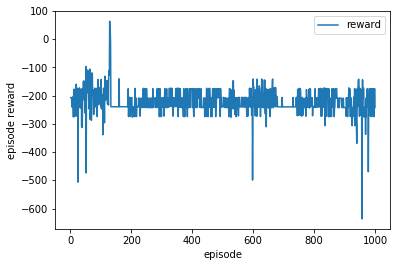

In [2]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results1['episode'], results1['cummulative'], label='reward')
plt.xlabel('episode')
plt.ylabel('episode reward')
plt.legend()

In [3]:
last_mean = np.mean(results1['cummulative'][-10:])
print("The mean over the last 10 episodes is: ",last_mean)
first_mean = np.mean(results1['cummulative'][:10])
print("The mean over the first 10 episodes is: ",first_mean)

The mean over the last 10 episodes is:  -214.90584042764914
The mean over the first 10 episodes is:  -219.4407258723274


## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: Task was just taking off.

The main problem was to make it learn not to just drop out of the sky. Took a lot of time to come up with the simple idea of give a reward of -100 whenever it crashes. This helped it to learn the task of lifting off. But it just keeps flying up without bounds and that causes huge negative rewards in the later episodes. I also tried putting a rewad of -3 for going above a certain height but as apparent in the second trial here, it didn't work as expected. Nevertheless, it did learn how to take off.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
I used the provided implementation of DDPG algorithm.

$\gamma$: 0.99, $\tau$: 0.05,

Actor:
    2 Hidden layers with 400 and 300 units. BatchNorm and ReLu was used
    
Critic:
    State Network: 2 hidden layer with 400 and 300 units. BatchNrorm and ReLU was used
    Action Network: 1 hidden layer with 300 units.
    

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
With the starting point at z=5, it kept dropping to the ground. Took a lot of episodes to learn that crashing is bad. But once it did learn that, It flew up and way beyond the actual target that caused the negative rewards in the latere episodes.
There were two major aha moments as evident from the graph. Average reward over last 10 episodes is -455.1

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
The reward and the exploratory hyperparameter seem to be the hardest part of the project. Took me a lot of time to get to a reward that helped it tke off. Otherwise it just kept crashing to the ground. Will need a lt more work to make it hover. Will probably have to train it in parts. First train it to take off, then train the same network to hover.